# Crime Classification #

## Table of Contents ##

[Business Goal](#business_goal)

[1) Crime Type](#crime_type)

* [Random Forest Model](#random_forest)
    * [Classification Report](#classification_report)
    * [Confusion Matrix](#confusion_matrix)
    * [Classification Report Results](#classification_report_results)
    * [Confusion Matrix Results](#confusion_matrix_results)
    * [Interpreting Results](#interpreting_results)
    
    
* [Tuned Random Forest Model](#tuned_random_forest)
    * [Classification Report](#classification_report2)
    * [Confusion Matrix](#confusion_matrix2)
    * [Classification Report Results](#classification_report_results2)
    * [Confusion Matrix Results](#confusion_matrix_results2)
    * [Interpreting Results](#interpreting_results2)
    
    
* [CatBoost Model](#catboost)
    * [Classification Report](#classification_report3)
    * [Confusion Matrix](#confusion_matrix3)
    * [Classification Report Results](#classification_report_results3)
    * [Confusion Matrix Results](#confusion_matrix_results3)
    * [Interpreting Results](#interpreting_results3)
    
    
* [Tuned CatBoost Model](#catboost2)
    * [Classification Report](#classification_report4)
    * [Confusion Matrix](#confusion_matrix4)
    * [Classification Report Results](#classification_report_results4)
    * [Confusion Matrix Results](#confusion_matrix_results4)
    * [Interpreting Results](#interpreting_results4)
 
 
[2) Crime Location](#crime_location)

* [CatBoost Model](#catboost3)
    * [Classification Report](#classification_report5)
    * [Confusion Matrix](#confusion_matrix5)
    * [Classification Report Results](#classification_report_results5)
    * [Confusion Matrix Results](#confusion_matrix_results5)
    * [Interpreting Results](#interpreting_results5)
    
    
* [Tuned CatBoost Model](#catboost4)
    * [Classification Report](#classification_report6)
    * [Confusion Matrix](#confusion_matrix6)
    * [Classification Report Results](#classification_report_results6)
    * [Confusion Matrix Results](#confusion_matrix_results6)
    * [Interpreting Results](#interpreting_results6)
    
    
[Additional Analysis](#additional_analysis)


[Final Results](#final_results)


[Conclusion](#conclusion)


[Recommendations](#recommendations)

<a id='business_goal'></a>

## Business Goal ##

We'll be working with the great city of Seattle. Using classification algorithms (Random Forest and CatBoost), we'll create two separate models to predict not only location of new crimes, but also type. Creating successful models will help to reduce crime and make Seattle a safer place. Once proven successful, the model can potentially be generalized to other parts of Washington, and even other states.

## Data ##

The data itself came from the city of Seattle's website. The crime dataset, which ranges from 2008-present is publicly available at https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5. The data contained well over 1 million rows of data, and 17 variables.

# Getting Started #

<a id='crime_type'></a>

We'll be creating two different models in this notebook: One for crime type, and one for crime location. We'll start off with crime type, and experiment with different classification algorithms to find out best model.

# 1) Crime Type #

**Importing our libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from IPython.display import IFrame
from IPython.display import Image
from IPython.core.display import HTML 
import time

### Opening Datafile ###

**In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.**

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df

Crime Against Category                                      Offense  \
0                            2  Theft of Motor Vehicle Parts or Accessories   
1                            2                                      Robbery   
2                            2     Destruction/Damage/Vandalism of Property   
3                            2                                  Shoplifting   
4                            2     Destruction/Damage/Vandalism of Property   
...                        ...                                          ...   
210254                       2  Theft of Motor Vehicle Parts or Accessories   
210255                       2                          Motor Vehicle Theft   
210256                       1                               Simple Assault   
210257                       1                               Simple Assault   
210258                       1                               Simple Assault   

        Sector  Beat  MCPP  Time  Day  Year  
0           11    22    50   661    0     0  
1           22    50    50  1753    6     0  
2           18    39    33   124    2     0  
3           14    29    16  2005    1     0  
4           11    22    44  1753    1     0  
...        ...   ...   ...   ...  ...   ...  
210254      13    28    29     0    2     2  
210255      19    42    34   508    3     2  
210256       9    15    51  1121    4     2  
210257       9    14    45   938    1     2  
210258       9    15    56  1378    0     2  

[210259 rows x 8 columns]

### Setting Up For Initial Model ###

**Let's start off by first identifying our target variable**

In [3]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

**Now we'll split our data using Train Test Split**

In [4]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

**We'll scale our data, to make it easier for the model to work with**

In [5]:
#Initializing StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

**Let's look at the value counts for our dependent variable, to see if there's an imbalance of data**

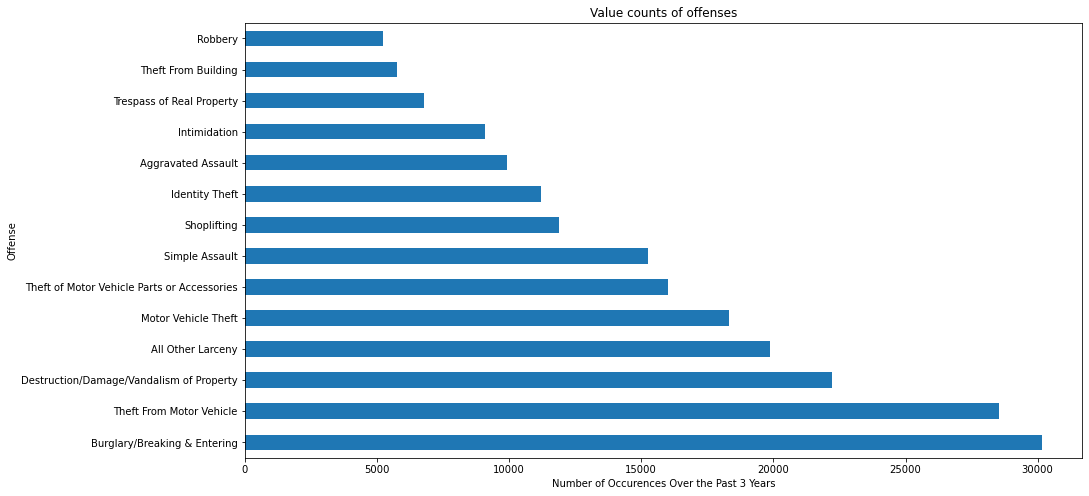

In [6]:
#Creating bar graph
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We can see that there's an imbalance of data, where there's a massive difference between the highest occuring crimes (Burglary/Breaking & Entering crimes) and others. This imbalance can cause all sorts of problems for our model performance, so let's use SMOTE to address that**

In [7]:
#Initializing SMOTE
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

**Now it's time to create our initial model.**

<a id='random_forest'></a>

# Random Forest Model #

**We'll start off by using a Random Forest model, since Random Forest is a great model to use for classification purposes due to reduced overfitting**

In [8]:
#Creating initial RF model
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

**After we run our initial model, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

<a id='classification_report'></a>

### Classification Report ###

**Printing our training results**

In [9]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

**Printing our testing results**

In [10]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

<a id='confusion_matrix'></a>

### Confusion Matrix ###

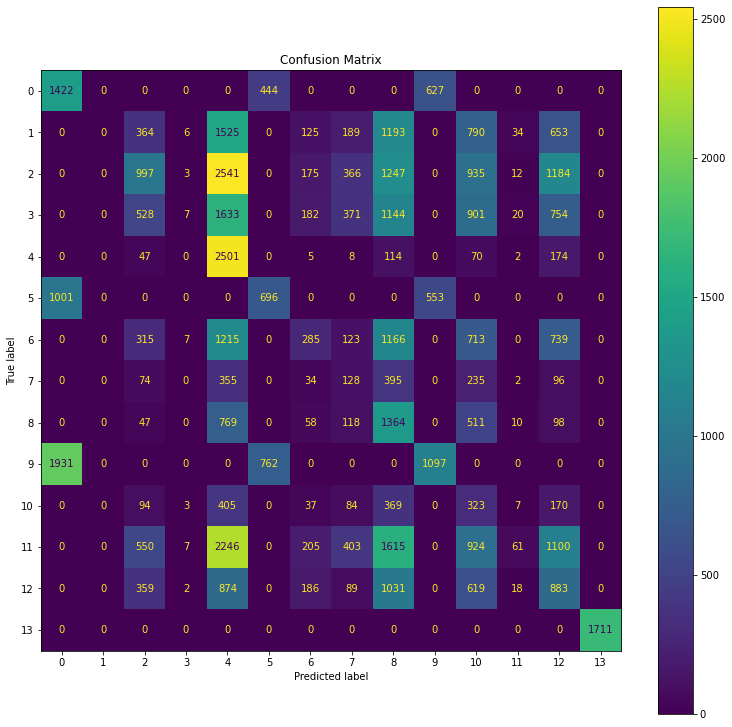

In [11]:
#Create Confusion matrix, but without the labels
cm = confusion_matrix(y_test, rf_test_pred);

#Labels not added for readability purposes
cmp = ConfusionMatrixDisplay(cm);

fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix results more readable, we represented the crime categories as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property


<a id='classification_report_results'></a>

### Classification Report Results ###

**Let's take a look at our test model classification report results for each crime:**

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .33, a recall score of .57, and an f1 score of .42. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 33% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 57% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .0, a recall score of .0, and an f1 score of .0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .30, a recall score of .13, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 30% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 13% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .20, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 20% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .18, a recall score of .86, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 18% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 86% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .37, a recall score of .31, and an f1 score of .34. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 37% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 31% of them.
* There is an f1 score of .34, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .06, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 6% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .07, a recall score of .10, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 7% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 10% of them.
* There is an f1 score of .08, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .14, a recall score of .46, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 14% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 46% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .48, a recall score of .29, and an f1 score of .36. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 48% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 29% of them.
* There is an f1 score of .36, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .05, a recall score of .22, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 5% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 22% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .37, a recall score of .01, and an f1 score of .02. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 37% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 1% of them.
* There is an f1 score of .02, indicating extremely poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .15, a recall score of .22, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 15% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 22% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results'></a>

### Confusion Matrix Results ###

**Let's take a look at our instances of true positives/negatives and false positives/negatives from our confusion matrix:**

**0) Aggravated Assault**

* 1422 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,071 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 2,932 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,851 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 997 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,463 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 2,378 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 43,091 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 7 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,533 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 28 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,525 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,501 crimes were correctly predicted as being "Identity Theft" crimes
* 420 crimes were wrongly predicted as not being "Identity Theft" crimes
* 11,563 crimes were wrongly predicted as being "Identity Theft" crimes
* 44,701 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 696 crimes were correctly predicted as being "Intimidation" crimes
* 1,554 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,206 crimes were wrongly predicted as being "Intimidation" crimes
* 50,554 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 285 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,278 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,007 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,056 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 128 crimes were correctly predicted as being "Robbery" crimes
* 1,191 crimes were wrongly predicted as not being "Robbery" crimes
* 1,751 crimes were wrongly predicted as being "Robbery" crimes
* 51,015 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,364 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,567 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,097 crimes were correctly predicted as being "Simple Assault" crimes
* 2,693 crimes were wrongly predicted as not being "Simple Assault" crimes
* 1,180 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,465 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 323 crimes were correctly predicted as being "Theft From Building" crimes
* 1,169 crimes were wrongly predicted as not being "Theft From Building" crimes
* 5,698 crimes were wrongly predicted as being "Theft From Building" crimes
* 50,519 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 61 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,050 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 105 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,383 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 883 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,178 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 4,968 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,679 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results'></a>

## Interpreting Results ##

In order to determine what types of crimes our model will best predict, we want to look at various aspects of our classification report and confusion matrix. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain type of crime committed, how many crimes did our model accurately classify/predict to be that type?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* There seems to be some overfitting occuring, as evident from the perfect precision, recall and F1 scores of Trespass of Real Property crimes as well as our training classification report results being better than our testing results.


* All our recall values seem to be low (below .57), except for our highest precision scores which belonged to Identity Theft crimes, with a recall value of .86, and Trespass of Real Property crimes (which had an improbable perfect 1.0 score). 


* Our precision scores were also low (below .37) except for our highest precision score which belonged to Simple Assault crimes, with a precision value of .48, and again Trespass of Real Property with a perfect 1.0 score.


* Our F1 scores were low as well. Our highest score was a .42, which belonged to the Aggravated Assault crimes category.

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,501) , then Trespass of Real Property crimes (1,711), then Aggravated Assault crimes(1,422). The least instances belonged to All Other Larceny crimes (0), Destruction/Damage/Vandalism of Property crimes (7), and Theft From Motor Vehicle crimes (61).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,050), then Burglary/Breaking & Entering crimes (6,463), then Destruction/Damage/Vandalism of Property crimes (5,533). The least instances belonged to Trespass of Real Property crimes  (0), Identity Theft (420), and Aggravated Assault crimes (1,071).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to both Trespass of Real Property and All Other Larceny crimes with 0 instances, followed by Destruction/Damage/Vandalism of Property crimes with 28 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (44,701), and Destruction/Damage/Vandalism of Property crimes (47,525).

**From our results we can see that our model is overfitting. Despite this, most of our crimes have low recall, precision and F1 scores. Our model seems to best predict new crimes as Trespass of Real Property crimes (based on recall values, true positive values and false negative/positive values). This however may be due to our model overfitting. Next, let's attempt to tune our random forest model to see if we can reduce overfitting, see a change in our classification report values, and perhaps see a clearer trend in predicting crimes.**

<a id='tuned_random_forest'></a>

# Tuned Random Forest Model #

Let's attempt to tune our random forest model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values. 

**Let's create our Grid-search with our various parameters**

In [12]:
rf2 = RandomForestClassifier()

#Grid-search params
param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

**Next, let's create our new model with the Grid-search best parameters**

In [13]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [14]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

**Again, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

<a id='classification_report2'></a>

### Classification Report ###

**Printing our training results**

In [15]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

**Printing our testing results**

In [16]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

<a id='confusion_matrix2'></a>

### Confusion Matrix ###

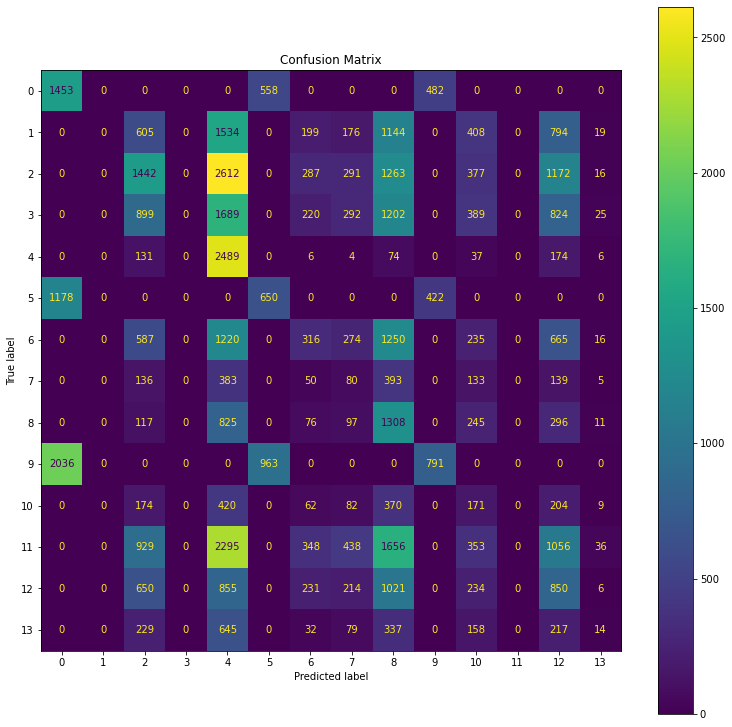

In [17]:
#Creating confusion matrix
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property

<a id='classification_report_results2'></a>

### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .31, a recall score of .58, and an f1 score of .41. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 31% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 58% of them.
* There is an f1 score of .41, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .24, a recall score of .19, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 24% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 19% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 0% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .17, a recall score of .85, and an f1 score of .28. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 17% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 85% of them.
* There is an f1 score of .28, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .30, a recall score of .29, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 30% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .17, a recall score of .07, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 17% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 7% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .04, a recall score of .06, and an f1 score of .05. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 4% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 6% of them.
* There is an f1 score of .05, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .13, a recall score of .44, and an f1 score of .20. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 13% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 44% of them.
* There is an f1 score of .20, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .21, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 21% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .06, a recall score of .11, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 6% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 11% of them.
* There is an f1 score of .08, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 0% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 0% of them.
* There is an f1 score of .0, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .13, a recall score of .21, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 13% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 21% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of .09, a recall score of .01, and an f1 score of 0.1. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 9% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 1% of them.
* There is an f1 score of 0.1, indicating poor performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results2'></a>

### Confusion Matrix Results ###

**0) Aggravated Assault**

* 1,453 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,040 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 3,214 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 46,858 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 1,442 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,018 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 4,457 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 41,253 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 0 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,540 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 0 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,924 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,489 crimes were correctly predicted as being "Identity Theft" crimes
* 432 crimes were wrongly predicted as not being "Identity Theft" crimes
* 12,478 crimes were wrongly predicted as being "Identity Theft" crimes
* 43,132 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 650 crimes were correctly predicted as being "Intimidation" crimes
* 1,600 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,521 crimes were wrongly predicted as being "Intimidation" crimes
* 50,530 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 316 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,247 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,511 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,010 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 80 crimes were correctly predicted as being "Robbery" crimes
* 1,239 crimes were wrongly predicted as not being "Robbery" crimes
* 1,947 crimes were wrongly predicted as being "Robbery" crimes
* 50,905 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,308 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 66,801 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 791 crimes were correctly predicted as being "Simple Assault" crimes
* 2,999 crimes were wrongly predicted as not being "Simple Assault" crimes
* 904 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,771 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 171 crimes were correctly predicted as being "Theft From Building" crimes
* 1,312 crimes were wrongly predicted as not being "Theft From Building" crimes
* 2,569 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,433 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 0 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 0 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,470 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 850 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,211 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 5,541 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,489 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 14 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 1,697 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 149 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,854 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results2'></a>

## Interpreting Results ##

After tuning our initial random forest model, we again want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We still seem to have some slight overfitting occuring, as evident in our training classification report results being better than our testing results. However, we have managed to reduce the amount of overfitting occuring, which is seen when we look at the reduced precision, recall and F1 scores of Trespass of Real Property crimes.


* While still low, our recall values have improved from our Random Forest model, except for our highest score which belonged to Identity Theft crimes, with a recall value of .85 (.01 decrease from our initial model). Some of our crime recall scores have decreased when compared to the initial model (sign of decrease in overfitting) like Theft From Building crimes (decrease of .11), Simple Assault crimes (decrease of .08), and Robbery crimes (decrease of .04). However, there were also increases. Burglary/Breaking & Entering crime recall value increased by .06, and Motor Vehicle Theft recall value increased by .01.


* Our precision scores also stayed low (below .31) except for our highest score which belonged to Simple Assault crimes, with a precision value of .47. There were also signs of decreased precision values when compared to the initial Random Forest model. Most noticeable were Intimidation crimes (decrease of .07) and Burglary/Breaking & Entering crimes (decrease of .06). 


* Lastly, we saw decreases in all of our F1 scores, except for Burglary/Breaking & Entering crimes, which saw a .04 increase when compared to our initial model. Our highest score was a .41, which belonged to the Aggravated Assault crimes category.

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,489) , then Aggravated Assault crimes (1,453), then Burglary/Breaking & Entering crimes (1,442). The least instances belonged to All Other Larceny crimes, Theft From Motor Vehicle crimes, and Destruction/Damage/Vandalism of Property crimes all with 0 instances of true positives.


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (6,018), then Destruction/Damage/Vandalism of Property crimes (5,540). The least instances belonged to Identity Theft crimes (432), Aggravated Assault crimes (1,040), and Robbery crimes (1,239).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to Theft From Motor Vehicle crimes, Destruction/Damage/Vandalism of Property crimes, and All Other Larceny crimes all with 0 instances. A close follow up is Trespass of Real Property crimes with 149 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (43,132), and Aggravated Assault crimes (46,858).

**From our results we can firstly see that we decreased overfitting in our model. Then, we saw some slight increases in our recall values, while seeing some decreases in our F1 values. Our precision scores stayed mostly the same. We also saw some slight changes in our confusion matrix instances (both increases and decreases), but nothing major. This time, our model seems to best predict new crimes as Identity Theft crimes (in regards to recall value, true positive values and false negative/positive values). Because we reduced overfitting, we'll consider the tuned Random Forest model our "best" model (out of the two Random Forest models), that we will compare our other models to. Next, we'll change the type of model we're using and see if we can get stronger results, where we have more than one type of best predicted crime. We'll switch over to using CatBoost.**

<a id='catboost'></a>

# CatBoost Model #

Next, we'll be using a CatBoost model. CatBoost is a gradient boosting Decision Tree model, that is mainly used when the data is comprised of categorical variables like ours. It has great default model results, with little tuning needed (we'll still tune our model to be thorough), is great for reducing overfitting, and can even be trained on the GPU (which we'll attempt for one of our models). More information can be found at https://catboost.ai/.

**Creating our Initial Model**

In [18]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    logging_level = "Silent"
)

In [19]:
#Implementing early stopping rounds to account for overfitting
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [20]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

<a id='classification_report3'></a>

### Classification Report ###

<a id='results_cell'></a>

**Printing our training results**

In [21]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

**Printing our testing results**

In [22]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

<a id='confusion_matrix3'></a>

### Confusion Matrix ###

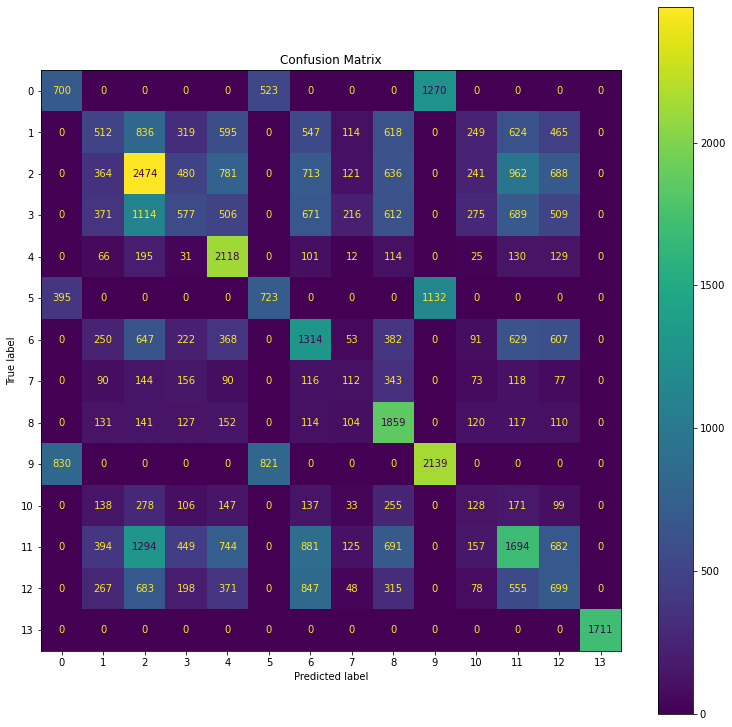

In [23]:
#Creating confusion matrix
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

<a id='classification_report_results3'></a>

### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results3'></a>

###  Confusion Matrix Results ###

Let's take a look at our test model confusion matrix results for each crime:

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results3'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our new initial model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We seem to have have some overfitting again, as evident when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, as well as our training classification report results being better than our testing results. This is slightly unexpected as we attempted to use CatBoost's resilience to overfitting and early stopping rounds to account for overfitting. We'll talk about implications later on in our final conclusion.


* Our recall values are still low, but have improved from our previous best Random Forest model recall values. Most notable is our Simple Assault crimes with an improvement of .35, Theft From Motor Vehicle crimes with an improvement of .24, and Motor Vehicle Theft crimes with an improvement of .22.  Our highest recall value belonged to Identity Theft crimes again with a .73 value, followed by Shoplifting crimes with a .62 value, then Simple Assault crimes with a .56 value.   


* Our precision scores while staying low (below .47) have increased when compared to our best Random Forest model. Most notable is our Destruction/Damage/Vandalism of Property crimes with an improvement of .22, All Other Larceny crimes with an improvement of .20, and Shoplifting crimes with an improvement of .19. Our highest precision scores belong to Simple Assault crimes with a score of .47, then both Aggravated Assault crimes and Identity Theft crimes with a score of .36.


* Lastly, we saw increases in most F1 scores when compared to our best Random Forest model, with the exception of Aggravated Assault crimes (decreasse of .09). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) belonged to Simple Assault crimes, with a score of .51, followed by Identity Theft crimes with a score of .48, then Shoplifting crimes with a score of .42.


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,474) , then Simple Assault crimes (2,139), then Identity Theft crimes (2,118). The least instances belonged to Robbery crimes (112), Theft From Building crimes (128), and All Other Larceny crimes (512).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (4,986), then Destruction/Damage/Vandalism of Property crimes (4,963). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (803), and Shoplifting crimes (1,116).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,332), then Motor Vehicle Theft crimes (4,127), then Theft From Motor Vehicle crimes(3,995). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (826), and Theft From Building crimes (1,309). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft From Building crimes (51,929), then Theft of Motor Vehicle Parts or Accessories crimes (51,863), then Robbery crimes (51,679). The least instances belonged to  Burglary/Breaking & Entering crimes (40,973), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (47,221).

**From our results we can see that our CatBoost model is overfitting. While still on the low side, we saw improvements in our precision, recall and F1 scores compared to our random forest best model. For our confusion matrix, we saw various shifts (compared to our best Random Forest model) in regards to which crimes had the most instances of false positives/negatives, etc. Our model seems to best predict new crimes as Simple Assault and shoplifting crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). Next, we'll use Grid-search in an attempt to tune our CatBoost model. We'll see if we can do anything about the overfitting, and see if our model predicts any other type of crimes.**

<a id='catboost2'></a>

# Tuned CatBoost  Model #

Let's attempt to tune our CatBoost model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values. Lastly, we'll train the model on the GPU to speed up training time.

**Let's create our Grid-search with our various parameters**

In [24]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000],
         }

In [25]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

**Next, let's create our new model with the Grid-search best parameters**

In [64]:
#Training on GPU
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000,
    logging_level = "Silent"
)

In [65]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [28]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

<a id='classification_report4'></a>

### Classification Report ###

**Printing our training results**

In [29]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

**Printing our testing results**

In [30]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

<a id='confusion_matrix4'></a>

### Confusion Matrix ###

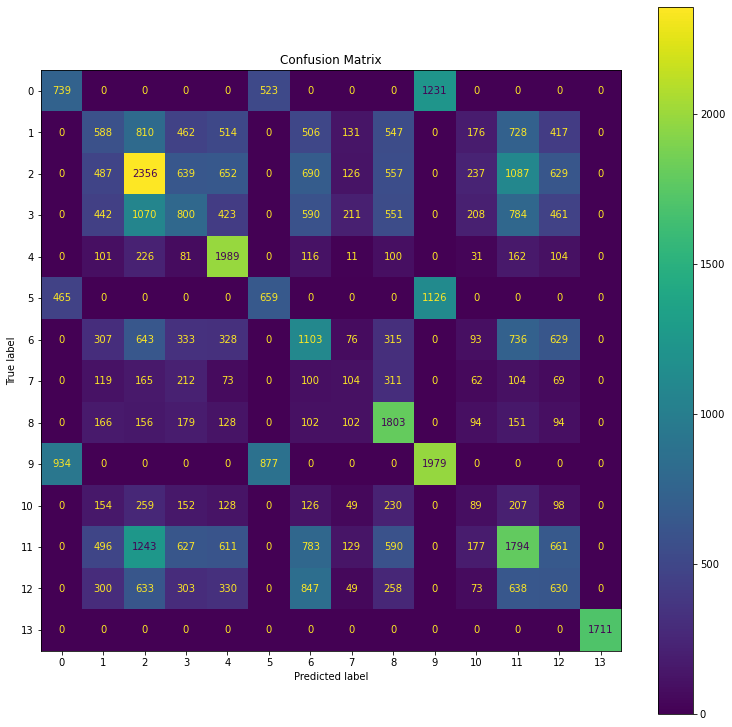

In [31]:
#Create confusion matrix
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

<a id='classification_report_results4'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results4'></a>

### Confusion Matrix Results ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results4'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Interestingly, we seem to still have some overfitting occuring, despite our grid search and early stopping rounds. We can see this when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, and again in our training classification report results being better than our testing results. We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are still low, but we did see even more improvement from our initial CatBoost model for some of our crimes like Destruction/Damage/Vandalism of Property (.04), Aggravated Assault (.02 improvement), All Other Larceny (.02 improvement). However, some crimes also saw a decrease in recall value like Identity Theft (.05 decrease), Motor Vehicle Theft (.05 decrease), and Simple Assault (.04 decrease). Our highest recall value belonged to Identity Theft crimes again with a .68 value, followed by Shoplifting crimes with a .61 value, then Simple Assault crimes with a .52 value.   


* Our precision scores stayed low (below .46), and many of our precision scores decreased when compared to our initial CatBoost model. Most notably were Initimdation crimes (.03 decrease), Motor Vehicle Theft (.02 decrease), and Theft From Building (.02 decrease). However, we did see some improvements in recall score with Identity Theft (.02 improvement), and Shoplifting (.02 improvement).  Our highest precision scores belong to Simple Assault crimes with a score of .46, then Identity Theft crimes with a score of .38, then Aggravated Assault crimes with a score of .35.


* Lastly, we saw a mixture of increases and decreases in our F1 scores when compared to our initial CatBoost model. We saw increases in our recall scores when it came to crimes like Destruction/Damage/Vandalism of Property (.03 improvement), Intimidation (.02 improvement), and Shoplifting (.02 improvement). We saw decreases in crimes like Motor Vehicle Theft (.03 decrease), Intimidation (.02 decrease), and Simple Assault (.02). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) was a tie between Simple Assault crimes and Identity Theft crimes with a score of .49, followed by Shoplifting crimes with a score of .44


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,356) , then Identity Theft crimes (1,989), then Simple Assault crimes (1,979). The least instances belonged to Theft From Building crimes (89), Robbery crimes (104) and All Other Larceny crimes (588).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (5,317), then Burglary/Breaking & Entering crimes (5,104), then Destruction/Damage/Vandalism of Property crimes (4,740 ). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (932), and Shoplifting crimes (1,172).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,205 ), then Theft From Motor Vehicle crimes (4,597), then Motor Vehicle Theft crimes (3,860). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (884), and Theft From Building crimes (1,151). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,932),then Theft From Building crimes (51,918), then  then Robbery crimes (51,586). The least instances belonged to  Burglary/Breaking & Entering crimes (42,440), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (46,650).

**From our results we can see that our tuned CatBoost model is overfitting, despite our precautions taken. Our precision, recall and F1 scores were still on the low side, and we didn't actually see that much improvement overall. Our tuned model seems to best predict new crimes as Simple Assault and Identity Theft crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). crime. Due to our initial model having better classification report values and higher instances of true positives, we'll say that the initial CatBoost model is the "best model" when compared to not only the tuned CatBoost model, but also the Random Forest models. Next, we'll move on to predicting location of a new crime, and this time will only use a Catboost algorithm.**

<a id='crime_location'></a>

# 2) Crime Location #

We'll also be looking at the location of crimes. Seattle has 5 precincts, or police station areas. They are: North, East, South, West and Southwest. Then, there are smaller geographical areas within the precincts called sectors. Finally, each sector is divided into 3 smaller sections called beats, which individual patrol officers are assigned responsibility for. We'll be looking at which beats crimes occur in, since beats are the smallest area we can look at. To give a better idea of what we're talking about, we provided an interactive Seattle map below. The user can zoom in on this map, which shows precincts, beats, and even neighborhoods (MCPP) in Seattle. Keep in mind, that while looking at the notebook on Github, the interactive map may not show up, and the user may have to actually go to the physical notebook. We'll also provide a visual map for beats later on in the notebook.

In [32]:
url = 'https://seattlecitygis.maps.arcgis.com/apps/instant/lookup/index.html?appid=cf1b0198a1b94db5a8152c9f93232fa5'

In [33]:
IFrame(url, width='100%', height=500)

**In our preprocessing notebook, we created another df specifically preproccessed to set up "beat" as the target variable. Let's open it:**

In [34]:
df_beat = pd.read_csv("seattle_crime_beat.csv")

**Displaying our df**

In [35]:
df_beat

Crime Against Category  Offense  Sector Beat  MCPP  Time  Day  Year
0                            2       44      22   U3    50  1753    6     0
1                            3       13       5   B2     4    77    2     0
2                            3       13      13   L2    43  1609    1     0
3                            2        9       8   E1     8  1715    1     0
4                            2       46      22   U2    58  1288    1     0
...                        ...      ...     ...  ...   ...   ...  ...   ...
104622                       2       33      24   W2     1   191    5     3
104623                       2       33      13   L2    43  1902    1     3
104624                       2       33       5   B1     4  1339    4     2
104625                       2       50      12   K3    11    39    3     2
104626                       1       21       7   D3    53   905    5     1

[104627 rows x 8 columns]

**Creating our target variable**

In [36]:
X_location = df_beat.drop("Beat", axis = 1)

#Target Variable
y_location = df_beat["Beat"]

**Performing our train-test split**

In [37]:
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, random_state = 1)

**Scaling our data**

In [38]:
SS = StandardScaler()
X_location_train = SS.fit_transform(X_location_train)
X_location_test = SS.transform(X_location_test)

**Let's check our df for any data imbalances**

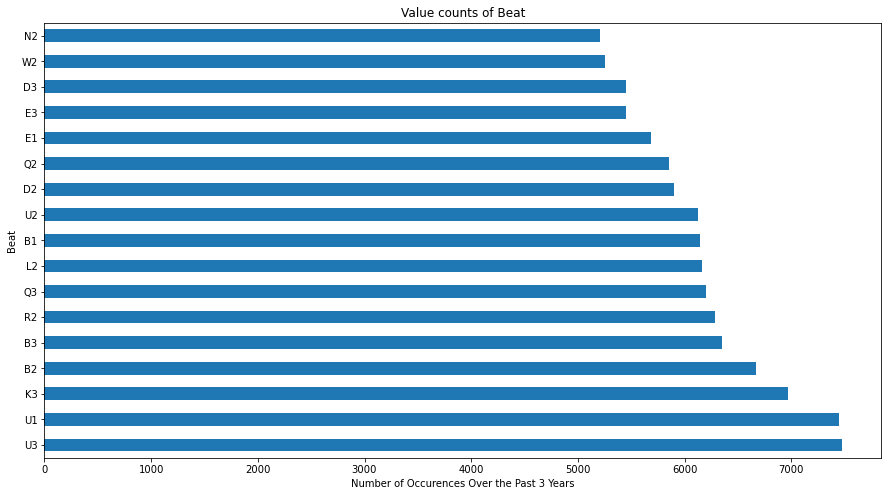

In [39]:
#Creating bar graph
ax = df_beat.value_counts('Beat').plot.barh(figsize = (15,8), title = "Value counts of Beat");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We see a slight imbalance, so we'll use SMOTE to address that**

In [40]:
sm = SMOTE(random_state = 1)
X_location_train, y_location_train = sm.fit_sample(X_location_train, y_location_train)

**Now that we've set up our data, let's start creating our initial model. We'll only be using a CatBoost model, (for both our initial model and tuned model) since it's best suited for categorical variable heavy data, and also to conserve runtime.**

<a id='catboost3'></a>

## CatBoost Model ##

We'll be using CatBoost again for our model. We'l start off with a basic default model, but implement early stopping rounds to see if we can reduce overfitting from the start.

**Creating initial model**

In [66]:
CBC_beat = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    logging_level = "Silent"
)

In [42]:
CBC_beat.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

CBC_location_train_pred = CBC_beat.predict(X_location_train)
CBC_location_test_pred = CBC_beat.predict(X_location_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099858
0:	learn: 1.9881132	total: 86.5ms	remaining: 1m 26s
1:	learn: 1.6777520	total: 160ms	remaining: 1m 19s
2:	learn: 1.4383907	total: 240ms	remaining: 1m 19s
3:	learn: 1.2760023	total: 315ms	remaining: 1m 18s
4:	learn: 1.1483839	total: 395ms	remaining: 1m 18s
5:	learn: 1.0530416	total: 488ms	remaining: 1m 20s
6:	learn: 0.9710884	total: 578ms	remaining: 1m 21s
7:	learn: 0.9016932	total: 654ms	remaining: 1m 21s
8:	learn: 0.8435067	total: 729ms	remaining: 1m 20s
9:	learn: 0.7906495	total: 806ms	remaining: 1m 19s
10:	learn: 0.7462587	total: 884ms	remaining: 1m 19s
11:	learn: 0.7074829	total: 961ms	remaining: 1m 19s
12:	learn: 0.6742394	total: 1.04s	remaining: 1m 18s
13:	learn: 0.6439842	total: 1.12s	remaining: 1m 18s
14:	learn: 0.6168474	total: 1.2s	remaining: 1m 18s
15:	learn: 0.5929939	total: 1.27s	remaining: 1m 18s
16:	learn: 0.5714097	total: 1.35s	remaining: 1m 17s
17:	learn: 0.5539011	total: 1.42s	remaining: 1m 17s
18:	learn: 0.5369705	total: 1.5s	remaining: 

159:	learn: 0.3338400	total: 12.2s	remaining: 1m 4s
160:	learn: 0.3337316	total: 12.3s	remaining: 1m 3s
161:	learn: 0.3336209	total: 12.4s	remaining: 1m 3s
162:	learn: 0.3335514	total: 12.4s	remaining: 1m 3s
163:	learn: 0.3334488	total: 12.5s	remaining: 1m 3s
164:	learn: 0.3333452	total: 12.6s	remaining: 1m 3s
165:	learn: 0.3331935	total: 12.7s	remaining: 1m 3s
166:	learn: 0.3330902	total: 12.7s	remaining: 1m 3s
167:	learn: 0.3329071	total: 12.8s	remaining: 1m 3s
168:	learn: 0.3327947	total: 12.9s	remaining: 1m 3s
169:	learn: 0.3327136	total: 13s	remaining: 1m 3s
170:	learn: 0.3326134	total: 13s	remaining: 1m 3s
171:	learn: 0.3325203	total: 13.1s	remaining: 1m 3s
172:	learn: 0.3324627	total: 13.2s	remaining: 1m 3s
173:	learn: 0.3323728	total: 13.3s	remaining: 1m 2s
174:	learn: 0.3322601	total: 13.3s	remaining: 1m 2s
175:	learn: 0.3321133	total: 13.4s	remaining: 1m 2s
176:	learn: 0.3320128	total: 13.5s	remaining: 1m 2s
177:	learn: 0.3319194	total: 13.6s	remaining: 1m 2s
178:	learn: 0.33

320:	learn: 0.3225361	total: 24.6s	remaining: 52.1s
321:	learn: 0.3224688	total: 24.7s	remaining: 52s
322:	learn: 0.3223617	total: 24.8s	remaining: 52s
323:	learn: 0.3223344	total: 24.9s	remaining: 51.9s
324:	learn: 0.3223058	total: 24.9s	remaining: 51.8s
325:	learn: 0.3222297	total: 25s	remaining: 51.7s
326:	learn: 0.3221997	total: 25.1s	remaining: 51.6s
327:	learn: 0.3221579	total: 25.2s	remaining: 51.6s
328:	learn: 0.3221359	total: 25.2s	remaining: 51.5s
329:	learn: 0.3221048	total: 25.3s	remaining: 51.4s
330:	learn: 0.3220539	total: 25.4s	remaining: 51.3s
331:	learn: 0.3219939	total: 25.5s	remaining: 51.2s
332:	learn: 0.3219505	total: 25.6s	remaining: 51.2s
333:	learn: 0.3219273	total: 25.6s	remaining: 51.1s
334:	learn: 0.3218750	total: 25.7s	remaining: 51s
335:	learn: 0.3218440	total: 25.8s	remaining: 50.9s
336:	learn: 0.3217783	total: 25.9s	remaining: 50.9s
337:	learn: 0.3217257	total: 25.9s	remaining: 50.8s
338:	learn: 0.3216776	total: 26s	remaining: 50.7s
339:	learn: 0.3216428	

479:	learn: 0.3159601	total: 36.7s	remaining: 39.8s
480:	learn: 0.3159231	total: 36.8s	remaining: 39.7s
481:	learn: 0.3158735	total: 36.9s	remaining: 39.6s
482:	learn: 0.3158303	total: 36.9s	remaining: 39.5s
483:	learn: 0.3157875	total: 37s	remaining: 39.5s
484:	learn: 0.3157359	total: 37.1s	remaining: 39.4s
485:	learn: 0.3156908	total: 37.2s	remaining: 39.3s
486:	learn: 0.3156478	total: 37.2s	remaining: 39.2s
487:	learn: 0.3156257	total: 37.3s	remaining: 39.1s
488:	learn: 0.3155990	total: 37.4s	remaining: 39.1s
489:	learn: 0.3155643	total: 37.5s	remaining: 39s
490:	learn: 0.3155183	total: 37.5s	remaining: 38.9s
491:	learn: 0.3154915	total: 37.6s	remaining: 38.8s
492:	learn: 0.3154528	total: 37.7s	remaining: 38.8s
493:	learn: 0.3154247	total: 37.8s	remaining: 38.7s
494:	learn: 0.3153997	total: 37.8s	remaining: 38.6s
495:	learn: 0.3153526	total: 37.9s	remaining: 38.5s
496:	learn: 0.3153109	total: 38s	remaining: 38.4s
497:	learn: 0.3152630	total: 38.1s	remaining: 38.4s
498:	learn: 0.3152

638:	learn: 0.3104914	total: 48.8s	remaining: 27.6s
639:	learn: 0.3104713	total: 48.9s	remaining: 27.5s
640:	learn: 0.3104430	total: 48.9s	remaining: 27.4s
641:	learn: 0.3104183	total: 49s	remaining: 27.3s
642:	learn: 0.3103953	total: 49.1s	remaining: 27.3s
643:	learn: 0.3103619	total: 49.2s	remaining: 27.2s
644:	learn: 0.3103399	total: 49.2s	remaining: 27.1s
645:	learn: 0.3103098	total: 49.3s	remaining: 27s
646:	learn: 0.3102889	total: 49.4s	remaining: 26.9s
647:	learn: 0.3102432	total: 49.5s	remaining: 26.9s
648:	learn: 0.3102160	total: 49.5s	remaining: 26.8s
649:	learn: 0.3101970	total: 49.6s	remaining: 26.7s
650:	learn: 0.3101693	total: 49.7s	remaining: 26.6s
651:	learn: 0.3101390	total: 49.8s	remaining: 26.6s
652:	learn: 0.3100878	total: 49.8s	remaining: 26.5s
653:	learn: 0.3100673	total: 49.9s	remaining: 26.4s
654:	learn: 0.3100578	total: 50s	remaining: 26.3s
655:	learn: 0.3100373	total: 50.1s	remaining: 26.3s
656:	learn: 0.3100066	total: 50.1s	remaining: 26.2s
657:	learn: 0.3099

798:	learn: 0.3060845	total: 1m	remaining: 15.3s
799:	learn: 0.3060797	total: 1m 1s	remaining: 15.3s
800:	learn: 0.3060591	total: 1m 1s	remaining: 15.2s
801:	learn: 0.3060316	total: 1m 1s	remaining: 15.1s
802:	learn: 0.3060051	total: 1m 1s	remaining: 15s
803:	learn: 0.3059913	total: 1m 1s	remaining: 15s
804:	learn: 0.3059724	total: 1m 1s	remaining: 14.9s
805:	learn: 0.3059624	total: 1m 1s	remaining: 14.8s
806:	learn: 0.3059491	total: 1m 1s	remaining: 14.7s
807:	learn: 0.3059188	total: 1m 1s	remaining: 14.7s
808:	learn: 0.3059053	total: 1m 1s	remaining: 14.6s
809:	learn: 0.3058773	total: 1m 1s	remaining: 14.5s
810:	learn: 0.3058592	total: 1m 1s	remaining: 14.4s
811:	learn: 0.3058230	total: 1m 1s	remaining: 14.3s
812:	learn: 0.3057947	total: 1m 2s	remaining: 14.3s
813:	learn: 0.3057455	total: 1m 2s	remaining: 14.2s
814:	learn: 0.3057148	total: 1m 2s	remaining: 14.1s
815:	learn: 0.3057006	total: 1m 2s	remaining: 14s
816:	learn: 0.3056752	total: 1m 2s	remaining: 14s
817:	learn: 0.3056547	t

957:	learn: 0.3023617	total: 1m 13s	remaining: 3.2s
958:	learn: 0.3023510	total: 1m 13s	remaining: 3.12s
959:	learn: 0.3023301	total: 1m 13s	remaining: 3.05s
960:	learn: 0.3023037	total: 1m 13s	remaining: 2.97s
961:	learn: 0.3022688	total: 1m 13s	remaining: 2.9s
962:	learn: 0.3022623	total: 1m 13s	remaining: 2.82s
963:	learn: 0.3022344	total: 1m 13s	remaining: 2.74s
964:	learn: 0.3021985	total: 1m 13s	remaining: 2.67s
965:	learn: 0.3021887	total: 1m 13s	remaining: 2.59s
966:	learn: 0.3021662	total: 1m 13s	remaining: 2.51s
967:	learn: 0.3021593	total: 1m 13s	remaining: 2.44s
968:	learn: 0.3021219	total: 1m 13s	remaining: 2.36s
969:	learn: 0.3020803	total: 1m 13s	remaining: 2.29s
970:	learn: 0.3020644	total: 1m 13s	remaining: 2.21s
971:	learn: 0.3020486	total: 1m 14s	remaining: 2.13s
972:	learn: 0.3020327	total: 1m 14s	remaining: 2.06s
973:	learn: 0.3020141	total: 1m 14s	remaining: 1.98s
974:	learn: 0.3019833	total: 1m 14s	remaining: 1.9s
975:	learn: 0.3019665	total: 1m 14s	remaining: 1.

### Beat Map ###

Below, a non-interactive Beat map is given to provide reference to where each beat in our classification report and confusion matrix is.

In [43]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

<a id='classification_report5'></a>

### Classification Report ###

<a id='results_cell2'></a>

**Printing our training results**

In [44]:
print(classification_report(y_location_train, CBC_location_train_pred))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.82      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.77      0.72      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

**Printing our testing results**

In [45]:
print(classification_report(y_location_test, CBC_location_test_pred))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.80      1523
          B2       0.68      0.58      0.63      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.70      0.66      1497
          Q3       0.66      0.57      0.61      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.48      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

<a id='confusion_matrix5'></a>

### Confusion Matrix ###

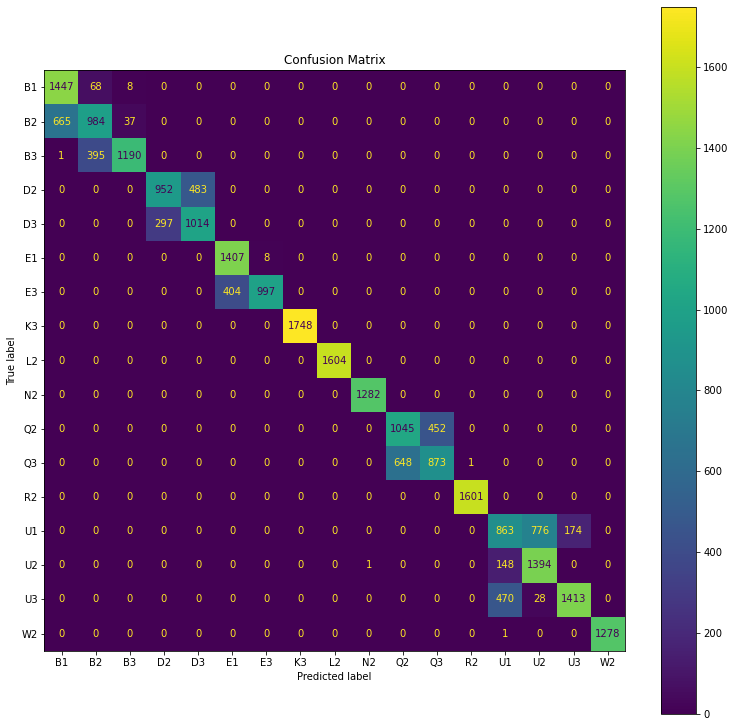

In [46]:
#Create confusion matrix
cm = confusion_matrix(y_location_test, CBC_location_test_pred);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

<a id='classification_report_results5'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .80. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .80, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .68, a recall score of .58, and an f1 score of .63. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 68% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .63, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .70, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 70% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .66, a recall score of .57, and an f1 score of .61. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 66% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 57% of them.
* There is an f1 score of .61, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .48, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 48% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

<a id='confusion_matrix_results5'></a>

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,447 crime locations were correctly predicted as being in the B1 beat.
* 76 crime locations were wrongly predicted as not being in the B1 beat.
* 665 crime locations were wrongly predicted as being in the B1 beat.
* 22,765 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 984 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 463 crime locations were wrongly predicted as being in the B2 beat.
* 24,733 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,190 crime locations were correctly predicted as being in the B3 beat.
* 396 crime locations were wrongly predicted as not being in the B3 beat.
* 45 crime locations were wrongly predicted as being in the B3 beat.
* 24,967 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 952 crime locations were correctly predicted as being in the D2 beat.
* 483 crime locations were wrongly predicted as not being in the D2 beat.
* 297 crime locations were wrongly predicted as being in the D2 beat.
* 24,425 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,014 crime locations were correctly predicted as being in the D3 beat.
* 297 crime locations were wrongly predicted as not being in the D3 beat.
* 483 crime locations were wrongly predicted as being in the D3 beat.
* 25,143 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,407 crime locations were correctly predicted as being in the E1 beat.
* 8 crime locations were wrongly predicted as not being in the E1 beat.
* 404 crime locations were wrongly predicted as being in the E1 beat.
* 24,388 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 997 crime locations were correctly predicted as being in the E3 beat.
* 404 crime locations were wrongly predicted as not being in the E3 beat.
* 8 crime locations were wrongly predicted as being in the E3 beat.
* 25,160 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 26,154 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,045 crime locations were correctly predicted as being in the Q2 beat.
* 452 crime locations were wrongly predicted as not being in the Q2 beat.
* 648 crime locations were wrongly predicted as being in the Q2 beat.
* 24,012 crime locations were correctly not predicted as being in the Q2 beat.

**Q3**

* 873 crime locations were correctly predicted as being in the Q3 beat.
* 649 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,283 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 863 crime locations were correctly predicted as being in the U1 beat.
* 950 crime locations were wrongly predicted as not being in the U1 beat.
* 619 crime locations were wrongly predicted as being in the U1 beat.
* 23,725 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,394 crime locations were correctly predicted as being in the U2 beat.
* 149 crime locations were wrongly predicted as not being in the U2 beat.
* 804 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,413 crime locations were correctly predicted as being in the U3 beat.
* 498 crime locations were wrongly predicted as not being in the U3 beat.
* 174 crime locations were wrongly predicted as being in the U3 beat.
* 22,743 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,278 crime locations were correctly predicted as being in the W2 beat.
* 1 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

<a id='interpreting_results5'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix in regards to the location a crime is committed. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain crime location, how many locations did our model accurately classify/predict to be that location?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2 and W2 beats. It is also evident in our training classification report results being better than our testing results.  We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the U1 beat  (863), the Q3 beat (873), and the D2 beat (952).


* For our instances of false negatives, the most instances belonged to the U1 beat (950) , then the B2 beat (702), then the Q3 beat (649). The least instances was a tie between the K3 beat, L2 beat, R2 beat, and N2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (804) , then the B1 beat (665), then the Q2 beat (648). The least instances was a tie between the W2 beat, L2 beat, and the K3 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the L2 beat (26,154) , then the Q3 beat (25,283), then the E3 beat (25,160). The least instances belonged to the B1 beat (22,765), then the U3 beat (22,743), and the W2 beat (23,335).


**From our results we can see that our CatBoost model is overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are much higher when compared to our crime type model. Our initial model seems to best predict new crime locations as being in the B3, E1, E3, and L2 beats (in regards to overall precision/recall values, and our true positive/negative values as well as false positive/negative values). Let's try using a Grid-search to see if we can somewhat reduce overfitting, and get classification report values that aren't overfitting.**

<a id='catboost4'></a>

## Tuned CatBoost Model ##

Let's attempt to tune our CatBoost model, via Grid-search. We'll use a Grid-search (along with early stopping rounds) to see if we can reduce the overfitting occuring, and to see if finding our optimal criteria will help modify our classification report values.

**Let's create our Grid-search with our various parameters**

In [47]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [48]:
CBC_gs2 = GridSearchCV(CBC_beat, params)
CBC_gs2.fit(X_location_train, y_location_train, early_stopping_rounds=5, plot = True)
CBC_gs2.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 30.9ms	remaining: 3.06s
1:	learn: 2.5906159	total: 58.6ms	remaining: 2.87s
2:	learn: 2.5130872	total: 85.9ms	remaining: 2.78s
3:	learn: 2.4173465	total: 115ms	remaining: 2.77s
4:	learn: 2.3259809	total: 146ms	remaining: 2.77s
5:	learn: 2.2790647	total: 171ms	remaining: 2.67s
6:	learn: 2.2135767	total: 198ms	remaining: 2.63s
7:	learn: 2.1495420	total: 227ms	remaining: 2.61s
8:	learn: 2.0849323	total: 255ms	remaining: 2.58s
9:	learn: 2.0294641	total: 282ms	remaining: 2.54s
10:	learn: 1.9751806	total: 312ms	remaining: 2.52s
11:	learn: 1.9177614	total: 340ms	remaining: 2.49s
12:	learn: 1.8572984	total: 368ms	remaining: 2.46s
13:	learn: 1.8174320	total: 395ms	remaining: 2.42s
14:	learn: 1.7753500	total: 425ms	remaining: 2.41s
15:	learn: 1.7439871	total: 451ms	remaining: 2.37s
16:	learn: 1.7100383	total: 478ms	remaining: 2.33s
17:	learn: 1.6754194	total: 506ms	remaining: 2.3s
18:	learn: 1.6392276	total: 532ms	remaining: 2.27s
19:	learn: 1.5975541	total: 561ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 29.9ms	remaining: 2.96s
1:	learn: 2.5902139	total: 55.2ms	remaining: 2.7s
2:	learn: 2.5126690	total: 80.7ms	remaining: 2.61s
3:	learn: 2.4169105	total: 108ms	remaining: 2.58s
4:	learn: 2.3254600	total: 135ms	remaining: 2.57s
5:	learn: 2.2785430	total: 160ms	remaining: 2.51s
6:	learn: 2.2130263	total: 187ms	remaining: 2.48s
7:	learn: 2.1488428	total: 215ms	remaining: 2.47s
8:	learn: 2.0841795	total: 244ms	remaining: 2.47s
9:	learn: 2.0287425	total: 272ms	remaining: 2.45s
10:	learn: 1.9744400	total: 301ms	remaining: 2.44s
11:	learn: 1.9169363	total: 330ms	remaining: 2.42s
12:	learn: 1.8565838	total: 359ms	remaining: 2.4s
13:	learn: 1.8167230	total: 386ms	remaining: 2.37s
14:	learn: 1.7745558	total: 416ms	remaining: 2.35s
15:	learn: 1.7431805	total: 442ms	remaining: 2.32s
16:	learn: 1.7091623	total: 470ms	remaining: 2.29s
17:	learn: 1.6746210	total: 499ms	remaining: 2.27s
18:	learn: 1.6384463	total: 528ms	remaining: 2.25s
19:	learn: 1.5967104	total: 558ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 31.1ms	remaining: 3.08s
1:	learn: 2.5932240	total: 59.4ms	remaining: 2.91s
2:	learn: 2.5156419	total: 83.5ms	remaining: 2.7s
3:	learn: 2.4195887	total: 110ms	remaining: 2.65s
4:	learn: 2.3279745	total: 137ms	remaining: 2.61s
5:	learn: 2.2810391	total: 161ms	remaining: 2.53s
6:	learn: 2.2143169	total: 188ms	remaining: 2.49s
7:	learn: 2.1502422	total: 216ms	remaining: 2.48s
8:	learn: 2.0864992	total: 245ms	remaining: 2.48s
9:	learn: 2.0311199	total: 273ms	remaining: 2.46s
10:	learn: 1.9758158	total: 303ms	remaining: 2.45s
11:	learn: 1.9183159	total: 333ms	remaining: 2.44s
12:	learn: 1.8578346	total: 361ms	remaining: 2.42s
13:	learn: 1.8179828	total: 388ms	remaining: 2.38s
14:	learn: 1.7805619	total: 416ms	remaining: 2.35s
15:	learn: 1.7438672	total: 444ms	remaining: 2.33s
16:	learn: 1.7006741	total: 475ms	remaining: 2.32s
17:	learn: 1.6615887	total: 502ms	remaining: 2.29s
18:	learn: 1.6285035	total: 530ms	remaining: 2.26s
19:	learn: 1.5858780	total: 559ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 29.6ms	remaining: 2.92s
1:	learn: 2.5837717	total: 58.2ms	remaining: 2.85s
2:	learn: 2.5083583	total: 84.1ms	remaining: 2.72s
3:	learn: 2.4073062	total: 112ms	remaining: 2.69s
4:	learn: 2.3337954	total: 141ms	remaining: 2.68s
5:	learn: 2.2630077	total: 169ms	remaining: 2.65s
6:	learn: 2.2084146	total: 196ms	remaining: 2.6s
7:	learn: 2.1472801	total: 224ms	remaining: 2.58s
8:	learn: 2.0829084	total: 252ms	remaining: 2.55s
9:	learn: 2.0140676	total: 282ms	remaining: 2.54s
10:	learn: 1.9593508	total: 310ms	remaining: 2.51s
11:	learn: 1.9016208	total: 339ms	remaining: 2.48s
12:	learn: 1.8561210	total: 364ms	remaining: 2.44s
13:	learn: 1.8174195	total: 391ms	remaining: 2.4s
14:	learn: 1.7659537	total: 420ms	remaining: 2.38s
15:	learn: 1.7340544	total: 447ms	remaining: 2.35s
16:	learn: 1.6999286	total: 474ms	remaining: 2.31s
17:	learn: 1.6663437	total: 502ms	remaining: 2.29s
18:	learn: 1.6307264	total: 528ms	remaining: 2.25s
19:	learn: 1.5972748	total: 556ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 28.5ms	remaining: 2.82s
1:	learn: 2.5800837	total: 59.6ms	remaining: 2.92s
2:	learn: 2.4779887	total: 89.6ms	remaining: 2.9s
3:	learn: 2.3847320	total: 116ms	remaining: 2.78s
4:	learn: 2.3000876	total: 145ms	remaining: 2.75s
5:	learn: 2.2367888	total: 171ms	remaining: 2.68s
6:	learn: 2.1871451	total: 197ms	remaining: 2.61s
7:	learn: 2.1128685	total: 225ms	remaining: 2.59s
8:	learn: 2.0700487	total: 253ms	remaining: 2.55s
9:	learn: 2.0204991	total: 279ms	remaining: 2.51s
10:	learn: 1.9697052	total: 308ms	remaining: 2.49s
11:	learn: 1.9224019	total: 336ms	remaining: 2.46s
12:	learn: 1.8763420	total: 364ms	remaining: 2.44s
13:	learn: 1.8301784	total: 390ms	remaining: 2.4s
14:	learn: 1.7807712	total: 420ms	remaining: 2.38s
15:	learn: 1.7344897	total: 448ms	remaining: 2.35s
16:	learn: 1.6994704	total: 475ms	remaining: 2.32s
17:	learn: 1.6580382	total: 503ms	remaining: 2.29s
18:	learn: 1.6226879	total: 529ms	remaining: 2.26s
19:	learn: 1.5926404	total: 554ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 29.9ms	remaining: 2.96s
1:	learn: 2.3807157	total: 57.8ms	remaining: 2.83s
2:	learn: 2.2552465	total: 85.3ms	remaining: 2.76s
3:	learn: 2.1072038	total: 115ms	remaining: 2.75s
4:	learn: 1.9641574	total: 143ms	remaining: 2.72s
5:	learn: 1.8795747	total: 169ms	remaining: 2.65s
6:	learn: 1.7966754	total: 194ms	remaining: 2.58s
7:	learn: 1.6960980	total: 223ms	remaining: 2.56s
8:	learn: 1.6104305	total: 252ms	remaining: 2.55s
9:	learn: 1.5564281	total: 281ms	remaining: 2.53s
10:	learn: 1.5048959	total: 307ms	remaining: 2.48s
11:	learn: 1.4489682	total: 333ms	remaining: 2.44s
12:	learn: 1.4069924	total: 360ms	remaining: 2.41s
13:	learn: 1.3513712	total: 387ms	remaining: 2.38s
14:	learn: 1.3094289	total: 414ms	remaining: 2.34s
15:	learn: 1.2654417	total: 440ms	remaining: 2.31s
16:	learn: 1.2194076	total: 468ms	remaining: 2.29s
17:	learn: 1.1766368	total: 498ms	remaining: 2.27s
18:	learn: 1.1412493	total: 523ms	remaining: 2.23s
19:	learn: 1.1108376	total: 549ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 30.1ms	remaining: 2.98s
1:	learn: 2.3800344	total: 56.3ms	remaining: 2.76s
2:	learn: 2.2545289	total: 82.7ms	remaining: 2.67s
3:	learn: 2.1067041	total: 109ms	remaining: 2.61s
4:	learn: 1.9629641	total: 137ms	remaining: 2.61s
5:	learn: 1.9054857	total: 163ms	remaining: 2.55s
6:	learn: 1.8189283	total: 189ms	remaining: 2.51s
7:	learn: 1.7324662	total: 216ms	remaining: 2.48s
8:	learn: 1.6539287	total: 245ms	remaining: 2.48s
9:	learn: 1.5770022	total: 275ms	remaining: 2.48s
10:	learn: 1.5173536	total: 302ms	remaining: 2.44s
11:	learn: 1.4661507	total: 327ms	remaining: 2.4s
12:	learn: 1.3995292	total: 356ms	remaining: 2.38s
13:	learn: 1.3456272	total: 383ms	remaining: 2.35s
14:	learn: 1.3096379	total: 409ms	remaining: 2.32s
15:	learn: 1.2730438	total: 434ms	remaining: 2.28s
16:	learn: 1.2410862	total: 462ms	remaining: 2.25s
17:	learn: 1.1932111	total: 492ms	remaining: 2.24s
18:	learn: 1.1512919	total: 521ms	remaining: 2.22s
19:	learn: 1.1204573	total: 547ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 28.7ms	remaining: 2.84s
1:	learn: 2.3850535	total: 56ms	remaining: 2.74s
2:	learn: 2.2593677	total: 81.3ms	remaining: 2.63s
3:	learn: 2.1117350	total: 107ms	remaining: 2.57s
4:	learn: 1.9676471	total: 135ms	remaining: 2.56s
5:	learn: 1.8732957	total: 163ms	remaining: 2.55s
6:	learn: 1.7905703	total: 188ms	remaining: 2.5s
7:	learn: 1.7044796	total: 214ms	remaining: 2.46s
8:	learn: 1.6272450	total: 243ms	remaining: 2.46s
9:	learn: 1.5740074	total: 270ms	remaining: 2.43s
10:	learn: 1.4955789	total: 299ms	remaining: 2.42s
11:	learn: 1.4449964	total: 324ms	remaining: 2.38s
12:	learn: 1.3839942	total: 352ms	remaining: 2.36s
13:	learn: 1.3316206	total: 380ms	remaining: 2.33s
14:	learn: 1.2991965	total: 406ms	remaining: 2.3s
15:	learn: 1.2568889	total: 434ms	remaining: 2.28s
16:	learn: 1.2196081	total: 461ms	remaining: 2.25s
17:	learn: 1.1988281	total: 486ms	remaining: 2.21s
18:	learn: 1.1658492	total: 512ms	remaining: 2.18s
19:	learn: 1.1378728	total: 539ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 30.4ms	remaining: 3.01s
1:	learn: 2.3683371	total: 58ms	remaining: 2.84s
2:	learn: 2.2453426	total: 83.7ms	remaining: 2.71s
3:	learn: 2.0987983	total: 111ms	remaining: 2.66s
4:	learn: 1.9850479	total: 138ms	remaining: 2.63s
5:	learn: 1.8860070	total: 165ms	remaining: 2.59s
6:	learn: 1.8034534	total: 191ms	remaining: 2.53s
7:	learn: 1.6990033	total: 219ms	remaining: 2.51s
8:	learn: 1.6233806	total: 248ms	remaining: 2.5s
9:	learn: 1.5484329	total: 276ms	remaining: 2.48s
10:	learn: 1.4954931	total: 305ms	remaining: 2.47s
11:	learn: 1.4367461	total: 332ms	remaining: 2.43s
12:	learn: 1.3951507	total: 357ms	remaining: 2.39s
13:	learn: 1.3332138	total: 386ms	remaining: 2.37s
14:	learn: 1.2959039	total: 413ms	remaining: 2.34s
15:	learn: 1.2530884	total: 441ms	remaining: 2.31s
16:	learn: 1.2183890	total: 467ms	remaining: 2.28s
17:	learn: 1.1862022	total: 495ms	remaining: 2.25s
18:	learn: 1.1482156	total: 523ms	remaining: 2.23s
19:	learn: 1.1166552	total: 549ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 29.6ms	remaining: 2.92s
1:	learn: 2.3682814	total: 56.4ms	remaining: 2.76s
2:	learn: 2.1922835	total: 85.6ms	remaining: 2.77s
3:	learn: 2.0617054	total: 115ms	remaining: 2.76s
4:	learn: 1.9312686	total: 142ms	remaining: 2.69s
5:	learn: 1.8291704	total: 170ms	remaining: 2.66s
6:	learn: 1.7545083	total: 196ms	remaining: 2.6s
7:	learn: 1.6709544	total: 223ms	remaining: 2.56s
8:	learn: 1.5844802	total: 253ms	remaining: 2.56s
9:	learn: 1.5319453	total: 281ms	remaining: 2.53s
10:	learn: 1.4715535	total: 309ms	remaining: 2.5s
11:	learn: 1.4063897	total: 337ms	remaining: 2.47s
12:	learn: 1.3642054	total: 363ms	remaining: 2.43s
13:	learn: 1.3131660	total: 391ms	remaining: 2.4s
14:	learn: 1.2776651	total: 417ms	remaining: 2.37s
15:	learn: 1.2423570	total: 445ms	remaining: 2.33s
16:	learn: 1.2099223	total: 473ms	remaining: 2.31s
17:	learn: 1.1786068	total: 501ms	remaining: 2.28s
18:	learn: 1.1459601	total: 527ms	remaining: 2.25s
19:	learn: 1.1030814	total: 556ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 29.6ms	remaining: 2.93s
1:	learn: 1.4301812	total: 57.4ms	remaining: 2.81s
2:	learn: 1.0467084	total: 87ms	remaining: 2.81s
3:	learn: 0.9406649	total: 112ms	remaining: 2.68s
4:	learn: 0.7909223	total: 140ms	remaining: 2.66s
5:	learn: 0.7002604	total: 167ms	remaining: 2.62s
6:	learn: 0.6471843	total: 194ms	remaining: 2.58s
7:	learn: 0.6034609	total: 221ms	remaining: 2.54s
8:	learn: 0.5754884	total: 249ms	remaining: 2.52s
9:	learn: 0.5441123	total: 276ms	remaining: 2.48s
10:	learn: 0.5107873	total: 303ms	remaining: 2.45s
11:	learn: 0.4834440	total: 333ms	remaining: 2.44s
12:	learn: 0.4736651	total: 361ms	remaining: 2.41s
13:	learn: 0.4574935	total: 389ms	remaining: 2.39s
14:	learn: 0.4474316	total: 417ms	remaining: 2.36s
15:	learn: 0.4348380	total: 445ms	remaining: 2.33s
16:	learn: 0.4238642	total: 475ms	remaining: 2.32s
17:	learn: 0.4191386	total: 502ms	remaining: 2.29s
18:	learn: 0.4162096	total: 531ms	remaining: 2.26s
19:	learn: 0.4071281	total: 559ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 29.7ms	remaining: 2.94s
1:	learn: 1.4290926	total: 55.6ms	remaining: 2.72s
2:	learn: 1.0458797	total: 85.7ms	remaining: 2.77s
3:	learn: 0.9395340	total: 111ms	remaining: 2.65s
4:	learn: 0.7898751	total: 139ms	remaining: 2.64s
5:	learn: 0.6991819	total: 167ms	remaining: 2.61s
6:	learn: 0.6461692	total: 193ms	remaining: 2.56s
7:	learn: 0.6017023	total: 222ms	remaining: 2.56s
8:	learn: 0.5737649	total: 249ms	remaining: 2.52s
9:	learn: 0.5422950	total: 276ms	remaining: 2.49s
10:	learn: 0.5089826	total: 305ms	remaining: 2.47s
11:	learn: 0.4817059	total: 333ms	remaining: 2.44s
12:	learn: 0.4717779	total: 359ms	remaining: 2.4s
13:	learn: 0.4556016	total: 385ms	remaining: 2.37s
14:	learn: 0.4437837	total: 412ms	remaining: 2.34s
15:	learn: 0.4340204	total: 441ms	remaining: 2.32s
16:	learn: 0.4289808	total: 469ms	remaining: 2.29s
17:	learn: 0.4180846	total: 496ms	remaining: 2.26s
18:	learn: 0.4134217	total: 525ms	remaining: 2.24s
19:	learn: 0.4055696	total: 552ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 29ms	remaining: 2.87s
1:	learn: 1.4363072	total: 55.7ms	remaining: 2.73s
2:	learn: 1.0287545	total: 85.2ms	remaining: 2.75s
3:	learn: 0.9248492	total: 111ms	remaining: 2.65s
4:	learn: 0.8003265	total: 138ms	remaining: 2.62s
5:	learn: 0.7578750	total: 163ms	remaining: 2.55s
6:	learn: 0.7055054	total: 188ms	remaining: 2.5s
7:	learn: 0.6457196	total: 217ms	remaining: 2.5s
8:	learn: 0.6045592	total: 247ms	remaining: 2.5s
9:	learn: 0.5734378	total: 277ms	remaining: 2.49s
10:	learn: 0.5303082	total: 304ms	remaining: 2.46s
11:	learn: 0.5178802	total: 331ms	remaining: 2.43s
12:	learn: 0.4982532	total: 358ms	remaining: 2.4s
13:	learn: 0.4807003	total: 383ms	remaining: 2.35s
14:	learn: 0.4621644	total: 410ms	remaining: 2.32s
15:	learn: 0.4547124	total: 438ms	remaining: 2.3s
16:	learn: 0.4443984	total: 465ms	remaining: 2.27s
17:	learn: 0.4311602	total: 496ms	remaining: 2.26s
18:	learn: 0.4254125	total: 522ms	remaining: 2.23s
19:	learn: 0.4203439	total: 548ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 28.8ms	remaining: 2.85s
1:	learn: 1.4298010	total: 54.3ms	remaining: 2.66s
2:	learn: 1.0467951	total: 83ms	remaining: 2.68s
3:	learn: 0.9406932	total: 108ms	remaining: 2.6s
4:	learn: 0.7908814	total: 137ms	remaining: 2.61s
5:	learn: 0.7000471	total: 165ms	remaining: 2.58s
6:	learn: 0.6471470	total: 190ms	remaining: 2.53s
7:	learn: 0.6031658	total: 217ms	remaining: 2.49s
8:	learn: 0.5750341	total: 244ms	remaining: 2.46s
9:	learn: 0.5437474	total: 271ms	remaining: 2.44s
10:	learn: 0.5103030	total: 298ms	remaining: 2.41s
11:	learn: 0.4829672	total: 327ms	remaining: 2.4s
12:	learn: 0.4730772	total: 354ms	remaining: 2.37s
13:	learn: 0.4568301	total: 380ms	remaining: 2.34s
14:	learn: 0.4450195	total: 407ms	remaining: 2.31s
15:	learn: 0.4347400	total: 435ms	remaining: 2.29s
16:	learn: 0.4296913	total: 463ms	remaining: 2.26s
17:	learn: 0.4188818	total: 495ms	remaining: 2.26s
18:	learn: 0.4114167	total: 526ms	remaining: 2.24s
19:	learn: 0.4040460	total: 554ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 29.6ms	remaining: 2.93s
1:	learn: 1.4976193	total: 56.3ms	remaining: 2.76s
2:	learn: 1.0482666	total: 86.6ms	remaining: 2.8s
3:	learn: 0.8882778	total: 112ms	remaining: 2.69s
4:	learn: 0.7683804	total: 140ms	remaining: 2.66s
5:	learn: 0.6920545	total: 168ms	remaining: 2.64s
6:	learn: 0.6565973	total: 194ms	remaining: 2.58s
7:	learn: 0.6041078	total: 224ms	remaining: 2.57s
8:	learn: 0.5743155	total: 252ms	remaining: 2.55s
9:	learn: 0.5327182	total: 280ms	remaining: 2.52s
10:	learn: 0.5034296	total: 310ms	remaining: 2.51s
11:	learn: 0.4899120	total: 336ms	remaining: 2.46s
12:	learn: 0.4698313	total: 363ms	remaining: 2.43s
13:	learn: 0.4567888	total: 391ms	remaining: 2.4s
14:	learn: 0.4454642	total: 422ms	remaining: 2.39s
15:	learn: 0.4286323	total: 451ms	remaining: 2.37s
16:	learn: 0.4199402	total: 480ms	remaining: 2.34s
17:	learn: 0.4115512	total: 509ms	remaining: 2.32s
18:	learn: 0.4070831	total: 537ms	remaining: 2.29s
19:	learn: 0.3997809	total: 563ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 30.2ms	remaining: 15.1s
1:	learn: 2.5906159	total: 59.1ms	remaining: 14.7s
2:	learn: 2.5130872	total: 86.8ms	remaining: 14.4s
3:	learn: 2.4173465	total: 115ms	remaining: 14.2s
4:	learn: 2.3259809	total: 143ms	remaining: 14.1s
5:	learn: 2.2790647	total: 168ms	remaining: 13.8s
6:	learn: 2.2135767	total: 195ms	remaining: 13.8s
7:	learn: 2.1495420	total: 224ms	remaining: 13.8s
8:	learn: 2.0849323	total: 253ms	remaining: 13.8s
9:	learn: 2.0294641	total: 280ms	remaining: 13.7s
10:	learn: 1.9751806	total: 308ms	remaining: 13.7s
11:	learn: 1.9177614	total: 337ms	remaining: 13.7s
12:	learn: 1.8572984	total: 366ms	remaining: 13.7s
13:	learn: 1.8174320	total: 393ms	remaining: 13.6s
14:	learn: 1.7753500	total: 421ms	remaining: 13.6s
15:	learn: 1.7439871	total: 449ms	remaining: 13.6s
16:	learn: 1.7100383	total: 477ms	remaining: 13.6s
17:	learn: 1.6754194	total: 506ms	remaining: 13.6s
18:	learn: 1.6392276	total: 533ms	remaining: 13.5s
19:	learn: 1.5975541	total: 562ms	rema

167:	learn: 0.4771023	total: 4.72s	remaining: 9.33s
168:	learn: 0.4760229	total: 4.75s	remaining: 9.3s
169:	learn: 0.4752299	total: 4.78s	remaining: 9.27s
170:	learn: 0.4737223	total: 4.8s	remaining: 9.24s
171:	learn: 0.4729700	total: 4.83s	remaining: 9.21s
172:	learn: 0.4713814	total: 4.86s	remaining: 9.19s
173:	learn: 0.4693920	total: 4.89s	remaining: 9.16s
174:	learn: 0.4684744	total: 4.92s	remaining: 9.13s
175:	learn: 0.4675113	total: 4.94s	remaining: 9.1s
176:	learn: 0.4665096	total: 4.97s	remaining: 9.07s
177:	learn: 0.4658616	total: 5s	remaining: 9.04s
178:	learn: 0.4640964	total: 5.03s	remaining: 9.02s
179:	learn: 0.4627344	total: 5.06s	remaining: 8.99s
180:	learn: 0.4614493	total: 5.08s	remaining: 8.96s
181:	learn: 0.4597310	total: 5.11s	remaining: 8.93s
182:	learn: 0.4580447	total: 5.14s	remaining: 8.91s
183:	learn: 0.4563458	total: 5.17s	remaining: 8.88s
184:	learn: 0.4554654	total: 5.2s	remaining: 8.85s
185:	learn: 0.4540664	total: 5.23s	remaining: 8.82s
186:	learn: 0.45274

326:	learn: 0.3809929	total: 9.18s	remaining: 4.85s
327:	learn: 0.3807441	total: 9.2s	remaining: 4.83s
328:	learn: 0.3805035	total: 9.23s	remaining: 4.8s
329:	learn: 0.3802808	total: 9.26s	remaining: 4.77s
330:	learn: 0.3800218	total: 9.29s	remaining: 4.74s
331:	learn: 0.3796821	total: 9.32s	remaining: 4.71s
332:	learn: 0.3794795	total: 9.35s	remaining: 4.69s
333:	learn: 0.3790156	total: 9.38s	remaining: 4.66s
334:	learn: 0.3788291	total: 9.4s	remaining: 4.63s
335:	learn: 0.3783826	total: 9.43s	remaining: 4.6s
336:	learn: 0.3782339	total: 9.46s	remaining: 4.58s
337:	learn: 0.3780615	total: 9.49s	remaining: 4.55s
338:	learn: 0.3779511	total: 9.51s	remaining: 4.52s
339:	learn: 0.3778410	total: 9.54s	remaining: 4.49s
340:	learn: 0.3775787	total: 9.57s	remaining: 4.46s
341:	learn: 0.3773786	total: 9.6s	remaining: 4.43s
342:	learn: 0.3768812	total: 9.63s	remaining: 4.41s
343:	learn: 0.3765670	total: 9.66s	remaining: 4.38s
344:	learn: 0.3764127	total: 9.69s	remaining: 4.35s
345:	learn: 0.376

485:	learn: 0.3588465	total: 13.6s	remaining: 393ms
486:	learn: 0.3588072	total: 13.7s	remaining: 365ms
487:	learn: 0.3587684	total: 13.7s	remaining: 337ms
488:	learn: 0.3586194	total: 13.7s	remaining: 309ms
489:	learn: 0.3585580	total: 13.8s	remaining: 281ms
490:	learn: 0.3585078	total: 13.8s	remaining: 253ms
491:	learn: 0.3584488	total: 13.8s	remaining: 225ms
492:	learn: 0.3583550	total: 13.8s	remaining: 197ms
493:	learn: 0.3583165	total: 13.9s	remaining: 168ms
494:	learn: 0.3582729	total: 13.9s	remaining: 140ms
495:	learn: 0.3581881	total: 13.9s	remaining: 112ms
496:	learn: 0.3581620	total: 14s	remaining: 84.2ms
497:	learn: 0.3581224	total: 14s	remaining: 56.2ms
498:	learn: 0.3580774	total: 14s	remaining: 28.1ms
499:	learn: 0.3580360	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 28.6ms	remaining: 14.3s
1:	learn: 2.5902139	total: 57.5ms	remaining: 14.3s
2:	learn: 2.5126690	total: 83.7ms	remaining: 13.9s
3:	learn: 2.4169105	total: 112ms	remaining: 13.8s
4:	learn: 2.3254600	total: 139ms	remaining: 13.8s
5:	learn: 2.2785430	total: 164ms	remaining: 13.5s
6:	learn: 2.2130263	total: 193ms	remaining: 13.6s
7:	learn: 2.1488428	total: 222ms	remaining: 13.7s
8:	learn: 2.0841795	total: 251ms	remaining: 13.7s
9:	learn: 2.0287425	total: 278ms	remaining: 13.6s
10:	learn: 1.9744400	total: 306ms	remaining: 13.6s
11:	learn: 1.9169363	total: 336ms	remaining: 13.6s
12:	learn: 1.8565838	total: 365ms	remaining: 13.7s
13:	learn: 1.8167230	total: 391ms	remaining: 13.6s
14:	learn: 1.7745558	total: 421ms	remaining: 13.6s
15:	learn: 1.7431805	total: 449ms	remaining: 13.6s
16:	learn: 1.7091623	total: 477ms	remaining: 13.6s
17:	learn: 1.6746210	total: 504ms	remaining: 13.5s
18:	learn: 1.6384463	total: 532ms	remaining: 13.5s
19:	learn: 1.5967104	total: 561ms	rema

162:	learn: 0.4860413	total: 4.56s	remaining: 9.42s
163:	learn: 0.4839276	total: 4.58s	remaining: 9.39s
164:	learn: 0.4819281	total: 4.61s	remaining: 9.37s
165:	learn: 0.4810920	total: 4.64s	remaining: 9.34s
166:	learn: 0.4793295	total: 4.67s	remaining: 9.31s
167:	learn: 0.4775998	total: 4.7s	remaining: 9.29s
168:	learn: 0.4768230	total: 4.73s	remaining: 9.26s
169:	learn: 0.4747037	total: 4.75s	remaining: 9.23s
170:	learn: 0.4728396	total: 4.78s	remaining: 9.2s
171:	learn: 0.4717832	total: 4.81s	remaining: 9.18s
172:	learn: 0.4708122	total: 4.84s	remaining: 9.16s
173:	learn: 0.4688468	total: 4.87s	remaining: 9.13s
174:	learn: 0.4672538	total: 4.9s	remaining: 9.1s
175:	learn: 0.4662395	total: 4.93s	remaining: 9.07s
176:	learn: 0.4648451	total: 4.95s	remaining: 9.04s
177:	learn: 0.4641565	total: 4.98s	remaining: 9.01s
178:	learn: 0.4626005	total: 5.01s	remaining: 8.99s
179:	learn: 0.4612369	total: 5.04s	remaining: 8.96s
180:	learn: 0.4605973	total: 5.07s	remaining: 8.93s
181:	learn: 0.46

323:	learn: 0.3812002	total: 9.06s	remaining: 4.92s
324:	learn: 0.3809154	total: 9.09s	remaining: 4.89s
325:	learn: 0.3806877	total: 9.12s	remaining: 4.87s
326:	learn: 0.3805265	total: 9.14s	remaining: 4.84s
327:	learn: 0.3803094	total: 9.17s	remaining: 4.81s
328:	learn: 0.3801020	total: 9.2s	remaining: 4.78s
329:	learn: 0.3798958	total: 9.22s	remaining: 4.75s
330:	learn: 0.3796904	total: 9.25s	remaining: 4.72s
331:	learn: 0.3794017	total: 9.28s	remaining: 4.7s
332:	learn: 0.3789975	total: 9.31s	remaining: 4.67s
333:	learn: 0.3787132	total: 9.33s	remaining: 4.64s
334:	learn: 0.3785787	total: 9.36s	remaining: 4.61s
335:	learn: 0.3784540	total: 9.38s	remaining: 4.58s
336:	learn: 0.3783397	total: 9.41s	remaining: 4.55s
337:	learn: 0.3782171	total: 9.44s	remaining: 4.52s
338:	learn: 0.3776946	total: 9.46s	remaining: 4.49s
339:	learn: 0.3772418	total: 9.49s	remaining: 4.47s
340:	learn: 0.3769387	total: 9.52s	remaining: 4.44s
341:	learn: 0.3768167	total: 9.54s	remaining: 4.41s
342:	learn: 0.

485:	learn: 0.3584565	total: 13.5s	remaining: 389ms
486:	learn: 0.3584215	total: 13.5s	remaining: 361ms
487:	learn: 0.3583882	total: 13.5s	remaining: 333ms
488:	learn: 0.3583386	total: 13.6s	remaining: 305ms
489:	learn: 0.3581919	total: 13.6s	remaining: 278ms
490:	learn: 0.3581493	total: 13.6s	remaining: 250ms
491:	learn: 0.3580599	total: 13.7s	remaining: 222ms
492:	learn: 0.3579123	total: 13.7s	remaining: 194ms
493:	learn: 0.3578622	total: 13.7s	remaining: 167ms
494:	learn: 0.3578380	total: 13.7s	remaining: 139ms
495:	learn: 0.3577920	total: 13.8s	remaining: 111ms
496:	learn: 0.3577559	total: 13.8s	remaining: 83.3ms
497:	learn: 0.3574719	total: 13.8s	remaining: 55.5ms
498:	learn: 0.3574406	total: 13.9s	remaining: 27.8ms
499:	learn: 0.3573915	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 30ms	remaining: 15s
1:	learn: 2.5932240	total: 59.8ms	remaining: 14.9s
2:	learn: 2.5156419	total: 86ms	remaining: 14.3s
3:	learn: 2.4195887	total: 114ms	remaining: 14.1s
4:	learn: 2.3279745	total: 142ms	remaining: 14.1s
5:	learn: 2.2810391	total: 167ms	remaining: 13.8s
6:	learn: 2.2143169	total: 194ms	remaining: 13.7s
7:	learn: 2.1502422	total: 223ms	remaining: 13.7s
8:	learn: 2.0864992	total: 252ms	remaining: 13.8s
9:	learn: 2.0311199	total: 281ms	remaining: 13.8s
10:	learn: 1.9758158	total: 309ms	remaining: 13.7s
11:	learn: 1.9183159	total: 338ms	remaining: 13.8s
12:	learn: 1.8578346	total: 365ms	remaining: 13.7s
13:	learn: 1.8179828	total: 391ms	remaining: 13.6s
14:	learn: 1.7805619	total: 418ms	remaining: 13.5s
15:	learn: 1.7438672	total: 446ms	remaining: 13.5s
16:	learn: 1.7006741	total: 476ms	remaining: 13.5s
17:	learn: 1.6615887	total: 506ms	remaining: 13.5s
18:	learn: 1.6285035	total: 534ms	remaining: 13.5s
19:	learn: 1.5858780	total: 565ms	remaining:

167:	learn: 0.4784913	total: 4.74s	remaining: 9.37s
168:	learn: 0.4767586	total: 4.77s	remaining: 9.34s
169:	learn: 0.4746528	total: 4.8s	remaining: 9.32s
170:	learn: 0.4726923	total: 4.83s	remaining: 9.29s
171:	learn: 0.4716927	total: 4.85s	remaining: 9.26s
172:	learn: 0.4700127	total: 4.88s	remaining: 9.23s
173:	learn: 0.4684540	total: 4.91s	remaining: 9.2s
174:	learn: 0.4675219	total: 4.94s	remaining: 9.17s
175:	learn: 0.4666028	total: 4.96s	remaining: 9.14s
176:	learn: 0.4652314	total: 4.99s	remaining: 9.11s
177:	learn: 0.4634657	total: 5.02s	remaining: 9.08s
178:	learn: 0.4619340	total: 5.05s	remaining: 9.06s
179:	learn: 0.4605337	total: 5.08s	remaining: 9.03s
180:	learn: 0.4598975	total: 5.1s	remaining: 8.99s
181:	learn: 0.4593131	total: 5.13s	remaining: 8.96s
182:	learn: 0.4578681	total: 5.16s	remaining: 8.94s
183:	learn: 0.4569805	total: 5.19s	remaining: 8.91s
184:	learn: 0.4562750	total: 5.21s	remaining: 8.88s
185:	learn: 0.4548387	total: 5.24s	remaining: 8.85s
186:	learn: 0.4

328:	learn: 0.3801951	total: 9.2s	remaining: 4.78s
329:	learn: 0.3800055	total: 9.23s	remaining: 4.75s
330:	learn: 0.3798669	total: 9.26s	remaining: 4.73s
331:	learn: 0.3796313	total: 9.29s	remaining: 4.7s
332:	learn: 0.3793482	total: 9.31s	remaining: 4.67s
333:	learn: 0.3790599	total: 9.34s	remaining: 4.64s
334:	learn: 0.3789208	total: 9.37s	remaining: 4.61s
335:	learn: 0.3787977	total: 9.4s	remaining: 4.59s
336:	learn: 0.3784452	total: 9.42s	remaining: 4.56s
337:	learn: 0.3782625	total: 9.45s	remaining: 4.53s
338:	learn: 0.3779327	total: 9.48s	remaining: 4.5s
339:	learn: 0.3774802	total: 9.51s	remaining: 4.48s
340:	learn: 0.3773443	total: 9.54s	remaining: 4.45s
341:	learn: 0.3770646	total: 9.57s	remaining: 4.42s
342:	learn: 0.3768768	total: 9.6s	remaining: 4.39s
343:	learn: 0.3767111	total: 9.62s	remaining: 4.36s
344:	learn: 0.3765560	total: 9.65s	remaining: 4.34s
345:	learn: 0.3764066	total: 9.68s	remaining: 4.31s
346:	learn: 0.3761839	total: 9.71s	remaining: 4.28s
347:	learn: 0.376

488:	learn: 0.3587966	total: 13.7s	remaining: 308ms
489:	learn: 0.3586334	total: 13.7s	remaining: 280ms
490:	learn: 0.3584736	total: 13.8s	remaining: 252ms
491:	learn: 0.3584052	total: 13.8s	remaining: 224ms
492:	learn: 0.3583704	total: 13.8s	remaining: 196ms
493:	learn: 0.3583281	total: 13.9s	remaining: 168ms
494:	learn: 0.3582994	total: 13.9s	remaining: 140ms
495:	learn: 0.3582623	total: 13.9s	remaining: 112ms
496:	learn: 0.3582228	total: 13.9s	remaining: 84.1ms
497:	learn: 0.3581799	total: 14s	remaining: 56.1ms
498:	learn: 0.3581479	total: 14s	remaining: 28ms
499:	learn: 0.3580494	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 31.6ms	remaining: 15.8s
1:	learn: 2.5837717	total: 60.1ms	remaining: 15s
2:	learn: 2.5083583	total: 86.7ms	remaining: 14.4s
3:	learn: 2.4073062	total: 114ms	remaining: 14.2s
4:	learn: 2.3337954	total: 142ms	remaining: 14s
5:	learn: 2.2630077	total: 168ms	remaining: 13.8s
6:	learn: 2.2084146	total: 194ms	remaining: 13.7s
7:	learn: 2.1472801	total: 222ms	remaining: 13.6s
8:	learn: 2.0829084	total: 250ms	remaining: 13.7s
9:	learn: 2.0140676	total: 280ms	remaining: 13.7s
10:	learn: 1.9593508	total: 309ms	remaining: 13.7s
11:	learn: 1.9016208	total: 338ms	remaining: 13.7s
12:	learn: 1.8561210	total: 363ms	remaining: 13.6s
13:	learn: 1.8174195	total: 389ms	remaining: 13.5s
14:	learn: 1.7659537	total: 417ms	remaining: 13.5s
15:	learn: 1.7340544	total: 444ms	remaining: 13.4s
16:	learn: 1.6999286	total: 472ms	remaining: 13.4s
17:	learn: 1.6663437	total: 499ms	remaining: 13.4s
18:	learn: 1.6307264	total: 526ms	remaining: 13.3s
19:	learn: 1.5972748	total: 553ms	remainin

162:	learn: 0.4850316	total: 4.55s	remaining: 9.41s
163:	learn: 0.4827449	total: 4.58s	remaining: 9.38s
164:	learn: 0.4807578	total: 4.61s	remaining: 9.36s
165:	learn: 0.4798731	total: 4.64s	remaining: 9.33s
166:	learn: 0.4781799	total: 4.67s	remaining: 9.3s
167:	learn: 0.4771019	total: 4.69s	remaining: 9.27s
168:	learn: 0.4760693	total: 4.72s	remaining: 9.24s
169:	learn: 0.4752976	total: 4.75s	remaining: 9.21s
170:	learn: 0.4737614	total: 4.77s	remaining: 9.18s
171:	learn: 0.4721054	total: 4.8s	remaining: 9.16s
172:	learn: 0.4705458	total: 4.83s	remaining: 9.13s
173:	learn: 0.4687070	total: 4.86s	remaining: 9.11s
174:	learn: 0.4676571	total: 4.88s	remaining: 9.07s
175:	learn: 0.4666407	total: 4.91s	remaining: 9.04s
176:	learn: 0.4649277	total: 4.94s	remaining: 9.02s
177:	learn: 0.4631797	total: 4.97s	remaining: 8.99s
178:	learn: 0.4617130	total: 5s	remaining: 8.97s
179:	learn: 0.4603397	total: 5.03s	remaining: 8.95s
180:	learn: 0.4596349	total: 5.06s	remaining: 8.92s
181:	learn: 0.458

322:	learn: 0.3823722	total: 8.99s	remaining: 4.92s
323:	learn: 0.3820526	total: 9.02s	remaining: 4.9s
324:	learn: 0.3815725	total: 9.05s	remaining: 4.87s
325:	learn: 0.3814511	total: 9.08s	remaining: 4.84s
326:	learn: 0.3812250	total: 9.11s	remaining: 4.82s
327:	learn: 0.3810961	total: 9.13s	remaining: 4.79s
328:	learn: 0.3807936	total: 9.16s	remaining: 4.76s
329:	learn: 0.3805813	total: 9.18s	remaining: 4.73s
330:	learn: 0.3803477	total: 9.21s	remaining: 4.7s
331:	learn: 0.3802426	total: 9.24s	remaining: 4.68s
332:	learn: 0.3799931	total: 9.27s	remaining: 4.65s
333:	learn: 0.3797946	total: 9.3s	remaining: 4.62s
334:	learn: 0.3795215	total: 9.32s	remaining: 4.59s
335:	learn: 0.3794146	total: 9.35s	remaining: 4.56s
336:	learn: 0.3792337	total: 9.38s	remaining: 4.54s
337:	learn: 0.3790876	total: 9.41s	remaining: 4.51s
338:	learn: 0.3789674	total: 9.43s	remaining: 4.48s
339:	learn: 0.3785193	total: 9.46s	remaining: 4.45s
340:	learn: 0.3779898	total: 9.49s	remaining: 4.42s
341:	learn: 0.3

481:	learn: 0.3595293	total: 13.4s	remaining: 500ms
482:	learn: 0.3593759	total: 13.4s	remaining: 473ms
483:	learn: 0.3593393	total: 13.4s	remaining: 445ms
484:	learn: 0.3592918	total: 13.5s	remaining: 417ms
485:	learn: 0.3592625	total: 13.5s	remaining: 389ms
486:	learn: 0.3591897	total: 13.5s	remaining: 361ms
487:	learn: 0.3589523	total: 13.6s	remaining: 333ms
488:	learn: 0.3587122	total: 13.6s	remaining: 306ms
489:	learn: 0.3584400	total: 13.6s	remaining: 278ms
490:	learn: 0.3584070	total: 13.6s	remaining: 250ms
491:	learn: 0.3583243	total: 13.7s	remaining: 222ms
492:	learn: 0.3581810	total: 13.7s	remaining: 194ms
493:	learn: 0.3581109	total: 13.7s	remaining: 167ms
494:	learn: 0.3580092	total: 13.8s	remaining: 139ms
495:	learn: 0.3579805	total: 13.8s	remaining: 111ms
496:	learn: 0.3579451	total: 13.8s	remaining: 83.3ms
497:	learn: 0.3579072	total: 13.8s	remaining: 55.5ms
498:	learn: 0.3578446	total: 13.9s	remaining: 27.8ms
499:	learn: 0.3578175	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 27.9ms	remaining: 13.9s
1:	learn: 2.5800837	total: 56.5ms	remaining: 14.1s
2:	learn: 2.4779887	total: 85ms	remaining: 14.1s
3:	learn: 2.3847320	total: 111ms	remaining: 13.8s
4:	learn: 2.3000876	total: 138ms	remaining: 13.7s
5:	learn: 2.2367888	total: 165ms	remaining: 13.6s
6:	learn: 2.1871451	total: 192ms	remaining: 13.5s
7:	learn: 2.1128685	total: 221ms	remaining: 13.6s
8:	learn: 2.0700487	total: 247ms	remaining: 13.5s
9:	learn: 2.0204991	total: 275ms	remaining: 13.5s
10:	learn: 1.9697052	total: 303ms	remaining: 13.4s
11:	learn: 1.9224019	total: 332ms	remaining: 13.5s
12:	learn: 1.8763420	total: 361ms	remaining: 13.5s
13:	learn: 1.8301784	total: 389ms	remaining: 13.5s
14:	learn: 1.7807712	total: 418ms	remaining: 13.5s
15:	learn: 1.7344897	total: 447ms	remaining: 13.5s
16:	learn: 1.6994704	total: 475ms	remaining: 13.5s
17:	learn: 1.6580382	total: 504ms	remaining: 13.5s
18:	learn: 1.6226879	total: 533ms	remaining: 13.5s
19:	learn: 1.5926404	total: 561ms	remain

166:	learn: 0.4798135	total: 4.7s	remaining: 9.36s
167:	learn: 0.4781123	total: 4.72s	remaining: 9.34s
168:	learn: 0.4771378	total: 4.75s	remaining: 9.31s
169:	learn: 0.4759223	total: 4.78s	remaining: 9.28s
170:	learn: 0.4740006	total: 4.81s	remaining: 9.25s
171:	learn: 0.4731011	total: 4.84s	remaining: 9.22s
172:	learn: 0.4714780	total: 4.87s	remaining: 9.2s
173:	learn: 0.4699364	total: 4.89s	remaining: 9.17s
174:	learn: 0.4685383	total: 4.92s	remaining: 9.14s
175:	learn: 0.4678475	total: 4.95s	remaining: 9.11s
176:	learn: 0.4663319	total: 4.98s	remaining: 9.08s
177:	learn: 0.4645851	total: 5s	remaining: 9.05s
178:	learn: 0.4632228	total: 5.03s	remaining: 9.03s
179:	learn: 0.4618961	total: 5.06s	remaining: 9s
180:	learn: 0.4611076	total: 5.09s	remaining: 8.97s
181:	learn: 0.4604506	total: 5.12s	remaining: 8.94s
182:	learn: 0.4589898	total: 5.15s	remaining: 8.91s
183:	learn: 0.4578822	total: 5.17s	remaining: 8.88s
184:	learn: 0.4566828	total: 5.2s	remaining: 8.85s
185:	learn: 0.4551879

325:	learn: 0.3819843	total: 9.14s	remaining: 4.88s
326:	learn: 0.3818571	total: 9.16s	remaining: 4.85s
327:	learn: 0.3815508	total: 9.19s	remaining: 4.82s
328:	learn: 0.3812504	total: 9.22s	remaining: 4.79s
329:	learn: 0.3809890	total: 9.25s	remaining: 4.76s
330:	learn: 0.3806828	total: 9.27s	remaining: 4.74s
331:	learn: 0.3803408	total: 9.3s	remaining: 4.71s
332:	learn: 0.3802279	total: 9.32s	remaining: 4.68s
333:	learn: 0.3799811	total: 9.35s	remaining: 4.65s
334:	learn: 0.3798084	total: 9.38s	remaining: 4.62s
335:	learn: 0.3795337	total: 9.41s	remaining: 4.59s
336:	learn: 0.3793760	total: 9.44s	remaining: 4.56s
337:	learn: 0.3792290	total: 9.46s	remaining: 4.54s
338:	learn: 0.3790902	total: 9.49s	remaining: 4.51s
339:	learn: 0.3789141	total: 9.52s	remaining: 4.48s
340:	learn: 0.3783728	total: 9.55s	remaining: 4.45s
341:	learn: 0.3781153	total: 9.58s	remaining: 4.42s
342:	learn: 0.3778283	total: 9.61s	remaining: 4.4s
343:	learn: 0.3775571	total: 9.64s	remaining: 4.37s
344:	learn: 0.

490:	learn: 0.3592889	total: 13.7s	remaining: 252ms
491:	learn: 0.3592569	total: 13.8s	remaining: 224ms
492:	learn: 0.3592175	total: 13.8s	remaining: 196ms
493:	learn: 0.3590853	total: 13.8s	remaining: 168ms
494:	learn: 0.3590497	total: 13.8s	remaining: 140ms
495:	learn: 0.3590189	total: 13.9s	remaining: 112ms
496:	learn: 0.3589818	total: 13.9s	remaining: 83.9ms
497:	learn: 0.3589483	total: 13.9s	remaining: 55.9ms
498:	learn: 0.3588001	total: 14s	remaining: 28ms
499:	learn: 0.3587641	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 30.2ms	remaining: 15.1s
1:	learn: 2.3807157	total: 57.6ms	remaining: 14.3s
2:	learn: 2.2552465	total: 84.2ms	remaining: 13.9s
3:	learn: 2.1072038	total: 112ms	remaining: 13.9s
4:	learn: 1.9641574	total: 143ms	remaining: 14.1s
5:	learn: 1.8795747	total: 170ms	remaining: 14s
6:	learn: 1.7966754	total: 199ms	remaining: 14s
7:	learn: 1.6960980	total: 228ms	remaining: 14s
8:	learn: 1.6104305	total: 256ms	remaining: 14s
9:	learn: 1.5564281	total: 283ms	remaining: 13.9s
10:	learn: 1.5048959	total: 309ms	remaining: 13.7s
11:	learn: 1.4489682	total: 335ms	remaining: 13.6s
12:	learn: 1.4069924	total: 362ms	remaining: 13.6s
13:	learn: 1.3513712	total: 390ms	remaining: 13.5s
14:	learn: 1.3094289	total: 417ms	remaining: 13.5s
15:	learn: 1.2654417	total: 445ms	remaining: 13.5s
16:	learn: 1.2194076	total: 474ms	remaining: 13.5s
17:	learn: 1.1766368	total: 505ms	remaining: 13.5s
18:	learn: 1.1412493	total: 533ms	remaining: 13.5s
19:	learn: 1.1108376	total: 560ms	remaining: 1

161:	learn: 0.3820227	total: 4.57s	remaining: 9.54s
162:	learn: 0.3818045	total: 4.6s	remaining: 9.51s
163:	learn: 0.3808914	total: 4.63s	remaining: 9.48s
164:	learn: 0.3804652	total: 4.66s	remaining: 9.46s
165:	learn: 0.3800283	total: 4.68s	remaining: 9.43s
166:	learn: 0.3793479	total: 4.71s	remaining: 9.4s
167:	learn: 0.3788404	total: 4.74s	remaining: 9.37s
168:	learn: 0.3784422	total: 4.77s	remaining: 9.34s
169:	learn: 0.3780667	total: 4.79s	remaining: 9.31s
170:	learn: 0.3778767	total: 4.82s	remaining: 9.28s
171:	learn: 0.3774351	total: 4.85s	remaining: 9.24s
172:	learn: 0.3772199	total: 4.88s	remaining: 9.21s
173:	learn: 0.3768861	total: 4.9s	remaining: 9.18s
174:	learn: 0.3765448	total: 4.93s	remaining: 9.15s
175:	learn: 0.3759997	total: 4.96s	remaining: 9.13s
176:	learn: 0.3756853	total: 4.98s	remaining: 9.1s
177:	learn: 0.3754712	total: 5.01s	remaining: 9.07s
178:	learn: 0.3753083	total: 5.04s	remaining: 9.04s
179:	learn: 0.3749731	total: 5.07s	remaining: 9.02s
180:	learn: 0.37

322:	learn: 0.3509122	total: 9.06s	remaining: 4.96s
323:	learn: 0.3506100	total: 9.09s	remaining: 4.93s
324:	learn: 0.3505079	total: 9.12s	remaining: 4.91s
325:	learn: 0.3504500	total: 9.15s	remaining: 4.88s
326:	learn: 0.3503966	total: 9.18s	remaining: 4.86s
327:	learn: 0.3503753	total: 9.2s	remaining: 4.83s
328:	learn: 0.3503491	total: 9.23s	remaining: 4.8s
329:	learn: 0.3500019	total: 9.26s	remaining: 4.77s
330:	learn: 0.3499653	total: 9.29s	remaining: 4.74s
331:	learn: 0.3499237	total: 9.31s	remaining: 4.71s
332:	learn: 0.3498002	total: 9.34s	remaining: 4.68s
333:	learn: 0.3495007	total: 9.37s	remaining: 4.66s
334:	learn: 0.3494891	total: 9.4s	remaining: 4.63s
335:	learn: 0.3493861	total: 9.43s	remaining: 4.6s
336:	learn: 0.3493537	total: 9.45s	remaining: 4.57s
337:	learn: 0.3492477	total: 9.48s	remaining: 4.54s
338:	learn: 0.3492259	total: 9.51s	remaining: 4.51s
339:	learn: 0.3491994	total: 9.53s	remaining: 4.49s
340:	learn: 0.3491788	total: 9.56s	remaining: 4.46s
341:	learn: 0.34

487:	learn: 0.3419743	total: 13.6s	remaining: 335ms
488:	learn: 0.3419673	total: 13.7s	remaining: 307ms
489:	learn: 0.3419525	total: 13.7s	remaining: 279ms
490:	learn: 0.3419313	total: 13.7s	remaining: 252ms
491:	learn: 0.3419151	total: 13.8s	remaining: 224ms
492:	learn: 0.3418231	total: 13.8s	remaining: 196ms
493:	learn: 0.3417998	total: 13.8s	remaining: 168ms
494:	learn: 0.3417769	total: 13.8s	remaining: 140ms
495:	learn: 0.3417636	total: 13.9s	remaining: 112ms
496:	learn: 0.3417213	total: 13.9s	remaining: 83.8ms
497:	learn: 0.3417054	total: 13.9s	remaining: 55.9ms
498:	learn: 0.3416889	total: 13.9s	remaining: 27.9ms
499:	learn: 0.3415936	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 29.9ms	remaining: 14.9s
1:	learn: 2.3800344	total: 57.6ms	remaining: 14.3s
2:	learn: 2.2545289	total: 84.5ms	remaining: 14s
3:	learn: 2.1067041	total: 111ms	remaining: 13.8s
4:	learn: 1.9629641	total: 140ms	remaining: 13.8s
5:	learn: 1.9054857	total: 165ms	remaining: 13.6s
6:	learn: 1.8189283	total: 193ms	remaining: 13.6s
7:	learn: 1.7324662	total: 219ms	remaining: 13.4s
8:	learn: 1.6539287	total: 247ms	remaining: 13.5s
9:	learn: 1.5770022	total: 276ms	remaining: 13.5s
10:	learn: 1.5173536	total: 304ms	remaining: 13.5s
11:	learn: 1.4661507	total: 329ms	remaining: 13.4s
12:	learn: 1.3995292	total: 358ms	remaining: 13.4s
13:	learn: 1.3456272	total: 385ms	remaining: 13.4s
14:	learn: 1.3096379	total: 411ms	remaining: 13.3s
15:	learn: 1.2730438	total: 438ms	remaining: 13.3s
16:	learn: 1.2410862	total: 466ms	remaining: 13.2s
17:	learn: 1.1932111	total: 496ms	remaining: 13.3s
18:	learn: 1.1512919	total: 525ms	remaining: 13.3s
19:	learn: 1.1204573	total: 551ms	remain

161:	learn: 0.3806844	total: 4.54s	remaining: 9.47s
162:	learn: 0.3797147	total: 4.57s	remaining: 9.44s
163:	learn: 0.3794572	total: 4.59s	remaining: 9.41s
164:	learn: 0.3791788	total: 4.62s	remaining: 9.38s
165:	learn: 0.3788187	total: 4.65s	remaining: 9.35s
166:	learn: 0.3780940	total: 4.68s	remaining: 9.32s
167:	learn: 0.3778623	total: 4.7s	remaining: 9.3s
168:	learn: 0.3775318	total: 4.74s	remaining: 9.27s
169:	learn: 0.3764891	total: 4.76s	remaining: 9.25s
170:	learn: 0.3759992	total: 4.79s	remaining: 9.22s
171:	learn: 0.3757558	total: 4.82s	remaining: 9.19s
172:	learn: 0.3750514	total: 4.84s	remaining: 9.16s
173:	learn: 0.3748201	total: 4.87s	remaining: 9.13s
174:	learn: 0.3740343	total: 4.9s	remaining: 9.1s
175:	learn: 0.3736039	total: 4.92s	remaining: 9.07s
176:	learn: 0.3727097	total: 4.96s	remaining: 9.04s
177:	learn: 0.3724277	total: 4.98s	remaining: 9.02s
178:	learn: 0.3722187	total: 5.01s	remaining: 8.99s
179:	learn: 0.3719905	total: 5.04s	remaining: 8.96s
180:	learn: 0.37

322:	learn: 0.3486911	total: 8.97s	remaining: 4.92s
323:	learn: 0.3485878	total: 9s	remaining: 4.89s
324:	learn: 0.3484873	total: 9.02s	remaining: 4.86s
325:	learn: 0.3484380	total: 9.05s	remaining: 4.83s
326:	learn: 0.3484057	total: 9.08s	remaining: 4.8s
327:	learn: 0.3483388	total: 9.11s	remaining: 4.78s
328:	learn: 0.3482794	total: 9.13s	remaining: 4.75s
329:	learn: 0.3482434	total: 9.16s	remaining: 4.72s
330:	learn: 0.3481802	total: 9.19s	remaining: 4.69s
331:	learn: 0.3481635	total: 9.22s	remaining: 4.66s
332:	learn: 0.3481356	total: 9.24s	remaining: 4.64s
333:	learn: 0.3480541	total: 9.27s	remaining: 4.61s
334:	learn: 0.3479744	total: 9.3s	remaining: 4.58s
335:	learn: 0.3479211	total: 9.32s	remaining: 4.55s
336:	learn: 0.3478926	total: 9.35s	remaining: 4.52s
337:	learn: 0.3478685	total: 9.38s	remaining: 4.49s
338:	learn: 0.3478040	total: 9.41s	remaining: 4.47s
339:	learn: 0.3477782	total: 9.44s	remaining: 4.44s
340:	learn: 0.3477129	total: 9.46s	remaining: 4.41s
341:	learn: 0.347

483:	learn: 0.3411325	total: 13.4s	remaining: 443ms
484:	learn: 0.3411230	total: 13.4s	remaining: 415ms
485:	learn: 0.3411119	total: 13.5s	remaining: 388ms
486:	learn: 0.3411000	total: 13.5s	remaining: 360ms
487:	learn: 0.3410830	total: 13.5s	remaining: 332ms
488:	learn: 0.3410703	total: 13.5s	remaining: 304ms
489:	learn: 0.3410504	total: 13.6s	remaining: 277ms
490:	learn: 0.3410421	total: 13.6s	remaining: 249ms
491:	learn: 0.3410325	total: 13.6s	remaining: 221ms
492:	learn: 0.3410053	total: 13.6s	remaining: 194ms
493:	learn: 0.3409802	total: 13.7s	remaining: 166ms
494:	learn: 0.3409704	total: 13.7s	remaining: 138ms
495:	learn: 0.3409669	total: 13.7s	remaining: 111ms
496:	learn: 0.3409588	total: 13.7s	remaining: 83ms
497:	learn: 0.3409411	total: 13.8s	remaining: 55.3ms
498:	learn: 0.3408740	total: 13.8s	remaining: 27.7ms
499:	learn: 0.3408640	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 30ms	remaining: 15s
1:	learn: 2.3850535	total: 57.6ms	remaining: 14.3s
2:	learn: 2.2593677	total: 86.3ms	remaining: 14.3s
3:	learn: 2.1117350	total: 113ms	remaining: 14.1s
4:	learn: 1.9676471	total: 142ms	remaining: 14.1s
5:	learn: 1.8732957	total: 169ms	remaining: 13.9s
6:	learn: 1.7905703	total: 195ms	remaining: 13.7s
7:	learn: 1.7044796	total: 221ms	remaining: 13.6s
8:	learn: 1.6272450	total: 250ms	remaining: 13.6s
9:	learn: 1.5740074	total: 277ms	remaining: 13.6s
10:	learn: 1.4955789	total: 306ms	remaining: 13.6s
11:	learn: 1.4449964	total: 331ms	remaining: 13.5s
12:	learn: 1.3839942	total: 360ms	remaining: 13.5s
13:	learn: 1.3316206	total: 389ms	remaining: 13.5s
14:	learn: 1.2991965	total: 416ms	remaining: 13.4s
15:	learn: 1.2568889	total: 444ms	remaining: 13.4s
16:	learn: 1.2196081	total: 472ms	remaining: 13.4s
17:	learn: 1.1988281	total: 499ms	remaining: 13.4s
18:	learn: 1.1658492	total: 526ms	remaining: 13.3s
19:	learn: 1.1378728	total: 552ms	remainin

161:	learn: 0.3807362	total: 4.53s	remaining: 9.46s
162:	learn: 0.3799757	total: 4.56s	remaining: 9.43s
163:	learn: 0.3796863	total: 4.59s	remaining: 9.4s
164:	learn: 0.3791362	total: 4.61s	remaining: 9.37s
165:	learn: 0.3788675	total: 4.64s	remaining: 9.34s
166:	learn: 0.3783613	total: 4.67s	remaining: 9.31s
167:	learn: 0.3779569	total: 4.7s	remaining: 9.28s
168:	learn: 0.3776914	total: 4.72s	remaining: 9.25s
169:	learn: 0.3773172	total: 4.75s	remaining: 9.22s
170:	learn: 0.3771616	total: 4.78s	remaining: 9.19s
171:	learn: 0.3766569	total: 4.81s	remaining: 9.16s
172:	learn: 0.3763187	total: 4.83s	remaining: 9.14s
173:	learn: 0.3759033	total: 4.86s	remaining: 9.11s
174:	learn: 0.3756477	total: 4.89s	remaining: 9.08s
175:	learn: 0.3754240	total: 4.92s	remaining: 9.05s
176:	learn: 0.3745044	total: 4.95s	remaining: 9.03s
177:	learn: 0.3742204	total: 4.97s	remaining: 9s
178:	learn: 0.3740556	total: 5s	remaining: 8.97s
179:	learn: 0.3736378	total: 5.03s	remaining: 8.95s
180:	learn: 0.373344

324:	learn: 0.3484033	total: 9.03s	remaining: 4.86s
325:	learn: 0.3483029	total: 9.05s	remaining: 4.83s
326:	learn: 0.3482536	total: 9.12s	remaining: 4.82s
327:	learn: 0.3482298	total: 9.14s	remaining: 4.79s
328:	learn: 0.3481966	total: 9.17s	remaining: 4.77s
329:	learn: 0.3481359	total: 9.2s	remaining: 4.74s
330:	learn: 0.3480940	total: 9.23s	remaining: 4.71s
331:	learn: 0.3480550	total: 9.26s	remaining: 4.68s
332:	learn: 0.3479263	total: 9.29s	remaining: 4.66s
333:	learn: 0.3478704	total: 9.32s	remaining: 4.63s
334:	learn: 0.3477575	total: 9.35s	remaining: 4.61s
335:	learn: 0.3476835	total: 9.38s	remaining: 4.58s
336:	learn: 0.3476333	total: 9.41s	remaining: 4.55s
337:	learn: 0.3475891	total: 9.43s	remaining: 4.52s
338:	learn: 0.3474603	total: 9.46s	remaining: 4.5s
339:	learn: 0.3474293	total: 9.49s	remaining: 4.46s
340:	learn: 0.3473934	total: 9.52s	remaining: 4.44s
341:	learn: 0.3472980	total: 9.55s	remaining: 4.41s
342:	learn: 0.3472252	total: 9.58s	remaining: 4.38s
343:	learn: 0.

489:	learn: 0.3410768	total: 13.6s	remaining: 278ms
490:	learn: 0.3410696	total: 13.6s	remaining: 250ms
491:	learn: 0.3410015	total: 13.7s	remaining: 222ms
492:	learn: 0.3409784	total: 13.7s	remaining: 195ms
493:	learn: 0.3407356	total: 13.7s	remaining: 167ms
494:	learn: 0.3407254	total: 13.8s	remaining: 139ms
495:	learn: 0.3407080	total: 13.8s	remaining: 111ms
496:	learn: 0.3406870	total: 13.8s	remaining: 83.4ms
497:	learn: 0.3406631	total: 13.8s	remaining: 55.6ms
498:	learn: 0.3406554	total: 13.9s	remaining: 27.8ms
499:	learn: 0.3406445	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 30.7ms	remaining: 15.3s
1:	learn: 2.3683371	total: 59.1ms	remaining: 14.7s
2:	learn: 2.2453426	total: 87.1ms	remaining: 14.4s
3:	learn: 2.0987983	total: 117ms	remaining: 14.4s
4:	learn: 1.9850479	total: 144ms	remaining: 14.3s
5:	learn: 1.8860070	total: 171ms	remaining: 14s
6:	learn: 1.8034534	total: 196ms	remaining: 13.8s
7:	learn: 1.6990033	total: 224ms	remaining: 13.8s
8:	learn: 1.6233806	total: 252ms	remaining: 13.8s
9:	learn: 1.5484329	total: 282ms	remaining: 13.8s
10:	learn: 1.4954931	total: 310ms	remaining: 13.8s
11:	learn: 1.4367461	total: 336ms	remaining: 13.7s
12:	learn: 1.3951507	total: 361ms	remaining: 13.5s
13:	learn: 1.3332138	total: 389ms	remaining: 13.5s
14:	learn: 1.2959039	total: 416ms	remaining: 13.4s
15:	learn: 1.2530884	total: 442ms	remaining: 13.4s
16:	learn: 1.2183890	total: 469ms	remaining: 13.3s
17:	learn: 1.1862022	total: 496ms	remaining: 13.3s
18:	learn: 1.1482156	total: 523ms	remaining: 13.3s
19:	learn: 1.1166552	total: 549ms	remain

167:	learn: 0.3781638	total: 4.67s	remaining: 9.23s
168:	learn: 0.3776186	total: 4.7s	remaining: 9.2s
169:	learn: 0.3771762	total: 4.73s	remaining: 9.18s
170:	learn: 0.3769692	total: 4.75s	remaining: 9.15s
171:	learn: 0.3764976	total: 4.78s	remaining: 9.12s
172:	learn: 0.3761114	total: 4.81s	remaining: 9.09s
173:	learn: 0.3757712	total: 4.84s	remaining: 9.06s
174:	learn: 0.3755691	total: 4.87s	remaining: 9.04s
175:	learn: 0.3751983	total: 4.89s	remaining: 9.01s
176:	learn: 0.3748561	total: 4.92s	remaining: 8.98s
177:	learn: 0.3745527	total: 4.95s	remaining: 8.95s
178:	learn: 0.3739948	total: 4.97s	remaining: 8.92s
179:	learn: 0.3737917	total: 5s	remaining: 8.89s
180:	learn: 0.3735128	total: 5.03s	remaining: 8.87s
181:	learn: 0.3732568	total: 5.06s	remaining: 8.84s
182:	learn: 0.3730416	total: 5.09s	remaining: 8.81s
183:	learn: 0.3723365	total: 5.11s	remaining: 8.78s
184:	learn: 0.3721780	total: 5.14s	remaining: 8.75s
185:	learn: 0.3716462	total: 5.17s	remaining: 8.72s
186:	learn: 0.371

328:	learn: 0.3492573	total: 9.05s	remaining: 4.71s
329:	learn: 0.3491308	total: 9.09s	remaining: 4.68s
330:	learn: 0.3490660	total: 9.12s	remaining: 4.66s
331:	learn: 0.3490040	total: 9.14s	remaining: 4.63s
332:	learn: 0.3489712	total: 9.17s	remaining: 4.6s
333:	learn: 0.3489308	total: 9.2s	remaining: 4.57s
334:	learn: 0.3488697	total: 9.22s	remaining: 4.54s
335:	learn: 0.3488368	total: 9.25s	remaining: 4.51s
336:	learn: 0.3487829	total: 9.28s	remaining: 4.49s
337:	learn: 0.3487219	total: 9.3s	remaining: 4.46s
338:	learn: 0.3485675	total: 9.33s	remaining: 4.43s
339:	learn: 0.3485079	total: 9.36s	remaining: 4.4s
340:	learn: 0.3484902	total: 9.38s	remaining: 4.37s
341:	learn: 0.3484345	total: 9.4s	remaining: 4.34s
342:	learn: 0.3483517	total: 9.44s	remaining: 4.32s
343:	learn: 0.3483383	total: 9.46s	remaining: 4.29s
344:	learn: 0.3482805	total: 9.49s	remaining: 4.26s
345:	learn: 0.3482624	total: 9.52s	remaining: 4.24s
346:	learn: 0.3482453	total: 9.54s	remaining: 4.21s
347:	learn: 0.348

489:	learn: 0.3419338	total: 13.4s	remaining: 274ms
490:	learn: 0.3419258	total: 13.4s	remaining: 246ms
491:	learn: 0.3419176	total: 13.5s	remaining: 219ms
492:	learn: 0.3417676	total: 13.5s	remaining: 192ms
493:	learn: 0.3417420	total: 13.5s	remaining: 164ms
494:	learn: 0.3416951	total: 13.5s	remaining: 137ms
495:	learn: 0.3416867	total: 13.6s	remaining: 109ms
496:	learn: 0.3416800	total: 13.6s	remaining: 82.1ms
497:	learn: 0.3416724	total: 13.6s	remaining: 54.7ms
498:	learn: 0.3416539	total: 13.7s	remaining: 27.4ms
499:	learn: 0.3416387	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 30ms	remaining: 15s
1:	learn: 2.3682814	total: 59ms	remaining: 14.7s
2:	learn: 2.1922835	total: 88.3ms	remaining: 14.6s
3:	learn: 2.0617054	total: 116ms	remaining: 14.4s
4:	learn: 1.9312686	total: 145ms	remaining: 14.3s
5:	learn: 1.8291704	total: 174ms	remaining: 14.3s
6:	learn: 1.7545083	total: 202ms	remaining: 14.2s
7:	learn: 1.6709544	total: 230ms	remaining: 14.2s
8:	learn: 1.5844802	total: 260ms	remaining: 14.2s
9:	learn: 1.5319453	total: 287ms	remaining: 14.1s
10:	learn: 1.4715535	total: 316ms	remaining: 14s
11:	learn: 1.4063897	total: 345ms	remaining: 14s
12:	learn: 1.3642054	total: 371ms	remaining: 13.9s
13:	learn: 1.3131660	total: 399ms	remaining: 13.8s
14:	learn: 1.2776651	total: 425ms	remaining: 13.7s
15:	learn: 1.2423570	total: 452ms	remaining: 13.7s
16:	learn: 1.2099223	total: 480ms	remaining: 13.7s
17:	learn: 1.1786068	total: 507ms	remaining: 13.6s
18:	learn: 1.1459601	total: 534ms	remaining: 13.5s
19:	learn: 1.1030814	total: 564ms	remaining: 13.

162:	learn: 0.3808220	total: 4.56s	remaining: 9.44s
163:	learn: 0.3805840	total: 4.59s	remaining: 9.41s
164:	learn: 0.3800206	total: 4.62s	remaining: 9.38s
165:	learn: 0.3797821	total: 4.64s	remaining: 9.35s
166:	learn: 0.3795030	total: 4.67s	remaining: 9.32s
167:	learn: 0.3790990	total: 4.7s	remaining: 9.29s
168:	learn: 0.3786704	total: 4.73s	remaining: 9.27s
169:	learn: 0.3784388	total: 4.76s	remaining: 9.23s
170:	learn: 0.3778118	total: 4.79s	remaining: 9.21s
171:	learn: 0.3772606	total: 4.82s	remaining: 9.19s
172:	learn: 0.3769647	total: 4.85s	remaining: 9.16s
173:	learn: 0.3767192	total: 4.88s	remaining: 9.13s
174:	learn: 0.3762068	total: 4.9s	remaining: 9.11s
175:	learn: 0.3759319	total: 4.93s	remaining: 9.08s
176:	learn: 0.3755214	total: 4.96s	remaining: 9.05s
177:	learn: 0.3751508	total: 4.99s	remaining: 9.02s
178:	learn: 0.3748984	total: 5.01s	remaining: 8.99s
179:	learn: 0.3741012	total: 5.04s	remaining: 8.97s
180:	learn: 0.3738826	total: 5.07s	remaining: 8.93s
181:	learn: 0.

321:	learn: 0.3516233	total: 8.92s	remaining: 4.93s
322:	learn: 0.3515994	total: 8.94s	remaining: 4.9s
323:	learn: 0.3515305	total: 8.97s	remaining: 4.87s
324:	learn: 0.3515092	total: 9s	remaining: 4.84s
325:	learn: 0.3514754	total: 9.02s	remaining: 4.82s
326:	learn: 0.3514573	total: 9.05s	remaining: 4.79s
327:	learn: 0.3513003	total: 9.08s	remaining: 4.76s
328:	learn: 0.3512831	total: 9.11s	remaining: 4.73s
329:	learn: 0.3512333	total: 9.13s	remaining: 4.71s
330:	learn: 0.3511869	total: 9.16s	remaining: 4.68s
331:	learn: 0.3507825	total: 9.19s	remaining: 4.65s
332:	learn: 0.3507726	total: 9.22s	remaining: 4.63s
333:	learn: 0.3507318	total: 9.25s	remaining: 4.6s
334:	learn: 0.3506907	total: 9.28s	remaining: 4.57s
335:	learn: 0.3506657	total: 9.31s	remaining: 4.54s
336:	learn: 0.3506304	total: 9.34s	remaining: 4.52s
337:	learn: 0.3505739	total: 9.36s	remaining: 4.49s
338:	learn: 0.3505489	total: 9.39s	remaining: 4.46s
339:	learn: 0.3504678	total: 9.42s	remaining: 4.43s
340:	learn: 0.350

481:	learn: 0.3441334	total: 13.3s	remaining: 496ms
482:	learn: 0.3441177	total: 13.3s	remaining: 468ms
483:	learn: 0.3440318	total: 13.3s	remaining: 441ms
484:	learn: 0.3440166	total: 13.4s	remaining: 413ms
485:	learn: 0.3439965	total: 13.4s	remaining: 385ms
486:	learn: 0.3439134	total: 13.4s	remaining: 358ms
487:	learn: 0.3438933	total: 13.4s	remaining: 330ms
488:	learn: 0.3438559	total: 13.5s	remaining: 303ms
489:	learn: 0.3438023	total: 13.5s	remaining: 275ms
490:	learn: 0.3437963	total: 13.5s	remaining: 248ms
491:	learn: 0.3437873	total: 13.5s	remaining: 220ms
492:	learn: 0.3437792	total: 13.6s	remaining: 193ms
493:	learn: 0.3436969	total: 13.6s	remaining: 165ms
494:	learn: 0.3436859	total: 13.6s	remaining: 137ms
495:	learn: 0.3436112	total: 13.6s	remaining: 110ms
496:	learn: 0.3436046	total: 13.7s	remaining: 82.5ms
497:	learn: 0.3435966	total: 13.7s	remaining: 55ms
498:	learn: 0.3435834	total: 13.7s	remaining: 27.5ms
499:	learn: 0.3435700	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 31.6ms	remaining: 15.7s
1:	learn: 1.4301812	total: 61.3ms	remaining: 15.3s
2:	learn: 1.0467084	total: 95.4ms	remaining: 15.8s
3:	learn: 0.9406649	total: 123ms	remaining: 15.2s
4:	learn: 0.7909223	total: 154ms	remaining: 15.2s
5:	learn: 0.7002604	total: 184ms	remaining: 15.1s
6:	learn: 0.6471843	total: 209ms	remaining: 14.7s
7:	learn: 0.6034609	total: 238ms	remaining: 14.6s
8:	learn: 0.5754884	total: 265ms	remaining: 14.5s
9:	learn: 0.5441123	total: 293ms	remaining: 14.3s
10:	learn: 0.5107873	total: 321ms	remaining: 14.3s
11:	learn: 0.4834440	total: 351ms	remaining: 14.3s
12:	learn: 0.4736651	total: 379ms	remaining: 14.2s
13:	learn: 0.4574935	total: 407ms	remaining: 14.1s
14:	learn: 0.4474316	total: 435ms	remaining: 14.1s
15:	learn: 0.4348380	total: 464ms	remaining: 14s
16:	learn: 0.4238642	total: 493ms	remaining: 14s
17:	learn: 0.4191386	total: 520ms	remaining: 13.9s
18:	learn: 0.4162096	total: 547ms	remaining: 13.8s
19:	learn: 0.4071281	total: 576ms	remainin

162:	learn: 0.3345654	total: 4.46s	remaining: 9.21s
163:	learn: 0.3345560	total: 4.48s	remaining: 9.18s
164:	learn: 0.3345417	total: 4.51s	remaining: 9.15s
165:	learn: 0.3343592	total: 4.54s	remaining: 9.12s
166:	learn: 0.3343510	total: 4.56s	remaining: 9.1s
167:	learn: 0.3343395	total: 4.59s	remaining: 9.07s
168:	learn: 0.3343251	total: 4.62s	remaining: 9.04s
169:	learn: 0.3342650	total: 4.64s	remaining: 9.01s
170:	learn: 0.3341455	total: 4.67s	remaining: 8.99s
171:	learn: 0.3341239	total: 4.7s	remaining: 8.96s
172:	learn: 0.3340779	total: 4.72s	remaining: 8.93s
173:	learn: 0.3340327	total: 4.75s	remaining: 8.9s
174:	learn: 0.3340015	total: 4.78s	remaining: 8.88s
175:	learn: 0.3339820	total: 4.8s	remaining: 8.84s
176:	learn: 0.3339440	total: 4.83s	remaining: 8.81s
177:	learn: 0.3339365	total: 4.86s	remaining: 8.79s
178:	learn: 0.3339243	total: 4.88s	remaining: 8.76s
179:	learn: 0.3339192	total: 4.91s	remaining: 8.73s
180:	learn: 0.3338745	total: 4.93s	remaining: 8.7s
181:	learn: 0.333

323:	learn: 0.3291595	total: 8.85s	remaining: 4.8s
324:	learn: 0.3290689	total: 8.88s	remaining: 4.78s
325:	learn: 0.3290652	total: 8.9s	remaining: 4.75s
326:	learn: 0.3290620	total: 8.93s	remaining: 4.72s
327:	learn: 0.3290564	total: 8.96s	remaining: 4.7s
328:	learn: 0.3290512	total: 8.98s	remaining: 4.67s
329:	learn: 0.3290371	total: 9.01s	remaining: 4.64s
330:	learn: 0.3290318	total: 9.03s	remaining: 4.61s
331:	learn: 0.3290171	total: 9.06s	remaining: 4.58s
332:	learn: 0.3290094	total: 9.09s	remaining: 4.56s
333:	learn: 0.3289523	total: 9.12s	remaining: 4.53s
334:	learn: 0.3289438	total: 9.14s	remaining: 4.5s
335:	learn: 0.3289347	total: 9.17s	remaining: 4.47s
336:	learn: 0.3289297	total: 9.2s	remaining: 4.45s
337:	learn: 0.3289204	total: 9.22s	remaining: 4.42s
338:	learn: 0.3289189	total: 9.25s	remaining: 4.39s
339:	learn: 0.3289125	total: 9.28s	remaining: 4.37s
340:	learn: 0.3289055	total: 9.3s	remaining: 4.34s
341:	learn: 0.3288958	total: 9.33s	remaining: 4.31s
342:	learn: 0.3288

484:	learn: 0.3262006	total: 13.2s	remaining: 410ms
485:	learn: 0.3261945	total: 13.3s	remaining: 382ms
486:	learn: 0.3261892	total: 13.3s	remaining: 355ms
487:	learn: 0.3261703	total: 13.3s	remaining: 328ms
488:	learn: 0.3261664	total: 13.3s	remaining: 300ms
489:	learn: 0.3261489	total: 13.4s	remaining: 273ms
490:	learn: 0.3261449	total: 13.4s	remaining: 246ms
491:	learn: 0.3261410	total: 13.4s	remaining: 218ms
492:	learn: 0.3261347	total: 13.5s	remaining: 191ms
493:	learn: 0.3260952	total: 13.5s	remaining: 164ms
494:	learn: 0.3260680	total: 13.5s	remaining: 137ms
495:	learn: 0.3260568	total: 13.5s	remaining: 109ms
496:	learn: 0.3260506	total: 13.6s	remaining: 81.9ms
497:	learn: 0.3260431	total: 13.6s	remaining: 54.6ms
498:	learn: 0.3260401	total: 13.6s	remaining: 27.3ms
499:	learn: 0.3260305	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 29.8ms	remaining: 14.9s
1:	learn: 1.4290926	total: 56.2ms	remaining: 14s
2:	learn: 1.0458797	total: 86.7ms	remaining: 14.4s
3:	learn: 0.9395340	total: 115ms	remaining: 14.2s
4:	learn: 0.7898751	total: 144ms	remaining: 14.2s
5:	learn: 0.6991819	total: 173ms	remaining: 14.2s
6:	learn: 0.6461692	total: 199ms	remaining: 14s
7:	learn: 0.6017023	total: 227ms	remaining: 13.9s
8:	learn: 0.5737649	total: 253ms	remaining: 13.8s
9:	learn: 0.5422950	total: 280ms	remaining: 13.7s
10:	learn: 0.5089826	total: 307ms	remaining: 13.7s
11:	learn: 0.4817059	total: 336ms	remaining: 13.7s
12:	learn: 0.4717779	total: 365ms	remaining: 13.7s
13:	learn: 0.4556016	total: 393ms	remaining: 13.6s
14:	learn: 0.4437837	total: 420ms	remaining: 13.6s
15:	learn: 0.4340204	total: 449ms	remaining: 13.6s
16:	learn: 0.4289808	total: 478ms	remaining: 13.6s
17:	learn: 0.4180846	total: 508ms	remaining: 13.6s
18:	learn: 0.4134217	total: 538ms	remaining: 13.6s
19:	learn: 0.4055696	total: 566ms	remainin

162:	learn: 0.3333991	total: 4.52s	remaining: 9.34s
163:	learn: 0.3333329	total: 4.54s	remaining: 9.31s
164:	learn: 0.3332466	total: 4.57s	remaining: 9.28s
165:	learn: 0.3332408	total: 4.6s	remaining: 9.25s
166:	learn: 0.3332324	total: 4.63s	remaining: 9.22s
167:	learn: 0.3331539	total: 4.65s	remaining: 9.19s
168:	learn: 0.3330604	total: 4.68s	remaining: 9.17s
169:	learn: 0.3326626	total: 4.71s	remaining: 9.14s
170:	learn: 0.3325903	total: 4.74s	remaining: 9.12s
171:	learn: 0.3325796	total: 4.77s	remaining: 9.1s
172:	learn: 0.3325705	total: 4.8s	remaining: 9.06s
173:	learn: 0.3325669	total: 4.82s	remaining: 9.04s
174:	learn: 0.3323611	total: 4.85s	remaining: 9.01s
175:	learn: 0.3323451	total: 4.88s	remaining: 8.98s
176:	learn: 0.3322753	total: 4.91s	remaining: 8.95s
177:	learn: 0.3322428	total: 4.93s	remaining: 8.93s
178:	learn: 0.3322321	total: 4.96s	remaining: 8.9s
179:	learn: 0.3321926	total: 4.99s	remaining: 8.87s
180:	learn: 0.3321172	total: 5.02s	remaining: 8.85s
181:	learn: 0.33

323:	learn: 0.3274596	total: 8.97s	remaining: 4.87s
324:	learn: 0.3274527	total: 9s	remaining: 4.84s
325:	learn: 0.3274185	total: 9.03s	remaining: 4.82s
326:	learn: 0.3274064	total: 9.05s	remaining: 4.79s
327:	learn: 0.3274012	total: 9.09s	remaining: 4.76s
328:	learn: 0.3273976	total: 9.11s	remaining: 4.74s
329:	learn: 0.3273858	total: 9.14s	remaining: 4.71s
330:	learn: 0.3273811	total: 9.17s	remaining: 4.68s
331:	learn: 0.3273802	total: 9.2s	remaining: 4.65s
332:	learn: 0.3273754	total: 9.22s	remaining: 4.63s
333:	learn: 0.3273732	total: 9.25s	remaining: 4.6s
334:	learn: 0.3273613	total: 9.28s	remaining: 4.57s
335:	learn: 0.3273564	total: 9.3s	remaining: 4.54s
336:	learn: 0.3273504	total: 9.33s	remaining: 4.51s
337:	learn: 0.3273231	total: 9.36s	remaining: 4.48s
338:	learn: 0.3273196	total: 9.39s	remaining: 4.46s
339:	learn: 0.3272765	total: 9.42s	remaining: 4.43s
340:	learn: 0.3272705	total: 9.44s	remaining: 4.4s
341:	learn: 0.3272622	total: 9.47s	remaining: 4.38s
342:	learn: 0.32726

484:	learn: 0.3247049	total: 13.4s	remaining: 415ms
485:	learn: 0.3246985	total: 13.4s	remaining: 387ms
486:	learn: 0.3246977	total: 13.5s	remaining: 360ms
487:	learn: 0.3246927	total: 13.5s	remaining: 332ms
488:	learn: 0.3246893	total: 13.5s	remaining: 304ms
489:	learn: 0.3246696	total: 13.6s	remaining: 277ms
490:	learn: 0.3246486	total: 13.6s	remaining: 249ms
491:	learn: 0.3245660	total: 13.6s	remaining: 221ms
492:	learn: 0.3245658	total: 13.6s	remaining: 194ms
493:	learn: 0.3245501	total: 13.7s	remaining: 166ms
494:	learn: 0.3245422	total: 13.7s	remaining: 138ms
495:	learn: 0.3245408	total: 13.7s	remaining: 111ms
496:	learn: 0.3245395	total: 13.7s	remaining: 83ms
497:	learn: 0.3245344	total: 13.8s	remaining: 55.3ms
498:	learn: 0.3245306	total: 13.8s	remaining: 27.7ms
499:	learn: 0.3244898	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 29.6ms	remaining: 14.8s
1:	learn: 1.4363072	total: 57.6ms	remaining: 14.3s
2:	learn: 1.0287545	total: 88.1ms	remaining: 14.6s
3:	learn: 0.9248492	total: 113ms	remaining: 14.1s
4:	learn: 0.8003265	total: 141ms	remaining: 14s
5:	learn: 0.7578750	total: 169ms	remaining: 13.9s
6:	learn: 0.7055054	total: 196ms	remaining: 13.8s
7:	learn: 0.6457196	total: 226ms	remaining: 13.9s
8:	learn: 0.6045592	total: 256ms	remaining: 14s
9:	learn: 0.5734378	total: 285ms	remaining: 13.9s
10:	learn: 0.5303082	total: 314ms	remaining: 13.9s
11:	learn: 0.5178802	total: 341ms	remaining: 13.9s
12:	learn: 0.4982532	total: 368ms	remaining: 13.8s
13:	learn: 0.4807003	total: 394ms	remaining: 13.7s
14:	learn: 0.4621644	total: 420ms	remaining: 13.6s
15:	learn: 0.4547124	total: 449ms	remaining: 13.6s
16:	learn: 0.4443984	total: 478ms	remaining: 13.6s
17:	learn: 0.4311602	total: 506ms	remaining: 13.6s
18:	learn: 0.4254125	total: 532ms	remaining: 13.5s
19:	learn: 0.4203439	total: 558ms	remainin

161:	learn: 0.3337768	total: 4.47s	remaining: 9.33s
162:	learn: 0.3337466	total: 4.5s	remaining: 9.3s
163:	learn: 0.3337138	total: 4.53s	remaining: 9.28s
164:	learn: 0.3336991	total: 4.55s	remaining: 9.25s
165:	learn: 0.3336799	total: 4.58s	remaining: 9.22s
166:	learn: 0.3336654	total: 4.61s	remaining: 9.19s
167:	learn: 0.3336271	total: 4.64s	remaining: 9.17s
168:	learn: 0.3335960	total: 4.67s	remaining: 9.14s
169:	learn: 0.3335639	total: 4.69s	remaining: 9.11s
170:	learn: 0.3335514	total: 4.72s	remaining: 9.08s
171:	learn: 0.3334340	total: 4.75s	remaining: 9.06s
172:	learn: 0.3333750	total: 4.78s	remaining: 9.03s
173:	learn: 0.3332900	total: 4.81s	remaining: 9s
174:	learn: 0.3332751	total: 4.83s	remaining: 8.97s
175:	learn: 0.3332609	total: 4.86s	remaining: 8.95s
176:	learn: 0.3332363	total: 4.89s	remaining: 8.92s
177:	learn: 0.3332280	total: 4.91s	remaining: 8.89s
178:	learn: 0.3332173	total: 4.94s	remaining: 8.86s
179:	learn: 0.3332034	total: 4.96s	remaining: 8.83s
180:	learn: 0.333

323:	learn: 0.3285599	total: 8.92s	remaining: 4.84s
324:	learn: 0.3284863	total: 8.95s	remaining: 4.82s
325:	learn: 0.3284840	total: 8.97s	remaining: 4.79s
326:	learn: 0.3284784	total: 9s	remaining: 4.76s
327:	learn: 0.3284718	total: 9.03s	remaining: 4.73s
328:	learn: 0.3284685	total: 9.05s	remaining: 4.71s
329:	learn: 0.3284636	total: 9.09s	remaining: 4.68s
330:	learn: 0.3283763	total: 9.12s	remaining: 4.66s
331:	learn: 0.3283707	total: 9.14s	remaining: 4.63s
332:	learn: 0.3282933	total: 9.17s	remaining: 4.6s
333:	learn: 0.3281877	total: 9.2s	remaining: 4.57s
334:	learn: 0.3281824	total: 9.22s	remaining: 4.54s
335:	learn: 0.3281649	total: 9.25s	remaining: 4.51s
336:	learn: 0.3281577	total: 9.28s	remaining: 4.49s
337:	learn: 0.3280739	total: 9.3s	remaining: 4.46s
338:	learn: 0.3280683	total: 9.33s	remaining: 4.43s
339:	learn: 0.3280359	total: 9.36s	remaining: 4.4s
340:	learn: 0.3279653	total: 9.38s	remaining: 4.38s
341:	learn: 0.3279536	total: 9.41s	remaining: 4.35s
342:	learn: 0.32790

483:	learn: 0.3254305	total: 13.3s	remaining: 440ms
484:	learn: 0.3254282	total: 13.3s	remaining: 412ms
485:	learn: 0.3254248	total: 13.4s	remaining: 385ms
486:	learn: 0.3254080	total: 13.4s	remaining: 358ms
487:	learn: 0.3253196	total: 13.4s	remaining: 330ms
488:	learn: 0.3253145	total: 13.5s	remaining: 303ms
489:	learn: 0.3252941	total: 13.5s	remaining: 275ms
490:	learn: 0.3252925	total: 13.5s	remaining: 248ms
491:	learn: 0.3252903	total: 13.6s	remaining: 220ms
492:	learn: 0.3252601	total: 13.6s	remaining: 193ms
493:	learn: 0.3252387	total: 13.6s	remaining: 165ms
494:	learn: 0.3252327	total: 13.6s	remaining: 138ms
495:	learn: 0.3252234	total: 13.7s	remaining: 110ms
496:	learn: 0.3252141	total: 13.7s	remaining: 82.7ms
497:	learn: 0.3251936	total: 13.7s	remaining: 55.1ms
498:	learn: 0.3251909	total: 13.7s	remaining: 27.6ms
499:	learn: 0.3251863	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 29.3ms	remaining: 14.6s
1:	learn: 1.4298010	total: 56ms	remaining: 13.9s
2:	learn: 1.0467951	total: 86.1ms	remaining: 14.3s
3:	learn: 0.9406932	total: 112ms	remaining: 13.9s
4:	learn: 0.7908814	total: 141ms	remaining: 14s
5:	learn: 0.7000471	total: 169ms	remaining: 13.9s
6:	learn: 0.6471470	total: 196ms	remaining: 13.8s
7:	learn: 0.6031658	total: 223ms	remaining: 13.7s
8:	learn: 0.5750341	total: 250ms	remaining: 13.6s
9:	learn: 0.5437474	total: 278ms	remaining: 13.6s
10:	learn: 0.5103030	total: 305ms	remaining: 13.6s
11:	learn: 0.4829672	total: 335ms	remaining: 13.6s
12:	learn: 0.4730772	total: 363ms	remaining: 13.6s
13:	learn: 0.4568301	total: 390ms	remaining: 13.5s
14:	learn: 0.4450195	total: 415ms	remaining: 13.4s
15:	learn: 0.4347400	total: 444ms	remaining: 13.4s
16:	learn: 0.4296913	total: 472ms	remaining: 13.4s
17:	learn: 0.4188818	total: 502ms	remaining: 13.5s
18:	learn: 0.4114167	total: 530ms	remaining: 13.4s
19:	learn: 0.4040460	total: 558ms	remainin

162:	learn: 0.3336034	total: 4.49s	remaining: 9.28s
163:	learn: 0.3335772	total: 4.52s	remaining: 9.26s
164:	learn: 0.3335656	total: 4.55s	remaining: 9.23s
165:	learn: 0.3335508	total: 4.57s	remaining: 9.2s
166:	learn: 0.3334405	total: 4.6s	remaining: 9.18s
167:	learn: 0.3334306	total: 4.63s	remaining: 9.15s
168:	learn: 0.3334047	total: 4.66s	remaining: 9.12s
169:	learn: 0.3333425	total: 4.69s	remaining: 9.1s
170:	learn: 0.3333207	total: 4.71s	remaining: 9.07s
171:	learn: 0.3332435	total: 4.74s	remaining: 9.05s
172:	learn: 0.3332334	total: 4.77s	remaining: 9.02s
173:	learn: 0.3330164	total: 4.8s	remaining: 8.99s
174:	learn: 0.3329704	total: 4.83s	remaining: 8.96s
175:	learn: 0.3329340	total: 4.85s	remaining: 8.94s
176:	learn: 0.3328457	total: 4.88s	remaining: 8.91s
177:	learn: 0.3328359	total: 4.91s	remaining: 8.88s
178:	learn: 0.3328268	total: 4.94s	remaining: 8.85s
179:	learn: 0.3327386	total: 4.96s	remaining: 8.82s
180:	learn: 0.3327281	total: 4.99s	remaining: 8.8s
181:	learn: 0.332

323:	learn: 0.3282172	total: 8.9s	remaining: 4.84s
324:	learn: 0.3282076	total: 8.93s	remaining: 4.81s
325:	learn: 0.3281758	total: 8.96s	remaining: 4.78s
326:	learn: 0.3281707	total: 8.99s	remaining: 4.75s
327:	learn: 0.3281675	total: 9.01s	remaining: 4.73s
328:	learn: 0.3281647	total: 9.04s	remaining: 4.7s
329:	learn: 0.3281587	total: 9.07s	remaining: 4.67s
330:	learn: 0.3281534	total: 9.1s	remaining: 4.65s
331:	learn: 0.3280955	total: 9.13s	remaining: 4.62s
332:	learn: 0.3280581	total: 9.16s	remaining: 4.59s
333:	learn: 0.3280063	total: 9.19s	remaining: 4.57s
334:	learn: 0.3279409	total: 9.21s	remaining: 4.54s
335:	learn: 0.3278869	total: 9.24s	remaining: 4.51s
336:	learn: 0.3278834	total: 9.26s	remaining: 4.48s
337:	learn: 0.3277502	total: 9.29s	remaining: 4.45s
338:	learn: 0.3277420	total: 9.32s	remaining: 4.43s
339:	learn: 0.3277293	total: 9.35s	remaining: 4.4s
340:	learn: 0.3277257	total: 9.37s	remaining: 4.37s
341:	learn: 0.3276879	total: 9.4s	remaining: 4.34s
342:	learn: 0.327

484:	learn: 0.3252784	total: 13.3s	remaining: 413ms
485:	learn: 0.3252711	total: 13.4s	remaining: 385ms
486:	learn: 0.3252677	total: 13.4s	remaining: 358ms
487:	learn: 0.3252592	total: 13.4s	remaining: 330ms
488:	learn: 0.3252305	total: 13.5s	remaining: 303ms
489:	learn: 0.3252214	total: 13.5s	remaining: 275ms
490:	learn: 0.3252132	total: 13.5s	remaining: 248ms
491:	learn: 0.3252122	total: 13.5s	remaining: 220ms
492:	learn: 0.3252081	total: 13.6s	remaining: 193ms
493:	learn: 0.3252052	total: 13.6s	remaining: 165ms
494:	learn: 0.3252013	total: 13.6s	remaining: 138ms
495:	learn: 0.3251948	total: 13.6s	remaining: 110ms
496:	learn: 0.3251942	total: 13.7s	remaining: 82.5ms
497:	learn: 0.3251922	total: 13.7s	remaining: 55ms
498:	learn: 0.3251891	total: 13.7s	remaining: 27.5ms
499:	learn: 0.3251792	total: 13.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 28.9ms	remaining: 14.4s
1:	learn: 1.4976193	total: 57ms	remaining: 14.2s
2:	learn: 1.0482666	total: 87.4ms	remaining: 14.5s
3:	learn: 0.8882778	total: 114ms	remaining: 14.2s
4:	learn: 0.7683804	total: 143ms	remaining: 14.2s
5:	learn: 0.6920545	total: 172ms	remaining: 14.2s
6:	learn: 0.6565973	total: 200ms	remaining: 14.1s
7:	learn: 0.6041078	total: 229ms	remaining: 14.1s
8:	learn: 0.5743155	total: 258ms	remaining: 14.1s
9:	learn: 0.5327182	total: 284ms	remaining: 13.9s
10:	learn: 0.5034296	total: 315ms	remaining: 14s
11:	learn: 0.4899120	total: 343ms	remaining: 13.9s
12:	learn: 0.4698313	total: 372ms	remaining: 13.9s
13:	learn: 0.4567888	total: 400ms	remaining: 13.9s
14:	learn: 0.4454642	total: 430ms	remaining: 13.9s
15:	learn: 0.4286323	total: 459ms	remaining: 13.9s
16:	learn: 0.4199402	total: 487ms	remaining: 13.8s
17:	learn: 0.4115512	total: 515ms	remaining: 13.8s
18:	learn: 0.4070831	total: 543ms	remaining: 13.7s
19:	learn: 0.3997809	total: 568ms	remainin

162:	learn: 0.3371707	total: 4.49s	remaining: 9.29s
163:	learn: 0.3371456	total: 4.52s	remaining: 9.26s
164:	learn: 0.3371394	total: 4.54s	remaining: 9.23s
165:	learn: 0.3370724	total: 4.57s	remaining: 9.2s
166:	learn: 0.3369815	total: 4.6s	remaining: 9.17s
167:	learn: 0.3369678	total: 4.63s	remaining: 9.15s
168:	learn: 0.3369639	total: 4.66s	remaining: 9.12s
169:	learn: 0.3369312	total: 4.68s	remaining: 9.09s
170:	learn: 0.3369020	total: 4.71s	remaining: 9.07s
171:	learn: 0.3368842	total: 4.74s	remaining: 9.04s
172:	learn: 0.3368733	total: 4.77s	remaining: 9.01s
173:	learn: 0.3368524	total: 4.8s	remaining: 8.99s
174:	learn: 0.3368360	total: 4.83s	remaining: 8.96s
175:	learn: 0.3368280	total: 4.85s	remaining: 8.93s
176:	learn: 0.3367950	total: 4.88s	remaining: 8.9s
177:	learn: 0.3366932	total: 4.9s	remaining: 8.87s
178:	learn: 0.3366855	total: 4.93s	remaining: 8.84s
179:	learn: 0.3366243	total: 4.96s	remaining: 8.81s
180:	learn: 0.3366214	total: 4.98s	remaining: 8.78s
181:	learn: 0.336

323:	learn: 0.3333657	total: 8.9s	remaining: 4.83s
324:	learn: 0.3333307	total: 8.93s	remaining: 4.8s
325:	learn: 0.3333268	total: 8.95s	remaining: 4.78s
326:	learn: 0.3333167	total: 8.98s	remaining: 4.75s
327:	learn: 0.3333115	total: 9s	remaining: 4.72s
328:	learn: 0.3333072	total: 9.03s	remaining: 4.69s
329:	learn: 0.3332900	total: 9.06s	remaining: 4.67s
330:	learn: 0.3332853	total: 9.09s	remaining: 4.64s
331:	learn: 0.3332802	total: 9.12s	remaining: 4.61s
332:	learn: 0.3332702	total: 9.15s	remaining: 4.59s
333:	learn: 0.3332664	total: 9.17s	remaining: 4.56s
334:	learn: 0.3332613	total: 9.2s	remaining: 4.53s
335:	learn: 0.3332542	total: 9.23s	remaining: 4.5s
336:	learn: 0.3332492	total: 9.26s	remaining: 4.48s
337:	learn: 0.3332432	total: 9.29s	remaining: 4.45s
338:	learn: 0.3332332	total: 9.31s	remaining: 4.42s
339:	learn: 0.3332283	total: 9.34s	remaining: 4.4s
340:	learn: 0.3331466	total: 9.37s	remaining: 4.37s
341:	learn: 0.3331421	total: 9.4s	remaining: 4.34s
342:	learn: 0.3331410

483:	learn: 0.3306570	total: 13.3s	remaining: 440ms
484:	learn: 0.3306515	total: 13.3s	remaining: 412ms
485:	learn: 0.3306483	total: 13.4s	remaining: 385ms
486:	learn: 0.3306417	total: 13.4s	remaining: 357ms
487:	learn: 0.3306403	total: 13.4s	remaining: 330ms
488:	learn: 0.3306033	total: 13.4s	remaining: 302ms
489:	learn: 0.3306013	total: 13.5s	remaining: 275ms
490:	learn: 0.3305962	total: 13.5s	remaining: 247ms
491:	learn: 0.3305943	total: 13.5s	remaining: 220ms
492:	learn: 0.3305933	total: 13.5s	remaining: 192ms
493:	learn: 0.3305682	total: 13.6s	remaining: 165ms
494:	learn: 0.3305636	total: 13.6s	remaining: 137ms
495:	learn: 0.3305433	total: 13.6s	remaining: 110ms
496:	learn: 0.3305427	total: 13.6s	remaining: 82.4ms
497:	learn: 0.3305388	total: 13.7s	remaining: 54.9ms
498:	learn: 0.3305362	total: 13.7s	remaining: 27.5ms
499:	learn: 0.3305318	total: 13.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6971732	total: 29.9ms	remaining: 29.8s
1:	learn: 2.5906159	total: 58ms	remaining: 28.9s
2:	learn: 2.5130872	total: 85.1ms	remaining: 28.3s
3:	learn: 2.4173465	total: 114ms	remaining: 28.4s
4:	learn: 2.3259809	total: 143ms	remaining: 28.5s
5:	learn: 2.2790647	total: 170ms	remaining: 28.2s
6:	learn: 2.2135767	total: 198ms	remaining: 28.1s
7:	learn: 2.1495420	total: 227ms	remaining: 28.2s
8:	learn: 2.0849323	total: 256ms	remaining: 28.2s
9:	learn: 2.0294641	total: 283ms	remaining: 28.1s
10:	learn: 1.9751806	total: 311ms	remaining: 28s
11:	learn: 1.9177614	total: 341ms	remaining: 28s
12:	learn: 1.8572984	total: 369ms	remaining: 28s
13:	learn: 1.8174320	total: 396ms	remaining: 27.9s
14:	learn: 1.7753500	total: 424ms	remaining: 27.9s
15:	learn: 1.7439871	total: 451ms	remaining: 27.7s
16:	learn: 1.7100383	total: 479ms	remaining: 27.7s
17:	learn: 1.6754194	total: 507ms	remaining: 27.7s
18:	learn: 1.6392276	total: 535ms	remaining: 27.6s
19:	learn: 1.5975541	total: 565ms	remaining: 2

162:	learn: 0.4853045	total: 4.57s	remaining: 23.5s
163:	learn: 0.4832243	total: 4.6s	remaining: 23.4s
164:	learn: 0.4817196	total: 4.63s	remaining: 23.4s
165:	learn: 0.4805884	total: 4.66s	remaining: 23.4s
166:	learn: 0.4788939	total: 4.68s	remaining: 23.4s
167:	learn: 0.4771023	total: 4.71s	remaining: 23.3s
168:	learn: 0.4760229	total: 4.74s	remaining: 23.3s
169:	learn: 0.4752299	total: 4.77s	remaining: 23.3s
170:	learn: 0.4737223	total: 4.79s	remaining: 23.2s
171:	learn: 0.4729700	total: 4.82s	remaining: 23.2s
172:	learn: 0.4713814	total: 4.85s	remaining: 23.2s
173:	learn: 0.4693920	total: 4.88s	remaining: 23.2s
174:	learn: 0.4684744	total: 4.9s	remaining: 23.1s
175:	learn: 0.4675113	total: 4.93s	remaining: 23.1s
176:	learn: 0.4665096	total: 4.96s	remaining: 23.1s
177:	learn: 0.4658616	total: 4.99s	remaining: 23s
178:	learn: 0.4640964	total: 5.02s	remaining: 23s
179:	learn: 0.4627344	total: 5.05s	remaining: 23s
180:	learn: 0.4614493	total: 5.07s	remaining: 23s
181:	learn: 0.4597310	

323:	learn: 0.3816787	total: 9.12s	remaining: 19s
324:	learn: 0.3814686	total: 9.15s	remaining: 19s
325:	learn: 0.3811818	total: 9.18s	remaining: 19s
326:	learn: 0.3809929	total: 9.21s	remaining: 18.9s
327:	learn: 0.3807441	total: 9.23s	remaining: 18.9s
328:	learn: 0.3805035	total: 9.26s	remaining: 18.9s
329:	learn: 0.3802808	total: 9.29s	remaining: 18.9s
330:	learn: 0.3800218	total: 9.31s	remaining: 18.8s
331:	learn: 0.3796821	total: 9.34s	remaining: 18.8s
332:	learn: 0.3794795	total: 9.37s	remaining: 18.8s
333:	learn: 0.3790156	total: 9.4s	remaining: 18.7s
334:	learn: 0.3788291	total: 9.43s	remaining: 18.7s
335:	learn: 0.3783826	total: 9.46s	remaining: 18.7s
336:	learn: 0.3782339	total: 9.49s	remaining: 18.7s
337:	learn: 0.3780615	total: 9.52s	remaining: 18.6s
338:	learn: 0.3779511	total: 9.54s	remaining: 18.6s
339:	learn: 0.3778410	total: 9.57s	remaining: 18.6s
340:	learn: 0.3775787	total: 9.6s	remaining: 18.6s
341:	learn: 0.3773786	total: 9.63s	remaining: 18.5s
342:	learn: 0.376881

483:	learn: 0.3591941	total: 13.5s	remaining: 14.4s
484:	learn: 0.3591319	total: 13.6s	remaining: 14.4s
485:	learn: 0.3588465	total: 13.6s	remaining: 14.4s
486:	learn: 0.3588072	total: 13.6s	remaining: 14.4s
487:	learn: 0.3587684	total: 13.7s	remaining: 14.3s
488:	learn: 0.3586194	total: 13.7s	remaining: 14.3s
489:	learn: 0.3585580	total: 13.7s	remaining: 14.3s
490:	learn: 0.3585078	total: 13.7s	remaining: 14.2s
491:	learn: 0.3584488	total: 13.8s	remaining: 14.2s
492:	learn: 0.3583550	total: 13.8s	remaining: 14.2s
493:	learn: 0.3583165	total: 13.8s	remaining: 14.2s
494:	learn: 0.3582729	total: 13.8s	remaining: 14.1s
495:	learn: 0.3581881	total: 13.9s	remaining: 14.1s
496:	learn: 0.3581620	total: 13.9s	remaining: 14.1s
497:	learn: 0.3581224	total: 13.9s	remaining: 14s
498:	learn: 0.3580774	total: 14s	remaining: 14s
499:	learn: 0.3580360	total: 14s	remaining: 14s
500:	learn: 0.3579960	total: 14s	remaining: 14s
501:	learn: 0.3579320	total: 14s	remaining: 13.9s
502:	learn: 0.3577891	total:

642:	learn: 0.3506522	total: 18s	remaining: 9.97s
643:	learn: 0.3505666	total: 18s	remaining: 9.94s
644:	learn: 0.3505347	total: 18s	remaining: 9.91s
645:	learn: 0.3505010	total: 18s	remaining: 9.89s
646:	learn: 0.3504813	total: 18.1s	remaining: 9.86s
647:	learn: 0.3504661	total: 18.1s	remaining: 9.83s
648:	learn: 0.3504245	total: 18.1s	remaining: 9.8s
649:	learn: 0.3502310	total: 18.2s	remaining: 9.77s
650:	learn: 0.3502174	total: 18.2s	remaining: 9.74s
651:	learn: 0.3501714	total: 18.2s	remaining: 9.72s
652:	learn: 0.3499963	total: 18.2s	remaining: 9.7s
653:	learn: 0.3499662	total: 18.3s	remaining: 9.67s
654:	learn: 0.3499508	total: 18.3s	remaining: 9.64s
655:	learn: 0.3499368	total: 18.3s	remaining: 9.61s
656:	learn: 0.3499047	total: 18.4s	remaining: 9.59s
657:	learn: 0.3498924	total: 18.4s	remaining: 9.56s
658:	learn: 0.3498837	total: 18.4s	remaining: 9.53s
659:	learn: 0.3498699	total: 18.4s	remaining: 9.5s
660:	learn: 0.3498495	total: 18.5s	remaining: 9.47s
661:	learn: 0.3498326	t

801:	learn: 0.3458013	total: 22.3s	remaining: 5.51s
802:	learn: 0.3457854	total: 22.4s	remaining: 5.49s
803:	learn: 0.3457773	total: 22.4s	remaining: 5.46s
804:	learn: 0.3457700	total: 22.4s	remaining: 5.43s
805:	learn: 0.3457553	total: 22.4s	remaining: 5.4s
806:	learn: 0.3457455	total: 22.5s	remaining: 5.37s
807:	learn: 0.3457364	total: 22.5s	remaining: 5.34s
808:	learn: 0.3457261	total: 22.5s	remaining: 5.32s
809:	learn: 0.3457110	total: 22.5s	remaining: 5.29s
810:	learn: 0.3457026	total: 22.6s	remaining: 5.26s
811:	learn: 0.3456330	total: 22.6s	remaining: 5.23s
812:	learn: 0.3455028	total: 22.6s	remaining: 5.2s
813:	learn: 0.3454848	total: 22.6s	remaining: 5.17s
814:	learn: 0.3454794	total: 22.7s	remaining: 5.15s
815:	learn: 0.3454617	total: 22.7s	remaining: 5.12s
816:	learn: 0.3454427	total: 22.7s	remaining: 5.09s
817:	learn: 0.3454257	total: 22.7s	remaining: 5.06s
818:	learn: 0.3454097	total: 22.8s	remaining: 5.03s
819:	learn: 0.3453897	total: 22.8s	remaining: 5.01s
820:	learn: 0.

966:	learn: 0.3428347	total: 26.9s	remaining: 920ms
967:	learn: 0.3428286	total: 27s	remaining: 892ms
968:	learn: 0.3428118	total: 27s	remaining: 864ms
969:	learn: 0.3427609	total: 27s	remaining: 836ms
970:	learn: 0.3427508	total: 27.1s	remaining: 808ms
971:	learn: 0.3427385	total: 27.1s	remaining: 780ms
972:	learn: 0.3427298	total: 27.1s	remaining: 753ms
973:	learn: 0.3427190	total: 27.1s	remaining: 725ms
974:	learn: 0.3427103	total: 27.2s	remaining: 697ms
975:	learn: 0.3427048	total: 27.2s	remaining: 669ms
976:	learn: 0.3426871	total: 27.2s	remaining: 641ms
977:	learn: 0.3426355	total: 27.3s	remaining: 613ms
978:	learn: 0.3426293	total: 27.3s	remaining: 585ms
979:	learn: 0.3426224	total: 27.3s	remaining: 557ms
980:	learn: 0.3426156	total: 27.3s	remaining: 529ms
981:	learn: 0.3426076	total: 27.4s	remaining: 501ms
982:	learn: 0.3426049	total: 27.4s	remaining: 474ms
983:	learn: 0.3425828	total: 27.4s	remaining: 446ms
984:	learn: 0.3425758	total: 27.4s	remaining: 418ms
985:	learn: 0.3425

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6970834	total: 30.8ms	remaining: 30.8s
1:	learn: 2.5902139	total: 57ms	remaining: 28.4s
2:	learn: 2.5126690	total: 83.1ms	remaining: 27.6s
3:	learn: 2.4169105	total: 110ms	remaining: 27.4s
4:	learn: 2.3254600	total: 139ms	remaining: 27.6s
5:	learn: 2.2785430	total: 163ms	remaining: 27s
6:	learn: 2.2130263	total: 190ms	remaining: 27s
7:	learn: 2.1488428	total: 219ms	remaining: 27.1s
8:	learn: 2.0841795	total: 248ms	remaining: 27.3s
9:	learn: 2.0287425	total: 275ms	remaining: 27.3s
10:	learn: 1.9744400	total: 304ms	remaining: 27.3s
11:	learn: 1.9169363	total: 332ms	remaining: 27.3s
12:	learn: 1.8565838	total: 361ms	remaining: 27.4s
13:	learn: 1.8167230	total: 388ms	remaining: 27.3s
14:	learn: 1.7745558	total: 416ms	remaining: 27.3s
15:	learn: 1.7431805	total: 442ms	remaining: 27.2s
16:	learn: 1.7091623	total: 470ms	remaining: 27.2s
17:	learn: 1.6746210	total: 498ms	remaining: 27.2s
18:	learn: 1.6384463	total: 525ms	remaining: 27.1s
19:	learn: 1.5967104	total: 554ms	remaining:

161:	learn: 0.4872246	total: 4.59s	remaining: 23.7s
162:	learn: 0.4860413	total: 4.62s	remaining: 23.7s
163:	learn: 0.4839276	total: 4.65s	remaining: 23.7s
164:	learn: 0.4819281	total: 4.68s	remaining: 23.7s
165:	learn: 0.4810920	total: 4.7s	remaining: 23.6s
166:	learn: 0.4793295	total: 4.76s	remaining: 23.7s
167:	learn: 0.4775998	total: 4.79s	remaining: 23.7s
168:	learn: 0.4768230	total: 4.82s	remaining: 23.7s
169:	learn: 0.4747037	total: 4.85s	remaining: 23.7s
170:	learn: 0.4728396	total: 4.88s	remaining: 23.6s
171:	learn: 0.4717832	total: 4.91s	remaining: 23.6s
172:	learn: 0.4708122	total: 4.93s	remaining: 23.6s
173:	learn: 0.4688468	total: 4.97s	remaining: 23.6s
174:	learn: 0.4672538	total: 5s	remaining: 23.6s
175:	learn: 0.4662395	total: 5.03s	remaining: 23.5s
176:	learn: 0.4648451	total: 5.06s	remaining: 23.5s
177:	learn: 0.4641565	total: 5.09s	remaining: 23.5s
178:	learn: 0.4626005	total: 5.12s	remaining: 23.5s
179:	learn: 0.4612369	total: 5.14s	remaining: 23.4s
180:	learn: 0.46

326:	learn: 0.3805265	total: 9.31s	remaining: 19.2s
327:	learn: 0.3803094	total: 9.33s	remaining: 19.1s
328:	learn: 0.3801020	total: 9.36s	remaining: 19.1s
329:	learn: 0.3798958	total: 9.39s	remaining: 19.1s
330:	learn: 0.3796904	total: 9.42s	remaining: 19s
331:	learn: 0.3794017	total: 9.45s	remaining: 19s
332:	learn: 0.3789975	total: 9.47s	remaining: 19s
333:	learn: 0.3787132	total: 9.5s	remaining: 18.9s
334:	learn: 0.3785787	total: 9.53s	remaining: 18.9s
335:	learn: 0.3784540	total: 9.56s	remaining: 18.9s
336:	learn: 0.3783397	total: 9.59s	remaining: 18.9s
337:	learn: 0.3782171	total: 9.61s	remaining: 18.8s
338:	learn: 0.3776946	total: 9.64s	remaining: 18.8s
339:	learn: 0.3772418	total: 9.67s	remaining: 18.8s
340:	learn: 0.3769387	total: 9.7s	remaining: 18.7s
341:	learn: 0.3768167	total: 9.72s	remaining: 18.7s
342:	learn: 0.3764963	total: 9.75s	remaining: 18.7s
343:	learn: 0.3761959	total: 9.78s	remaining: 18.6s
344:	learn: 0.3760190	total: 9.81s	remaining: 18.6s
345:	learn: 0.375937

485:	learn: 0.3584565	total: 13.8s	remaining: 14.5s
486:	learn: 0.3584215	total: 13.8s	remaining: 14.5s
487:	learn: 0.3583882	total: 13.8s	remaining: 14.5s
488:	learn: 0.3583386	total: 13.8s	remaining: 14.5s
489:	learn: 0.3581919	total: 13.9s	remaining: 14.4s
490:	learn: 0.3581493	total: 13.9s	remaining: 14.4s
491:	learn: 0.3580599	total: 13.9s	remaining: 14.4s
492:	learn: 0.3579123	total: 13.9s	remaining: 14.3s
493:	learn: 0.3578622	total: 14s	remaining: 14.3s
494:	learn: 0.3578380	total: 14s	remaining: 14.3s
495:	learn: 0.3577920	total: 14s	remaining: 14.3s
496:	learn: 0.3577559	total: 14.1s	remaining: 14.2s
497:	learn: 0.3574719	total: 14.1s	remaining: 14.2s
498:	learn: 0.3574406	total: 14.1s	remaining: 14.2s
499:	learn: 0.3573915	total: 14.1s	remaining: 14.1s
500:	learn: 0.3572586	total: 14.2s	remaining: 14.1s
501:	learn: 0.3571641	total: 14.2s	remaining: 14.1s
502:	learn: 0.3571268	total: 14.2s	remaining: 14.1s
503:	learn: 0.3569321	total: 14.3s	remaining: 14s
504:	learn: 0.356773

644:	learn: 0.3485991	total: 18.2s	remaining: 10s
645:	learn: 0.3485686	total: 18.2s	remaining: 9.98s
646:	learn: 0.3485533	total: 18.2s	remaining: 9.96s
647:	learn: 0.3485027	total: 18.3s	remaining: 9.93s
648:	learn: 0.3484840	total: 18.3s	remaining: 9.9s
649:	learn: 0.3484687	total: 18.3s	remaining: 9.88s
650:	learn: 0.3483916	total: 18.4s	remaining: 9.85s
651:	learn: 0.3483791	total: 18.4s	remaining: 9.82s
652:	learn: 0.3483723	total: 18.4s	remaining: 9.79s
653:	learn: 0.3483392	total: 18.5s	remaining: 9.76s
654:	learn: 0.3482660	total: 18.5s	remaining: 9.73s
655:	learn: 0.3482489	total: 18.5s	remaining: 9.71s
656:	learn: 0.3482157	total: 18.5s	remaining: 9.68s
657:	learn: 0.3481566	total: 18.6s	remaining: 9.65s
658:	learn: 0.3481421	total: 18.6s	remaining: 9.62s
659:	learn: 0.3480154	total: 18.6s	remaining: 9.59s
660:	learn: 0.3479948	total: 18.6s	remaining: 9.56s
661:	learn: 0.3479660	total: 18.7s	remaining: 9.53s
662:	learn: 0.3479352	total: 18.7s	remaining: 9.51s
663:	learn: 0.3

804:	learn: 0.3439564	total: 22.6s	remaining: 5.49s
805:	learn: 0.3439402	total: 22.7s	remaining: 5.46s
806:	learn: 0.3438337	total: 22.7s	remaining: 5.43s
807:	learn: 0.3437753	total: 22.7s	remaining: 5.4s
808:	learn: 0.3437712	total: 22.8s	remaining: 5.37s
809:	learn: 0.3437386	total: 22.8s	remaining: 5.34s
810:	learn: 0.3437295	total: 22.8s	remaining: 5.32s
811:	learn: 0.3437087	total: 22.8s	remaining: 5.29s
812:	learn: 0.3436995	total: 22.9s	remaining: 5.26s
813:	learn: 0.3436966	total: 22.9s	remaining: 5.23s
814:	learn: 0.3436740	total: 22.9s	remaining: 5.2s
815:	learn: 0.3436513	total: 22.9s	remaining: 5.17s
816:	learn: 0.3436396	total: 23s	remaining: 5.15s
817:	learn: 0.3436209	total: 23s	remaining: 5.12s
818:	learn: 0.3436076	total: 23s	remaining: 5.09s
819:	learn: 0.3435373	total: 23.1s	remaining: 5.06s
820:	learn: 0.3435232	total: 23.1s	remaining: 5.03s
821:	learn: 0.3435071	total: 23.1s	remaining: 5s
822:	learn: 0.3434813	total: 23.1s	remaining: 4.98s
823:	learn: 0.3434737	t

965:	learn: 0.3407498	total: 27.1s	remaining: 955ms
966:	learn: 0.3407386	total: 27.2s	remaining: 927ms
967:	learn: 0.3407250	total: 27.2s	remaining: 898ms
968:	learn: 0.3407195	total: 27.2s	remaining: 870ms
969:	learn: 0.3406982	total: 27.2s	remaining: 842ms
970:	learn: 0.3406226	total: 27.3s	remaining: 814ms
971:	learn: 0.3406153	total: 27.3s	remaining: 786ms
972:	learn: 0.3406055	total: 27.3s	remaining: 758ms
973:	learn: 0.3405851	total: 27.3s	remaining: 730ms
974:	learn: 0.3405816	total: 27.4s	remaining: 702ms
975:	learn: 0.3405748	total: 27.4s	remaining: 674ms
976:	learn: 0.3405611	total: 27.4s	remaining: 646ms
977:	learn: 0.3405490	total: 27.5s	remaining: 618ms
978:	learn: 0.3405426	total: 27.5s	remaining: 589ms
979:	learn: 0.3405214	total: 27.5s	remaining: 561ms
980:	learn: 0.3404690	total: 27.5s	remaining: 533ms
981:	learn: 0.3404624	total: 27.6s	remaining: 505ms
982:	learn: 0.3404556	total: 27.6s	remaining: 477ms
983:	learn: 0.3404492	total: 27.6s	remaining: 449ms
984:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7003460	total: 30.5ms	remaining: 30.4s
1:	learn: 2.5932240	total: 57.3ms	remaining: 28.6s
2:	learn: 2.5156419	total: 83.6ms	remaining: 27.8s
3:	learn: 2.4195887	total: 113ms	remaining: 28.1s
4:	learn: 2.3279745	total: 143ms	remaining: 28.5s
5:	learn: 2.2810391	total: 170ms	remaining: 28.2s
6:	learn: 2.2143169	total: 198ms	remaining: 28.1s
7:	learn: 2.1502422	total: 228ms	remaining: 28.3s
8:	learn: 2.0864992	total: 255ms	remaining: 28.1s
9:	learn: 2.0311199	total: 284ms	remaining: 28.1s
10:	learn: 1.9758158	total: 312ms	remaining: 28.1s
11:	learn: 1.9183159	total: 342ms	remaining: 28.2s
12:	learn: 1.8578346	total: 371ms	remaining: 28.1s
13:	learn: 1.8179828	total: 397ms	remaining: 27.9s
14:	learn: 1.7805619	total: 423ms	remaining: 27.8s
15:	learn: 1.7438672	total: 451ms	remaining: 27.7s
16:	learn: 1.7006741	total: 480ms	remaining: 27.7s
17:	learn: 1.6615887	total: 508ms	remaining: 27.7s
18:	learn: 1.6285035	total: 536ms	remaining: 27.7s
19:	learn: 1.5858780	total: 565ms	rema

166:	learn: 0.4796154	total: 4.75s	remaining: 23.7s
167:	learn: 0.4784913	total: 4.78s	remaining: 23.7s
168:	learn: 0.4767586	total: 4.81s	remaining: 23.6s
169:	learn: 0.4746528	total: 4.84s	remaining: 23.6s
170:	learn: 0.4726923	total: 4.86s	remaining: 23.6s
171:	learn: 0.4716927	total: 4.89s	remaining: 23.6s
172:	learn: 0.4700127	total: 4.92s	remaining: 23.5s
173:	learn: 0.4684540	total: 4.95s	remaining: 23.5s
174:	learn: 0.4675219	total: 4.98s	remaining: 23.5s
175:	learn: 0.4666028	total: 5.01s	remaining: 23.5s
176:	learn: 0.4652314	total: 5.04s	remaining: 23.4s
177:	learn: 0.4634657	total: 5.07s	remaining: 23.4s
178:	learn: 0.4619340	total: 5.1s	remaining: 23.4s
179:	learn: 0.4605337	total: 5.12s	remaining: 23.3s
180:	learn: 0.4598975	total: 5.15s	remaining: 23.3s
181:	learn: 0.4593131	total: 5.18s	remaining: 23.3s
182:	learn: 0.4578681	total: 5.21s	remaining: 23.3s
183:	learn: 0.4569805	total: 5.24s	remaining: 23.2s
184:	learn: 0.4562750	total: 5.27s	remaining: 23.2s
185:	learn: 0

326:	learn: 0.3804813	total: 9.32s	remaining: 19.2s
327:	learn: 0.3803485	total: 9.35s	remaining: 19.2s
328:	learn: 0.3801951	total: 9.38s	remaining: 19.1s
329:	learn: 0.3800055	total: 9.4s	remaining: 19.1s
330:	learn: 0.3798669	total: 9.43s	remaining: 19.1s
331:	learn: 0.3796313	total: 9.46s	remaining: 19s
332:	learn: 0.3793482	total: 9.49s	remaining: 19s
333:	learn: 0.3790599	total: 9.52s	remaining: 19s
334:	learn: 0.3789208	total: 9.54s	remaining: 18.9s
335:	learn: 0.3787977	total: 9.57s	remaining: 18.9s
336:	learn: 0.3784452	total: 9.6s	remaining: 18.9s
337:	learn: 0.3782625	total: 9.63s	remaining: 18.9s
338:	learn: 0.3779327	total: 9.65s	remaining: 18.8s
339:	learn: 0.3774802	total: 9.68s	remaining: 18.8s
340:	learn: 0.3773443	total: 9.71s	remaining: 18.8s
341:	learn: 0.3770646	total: 9.74s	remaining: 18.7s
342:	learn: 0.3768768	total: 9.77s	remaining: 18.7s
343:	learn: 0.3767111	total: 9.8s	remaining: 18.7s
344:	learn: 0.3765560	total: 9.82s	remaining: 18.7s
345:	learn: 0.3764066

486:	learn: 0.3588933	total: 13.8s	remaining: 14.5s
487:	learn: 0.3588543	total: 13.8s	remaining: 14.5s
488:	learn: 0.3587966	total: 13.8s	remaining: 14.4s
489:	learn: 0.3586334	total: 13.8s	remaining: 14.4s
490:	learn: 0.3584736	total: 13.9s	remaining: 14.4s
491:	learn: 0.3584052	total: 13.9s	remaining: 14.3s
492:	learn: 0.3583704	total: 13.9s	remaining: 14.3s
493:	learn: 0.3583281	total: 14s	remaining: 14.3s
494:	learn: 0.3582994	total: 14s	remaining: 14.3s
495:	learn: 0.3582623	total: 14s	remaining: 14.2s
496:	learn: 0.3582228	total: 14s	remaining: 14.2s
497:	learn: 0.3581799	total: 14.1s	remaining: 14.2s
498:	learn: 0.3581479	total: 14.1s	remaining: 14.2s
499:	learn: 0.3580494	total: 14.1s	remaining: 14.1s
500:	learn: 0.3579061	total: 14.2s	remaining: 14.1s
501:	learn: 0.3578433	total: 14.2s	remaining: 14.1s
502:	learn: 0.3578111	total: 14.2s	remaining: 14s
503:	learn: 0.3577648	total: 14.2s	remaining: 14s
504:	learn: 0.3574596	total: 14.3s	remaining: 14s
505:	learn: 0.3574069	tota

645:	learn: 0.3491902	total: 18.2s	remaining: 9.97s
646:	learn: 0.3491780	total: 18.2s	remaining: 9.94s
647:	learn: 0.3490978	total: 18.2s	remaining: 9.91s
648:	learn: 0.3490889	total: 18.3s	remaining: 9.89s
649:	learn: 0.3490759	total: 18.3s	remaining: 9.86s
650:	learn: 0.3490400	total: 18.3s	remaining: 9.83s
651:	learn: 0.3489808	total: 18.4s	remaining: 9.8s
652:	learn: 0.3489587	total: 18.4s	remaining: 9.77s
653:	learn: 0.3488051	total: 18.4s	remaining: 9.74s
654:	learn: 0.3487810	total: 18.4s	remaining: 9.72s
655:	learn: 0.3487495	total: 18.5s	remaining: 9.69s
656:	learn: 0.3487343	total: 18.5s	remaining: 9.66s
657:	learn: 0.3487222	total: 18.5s	remaining: 9.63s
658:	learn: 0.3486688	total: 18.6s	remaining: 9.6s
659:	learn: 0.3485062	total: 18.6s	remaining: 9.57s
660:	learn: 0.3484888	total: 18.6s	remaining: 9.55s
661:	learn: 0.3484553	total: 18.6s	remaining: 9.52s
662:	learn: 0.3484237	total: 18.7s	remaining: 9.49s
663:	learn: 0.3484113	total: 18.7s	remaining: 9.46s
664:	learn: 0.

804:	learn: 0.3444145	total: 22.6s	remaining: 5.48s
805:	learn: 0.3444006	total: 22.6s	remaining: 5.45s
806:	learn: 0.3443929	total: 22.7s	remaining: 5.42s
807:	learn: 0.3442796	total: 22.7s	remaining: 5.39s
808:	learn: 0.3442717	total: 22.7s	remaining: 5.37s
809:	learn: 0.3442550	total: 22.8s	remaining: 5.34s
810:	learn: 0.3442466	total: 22.8s	remaining: 5.31s
811:	learn: 0.3442247	total: 22.8s	remaining: 5.28s
812:	learn: 0.3441904	total: 22.8s	remaining: 5.25s
813:	learn: 0.3441047	total: 22.9s	remaining: 5.23s
814:	learn: 0.3440845	total: 22.9s	remaining: 5.2s
815:	learn: 0.3440699	total: 22.9s	remaining: 5.17s
816:	learn: 0.3440634	total: 23s	remaining: 5.14s
817:	learn: 0.3439308	total: 23s	remaining: 5.11s
818:	learn: 0.3439249	total: 23s	remaining: 5.08s
819:	learn: 0.3439118	total: 23s	remaining: 5.06s
820:	learn: 0.3438964	total: 23.1s	remaining: 5.03s
821:	learn: 0.3438834	total: 23.1s	remaining: 5s
822:	learn: 0.3438770	total: 23.1s	remaining: 4.97s
823:	learn: 0.3438708	to

969:	learn: 0.3413563	total: 27.3s	remaining: 844ms
970:	learn: 0.3413506	total: 27.3s	remaining: 815ms
971:	learn: 0.3413402	total: 27.3s	remaining: 787ms
972:	learn: 0.3413303	total: 27.4s	remaining: 759ms
973:	learn: 0.3413262	total: 27.4s	remaining: 731ms
974:	learn: 0.3412776	total: 27.4s	remaining: 703ms
975:	learn: 0.3412327	total: 27.4s	remaining: 675ms
976:	learn: 0.3412241	total: 27.5s	remaining: 647ms
977:	learn: 0.3412164	total: 27.5s	remaining: 619ms
978:	learn: 0.3412052	total: 27.5s	remaining: 591ms
979:	learn: 0.3411735	total: 27.6s	remaining: 563ms
980:	learn: 0.3411705	total: 27.6s	remaining: 535ms
981:	learn: 0.3411603	total: 27.6s	remaining: 506ms
982:	learn: 0.3411463	total: 27.7s	remaining: 478ms
983:	learn: 0.3411368	total: 27.7s	remaining: 450ms
984:	learn: 0.3411122	total: 27.7s	remaining: 422ms
985:	learn: 0.3411091	total: 27.7s	remaining: 394ms
986:	learn: 0.3411014	total: 27.8s	remaining: 366ms
987:	learn: 0.3410966	total: 27.8s	remaining: 338ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6972015	total: 29.3ms	remaining: 29.3s
1:	learn: 2.5837717	total: 56.4ms	remaining: 28.2s
2:	learn: 2.5083583	total: 84ms	remaining: 27.9s
3:	learn: 2.4073062	total: 114ms	remaining: 28.3s
4:	learn: 2.3337954	total: 142ms	remaining: 28.3s
5:	learn: 2.2630077	total: 170ms	remaining: 28.2s
6:	learn: 2.2084146	total: 197ms	remaining: 28s
7:	learn: 2.1472801	total: 228ms	remaining: 28.3s
8:	learn: 2.0829084	total: 257ms	remaining: 28.3s
9:	learn: 2.0140676	total: 287ms	remaining: 28.4s
10:	learn: 1.9593508	total: 316ms	remaining: 28.4s
11:	learn: 1.9016208	total: 347ms	remaining: 28.5s
12:	learn: 1.8561210	total: 375ms	remaining: 28.5s
13:	learn: 1.8174195	total: 403ms	remaining: 28.4s
14:	learn: 1.7659537	total: 432ms	remaining: 28.4s
15:	learn: 1.7340544	total: 458ms	remaining: 28.2s
16:	learn: 1.6999286	total: 486ms	remaining: 28.1s
17:	learn: 1.6663437	total: 513ms	remaining: 28s
18:	learn: 1.6307264	total: 541ms	remaining: 27.9s
19:	learn: 1.5972748	total: 568ms	remaining:

161:	learn: 0.4868018	total: 4.59s	remaining: 23.7s
162:	learn: 0.4850316	total: 4.62s	remaining: 23.7s
163:	learn: 0.4827449	total: 4.64s	remaining: 23.7s
164:	learn: 0.4807578	total: 4.67s	remaining: 23.7s
165:	learn: 0.4798731	total: 4.7s	remaining: 23.6s
166:	learn: 0.4781799	total: 4.73s	remaining: 23.6s
167:	learn: 0.4771019	total: 4.76s	remaining: 23.6s
168:	learn: 0.4760693	total: 4.79s	remaining: 23.5s
169:	learn: 0.4752976	total: 4.82s	remaining: 23.5s
170:	learn: 0.4737614	total: 4.84s	remaining: 23.5s
171:	learn: 0.4721054	total: 4.87s	remaining: 23.5s
172:	learn: 0.4705458	total: 4.9s	remaining: 23.4s
173:	learn: 0.4687070	total: 4.93s	remaining: 23.4s
174:	learn: 0.4676571	total: 4.95s	remaining: 23.3s
175:	learn: 0.4666407	total: 4.98s	remaining: 23.3s
176:	learn: 0.4649277	total: 5.01s	remaining: 23.3s
177:	learn: 0.4631797	total: 5.04s	remaining: 23.3s
178:	learn: 0.4617130	total: 5.07s	remaining: 23.3s
179:	learn: 0.4603397	total: 5.1s	remaining: 23.2s
180:	learn: 0.4

322:	learn: 0.3823722	total: 9.11s	remaining: 19.1s
323:	learn: 0.3820526	total: 9.14s	remaining: 19.1s
324:	learn: 0.3815725	total: 9.17s	remaining: 19s
325:	learn: 0.3814511	total: 9.2s	remaining: 19s
326:	learn: 0.3812250	total: 9.22s	remaining: 19s
327:	learn: 0.3810961	total: 9.25s	remaining: 19s
328:	learn: 0.3807936	total: 9.28s	remaining: 18.9s
329:	learn: 0.3805813	total: 9.31s	remaining: 18.9s
330:	learn: 0.3803477	total: 9.34s	remaining: 18.9s
331:	learn: 0.3802426	total: 9.37s	remaining: 18.8s
332:	learn: 0.3799931	total: 9.39s	remaining: 18.8s
333:	learn: 0.3797946	total: 9.42s	remaining: 18.8s
334:	learn: 0.3795215	total: 9.45s	remaining: 18.8s
335:	learn: 0.3794146	total: 9.47s	remaining: 18.7s
336:	learn: 0.3792337	total: 9.5s	remaining: 18.7s
337:	learn: 0.3790876	total: 9.53s	remaining: 18.7s
338:	learn: 0.3789674	total: 9.56s	remaining: 18.6s
339:	learn: 0.3785193	total: 9.59s	remaining: 18.6s
340:	learn: 0.3779898	total: 9.62s	remaining: 18.6s
341:	learn: 0.3778125	

481:	learn: 0.3595293	total: 13.5s	remaining: 14.6s
482:	learn: 0.3593759	total: 13.6s	remaining: 14.5s
483:	learn: 0.3593393	total: 13.6s	remaining: 14.5s
484:	learn: 0.3592918	total: 13.6s	remaining: 14.5s
485:	learn: 0.3592625	total: 13.7s	remaining: 14.4s
486:	learn: 0.3591897	total: 13.7s	remaining: 14.4s
487:	learn: 0.3589523	total: 13.7s	remaining: 14.4s
488:	learn: 0.3587122	total: 13.7s	remaining: 14.4s
489:	learn: 0.3584400	total: 13.8s	remaining: 14.3s
490:	learn: 0.3584070	total: 13.8s	remaining: 14.3s
491:	learn: 0.3583243	total: 13.8s	remaining: 14.3s
492:	learn: 0.3581810	total: 13.8s	remaining: 14.2s
493:	learn: 0.3581109	total: 13.9s	remaining: 14.2s
494:	learn: 0.3580092	total: 13.9s	remaining: 14.2s
495:	learn: 0.3579805	total: 13.9s	remaining: 14.1s
496:	learn: 0.3579451	total: 14s	remaining: 14.1s
497:	learn: 0.3579072	total: 14s	remaining: 14.1s
498:	learn: 0.3578446	total: 14s	remaining: 14.1s
499:	learn: 0.3578175	total: 14s	remaining: 14s
500:	learn: 0.3577210	

641:	learn: 0.3500080	total: 17.9s	remaining: 10s
642:	learn: 0.3498896	total: 18s	remaining: 9.97s
643:	learn: 0.3498623	total: 18s	remaining: 9.95s
644:	learn: 0.3498561	total: 18s	remaining: 9.92s
645:	learn: 0.3498309	total: 18s	remaining: 9.89s
646:	learn: 0.3497938	total: 18.1s	remaining: 9.86s
647:	learn: 0.3497067	total: 18.1s	remaining: 9.83s
648:	learn: 0.3496813	total: 18.1s	remaining: 9.8s
649:	learn: 0.3496219	total: 18.2s	remaining: 9.78s
650:	learn: 0.3495925	total: 18.2s	remaining: 9.75s
651:	learn: 0.3495604	total: 18.2s	remaining: 9.72s
652:	learn: 0.3495251	total: 18.3s	remaining: 9.7s
653:	learn: 0.3495105	total: 18.3s	remaining: 9.67s
654:	learn: 0.3494745	total: 18.3s	remaining: 9.64s
655:	learn: 0.3494602	total: 18.3s	remaining: 9.61s
656:	learn: 0.3494458	total: 18.4s	remaining: 9.59s
657:	learn: 0.3494071	total: 18.4s	remaining: 9.56s
658:	learn: 0.3492393	total: 18.4s	remaining: 9.53s
659:	learn: 0.3491818	total: 18.4s	remaining: 9.5s
660:	learn: 0.3491547	tot

802:	learn: 0.3447769	total: 22.3s	remaining: 5.48s
803:	learn: 0.3447658	total: 22.4s	remaining: 5.45s
804:	learn: 0.3447469	total: 22.4s	remaining: 5.43s
805:	learn: 0.3447377	total: 22.4s	remaining: 5.4s
806:	learn: 0.3447090	total: 22.5s	remaining: 5.37s
807:	learn: 0.3446998	total: 22.5s	remaining: 5.34s
808:	learn: 0.3446916	total: 22.5s	remaining: 5.32s
809:	learn: 0.3446855	total: 22.5s	remaining: 5.29s
810:	learn: 0.3446304	total: 22.6s	remaining: 5.26s
811:	learn: 0.3446101	total: 22.6s	remaining: 5.23s
812:	learn: 0.3445971	total: 22.6s	remaining: 5.21s
813:	learn: 0.3444844	total: 22.7s	remaining: 5.18s
814:	learn: 0.3444662	total: 22.7s	remaining: 5.15s
815:	learn: 0.3443528	total: 22.7s	remaining: 5.12s
816:	learn: 0.3443383	total: 22.7s	remaining: 5.09s
817:	learn: 0.3443331	total: 22.8s	remaining: 5.07s
818:	learn: 0.3443211	total: 22.8s	remaining: 5.04s
819:	learn: 0.3443003	total: 22.8s	remaining: 5.01s
820:	learn: 0.3441815	total: 22.9s	remaining: 4.98s
821:	learn: 0

962:	learn: 0.3417089	total: 26.8s	remaining: 1.03s
963:	learn: 0.3417019	total: 26.9s	remaining: 1s
964:	learn: 0.3416972	total: 26.9s	remaining: 976ms
965:	learn: 0.3416862	total: 26.9s	remaining: 948ms
966:	learn: 0.3416717	total: 26.9s	remaining: 920ms
967:	learn: 0.3416527	total: 27s	remaining: 892ms
968:	learn: 0.3415767	total: 27s	remaining: 864ms
969:	learn: 0.3415509	total: 27s	remaining: 836ms
970:	learn: 0.3415482	total: 27.1s	remaining: 808ms
971:	learn: 0.3415383	total: 27.1s	remaining: 780ms
972:	learn: 0.3415293	total: 27.1s	remaining: 752ms
973:	learn: 0.3415051	total: 27.1s	remaining: 725ms
974:	learn: 0.3415028	total: 27.2s	remaining: 697ms
975:	learn: 0.3414955	total: 27.2s	remaining: 669ms
976:	learn: 0.3414916	total: 27.2s	remaining: 641ms
977:	learn: 0.3414854	total: 27.3s	remaining: 613ms
978:	learn: 0.3414731	total: 27.3s	remaining: 585ms
979:	learn: 0.3414331	total: 27.3s	remaining: 557ms
980:	learn: 0.3414261	total: 27.3s	remaining: 529ms
981:	learn: 0.3414155

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.6973605	total: 30.7ms	remaining: 30.6s
1:	learn: 2.5800837	total: 60.7ms	remaining: 30.3s
2:	learn: 2.4779887	total: 89.1ms	remaining: 29.6s
3:	learn: 2.3847320	total: 116ms	remaining: 28.9s
4:	learn: 2.3000876	total: 143ms	remaining: 28.5s
5:	learn: 2.2367888	total: 170ms	remaining: 28.1s
6:	learn: 2.1871451	total: 195ms	remaining: 27.7s
7:	learn: 2.1128685	total: 223ms	remaining: 27.7s
8:	learn: 2.0700487	total: 251ms	remaining: 27.6s
9:	learn: 2.0204991	total: 278ms	remaining: 27.5s
10:	learn: 1.9697052	total: 307ms	remaining: 27.6s
11:	learn: 1.9224019	total: 336ms	remaining: 27.6s
12:	learn: 1.8763420	total: 364ms	remaining: 27.6s
13:	learn: 1.8301784	total: 390ms	remaining: 27.5s
14:	learn: 1.7807712	total: 420ms	remaining: 27.6s
15:	learn: 1.7344897	total: 448ms	remaining: 27.6s
16:	learn: 1.6994704	total: 476ms	remaining: 27.5s
17:	learn: 1.6580382	total: 505ms	remaining: 27.5s
18:	learn: 1.6226879	total: 531ms	remaining: 27.4s
19:	learn: 1.5926404	total: 557ms	rema

161:	learn: 0.4881110	total: 4.55s	remaining: 23.5s
162:	learn: 0.4872542	total: 4.58s	remaining: 23.5s
163:	learn: 0.4858161	total: 4.61s	remaining: 23.5s
164:	learn: 0.4837008	total: 4.64s	remaining: 23.5s
165:	learn: 0.4818834	total: 4.67s	remaining: 23.4s
166:	learn: 0.4798135	total: 4.7s	remaining: 23.4s
167:	learn: 0.4781123	total: 4.72s	remaining: 23.4s
168:	learn: 0.4771378	total: 4.75s	remaining: 23.4s
169:	learn: 0.4759223	total: 4.78s	remaining: 23.3s
170:	learn: 0.4740006	total: 4.81s	remaining: 23.3s
171:	learn: 0.4731011	total: 4.84s	remaining: 23.3s
172:	learn: 0.4714780	total: 4.87s	remaining: 23.3s
173:	learn: 0.4699364	total: 4.89s	remaining: 23.2s
174:	learn: 0.4685383	total: 4.92s	remaining: 23.2s
175:	learn: 0.4678475	total: 4.95s	remaining: 23.2s
176:	learn: 0.4663319	total: 4.97s	remaining: 23.1s
177:	learn: 0.4645851	total: 5.01s	remaining: 23.1s
178:	learn: 0.4632228	total: 5.04s	remaining: 23.1s
179:	learn: 0.4618961	total: 5.06s	remaining: 23.1s
180:	learn: 0

326:	learn: 0.3818571	total: 9.21s	remaining: 19s
327:	learn: 0.3815508	total: 9.24s	remaining: 18.9s
328:	learn: 0.3812504	total: 9.26s	remaining: 18.9s
329:	learn: 0.3809890	total: 9.29s	remaining: 18.9s
330:	learn: 0.3806828	total: 9.32s	remaining: 18.8s
331:	learn: 0.3803408	total: 9.34s	remaining: 18.8s
332:	learn: 0.3802279	total: 9.37s	remaining: 18.8s
333:	learn: 0.3799811	total: 9.4s	remaining: 18.7s
334:	learn: 0.3798084	total: 9.42s	remaining: 18.7s
335:	learn: 0.3795337	total: 9.45s	remaining: 18.7s
336:	learn: 0.3793760	total: 9.48s	remaining: 18.7s
337:	learn: 0.3792290	total: 9.51s	remaining: 18.6s
338:	learn: 0.3790902	total: 9.54s	remaining: 18.6s
339:	learn: 0.3789141	total: 9.57s	remaining: 18.6s
340:	learn: 0.3783728	total: 9.6s	remaining: 18.5s
341:	learn: 0.3781153	total: 9.63s	remaining: 18.5s
342:	learn: 0.3778283	total: 9.65s	remaining: 18.5s
343:	learn: 0.3775571	total: 9.68s	remaining: 18.5s
344:	learn: 0.3774400	total: 9.71s	remaining: 18.4s
345:	learn: 0.37

486:	learn: 0.3599854	total: 13.7s	remaining: 14.4s
487:	learn: 0.3598433	total: 13.7s	remaining: 14.4s
488:	learn: 0.3597366	total: 13.7s	remaining: 14.3s
489:	learn: 0.3594746	total: 13.7s	remaining: 14.3s
490:	learn: 0.3592889	total: 13.8s	remaining: 14.3s
491:	learn: 0.3592569	total: 13.8s	remaining: 14.2s
492:	learn: 0.3592175	total: 13.8s	remaining: 14.2s
493:	learn: 0.3590853	total: 13.8s	remaining: 14.2s
494:	learn: 0.3590497	total: 13.9s	remaining: 14.1s
495:	learn: 0.3590189	total: 13.9s	remaining: 14.1s
496:	learn: 0.3589818	total: 13.9s	remaining: 14.1s
497:	learn: 0.3589483	total: 14s	remaining: 14.1s
498:	learn: 0.3588001	total: 14s	remaining: 14s
499:	learn: 0.3587641	total: 14s	remaining: 14s
500:	learn: 0.3586373	total: 14s	remaining: 14s
501:	learn: 0.3585695	total: 14.1s	remaining: 13.9s
502:	learn: 0.3585177	total: 14.1s	remaining: 13.9s
503:	learn: 0.3584863	total: 14.1s	remaining: 13.9s
504:	learn: 0.3583932	total: 14.2s	remaining: 13.9s
505:	learn: 0.3583597	tota

648:	learn: 0.3503522	total: 18.1s	remaining: 9.8s
649:	learn: 0.3503366	total: 18.1s	remaining: 9.77s
650:	learn: 0.3503229	total: 18.2s	remaining: 9.74s
651:	learn: 0.3502489	total: 18.2s	remaining: 9.71s
652:	learn: 0.3502353	total: 18.2s	remaining: 9.68s
653:	learn: 0.3502209	total: 18.2s	remaining: 9.65s
654:	learn: 0.3500981	total: 18.3s	remaining: 9.62s
655:	learn: 0.3500859	total: 18.3s	remaining: 9.59s
656:	learn: 0.3500734	total: 18.3s	remaining: 9.56s
657:	learn: 0.3500553	total: 18.3s	remaining: 9.54s
658:	learn: 0.3500044	total: 18.4s	remaining: 9.51s
659:	learn: 0.3499009	total: 18.4s	remaining: 9.48s
660:	learn: 0.3498755	total: 18.4s	remaining: 9.45s
661:	learn: 0.3498298	total: 18.5s	remaining: 9.43s
662:	learn: 0.3498028	total: 18.5s	remaining: 9.4s
663:	learn: 0.3497694	total: 18.5s	remaining: 9.37s
664:	learn: 0.3497587	total: 18.5s	remaining: 9.34s
665:	learn: 0.3497459	total: 18.6s	remaining: 9.31s
666:	learn: 0.3497287	total: 18.6s	remaining: 9.28s
667:	learn: 0.

808:	learn: 0.3461437	total: 22.5s	remaining: 5.31s
809:	learn: 0.3460481	total: 22.5s	remaining: 5.28s
810:	learn: 0.3459954	total: 22.5s	remaining: 5.25s
811:	learn: 0.3459870	total: 22.6s	remaining: 5.22s
812:	learn: 0.3459694	total: 22.6s	remaining: 5.19s
813:	learn: 0.3459629	total: 22.6s	remaining: 5.17s
814:	learn: 0.3459429	total: 22.6s	remaining: 5.14s
815:	learn: 0.3459142	total: 22.7s	remaining: 5.11s
816:	learn: 0.3458998	total: 22.7s	remaining: 5.08s
817:	learn: 0.3458941	total: 22.7s	remaining: 5.05s
818:	learn: 0.3458822	total: 22.7s	remaining: 5.03s
819:	learn: 0.3458759	total: 22.8s	remaining: 5s
820:	learn: 0.3458618	total: 22.8s	remaining: 4.97s
821:	learn: 0.3458426	total: 22.8s	remaining: 4.94s
822:	learn: 0.3457793	total: 22.9s	remaining: 4.92s
823:	learn: 0.3457575	total: 22.9s	remaining: 4.89s
824:	learn: 0.3457282	total: 22.9s	remaining: 4.86s
825:	learn: 0.3457206	total: 22.9s	remaining: 4.83s
826:	learn: 0.3456210	total: 23s	remaining: 4.8s
827:	learn: 0.3456

969:	learn: 0.3435934	total: 26.9s	remaining: 831ms
970:	learn: 0.3435845	total: 26.9s	remaining: 804ms
971:	learn: 0.3435702	total: 26.9s	remaining: 776ms
972:	learn: 0.3435646	total: 27s	remaining: 748ms
973:	learn: 0.3435418	total: 27s	remaining: 720ms
974:	learn: 0.3435402	total: 27s	remaining: 693ms
975:	learn: 0.3435320	total: 27s	remaining: 665ms
976:	learn: 0.3435121	total: 27.1s	remaining: 637ms
977:	learn: 0.3434946	total: 27.1s	remaining: 609ms
978:	learn: 0.3434621	total: 27.1s	remaining: 582ms
979:	learn: 0.3434559	total: 27.2s	remaining: 554ms
980:	learn: 0.3434186	total: 27.2s	remaining: 526ms
981:	learn: 0.3434157	total: 27.2s	remaining: 499ms
982:	learn: 0.3434084	total: 27.2s	remaining: 471ms
983:	learn: 0.3434060	total: 27.3s	remaining: 443ms
984:	learn: 0.3433249	total: 27.3s	remaining: 416ms
985:	learn: 0.3433202	total: 27.3s	remaining: 388ms
986:	learn: 0.3433131	total: 27.3s	remaining: 360ms
987:	learn: 0.3433107	total: 27.4s	remaining: 332ms
988:	learn: 0.343305

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5693659	total: 29.4ms	remaining: 29.4s
1:	learn: 2.3807157	total: 57.5ms	remaining: 28.7s
2:	learn: 2.2552465	total: 86ms	remaining: 28.6s
3:	learn: 2.1072038	total: 114ms	remaining: 28.3s
4:	learn: 1.9641574	total: 144ms	remaining: 28.7s
5:	learn: 1.8795747	total: 172ms	remaining: 28.5s
6:	learn: 1.7966754	total: 199ms	remaining: 28.2s
7:	learn: 1.6960980	total: 227ms	remaining: 28.1s
8:	learn: 1.6104305	total: 256ms	remaining: 28.2s
9:	learn: 1.5564281	total: 284ms	remaining: 28.1s
10:	learn: 1.5048959	total: 313ms	remaining: 28.2s
11:	learn: 1.4489682	total: 340ms	remaining: 28s
12:	learn: 1.4069924	total: 366ms	remaining: 27.8s
13:	learn: 1.3513712	total: 394ms	remaining: 27.8s
14:	learn: 1.3094289	total: 419ms	remaining: 27.5s
15:	learn: 1.2654417	total: 447ms	remaining: 27.5s
16:	learn: 1.2194076	total: 475ms	remaining: 27.4s
17:	learn: 1.1766368	total: 505ms	remaining: 27.5s
18:	learn: 1.1412493	total: 532ms	remaining: 27.4s
19:	learn: 1.1108376	total: 558ms	remainin

162:	learn: 0.3818045	total: 4.57s	remaining: 23.5s
163:	learn: 0.3808914	total: 4.6s	remaining: 23.5s
164:	learn: 0.3804652	total: 4.63s	remaining: 23.4s
165:	learn: 0.3800283	total: 4.66s	remaining: 23.4s
166:	learn: 0.3793479	total: 4.68s	remaining: 23.4s
167:	learn: 0.3788404	total: 4.71s	remaining: 23.3s
168:	learn: 0.3784422	total: 4.74s	remaining: 23.3s
169:	learn: 0.3780667	total: 4.76s	remaining: 23.3s
170:	learn: 0.3778767	total: 4.79s	remaining: 23.2s
171:	learn: 0.3774351	total: 4.82s	remaining: 23.2s
172:	learn: 0.3772199	total: 4.85s	remaining: 23.2s
173:	learn: 0.3768861	total: 4.88s	remaining: 23.2s
174:	learn: 0.3765448	total: 4.9s	remaining: 23.1s
175:	learn: 0.3759997	total: 4.93s	remaining: 23.1s
176:	learn: 0.3756853	total: 4.96s	remaining: 23.1s
177:	learn: 0.3754712	total: 4.99s	remaining: 23s
178:	learn: 0.3753083	total: 5.02s	remaining: 23s
179:	learn: 0.3749731	total: 5.05s	remaining: 23s
180:	learn: 0.3746945	total: 5.07s	remaining: 22.9s
181:	learn: 0.374462

323:	learn: 0.3506100	total: 8.99s	remaining: 18.8s
324:	learn: 0.3505079	total: 9.02s	remaining: 18.7s
325:	learn: 0.3504500	total: 9.05s	remaining: 18.7s
326:	learn: 0.3503966	total: 9.08s	remaining: 18.7s
327:	learn: 0.3503753	total: 9.11s	remaining: 18.7s
328:	learn: 0.3503491	total: 9.14s	remaining: 18.6s
329:	learn: 0.3500019	total: 9.17s	remaining: 18.6s
330:	learn: 0.3499653	total: 9.2s	remaining: 18.6s
331:	learn: 0.3499237	total: 9.22s	remaining: 18.6s
332:	learn: 0.3498002	total: 9.25s	remaining: 18.5s
333:	learn: 0.3495007	total: 9.28s	remaining: 18.5s
334:	learn: 0.3494891	total: 9.3s	remaining: 18.5s
335:	learn: 0.3493861	total: 9.33s	remaining: 18.4s
336:	learn: 0.3493537	total: 9.36s	remaining: 18.4s
337:	learn: 0.3492477	total: 9.38s	remaining: 18.4s
338:	learn: 0.3492259	total: 9.41s	remaining: 18.4s
339:	learn: 0.3491994	total: 9.44s	remaining: 18.3s
340:	learn: 0.3491788	total: 9.46s	remaining: 18.3s
341:	learn: 0.3491272	total: 9.49s	remaining: 18.3s
342:	learn: 0.

483:	learn: 0.3420411	total: 13.4s	remaining: 14.3s
484:	learn: 0.3420241	total: 13.4s	remaining: 14.3s
485:	learn: 0.3419966	total: 13.4s	remaining: 14.2s
486:	learn: 0.3419889	total: 13.5s	remaining: 14.2s
487:	learn: 0.3419743	total: 13.5s	remaining: 14.2s
488:	learn: 0.3419673	total: 13.5s	remaining: 14.1s
489:	learn: 0.3419525	total: 13.6s	remaining: 14.1s
490:	learn: 0.3419313	total: 13.6s	remaining: 14.1s
491:	learn: 0.3419151	total: 13.6s	remaining: 14.1s
492:	learn: 0.3418231	total: 13.6s	remaining: 14s
493:	learn: 0.3417998	total: 13.7s	remaining: 14s
494:	learn: 0.3417769	total: 13.7s	remaining: 14s
495:	learn: 0.3417636	total: 13.7s	remaining: 13.9s
496:	learn: 0.3417213	total: 13.7s	remaining: 13.9s
497:	learn: 0.3417054	total: 13.8s	remaining: 13.9s
498:	learn: 0.3416889	total: 13.8s	remaining: 13.9s
499:	learn: 0.3415936	total: 13.8s	remaining: 13.8s
500:	learn: 0.3415681	total: 13.9s	remaining: 13.8s
501:	learn: 0.3415622	total: 13.9s	remaining: 13.8s
502:	learn: 0.3415

642:	learn: 0.3385009	total: 17.7s	remaining: 9.84s
643:	learn: 0.3384986	total: 17.8s	remaining: 9.81s
644:	learn: 0.3384711	total: 17.8s	remaining: 9.79s
645:	learn: 0.3384632	total: 17.8s	remaining: 9.76s
646:	learn: 0.3384532	total: 17.8s	remaining: 9.73s
647:	learn: 0.3384332	total: 17.9s	remaining: 9.7s
648:	learn: 0.3383996	total: 17.9s	remaining: 9.68s
649:	learn: 0.3383895	total: 17.9s	remaining: 9.65s
650:	learn: 0.3383832	total: 17.9s	remaining: 9.62s
651:	learn: 0.3383637	total: 18s	remaining: 9.59s
652:	learn: 0.3383563	total: 18s	remaining: 9.57s
653:	learn: 0.3383494	total: 18s	remaining: 9.54s
654:	learn: 0.3383426	total: 18.1s	remaining: 9.51s
655:	learn: 0.3383340	total: 18.1s	remaining: 9.48s
656:	learn: 0.3383310	total: 18.1s	remaining: 9.46s
657:	learn: 0.3383254	total: 18.1s	remaining: 9.43s
658:	learn: 0.3383227	total: 18.2s	remaining: 9.4s
659:	learn: 0.3383178	total: 18.2s	remaining: 9.38s
660:	learn: 0.3382510	total: 18.2s	remaining: 9.35s
661:	learn: 0.338241

801:	learn: 0.3362506	total: 22.1s	remaining: 5.47s
802:	learn: 0.3362372	total: 22.2s	remaining: 5.44s
803:	learn: 0.3362332	total: 22.2s	remaining: 5.41s
804:	learn: 0.3362281	total: 22.2s	remaining: 5.38s
805:	learn: 0.3362082	total: 22.2s	remaining: 5.35s
806:	learn: 0.3362050	total: 22.3s	remaining: 5.33s
807:	learn: 0.3361995	total: 22.3s	remaining: 5.3s
808:	learn: 0.3361360	total: 22.3s	remaining: 5.27s
809:	learn: 0.3361326	total: 22.4s	remaining: 5.25s
810:	learn: 0.3361302	total: 22.4s	remaining: 5.22s
811:	learn: 0.3361234	total: 22.4s	remaining: 5.19s
812:	learn: 0.3361164	total: 22.4s	remaining: 5.16s
813:	learn: 0.3361099	total: 22.5s	remaining: 5.13s
814:	learn: 0.3361052	total: 22.5s	remaining: 5.11s
815:	learn: 0.3361009	total: 22.5s	remaining: 5.08s
816:	learn: 0.3360819	total: 22.5s	remaining: 5.05s
817:	learn: 0.3360647	total: 22.6s	remaining: 5.02s
818:	learn: 0.3360608	total: 22.6s	remaining: 5s
819:	learn: 0.3360541	total: 22.6s	remaining: 4.97s
820:	learn: 0.33

961:	learn: 0.3346641	total: 26.5s	remaining: 1.05s
962:	learn: 0.3346616	total: 26.6s	remaining: 1.02s
963:	learn: 0.3346593	total: 26.6s	remaining: 993ms
964:	learn: 0.3346540	total: 26.6s	remaining: 965ms
965:	learn: 0.3346506	total: 26.6s	remaining: 938ms
966:	learn: 0.3345894	total: 26.7s	remaining: 910ms
967:	learn: 0.3345860	total: 26.7s	remaining: 882ms
968:	learn: 0.3345658	total: 26.7s	remaining: 855ms
969:	learn: 0.3345632	total: 26.7s	remaining: 827ms
970:	learn: 0.3345573	total: 26.8s	remaining: 800ms
971:	learn: 0.3345445	total: 26.8s	remaining: 772ms
972:	learn: 0.3345416	total: 26.8s	remaining: 745ms
973:	learn: 0.3345387	total: 26.9s	remaining: 717ms
974:	learn: 0.3345369	total: 26.9s	remaining: 689ms
975:	learn: 0.3345326	total: 26.9s	remaining: 662ms
976:	learn: 0.3345119	total: 26.9s	remaining: 634ms
977:	learn: 0.3344977	total: 27s	remaining: 607ms
978:	learn: 0.3344954	total: 27s	remaining: 579ms
979:	learn: 0.3344920	total: 27s	remaining: 551ms
980:	learn: 0.3344

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5691911	total: 29.5ms	remaining: 29.5s
1:	learn: 2.3800344	total: 56.9ms	remaining: 28.4s
2:	learn: 2.2545289	total: 83.9ms	remaining: 27.9s
3:	learn: 2.1067041	total: 113ms	remaining: 28.1s
4:	learn: 1.9629641	total: 142ms	remaining: 28.3s
5:	learn: 1.9054857	total: 169ms	remaining: 28s
6:	learn: 1.8189283	total: 197ms	remaining: 27.9s
7:	learn: 1.7324662	total: 225ms	remaining: 27.8s
8:	learn: 1.6539287	total: 254ms	remaining: 28s
9:	learn: 1.5770022	total: 283ms	remaining: 28s
10:	learn: 1.5173536	total: 310ms	remaining: 27.9s
11:	learn: 1.4661507	total: 338ms	remaining: 27.8s
12:	learn: 1.3995292	total: 367ms	remaining: 27.9s
13:	learn: 1.3456272	total: 394ms	remaining: 27.7s
14:	learn: 1.3096379	total: 420ms	remaining: 27.6s
15:	learn: 1.2730438	total: 448ms	remaining: 27.6s
16:	learn: 1.2410862	total: 476ms	remaining: 27.5s
17:	learn: 1.1932111	total: 506ms	remaining: 27.6s
18:	learn: 1.1512919	total: 534ms	remaining: 27.6s
19:	learn: 1.1204573	total: 560ms	remaining:

162:	learn: 0.3797147	total: 4.57s	remaining: 23.5s
163:	learn: 0.3794572	total: 4.6s	remaining: 23.4s
164:	learn: 0.3791788	total: 4.63s	remaining: 23.4s
165:	learn: 0.3788187	total: 4.65s	remaining: 23.4s
166:	learn: 0.3780940	total: 4.68s	remaining: 23.4s
167:	learn: 0.3778623	total: 4.71s	remaining: 23.3s
168:	learn: 0.3775318	total: 4.74s	remaining: 23.3s
169:	learn: 0.3764891	total: 4.77s	remaining: 23.3s
170:	learn: 0.3759992	total: 4.79s	remaining: 23.2s
171:	learn: 0.3757558	total: 4.82s	remaining: 23.2s
172:	learn: 0.3750514	total: 4.85s	remaining: 23.2s
173:	learn: 0.3748201	total: 4.88s	remaining: 23.1s
174:	learn: 0.3740343	total: 4.9s	remaining: 23.1s
175:	learn: 0.3736039	total: 4.93s	remaining: 23.1s
176:	learn: 0.3727097	total: 4.96s	remaining: 23.1s
177:	learn: 0.3724277	total: 4.99s	remaining: 23s
178:	learn: 0.3722187	total: 5.02s	remaining: 23s
179:	learn: 0.3719905	total: 5.04s	remaining: 23s
180:	learn: 0.3717267	total: 5.07s	remaining: 22.9s
181:	learn: 0.370931

324:	learn: 0.3484873	total: 9.01s	remaining: 18.7s
325:	learn: 0.3484380	total: 9.04s	remaining: 18.7s
326:	learn: 0.3484057	total: 9.07s	remaining: 18.7s
327:	learn: 0.3483388	total: 9.1s	remaining: 18.6s
328:	learn: 0.3482794	total: 9.13s	remaining: 18.6s
329:	learn: 0.3482434	total: 9.15s	remaining: 18.6s
330:	learn: 0.3481802	total: 9.18s	remaining: 18.6s
331:	learn: 0.3481635	total: 9.21s	remaining: 18.5s
332:	learn: 0.3481356	total: 9.23s	remaining: 18.5s
333:	learn: 0.3480541	total: 9.26s	remaining: 18.5s
334:	learn: 0.3479744	total: 9.29s	remaining: 18.4s
335:	learn: 0.3479211	total: 9.31s	remaining: 18.4s
336:	learn: 0.3478926	total: 9.34s	remaining: 18.4s
337:	learn: 0.3478685	total: 9.37s	remaining: 18.3s
338:	learn: 0.3478040	total: 9.39s	remaining: 18.3s
339:	learn: 0.3477782	total: 9.42s	remaining: 18.3s
340:	learn: 0.3477129	total: 9.45s	remaining: 18.3s
341:	learn: 0.3476893	total: 9.48s	remaining: 18.2s
342:	learn: 0.3476289	total: 9.5s	remaining: 18.2s
343:	learn: 0.

486:	learn: 0.3411000	total: 13.5s	remaining: 14.2s
487:	learn: 0.3410830	total: 13.5s	remaining: 14.1s
488:	learn: 0.3410703	total: 13.5s	remaining: 14.1s
489:	learn: 0.3410504	total: 13.5s	remaining: 14.1s
490:	learn: 0.3410421	total: 13.6s	remaining: 14.1s
491:	learn: 0.3410325	total: 13.6s	remaining: 14s
492:	learn: 0.3410053	total: 13.6s	remaining: 14s
493:	learn: 0.3409802	total: 13.6s	remaining: 14s
494:	learn: 0.3409704	total: 13.7s	remaining: 13.9s
495:	learn: 0.3409669	total: 13.7s	remaining: 13.9s
496:	learn: 0.3409588	total: 13.7s	remaining: 13.9s
497:	learn: 0.3409411	total: 13.7s	remaining: 13.9s
498:	learn: 0.3408740	total: 13.8s	remaining: 13.8s
499:	learn: 0.3408640	total: 13.8s	remaining: 13.8s
500:	learn: 0.3408249	total: 13.8s	remaining: 13.8s
501:	learn: 0.3407800	total: 13.9s	remaining: 13.7s
502:	learn: 0.3407723	total: 13.9s	remaining: 13.7s
503:	learn: 0.3407410	total: 13.9s	remaining: 13.7s
504:	learn: 0.3407359	total: 13.9s	remaining: 13.7s
505:	learn: 0.3406

648:	learn: 0.3372360	total: 17.9s	remaining: 9.66s
649:	learn: 0.3372243	total: 17.9s	remaining: 9.63s
650:	learn: 0.3372079	total: 17.9s	remaining: 9.61s
651:	learn: 0.3371844	total: 17.9s	remaining: 9.58s
652:	learn: 0.3371795	total: 18s	remaining: 9.55s
653:	learn: 0.3371492	total: 18s	remaining: 9.52s
654:	learn: 0.3371300	total: 18s	remaining: 9.5s
655:	learn: 0.3371202	total: 18.1s	remaining: 9.47s
656:	learn: 0.3371072	total: 18.1s	remaining: 9.44s
657:	learn: 0.3371004	total: 18.1s	remaining: 9.41s
658:	learn: 0.3370936	total: 18.1s	remaining: 9.39s
659:	learn: 0.3370848	total: 18.2s	remaining: 9.36s
660:	learn: 0.3370646	total: 18.2s	remaining: 9.33s
661:	learn: 0.3370421	total: 18.2s	remaining: 9.3s
662:	learn: 0.3370397	total: 18.2s	remaining: 9.28s
663:	learn: 0.3370338	total: 18.3s	remaining: 9.25s
664:	learn: 0.3370269	total: 18.3s	remaining: 9.23s
665:	learn: 0.3370172	total: 18.3s	remaining: 9.2s
666:	learn: 0.3370106	total: 18.4s	remaining: 9.17s
667:	learn: 0.3369814

809:	learn: 0.3349108	total: 22.3s	remaining: 5.22s
810:	learn: 0.3349066	total: 22.3s	remaining: 5.19s
811:	learn: 0.3348988	total: 22.3s	remaining: 5.16s
812:	learn: 0.3348931	total: 22.3s	remaining: 5.14s
813:	learn: 0.3348882	total: 22.4s	remaining: 5.11s
814:	learn: 0.3348834	total: 22.4s	remaining: 5.08s
815:	learn: 0.3348797	total: 22.4s	remaining: 5.06s
816:	learn: 0.3348582	total: 22.4s	remaining: 5.03s
817:	learn: 0.3348532	total: 22.5s	remaining: 5s
818:	learn: 0.3348317	total: 22.5s	remaining: 4.97s
819:	learn: 0.3348267	total: 22.5s	remaining: 4.95s
820:	learn: 0.3348231	total: 22.6s	remaining: 4.92s
821:	learn: 0.3348144	total: 22.6s	remaining: 4.89s
822:	learn: 0.3348115	total: 22.6s	remaining: 4.86s
823:	learn: 0.3348054	total: 22.6s	remaining: 4.84s
824:	learn: 0.3347683	total: 22.7s	remaining: 4.81s
825:	learn: 0.3347629	total: 22.7s	remaining: 4.78s
826:	learn: 0.3347561	total: 22.7s	remaining: 4.75s
827:	learn: 0.3347517	total: 22.8s	remaining: 4.73s
828:	learn: 0.3

972:	learn: 0.3328627	total: 26.9s	remaining: 745ms
973:	learn: 0.3328420	total: 26.9s	remaining: 718ms
974:	learn: 0.3328384	total: 26.9s	remaining: 690ms
975:	learn: 0.3328379	total: 26.9s	remaining: 662ms
976:	learn: 0.3328303	total: 27s	remaining: 635ms
977:	learn: 0.3328045	total: 27s	remaining: 607ms
978:	learn: 0.3328013	total: 27s	remaining: 580ms
979:	learn: 0.3327820	total: 27.1s	remaining: 552ms
980:	learn: 0.3327579	total: 27.1s	remaining: 524ms
981:	learn: 0.3327337	total: 27.1s	remaining: 497ms
982:	learn: 0.3327289	total: 27.1s	remaining: 469ms
983:	learn: 0.3327268	total: 27.2s	remaining: 442ms
984:	learn: 0.3327238	total: 27.2s	remaining: 414ms
985:	learn: 0.3327092	total: 27.2s	remaining: 386ms
986:	learn: 0.3327063	total: 27.2s	remaining: 359ms
987:	learn: 0.3326925	total: 27.3s	remaining: 331ms
988:	learn: 0.3326829	total: 27.3s	remaining: 304ms
989:	learn: 0.3326759	total: 27.3s	remaining: 276ms
990:	learn: 0.3326725	total: 27.3s	remaining: 248ms
991:	learn: 0.3326

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5755315	total: 29.8ms	remaining: 29.7s
1:	learn: 2.3850535	total: 56.3ms	remaining: 28.1s
2:	learn: 2.2593677	total: 84.7ms	remaining: 28.2s
3:	learn: 2.1117350	total: 112ms	remaining: 27.8s
4:	learn: 1.9676471	total: 140ms	remaining: 27.8s
5:	learn: 1.8732957	total: 167ms	remaining: 27.6s
6:	learn: 1.7905703	total: 194ms	remaining: 27.5s
7:	learn: 1.7044796	total: 221ms	remaining: 27.4s
8:	learn: 1.6272450	total: 251ms	remaining: 27.6s
9:	learn: 1.5740074	total: 278ms	remaining: 27.5s
10:	learn: 1.4955789	total: 308ms	remaining: 27.7s
11:	learn: 1.4449964	total: 335ms	remaining: 27.6s
12:	learn: 1.3839942	total: 364ms	remaining: 27.6s
13:	learn: 1.3316206	total: 392ms	remaining: 27.6s
14:	learn: 1.2991965	total: 419ms	remaining: 27.5s
15:	learn: 1.2568889	total: 448ms	remaining: 27.5s
16:	learn: 1.2196081	total: 475ms	remaining: 27.4s
17:	learn: 1.1988281	total: 501ms	remaining: 27.3s
18:	learn: 1.1658492	total: 529ms	remaining: 27.3s
19:	learn: 1.1378728	total: 558ms	rema

167:	learn: 0.3779569	total: 4.79s	remaining: 23.7s
168:	learn: 0.3776914	total: 4.82s	remaining: 23.7s
169:	learn: 0.3773172	total: 4.85s	remaining: 23.7s
170:	learn: 0.3771616	total: 4.88s	remaining: 23.7s
171:	learn: 0.3766569	total: 4.91s	remaining: 23.6s
172:	learn: 0.3763187	total: 4.93s	remaining: 23.6s
173:	learn: 0.3759033	total: 4.96s	remaining: 23.6s
174:	learn: 0.3756477	total: 4.99s	remaining: 23.5s
175:	learn: 0.3754240	total: 5.02s	remaining: 23.5s
176:	learn: 0.3745044	total: 5.05s	remaining: 23.5s
177:	learn: 0.3742204	total: 5.08s	remaining: 23.4s
178:	learn: 0.3740556	total: 5.1s	remaining: 23.4s
179:	learn: 0.3736378	total: 5.13s	remaining: 23.4s
180:	learn: 0.3733448	total: 5.16s	remaining: 23.3s
181:	learn: 0.3730732	total: 5.18s	remaining: 23.3s
182:	learn: 0.3728896	total: 5.21s	remaining: 23.3s
183:	learn: 0.3726495	total: 5.24s	remaining: 23.2s
184:	learn: 0.3722223	total: 5.27s	remaining: 23.2s
185:	learn: 0.3717308	total: 5.29s	remaining: 23.2s
186:	learn: 0

328:	learn: 0.3481966	total: 9.24s	remaining: 18.8s
329:	learn: 0.3481359	total: 9.26s	remaining: 18.8s
330:	learn: 0.3480940	total: 9.29s	remaining: 18.8s
331:	learn: 0.3480550	total: 9.32s	remaining: 18.7s
332:	learn: 0.3479263	total: 9.35s	remaining: 18.7s
333:	learn: 0.3478704	total: 9.38s	remaining: 18.7s
334:	learn: 0.3477575	total: 9.4s	remaining: 18.7s
335:	learn: 0.3476835	total: 9.43s	remaining: 18.6s
336:	learn: 0.3476333	total: 9.46s	remaining: 18.6s
337:	learn: 0.3475891	total: 9.48s	remaining: 18.6s
338:	learn: 0.3474603	total: 9.52s	remaining: 18.6s
339:	learn: 0.3474293	total: 9.54s	remaining: 18.5s
340:	learn: 0.3473934	total: 9.57s	remaining: 18.5s
341:	learn: 0.3472980	total: 9.6s	remaining: 18.5s
342:	learn: 0.3472252	total: 9.63s	remaining: 18.4s
343:	learn: 0.3470307	total: 9.66s	remaining: 18.4s
344:	learn: 0.3469639	total: 9.68s	remaining: 18.4s
345:	learn: 0.3469427	total: 9.71s	remaining: 18.4s
346:	learn: 0.3469056	total: 9.74s	remaining: 18.3s
347:	learn: 0.

489:	learn: 0.3410768	total: 13.7s	remaining: 14.2s
490:	learn: 0.3410696	total: 13.7s	remaining: 14.2s
491:	learn: 0.3410015	total: 13.7s	remaining: 14.2s
492:	learn: 0.3409784	total: 13.7s	remaining: 14.1s
493:	learn: 0.3407356	total: 13.8s	remaining: 14.1s
494:	learn: 0.3407254	total: 13.8s	remaining: 14.1s
495:	learn: 0.3407080	total: 13.8s	remaining: 14.1s
496:	learn: 0.3406870	total: 13.9s	remaining: 14s
497:	learn: 0.3406631	total: 13.9s	remaining: 14s
498:	learn: 0.3406554	total: 13.9s	remaining: 14s
499:	learn: 0.3406445	total: 13.9s	remaining: 13.9s
500:	learn: 0.3406362	total: 14s	remaining: 13.9s
501:	learn: 0.3406254	total: 14s	remaining: 13.9s
502:	learn: 0.3406192	total: 14s	remaining: 13.8s
503:	learn: 0.3406128	total: 14s	remaining: 13.8s
504:	learn: 0.3406093	total: 14.1s	remaining: 13.8s
505:	learn: 0.3406061	total: 14.1s	remaining: 13.8s
506:	learn: 0.3405729	total: 14.1s	remaining: 13.7s
507:	learn: 0.3405657	total: 14.1s	remaining: 13.7s
508:	learn: 0.3405253	tota

650:	learn: 0.3374266	total: 18.1s	remaining: 9.68s
651:	learn: 0.3374172	total: 18.1s	remaining: 9.65s
652:	learn: 0.3373930	total: 18.1s	remaining: 9.62s
653:	learn: 0.3373878	total: 18.1s	remaining: 9.59s
654:	learn: 0.3373802	total: 18.2s	remaining: 9.57s
655:	learn: 0.3373515	total: 18.2s	remaining: 9.54s
656:	learn: 0.3373424	total: 18.2s	remaining: 9.51s
657:	learn: 0.3373381	total: 18.2s	remaining: 9.48s
658:	learn: 0.3373172	total: 18.3s	remaining: 9.46s
659:	learn: 0.3371947	total: 18.3s	remaining: 9.44s
660:	learn: 0.3371802	total: 18.3s	remaining: 9.41s
661:	learn: 0.3371759	total: 18.4s	remaining: 9.38s
662:	learn: 0.3371711	total: 18.4s	remaining: 9.35s
663:	learn: 0.3371663	total: 18.4s	remaining: 9.32s
664:	learn: 0.3371624	total: 18.4s	remaining: 9.29s
665:	learn: 0.3371551	total: 18.5s	remaining: 9.27s
666:	learn: 0.3371437	total: 18.5s	remaining: 9.24s
667:	learn: 0.3371026	total: 18.5s	remaining: 9.21s
668:	learn: 0.3370602	total: 18.6s	remaining: 9.18s
669:	learn: 

814:	learn: 0.3345790	total: 22.5s	remaining: 5.12s
815:	learn: 0.3345769	total: 22.6s	remaining: 5.09s
816:	learn: 0.3345745	total: 22.6s	remaining: 5.06s
817:	learn: 0.3345510	total: 22.6s	remaining: 5.03s
818:	learn: 0.3345481	total: 22.7s	remaining: 5s
819:	learn: 0.3345422	total: 22.7s	remaining: 4.98s
820:	learn: 0.3345379	total: 22.7s	remaining: 4.95s
821:	learn: 0.3345238	total: 22.7s	remaining: 4.92s
822:	learn: 0.3345219	total: 22.8s	remaining: 4.89s
823:	learn: 0.3345166	total: 22.8s	remaining: 4.87s
824:	learn: 0.3345050	total: 22.8s	remaining: 4.84s
825:	learn: 0.3345035	total: 22.8s	remaining: 4.81s
826:	learn: 0.3344860	total: 22.9s	remaining: 4.78s
827:	learn: 0.3344833	total: 22.9s	remaining: 4.75s
828:	learn: 0.3344806	total: 22.9s	remaining: 4.73s
829:	learn: 0.3344617	total: 22.9s	remaining: 4.7s
830:	learn: 0.3344587	total: 23s	remaining: 4.67s
831:	learn: 0.3344298	total: 23s	remaining: 4.64s
832:	learn: 0.3344244	total: 23s	remaining: 4.62s
833:	learn: 0.3344095	

974:	learn: 0.3329296	total: 26.9s	remaining: 690ms
975:	learn: 0.3329266	total: 26.9s	remaining: 663ms
976:	learn: 0.3329211	total: 27s	remaining: 635ms
977:	learn: 0.3329108	total: 27s	remaining: 607ms
978:	learn: 0.3328703	total: 27s	remaining: 580ms
979:	learn: 0.3328579	total: 27.1s	remaining: 552ms
980:	learn: 0.3328552	total: 27.1s	remaining: 525ms
981:	learn: 0.3328541	total: 27.1s	remaining: 497ms
982:	learn: 0.3328500	total: 27.1s	remaining: 469ms
983:	learn: 0.3328462	total: 27.2s	remaining: 442ms
984:	learn: 0.3328403	total: 27.2s	remaining: 414ms
985:	learn: 0.3328385	total: 27.2s	remaining: 387ms
986:	learn: 0.3328361	total: 27.3s	remaining: 359ms
987:	learn: 0.3328168	total: 27.3s	remaining: 331ms
988:	learn: 0.3328007	total: 27.3s	remaining: 304ms
989:	learn: 0.3327864	total: 27.3s	remaining: 276ms
990:	learn: 0.3327829	total: 27.4s	remaining: 248ms
991:	learn: 0.3327768	total: 27.4s	remaining: 221ms
992:	learn: 0.3327349	total: 27.4s	remaining: 193ms
993:	learn: 0.3327

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5694211	total: 30.7ms	remaining: 30.6s
1:	learn: 2.3683371	total: 58ms	remaining: 28.9s
2:	learn: 2.2453426	total: 85.4ms	remaining: 28.4s
3:	learn: 2.0987983	total: 114ms	remaining: 28.4s
4:	learn: 1.9850479	total: 143ms	remaining: 28.4s
5:	learn: 1.8860070	total: 170ms	remaining: 28.2s
6:	learn: 1.8034534	total: 198ms	remaining: 28.1s
7:	learn: 1.6990033	total: 229ms	remaining: 28.4s
8:	learn: 1.6233806	total: 260ms	remaining: 28.7s
9:	learn: 1.5484329	total: 290ms	remaining: 28.7s
10:	learn: 1.4954931	total: 318ms	remaining: 28.6s
11:	learn: 1.4367461	total: 346ms	remaining: 28.5s
12:	learn: 1.3951507	total: 373ms	remaining: 28.3s
13:	learn: 1.3332138	total: 403ms	remaining: 28.4s
14:	learn: 1.2959039	total: 433ms	remaining: 28.4s
15:	learn: 1.2530884	total: 460ms	remaining: 28.3s
16:	learn: 1.2183890	total: 486ms	remaining: 28.1s
17:	learn: 1.1862022	total: 511ms	remaining: 27.9s
18:	learn: 1.1482156	total: 539ms	remaining: 27.8s
19:	learn: 1.1166552	total: 567ms	remain

164:	learn: 0.3796439	total: 4.66s	remaining: 23.6s
165:	learn: 0.3794174	total: 4.68s	remaining: 23.5s
166:	learn: 0.3788671	total: 4.71s	remaining: 23.5s
167:	learn: 0.3781638	total: 4.74s	remaining: 23.5s
168:	learn: 0.3776186	total: 4.77s	remaining: 23.5s
169:	learn: 0.3771762	total: 4.8s	remaining: 23.4s
170:	learn: 0.3769692	total: 4.83s	remaining: 23.4s
171:	learn: 0.3764976	total: 4.86s	remaining: 23.4s
172:	learn: 0.3761114	total: 4.88s	remaining: 23.3s
173:	learn: 0.3757712	total: 4.91s	remaining: 23.3s
174:	learn: 0.3755691	total: 4.94s	remaining: 23.3s
175:	learn: 0.3751983	total: 4.97s	remaining: 23.3s
176:	learn: 0.3748561	total: 4.99s	remaining: 23.2s
177:	learn: 0.3745527	total: 5.02s	remaining: 23.2s
178:	learn: 0.3739948	total: 5.05s	remaining: 23.2s
179:	learn: 0.3737917	total: 5.08s	remaining: 23.1s
180:	learn: 0.3735128	total: 5.11s	remaining: 23.1s
181:	learn: 0.3732568	total: 5.13s	remaining: 23.1s
182:	learn: 0.3730416	total: 5.16s	remaining: 23s
183:	learn: 0.3

327:	learn: 0.3492733	total: 9.14s	remaining: 18.7s
328:	learn: 0.3492573	total: 9.16s	remaining: 18.7s
329:	learn: 0.3491308	total: 9.19s	remaining: 18.7s
330:	learn: 0.3490660	total: 9.22s	remaining: 18.6s
331:	learn: 0.3490040	total: 9.25s	remaining: 18.6s
332:	learn: 0.3489712	total: 9.28s	remaining: 18.6s
333:	learn: 0.3489308	total: 9.3s	remaining: 18.5s
334:	learn: 0.3488697	total: 9.33s	remaining: 18.5s
335:	learn: 0.3488368	total: 9.36s	remaining: 18.5s
336:	learn: 0.3487829	total: 9.38s	remaining: 18.5s
337:	learn: 0.3487219	total: 9.41s	remaining: 18.4s
338:	learn: 0.3485675	total: 9.44s	remaining: 18.4s
339:	learn: 0.3485079	total: 9.46s	remaining: 18.4s
340:	learn: 0.3484902	total: 9.49s	remaining: 18.3s
341:	learn: 0.3484345	total: 9.52s	remaining: 18.3s
342:	learn: 0.3483517	total: 9.54s	remaining: 18.3s
343:	learn: 0.3483383	total: 9.57s	remaining: 18.2s
344:	learn: 0.3482805	total: 9.6s	remaining: 18.2s
345:	learn: 0.3482624	total: 9.62s	remaining: 18.2s
346:	learn: 0.

487:	learn: 0.3421706	total: 13.5s	remaining: 14.2s
488:	learn: 0.3419807	total: 13.5s	remaining: 14.1s
489:	learn: 0.3419338	total: 13.6s	remaining: 14.1s
490:	learn: 0.3419258	total: 13.6s	remaining: 14.1s
491:	learn: 0.3419176	total: 13.6s	remaining: 14s
492:	learn: 0.3417676	total: 13.6s	remaining: 14s
493:	learn: 0.3417420	total: 13.7s	remaining: 14s
494:	learn: 0.3416951	total: 13.7s	remaining: 14s
495:	learn: 0.3416867	total: 13.7s	remaining: 13.9s
496:	learn: 0.3416800	total: 13.7s	remaining: 13.9s
497:	learn: 0.3416724	total: 13.8s	remaining: 13.9s
498:	learn: 0.3416539	total: 13.8s	remaining: 13.9s
499:	learn: 0.3416387	total: 13.8s	remaining: 13.8s
500:	learn: 0.3416066	total: 13.8s	remaining: 13.8s
501:	learn: 0.3416011	total: 13.9s	remaining: 13.8s
502:	learn: 0.3415905	total: 13.9s	remaining: 13.7s
503:	learn: 0.3415836	total: 13.9s	remaining: 13.7s
504:	learn: 0.3415776	total: 14s	remaining: 13.7s
505:	learn: 0.3414181	total: 14s	remaining: 13.7s
506:	learn: 0.3413945	to

648:	learn: 0.3380430	total: 17.9s	remaining: 9.68s
649:	learn: 0.3380212	total: 17.9s	remaining: 9.66s
650:	learn: 0.3379952	total: 18s	remaining: 9.64s
651:	learn: 0.3379800	total: 18s	remaining: 9.61s
652:	learn: 0.3379727	total: 18s	remaining: 9.59s
653:	learn: 0.3379690	total: 18.1s	remaining: 9.56s
654:	learn: 0.3379595	total: 18.1s	remaining: 9.53s
655:	learn: 0.3379542	total: 18.1s	remaining: 9.5s
656:	learn: 0.3379464	total: 18.1s	remaining: 9.47s
657:	learn: 0.3379339	total: 18.2s	remaining: 9.45s
658:	learn: 0.3378595	total: 18.2s	remaining: 9.42s
659:	learn: 0.3378562	total: 18.2s	remaining: 9.39s
660:	learn: 0.3378496	total: 18.3s	remaining: 9.37s
661:	learn: 0.3378478	total: 18.3s	remaining: 9.35s
662:	learn: 0.3378284	total: 18.3s	remaining: 9.32s
663:	learn: 0.3377636	total: 18.4s	remaining: 9.29s
664:	learn: 0.3377543	total: 18.4s	remaining: 9.26s
665:	learn: 0.3377354	total: 18.4s	remaining: 9.23s
666:	learn: 0.3377171	total: 18.4s	remaining: 9.21s
667:	learn: 0.33771

812:	learn: 0.3355675	total: 22.5s	remaining: 5.16s
813:	learn: 0.3355633	total: 22.5s	remaining: 5.14s
814:	learn: 0.3355410	total: 22.5s	remaining: 5.11s
815:	learn: 0.3354352	total: 22.5s	remaining: 5.08s
816:	learn: 0.3354224	total: 22.6s	remaining: 5.05s
817:	learn: 0.3354176	total: 22.6s	remaining: 5.02s
818:	learn: 0.3354124	total: 22.6s	remaining: 5s
819:	learn: 0.3354012	total: 22.6s	remaining: 4.97s
820:	learn: 0.3352583	total: 22.7s	remaining: 4.94s
821:	learn: 0.3352546	total: 22.7s	remaining: 4.91s
822:	learn: 0.3352322	total: 22.7s	remaining: 4.89s
823:	learn: 0.3352297	total: 22.7s	remaining: 4.86s
824:	learn: 0.3352122	total: 22.8s	remaining: 4.83s
825:	learn: 0.3352070	total: 22.8s	remaining: 4.8s
826:	learn: 0.3351943	total: 22.8s	remaining: 4.78s
827:	learn: 0.3351889	total: 22.9s	remaining: 4.75s
828:	learn: 0.3351694	total: 22.9s	remaining: 4.72s
829:	learn: 0.3351525	total: 22.9s	remaining: 4.69s
830:	learn: 0.3351238	total: 22.9s	remaining: 4.67s
831:	learn: 0.33

972:	learn: 0.3335888	total: 26.8s	remaining: 744ms
973:	learn: 0.3335765	total: 26.9s	remaining: 717ms
974:	learn: 0.3335752	total: 26.9s	remaining: 689ms
975:	learn: 0.3335697	total: 26.9s	remaining: 662ms
976:	learn: 0.3335677	total: 26.9s	remaining: 634ms
977:	learn: 0.3335647	total: 27s	remaining: 607ms
978:	learn: 0.3335519	total: 27s	remaining: 579ms
979:	learn: 0.3335436	total: 27s	remaining: 552ms
980:	learn: 0.3335413	total: 27.1s	remaining: 524ms
981:	learn: 0.3335375	total: 27.1s	remaining: 496ms
982:	learn: 0.3334499	total: 27.1s	remaining: 469ms
983:	learn: 0.3334295	total: 27.1s	remaining: 441ms
984:	learn: 0.3334270	total: 27.2s	remaining: 414ms
985:	learn: 0.3334255	total: 27.2s	remaining: 386ms
986:	learn: 0.3334240	total: 27.2s	remaining: 358ms
987:	learn: 0.3334148	total: 27.2s	remaining: 331ms
988:	learn: 0.3334128	total: 27.3s	remaining: 303ms
989:	learn: 0.3334106	total: 27.3s	remaining: 276ms
990:	learn: 0.3334075	total: 27.3s	remaining: 248ms
991:	learn: 0.3334

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5713026	total: 29.8ms	remaining: 29.7s
1:	learn: 2.3682814	total: 57.4ms	remaining: 28.7s
2:	learn: 2.1922835	total: 89.6ms	remaining: 29.8s
3:	learn: 2.0617054	total: 118ms	remaining: 29.3s
4:	learn: 1.9312686	total: 146ms	remaining: 29s
5:	learn: 1.8291704	total: 175ms	remaining: 28.9s
6:	learn: 1.7545083	total: 203ms	remaining: 28.7s
7:	learn: 1.6709544	total: 231ms	remaining: 28.7s
8:	learn: 1.5844802	total: 262ms	remaining: 28.8s
9:	learn: 1.5319453	total: 289ms	remaining: 28.6s
10:	learn: 1.4715535	total: 317ms	remaining: 28.5s
11:	learn: 1.4063897	total: 346ms	remaining: 28.5s
12:	learn: 1.3642054	total: 375ms	remaining: 28.4s
13:	learn: 1.3131660	total: 403ms	remaining: 28.4s
14:	learn: 1.2776651	total: 428ms	remaining: 28.1s
15:	learn: 1.2423570	total: 455ms	remaining: 28s
16:	learn: 1.2099223	total: 482ms	remaining: 27.9s
17:	learn: 1.1786068	total: 510ms	remaining: 27.8s
18:	learn: 1.1459601	total: 537ms	remaining: 27.7s
19:	learn: 1.1030814	total: 567ms	remainin

161:	learn: 0.3811793	total: 4.57s	remaining: 23.7s
162:	learn: 0.3808220	total: 4.6s	remaining: 23.6s
163:	learn: 0.3805840	total: 4.63s	remaining: 23.6s
164:	learn: 0.3800206	total: 4.66s	remaining: 23.6s
165:	learn: 0.3797821	total: 4.68s	remaining: 23.5s
166:	learn: 0.3795030	total: 4.71s	remaining: 23.5s
167:	learn: 0.3790990	total: 4.74s	remaining: 23.5s
168:	learn: 0.3786704	total: 4.77s	remaining: 23.4s
169:	learn: 0.3784388	total: 4.79s	remaining: 23.4s
170:	learn: 0.3778118	total: 4.83s	remaining: 23.4s
171:	learn: 0.3772606	total: 4.86s	remaining: 23.4s
172:	learn: 0.3769647	total: 4.89s	remaining: 23.4s
173:	learn: 0.3767192	total: 4.91s	remaining: 23.3s
174:	learn: 0.3762068	total: 4.94s	remaining: 23.3s
175:	learn: 0.3759319	total: 4.97s	remaining: 23.3s
176:	learn: 0.3755214	total: 5s	remaining: 23.3s
177:	learn: 0.3751508	total: 5.03s	remaining: 23.2s
178:	learn: 0.3748984	total: 5.06s	remaining: 23.2s
179:	learn: 0.3741012	total: 5.09s	remaining: 23.2s
180:	learn: 0.37

321:	learn: 0.3516233	total: 9.03s	remaining: 19s
322:	learn: 0.3515994	total: 9.05s	remaining: 19s
323:	learn: 0.3515305	total: 9.08s	remaining: 18.9s
324:	learn: 0.3515092	total: 9.12s	remaining: 18.9s
325:	learn: 0.3514754	total: 9.14s	remaining: 18.9s
326:	learn: 0.3514573	total: 9.17s	remaining: 18.9s
327:	learn: 0.3513003	total: 9.19s	remaining: 18.8s
328:	learn: 0.3512831	total: 9.22s	remaining: 18.8s
329:	learn: 0.3512333	total: 9.25s	remaining: 18.8s
330:	learn: 0.3511869	total: 9.28s	remaining: 18.8s
331:	learn: 0.3507825	total: 9.31s	remaining: 18.7s
332:	learn: 0.3507726	total: 9.34s	remaining: 18.7s
333:	learn: 0.3507318	total: 9.36s	remaining: 18.7s
334:	learn: 0.3506907	total: 9.39s	remaining: 18.6s
335:	learn: 0.3506657	total: 9.42s	remaining: 18.6s
336:	learn: 0.3506304	total: 9.45s	remaining: 18.6s
337:	learn: 0.3505739	total: 9.48s	remaining: 18.6s
338:	learn: 0.3505489	total: 9.5s	remaining: 18.5s
339:	learn: 0.3504678	total: 9.53s	remaining: 18.5s
340:	learn: 0.350

482:	learn: 0.3441177	total: 13.5s	remaining: 14.4s
483:	learn: 0.3440318	total: 13.5s	remaining: 14.4s
484:	learn: 0.3440166	total: 13.5s	remaining: 14.4s
485:	learn: 0.3439965	total: 13.6s	remaining: 14.3s
486:	learn: 0.3439134	total: 13.6s	remaining: 14.3s
487:	learn: 0.3438933	total: 13.6s	remaining: 14.3s
488:	learn: 0.3438559	total: 13.6s	remaining: 14.2s
489:	learn: 0.3438023	total: 13.7s	remaining: 14.2s
490:	learn: 0.3437963	total: 13.7s	remaining: 14.2s
491:	learn: 0.3437873	total: 13.7s	remaining: 14.2s
492:	learn: 0.3437792	total: 13.7s	remaining: 14.1s
493:	learn: 0.3436969	total: 13.8s	remaining: 14.1s
494:	learn: 0.3436859	total: 13.8s	remaining: 14.1s
495:	learn: 0.3436112	total: 13.8s	remaining: 14s
496:	learn: 0.3436046	total: 13.8s	remaining: 14s
497:	learn: 0.3435966	total: 13.9s	remaining: 14s
498:	learn: 0.3435834	total: 13.9s	remaining: 14s
499:	learn: 0.3435700	total: 13.9s	remaining: 13.9s
500:	learn: 0.3435531	total: 14s	remaining: 13.9s
501:	learn: 0.3435259	

643:	learn: 0.3405467	total: 17.9s	remaining: 9.91s
644:	learn: 0.3405458	total: 17.9s	remaining: 9.88s
645:	learn: 0.3405365	total: 18s	remaining: 9.85s
646:	learn: 0.3405326	total: 18s	remaining: 9.82s
647:	learn: 0.3405105	total: 18s	remaining: 9.79s
648:	learn: 0.3404637	total: 18.1s	remaining: 9.77s
649:	learn: 0.3404317	total: 18.1s	remaining: 9.74s
650:	learn: 0.3404194	total: 18.1s	remaining: 9.71s
651:	learn: 0.3404151	total: 18.1s	remaining: 9.68s
652:	learn: 0.3404095	total: 18.2s	remaining: 9.65s
653:	learn: 0.3404055	total: 18.2s	remaining: 9.62s
654:	learn: 0.3404024	total: 18.2s	remaining: 9.59s
655:	learn: 0.3403986	total: 18.2s	remaining: 9.56s
656:	learn: 0.3403897	total: 18.3s	remaining: 9.54s
657:	learn: 0.3403627	total: 18.3s	remaining: 9.51s
658:	learn: 0.3403356	total: 18.3s	remaining: 9.48s
659:	learn: 0.3403317	total: 18.4s	remaining: 9.46s
660:	learn: 0.3402195	total: 18.4s	remaining: 9.43s
661:	learn: 0.3401532	total: 18.4s	remaining: 9.4s
662:	learn: 0.34014

805:	learn: 0.3382867	total: 22.3s	remaining: 5.37s
806:	learn: 0.3382834	total: 22.3s	remaining: 5.34s
807:	learn: 0.3382806	total: 22.4s	remaining: 5.32s
808:	learn: 0.3382623	total: 22.4s	remaining: 5.29s
809:	learn: 0.3381863	total: 22.4s	remaining: 5.26s
810:	learn: 0.3381828	total: 22.5s	remaining: 5.23s
811:	learn: 0.3381807	total: 22.5s	remaining: 5.21s
812:	learn: 0.3381779	total: 22.5s	remaining: 5.18s
813:	learn: 0.3381740	total: 22.5s	remaining: 5.15s
814:	learn: 0.3381611	total: 22.6s	remaining: 5.12s
815:	learn: 0.3381462	total: 22.6s	remaining: 5.09s
816:	learn: 0.3381420	total: 22.6s	remaining: 5.07s
817:	learn: 0.3381364	total: 22.6s	remaining: 5.04s
818:	learn: 0.3381308	total: 22.7s	remaining: 5.01s
819:	learn: 0.3381278	total: 22.7s	remaining: 4.98s
820:	learn: 0.3381154	total: 22.7s	remaining: 4.96s
821:	learn: 0.3381073	total: 22.8s	remaining: 4.93s
822:	learn: 0.3380254	total: 22.8s	remaining: 4.9s
823:	learn: 0.3380212	total: 22.8s	remaining: 4.87s
824:	learn: 0

964:	learn: 0.3369816	total: 26.8s	remaining: 973ms
965:	learn: 0.3369783	total: 26.9s	remaining: 945ms
966:	learn: 0.3369601	total: 26.9s	remaining: 917ms
967:	learn: 0.3369583	total: 26.9s	remaining: 890ms
968:	learn: 0.3369550	total: 26.9s	remaining: 862ms
969:	learn: 0.3369487	total: 27s	remaining: 834ms
970:	learn: 0.3369459	total: 27s	remaining: 806ms
971:	learn: 0.3369307	total: 27s	remaining: 778ms
972:	learn: 0.3369229	total: 27s	remaining: 750ms
973:	learn: 0.3369104	total: 27.1s	remaining: 723ms
974:	learn: 0.3369086	total: 27.1s	remaining: 695ms
975:	learn: 0.3368871	total: 27.1s	remaining: 667ms
976:	learn: 0.3368848	total: 27.2s	remaining: 639ms
977:	learn: 0.3368839	total: 27.2s	remaining: 611ms
978:	learn: 0.3368821	total: 27.2s	remaining: 584ms
979:	learn: 0.3368798	total: 27.2s	remaining: 556ms
980:	learn: 0.3368478	total: 27.3s	remaining: 528ms
981:	learn: 0.3368457	total: 27.3s	remaining: 500ms
982:	learn: 0.3368435	total: 27.3s	remaining: 472ms
983:	learn: 0.336842

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9314635	total: 30.7ms	remaining: 30.7s
1:	learn: 1.4301812	total: 57.6ms	remaining: 28.7s
2:	learn: 1.0467084	total: 88.2ms	remaining: 29.3s
3:	learn: 0.9406649	total: 115ms	remaining: 28.6s
4:	learn: 0.7909223	total: 144ms	remaining: 28.6s
5:	learn: 0.7002604	total: 173ms	remaining: 28.7s
6:	learn: 0.6471843	total: 200ms	remaining: 28.4s
7:	learn: 0.6034609	total: 228ms	remaining: 28.3s
8:	learn: 0.5754884	total: 255ms	remaining: 28s
9:	learn: 0.5441123	total: 284ms	remaining: 28.1s
10:	learn: 0.5107873	total: 311ms	remaining: 28s
11:	learn: 0.4834440	total: 341ms	remaining: 28.1s
12:	learn: 0.4736651	total: 370ms	remaining: 28.1s
13:	learn: 0.4574935	total: 398ms	remaining: 28.1s
14:	learn: 0.4474316	total: 427ms	remaining: 28s
15:	learn: 0.4348380	total: 456ms	remaining: 28s
16:	learn: 0.4238642	total: 486ms	remaining: 28.1s
17:	learn: 0.4191386	total: 514ms	remaining: 28s
18:	learn: 0.4162096	total: 543ms	remaining: 28s
19:	learn: 0.4071281	total: 572ms	remaining: 28s
2

161:	learn: 0.3345985	total: 4.46s	remaining: 23.1s
162:	learn: 0.3345654	total: 4.49s	remaining: 23s
163:	learn: 0.3345560	total: 4.51s	remaining: 23s
164:	learn: 0.3345417	total: 4.54s	remaining: 23s
165:	learn: 0.3343592	total: 4.57s	remaining: 22.9s
166:	learn: 0.3343510	total: 4.59s	remaining: 22.9s
167:	learn: 0.3343395	total: 4.62s	remaining: 22.9s
168:	learn: 0.3343251	total: 4.64s	remaining: 22.8s
169:	learn: 0.3342650	total: 4.67s	remaining: 22.8s
170:	learn: 0.3341455	total: 4.7s	remaining: 22.8s
171:	learn: 0.3341239	total: 4.72s	remaining: 22.7s
172:	learn: 0.3340779	total: 4.75s	remaining: 22.7s
173:	learn: 0.3340327	total: 4.78s	remaining: 22.7s
174:	learn: 0.3340015	total: 4.81s	remaining: 22.7s
175:	learn: 0.3339820	total: 4.83s	remaining: 22.6s
176:	learn: 0.3339440	total: 4.86s	remaining: 22.6s
177:	learn: 0.3339365	total: 4.89s	remaining: 22.6s
178:	learn: 0.3339243	total: 4.91s	remaining: 22.5s
179:	learn: 0.3339192	total: 4.94s	remaining: 22.5s
180:	learn: 0.33387

320:	learn: 0.3292277	total: 8.85s	remaining: 18.7s
321:	learn: 0.3291840	total: 8.87s	remaining: 18.7s
322:	learn: 0.3291769	total: 8.9s	remaining: 18.7s
323:	learn: 0.3291595	total: 8.93s	remaining: 18.6s
324:	learn: 0.3290689	total: 8.95s	remaining: 18.6s
325:	learn: 0.3290652	total: 8.98s	remaining: 18.6s
326:	learn: 0.3290620	total: 9.01s	remaining: 18.5s
327:	learn: 0.3290564	total: 9.04s	remaining: 18.5s
328:	learn: 0.3290512	total: 9.06s	remaining: 18.5s
329:	learn: 0.3290371	total: 9.09s	remaining: 18.5s
330:	learn: 0.3290318	total: 9.11s	remaining: 18.4s
331:	learn: 0.3290171	total: 9.14s	remaining: 18.4s
332:	learn: 0.3290094	total: 9.16s	remaining: 18.4s
333:	learn: 0.3289523	total: 9.19s	remaining: 18.3s
334:	learn: 0.3289438	total: 9.22s	remaining: 18.3s
335:	learn: 0.3289347	total: 9.25s	remaining: 18.3s
336:	learn: 0.3289297	total: 9.28s	remaining: 18.3s
337:	learn: 0.3289204	total: 9.3s	remaining: 18.2s
338:	learn: 0.3289189	total: 9.33s	remaining: 18.2s
339:	learn: 0.

480:	learn: 0.3262499	total: 13.3s	remaining: 14.3s
481:	learn: 0.3262396	total: 13.3s	remaining: 14.3s
482:	learn: 0.3262300	total: 13.3s	remaining: 14.2s
483:	learn: 0.3262262	total: 13.3s	remaining: 14.2s
484:	learn: 0.3262006	total: 13.4s	remaining: 14.2s
485:	learn: 0.3261945	total: 13.4s	remaining: 14.2s
486:	learn: 0.3261892	total: 13.4s	remaining: 14.1s
487:	learn: 0.3261703	total: 13.4s	remaining: 14.1s
488:	learn: 0.3261664	total: 13.5s	remaining: 14.1s
489:	learn: 0.3261489	total: 13.5s	remaining: 14.1s
490:	learn: 0.3261449	total: 13.5s	remaining: 14s
491:	learn: 0.3261410	total: 13.6s	remaining: 14s
492:	learn: 0.3261347	total: 13.6s	remaining: 14s
493:	learn: 0.3260952	total: 13.6s	remaining: 13.9s
494:	learn: 0.3260680	total: 13.6s	remaining: 13.9s
495:	learn: 0.3260568	total: 13.7s	remaining: 13.9s
496:	learn: 0.3260506	total: 13.7s	remaining: 13.9s
497:	learn: 0.3260431	total: 13.7s	remaining: 13.8s
498:	learn: 0.3260401	total: 13.7s	remaining: 13.8s
499:	learn: 0.3260

639:	learn: 0.3243068	total: 17.6s	remaining: 9.93s
640:	learn: 0.3242994	total: 17.7s	remaining: 9.9s
641:	learn: 0.3242265	total: 17.7s	remaining: 9.87s
642:	learn: 0.3242170	total: 17.7s	remaining: 9.84s
643:	learn: 0.3242142	total: 17.8s	remaining: 9.81s
644:	learn: 0.3242118	total: 17.8s	remaining: 9.79s
645:	learn: 0.3242077	total: 17.8s	remaining: 9.76s
646:	learn: 0.3241250	total: 17.8s	remaining: 9.73s
647:	learn: 0.3241227	total: 17.9s	remaining: 9.7s
648:	learn: 0.3241018	total: 17.9s	remaining: 9.67s
649:	learn: 0.3240970	total: 17.9s	remaining: 9.65s
650:	learn: 0.3240948	total: 17.9s	remaining: 9.62s
651:	learn: 0.3240912	total: 18s	remaining: 9.59s
652:	learn: 0.3240902	total: 18s	remaining: 9.56s
653:	learn: 0.3240871	total: 18s	remaining: 9.54s
654:	learn: 0.3240821	total: 18.1s	remaining: 9.51s
655:	learn: 0.3240790	total: 18.1s	remaining: 9.48s
656:	learn: 0.3240724	total: 18.1s	remaining: 9.46s
657:	learn: 0.3240700	total: 18.1s	remaining: 9.43s
658:	learn: 0.324066

799:	learn: 0.3224872	total: 22.1s	remaining: 5.51s
800:	learn: 0.3224854	total: 22.1s	remaining: 5.49s
801:	learn: 0.3224834	total: 22.1s	remaining: 5.46s
802:	learn: 0.3224814	total: 22.1s	remaining: 5.43s
803:	learn: 0.3224792	total: 22.2s	remaining: 5.41s
804:	learn: 0.3224731	total: 22.2s	remaining: 5.38s
805:	learn: 0.3224705	total: 22.2s	remaining: 5.35s
806:	learn: 0.3224681	total: 22.3s	remaining: 5.32s
807:	learn: 0.3224628	total: 22.3s	remaining: 5.3s
808:	learn: 0.3223947	total: 22.3s	remaining: 5.27s
809:	learn: 0.3223944	total: 22.4s	remaining: 5.24s
810:	learn: 0.3223916	total: 22.4s	remaining: 5.21s
811:	learn: 0.3223897	total: 22.4s	remaining: 5.19s
812:	learn: 0.3223864	total: 22.4s	remaining: 5.16s
813:	learn: 0.3223855	total: 22.5s	remaining: 5.13s
814:	learn: 0.3223565	total: 22.5s	remaining: 5.1s
815:	learn: 0.3223555	total: 22.5s	remaining: 5.08s
816:	learn: 0.3223013	total: 22.5s	remaining: 5.05s
817:	learn: 0.3222228	total: 22.6s	remaining: 5.02s
818:	learn: 0.

958:	learn: 0.3212626	total: 26.5s	remaining: 1.13s
959:	learn: 0.3212557	total: 26.5s	remaining: 1.1s
960:	learn: 0.3212551	total: 26.6s	remaining: 1.08s
961:	learn: 0.3212529	total: 26.6s	remaining: 1.05s
962:	learn: 0.3212511	total: 26.6s	remaining: 1.02s
963:	learn: 0.3212511	total: 26.6s	remaining: 995ms
964:	learn: 0.3212428	total: 26.7s	remaining: 967ms
965:	learn: 0.3212173	total: 26.7s	remaining: 940ms
966:	learn: 0.3212163	total: 26.7s	remaining: 912ms
967:	learn: 0.3212047	total: 26.8s	remaining: 884ms
968:	learn: 0.3211861	total: 26.8s	remaining: 857ms
969:	learn: 0.3211846	total: 26.8s	remaining: 829ms
970:	learn: 0.3211831	total: 26.8s	remaining: 801ms
971:	learn: 0.3211801	total: 26.9s	remaining: 774ms
972:	learn: 0.3211782	total: 26.9s	remaining: 746ms
973:	learn: 0.3211747	total: 26.9s	remaining: 719ms
974:	learn: 0.3211743	total: 26.9s	remaining: 691ms
975:	learn: 0.3211741	total: 27s	remaining: 663ms
976:	learn: 0.3211376	total: 27s	remaining: 636ms
977:	learn: 0.321

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9307287	total: 31ms	remaining: 31s
1:	learn: 1.4290926	total: 60.6ms	remaining: 30.2s
2:	learn: 1.0458797	total: 91.4ms	remaining: 30.4s
3:	learn: 0.9395340	total: 121ms	remaining: 30s
4:	learn: 0.7898751	total: 150ms	remaining: 29.9s
5:	learn: 0.6991819	total: 178ms	remaining: 29.4s
6:	learn: 0.6461692	total: 204ms	remaining: 28.9s
7:	learn: 0.6017023	total: 231ms	remaining: 28.6s
8:	learn: 0.5737649	total: 257ms	remaining: 28.3s
9:	learn: 0.5422950	total: 284ms	remaining: 28.1s
10:	learn: 0.5089826	total: 313ms	remaining: 28.1s
11:	learn: 0.4817059	total: 342ms	remaining: 28.2s
12:	learn: 0.4717779	total: 369ms	remaining: 28s
13:	learn: 0.4556016	total: 395ms	remaining: 27.8s
14:	learn: 0.4437837	total: 423ms	remaining: 27.7s
15:	learn: 0.4340204	total: 452ms	remaining: 27.8s
16:	learn: 0.4289808	total: 480ms	remaining: 27.7s
17:	learn: 0.4180846	total: 510ms	remaining: 27.8s
18:	learn: 0.4134217	total: 537ms	remaining: 27.8s
19:	learn: 0.4055696	total: 564ms	remaining: 2

162:	learn: 0.3333991	total: 4.46s	remaining: 22.9s
163:	learn: 0.3333329	total: 4.49s	remaining: 22.9s
164:	learn: 0.3332466	total: 4.52s	remaining: 22.9s
165:	learn: 0.3332408	total: 4.54s	remaining: 22.8s
166:	learn: 0.3332324	total: 4.57s	remaining: 22.8s
167:	learn: 0.3331539	total: 4.6s	remaining: 22.8s
168:	learn: 0.3330604	total: 4.63s	remaining: 22.8s
169:	learn: 0.3326626	total: 4.66s	remaining: 22.7s
170:	learn: 0.3325903	total: 4.69s	remaining: 22.7s
171:	learn: 0.3325796	total: 4.72s	remaining: 22.7s
172:	learn: 0.3325705	total: 4.74s	remaining: 22.7s
173:	learn: 0.3325669	total: 4.77s	remaining: 22.6s
174:	learn: 0.3323611	total: 4.8s	remaining: 22.6s
175:	learn: 0.3323451	total: 4.83s	remaining: 22.6s
176:	learn: 0.3322753	total: 4.85s	remaining: 22.6s
177:	learn: 0.3322428	total: 4.88s	remaining: 22.5s
178:	learn: 0.3322321	total: 4.91s	remaining: 22.5s
179:	learn: 0.3321926	total: 4.94s	remaining: 22.5s
180:	learn: 0.3321172	total: 4.96s	remaining: 22.5s
181:	learn: 0.

321:	learn: 0.3275157	total: 8.87s	remaining: 18.7s
322:	learn: 0.3275103	total: 8.89s	remaining: 18.6s
323:	learn: 0.3274596	total: 8.92s	remaining: 18.6s
324:	learn: 0.3274527	total: 8.95s	remaining: 18.6s
325:	learn: 0.3274185	total: 8.98s	remaining: 18.6s
326:	learn: 0.3274064	total: 9.01s	remaining: 18.5s
327:	learn: 0.3274012	total: 9.03s	remaining: 18.5s
328:	learn: 0.3273976	total: 9.06s	remaining: 18.5s
329:	learn: 0.3273858	total: 9.09s	remaining: 18.5s
330:	learn: 0.3273811	total: 9.12s	remaining: 18.4s
331:	learn: 0.3273802	total: 9.15s	remaining: 18.4s
332:	learn: 0.3273754	total: 9.18s	remaining: 18.4s
333:	learn: 0.3273732	total: 9.2s	remaining: 18.3s
334:	learn: 0.3273613	total: 9.23s	remaining: 18.3s
335:	learn: 0.3273564	total: 9.25s	remaining: 18.3s
336:	learn: 0.3273504	total: 9.28s	remaining: 18.3s
337:	learn: 0.3273231	total: 9.31s	remaining: 18.2s
338:	learn: 0.3273196	total: 9.34s	remaining: 18.2s
339:	learn: 0.3272765	total: 9.36s	remaining: 18.2s
340:	learn: 0

481:	learn: 0.3247307	total: 13.3s	remaining: 14.3s
482:	learn: 0.3247245	total: 13.3s	remaining: 14.2s
483:	learn: 0.3247154	total: 13.3s	remaining: 14.2s
484:	learn: 0.3247049	total: 13.3s	remaining: 14.2s
485:	learn: 0.3246985	total: 13.4s	remaining: 14.1s
486:	learn: 0.3246977	total: 13.4s	remaining: 14.1s
487:	learn: 0.3246927	total: 13.4s	remaining: 14.1s
488:	learn: 0.3246893	total: 13.5s	remaining: 14.1s
489:	learn: 0.3246696	total: 13.5s	remaining: 14s
490:	learn: 0.3246486	total: 13.5s	remaining: 14s
491:	learn: 0.3245660	total: 13.5s	remaining: 14s
492:	learn: 0.3245658	total: 13.6s	remaining: 13.9s
493:	learn: 0.3245501	total: 13.6s	remaining: 13.9s
494:	learn: 0.3245422	total: 13.6s	remaining: 13.9s
495:	learn: 0.3245408	total: 13.6s	remaining: 13.9s
496:	learn: 0.3245395	total: 13.7s	remaining: 13.8s
497:	learn: 0.3245344	total: 13.7s	remaining: 13.8s
498:	learn: 0.3245306	total: 13.7s	remaining: 13.8s
499:	learn: 0.3244898	total: 13.7s	remaining: 13.7s
500:	learn: 0.3244

640:	learn: 0.3228299	total: 17.6s	remaining: 9.86s
641:	learn: 0.3228260	total: 17.6s	remaining: 9.84s
642:	learn: 0.3227920	total: 17.7s	remaining: 9.81s
643:	learn: 0.3227367	total: 17.7s	remaining: 9.78s
644:	learn: 0.3226717	total: 17.7s	remaining: 9.76s
645:	learn: 0.3226641	total: 17.8s	remaining: 9.73s
646:	learn: 0.3226639	total: 17.8s	remaining: 9.7s
647:	learn: 0.3226569	total: 17.8s	remaining: 9.67s
648:	learn: 0.3226550	total: 17.8s	remaining: 9.65s
649:	learn: 0.3226526	total: 17.9s	remaining: 9.62s
650:	learn: 0.3226522	total: 17.9s	remaining: 9.59s
651:	learn: 0.3225957	total: 17.9s	remaining: 9.56s
652:	learn: 0.3225927	total: 17.9s	remaining: 9.54s
653:	learn: 0.3225857	total: 18s	remaining: 9.51s
654:	learn: 0.3225345	total: 18s	remaining: 9.48s
655:	learn: 0.3225330	total: 18s	remaining: 9.46s
656:	learn: 0.3225291	total: 18.1s	remaining: 9.43s
657:	learn: 0.3225200	total: 18.1s	remaining: 9.4s
658:	learn: 0.3225187	total: 18.1s	remaining: 9.37s
659:	learn: 0.322510

800:	learn: 0.3208488	total: 22s	remaining: 5.47s
801:	learn: 0.3208465	total: 22s	remaining: 5.44s
802:	learn: 0.3208443	total: 22.1s	remaining: 5.42s
803:	learn: 0.3208416	total: 22.1s	remaining: 5.39s
804:	learn: 0.3208235	total: 22.1s	remaining: 5.36s
805:	learn: 0.3208183	total: 22.2s	remaining: 5.33s
806:	learn: 0.3208164	total: 22.2s	remaining: 5.3s
807:	learn: 0.3208155	total: 22.2s	remaining: 5.28s
808:	learn: 0.3208148	total: 22.2s	remaining: 5.25s
809:	learn: 0.3208131	total: 22.3s	remaining: 5.22s
810:	learn: 0.3208090	total: 22.3s	remaining: 5.2s
811:	learn: 0.3208029	total: 22.3s	remaining: 5.17s
812:	learn: 0.3207996	total: 22.4s	remaining: 5.14s
813:	learn: 0.3207984	total: 22.4s	remaining: 5.11s
814:	learn: 0.3207563	total: 22.4s	remaining: 5.09s
815:	learn: 0.3207547	total: 22.4s	remaining: 5.06s
816:	learn: 0.3207537	total: 22.5s	remaining: 5.03s
817:	learn: 0.3207510	total: 22.5s	remaining: 5s
818:	learn: 0.3207492	total: 22.5s	remaining: 4.98s
819:	learn: 0.3207468

960:	learn: 0.3197632	total: 26.5s	remaining: 1.07s
961:	learn: 0.3197605	total: 26.5s	remaining: 1.05s
962:	learn: 0.3197546	total: 26.5s	remaining: 1.02s
963:	learn: 0.3197522	total: 26.5s	remaining: 991ms
964:	learn: 0.3197494	total: 26.6s	remaining: 964ms
965:	learn: 0.3196932	total: 26.6s	remaining: 936ms
966:	learn: 0.3196897	total: 26.6s	remaining: 909ms
967:	learn: 0.3196596	total: 26.6s	remaining: 881ms
968:	learn: 0.3196586	total: 26.7s	remaining: 854ms
969:	learn: 0.3196554	total: 26.7s	remaining: 826ms
970:	learn: 0.3196527	total: 26.7s	remaining: 798ms
971:	learn: 0.3196275	total: 26.8s	remaining: 771ms
972:	learn: 0.3196265	total: 26.8s	remaining: 743ms
973:	learn: 0.3196242	total: 26.8s	remaining: 716ms
974:	learn: 0.3196236	total: 26.8s	remaining: 688ms
975:	learn: 0.3196216	total: 26.9s	remaining: 661ms
976:	learn: 0.3195914	total: 26.9s	remaining: 633ms
977:	learn: 0.3195860	total: 26.9s	remaining: 606ms
978:	learn: 0.3195813	total: 26.9s	remaining: 578ms
979:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9543309	total: 32.1ms	remaining: 32s
1:	learn: 1.4363072	total: 59.5ms	remaining: 29.7s
2:	learn: 1.0287545	total: 88.8ms	remaining: 29.5s
3:	learn: 0.9248492	total: 115ms	remaining: 28.6s
4:	learn: 0.8003265	total: 144ms	remaining: 28.6s
5:	learn: 0.7578750	total: 170ms	remaining: 28.2s
6:	learn: 0.7055054	total: 196ms	remaining: 27.8s
7:	learn: 0.6457196	total: 225ms	remaining: 28s
8:	learn: 0.6045592	total: 255ms	remaining: 28.1s
9:	learn: 0.5734378	total: 284ms	remaining: 28.1s
10:	learn: 0.5303082	total: 312ms	remaining: 28s
11:	learn: 0.5178802	total: 340ms	remaining: 28s
12:	learn: 0.4982532	total: 368ms	remaining: 27.9s
13:	learn: 0.4807003	total: 395ms	remaining: 27.8s
14:	learn: 0.4621644	total: 422ms	remaining: 27.7s
15:	learn: 0.4547124	total: 451ms	remaining: 27.8s
16:	learn: 0.4443984	total: 479ms	remaining: 27.7s
17:	learn: 0.4311602	total: 507ms	remaining: 27.7s
18:	learn: 0.4254125	total: 535ms	remaining: 27.6s
19:	learn: 0.4203439	total: 559ms	remaining: 2

162:	learn: 0.3337466	total: 4.47s	remaining: 22.9s
163:	learn: 0.3337138	total: 4.49s	remaining: 22.9s
164:	learn: 0.3336991	total: 4.52s	remaining: 22.9s
165:	learn: 0.3336799	total: 4.54s	remaining: 22.8s
166:	learn: 0.3336654	total: 4.57s	remaining: 22.8s
167:	learn: 0.3336271	total: 4.6s	remaining: 22.8s
168:	learn: 0.3335960	total: 4.63s	remaining: 22.8s
169:	learn: 0.3335639	total: 4.66s	remaining: 22.7s
170:	learn: 0.3335514	total: 4.68s	remaining: 22.7s
171:	learn: 0.3334340	total: 4.71s	remaining: 22.7s
172:	learn: 0.3333750	total: 4.74s	remaining: 22.7s
173:	learn: 0.3332900	total: 4.77s	remaining: 22.6s
174:	learn: 0.3332751	total: 4.8s	remaining: 22.6s
175:	learn: 0.3332609	total: 4.82s	remaining: 22.6s
176:	learn: 0.3332363	total: 4.85s	remaining: 22.6s
177:	learn: 0.3332280	total: 4.88s	remaining: 22.5s
178:	learn: 0.3332173	total: 4.9s	remaining: 22.5s
179:	learn: 0.3332034	total: 4.93s	remaining: 22.5s
180:	learn: 0.3331876	total: 4.96s	remaining: 22.4s
181:	learn: 0.3

324:	learn: 0.3284863	total: 8.88s	remaining: 18.5s
325:	learn: 0.3284840	total: 8.91s	remaining: 18.4s
326:	learn: 0.3284784	total: 8.94s	remaining: 18.4s
327:	learn: 0.3284718	total: 8.97s	remaining: 18.4s
328:	learn: 0.3284685	total: 8.99s	remaining: 18.3s
329:	learn: 0.3284636	total: 9.02s	remaining: 18.3s
330:	learn: 0.3283763	total: 9.05s	remaining: 18.3s
331:	learn: 0.3283707	total: 9.08s	remaining: 18.3s
332:	learn: 0.3282933	total: 9.11s	remaining: 18.2s
333:	learn: 0.3281877	total: 9.13s	remaining: 18.2s
334:	learn: 0.3281824	total: 9.16s	remaining: 18.2s
335:	learn: 0.3281649	total: 9.19s	remaining: 18.2s
336:	learn: 0.3281577	total: 9.21s	remaining: 18.1s
337:	learn: 0.3280739	total: 9.24s	remaining: 18.1s
338:	learn: 0.3280683	total: 9.27s	remaining: 18.1s
339:	learn: 0.3280359	total: 9.3s	remaining: 18s
340:	learn: 0.3279653	total: 9.32s	remaining: 18s
341:	learn: 0.3279536	total: 9.35s	remaining: 18s
342:	learn: 0.3279091	total: 9.38s	remaining: 18s
343:	learn: 0.3279001

485:	learn: 0.3254248	total: 13.3s	remaining: 14s
486:	learn: 0.3254080	total: 13.3s	remaining: 14s
487:	learn: 0.3253196	total: 13.3s	remaining: 14s
488:	learn: 0.3253145	total: 13.4s	remaining: 14s
489:	learn: 0.3252941	total: 13.4s	remaining: 13.9s
490:	learn: 0.3252925	total: 13.4s	remaining: 13.9s
491:	learn: 0.3252903	total: 13.4s	remaining: 13.9s
492:	learn: 0.3252601	total: 13.5s	remaining: 13.8s
493:	learn: 0.3252387	total: 13.5s	remaining: 13.8s
494:	learn: 0.3252327	total: 13.5s	remaining: 13.8s
495:	learn: 0.3252234	total: 13.5s	remaining: 13.8s
496:	learn: 0.3252141	total: 13.6s	remaining: 13.7s
497:	learn: 0.3251936	total: 13.6s	remaining: 13.7s
498:	learn: 0.3251909	total: 13.6s	remaining: 13.7s
499:	learn: 0.3251863	total: 13.6s	remaining: 13.6s
500:	learn: 0.3251844	total: 13.7s	remaining: 13.6s
501:	learn: 0.3251368	total: 13.7s	remaining: 13.6s
502:	learn: 0.3251361	total: 13.7s	remaining: 13.6s
503:	learn: 0.3251327	total: 13.8s	remaining: 13.5s
504:	learn: 0.325126

647:	learn: 0.3234032	total: 17.7s	remaining: 9.62s
648:	learn: 0.3233987	total: 17.7s	remaining: 9.59s
649:	learn: 0.3233955	total: 17.8s	remaining: 9.56s
650:	learn: 0.3233944	total: 17.8s	remaining: 9.54s
651:	learn: 0.3233872	total: 17.8s	remaining: 9.51s
652:	learn: 0.3233419	total: 17.8s	remaining: 9.48s
653:	learn: 0.3233402	total: 17.9s	remaining: 9.46s
654:	learn: 0.3233352	total: 17.9s	remaining: 9.43s
655:	learn: 0.3233327	total: 17.9s	remaining: 9.4s
656:	learn: 0.3233005	total: 18s	remaining: 9.38s
657:	learn: 0.3232940	total: 18s	remaining: 9.35s
658:	learn: 0.3232864	total: 18s	remaining: 9.32s
659:	learn: 0.3232787	total: 18s	remaining: 9.29s
660:	learn: 0.3232552	total: 18.1s	remaining: 9.26s
661:	learn: 0.3232511	total: 18.1s	remaining: 9.24s
662:	learn: 0.3232342	total: 18.1s	remaining: 9.21s
663:	learn: 0.3232051	total: 18.1s	remaining: 9.18s
664:	learn: 0.3232032	total: 18.2s	remaining: 9.15s
665:	learn: 0.3231946	total: 18.2s	remaining: 9.13s
666:	learn: 0.3231807

812:	learn: 0.3215998	total: 22.2s	remaining: 5.11s
813:	learn: 0.3215967	total: 22.2s	remaining: 5.08s
814:	learn: 0.3215938	total: 22.3s	remaining: 5.06s
815:	learn: 0.3215928	total: 22.3s	remaining: 5.03s
816:	learn: 0.3215909	total: 22.3s	remaining: 5s
817:	learn: 0.3215705	total: 22.4s	remaining: 4.97s
818:	learn: 0.3215613	total: 22.4s	remaining: 4.95s
819:	learn: 0.3215610	total: 22.4s	remaining: 4.92s
820:	learn: 0.3215262	total: 22.4s	remaining: 4.89s
821:	learn: 0.3215087	total: 22.5s	remaining: 4.87s
822:	learn: 0.3215083	total: 22.5s	remaining: 4.84s
823:	learn: 0.3215065	total: 22.5s	remaining: 4.81s
824:	learn: 0.3215051	total: 22.5s	remaining: 4.78s
825:	learn: 0.3215040	total: 22.6s	remaining: 4.75s
826:	learn: 0.3214659	total: 22.6s	remaining: 4.73s
827:	learn: 0.3214646	total: 22.6s	remaining: 4.7s
828:	learn: 0.3214642	total: 22.7s	remaining: 4.67s
829:	learn: 0.3214639	total: 22.7s	remaining: 4.64s
830:	learn: 0.3214255	total: 22.7s	remaining: 4.62s
831:	learn: 0.32

972:	learn: 0.3201798	total: 26.8s	remaining: 744ms
973:	learn: 0.3201778	total: 26.8s	remaining: 716ms
974:	learn: 0.3201471	total: 26.9s	remaining: 689ms
975:	learn: 0.3201454	total: 26.9s	remaining: 661ms
976:	learn: 0.3201425	total: 26.9s	remaining: 634ms
977:	learn: 0.3201401	total: 26.9s	remaining: 606ms
978:	learn: 0.3201375	total: 27s	remaining: 578ms
979:	learn: 0.3201145	total: 27s	remaining: 551ms
980:	learn: 0.3201119	total: 27s	remaining: 523ms
981:	learn: 0.3201118	total: 27.1s	remaining: 496ms
982:	learn: 0.3201105	total: 27.1s	remaining: 468ms
983:	learn: 0.3201089	total: 27.1s	remaining: 441ms
984:	learn: 0.3201037	total: 27.1s	remaining: 413ms
985:	learn: 0.3201026	total: 27.2s	remaining: 386ms
986:	learn: 0.3201022	total: 27.2s	remaining: 358ms
987:	learn: 0.3201005	total: 27.2s	remaining: 331ms
988:	learn: 0.3200988	total: 27.2s	remaining: 303ms
989:	learn: 0.3200823	total: 27.3s	remaining: 275ms
990:	learn: 0.3200372	total: 27.3s	remaining: 248ms
991:	learn: 0.3200

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9316942	total: 31.1ms	remaining: 31.1s
1:	learn: 1.4298010	total: 58.7ms	remaining: 29.3s
2:	learn: 1.0467951	total: 88.9ms	remaining: 29.5s
3:	learn: 0.9406932	total: 114ms	remaining: 28.4s
4:	learn: 0.7908814	total: 142ms	remaining: 28.3s
5:	learn: 0.7000471	total: 170ms	remaining: 28.1s
6:	learn: 0.6471470	total: 197ms	remaining: 27.9s
7:	learn: 0.6031658	total: 225ms	remaining: 27.9s
8:	learn: 0.5750341	total: 252ms	remaining: 27.7s
9:	learn: 0.5437474	total: 279ms	remaining: 27.6s
10:	learn: 0.5103030	total: 306ms	remaining: 27.5s
11:	learn: 0.4829672	total: 336ms	remaining: 27.6s
12:	learn: 0.4730772	total: 363ms	remaining: 27.6s
13:	learn: 0.4568301	total: 391ms	remaining: 27.5s
14:	learn: 0.4450195	total: 419ms	remaining: 27.5s
15:	learn: 0.4347400	total: 447ms	remaining: 27.5s
16:	learn: 0.4296913	total: 474ms	remaining: 27.4s
17:	learn: 0.4188818	total: 504ms	remaining: 27.5s
18:	learn: 0.4114167	total: 535ms	remaining: 27.6s
19:	learn: 0.4040460	total: 563ms	rema

162:	learn: 0.3336034	total: 4.49s	remaining: 23s
163:	learn: 0.3335772	total: 4.51s	remaining: 23s
164:	learn: 0.3335656	total: 4.54s	remaining: 23s
165:	learn: 0.3335508	total: 4.57s	remaining: 23s
166:	learn: 0.3334405	total: 4.6s	remaining: 23s
167:	learn: 0.3334306	total: 4.63s	remaining: 22.9s
168:	learn: 0.3334047	total: 4.66s	remaining: 22.9s
169:	learn: 0.3333425	total: 4.68s	remaining: 22.9s
170:	learn: 0.3333207	total: 4.71s	remaining: 22.8s
171:	learn: 0.3332435	total: 4.74s	remaining: 22.8s
172:	learn: 0.3332334	total: 4.77s	remaining: 22.8s
173:	learn: 0.3330164	total: 4.79s	remaining: 22.8s
174:	learn: 0.3329704	total: 4.82s	remaining: 22.7s
175:	learn: 0.3329340	total: 4.85s	remaining: 22.7s
176:	learn: 0.3328457	total: 4.88s	remaining: 22.7s
177:	learn: 0.3328359	total: 4.9s	remaining: 22.6s
178:	learn: 0.3328268	total: 4.93s	remaining: 22.6s
179:	learn: 0.3327386	total: 4.95s	remaining: 22.6s
180:	learn: 0.3327281	total: 4.98s	remaining: 22.5s
181:	learn: 0.3325990	to

325:	learn: 0.3281758	total: 8.97s	remaining: 18.5s
326:	learn: 0.3281707	total: 9s	remaining: 18.5s
327:	learn: 0.3281675	total: 9.03s	remaining: 18.5s
328:	learn: 0.3281647	total: 9.05s	remaining: 18.5s
329:	learn: 0.3281587	total: 9.08s	remaining: 18.4s
330:	learn: 0.3281534	total: 9.11s	remaining: 18.4s
331:	learn: 0.3280955	total: 9.14s	remaining: 18.4s
332:	learn: 0.3280581	total: 9.17s	remaining: 18.4s
333:	learn: 0.3280063	total: 9.2s	remaining: 18.3s
334:	learn: 0.3279409	total: 9.22s	remaining: 18.3s
335:	learn: 0.3278869	total: 9.25s	remaining: 18.3s
336:	learn: 0.3278834	total: 9.28s	remaining: 18.2s
337:	learn: 0.3277502	total: 9.3s	remaining: 18.2s
338:	learn: 0.3277420	total: 9.33s	remaining: 18.2s
339:	learn: 0.3277293	total: 9.36s	remaining: 18.2s
340:	learn: 0.3277257	total: 9.38s	remaining: 18.1s
341:	learn: 0.3276879	total: 9.41s	remaining: 18.1s
342:	learn: 0.3276435	total: 9.44s	remaining: 18.1s
343:	learn: 0.3276383	total: 9.47s	remaining: 18.1s
344:	learn: 0.327

486:	learn: 0.3252677	total: 13.4s	remaining: 14.1s
487:	learn: 0.3252592	total: 13.4s	remaining: 14.1s
488:	learn: 0.3252305	total: 13.4s	remaining: 14s
489:	learn: 0.3252214	total: 13.5s	remaining: 14s
490:	learn: 0.3252132	total: 13.5s	remaining: 14s
491:	learn: 0.3252122	total: 13.5s	remaining: 14s
492:	learn: 0.3252081	total: 13.5s	remaining: 13.9s
493:	learn: 0.3252052	total: 13.6s	remaining: 13.9s
494:	learn: 0.3252013	total: 13.6s	remaining: 13.9s
495:	learn: 0.3251948	total: 13.6s	remaining: 13.8s
496:	learn: 0.3251942	total: 13.7s	remaining: 13.8s
497:	learn: 0.3251922	total: 13.7s	remaining: 13.8s
498:	learn: 0.3251891	total: 13.7s	remaining: 13.8s
499:	learn: 0.3251792	total: 13.7s	remaining: 13.7s
500:	learn: 0.3251469	total: 13.8s	remaining: 13.7s
501:	learn: 0.3251449	total: 13.8s	remaining: 13.7s
502:	learn: 0.3251393	total: 13.8s	remaining: 13.7s
503:	learn: 0.3250908	total: 13.8s	remaining: 13.6s
504:	learn: 0.3250864	total: 13.9s	remaining: 13.6s
505:	learn: 0.325085

645:	learn: 0.3235440	total: 17.8s	remaining: 9.73s
646:	learn: 0.3235351	total: 17.8s	remaining: 9.7s
647:	learn: 0.3235306	total: 17.8s	remaining: 9.67s
648:	learn: 0.3235267	total: 17.8s	remaining: 9.64s
649:	learn: 0.3235251	total: 17.9s	remaining: 9.62s
650:	learn: 0.3235226	total: 17.9s	remaining: 9.59s
651:	learn: 0.3235200	total: 17.9s	remaining: 9.56s
652:	learn: 0.3235161	total: 17.9s	remaining: 9.53s
653:	learn: 0.3235148	total: 18s	remaining: 9.51s
654:	learn: 0.3235044	total: 18s	remaining: 9.48s
655:	learn: 0.3235013	total: 18s	remaining: 9.45s
656:	learn: 0.3234993	total: 18s	remaining: 9.42s
657:	learn: 0.3234685	total: 18.1s	remaining: 9.39s
658:	learn: 0.3234670	total: 18.1s	remaining: 9.36s
659:	learn: 0.3234646	total: 18.1s	remaining: 9.34s
660:	learn: 0.3234603	total: 18.1s	remaining: 9.31s
661:	learn: 0.3234572	total: 18.2s	remaining: 9.28s
662:	learn: 0.3234552	total: 18.2s	remaining: 9.25s
663:	learn: 0.3234489	total: 18.2s	remaining: 9.22s
664:	learn: 0.3234297

805:	learn: 0.3220040	total: 22.1s	remaining: 5.32s
806:	learn: 0.3220020	total: 22.1s	remaining: 5.3s
807:	learn: 0.3219998	total: 22.2s	remaining: 5.27s
808:	learn: 0.3219968	total: 22.2s	remaining: 5.24s
809:	learn: 0.3219956	total: 22.2s	remaining: 5.21s
810:	learn: 0.3219944	total: 22.3s	remaining: 5.19s
811:	learn: 0.3219887	total: 22.3s	remaining: 5.16s
812:	learn: 0.3219391	total: 22.3s	remaining: 5.13s
813:	learn: 0.3219341	total: 22.3s	remaining: 5.11s
814:	learn: 0.3219312	total: 22.4s	remaining: 5.08s
815:	learn: 0.3219298	total: 22.4s	remaining: 5.05s
816:	learn: 0.3219283	total: 22.4s	remaining: 5.03s
817:	learn: 0.3219220	total: 22.5s	remaining: 5s
818:	learn: 0.3218980	total: 22.5s	remaining: 4.97s
819:	learn: 0.3218937	total: 22.5s	remaining: 4.94s
820:	learn: 0.3218910	total: 22.6s	remaining: 4.92s
821:	learn: 0.3218878	total: 22.6s	remaining: 4.89s
822:	learn: 0.3218828	total: 22.6s	remaining: 4.86s
823:	learn: 0.3218794	total: 22.6s	remaining: 4.83s
824:	learn: 0.32

970:	learn: 0.3205645	total: 26.7s	remaining: 798ms
971:	learn: 0.3205611	total: 26.8s	remaining: 771ms
972:	learn: 0.3205601	total: 26.8s	remaining: 743ms
973:	learn: 0.3205582	total: 26.8s	remaining: 716ms
974:	learn: 0.3205572	total: 26.8s	remaining: 688ms
975:	learn: 0.3205467	total: 26.9s	remaining: 661ms
976:	learn: 0.3205446	total: 26.9s	remaining: 633ms
977:	learn: 0.3205438	total: 26.9s	remaining: 606ms
978:	learn: 0.3205374	total: 26.9s	remaining: 578ms
979:	learn: 0.3205359	total: 27s	remaining: 551ms
980:	learn: 0.3205349	total: 27s	remaining: 523ms
981:	learn: 0.3205329	total: 27s	remaining: 496ms
982:	learn: 0.3205311	total: 27.1s	remaining: 468ms
983:	learn: 0.3205010	total: 27.1s	remaining: 440ms
984:	learn: 0.3205000	total: 27.1s	remaining: 413ms
985:	learn: 0.3204991	total: 27.1s	remaining: 385ms
986:	learn: 0.3204974	total: 27.2s	remaining: 358ms
987:	learn: 0.3204966	total: 27.2s	remaining: 330ms
988:	learn: 0.3204957	total: 27.2s	remaining: 303ms
989:	learn: 0.3204

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0220867	total: 28.4ms	remaining: 28.3s
1:	learn: 1.4976193	total: 54.4ms	remaining: 27.1s
2:	learn: 1.0482666	total: 84.9ms	remaining: 28.2s
3:	learn: 0.8882778	total: 111ms	remaining: 27.6s
4:	learn: 0.7683804	total: 139ms	remaining: 27.7s
5:	learn: 0.6920545	total: 169ms	remaining: 28s
6:	learn: 0.6565973	total: 196ms	remaining: 27.8s
7:	learn: 0.6041078	total: 225ms	remaining: 27.9s
8:	learn: 0.5743155	total: 253ms	remaining: 27.9s
9:	learn: 0.5327182	total: 282ms	remaining: 27.9s
10:	learn: 0.5034296	total: 312ms	remaining: 28.1s
11:	learn: 0.4899120	total: 341ms	remaining: 28.1s
12:	learn: 0.4698313	total: 368ms	remaining: 27.9s
13:	learn: 0.4567888	total: 398ms	remaining: 28s
14:	learn: 0.4454642	total: 428ms	remaining: 28.1s
15:	learn: 0.4286323	total: 457ms	remaining: 28.1s
16:	learn: 0.4199402	total: 485ms	remaining: 28.1s
17:	learn: 0.4115512	total: 513ms	remaining: 28s
18:	learn: 0.4070831	total: 541ms	remaining: 27.9s
19:	learn: 0.3997809	total: 568ms	remaining:

162:	learn: 0.3371707	total: 4.45s	remaining: 22.8s
163:	learn: 0.3371456	total: 4.47s	remaining: 22.8s
164:	learn: 0.3371394	total: 4.5s	remaining: 22.8s
165:	learn: 0.3370724	total: 4.53s	remaining: 22.7s
166:	learn: 0.3369815	total: 4.55s	remaining: 22.7s
167:	learn: 0.3369678	total: 4.58s	remaining: 22.7s
168:	learn: 0.3369639	total: 4.61s	remaining: 22.6s
169:	learn: 0.3369312	total: 4.63s	remaining: 22.6s
170:	learn: 0.3369020	total: 4.66s	remaining: 22.6s
171:	learn: 0.3368842	total: 4.69s	remaining: 22.6s
172:	learn: 0.3368733	total: 4.72s	remaining: 22.5s
173:	learn: 0.3368524	total: 4.75s	remaining: 22.5s
174:	learn: 0.3368360	total: 4.77s	remaining: 22.5s
175:	learn: 0.3368280	total: 4.8s	remaining: 22.5s
176:	learn: 0.3367950	total: 4.83s	remaining: 22.4s
177:	learn: 0.3366932	total: 4.85s	remaining: 22.4s
178:	learn: 0.3366855	total: 4.87s	remaining: 22.4s
179:	learn: 0.3366243	total: 4.9s	remaining: 22.3s
180:	learn: 0.3366214	total: 4.93s	remaining: 22.3s
181:	learn: 0.3

323:	learn: 0.3333657	total: 8.79s	remaining: 18.3s
324:	learn: 0.3333307	total: 8.81s	remaining: 18.3s
325:	learn: 0.3333268	total: 8.84s	remaining: 18.3s
326:	learn: 0.3333167	total: 8.87s	remaining: 18.3s
327:	learn: 0.3333115	total: 8.89s	remaining: 18.2s
328:	learn: 0.3333072	total: 8.92s	remaining: 18.2s
329:	learn: 0.3332900	total: 8.95s	remaining: 18.2s
330:	learn: 0.3332853	total: 8.97s	remaining: 18.1s
331:	learn: 0.3332802	total: 9s	remaining: 18.1s
332:	learn: 0.3332702	total: 9.03s	remaining: 18.1s
333:	learn: 0.3332664	total: 9.06s	remaining: 18.1s
334:	learn: 0.3332613	total: 9.09s	remaining: 18s
335:	learn: 0.3332542	total: 9.12s	remaining: 18s
336:	learn: 0.3332492	total: 9.15s	remaining: 18s
337:	learn: 0.3332432	total: 9.17s	remaining: 18s
338:	learn: 0.3332332	total: 9.2s	remaining: 17.9s
339:	learn: 0.3332283	total: 9.23s	remaining: 17.9s
340:	learn: 0.3331466	total: 9.26s	remaining: 17.9s
341:	learn: 0.3331421	total: 9.28s	remaining: 17.9s
342:	learn: 0.3331410	to

485:	learn: 0.3306483	total: 13.2s	remaining: 13.9s
486:	learn: 0.3306417	total: 13.2s	remaining: 13.9s
487:	learn: 0.3306403	total: 13.2s	remaining: 13.9s
488:	learn: 0.3306033	total: 13.3s	remaining: 13.8s
489:	learn: 0.3306013	total: 13.3s	remaining: 13.8s
490:	learn: 0.3305962	total: 13.3s	remaining: 13.8s
491:	learn: 0.3305943	total: 13.3s	remaining: 13.8s
492:	learn: 0.3305933	total: 13.4s	remaining: 13.7s
493:	learn: 0.3305682	total: 13.4s	remaining: 13.7s
494:	learn: 0.3305636	total: 13.4s	remaining: 13.7s
495:	learn: 0.3305433	total: 13.4s	remaining: 13.7s
496:	learn: 0.3305427	total: 13.5s	remaining: 13.6s
497:	learn: 0.3305388	total: 13.5s	remaining: 13.6s
498:	learn: 0.3305362	total: 13.5s	remaining: 13.6s
499:	learn: 0.3305318	total: 13.5s	remaining: 13.5s
500:	learn: 0.3305302	total: 13.6s	remaining: 13.5s
501:	learn: 0.3305281	total: 13.6s	remaining: 13.5s
502:	learn: 0.3305011	total: 13.6s	remaining: 13.5s
503:	learn: 0.3304950	total: 13.7s	remaining: 13.4s
504:	learn: 

650:	learn: 0.3289798	total: 17.7s	remaining: 9.5s
651:	learn: 0.3289739	total: 17.7s	remaining: 9.47s
652:	learn: 0.3289719	total: 17.8s	remaining: 9.45s
653:	learn: 0.3289698	total: 17.8s	remaining: 9.42s
654:	learn: 0.3289693	total: 17.8s	remaining: 9.39s
655:	learn: 0.3289650	total: 17.9s	remaining: 9.36s
656:	learn: 0.3289576	total: 17.9s	remaining: 9.33s
657:	learn: 0.3289483	total: 17.9s	remaining: 9.31s
658:	learn: 0.3289473	total: 17.9s	remaining: 9.28s
659:	learn: 0.3289452	total: 18s	remaining: 9.25s
660:	learn: 0.3289028	total: 18s	remaining: 9.22s
661:	learn: 0.3289004	total: 18s	remaining: 9.2s
662:	learn: 0.3288999	total: 18s	remaining: 9.17s
663:	learn: 0.3288547	total: 18.1s	remaining: 9.14s
664:	learn: 0.3288515	total: 18.1s	remaining: 9.12s
665:	learn: 0.3287886	total: 18.1s	remaining: 9.09s
666:	learn: 0.3287850	total: 18.2s	remaining: 9.06s
667:	learn: 0.3287844	total: 18.2s	remaining: 9.04s
668:	learn: 0.3287770	total: 18.2s	remaining: 9.01s
669:	learn: 0.3287649	

813:	learn: 0.3277833	total: 22.2s	remaining: 5.06s
814:	learn: 0.3277807	total: 22.2s	remaining: 5.04s
815:	learn: 0.3277725	total: 22.2s	remaining: 5.01s
816:	learn: 0.3277675	total: 22.2s	remaining: 4.98s
817:	learn: 0.3277667	total: 22.3s	remaining: 4.95s
818:	learn: 0.3277618	total: 22.3s	remaining: 4.93s
819:	learn: 0.3277598	total: 22.3s	remaining: 4.9s
820:	learn: 0.3277566	total: 22.3s	remaining: 4.87s
821:	learn: 0.3277518	total: 22.4s	remaining: 4.84s
822:	learn: 0.3277039	total: 22.4s	remaining: 4.82s
823:	learn: 0.3277012	total: 22.4s	remaining: 4.79s
824:	learn: 0.3276746	total: 22.5s	remaining: 4.76s
825:	learn: 0.3276741	total: 22.5s	remaining: 4.73s
826:	learn: 0.3276734	total: 22.5s	remaining: 4.71s
827:	learn: 0.3276713	total: 22.5s	remaining: 4.68s
828:	learn: 0.3276661	total: 22.6s	remaining: 4.65s
829:	learn: 0.3276632	total: 22.6s	remaining: 4.63s
830:	learn: 0.3276622	total: 22.6s	remaining: 4.6s
831:	learn: 0.3276587	total: 22.6s	remaining: 4.57s
832:	learn: 0.

974:	learn: 0.3265500	total: 26.6s	remaining: 681ms
975:	learn: 0.3265086	total: 26.6s	remaining: 654ms
976:	learn: 0.3265082	total: 26.6s	remaining: 627ms
977:	learn: 0.3265062	total: 26.6s	remaining: 599ms
978:	learn: 0.3265048	total: 26.7s	remaining: 572ms
979:	learn: 0.3265025	total: 26.7s	remaining: 545ms
980:	learn: 0.3264976	total: 26.7s	remaining: 518ms
981:	learn: 0.3264958	total: 26.7s	remaining: 490ms
982:	learn: 0.3264946	total: 26.8s	remaining: 463ms
983:	learn: 0.3264935	total: 26.8s	remaining: 436ms
984:	learn: 0.3264816	total: 26.8s	remaining: 409ms
985:	learn: 0.3264793	total: 26.9s	remaining: 381ms
986:	learn: 0.3264773	total: 26.9s	remaining: 354ms
987:	learn: 0.3264751	total: 26.9s	remaining: 327ms
988:	learn: 0.3264739	total: 26.9s	remaining: 300ms
989:	learn: 0.3264188	total: 27s	remaining: 272ms
990:	learn: 0.3264014	total: 27s	remaining: 245ms
991:	learn: 0.3264000	total: 27s	remaining: 218ms
992:	learn: 0.3263961	total: 27.1s	remaining: 191ms
993:	learn: 0.3263

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 45.4ms	remaining: 4.5s
1:	learn: 2.3137918	total: 83.1ms	remaining: 4.07s
2:	learn: 2.1305035	total: 119ms	remaining: 3.84s
3:	learn: 1.9933388	total: 156ms	remaining: 3.74s
4:	learn: 1.8896276	total: 191ms	remaining: 3.63s
5:	learn: 1.7929369	total: 228ms	remaining: 3.57s
6:	learn: 1.6958154	total: 266ms	remaining: 3.54s
7:	learn: 1.6238948	total: 304ms	remaining: 3.49s
8:	learn: 1.5520924	total: 341ms	remaining: 3.45s
9:	learn: 1.4911913	total: 374ms	remaining: 3.37s
10:	learn: 1.4347311	total: 411ms	remaining: 3.33s
11:	learn: 1.3788778	total: 450ms	remaining: 3.3s
12:	learn: 1.3287022	total: 486ms	remaining: 3.25s
13:	learn: 1.2854811	total: 521ms	remaining: 3.2s
14:	learn: 1.2424219	total: 556ms	remaining: 3.15s
15:	learn: 1.2024768	total: 593ms	remaining: 3.11s
16:	learn: 1.1632311	total: 629ms	remaining: 3.07s
17:	learn: 1.1267147	total: 665ms	remaining: 3.03s
18:	learn: 1.0947715	total: 703ms	remaining: 3s
19:	learn: 1.0630492	total: 739ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 41.3ms	remaining: 4.09s
1:	learn: 2.3132467	total: 80ms	remaining: 3.92s
2:	learn: 2.1300536	total: 120ms	remaining: 3.87s
3:	learn: 1.9904926	total: 157ms	remaining: 3.77s
4:	learn: 1.8881912	total: 194ms	remaining: 3.68s
5:	learn: 1.7873212	total: 230ms	remaining: 3.6s
6:	learn: 1.6875791	total: 267ms	remaining: 3.55s
7:	learn: 1.6131562	total: 303ms	remaining: 3.48s
8:	learn: 1.5390275	total: 341ms	remaining: 3.44s
9:	learn: 1.4744267	total: 380ms	remaining: 3.42s
10:	learn: 1.4125027	total: 417ms	remaining: 3.38s
11:	learn: 1.3579016	total: 456ms	remaining: 3.35s
12:	learn: 1.3069284	total: 493ms	remaining: 3.3s
13:	learn: 1.2642495	total: 527ms	remaining: 3.24s
14:	learn: 1.2213421	total: 561ms	remaining: 3.18s
15:	learn: 1.1825736	total: 595ms	remaining: 3.12s
16:	learn: 1.1449103	total: 630ms	remaining: 3.07s
17:	learn: 1.1110860	total: 667ms	remaining: 3.04s
18:	learn: 1.0763541	total: 707ms	remaining: 3.01s
19:	learn: 1.0471717	total: 739ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 54.1ms	remaining: 5.36s
1:	learn: 2.3331441	total: 92.9ms	remaining: 4.55s
2:	learn: 2.1547967	total: 131ms	remaining: 4.24s
3:	learn: 2.0138210	total: 170ms	remaining: 4.08s
4:	learn: 1.8873291	total: 208ms	remaining: 3.96s
5:	learn: 1.7970134	total: 246ms	remaining: 3.85s
6:	learn: 1.7089428	total: 283ms	remaining: 3.76s
7:	learn: 1.6241437	total: 319ms	remaining: 3.67s
8:	learn: 1.5458242	total: 358ms	remaining: 3.62s
9:	learn: 1.4724307	total: 395ms	remaining: 3.56s
10:	learn: 1.4162282	total: 431ms	remaining: 3.49s
11:	learn: 1.3614114	total: 470ms	remaining: 3.45s
12:	learn: 1.3132571	total: 505ms	remaining: 3.38s
13:	learn: 1.2712655	total: 542ms	remaining: 3.33s
14:	learn: 1.2304672	total: 578ms	remaining: 3.27s
15:	learn: 1.1936059	total: 610ms	remaining: 3.2s
16:	learn: 1.1586783	total: 646ms	remaining: 3.15s
17:	learn: 1.1235208	total: 681ms	remaining: 3.1s
18:	learn: 1.0938938	total: 717ms	remaining: 3.06s
19:	learn: 1.0639147	total: 750ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 41ms	remaining: 4.06s
1:	learn: 2.3121028	total: 78.9ms	remaining: 3.86s
2:	learn: 2.1291172	total: 118ms	remaining: 3.81s
3:	learn: 1.9900206	total: 155ms	remaining: 3.73s
4:	learn: 1.8931701	total: 192ms	remaining: 3.65s
5:	learn: 1.7835978	total: 232ms	remaining: 3.64s
6:	learn: 1.6937897	total: 274ms	remaining: 3.63s
7:	learn: 1.6200970	total: 308ms	remaining: 3.54s
8:	learn: 1.5433662	total: 346ms	remaining: 3.49s
9:	learn: 1.4767649	total: 381ms	remaining: 3.43s
10:	learn: 1.4215787	total: 414ms	remaining: 3.35s
11:	learn: 1.3644476	total: 451ms	remaining: 3.31s
12:	learn: 1.3135991	total: 488ms	remaining: 3.27s
13:	learn: 1.2693861	total: 525ms	remaining: 3.22s
14:	learn: 1.2267549	total: 564ms	remaining: 3.2s
15:	learn: 1.1852655	total: 601ms	remaining: 3.16s
16:	learn: 1.1465452	total: 636ms	remaining: 3.11s
17:	learn: 1.1116145	total: 672ms	remaining: 3.06s
18:	learn: 1.0785931	total: 711ms	remaining: 3.03s
19:	learn: 1.0468547	total: 747ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 38.4ms	remaining: 3.81s
1:	learn: 2.3135081	total: 77.5ms	remaining: 3.8s
2:	learn: 2.1439918	total: 116ms	remaining: 3.76s
3:	learn: 2.0242553	total: 150ms	remaining: 3.6s
4:	learn: 1.9046724	total: 188ms	remaining: 3.58s
5:	learn: 1.7986217	total: 224ms	remaining: 3.51s
6:	learn: 1.6928804	total: 263ms	remaining: 3.49s
7:	learn: 1.6215237	total: 299ms	remaining: 3.44s
8:	learn: 1.5413361	total: 336ms	remaining: 3.4s
9:	learn: 1.4702609	total: 374ms	remaining: 3.36s
10:	learn: 1.4075156	total: 411ms	remaining: 3.32s
11:	learn: 1.3538856	total: 446ms	remaining: 3.27s
12:	learn: 1.3092878	total: 481ms	remaining: 3.22s
13:	learn: 1.2663619	total: 521ms	remaining: 3.2s
14:	learn: 1.2256056	total: 558ms	remaining: 3.16s
15:	learn: 1.1845368	total: 593ms	remaining: 3.11s
16:	learn: 1.1457481	total: 630ms	remaining: 3.08s
17:	learn: 1.1083668	total: 665ms	remaining: 3.03s
18:	learn: 1.0766079	total: 702ms	remaining: 2.99s
19:	learn: 1.0474720	total: 735ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 42.5ms	remaining: 4.21s
1:	learn: 2.0163609	total: 76.4ms	remaining: 3.74s
2:	learn: 1.7529286	total: 114ms	remaining: 3.68s
3:	learn: 1.5793710	total: 151ms	remaining: 3.62s
4:	learn: 1.4336198	total: 190ms	remaining: 3.61s
5:	learn: 1.3159260	total: 227ms	remaining: 3.55s
6:	learn: 1.2190186	total: 265ms	remaining: 3.52s
7:	learn: 1.1400008	total: 302ms	remaining: 3.47s
8:	learn: 1.0654499	total: 342ms	remaining: 3.46s
9:	learn: 1.0100839	total: 378ms	remaining: 3.4s
10:	learn: 0.9549679	total: 414ms	remaining: 3.35s
11:	learn: 0.9074666	total: 450ms	remaining: 3.3s
12:	learn: 0.8658856	total: 488ms	remaining: 3.26s
13:	learn: 0.8276881	total: 526ms	remaining: 3.23s
14:	learn: 0.7924567	total: 561ms	remaining: 3.18s
15:	learn: 0.7597940	total: 596ms	remaining: 3.13s
16:	learn: 0.7314485	total: 634ms	remaining: 3.09s
17:	learn: 0.7078521	total: 669ms	remaining: 3.05s
18:	learn: 0.6870170	total: 704ms	remaining: 3s
19:	learn: 0.6663550	total: 740ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 42ms	remaining: 4.16s
1:	learn: 2.0153507	total: 74.9ms	remaining: 3.67s
2:	learn: 1.7524256	total: 112ms	remaining: 3.63s
3:	learn: 1.5772969	total: 149ms	remaining: 3.57s
4:	learn: 1.4315738	total: 188ms	remaining: 3.57s
5:	learn: 1.3141295	total: 224ms	remaining: 3.51s
6:	learn: 1.2174677	total: 261ms	remaining: 3.47s
7:	learn: 1.1437754	total: 295ms	remaining: 3.39s
8:	learn: 1.0692347	total: 333ms	remaining: 3.37s
9:	learn: 1.0081421	total: 369ms	remaining: 3.32s
10:	learn: 0.9548525	total: 407ms	remaining: 3.29s
11:	learn: 0.9055204	total: 445ms	remaining: 3.26s
12:	learn: 0.8652693	total: 482ms	remaining: 3.23s
13:	learn: 0.8264941	total: 519ms	remaining: 3.19s
14:	learn: 0.7987214	total: 554ms	remaining: 3.14s
15:	learn: 0.7667039	total: 588ms	remaining: 3.09s
16:	learn: 0.7402051	total: 623ms	remaining: 3.04s
17:	learn: 0.7130225	total: 662ms	remaining: 3.02s
18:	learn: 0.6895096	total: 700ms	remaining: 2.98s
19:	learn: 0.6711226	total: 733ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 41.2ms	remaining: 4.08s
1:	learn: 1.9526378	total: 77.9ms	remaining: 3.82s
2:	learn: 1.7211931	total: 117ms	remaining: 3.8s
3:	learn: 1.5583225	total: 152ms	remaining: 3.65s
4:	learn: 1.4167833	total: 190ms	remaining: 3.62s
5:	learn: 1.3205019	total: 226ms	remaining: 3.54s
6:	learn: 1.2296150	total: 264ms	remaining: 3.5s
7:	learn: 1.1622505	total: 297ms	remaining: 3.42s
8:	learn: 1.0844710	total: 337ms	remaining: 3.41s
9:	learn: 1.0232862	total: 372ms	remaining: 3.35s
10:	learn: 0.9692473	total: 406ms	remaining: 3.28s
11:	learn: 0.9188138	total: 444ms	remaining: 3.25s
12:	learn: 0.8783866	total: 479ms	remaining: 3.21s
13:	learn: 0.8410305	total: 514ms	remaining: 3.15s
14:	learn: 0.8087867	total: 546ms	remaining: 3.1s
15:	learn: 0.7793424	total: 579ms	remaining: 3.04s
16:	learn: 0.7512183	total: 614ms	remaining: 3s
17:	learn: 0.7245112	total: 651ms	remaining: 2.97s
18:	learn: 0.7044304	total: 685ms	remaining: 2.92s
19:	learn: 0.6813718	total: 721ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 41.8ms	remaining: 4.14s
1:	learn: 2.0161717	total: 76ms	remaining: 3.73s
2:	learn: 1.7516570	total: 113ms	remaining: 3.67s
3:	learn: 1.5767050	total: 150ms	remaining: 3.6s
4:	learn: 1.4453745	total: 186ms	remaining: 3.54s
5:	learn: 1.3272134	total: 224ms	remaining: 3.51s
6:	learn: 1.2208255	total: 263ms	remaining: 3.49s
7:	learn: 1.1380146	total: 300ms	remaining: 3.45s
8:	learn: 1.0652271	total: 339ms	remaining: 3.43s
9:	learn: 1.0073996	total: 375ms	remaining: 3.38s
10:	learn: 0.9539025	total: 410ms	remaining: 3.32s
11:	learn: 0.9073393	total: 444ms	remaining: 3.26s
12:	learn: 0.8662203	total: 480ms	remaining: 3.21s
13:	learn: 0.8271500	total: 516ms	remaining: 3.17s
14:	learn: 0.7916291	total: 554ms	remaining: 3.14s
15:	learn: 0.7604742	total: 590ms	remaining: 3.1s
16:	learn: 0.7335429	total: 627ms	remaining: 3.06s
17:	learn: 0.7088373	total: 662ms	remaining: 3.02s
18:	learn: 0.6857471	total: 699ms	remaining: 2.98s
19:	learn: 0.6646277	total: 733ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 41.6ms	remaining: 4.12s
1:	learn: 1.9472756	total: 80.4ms	remaining: 3.94s
2:	learn: 1.6596330	total: 119ms	remaining: 3.84s
3:	learn: 1.4980771	total: 157ms	remaining: 3.77s
4:	learn: 1.3722303	total: 195ms	remaining: 3.7s
5:	learn: 1.2647542	total: 233ms	remaining: 3.65s
6:	learn: 1.1752703	total: 269ms	remaining: 3.58s
7:	learn: 1.1001943	total: 305ms	remaining: 3.51s
8:	learn: 1.0396551	total: 343ms	remaining: 3.47s
9:	learn: 0.9813279	total: 379ms	remaining: 3.41s
10:	learn: 0.9326029	total: 413ms	remaining: 3.34s
11:	learn: 0.8849276	total: 452ms	remaining: 3.32s
12:	learn: 0.8437740	total: 492ms	remaining: 3.29s
13:	learn: 0.8078428	total: 527ms	remaining: 3.24s
14:	learn: 0.7766393	total: 562ms	remaining: 3.18s
15:	learn: 0.7450992	total: 599ms	remaining: 3.14s
16:	learn: 0.7167703	total: 636ms	remaining: 3.1s
17:	learn: 0.6923235	total: 673ms	remaining: 3.06s
18:	learn: 0.6723271	total: 707ms	remaining: 3.01s
19:	learn: 0.6503316	total: 745ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 41.8ms	remaining: 4.14s
1:	learn: 0.8155173	total: 76.8ms	remaining: 3.77s
2:	learn: 0.6468858	total: 113ms	remaining: 3.66s
3:	learn: 0.5728370	total: 148ms	remaining: 3.55s
4:	learn: 0.4988288	total: 187ms	remaining: 3.56s
5:	learn: 0.4603062	total: 224ms	remaining: 3.5s
6:	learn: 0.4298612	total: 260ms	remaining: 3.45s
7:	learn: 0.4117241	total: 296ms	remaining: 3.4s
8:	learn: 0.3990484	total: 332ms	remaining: 3.35s
9:	learn: 0.3910752	total: 363ms	remaining: 3.27s
10:	learn: 0.3825466	total: 399ms	remaining: 3.23s
11:	learn: 0.3773148	total: 435ms	remaining: 3.19s
12:	learn: 0.3744288	total: 470ms	remaining: 3.15s
13:	learn: 0.3718366	total: 503ms	remaining: 3.09s
14:	learn: 0.3686167	total: 540ms	remaining: 3.06s
15:	learn: 0.3659248	total: 575ms	remaining: 3.02s
16:	learn: 0.3639378	total: 610ms	remaining: 2.98s
17:	learn: 0.3598734	total: 643ms	remaining: 2.93s
18:	learn: 0.3580006	total: 679ms	remaining: 2.89s
19:	learn: 0.3565466	total: 711ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 42.3ms	remaining: 4.19s
1:	learn: 0.8156436	total: 75.4ms	remaining: 3.69s
2:	learn: 0.6465802	total: 110ms	remaining: 3.56s
3:	learn: 0.5725528	total: 144ms	remaining: 3.46s
4:	learn: 0.4982161	total: 185ms	remaining: 3.51s
5:	learn: 0.4524840	total: 220ms	remaining: 3.45s
6:	learn: 0.4260001	total: 256ms	remaining: 3.41s
7:	learn: 0.4102717	total: 295ms	remaining: 3.39s
8:	learn: 0.3985357	total: 331ms	remaining: 3.34s
9:	learn: 0.3919929	total: 367ms	remaining: 3.31s
10:	learn: 0.3867913	total: 403ms	remaining: 3.26s
11:	learn: 0.3790160	total: 441ms	remaining: 3.23s
12:	learn: 0.3760913	total: 475ms	remaining: 3.18s
13:	learn: 0.3732139	total: 508ms	remaining: 3.12s
14:	learn: 0.3712079	total: 542ms	remaining: 3.07s
15:	learn: 0.3682819	total: 576ms	remaining: 3.02s
16:	learn: 0.3649223	total: 613ms	remaining: 2.99s
17:	learn: 0.3617952	total: 650ms	remaining: 2.96s
18:	learn: 0.3590788	total: 689ms	remaining: 2.94s
19:	learn: 0.3578860	total: 723ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 40.3ms	remaining: 3.99s
1:	learn: 0.9503878	total: 73.9ms	remaining: 3.62s
2:	learn: 0.7440993	total: 107ms	remaining: 3.47s
3:	learn: 0.5796472	total: 150ms	remaining: 3.59s
4:	learn: 0.5154335	total: 185ms	remaining: 3.51s
5:	learn: 0.4645871	total: 224ms	remaining: 3.5s
6:	learn: 0.4419742	total: 258ms	remaining: 3.43s
7:	learn: 0.4243919	total: 295ms	remaining: 3.39s
8:	learn: 0.4024327	total: 334ms	remaining: 3.38s
9:	learn: 0.3965968	total: 366ms	remaining: 3.29s
10:	learn: 0.3881354	total: 403ms	remaining: 3.26s
11:	learn: 0.3800919	total: 440ms	remaining: 3.23s
12:	learn: 0.3773021	total: 473ms	remaining: 3.17s
13:	learn: 0.3741934	total: 511ms	remaining: 3.14s
14:	learn: 0.3697728	total: 546ms	remaining: 3.09s
15:	learn: 0.3687062	total: 579ms	remaining: 3.04s
16:	learn: 0.3649153	total: 613ms	remaining: 2.99s
17:	learn: 0.3614794	total: 652ms	remaining: 2.97s
18:	learn: 0.3587625	total: 691ms	remaining: 2.94s
19:	learn: 0.3567232	total: 721ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 53.4ms	remaining: 5.28s
1:	learn: 0.8152703	total: 85.8ms	remaining: 4.21s
2:	learn: 0.6548353	total: 119ms	remaining: 3.85s
3:	learn: 0.5846180	total: 153ms	remaining: 3.67s
4:	learn: 0.5030946	total: 190ms	remaining: 3.61s
5:	learn: 0.4728619	total: 228ms	remaining: 3.57s
6:	learn: 0.4392769	total: 264ms	remaining: 3.51s
7:	learn: 0.4201975	total: 301ms	remaining: 3.47s
8:	learn: 0.4086824	total: 336ms	remaining: 3.39s
9:	learn: 0.3982439	total: 373ms	remaining: 3.35s
10:	learn: 0.3898055	total: 412ms	remaining: 3.33s
11:	learn: 0.3845211	total: 447ms	remaining: 3.28s
12:	learn: 0.3813610	total: 483ms	remaining: 3.23s
13:	learn: 0.3780680	total: 520ms	remaining: 3.19s
14:	learn: 0.3722580	total: 558ms	remaining: 3.16s
15:	learn: 0.3695441	total: 593ms	remaining: 3.11s
16:	learn: 0.3661468	total: 631ms	remaining: 3.08s
17:	learn: 0.3635687	total: 667ms	remaining: 3.04s
18:	learn: 0.3596531	total: 701ms	remaining: 2.99s
19:	learn: 0.3583761	total: 736ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 40.8ms	remaining: 4.04s
1:	learn: 0.7766745	total: 80.1ms	remaining: 3.93s
2:	learn: 0.6034046	total: 114ms	remaining: 3.67s
3:	learn: 0.5003116	total: 149ms	remaining: 3.58s
4:	learn: 0.4548190	total: 186ms	remaining: 3.53s
5:	learn: 0.4314677	total: 222ms	remaining: 3.48s
6:	learn: 0.4070372	total: 258ms	remaining: 3.43s
7:	learn: 0.3924516	total: 293ms	remaining: 3.37s
8:	learn: 0.3839924	total: 330ms	remaining: 3.33s
9:	learn: 0.3790109	total: 363ms	remaining: 3.27s
10:	learn: 0.3744304	total: 398ms	remaining: 3.22s
11:	learn: 0.3706646	total: 437ms	remaining: 3.2s
12:	learn: 0.3677659	total: 471ms	remaining: 3.15s
13:	learn: 0.3643523	total: 506ms	remaining: 3.11s
14:	learn: 0.3625599	total: 543ms	remaining: 3.07s
15:	learn: 0.3615492	total: 578ms	remaining: 3.04s
16:	learn: 0.3600890	total: 614ms	remaining: 3s
17:	learn: 0.3580803	total: 652ms	remaining: 2.97s
18:	learn: 0.3570492	total: 686ms	remaining: 2.92s
19:	learn: 0.3557746	total: 721ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 42ms	remaining: 21s
1:	learn: 2.3137918	total: 81ms	remaining: 20.2s
2:	learn: 2.1305035	total: 119ms	remaining: 19.7s
3:	learn: 1.9933388	total: 157ms	remaining: 19.5s
4:	learn: 1.8896276	total: 193ms	remaining: 19.1s
5:	learn: 1.7929369	total: 233ms	remaining: 19.1s
6:	learn: 1.6958154	total: 271ms	remaining: 19.1s
7:	learn: 1.6238948	total: 308ms	remaining: 18.9s
8:	learn: 1.5520924	total: 344ms	remaining: 18.8s
9:	learn: 1.4911913	total: 379ms	remaining: 18.6s
10:	learn: 1.4347311	total: 416ms	remaining: 18.5s
11:	learn: 1.3788778	total: 457ms	remaining: 18.6s
12:	learn: 1.3287022	total: 493ms	remaining: 18.5s
13:	learn: 1.2854811	total: 529ms	remaining: 18.3s
14:	learn: 1.2424219	total: 564ms	remaining: 18.2s
15:	learn: 1.2024768	total: 600ms	remaining: 18.2s
16:	learn: 1.1632311	total: 638ms	remaining: 18.1s
17:	learn: 1.1267147	total: 674ms	remaining: 18.1s
18:	learn: 1.0947715	total: 709ms	remaining: 17.9s
19:	learn: 1.0630492	total: 744ms	remaining: 

165:	learn: 0.3735944	total: 6.03s	remaining: 12.1s
166:	learn: 0.3733368	total: 6.07s	remaining: 12.1s
167:	learn: 0.3730964	total: 6.11s	remaining: 12.1s
168:	learn: 0.3726385	total: 6.14s	remaining: 12s
169:	learn: 0.3723492	total: 6.18s	remaining: 12s
170:	learn: 0.3720716	total: 6.21s	remaining: 12s
171:	learn: 0.3718934	total: 6.25s	remaining: 11.9s
172:	learn: 0.3716145	total: 6.28s	remaining: 11.9s
173:	learn: 0.3712843	total: 6.32s	remaining: 11.8s
174:	learn: 0.3708550	total: 6.35s	remaining: 11.8s
175:	learn: 0.3704893	total: 6.39s	remaining: 11.8s
176:	learn: 0.3701452	total: 6.42s	remaining: 11.7s
177:	learn: 0.3699744	total: 6.46s	remaining: 11.7s
178:	learn: 0.3691758	total: 6.49s	remaining: 11.6s
179:	learn: 0.3688030	total: 6.53s	remaining: 11.6s
180:	learn: 0.3685641	total: 6.56s	remaining: 11.6s
181:	learn: 0.3682138	total: 6.6s	remaining: 11.5s
182:	learn: 0.3678183	total: 6.63s	remaining: 11.5s
183:	learn: 0.3674348	total: 6.67s	remaining: 11.5s
184:	learn: 0.36721

326:	learn: 0.3450561	total: 11.6s	remaining: 6.15s
327:	learn: 0.3450177	total: 11.7s	remaining: 6.12s
328:	learn: 0.3449478	total: 11.7s	remaining: 6.08s
329:	learn: 0.3448664	total: 11.7s	remaining: 6.04s
330:	learn: 0.3448174	total: 11.8s	remaining: 6.01s
331:	learn: 0.3446913	total: 11.8s	remaining: 5.97s
332:	learn: 0.3445931	total: 11.8s	remaining: 5.94s
333:	learn: 0.3445064	total: 11.9s	remaining: 5.9s
334:	learn: 0.3444728	total: 11.9s	remaining: 5.86s
335:	learn: 0.3444055	total: 11.9s	remaining: 5.83s
336:	learn: 0.3441507	total: 12s	remaining: 5.79s
337:	learn: 0.3441066	total: 12s	remaining: 5.76s
338:	learn: 0.3440417	total: 12s	remaining: 5.72s
339:	learn: 0.3439939	total: 12.1s	remaining: 5.68s
340:	learn: 0.3439468	total: 12.1s	remaining: 5.65s
341:	learn: 0.3438353	total: 12.2s	remaining: 5.62s
342:	learn: 0.3437844	total: 12.2s	remaining: 5.58s
343:	learn: 0.3437071	total: 12.2s	remaining: 5.54s
344:	learn: 0.3436375	total: 12.3s	remaining: 5.51s
345:	learn: 0.34355

486:	learn: 0.3372013	total: 17.1s	remaining: 457ms
487:	learn: 0.3371837	total: 17.2s	remaining: 422ms
488:	learn: 0.3371664	total: 17.2s	remaining: 387ms
489:	learn: 0.3371252	total: 17.2s	remaining: 352ms
490:	learn: 0.3371143	total: 17.3s	remaining: 317ms
491:	learn: 0.3370941	total: 17.3s	remaining: 281ms
492:	learn: 0.3370595	total: 17.3s	remaining: 246ms
493:	learn: 0.3369971	total: 17.4s	remaining: 211ms
494:	learn: 0.3369435	total: 17.4s	remaining: 176ms
495:	learn: 0.3369143	total: 17.4s	remaining: 141ms
496:	learn: 0.3368871	total: 17.5s	remaining: 105ms
497:	learn: 0.3368572	total: 17.5s	remaining: 70.3ms
498:	learn: 0.3368037	total: 17.5s	remaining: 35.2ms
499:	learn: 0.3367802	total: 17.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 42.8ms	remaining: 21.4s
1:	learn: 2.3132467	total: 82.4ms	remaining: 20.5s
2:	learn: 2.1300536	total: 122ms	remaining: 20.2s
3:	learn: 1.9904926	total: 163ms	remaining: 20.2s
4:	learn: 1.8881912	total: 205ms	remaining: 20.3s
5:	learn: 1.7873212	total: 243ms	remaining: 20s
6:	learn: 1.6875791	total: 282ms	remaining: 19.9s
7:	learn: 1.6131562	total: 316ms	remaining: 19.4s
8:	learn: 1.5390275	total: 354ms	remaining: 19.3s
9:	learn: 1.4744267	total: 391ms	remaining: 19.2s
10:	learn: 1.4125027	total: 428ms	remaining: 19s
11:	learn: 1.3579016	total: 467ms	remaining: 19s
12:	learn: 1.3069284	total: 503ms	remaining: 18.8s
13:	learn: 1.2642495	total: 541ms	remaining: 18.8s
14:	learn: 1.2213421	total: 578ms	remaining: 18.7s
15:	learn: 1.1825736	total: 613ms	remaining: 18.5s
16:	learn: 1.1449103	total: 649ms	remaining: 18.4s
17:	learn: 1.1110860	total: 686ms	remaining: 18.4s
18:	learn: 1.0763541	total: 725ms	remaining: 18.4s
19:	learn: 1.0471717	total: 757ms	remaining: 

165:	learn: 0.3725275	total: 6.02s	remaining: 12.1s
166:	learn: 0.3723006	total: 6.06s	remaining: 12.1s
167:	learn: 0.3720730	total: 6.1s	remaining: 12s
168:	learn: 0.3716866	total: 6.13s	remaining: 12s
169:	learn: 0.3713661	total: 6.17s	remaining: 12s
170:	learn: 0.3708900	total: 6.2s	remaining: 11.9s
171:	learn: 0.3706812	total: 6.24s	remaining: 11.9s
172:	learn: 0.3704220	total: 6.27s	remaining: 11.9s
173:	learn: 0.3696997	total: 6.31s	remaining: 11.8s
174:	learn: 0.3691744	total: 6.35s	remaining: 11.8s
175:	learn: 0.3688232	total: 6.38s	remaining: 11.7s
176:	learn: 0.3684981	total: 6.41s	remaining: 11.7s
177:	learn: 0.3680721	total: 6.45s	remaining: 11.7s
178:	learn: 0.3677028	total: 6.49s	remaining: 11.6s
179:	learn: 0.3673410	total: 6.53s	remaining: 11.6s
180:	learn: 0.3671649	total: 6.56s	remaining: 11.6s
181:	learn: 0.3668769	total: 6.59s	remaining: 11.5s
182:	learn: 0.3665325	total: 6.63s	remaining: 11.5s
183:	learn: 0.3663572	total: 6.67s	remaining: 11.5s
184:	learn: 0.366080

327:	learn: 0.3437710	total: 11.7s	remaining: 6.14s
328:	learn: 0.3437050	total: 11.7s	remaining: 6.1s
329:	learn: 0.3435852	total: 11.8s	remaining: 6.07s
330:	learn: 0.3434811	total: 11.8s	remaining: 6.03s
331:	learn: 0.3434020	total: 11.8s	remaining: 6s
332:	learn: 0.3433436	total: 11.9s	remaining: 5.96s
333:	learn: 0.3432611	total: 11.9s	remaining: 5.92s
334:	learn: 0.3431982	total: 12s	remaining: 5.89s
335:	learn: 0.3430769	total: 12s	remaining: 5.85s
336:	learn: 0.3430176	total: 12s	remaining: 5.82s
337:	learn: 0.3429656	total: 12.1s	remaining: 5.78s
338:	learn: 0.3428931	total: 12.1s	remaining: 5.74s
339:	learn: 0.3428195	total: 12.1s	remaining: 5.71s
340:	learn: 0.3427569	total: 12.2s	remaining: 5.67s
341:	learn: 0.3427197	total: 12.2s	remaining: 5.64s
342:	learn: 0.3426517	total: 12.2s	remaining: 5.6s
343:	learn: 0.3425903	total: 12.3s	remaining: 5.56s
344:	learn: 0.3425543	total: 12.3s	remaining: 5.53s
345:	learn: 0.3424995	total: 12.3s	remaining: 5.49s
346:	learn: 0.3424088	t

486:	learn: 0.3359766	total: 17.2s	remaining: 459ms
487:	learn: 0.3359618	total: 17.2s	remaining: 424ms
488:	learn: 0.3359051	total: 17.3s	remaining: 389ms
489:	learn: 0.3358843	total: 17.3s	remaining: 353ms
490:	learn: 0.3358668	total: 17.3s	remaining: 318ms
491:	learn: 0.3358315	total: 17.4s	remaining: 283ms
492:	learn: 0.3358089	total: 17.4s	remaining: 247ms
493:	learn: 0.3357741	total: 17.4s	remaining: 212ms
494:	learn: 0.3357306	total: 17.5s	remaining: 177ms
495:	learn: 0.3357019	total: 17.5s	remaining: 141ms
496:	learn: 0.3356795	total: 17.5s	remaining: 106ms
497:	learn: 0.3356302	total: 17.6s	remaining: 70.6ms
498:	learn: 0.3356110	total: 17.6s	remaining: 35.3ms
499:	learn: 0.3355190	total: 17.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 41.3ms	remaining: 20.6s
1:	learn: 2.3331441	total: 78.9ms	remaining: 19.6s
2:	learn: 2.1547967	total: 115ms	remaining: 19s
3:	learn: 2.0138210	total: 152ms	remaining: 18.8s
4:	learn: 1.8873291	total: 190ms	remaining: 18.8s
5:	learn: 1.7970134	total: 228ms	remaining: 18.7s
6:	learn: 1.7089428	total: 265ms	remaining: 18.6s
7:	learn: 1.6241437	total: 302ms	remaining: 18.5s
8:	learn: 1.5458242	total: 341ms	remaining: 18.6s
9:	learn: 1.4724307	total: 379ms	remaining: 18.6s
10:	learn: 1.4162282	total: 414ms	remaining: 18.4s
11:	learn: 1.3614114	total: 452ms	remaining: 18.4s
12:	learn: 1.3132571	total: 486ms	remaining: 18.2s
13:	learn: 1.2712655	total: 523ms	remaining: 18.1s
14:	learn: 1.2304672	total: 560ms	remaining: 18.1s
15:	learn: 1.1936059	total: 594ms	remaining: 18s
16:	learn: 1.1586783	total: 630ms	remaining: 17.9s
17:	learn: 1.1235208	total: 666ms	remaining: 17.8s
18:	learn: 1.0938938	total: 702ms	remaining: 17.8s
19:	learn: 1.0639147	total: 735ms	remaining

161:	learn: 0.3739077	total: 5.87s	remaining: 12.2s
162:	learn: 0.3736163	total: 5.91s	remaining: 12.2s
163:	learn: 0.3733323	total: 5.94s	remaining: 12.2s
164:	learn: 0.3730174	total: 5.98s	remaining: 12.1s
165:	learn: 0.3722522	total: 6.01s	remaining: 12.1s
166:	learn: 0.3719711	total: 6.05s	remaining: 12.1s
167:	learn: 0.3714449	total: 6.09s	remaining: 12s
168:	learn: 0.3711817	total: 6.13s	remaining: 12s
169:	learn: 0.3708534	total: 6.17s	remaining: 12s
170:	learn: 0.3705570	total: 6.2s	remaining: 11.9s
171:	learn: 0.3703253	total: 6.23s	remaining: 11.9s
172:	learn: 0.3699843	total: 6.27s	remaining: 11.8s
173:	learn: 0.3696091	total: 6.3s	remaining: 11.8s
174:	learn: 0.3693836	total: 6.34s	remaining: 11.8s
175:	learn: 0.3691258	total: 6.38s	remaining: 11.7s
176:	learn: 0.3686796	total: 6.41s	remaining: 11.7s
177:	learn: 0.3684995	total: 6.44s	remaining: 11.7s
178:	learn: 0.3681415	total: 6.48s	remaining: 11.6s
179:	learn: 0.3677380	total: 6.51s	remaining: 11.6s
180:	learn: 0.367563

323:	learn: 0.3442445	total: 11.6s	remaining: 6.28s
324:	learn: 0.3441451	total: 11.6s	remaining: 6.24s
325:	learn: 0.3441031	total: 11.6s	remaining: 6.21s
326:	learn: 0.3440194	total: 11.7s	remaining: 6.17s
327:	learn: 0.3439424	total: 11.7s	remaining: 6.13s
328:	learn: 0.3439003	total: 11.7s	remaining: 6.1s
329:	learn: 0.3438693	total: 11.8s	remaining: 6.06s
330:	learn: 0.3438057	total: 11.8s	remaining: 6.02s
331:	learn: 0.3437518	total: 11.8s	remaining: 5.99s
332:	learn: 0.3436786	total: 11.9s	remaining: 5.95s
333:	learn: 0.3435354	total: 11.9s	remaining: 5.92s
334:	learn: 0.3434262	total: 11.9s	remaining: 5.88s
335:	learn: 0.3433794	total: 12s	remaining: 5.85s
336:	learn: 0.3433303	total: 12s	remaining: 5.81s
337:	learn: 0.3432680	total: 12s	remaining: 5.77s
338:	learn: 0.3432326	total: 12.1s	remaining: 5.75s
339:	learn: 0.3431731	total: 12.2s	remaining: 5.72s
340:	learn: 0.3431448	total: 12.2s	remaining: 5.68s
341:	learn: 0.3430092	total: 12.2s	remaining: 5.65s
342:	learn: 0.34292

484:	learn: 0.3360807	total: 17.1s	remaining: 530ms
485:	learn: 0.3360413	total: 17.2s	remaining: 495ms
486:	learn: 0.3360190	total: 17.2s	remaining: 460ms
487:	learn: 0.3359903	total: 17.3s	remaining: 424ms
488:	learn: 0.3359488	total: 17.3s	remaining: 389ms
489:	learn: 0.3359286	total: 17.3s	remaining: 354ms
490:	learn: 0.3359115	total: 17.4s	remaining: 318ms
491:	learn: 0.3358929	total: 17.4s	remaining: 283ms
492:	learn: 0.3358561	total: 17.4s	remaining: 247ms
493:	learn: 0.3358373	total: 17.5s	remaining: 212ms
494:	learn: 0.3357917	total: 17.5s	remaining: 177ms
495:	learn: 0.3357791	total: 17.5s	remaining: 141ms
496:	learn: 0.3357509	total: 17.6s	remaining: 106ms
497:	learn: 0.3357303	total: 17.6s	remaining: 70.7ms
498:	learn: 0.3356982	total: 17.6s	remaining: 35.3ms
499:	learn: 0.3356637	total: 17.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 41.4ms	remaining: 20.7s
1:	learn: 2.3121028	total: 78.7ms	remaining: 19.6s
2:	learn: 2.1291172	total: 116ms	remaining: 19.2s
3:	learn: 1.9900206	total: 153ms	remaining: 19s
4:	learn: 1.8931701	total: 189ms	remaining: 18.7s
5:	learn: 1.7835978	total: 227ms	remaining: 18.7s
6:	learn: 1.6937897	total: 265ms	remaining: 18.7s
7:	learn: 1.6200970	total: 300ms	remaining: 18.4s
8:	learn: 1.5433662	total: 337ms	remaining: 18.4s
9:	learn: 1.4767649	total: 374ms	remaining: 18.3s
10:	learn: 1.4215787	total: 410ms	remaining: 18.2s
11:	learn: 1.3644476	total: 447ms	remaining: 18.2s
12:	learn: 1.3135991	total: 486ms	remaining: 18.2s
13:	learn: 1.2693861	total: 522ms	remaining: 18.1s
14:	learn: 1.2267549	total: 558ms	remaining: 18.1s
15:	learn: 1.1852655	total: 596ms	remaining: 18s
16:	learn: 1.1465452	total: 634ms	remaining: 18s
17:	learn: 1.1116145	total: 670ms	remaining: 17.9s
18:	learn: 1.0785931	total: 708ms	remaining: 17.9s
19:	learn: 1.0468547	total: 745ms	remaining: 

165:	learn: 0.3743574	total: 6.05s	remaining: 12.2s
166:	learn: 0.3740613	total: 6.08s	remaining: 12.1s
167:	learn: 0.3736913	total: 6.12s	remaining: 12.1s
168:	learn: 0.3733194	total: 6.16s	remaining: 12.1s
169:	learn: 0.3728093	total: 6.19s	remaining: 12s
170:	learn: 0.3724822	total: 6.22s	remaining: 12s
171:	learn: 0.3720112	total: 6.26s	remaining: 11.9s
172:	learn: 0.3717730	total: 6.29s	remaining: 11.9s
173:	learn: 0.3711469	total: 6.32s	remaining: 11.8s
174:	learn: 0.3707641	total: 6.36s	remaining: 11.8s
175:	learn: 0.3704589	total: 6.39s	remaining: 11.8s
176:	learn: 0.3701200	total: 6.43s	remaining: 11.7s
177:	learn: 0.3699417	total: 6.46s	remaining: 11.7s
178:	learn: 0.3693265	total: 6.5s	remaining: 11.7s
179:	learn: 0.3689306	total: 6.53s	remaining: 11.6s
180:	learn: 0.3686817	total: 6.57s	remaining: 11.6s
181:	learn: 0.3682266	total: 6.61s	remaining: 11.5s
182:	learn: 0.3678725	total: 6.64s	remaining: 11.5s
183:	learn: 0.3676576	total: 6.68s	remaining: 11.5s
184:	learn: 0.367

327:	learn: 0.3443950	total: 11.7s	remaining: 6.15s
328:	learn: 0.3443394	total: 11.8s	remaining: 6.12s
329:	learn: 0.3442320	total: 11.8s	remaining: 6.08s
330:	learn: 0.3441473	total: 11.8s	remaining: 6.05s
331:	learn: 0.3440460	total: 11.9s	remaining: 6.01s
332:	learn: 0.3439192	total: 11.9s	remaining: 5.97s
333:	learn: 0.3438354	total: 11.9s	remaining: 5.93s
334:	learn: 0.3437951	total: 12s	remaining: 5.9s
335:	learn: 0.3437449	total: 12s	remaining: 5.86s
336:	learn: 0.3436742	total: 12s	remaining: 5.82s
337:	learn: 0.3436118	total: 12.1s	remaining: 5.79s
338:	learn: 0.3434813	total: 12.1s	remaining: 5.75s
339:	learn: 0.3433856	total: 12.2s	remaining: 5.72s
340:	learn: 0.3433060	total: 12.2s	remaining: 5.68s
341:	learn: 0.3432611	total: 12.2s	remaining: 5.65s
342:	learn: 0.3432129	total: 12.3s	remaining: 5.61s
343:	learn: 0.3431812	total: 12.3s	remaining: 5.57s
344:	learn: 0.3430997	total: 12.3s	remaining: 5.54s
345:	learn: 0.3430409	total: 12.4s	remaining: 5.5s
346:	learn: 0.343018

486:	learn: 0.3365826	total: 17.2s	remaining: 459ms
487:	learn: 0.3365617	total: 17.2s	remaining: 424ms
488:	learn: 0.3365178	total: 17.3s	remaining: 389ms
489:	learn: 0.3365019	total: 17.3s	remaining: 353ms
490:	learn: 0.3364925	total: 17.3s	remaining: 318ms
491:	learn: 0.3364710	total: 17.4s	remaining: 283ms
492:	learn: 0.3364481	total: 17.4s	remaining: 247ms
493:	learn: 0.3364270	total: 17.4s	remaining: 212ms
494:	learn: 0.3363927	total: 17.5s	remaining: 177ms
495:	learn: 0.3363642	total: 17.5s	remaining: 141ms
496:	learn: 0.3363446	total: 17.5s	remaining: 106ms
497:	learn: 0.3363190	total: 17.6s	remaining: 70.6ms
498:	learn: 0.3363029	total: 17.6s	remaining: 35.3ms
499:	learn: 0.3362882	total: 17.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 40.8ms	remaining: 20.4s
1:	learn: 2.3135081	total: 81.2ms	remaining: 20.2s
2:	learn: 2.1439918	total: 121ms	remaining: 20s
3:	learn: 2.0242553	total: 155ms	remaining: 19.2s
4:	learn: 1.9046724	total: 195ms	remaining: 19.3s
5:	learn: 1.7986217	total: 234ms	remaining: 19.2s
6:	learn: 1.6928804	total: 272ms	remaining: 19.1s
7:	learn: 1.6215237	total: 307ms	remaining: 18.9s
8:	learn: 1.5413361	total: 345ms	remaining: 18.8s
9:	learn: 1.4702609	total: 383ms	remaining: 18.8s
10:	learn: 1.4075156	total: 422ms	remaining: 18.8s
11:	learn: 1.3538856	total: 458ms	remaining: 18.6s
12:	learn: 1.3092878	total: 492ms	remaining: 18.4s
13:	learn: 1.2663619	total: 532ms	remaining: 18.5s
14:	learn: 1.2256056	total: 568ms	remaining: 18.4s
15:	learn: 1.1845368	total: 602ms	remaining: 18.2s
16:	learn: 1.1457481	total: 637ms	remaining: 18.1s
17:	learn: 1.1083668	total: 675ms	remaining: 18.1s
18:	learn: 1.0766079	total: 712ms	remaining: 18s
19:	learn: 1.0474720	total: 747ms	remaining

161:	learn: 0.3759453	total: 5.97s	remaining: 12.4s
162:	learn: 0.3757531	total: 6s	remaining: 12.4s
163:	learn: 0.3755045	total: 6.04s	remaining: 12.4s
164:	learn: 0.3752814	total: 6.08s	remaining: 12.3s
165:	learn: 0.3748330	total: 6.11s	remaining: 12.3s
166:	learn: 0.3744326	total: 6.14s	remaining: 12.3s
167:	learn: 0.3742052	total: 6.18s	remaining: 12.2s
168:	learn: 0.3738610	total: 6.21s	remaining: 12.2s
169:	learn: 0.3734152	total: 6.25s	remaining: 12.1s
170:	learn: 0.3731595	total: 6.29s	remaining: 12.1s
171:	learn: 0.3727728	total: 6.32s	remaining: 12.1s
172:	learn: 0.3724843	total: 6.36s	remaining: 12s
173:	learn: 0.3719484	total: 6.39s	remaining: 12s
174:	learn: 0.3713307	total: 6.43s	remaining: 11.9s
175:	learn: 0.3707124	total: 6.47s	remaining: 11.9s
176:	learn: 0.3702998	total: 6.5s	remaining: 11.9s
177:	learn: 0.3698459	total: 6.54s	remaining: 11.8s
178:	learn: 0.3693986	total: 6.58s	remaining: 11.8s
179:	learn: 0.3689732	total: 6.61s	remaining: 11.8s
180:	learn: 0.368563

322:	learn: 0.3463857	total: 11.6s	remaining: 6.35s
323:	learn: 0.3463050	total: 11.6s	remaining: 6.32s
324:	learn: 0.3462032	total: 11.7s	remaining: 6.28s
325:	learn: 0.3461050	total: 11.7s	remaining: 6.24s
326:	learn: 0.3460682	total: 11.7s	remaining: 6.21s
327:	learn: 0.3460116	total: 11.8s	remaining: 6.17s
328:	learn: 0.3459155	total: 11.8s	remaining: 6.13s
329:	learn: 0.3458737	total: 11.8s	remaining: 6.09s
330:	learn: 0.3457627	total: 11.9s	remaining: 6.06s
331:	learn: 0.3456967	total: 11.9s	remaining: 6.02s
332:	learn: 0.3456481	total: 11.9s	remaining: 5.99s
333:	learn: 0.3455896	total: 12s	remaining: 5.95s
334:	learn: 0.3454750	total: 12s	remaining: 5.91s
335:	learn: 0.3454426	total: 12s	remaining: 5.88s
336:	learn: 0.3453669	total: 12.1s	remaining: 5.84s
337:	learn: 0.3453158	total: 12.1s	remaining: 5.8s
338:	learn: 0.3452742	total: 12.2s	remaining: 5.77s
339:	learn: 0.3452307	total: 12.2s	remaining: 5.73s
340:	learn: 0.3451686	total: 12.2s	remaining: 5.7s
341:	learn: 0.345127

485:	learn: 0.3391749	total: 17.2s	remaining: 497ms
486:	learn: 0.3391513	total: 17.3s	remaining: 461ms
487:	learn: 0.3391340	total: 17.3s	remaining: 425ms
488:	learn: 0.3391175	total: 17.3s	remaining: 390ms
489:	learn: 0.3390930	total: 17.4s	remaining: 355ms
490:	learn: 0.3390881	total: 17.4s	remaining: 319ms
491:	learn: 0.3390694	total: 17.4s	remaining: 284ms
492:	learn: 0.3390382	total: 17.5s	remaining: 248ms
493:	learn: 0.3390104	total: 17.5s	remaining: 213ms
494:	learn: 0.3389772	total: 17.5s	remaining: 177ms
495:	learn: 0.3389641	total: 17.6s	remaining: 142ms
496:	learn: 0.3389505	total: 17.6s	remaining: 106ms
497:	learn: 0.3389404	total: 17.6s	remaining: 70.9ms
498:	learn: 0.3388943	total: 17.7s	remaining: 35.4ms
499:	learn: 0.3388595	total: 17.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 42ms	remaining: 21s
1:	learn: 2.0163609	total: 75.8ms	remaining: 18.9s
2:	learn: 1.7529286	total: 114ms	remaining: 18.9s
3:	learn: 1.5793710	total: 151ms	remaining: 18.7s
4:	learn: 1.4336198	total: 190ms	remaining: 18.9s
5:	learn: 1.3159260	total: 229ms	remaining: 18.8s
6:	learn: 1.2190186	total: 266ms	remaining: 18.7s
7:	learn: 1.1400008	total: 303ms	remaining: 18.6s
8:	learn: 1.0654499	total: 341ms	remaining: 18.6s
9:	learn: 1.0100839	total: 379ms	remaining: 18.6s
10:	learn: 0.9549679	total: 416ms	remaining: 18.5s
11:	learn: 0.9074666	total: 453ms	remaining: 18.4s
12:	learn: 0.8658856	total: 492ms	remaining: 18.4s
13:	learn: 0.8276881	total: 530ms	remaining: 18.4s
14:	learn: 0.7924567	total: 565ms	remaining: 18.3s
15:	learn: 0.7597940	total: 599ms	remaining: 18.1s
16:	learn: 0.7314485	total: 636ms	remaining: 18.1s
17:	learn: 0.7078521	total: 670ms	remaining: 17.9s
18:	learn: 0.6870170	total: 704ms	remaining: 17.8s
19:	learn: 0.6663550	total: 741ms	remaining

164:	learn: 0.3444566	total: 5.98s	remaining: 12.1s
165:	learn: 0.3441937	total: 6.01s	remaining: 12.1s
166:	learn: 0.3440943	total: 6.05s	remaining: 12.1s
167:	learn: 0.3439862	total: 6.09s	remaining: 12s
168:	learn: 0.3437902	total: 6.12s	remaining: 12s
169:	learn: 0.3434912	total: 6.16s	remaining: 12s
170:	learn: 0.3433761	total: 6.2s	remaining: 11.9s
171:	learn: 0.3431918	total: 6.23s	remaining: 11.9s
172:	learn: 0.3430355	total: 6.26s	remaining: 11.8s
173:	learn: 0.3429495	total: 6.29s	remaining: 11.8s
174:	learn: 0.3428572	total: 6.33s	remaining: 11.7s
175:	learn: 0.3427646	total: 6.36s	remaining: 11.7s
176:	learn: 0.3425576	total: 6.39s	remaining: 11.7s
177:	learn: 0.3424310	total: 6.43s	remaining: 11.6s
178:	learn: 0.3423347	total: 6.46s	remaining: 11.6s
179:	learn: 0.3422652	total: 6.5s	remaining: 11.6s
180:	learn: 0.3421721	total: 6.53s	remaining: 11.5s
181:	learn: 0.3420681	total: 6.57s	remaining: 11.5s
182:	learn: 0.3419931	total: 6.6s	remaining: 11.4s
183:	learn: 0.3419146

324:	learn: 0.3328689	total: 11.5s	remaining: 6.21s
325:	learn: 0.3328264	total: 11.6s	remaining: 6.18s
326:	learn: 0.3327636	total: 11.6s	remaining: 6.14s
327:	learn: 0.3327285	total: 11.6s	remaining: 6.11s
328:	learn: 0.3327010	total: 11.7s	remaining: 6.07s
329:	learn: 0.3326568	total: 11.7s	remaining: 6.03s
330:	learn: 0.3326367	total: 11.7s	remaining: 6s
331:	learn: 0.3325209	total: 11.8s	remaining: 5.96s
332:	learn: 0.3324625	total: 11.8s	remaining: 5.93s
333:	learn: 0.3324440	total: 11.9s	remaining: 5.89s
334:	learn: 0.3324228	total: 11.9s	remaining: 5.85s
335:	learn: 0.3323828	total: 11.9s	remaining: 5.82s
336:	learn: 0.3323655	total: 11.9s	remaining: 5.78s
337:	learn: 0.3323516	total: 12s	remaining: 5.74s
338:	learn: 0.3322757	total: 12s	remaining: 5.71s
339:	learn: 0.3322164	total: 12s	remaining: 5.67s
340:	learn: 0.3321297	total: 12.1s	remaining: 5.63s
341:	learn: 0.3320545	total: 12.1s	remaining: 5.6s
342:	learn: 0.3320279	total: 12.2s	remaining: 5.56s
343:	learn: 0.3320004	

485:	learn: 0.3275549	total: 17.1s	remaining: 493ms
486:	learn: 0.3275413	total: 17.1s	remaining: 457ms
487:	learn: 0.3275248	total: 17.2s	remaining: 422ms
488:	learn: 0.3275169	total: 17.2s	remaining: 387ms
489:	learn: 0.3274956	total: 17.2s	remaining: 352ms
490:	learn: 0.3274904	total: 17.3s	remaining: 317ms
491:	learn: 0.3274751	total: 17.3s	remaining: 281ms
492:	learn: 0.3274513	total: 17.3s	remaining: 246ms
493:	learn: 0.3274096	total: 17.4s	remaining: 211ms
494:	learn: 0.3273815	total: 17.4s	remaining: 176ms
495:	learn: 0.3273635	total: 17.4s	remaining: 141ms
496:	learn: 0.3273373	total: 17.5s	remaining: 105ms
497:	learn: 0.3273241	total: 17.5s	remaining: 70.3ms
498:	learn: 0.3273147	total: 17.5s	remaining: 35.2ms
499:	learn: 0.3272619	total: 17.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 39.9ms	remaining: 19.9s
1:	learn: 2.0153507	total: 73.8ms	remaining: 18.4s
2:	learn: 1.7524256	total: 110ms	remaining: 18.2s
3:	learn: 1.5772969	total: 147ms	remaining: 18.2s
4:	learn: 1.4315738	total: 186ms	remaining: 18.4s
5:	learn: 1.3141295	total: 224ms	remaining: 18.4s
6:	learn: 1.2174677	total: 259ms	remaining: 18.3s
7:	learn: 1.1437754	total: 294ms	remaining: 18.1s
8:	learn: 1.0692347	total: 334ms	remaining: 18.2s
9:	learn: 1.0081421	total: 371ms	remaining: 18.2s
10:	learn: 0.9548525	total: 409ms	remaining: 18.2s
11:	learn: 0.9055204	total: 445ms	remaining: 18.1s
12:	learn: 0.8652693	total: 482ms	remaining: 18.1s
13:	learn: 0.8264941	total: 519ms	remaining: 18s
14:	learn: 0.7987214	total: 555ms	remaining: 17.9s
15:	learn: 0.7667039	total: 591ms	remaining: 17.9s
16:	learn: 0.7402051	total: 623ms	remaining: 17.7s
17:	learn: 0.7130225	total: 661ms	remaining: 17.7s
18:	learn: 0.6895096	total: 699ms	remaining: 17.7s
19:	learn: 0.6711226	total: 735ms	remaini

164:	learn: 0.3426139	total: 5.86s	remaining: 11.9s
165:	learn: 0.3424389	total: 5.9s	remaining: 11.9s
166:	learn: 0.3423668	total: 5.93s	remaining: 11.8s
167:	learn: 0.3422598	total: 5.97s	remaining: 11.8s
168:	learn: 0.3421344	total: 6s	remaining: 11.8s
169:	learn: 0.3419583	total: 6.03s	remaining: 11.7s
170:	learn: 0.3418884	total: 6.07s	remaining: 11.7s
171:	learn: 0.3416695	total: 6.1s	remaining: 11.6s
172:	learn: 0.3415783	total: 6.14s	remaining: 11.6s
173:	learn: 0.3413554	total: 6.18s	remaining: 11.6s
174:	learn: 0.3411530	total: 6.21s	remaining: 11.5s
175:	learn: 0.3410413	total: 6.25s	remaining: 11.5s
176:	learn: 0.3409298	total: 6.28s	remaining: 11.5s
177:	learn: 0.3408316	total: 6.32s	remaining: 11.4s
178:	learn: 0.3407346	total: 6.36s	remaining: 11.4s
179:	learn: 0.3406802	total: 6.39s	remaining: 11.4s
180:	learn: 0.3405190	total: 6.43s	remaining: 11.3s
181:	learn: 0.3403498	total: 6.46s	remaining: 11.3s
182:	learn: 0.3402816	total: 6.49s	remaining: 11.2s
183:	learn: 0.340

323:	learn: 0.3312635	total: 11.4s	remaining: 6.17s
324:	learn: 0.3312171	total: 11.4s	remaining: 6.13s
325:	learn: 0.3311948	total: 11.4s	remaining: 6.1s
326:	learn: 0.3311804	total: 11.5s	remaining: 6.06s
327:	learn: 0.3311443	total: 11.5s	remaining: 6.03s
328:	learn: 0.3310978	total: 11.5s	remaining: 5.99s
329:	learn: 0.3310638	total: 11.6s	remaining: 5.96s
330:	learn: 0.3309834	total: 11.6s	remaining: 5.92s
331:	learn: 0.3309464	total: 11.6s	remaining: 5.89s
332:	learn: 0.3309055	total: 11.7s	remaining: 5.86s
333:	learn: 0.3308309	total: 11.7s	remaining: 5.82s
334:	learn: 0.3307989	total: 11.7s	remaining: 5.78s
335:	learn: 0.3307823	total: 11.8s	remaining: 5.75s
336:	learn: 0.3307402	total: 11.8s	remaining: 5.71s
337:	learn: 0.3306845	total: 11.8s	remaining: 5.67s
338:	learn: 0.3306590	total: 11.9s	remaining: 5.64s
339:	learn: 0.3306301	total: 11.9s	remaining: 5.61s
340:	learn: 0.3305900	total: 11.9s	remaining: 5.57s
341:	learn: 0.3305554	total: 12s	remaining: 5.54s
342:	learn: 0.3

484:	learn: 0.3261575	total: 17s	remaining: 525ms
485:	learn: 0.3261473	total: 17s	remaining: 490ms
486:	learn: 0.3261359	total: 17s	remaining: 455ms
487:	learn: 0.3261218	total: 17.1s	remaining: 420ms
488:	learn: 0.3260902	total: 17.1s	remaining: 385ms
489:	learn: 0.3260803	total: 17.1s	remaining: 350ms
490:	learn: 0.3260371	total: 17.2s	remaining: 315ms
491:	learn: 0.3259774	total: 17.2s	remaining: 280ms
492:	learn: 0.3259369	total: 17.3s	remaining: 245ms
493:	learn: 0.3259233	total: 17.3s	remaining: 210ms
494:	learn: 0.3259121	total: 17.3s	remaining: 175ms
495:	learn: 0.3258885	total: 17.4s	remaining: 140ms
496:	learn: 0.3258695	total: 17.4s	remaining: 105ms
497:	learn: 0.3258425	total: 17.4s	remaining: 70ms
498:	learn: 0.3258355	total: 17.5s	remaining: 35ms
499:	learn: 0.3258097	total: 17.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 40.8ms	remaining: 20.4s
1:	learn: 1.9526378	total: 76.2ms	remaining: 19s
2:	learn: 1.7211931	total: 115ms	remaining: 19.1s
3:	learn: 1.5583225	total: 149ms	remaining: 18.5s
4:	learn: 1.4167833	total: 188ms	remaining: 18.6s
5:	learn: 1.3205019	total: 222ms	remaining: 18.3s
6:	learn: 1.2296150	total: 261ms	remaining: 18.4s
7:	learn: 1.1622505	total: 296ms	remaining: 18.2s
8:	learn: 1.0844710	total: 339ms	remaining: 18.5s
9:	learn: 1.0232862	total: 377ms	remaining: 18.5s
10:	learn: 0.9692473	total: 410ms	remaining: 18.2s
11:	learn: 0.9188138	total: 447ms	remaining: 18.2s
12:	learn: 0.8783866	total: 484ms	remaining: 18.1s
13:	learn: 0.8410305	total: 519ms	remaining: 18s
14:	learn: 0.8087867	total: 551ms	remaining: 17.8s
15:	learn: 0.7793424	total: 585ms	remaining: 17.7s
16:	learn: 0.7512183	total: 621ms	remaining: 17.7s
17:	learn: 0.7245112	total: 659ms	remaining: 17.6s
18:	learn: 0.7044304	total: 694ms	remaining: 17.6s
19:	learn: 0.6813718	total: 730ms	remaining

164:	learn: 0.3436584	total: 5.89s	remaining: 12s
165:	learn: 0.3435608	total: 5.92s	remaining: 11.9s
166:	learn: 0.3434613	total: 5.96s	remaining: 11.9s
167:	learn: 0.3433758	total: 5.99s	remaining: 11.8s
168:	learn: 0.3432346	total: 6.03s	remaining: 11.8s
169:	learn: 0.3430976	total: 6.06s	remaining: 11.8s
170:	learn: 0.3429777	total: 6.1s	remaining: 11.7s
171:	learn: 0.3428195	total: 6.14s	remaining: 11.7s
172:	learn: 0.3427703	total: 6.17s	remaining: 11.7s
173:	learn: 0.3426379	total: 6.21s	remaining: 11.6s
174:	learn: 0.3425298	total: 6.24s	remaining: 11.6s
175:	learn: 0.3424167	total: 6.28s	remaining: 11.6s
176:	learn: 0.3423494	total: 6.32s	remaining: 11.5s
177:	learn: 0.3421818	total: 6.35s	remaining: 11.5s
178:	learn: 0.3420845	total: 6.39s	remaining: 11.5s
179:	learn: 0.3418922	total: 6.43s	remaining: 11.4s
180:	learn: 0.3418372	total: 6.46s	remaining: 11.4s
181:	learn: 0.3416522	total: 6.5s	remaining: 11.3s
182:	learn: 0.3415405	total: 6.53s	remaining: 11.3s
183:	learn: 0.34

326:	learn: 0.3320168	total: 11.5s	remaining: 6.07s
327:	learn: 0.3319957	total: 11.5s	remaining: 6.03s
328:	learn: 0.3319739	total: 11.5s	remaining: 6s
329:	learn: 0.3319579	total: 11.6s	remaining: 5.96s
330:	learn: 0.3318981	total: 11.6s	remaining: 5.93s
331:	learn: 0.3318568	total: 11.6s	remaining: 5.89s
332:	learn: 0.3318275	total: 11.7s	remaining: 5.86s
333:	learn: 0.3316980	total: 11.7s	remaining: 5.82s
334:	learn: 0.3316688	total: 11.8s	remaining: 5.79s
335:	learn: 0.3316530	total: 11.8s	remaining: 5.75s
336:	learn: 0.3316253	total: 11.8s	remaining: 5.72s
337:	learn: 0.3315985	total: 11.8s	remaining: 5.68s
338:	learn: 0.3315660	total: 11.9s	remaining: 5.64s
339:	learn: 0.3315106	total: 11.9s	remaining: 5.61s
340:	learn: 0.3313716	total: 12s	remaining: 5.58s
341:	learn: 0.3312480	total: 12s	remaining: 5.54s
342:	learn: 0.3311783	total: 12s	remaining: 5.51s
343:	learn: 0.3311665	total: 12.1s	remaining: 5.47s
344:	learn: 0.3310723	total: 12.1s	remaining: 5.44s
345:	learn: 0.3310146

490:	learn: 0.3262827	total: 17.2s	remaining: 315ms
491:	learn: 0.3262606	total: 17.2s	remaining: 280ms
492:	learn: 0.3262245	total: 17.3s	remaining: 245ms
493:	learn: 0.3262047	total: 17.3s	remaining: 210ms
494:	learn: 0.3261871	total: 17.3s	remaining: 175ms
495:	learn: 0.3261589	total: 17.4s	remaining: 140ms
496:	learn: 0.3261423	total: 17.4s	remaining: 105ms
497:	learn: 0.3261251	total: 17.4s	remaining: 70ms
498:	learn: 0.3260854	total: 17.5s	remaining: 35ms
499:	learn: 0.3260317	total: 17.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 40.6ms	remaining: 20.3s
1:	learn: 2.0161717	total: 75.3ms	remaining: 18.7s
2:	learn: 1.7516570	total: 112ms	remaining: 18.6s
3:	learn: 1.5767050	total: 148ms	remaining: 18.3s
4:	learn: 1.4453745	total: 182ms	remaining: 18s
5:	learn: 1.3272134	total: 219ms	remaining: 18s
6:	learn: 1.2208255	total: 257ms	remaining: 18.1s
7:	learn: 1.1380146	total: 293ms	remaining: 18s
8:	learn: 1.0652271	total: 334ms	remaining: 18.2s
9:	learn: 1.0073996	total: 369ms	remaining: 18.1s
10:	learn: 0.9539025	total: 405ms	remaining: 18s
11:	learn: 0.9073393	total: 441ms	remaining: 17.9s
12:	learn: 0.8662203	total: 478ms	remaining: 17.9s
13:	learn: 0.8271500	total: 514ms	remaining: 17.8s
14:	learn: 0.7916291	total: 551ms	remaining: 17.8s
15:	learn: 0.7604742	total: 587ms	remaining: 17.7s
16:	learn: 0.7335429	total: 624ms	remaining: 17.7s
17:	learn: 0.7088373	total: 659ms	remaining: 17.6s
18:	learn: 0.6857471	total: 697ms	remaining: 17.6s
19:	learn: 0.6646277	total: 732ms	remaining: 17

163:	learn: 0.3441464	total: 5.82s	remaining: 11.9s
164:	learn: 0.3440473	total: 5.85s	remaining: 11.9s
165:	learn: 0.3439104	total: 5.89s	remaining: 11.8s
166:	learn: 0.3438363	total: 5.92s	remaining: 11.8s
167:	learn: 0.3437270	total: 5.96s	remaining: 11.8s
168:	learn: 0.3436179	total: 5.99s	remaining: 11.7s
169:	learn: 0.3434174	total: 6.02s	remaining: 11.7s
170:	learn: 0.3432789	total: 6.06s	remaining: 11.7s
171:	learn: 0.3430502	total: 6.09s	remaining: 11.6s
172:	learn: 0.3429514	total: 6.13s	remaining: 11.6s
173:	learn: 0.3428095	total: 6.16s	remaining: 11.5s
174:	learn: 0.3424325	total: 6.2s	remaining: 11.5s
175:	learn: 0.3423445	total: 6.23s	remaining: 11.5s
176:	learn: 0.3422558	total: 6.26s	remaining: 11.4s
177:	learn: 0.3420831	total: 6.31s	remaining: 11.4s
178:	learn: 0.3420268	total: 6.34s	remaining: 11.4s
179:	learn: 0.3418787	total: 6.38s	remaining: 11.3s
180:	learn: 0.3416837	total: 6.41s	remaining: 11.3s
181:	learn: 0.3415772	total: 6.45s	remaining: 11.3s
182:	learn: 0

323:	learn: 0.3322763	total: 11.4s	remaining: 6.17s
324:	learn: 0.3322470	total: 11.4s	remaining: 6.14s
325:	learn: 0.3322140	total: 11.4s	remaining: 6.1s
326:	learn: 0.3321758	total: 11.5s	remaining: 6.07s
327:	learn: 0.3321290	total: 11.5s	remaining: 6.03s
328:	learn: 0.3320874	total: 11.5s	remaining: 5.99s
329:	learn: 0.3320509	total: 11.6s	remaining: 5.96s
330:	learn: 0.3320118	total: 11.6s	remaining: 5.92s
331:	learn: 0.3319706	total: 11.6s	remaining: 5.89s
332:	learn: 0.3319336	total: 11.7s	remaining: 5.85s
333:	learn: 0.3319009	total: 11.7s	remaining: 5.82s
334:	learn: 0.3318744	total: 11.7s	remaining: 5.78s
335:	learn: 0.3318500	total: 11.8s	remaining: 5.75s
336:	learn: 0.3318352	total: 11.8s	remaining: 5.71s
337:	learn: 0.3317958	total: 11.8s	remaining: 5.68s
338:	learn: 0.3317560	total: 11.9s	remaining: 5.64s
339:	learn: 0.3317054	total: 11.9s	remaining: 5.61s
340:	learn: 0.3316558	total: 12s	remaining: 5.58s
341:	learn: 0.3316072	total: 12s	remaining: 5.54s
342:	learn: 0.331

486:	learn: 0.3272662	total: 17s	remaining: 453ms
487:	learn: 0.3272498	total: 17s	remaining: 419ms
488:	learn: 0.3272242	total: 17.1s	remaining: 384ms
489:	learn: 0.3271951	total: 17.1s	remaining: 349ms
490:	learn: 0.3271810	total: 17.1s	remaining: 314ms
491:	learn: 0.3271663	total: 17.2s	remaining: 279ms
492:	learn: 0.3271495	total: 17.2s	remaining: 244ms
493:	learn: 0.3271363	total: 17.2s	remaining: 209ms
494:	learn: 0.3271055	total: 17.3s	remaining: 174ms
495:	learn: 0.3270902	total: 17.3s	remaining: 140ms
496:	learn: 0.3270819	total: 17.3s	remaining: 105ms
497:	learn: 0.3270738	total: 17.4s	remaining: 69.8ms
498:	learn: 0.3270482	total: 17.4s	remaining: 34.9ms
499:	learn: 0.3270241	total: 17.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 38.9ms	remaining: 19.4s
1:	learn: 1.9472756	total: 78.4ms	remaining: 19.5s
2:	learn: 1.6596330	total: 118ms	remaining: 19.5s
3:	learn: 1.4980771	total: 155ms	remaining: 19.2s
4:	learn: 1.3722303	total: 193ms	remaining: 19.1s
5:	learn: 1.2647542	total: 233ms	remaining: 19.2s
6:	learn: 1.1752703	total: 273ms	remaining: 19.2s
7:	learn: 1.1001943	total: 312ms	remaining: 19.2s
8:	learn: 1.0396551	total: 350ms	remaining: 19.1s
9:	learn: 0.9813279	total: 388ms	remaining: 19s
10:	learn: 0.9326029	total: 422ms	remaining: 18.7s
11:	learn: 0.8849276	total: 461ms	remaining: 18.7s
12:	learn: 0.8437740	total: 500ms	remaining: 18.7s
13:	learn: 0.8078428	total: 534ms	remaining: 18.5s
14:	learn: 0.7766393	total: 570ms	remaining: 18.4s
15:	learn: 0.7450992	total: 607ms	remaining: 18.4s
16:	learn: 0.7167703	total: 645ms	remaining: 18.3s
17:	learn: 0.6923235	total: 682ms	remaining: 18.3s
18:	learn: 0.6723271	total: 718ms	remaining: 18.2s
19:	learn: 0.6503316	total: 756ms	remaini

161:	learn: 0.3458893	total: 5.8s	remaining: 12.1s
162:	learn: 0.3458114	total: 5.84s	remaining: 12.1s
163:	learn: 0.3456440	total: 5.87s	remaining: 12s
164:	learn: 0.3455391	total: 5.91s	remaining: 12s
165:	learn: 0.3452864	total: 5.94s	remaining: 12s
166:	learn: 0.3450886	total: 5.98s	remaining: 11.9s
167:	learn: 0.3449947	total: 6.01s	remaining: 11.9s
168:	learn: 0.3449200	total: 6.05s	remaining: 11.8s
169:	learn: 0.3447730	total: 6.08s	remaining: 11.8s
170:	learn: 0.3446550	total: 6.12s	remaining: 11.8s
171:	learn: 0.3445277	total: 6.15s	remaining: 11.7s
172:	learn: 0.3444114	total: 6.18s	remaining: 11.7s
173:	learn: 0.3442535	total: 6.21s	remaining: 11.6s
174:	learn: 0.3441569	total: 6.25s	remaining: 11.6s
175:	learn: 0.3440974	total: 6.29s	remaining: 11.6s
176:	learn: 0.3440410	total: 6.32s	remaining: 11.5s
177:	learn: 0.3438995	total: 6.35s	remaining: 11.5s
178:	learn: 0.3437685	total: 6.39s	remaining: 11.5s
179:	learn: 0.3436494	total: 6.42s	remaining: 11.4s
180:	learn: 0.34359

320:	learn: 0.3358214	total: 11.3s	remaining: 6.31s
321:	learn: 0.3357615	total: 11.3s	remaining: 6.27s
322:	learn: 0.3357283	total: 11.4s	remaining: 6.23s
323:	learn: 0.3356984	total: 11.4s	remaining: 6.2s
324:	learn: 0.3356848	total: 11.4s	remaining: 6.16s
325:	learn: 0.3355911	total: 11.5s	remaining: 6.13s
326:	learn: 0.3355630	total: 11.5s	remaining: 6.09s
327:	learn: 0.3355249	total: 11.5s	remaining: 6.05s
328:	learn: 0.3355091	total: 11.6s	remaining: 6.02s
329:	learn: 0.3354775	total: 11.6s	remaining: 5.98s
330:	learn: 0.3353737	total: 11.7s	remaining: 5.95s
331:	learn: 0.3353037	total: 11.7s	remaining: 5.91s
332:	learn: 0.3352672	total: 11.7s	remaining: 5.88s
333:	learn: 0.3352460	total: 11.8s	remaining: 5.84s
334:	learn: 0.3352084	total: 11.8s	remaining: 5.81s
335:	learn: 0.3351256	total: 11.8s	remaining: 5.77s
336:	learn: 0.3350994	total: 11.9s	remaining: 5.73s
337:	learn: 0.3350780	total: 11.9s	remaining: 5.7s
338:	learn: 0.3350507	total: 11.9s	remaining: 5.66s
339:	learn: 0.

483:	learn: 0.3313925	total: 17s	remaining: 561ms
484:	learn: 0.3313813	total: 17s	remaining: 526ms
485:	learn: 0.3313552	total: 17s	remaining: 491ms
486:	learn: 0.3313378	total: 17.1s	remaining: 456ms
487:	learn: 0.3313218	total: 17.1s	remaining: 421ms
488:	learn: 0.3312757	total: 17.1s	remaining: 386ms
489:	learn: 0.3312583	total: 17.2s	remaining: 351ms
490:	learn: 0.3312541	total: 17.2s	remaining: 316ms
491:	learn: 0.3312393	total: 17.3s	remaining: 281ms
492:	learn: 0.3312272	total: 17.3s	remaining: 246ms
493:	learn: 0.3312060	total: 17.3s	remaining: 210ms
494:	learn: 0.3311871	total: 17.4s	remaining: 175ms
495:	learn: 0.3311719	total: 17.4s	remaining: 140ms
496:	learn: 0.3311621	total: 17.4s	remaining: 105ms
497:	learn: 0.3311504	total: 17.5s	remaining: 70.1ms
498:	learn: 0.3311308	total: 17.5s	remaining: 35.1ms
499:	learn: 0.3310998	total: 17.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 43.4ms	remaining: 21.6s
1:	learn: 0.8155173	total: 77.6ms	remaining: 19.3s
2:	learn: 0.6468858	total: 115ms	remaining: 19s
3:	learn: 0.5728370	total: 151ms	remaining: 18.7s
4:	learn: 0.4988288	total: 198ms	remaining: 19.6s
5:	learn: 0.4603062	total: 238ms	remaining: 19.6s
6:	learn: 0.4298612	total: 275ms	remaining: 19.3s
7:	learn: 0.4117241	total: 310ms	remaining: 19.1s
8:	learn: 0.3990484	total: 352ms	remaining: 19.2s
9:	learn: 0.3910752	total: 389ms	remaining: 19.1s
10:	learn: 0.3825466	total: 429ms	remaining: 19.1s
11:	learn: 0.3773148	total: 466ms	remaining: 19s
12:	learn: 0.3744288	total: 503ms	remaining: 18.8s
13:	learn: 0.3718366	total: 538ms	remaining: 18.7s
14:	learn: 0.3686167	total: 574ms	remaining: 18.6s
15:	learn: 0.3659248	total: 608ms	remaining: 18.4s
16:	learn: 0.3639378	total: 646ms	remaining: 18.4s
17:	learn: 0.3598734	total: 680ms	remaining: 18.2s
18:	learn: 0.3580006	total: 716ms	remaining: 18.1s
19:	learn: 0.3565466	total: 749ms	remaining

164:	learn: 0.3216130	total: 5.75s	remaining: 11.7s
165:	learn: 0.3215521	total: 5.78s	remaining: 11.6s
166:	learn: 0.3214806	total: 5.81s	remaining: 11.6s
167:	learn: 0.3213889	total: 5.85s	remaining: 11.6s
168:	learn: 0.3213695	total: 5.88s	remaining: 11.5s
169:	learn: 0.3213194	total: 5.91s	remaining: 11.5s
170:	learn: 0.3212679	total: 5.95s	remaining: 11.4s
171:	learn: 0.3212568	total: 5.98s	remaining: 11.4s
172:	learn: 0.3211919	total: 6.02s	remaining: 11.4s
173:	learn: 0.3210856	total: 6.05s	remaining: 11.3s
174:	learn: 0.3210479	total: 6.08s	remaining: 11.3s
175:	learn: 0.3209788	total: 6.12s	remaining: 11.3s
176:	learn: 0.3209027	total: 6.15s	remaining: 11.2s
177:	learn: 0.3207599	total: 6.18s	remaining: 11.2s
178:	learn: 0.3207431	total: 6.22s	remaining: 11.2s
179:	learn: 0.3207020	total: 6.25s	remaining: 11.1s
180:	learn: 0.3206367	total: 6.29s	remaining: 11.1s
181:	learn: 0.3205994	total: 6.33s	remaining: 11.1s
182:	learn: 0.3205363	total: 6.36s	remaining: 11s
183:	learn: 0.

324:	learn: 0.3127712	total: 11.3s	remaining: 6.07s
325:	learn: 0.3127337	total: 11.3s	remaining: 6.03s
326:	learn: 0.3126583	total: 11.3s	remaining: 6s
327:	learn: 0.3126256	total: 11.4s	remaining: 5.96s
328:	learn: 0.3126091	total: 11.4s	remaining: 5.93s
329:	learn: 0.3125756	total: 11.4s	remaining: 5.89s
330:	learn: 0.3125273	total: 11.5s	remaining: 5.86s
331:	learn: 0.3125053	total: 11.5s	remaining: 5.82s
332:	learn: 0.3124458	total: 11.5s	remaining: 5.79s
333:	learn: 0.3123797	total: 11.6s	remaining: 5.75s
334:	learn: 0.3123605	total: 11.6s	remaining: 5.72s
335:	learn: 0.3123374	total: 11.6s	remaining: 5.68s
336:	learn: 0.3123249	total: 11.7s	remaining: 5.65s
337:	learn: 0.3122580	total: 11.7s	remaining: 5.61s
338:	learn: 0.3122321	total: 11.8s	remaining: 5.58s
339:	learn: 0.3120958	total: 11.8s	remaining: 5.55s
340:	learn: 0.3120452	total: 11.8s	remaining: 5.51s
341:	learn: 0.3120146	total: 11.9s	remaining: 5.48s
342:	learn: 0.3119469	total: 11.9s	remaining: 5.44s
343:	learn: 0.3

487:	learn: 0.3068639	total: 17s	remaining: 418ms
488:	learn: 0.3068473	total: 17.1s	remaining: 384ms
489:	learn: 0.3068316	total: 17.1s	remaining: 349ms
490:	learn: 0.3067593	total: 17.1s	remaining: 314ms
491:	learn: 0.3067531	total: 17.2s	remaining: 279ms
492:	learn: 0.3067182	total: 17.2s	remaining: 244ms
493:	learn: 0.3066899	total: 17.2s	remaining: 209ms
494:	learn: 0.3066696	total: 17.3s	remaining: 174ms
495:	learn: 0.3066577	total: 17.3s	remaining: 140ms
496:	learn: 0.3066026	total: 17.3s	remaining: 105ms
497:	learn: 0.3065959	total: 17.4s	remaining: 69.8ms
498:	learn: 0.3065911	total: 17.4s	remaining: 34.9ms
499:	learn: 0.3064866	total: 17.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 40.7ms	remaining: 20.3s
1:	learn: 0.8156436	total: 75.5ms	remaining: 18.8s
2:	learn: 0.6465802	total: 110ms	remaining: 18.2s
3:	learn: 0.5725528	total: 146ms	remaining: 18.1s
4:	learn: 0.4982161	total: 186ms	remaining: 18.4s
5:	learn: 0.4524840	total: 222ms	remaining: 18.3s
6:	learn: 0.4260001	total: 260ms	remaining: 18.3s
7:	learn: 0.4102717	total: 297ms	remaining: 18.3s
8:	learn: 0.3985357	total: 331ms	remaining: 18.1s
9:	learn: 0.3919929	total: 369ms	remaining: 18.1s
10:	learn: 0.3867913	total: 406ms	remaining: 18.1s
11:	learn: 0.3790160	total: 445ms	remaining: 18.1s
12:	learn: 0.3760913	total: 480ms	remaining: 18s
13:	learn: 0.3732139	total: 515ms	remaining: 17.9s
14:	learn: 0.3712079	total: 548ms	remaining: 17.7s
15:	learn: 0.3682819	total: 584ms	remaining: 17.7s
16:	learn: 0.3649223	total: 622ms	remaining: 17.7s
17:	learn: 0.3617952	total: 659ms	remaining: 17.6s
18:	learn: 0.3590788	total: 696ms	remaining: 17.6s
19:	learn: 0.3578860	total: 732ms	remaini

162:	learn: 0.3198673	total: 5.66s	remaining: 11.7s
163:	learn: 0.3197664	total: 5.69s	remaining: 11.7s
164:	learn: 0.3196764	total: 5.72s	remaining: 11.6s
165:	learn: 0.3196369	total: 5.76s	remaining: 11.6s
166:	learn: 0.3196009	total: 5.79s	remaining: 11.5s
167:	learn: 0.3195518	total: 5.82s	remaining: 11.5s
168:	learn: 0.3194805	total: 5.86s	remaining: 11.5s
169:	learn: 0.3194536	total: 5.89s	remaining: 11.4s
170:	learn: 0.3193957	total: 5.92s	remaining: 11.4s
171:	learn: 0.3192555	total: 5.96s	remaining: 11.4s
172:	learn: 0.3191814	total: 5.99s	remaining: 11.3s
173:	learn: 0.3191113	total: 6.03s	remaining: 11.3s
174:	learn: 0.3189953	total: 6.07s	remaining: 11.3s
175:	learn: 0.3188217	total: 6.1s	remaining: 11.2s
176:	learn: 0.3187817	total: 6.13s	remaining: 11.2s
177:	learn: 0.3187435	total: 6.17s	remaining: 11.2s
178:	learn: 0.3186590	total: 6.2s	remaining: 11.1s
179:	learn: 0.3186134	total: 6.23s	remaining: 11.1s
180:	learn: 0.3184786	total: 6.27s	remaining: 11.1s
181:	learn: 0.

322:	learn: 0.3113071	total: 11.2s	remaining: 6.14s
323:	learn: 0.3112449	total: 11.2s	remaining: 6.11s
324:	learn: 0.3111713	total: 11.3s	remaining: 6.07s
325:	learn: 0.3111573	total: 11.3s	remaining: 6.04s
326:	learn: 0.3111038	total: 11.3s	remaining: 6s
327:	learn: 0.3110170	total: 11.4s	remaining: 5.97s
328:	learn: 0.3109816	total: 11.4s	remaining: 5.94s
329:	learn: 0.3109704	total: 11.5s	remaining: 5.9s
330:	learn: 0.3109570	total: 11.5s	remaining: 5.87s
331:	learn: 0.3108906	total: 11.5s	remaining: 5.83s
332:	learn: 0.3108798	total: 11.6s	remaining: 5.8s
333:	learn: 0.3108429	total: 11.6s	remaining: 5.76s
334:	learn: 0.3108284	total: 11.6s	remaining: 5.73s
335:	learn: 0.3107576	total: 11.7s	remaining: 5.69s
336:	learn: 0.3106977	total: 11.7s	remaining: 5.66s
337:	learn: 0.3105882	total: 11.7s	remaining: 5.62s
338:	learn: 0.3105810	total: 11.8s	remaining: 5.59s
339:	learn: 0.3105004	total: 11.8s	remaining: 5.56s
340:	learn: 0.3104508	total: 11.8s	remaining: 5.52s
341:	learn: 0.310

481:	learn: 0.3058561	total: 16.8s	remaining: 627ms
482:	learn: 0.3058058	total: 16.8s	remaining: 592ms
483:	learn: 0.3057560	total: 16.8s	remaining: 557ms
484:	learn: 0.3056800	total: 16.9s	remaining: 522ms
485:	learn: 0.3056725	total: 16.9s	remaining: 487ms
486:	learn: 0.3056634	total: 16.9s	remaining: 452ms
487:	learn: 0.3056471	total: 17s	remaining: 418ms
488:	learn: 0.3056216	total: 17s	remaining: 383ms
489:	learn: 0.3055697	total: 17s	remaining: 348ms
490:	learn: 0.3054849	total: 17.1s	remaining: 313ms
491:	learn: 0.3054709	total: 17.1s	remaining: 278ms
492:	learn: 0.3054615	total: 17.2s	remaining: 244ms
493:	learn: 0.3053715	total: 17.2s	remaining: 209ms
494:	learn: 0.3053309	total: 17.2s	remaining: 174ms
495:	learn: 0.3053153	total: 17.3s	remaining: 139ms
496:	learn: 0.3052066	total: 17.3s	remaining: 104ms
497:	learn: 0.3051882	total: 17.3s	remaining: 69.6ms
498:	learn: 0.3051430	total: 17.4s	remaining: 34.8ms
499:	learn: 0.3051261	total: 17.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 40.7ms	remaining: 20.3s
1:	learn: 0.9503878	total: 73.5ms	remaining: 18.3s
2:	learn: 0.7440993	total: 107ms	remaining: 17.7s
3:	learn: 0.5796472	total: 147ms	remaining: 18.2s
4:	learn: 0.5154335	total: 182ms	remaining: 18s
5:	learn: 0.4645871	total: 221ms	remaining: 18.2s
6:	learn: 0.4419742	total: 257ms	remaining: 18.1s
7:	learn: 0.4243919	total: 294ms	remaining: 18.1s
8:	learn: 0.4024327	total: 334ms	remaining: 18.2s
9:	learn: 0.3965968	total: 365ms	remaining: 17.9s
10:	learn: 0.3881354	total: 402ms	remaining: 17.9s
11:	learn: 0.3800919	total: 436ms	remaining: 17.7s
12:	learn: 0.3773021	total: 471ms	remaining: 17.6s
13:	learn: 0.3741934	total: 508ms	remaining: 17.6s
14:	learn: 0.3697728	total: 546ms	remaining: 17.6s
15:	learn: 0.3687062	total: 579ms	remaining: 17.5s
16:	learn: 0.3649153	total: 612ms	remaining: 17.4s
17:	learn: 0.3614794	total: 648ms	remaining: 17.3s
18:	learn: 0.3587625	total: 686ms	remaining: 17.4s
19:	learn: 0.3567232	total: 719ms	remaini

163:	learn: 0.3199306	total: 5.69s	remaining: 11.7s
164:	learn: 0.3198739	total: 5.73s	remaining: 11.6s
165:	learn: 0.3197778	total: 5.76s	remaining: 11.6s
166:	learn: 0.3196687	total: 5.8s	remaining: 11.6s
167:	learn: 0.3195009	total: 5.83s	remaining: 11.5s
168:	learn: 0.3194369	total: 5.87s	remaining: 11.5s
169:	learn: 0.3193257	total: 5.9s	remaining: 11.5s
170:	learn: 0.3191617	total: 5.94s	remaining: 11.4s
171:	learn: 0.3190338	total: 5.97s	remaining: 11.4s
172:	learn: 0.3190155	total: 6.01s	remaining: 11.4s
173:	learn: 0.3187118	total: 6.05s	remaining: 11.3s
174:	learn: 0.3185821	total: 6.08s	remaining: 11.3s
175:	learn: 0.3184709	total: 6.12s	remaining: 11.3s
176:	learn: 0.3184456	total: 6.15s	remaining: 11.2s
177:	learn: 0.3183707	total: 6.18s	remaining: 11.2s
178:	learn: 0.3183203	total: 6.22s	remaining: 11.2s
179:	learn: 0.3182686	total: 6.25s	remaining: 11.1s
180:	learn: 0.3182306	total: 6.29s	remaining: 11.1s
181:	learn: 0.3181938	total: 6.32s	remaining: 11s
182:	learn: 0.31

325:	learn: 0.3099525	total: 11.3s	remaining: 6.04s
326:	learn: 0.3099349	total: 11.4s	remaining: 6.01s
327:	learn: 0.3098743	total: 11.4s	remaining: 5.98s
328:	learn: 0.3098045	total: 11.4s	remaining: 5.94s
329:	learn: 0.3097936	total: 11.5s	remaining: 5.91s
330:	learn: 0.3097705	total: 11.5s	remaining: 5.87s
331:	learn: 0.3096947	total: 11.5s	remaining: 5.84s
332:	learn: 0.3096679	total: 11.6s	remaining: 5.8s
333:	learn: 0.3096034	total: 11.6s	remaining: 5.77s
334:	learn: 0.3095466	total: 11.6s	remaining: 5.73s
335:	learn: 0.3095316	total: 11.7s	remaining: 5.7s
336:	learn: 0.3094991	total: 11.7s	remaining: 5.67s
337:	learn: 0.3094875	total: 11.7s	remaining: 5.63s
338:	learn: 0.3094462	total: 11.8s	remaining: 5.59s
339:	learn: 0.3094250	total: 11.8s	remaining: 5.56s
340:	learn: 0.3093623	total: 11.8s	remaining: 5.52s
341:	learn: 0.3092819	total: 11.9s	remaining: 5.49s
342:	learn: 0.3092633	total: 11.9s	remaining: 5.45s
343:	learn: 0.3091838	total: 11.9s	remaining: 5.42s
344:	learn: 0.

486:	learn: 0.3039538	total: 17s	remaining: 453ms
487:	learn: 0.3039503	total: 17s	remaining: 418ms
488:	learn: 0.3038326	total: 17s	remaining: 383ms
489:	learn: 0.3038107	total: 17.1s	remaining: 349ms
490:	learn: 0.3038032	total: 17.1s	remaining: 314ms
491:	learn: 0.3037786	total: 17.1s	remaining: 279ms
492:	learn: 0.3037535	total: 17.2s	remaining: 244ms
493:	learn: 0.3036119	total: 17.2s	remaining: 209ms
494:	learn: 0.3035693	total: 17.3s	remaining: 174ms
495:	learn: 0.3035442	total: 17.3s	remaining: 139ms
496:	learn: 0.3035335	total: 17.3s	remaining: 105ms
497:	learn: 0.3035056	total: 17.4s	remaining: 69.8ms
498:	learn: 0.3034630	total: 17.4s	remaining: 34.9ms
499:	learn: 0.3034357	total: 17.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 40.7ms	remaining: 20.3s
1:	learn: 0.8152703	total: 76ms	remaining: 18.9s
2:	learn: 0.6548353	total: 111ms	remaining: 18.4s
3:	learn: 0.5846180	total: 144ms	remaining: 17.8s
4:	learn: 0.5030946	total: 181ms	remaining: 17.9s
5:	learn: 0.4728619	total: 219ms	remaining: 18s
6:	learn: 0.4392769	total: 256ms	remaining: 18s
7:	learn: 0.4201975	total: 294ms	remaining: 18.1s
8:	learn: 0.4086824	total: 329ms	remaining: 17.9s
9:	learn: 0.3982439	total: 367ms	remaining: 18s
10:	learn: 0.3898055	total: 405ms	remaining: 18s
11:	learn: 0.3845211	total: 442ms	remaining: 18s
12:	learn: 0.3813610	total: 476ms	remaining: 17.8s
13:	learn: 0.3780680	total: 512ms	remaining: 17.8s
14:	learn: 0.3722580	total: 549ms	remaining: 17.7s
15:	learn: 0.3695441	total: 584ms	remaining: 17.7s
16:	learn: 0.3661468	total: 625ms	remaining: 17.7s
17:	learn: 0.3635687	total: 662ms	remaining: 17.7s
18:	learn: 0.3596531	total: 696ms	remaining: 17.6s
19:	learn: 0.3583761	total: 730ms	remaining: 17.5s


163:	learn: 0.3213116	total: 5.73s	remaining: 11.7s
164:	learn: 0.3212167	total: 5.77s	remaining: 11.7s
165:	learn: 0.3211253	total: 5.8s	remaining: 11.7s
166:	learn: 0.3210972	total: 5.83s	remaining: 11.6s
167:	learn: 0.3210252	total: 5.87s	remaining: 11.6s
168:	learn: 0.3208973	total: 5.91s	remaining: 11.6s
169:	learn: 0.3208652	total: 5.95s	remaining: 11.5s
170:	learn: 0.3208000	total: 5.98s	remaining: 11.5s
171:	learn: 0.3206722	total: 6.02s	remaining: 11.5s
172:	learn: 0.3206266	total: 6.06s	remaining: 11.5s
173:	learn: 0.3205833	total: 6.1s	remaining: 11.4s
174:	learn: 0.3205221	total: 6.13s	remaining: 11.4s
175:	learn: 0.3204557	total: 6.16s	remaining: 11.3s
176:	learn: 0.3204230	total: 6.2s	remaining: 11.3s
177:	learn: 0.3203113	total: 6.24s	remaining: 11.3s
178:	learn: 0.3202330	total: 6.27s	remaining: 11.2s
179:	learn: 0.3201907	total: 6.31s	remaining: 11.2s
180:	learn: 0.3200760	total: 6.34s	remaining: 11.2s
181:	learn: 0.3200386	total: 6.38s	remaining: 11.1s
182:	learn: 0.3

326:	learn: 0.3127995	total: 11.4s	remaining: 6.05s
327:	learn: 0.3127633	total: 11.5s	remaining: 6.01s
328:	learn: 0.3127269	total: 11.5s	remaining: 5.98s
329:	learn: 0.3126148	total: 11.5s	remaining: 5.94s
330:	learn: 0.3125632	total: 11.6s	remaining: 5.91s
331:	learn: 0.3125057	total: 11.6s	remaining: 5.87s
332:	learn: 0.3124298	total: 11.6s	remaining: 5.84s
333:	learn: 0.3123999	total: 11.7s	remaining: 5.8s
334:	learn: 0.3123476	total: 11.7s	remaining: 5.77s
335:	learn: 0.3123277	total: 11.7s	remaining: 5.73s
336:	learn: 0.3122924	total: 11.8s	remaining: 5.7s
337:	learn: 0.3122723	total: 11.8s	remaining: 5.66s
338:	learn: 0.3122468	total: 11.8s	remaining: 5.63s
339:	learn: 0.3122108	total: 11.9s	remaining: 5.59s
340:	learn: 0.3120857	total: 11.9s	remaining: 5.56s
341:	learn: 0.3120799	total: 12s	remaining: 5.52s
342:	learn: 0.3120262	total: 12s	remaining: 5.49s
343:	learn: 0.3119972	total: 12s	remaining: 5.45s
344:	learn: 0.3119626	total: 12.1s	remaining: 5.42s
345:	learn: 0.311942

487:	learn: 0.3071305	total: 17.1s	remaining: 420ms
488:	learn: 0.3070974	total: 17.1s	remaining: 385ms
489:	learn: 0.3070759	total: 17.2s	remaining: 350ms
490:	learn: 0.3070053	total: 17.2s	remaining: 315ms
491:	learn: 0.3069910	total: 17.2s	remaining: 280ms
492:	learn: 0.3069133	total: 17.3s	remaining: 245ms
493:	learn: 0.3068841	total: 17.3s	remaining: 210ms
494:	learn: 0.3068535	total: 17.3s	remaining: 175ms
495:	learn: 0.3068406	total: 17.4s	remaining: 140ms
496:	learn: 0.3068264	total: 17.4s	remaining: 105ms
497:	learn: 0.3068207	total: 17.4s	remaining: 70.1ms
498:	learn: 0.3068072	total: 17.5s	remaining: 35ms
499:	learn: 0.3067295	total: 17.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 41.5ms	remaining: 20.7s
1:	learn: 0.7766745	total: 81.7ms	remaining: 20.4s
2:	learn: 0.6034046	total: 117ms	remaining: 19.4s
3:	learn: 0.5003116	total: 154ms	remaining: 19.1s
4:	learn: 0.4548190	total: 190ms	remaining: 18.8s
5:	learn: 0.4314677	total: 225ms	remaining: 18.6s
6:	learn: 0.4070372	total: 261ms	remaining: 18.4s
7:	learn: 0.3924516	total: 296ms	remaining: 18.2s
8:	learn: 0.3839924	total: 334ms	remaining: 18.2s
9:	learn: 0.3790109	total: 366ms	remaining: 17.9s
10:	learn: 0.3744304	total: 401ms	remaining: 17.8s
11:	learn: 0.3706646	total: 437ms	remaining: 17.8s
12:	learn: 0.3677659	total: 473ms	remaining: 17.7s
13:	learn: 0.3643523	total: 508ms	remaining: 17.6s
14:	learn: 0.3625599	total: 546ms	remaining: 17.7s
15:	learn: 0.3615492	total: 581ms	remaining: 17.6s
16:	learn: 0.3600890	total: 619ms	remaining: 17.6s
17:	learn: 0.3580803	total: 658ms	remaining: 17.6s
18:	learn: 0.3570492	total: 691ms	remaining: 17.5s
19:	learn: 0.3557746	total: 728ms	remai

163:	learn: 0.3262871	total: 5.68s	remaining: 11.6s
164:	learn: 0.3262315	total: 5.71s	remaining: 11.6s
165:	learn: 0.3261316	total: 5.75s	remaining: 11.6s
166:	learn: 0.3260372	total: 5.78s	remaining: 11.5s
167:	learn: 0.3259875	total: 5.82s	remaining: 11.5s
168:	learn: 0.3259749	total: 5.85s	remaining: 11.5s
169:	learn: 0.3259040	total: 5.88s	remaining: 11.4s
170:	learn: 0.3258281	total: 5.92s	remaining: 11.4s
171:	learn: 0.3257979	total: 5.96s	remaining: 11.4s
172:	learn: 0.3257235	total: 5.99s	remaining: 11.3s
173:	learn: 0.3256933	total: 6.02s	remaining: 11.3s
174:	learn: 0.3256506	total: 6.06s	remaining: 11.3s
175:	learn: 0.3255852	total: 6.1s	remaining: 11.2s
176:	learn: 0.3255409	total: 6.13s	remaining: 11.2s
177:	learn: 0.3255161	total: 6.16s	remaining: 11.1s
178:	learn: 0.3255079	total: 6.2s	remaining: 11.1s
179:	learn: 0.3254743	total: 6.23s	remaining: 11.1s
180:	learn: 0.3254570	total: 6.26s	remaining: 11s
181:	learn: 0.3254086	total: 6.29s	remaining: 11s
182:	learn: 0.3253

328:	learn: 0.3192434	total: 11.3s	remaining: 5.89s
329:	learn: 0.3192294	total: 11.4s	remaining: 5.86s
330:	learn: 0.3191541	total: 11.4s	remaining: 5.82s
331:	learn: 0.3190919	total: 11.4s	remaining: 5.79s
332:	learn: 0.3190354	total: 11.5s	remaining: 5.75s
333:	learn: 0.3189217	total: 11.5s	remaining: 5.72s
334:	learn: 0.3188952	total: 11.5s	remaining: 5.69s
335:	learn: 0.3188766	total: 11.6s	remaining: 5.65s
336:	learn: 0.3188728	total: 11.6s	remaining: 5.62s
337:	learn: 0.3187982	total: 11.6s	remaining: 5.58s
338:	learn: 0.3187510	total: 11.7s	remaining: 5.55s
339:	learn: 0.3187091	total: 11.7s	remaining: 5.51s
340:	learn: 0.3186875	total: 11.8s	remaining: 5.48s
341:	learn: 0.3185774	total: 11.8s	remaining: 5.45s
342:	learn: 0.3185337	total: 11.8s	remaining: 5.41s
343:	learn: 0.3185209	total: 11.9s	remaining: 5.38s
344:	learn: 0.3184969	total: 11.9s	remaining: 5.34s
345:	learn: 0.3184864	total: 11.9s	remaining: 5.3s
346:	learn: 0.3183032	total: 12s	remaining: 5.27s
347:	learn: 0.3

488:	learn: 0.3139991	total: 16.9s	remaining: 381ms
489:	learn: 0.3139843	total: 17s	remaining: 347ms
490:	learn: 0.3139809	total: 17s	remaining: 312ms
491:	learn: 0.3139298	total: 17.1s	remaining: 277ms
492:	learn: 0.3139150	total: 17.1s	remaining: 243ms
493:	learn: 0.3139043	total: 17.1s	remaining: 208ms
494:	learn: 0.3139001	total: 17.2s	remaining: 173ms
495:	learn: 0.3138718	total: 17.2s	remaining: 139ms
496:	learn: 0.3138603	total: 17.2s	remaining: 104ms
497:	learn: 0.3138518	total: 17.3s	remaining: 69.4ms
498:	learn: 0.3138214	total: 17.3s	remaining: 34.7ms
499:	learn: 0.3137687	total: 17.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267660	total: 40ms	remaining: 40s
1:	learn: 2.3137918	total: 77.8ms	remaining: 38.8s
2:	learn: 2.1305035	total: 117ms	remaining: 38.8s
3:	learn: 1.9933388	total: 153ms	remaining: 38.1s
4:	learn: 1.8896276	total: 187ms	remaining: 37.3s
5:	learn: 1.7929369	total: 226ms	remaining: 37.4s
6:	learn: 1.6958154	total: 265ms	remaining: 37.5s
7:	learn: 1.6238948	total: 300ms	remaining: 37.1s
8:	learn: 1.5520924	total: 336ms	remaining: 36.9s
9:	learn: 1.4911913	total: 371ms	remaining: 36.7s
10:	learn: 1.4347311	total: 409ms	remaining: 36.8s
11:	learn: 1.3788778	total: 449ms	remaining: 37s
12:	learn: 1.3287022	total: 486ms	remaining: 36.9s
13:	learn: 1.2854811	total: 523ms	remaining: 36.9s
14:	learn: 1.2424219	total: 559ms	remaining: 36.7s
15:	learn: 1.2024768	total: 595ms	remaining: 36.6s
16:	learn: 1.1632311	total: 631ms	remaining: 36.5s
17:	learn: 1.1267147	total: 668ms	remaining: 36.5s
18:	learn: 1.0947715	total: 705ms	remaining: 36.4s
19:	learn: 1.0630492	total: 740ms	remaining: 

161:	learn: 0.3752748	total: 5.89s	remaining: 30.5s
162:	learn: 0.3748937	total: 5.92s	remaining: 30.4s
163:	learn: 0.3745595	total: 5.96s	remaining: 30.4s
164:	learn: 0.3741854	total: 6s	remaining: 30.4s
165:	learn: 0.3735944	total: 6.04s	remaining: 30.3s
166:	learn: 0.3733368	total: 6.07s	remaining: 30.3s
167:	learn: 0.3730964	total: 6.11s	remaining: 30.3s
168:	learn: 0.3726385	total: 6.14s	remaining: 30.2s
169:	learn: 0.3723492	total: 6.18s	remaining: 30.2s
170:	learn: 0.3720716	total: 6.21s	remaining: 30.1s
171:	learn: 0.3718934	total: 6.25s	remaining: 30.1s
172:	learn: 0.3716145	total: 6.28s	remaining: 30s
173:	learn: 0.3712843	total: 6.32s	remaining: 30s
174:	learn: 0.3708550	total: 6.35s	remaining: 30s
175:	learn: 0.3704893	total: 6.39s	remaining: 29.9s
176:	learn: 0.3701452	total: 6.42s	remaining: 29.9s
177:	learn: 0.3699744	total: 6.46s	remaining: 29.8s
178:	learn: 0.3691758	total: 6.49s	remaining: 29.8s
179:	learn: 0.3688030	total: 6.53s	remaining: 29.8s
180:	learn: 0.3685641

321:	learn: 0.3453790	total: 11.5s	remaining: 24.2s
322:	learn: 0.3453111	total: 11.5s	remaining: 24.2s
323:	learn: 0.3452536	total: 11.6s	remaining: 24.2s
324:	learn: 0.3452076	total: 11.6s	remaining: 24.1s
325:	learn: 0.3451366	total: 11.6s	remaining: 24.1s
326:	learn: 0.3450561	total: 11.7s	remaining: 24s
327:	learn: 0.3450177	total: 11.7s	remaining: 24s
328:	learn: 0.3449478	total: 11.8s	remaining: 24s
329:	learn: 0.3448664	total: 11.8s	remaining: 23.9s
330:	learn: 0.3448174	total: 11.8s	remaining: 23.9s
331:	learn: 0.3446913	total: 11.9s	remaining: 23.9s
332:	learn: 0.3445931	total: 11.9s	remaining: 23.8s
333:	learn: 0.3445064	total: 11.9s	remaining: 23.8s
334:	learn: 0.3444728	total: 12s	remaining: 23.7s
335:	learn: 0.3444055	total: 12s	remaining: 23.7s
336:	learn: 0.3441507	total: 12s	remaining: 23.7s
337:	learn: 0.3441066	total: 12.1s	remaining: 23.6s
338:	learn: 0.3440417	total: 12.1s	remaining: 23.6s
339:	learn: 0.3439939	total: 12.1s	remaining: 23.6s
340:	learn: 0.3439468	to

485:	learn: 0.3372193	total: 17.2s	remaining: 18.2s
486:	learn: 0.3372013	total: 17.2s	remaining: 18.1s
487:	learn: 0.3371837	total: 17.3s	remaining: 18.1s
488:	learn: 0.3371664	total: 17.3s	remaining: 18.1s
489:	learn: 0.3371252	total: 17.3s	remaining: 18s
490:	learn: 0.3371143	total: 17.4s	remaining: 18s
491:	learn: 0.3370941	total: 17.4s	remaining: 18s
492:	learn: 0.3370595	total: 17.4s	remaining: 17.9s
493:	learn: 0.3369971	total: 17.5s	remaining: 17.9s
494:	learn: 0.3369435	total: 17.5s	remaining: 17.8s
495:	learn: 0.3369143	total: 17.5s	remaining: 17.8s
496:	learn: 0.3368871	total: 17.6s	remaining: 17.8s
497:	learn: 0.3368572	total: 17.6s	remaining: 17.7s
498:	learn: 0.3368037	total: 17.6s	remaining: 17.7s
499:	learn: 0.3367802	total: 17.7s	remaining: 17.7s
500:	learn: 0.3367500	total: 17.7s	remaining: 17.6s
501:	learn: 0.3367174	total: 17.7s	remaining: 17.6s
502:	learn: 0.3366892	total: 17.8s	remaining: 17.6s
503:	learn: 0.3366662	total: 17.8s	remaining: 17.5s
504:	learn: 0.3366

647:	learn: 0.3329763	total: 22.8s	remaining: 12.4s
648:	learn: 0.3329650	total: 22.8s	remaining: 12.3s
649:	learn: 0.3329307	total: 22.9s	remaining: 12.3s
650:	learn: 0.3329143	total: 22.9s	remaining: 12.3s
651:	learn: 0.3328897	total: 22.9s	remaining: 12.2s
652:	learn: 0.3328635	total: 23s	remaining: 12.2s
653:	learn: 0.3328511	total: 23s	remaining: 12.2s
654:	learn: 0.3328305	total: 23s	remaining: 12.1s
655:	learn: 0.3328028	total: 23.1s	remaining: 12.1s
656:	learn: 0.3327861	total: 23.1s	remaining: 12.1s
657:	learn: 0.3327290	total: 23.1s	remaining: 12s
658:	learn: 0.3327089	total: 23.2s	remaining: 12s
659:	learn: 0.3326966	total: 23.2s	remaining: 12s
660:	learn: 0.3326796	total: 23.2s	remaining: 11.9s
661:	learn: 0.3326289	total: 23.3s	remaining: 11.9s
662:	learn: 0.3325831	total: 23.3s	remaining: 11.8s
663:	learn: 0.3325538	total: 23.3s	remaining: 11.8s
664:	learn: 0.3325002	total: 23.4s	remaining: 11.8s
665:	learn: 0.3324847	total: 23.4s	remaining: 11.8s
666:	learn: 0.3324555	to

808:	learn: 0.3297080	total: 28.4s	remaining: 6.7s
809:	learn: 0.3296929	total: 28.4s	remaining: 6.67s
810:	learn: 0.3296823	total: 28.5s	remaining: 6.63s
811:	learn: 0.3296714	total: 28.5s	remaining: 6.6s
812:	learn: 0.3296268	total: 28.5s	remaining: 6.56s
813:	learn: 0.3296052	total: 28.6s	remaining: 6.53s
814:	learn: 0.3295682	total: 28.6s	remaining: 6.49s
815:	learn: 0.3295546	total: 28.6s	remaining: 6.46s
816:	learn: 0.3295412	total: 28.7s	remaining: 6.42s
817:	learn: 0.3295347	total: 28.7s	remaining: 6.39s
818:	learn: 0.3295251	total: 28.7s	remaining: 6.35s
819:	learn: 0.3295107	total: 28.8s	remaining: 6.32s
820:	learn: 0.3295006	total: 28.8s	remaining: 6.28s
821:	learn: 0.3294897	total: 28.8s	remaining: 6.25s
822:	learn: 0.3294801	total: 28.9s	remaining: 6.21s
823:	learn: 0.3294676	total: 28.9s	remaining: 6.17s
824:	learn: 0.3294546	total: 28.9s	remaining: 6.14s
825:	learn: 0.3294196	total: 29s	remaining: 6.1s
826:	learn: 0.3294000	total: 29s	remaining: 6.07s
827:	learn: 0.32938

972:	learn: 0.3272570	total: 34.2s	remaining: 948ms
973:	learn: 0.3272454	total: 34.2s	remaining: 913ms
974:	learn: 0.3272333	total: 34.2s	remaining: 877ms
975:	learn: 0.3272299	total: 34.3s	remaining: 842ms
976:	learn: 0.3272232	total: 34.3s	remaining: 807ms
977:	learn: 0.3272138	total: 34.3s	remaining: 772ms
978:	learn: 0.3272063	total: 34.4s	remaining: 737ms
979:	learn: 0.3271897	total: 34.4s	remaining: 702ms
980:	learn: 0.3271838	total: 34.4s	remaining: 667ms
981:	learn: 0.3271787	total: 34.5s	remaining: 632ms
982:	learn: 0.3271598	total: 34.5s	remaining: 597ms
983:	learn: 0.3271305	total: 34.5s	remaining: 562ms
984:	learn: 0.3270984	total: 34.6s	remaining: 527ms
985:	learn: 0.3270906	total: 34.6s	remaining: 491ms
986:	learn: 0.3270850	total: 34.6s	remaining: 456ms
987:	learn: 0.3270724	total: 34.7s	remaining: 421ms
988:	learn: 0.3270682	total: 34.7s	remaining: 386ms
989:	learn: 0.3270530	total: 34.8s	remaining: 351ms
990:	learn: 0.3270453	total: 34.8s	remaining: 316ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5263931	total: 42.5ms	remaining: 42.5s
1:	learn: 2.3132467	total: 81.4ms	remaining: 40.6s
2:	learn: 2.1300536	total: 121ms	remaining: 40.1s
3:	learn: 1.9904926	total: 158ms	remaining: 39.4s
4:	learn: 1.8881912	total: 195ms	remaining: 38.7s
5:	learn: 1.7873212	total: 232ms	remaining: 38.4s
6:	learn: 1.6875791	total: 271ms	remaining: 38.4s
7:	learn: 1.6131562	total: 306ms	remaining: 37.9s
8:	learn: 1.5390275	total: 342ms	remaining: 37.7s
9:	learn: 1.4744267	total: 379ms	remaining: 37.5s
10:	learn: 1.4125027	total: 417ms	remaining: 37.5s
11:	learn: 1.3579016	total: 457ms	remaining: 37.6s
12:	learn: 1.3069284	total: 494ms	remaining: 37.5s
13:	learn: 1.2642495	total: 530ms	remaining: 37.3s
14:	learn: 1.2213421	total: 566ms	remaining: 37.2s
15:	learn: 1.1825736	total: 601ms	remaining: 36.9s
16:	learn: 1.1449103	total: 638ms	remaining: 36.9s
17:	learn: 1.1110860	total: 675ms	remaining: 36.8s
18:	learn: 1.0763541	total: 714ms	remaining: 36.8s
19:	learn: 1.0471717	total: 746ms	remai

166:	learn: 0.3723006	total: 6.06s	remaining: 30.2s
167:	learn: 0.3720730	total: 6.1s	remaining: 30.2s
168:	learn: 0.3716866	total: 6.13s	remaining: 30.2s
169:	learn: 0.3713661	total: 6.17s	remaining: 30.1s
170:	learn: 0.3708900	total: 6.21s	remaining: 30.1s
171:	learn: 0.3706812	total: 6.24s	remaining: 30s
172:	learn: 0.3704220	total: 6.27s	remaining: 30s
173:	learn: 0.3696997	total: 6.31s	remaining: 30s
174:	learn: 0.3691744	total: 6.35s	remaining: 29.9s
175:	learn: 0.3688232	total: 6.38s	remaining: 29.9s
176:	learn: 0.3684981	total: 6.42s	remaining: 29.8s
177:	learn: 0.3680721	total: 6.45s	remaining: 29.8s
178:	learn: 0.3677028	total: 6.49s	remaining: 29.8s
179:	learn: 0.3673410	total: 6.53s	remaining: 29.7s
180:	learn: 0.3671649	total: 6.56s	remaining: 29.7s
181:	learn: 0.3668769	total: 6.59s	remaining: 29.6s
182:	learn: 0.3665325	total: 6.63s	remaining: 29.6s
183:	learn: 0.3663572	total: 6.67s	remaining: 29.6s
184:	learn: 0.3660809	total: 6.7s	remaining: 29.5s
185:	learn: 0.365518

326:	learn: 0.3438335	total: 11.7s	remaining: 24.1s
327:	learn: 0.3437710	total: 11.8s	remaining: 24.1s
328:	learn: 0.3437050	total: 11.8s	remaining: 24.1s
329:	learn: 0.3435852	total: 11.8s	remaining: 24s
330:	learn: 0.3434811	total: 11.9s	remaining: 24s
331:	learn: 0.3434020	total: 11.9s	remaining: 24s
332:	learn: 0.3433436	total: 11.9s	remaining: 23.9s
333:	learn: 0.3432611	total: 12s	remaining: 23.9s
334:	learn: 0.3431982	total: 12s	remaining: 23.8s
335:	learn: 0.3430769	total: 12s	remaining: 23.8s
336:	learn: 0.3430176	total: 12.1s	remaining: 23.8s
337:	learn: 0.3429656	total: 12.1s	remaining: 23.7s
338:	learn: 0.3428931	total: 12.2s	remaining: 23.7s
339:	learn: 0.3428195	total: 12.2s	remaining: 23.7s
340:	learn: 0.3427569	total: 12.2s	remaining: 23.6s
341:	learn: 0.3427197	total: 12.3s	remaining: 23.6s
342:	learn: 0.3426517	total: 12.3s	remaining: 23.5s
343:	learn: 0.3425903	total: 12.3s	remaining: 23.5s
344:	learn: 0.3425543	total: 12.4s	remaining: 23.5s
345:	learn: 0.3424995	to

488:	learn: 0.3359051	total: 17.3s	remaining: 18.1s
489:	learn: 0.3358843	total: 17.3s	remaining: 18s
490:	learn: 0.3358668	total: 17.4s	remaining: 18s
491:	learn: 0.3358315	total: 17.4s	remaining: 18s
492:	learn: 0.3358089	total: 17.4s	remaining: 17.9s
493:	learn: 0.3357741	total: 17.5s	remaining: 17.9s
494:	learn: 0.3357306	total: 17.5s	remaining: 17.8s
495:	learn: 0.3357019	total: 17.5s	remaining: 17.8s
496:	learn: 0.3356795	total: 17.6s	remaining: 17.8s
497:	learn: 0.3356302	total: 17.6s	remaining: 17.7s
498:	learn: 0.3356110	total: 17.6s	remaining: 17.7s
499:	learn: 0.3355190	total: 17.7s	remaining: 17.7s
500:	learn: 0.3354959	total: 17.7s	remaining: 17.6s
501:	learn: 0.3354613	total: 17.7s	remaining: 17.6s
502:	learn: 0.3354399	total: 17.8s	remaining: 17.6s
503:	learn: 0.3354244	total: 17.8s	remaining: 17.5s
504:	learn: 0.3354022	total: 17.8s	remaining: 17.5s
505:	learn: 0.3353677	total: 17.9s	remaining: 17.4s
506:	learn: 0.3353039	total: 17.9s	remaining: 17.4s
507:	learn: 0.3352

647:	learn: 0.3316058	total: 22.8s	remaining: 12.4s
648:	learn: 0.3315745	total: 22.8s	remaining: 12.3s
649:	learn: 0.3315558	total: 22.9s	remaining: 12.3s
650:	learn: 0.3315475	total: 22.9s	remaining: 12.3s
651:	learn: 0.3315403	total: 22.9s	remaining: 12.2s
652:	learn: 0.3315231	total: 23s	remaining: 12.2s
653:	learn: 0.3315074	total: 23s	remaining: 12.2s
654:	learn: 0.3314986	total: 23s	remaining: 12.1s
655:	learn: 0.3314648	total: 23.1s	remaining: 12.1s
656:	learn: 0.3314457	total: 23.1s	remaining: 12.1s
657:	learn: 0.3314321	total: 23.1s	remaining: 12s
658:	learn: 0.3314090	total: 23.2s	remaining: 12s
659:	learn: 0.3313841	total: 23.2s	remaining: 11.9s
660:	learn: 0.3313762	total: 23.2s	remaining: 11.9s
661:	learn: 0.3313631	total: 23.3s	remaining: 11.9s
662:	learn: 0.3313017	total: 23.3s	remaining: 11.8s
663:	learn: 0.3312832	total: 23.3s	remaining: 11.8s
664:	learn: 0.3312656	total: 23.4s	remaining: 11.8s
665:	learn: 0.3312341	total: 23.4s	remaining: 11.7s
666:	learn: 0.3312229	

810:	learn: 0.3286999	total: 28.4s	remaining: 6.62s
811:	learn: 0.3286937	total: 28.4s	remaining: 6.58s
812:	learn: 0.3286658	total: 28.5s	remaining: 6.55s
813:	learn: 0.3286482	total: 28.5s	remaining: 6.51s
814:	learn: 0.3286322	total: 28.6s	remaining: 6.48s
815:	learn: 0.3286167	total: 28.6s	remaining: 6.45s
816:	learn: 0.3286030	total: 28.6s	remaining: 6.41s
817:	learn: 0.3285986	total: 28.7s	remaining: 6.37s
818:	learn: 0.3285901	total: 28.7s	remaining: 6.34s
819:	learn: 0.3285832	total: 28.7s	remaining: 6.3s
820:	learn: 0.3285696	total: 28.7s	remaining: 6.27s
821:	learn: 0.3285609	total: 28.8s	remaining: 6.23s
822:	learn: 0.3285490	total: 28.8s	remaining: 6.2s
823:	learn: 0.3285445	total: 28.8s	remaining: 6.16s
824:	learn: 0.3285304	total: 28.9s	remaining: 6.13s
825:	learn: 0.3285250	total: 28.9s	remaining: 6.09s
826:	learn: 0.3284984	total: 28.9s	remaining: 6.06s
827:	learn: 0.3284746	total: 29s	remaining: 6.02s
828:	learn: 0.3284613	total: 29s	remaining: 5.99s
829:	learn: 0.3284

969:	learn: 0.3263610	total: 34s	remaining: 1.05s
970:	learn: 0.3263483	total: 34s	remaining: 1.01s
971:	learn: 0.3263328	total: 34s	remaining: 980ms
972:	learn: 0.3263142	total: 34.1s	remaining: 945ms
973:	learn: 0.3262999	total: 34.1s	remaining: 910ms
974:	learn: 0.3262931	total: 34.1s	remaining: 875ms
975:	learn: 0.3262859	total: 34.2s	remaining: 840ms
976:	learn: 0.3262724	total: 34.2s	remaining: 805ms
977:	learn: 0.3262602	total: 34.3s	remaining: 770ms
978:	learn: 0.3262500	total: 34.3s	remaining: 735ms
979:	learn: 0.3262327	total: 34.3s	remaining: 700ms
980:	learn: 0.3262238	total: 34.4s	remaining: 665ms
981:	learn: 0.3262106	total: 34.4s	remaining: 630ms
982:	learn: 0.3261906	total: 34.4s	remaining: 595ms
983:	learn: 0.3261756	total: 34.5s	remaining: 560ms
984:	learn: 0.3261688	total: 34.5s	remaining: 525ms
985:	learn: 0.3261632	total: 34.5s	remaining: 490ms
986:	learn: 0.3261457	total: 34.6s	remaining: 455ms
987:	learn: 0.3261231	total: 34.6s	remaining: 420ms
988:	learn: 0.3261

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5375522	total: 41.9ms	remaining: 41.9s
1:	learn: 2.3331441	total: 80.4ms	remaining: 40.1s
2:	learn: 2.1547967	total: 118ms	remaining: 39.2s
3:	learn: 2.0138210	total: 156ms	remaining: 38.7s
4:	learn: 1.8873291	total: 192ms	remaining: 38.3s
5:	learn: 1.7970134	total: 229ms	remaining: 38s
6:	learn: 1.7089428	total: 265ms	remaining: 37.6s
7:	learn: 1.6241437	total: 302ms	remaining: 37.4s
8:	learn: 1.5458242	total: 342ms	remaining: 37.6s
9:	learn: 1.4724307	total: 379ms	remaining: 37.5s
10:	learn: 1.4162282	total: 413ms	remaining: 37.1s
11:	learn: 1.3614114	total: 451ms	remaining: 37.2s
12:	learn: 1.3132571	total: 486ms	remaining: 36.9s
13:	learn: 1.2712655	total: 522ms	remaining: 36.8s
14:	learn: 1.2304672	total: 558ms	remaining: 36.6s
15:	learn: 1.1936059	total: 591ms	remaining: 36.4s
16:	learn: 1.1586783	total: 626ms	remaining: 36.2s
17:	learn: 1.1235208	total: 661ms	remaining: 36.1s
18:	learn: 1.0938938	total: 698ms	remaining: 36s
19:	learn: 1.0639147	total: 732ms	remaining

165:	learn: 0.3722522	total: 6.06s	remaining: 30.5s
166:	learn: 0.3719711	total: 6.1s	remaining: 30.4s
167:	learn: 0.3714449	total: 6.14s	remaining: 30.4s
168:	learn: 0.3711817	total: 6.17s	remaining: 30.3s
169:	learn: 0.3708534	total: 6.21s	remaining: 30.3s
170:	learn: 0.3705570	total: 6.24s	remaining: 30.3s
171:	learn: 0.3703253	total: 6.28s	remaining: 30.2s
172:	learn: 0.3699843	total: 6.31s	remaining: 30.2s
173:	learn: 0.3696091	total: 6.35s	remaining: 30.1s
174:	learn: 0.3693836	total: 6.38s	remaining: 30.1s
175:	learn: 0.3691258	total: 6.42s	remaining: 30s
176:	learn: 0.3686796	total: 6.45s	remaining: 30s
177:	learn: 0.3684995	total: 6.49s	remaining: 30s
178:	learn: 0.3681415	total: 6.53s	remaining: 29.9s
179:	learn: 0.3677380	total: 6.56s	remaining: 29.9s
180:	learn: 0.3675637	total: 6.6s	remaining: 29.9s
181:	learn: 0.3674851	total: 6.63s	remaining: 29.8s
182:	learn: 0.3670278	total: 6.66s	remaining: 29.8s
183:	learn: 0.3668572	total: 6.7s	remaining: 29.7s
184:	learn: 0.3665104

326:	learn: 0.3440194	total: 11.7s	remaining: 24s
327:	learn: 0.3439424	total: 11.7s	remaining: 24s
328:	learn: 0.3439003	total: 11.7s	remaining: 23.9s
329:	learn: 0.3438693	total: 11.8s	remaining: 23.9s
330:	learn: 0.3438057	total: 11.8s	remaining: 23.9s
331:	learn: 0.3437518	total: 11.8s	remaining: 23.8s
332:	learn: 0.3436786	total: 11.9s	remaining: 23.8s
333:	learn: 0.3435354	total: 11.9s	remaining: 23.8s
334:	learn: 0.3434262	total: 12s	remaining: 23.7s
335:	learn: 0.3433794	total: 12s	remaining: 23.7s
336:	learn: 0.3433303	total: 12s	remaining: 23.7s
337:	learn: 0.3432680	total: 12.1s	remaining: 23.6s
338:	learn: 0.3432326	total: 12.1s	remaining: 23.6s
339:	learn: 0.3431731	total: 12.1s	remaining: 23.5s
340:	learn: 0.3431448	total: 12.2s	remaining: 23.5s
341:	learn: 0.3430092	total: 12.2s	remaining: 23.5s
342:	learn: 0.3429259	total: 12.2s	remaining: 23.4s
343:	learn: 0.3428589	total: 12.3s	remaining: 23.4s
344:	learn: 0.3427830	total: 12.3s	remaining: 23.4s
345:	learn: 0.3427196	

486:	learn: 0.3360190	total: 17.2s	remaining: 18.2s
487:	learn: 0.3359903	total: 17.3s	remaining: 18.1s
488:	learn: 0.3359488	total: 17.3s	remaining: 18.1s
489:	learn: 0.3359286	total: 17.3s	remaining: 18.1s
490:	learn: 0.3359115	total: 17.4s	remaining: 18s
491:	learn: 0.3358929	total: 17.4s	remaining: 18s
492:	learn: 0.3358561	total: 17.4s	remaining: 17.9s
493:	learn: 0.3358373	total: 17.5s	remaining: 17.9s
494:	learn: 0.3357917	total: 17.5s	remaining: 17.9s
495:	learn: 0.3357791	total: 17.6s	remaining: 17.8s
496:	learn: 0.3357509	total: 17.6s	remaining: 17.8s
497:	learn: 0.3357303	total: 17.6s	remaining: 17.8s
498:	learn: 0.3356982	total: 17.7s	remaining: 17.7s
499:	learn: 0.3356637	total: 17.7s	remaining: 17.7s
500:	learn: 0.3356462	total: 17.7s	remaining: 17.7s
501:	learn: 0.3356324	total: 17.8s	remaining: 17.6s
502:	learn: 0.3355797	total: 17.8s	remaining: 17.6s
503:	learn: 0.3355548	total: 17.8s	remaining: 17.5s
504:	learn: 0.3355288	total: 17.9s	remaining: 17.5s
505:	learn: 0.33

645:	learn: 0.3317909	total: 22.9s	remaining: 12.5s
646:	learn: 0.3317827	total: 22.9s	remaining: 12.5s
647:	learn: 0.3317320	total: 22.9s	remaining: 12.5s
648:	learn: 0.3317204	total: 23s	remaining: 12.4s
649:	learn: 0.3316956	total: 23s	remaining: 12.4s
650:	learn: 0.3316770	total: 23s	remaining: 12.3s
651:	learn: 0.3316607	total: 23.1s	remaining: 12.3s
652:	learn: 0.3316430	total: 23.1s	remaining: 12.3s
653:	learn: 0.3316286	total: 23.1s	remaining: 12.2s
654:	learn: 0.3315734	total: 23.2s	remaining: 12.2s
655:	learn: 0.3315402	total: 23.2s	remaining: 12.2s
656:	learn: 0.3315254	total: 23.2s	remaining: 12.1s
657:	learn: 0.3315153	total: 23.3s	remaining: 12.1s
658:	learn: 0.3314985	total: 23.3s	remaining: 12.1s
659:	learn: 0.3314816	total: 23.3s	remaining: 12s
660:	learn: 0.3314649	total: 23.4s	remaining: 12s
661:	learn: 0.3314440	total: 23.4s	remaining: 12s
662:	learn: 0.3314097	total: 23.5s	remaining: 11.9s
663:	learn: 0.3313859	total: 23.5s	remaining: 11.9s
664:	learn: 0.3313585	to

805:	learn: 0.3288191	total: 28.4s	remaining: 6.84s
806:	learn: 0.3288101	total: 28.5s	remaining: 6.81s
807:	learn: 0.3288013	total: 28.5s	remaining: 6.77s
808:	learn: 0.3287876	total: 28.5s	remaining: 6.74s
809:	learn: 0.3287684	total: 28.6s	remaining: 6.7s
810:	learn: 0.3287538	total: 28.6s	remaining: 6.67s
811:	learn: 0.3287066	total: 28.6s	remaining: 6.63s
812:	learn: 0.3286893	total: 28.7s	remaining: 6.6s
813:	learn: 0.3286690	total: 28.7s	remaining: 6.56s
814:	learn: 0.3286561	total: 28.7s	remaining: 6.53s
815:	learn: 0.3286408	total: 28.8s	remaining: 6.49s
816:	learn: 0.3286307	total: 28.8s	remaining: 6.45s
817:	learn: 0.3286145	total: 28.8s	remaining: 6.42s
818:	learn: 0.3286062	total: 28.9s	remaining: 6.38s
819:	learn: 0.3285980	total: 28.9s	remaining: 6.35s
820:	learn: 0.3285879	total: 29s	remaining: 6.31s
821:	learn: 0.3285745	total: 29s	remaining: 6.28s
822:	learn: 0.3285651	total: 29s	remaining: 6.24s
823:	learn: 0.3285512	total: 29.1s	remaining: 6.21s
824:	learn: 0.328540

965:	learn: 0.3264974	total: 34.1s	remaining: 1.2s
966:	learn: 0.3264866	total: 34.1s	remaining: 1.16s
967:	learn: 0.3264786	total: 34.1s	remaining: 1.13s
968:	learn: 0.3264429	total: 34.2s	remaining: 1.09s
969:	learn: 0.3264392	total: 34.2s	remaining: 1.06s
970:	learn: 0.3264208	total: 34.2s	remaining: 1.02s
971:	learn: 0.3264091	total: 34.3s	remaining: 987ms
972:	learn: 0.3263874	total: 34.3s	remaining: 952ms
973:	learn: 0.3263817	total: 34.3s	remaining: 917ms
974:	learn: 0.3263700	total: 34.4s	remaining: 881ms
975:	learn: 0.3263652	total: 34.4s	remaining: 846ms
976:	learn: 0.3263546	total: 34.4s	remaining: 811ms
977:	learn: 0.3263501	total: 34.5s	remaining: 775ms
978:	learn: 0.3263431	total: 34.5s	remaining: 740ms
979:	learn: 0.3263347	total: 34.5s	remaining: 705ms
980:	learn: 0.3263131	total: 34.6s	remaining: 670ms
981:	learn: 0.3263035	total: 34.6s	remaining: 634ms
982:	learn: 0.3262948	total: 34.6s	remaining: 599ms
983:	learn: 0.3262846	total: 34.7s	remaining: 564ms
984:	learn: 0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5267663	total: 40.2ms	remaining: 40.2s
1:	learn: 2.3121028	total: 79ms	remaining: 39.4s
2:	learn: 2.1291172	total: 120ms	remaining: 39.9s
3:	learn: 1.9900206	total: 158ms	remaining: 39.4s
4:	learn: 1.8931701	total: 195ms	remaining: 38.9s
5:	learn: 1.7835978	total: 234ms	remaining: 38.7s
6:	learn: 1.6937897	total: 273ms	remaining: 38.7s
7:	learn: 1.6200970	total: 306ms	remaining: 38s
8:	learn: 1.5433662	total: 344ms	remaining: 37.9s
9:	learn: 1.4767649	total: 382ms	remaining: 37.8s
10:	learn: 1.4215787	total: 434ms	remaining: 39.1s
11:	learn: 1.3644476	total: 473ms	remaining: 39s
12:	learn: 1.3135991	total: 512ms	remaining: 38.9s
13:	learn: 1.2693861	total: 548ms	remaining: 38.6s
14:	learn: 1.2267549	total: 586ms	remaining: 38.5s
15:	learn: 1.1852655	total: 624ms	remaining: 38.4s
16:	learn: 1.1465452	total: 660ms	remaining: 38.2s
17:	learn: 1.1116145	total: 696ms	remaining: 38s
18:	learn: 1.0785931	total: 733ms	remaining: 37.9s
19:	learn: 1.0468547	total: 770ms	remaining: 37

164:	learn: 0.3750863	total: 6s	remaining: 30.4s
165:	learn: 0.3743574	total: 6.05s	remaining: 30.4s
166:	learn: 0.3740613	total: 6.08s	remaining: 30.3s
167:	learn: 0.3736913	total: 6.12s	remaining: 30.3s
168:	learn: 0.3733194	total: 6.16s	remaining: 30.3s
169:	learn: 0.3728093	total: 6.19s	remaining: 30.2s
170:	learn: 0.3724822	total: 6.23s	remaining: 30.2s
171:	learn: 0.3720112	total: 6.26s	remaining: 30.1s
172:	learn: 0.3717730	total: 6.29s	remaining: 30.1s
173:	learn: 0.3711469	total: 6.33s	remaining: 30s
174:	learn: 0.3707641	total: 6.36s	remaining: 30s
175:	learn: 0.3704589	total: 6.39s	remaining: 29.9s
176:	learn: 0.3701200	total: 6.43s	remaining: 29.9s
177:	learn: 0.3699417	total: 6.47s	remaining: 29.9s
178:	learn: 0.3693265	total: 6.5s	remaining: 29.8s
179:	learn: 0.3689306	total: 6.53s	remaining: 29.8s
180:	learn: 0.3686817	total: 6.57s	remaining: 29.7s
181:	learn: 0.3682266	total: 6.61s	remaining: 29.7s
182:	learn: 0.3678725	total: 6.64s	remaining: 29.6s
183:	learn: 0.367657

324:	learn: 0.3446397	total: 11.6s	remaining: 24.1s
325:	learn: 0.3445480	total: 11.6s	remaining: 24.1s
326:	learn: 0.3444930	total: 11.7s	remaining: 24s
327:	learn: 0.3443950	total: 11.7s	remaining: 24s
328:	learn: 0.3443394	total: 11.7s	remaining: 23.9s
329:	learn: 0.3442320	total: 11.8s	remaining: 23.9s
330:	learn: 0.3441473	total: 11.8s	remaining: 23.9s
331:	learn: 0.3440460	total: 11.8s	remaining: 23.8s
332:	learn: 0.3439192	total: 11.9s	remaining: 23.8s
333:	learn: 0.3438354	total: 11.9s	remaining: 23.7s
334:	learn: 0.3437951	total: 11.9s	remaining: 23.7s
335:	learn: 0.3437449	total: 12s	remaining: 23.7s
336:	learn: 0.3436742	total: 12s	remaining: 23.6s
337:	learn: 0.3436118	total: 12s	remaining: 23.6s
338:	learn: 0.3434813	total: 12.1s	remaining: 23.6s
339:	learn: 0.3433856	total: 12.1s	remaining: 23.5s
340:	learn: 0.3433060	total: 12.2s	remaining: 23.5s
341:	learn: 0.3432611	total: 12.2s	remaining: 23.5s
342:	learn: 0.3432129	total: 12.2s	remaining: 23.4s
343:	learn: 0.3431812	

487:	learn: 0.3365617	total: 17.2s	remaining: 18.1s
488:	learn: 0.3365178	total: 17.3s	remaining: 18s
489:	learn: 0.3365019	total: 17.3s	remaining: 18s
490:	learn: 0.3364925	total: 17.3s	remaining: 17.9s
491:	learn: 0.3364710	total: 17.3s	remaining: 17.9s
492:	learn: 0.3364481	total: 17.4s	remaining: 17.9s
493:	learn: 0.3364270	total: 17.4s	remaining: 17.8s
494:	learn: 0.3363927	total: 17.4s	remaining: 17.8s
495:	learn: 0.3363642	total: 17.5s	remaining: 17.8s
496:	learn: 0.3363446	total: 17.5s	remaining: 17.7s
497:	learn: 0.3363190	total: 17.5s	remaining: 17.7s
498:	learn: 0.3363029	total: 17.6s	remaining: 17.6s
499:	learn: 0.3362882	total: 17.6s	remaining: 17.6s
500:	learn: 0.3362546	total: 17.6s	remaining: 17.6s
501:	learn: 0.3362103	total: 17.7s	remaining: 17.5s
502:	learn: 0.3361907	total: 17.7s	remaining: 17.5s
503:	learn: 0.3361665	total: 17.8s	remaining: 17.5s
504:	learn: 0.3361368	total: 17.8s	remaining: 17.4s
505:	learn: 0.3361177	total: 17.8s	remaining: 17.4s
506:	learn: 0.33

649:	learn: 0.3324864	total: 22.9s	remaining: 12.3s
650:	learn: 0.3324808	total: 22.9s	remaining: 12.3s
651:	learn: 0.3324698	total: 22.9s	remaining: 12.2s
652:	learn: 0.3324383	total: 23s	remaining: 12.2s
653:	learn: 0.3324298	total: 23s	remaining: 12.2s
654:	learn: 0.3324180	total: 23s	remaining: 12.1s
655:	learn: 0.3324071	total: 23.1s	remaining: 12.1s
656:	learn: 0.3323964	total: 23.1s	remaining: 12.1s
657:	learn: 0.3323850	total: 23.1s	remaining: 12s
658:	learn: 0.3323635	total: 23.2s	remaining: 12s
659:	learn: 0.3323255	total: 23.2s	remaining: 11.9s
660:	learn: 0.3322943	total: 23.2s	remaining: 11.9s
661:	learn: 0.3322856	total: 23.3s	remaining: 11.9s
662:	learn: 0.3322637	total: 23.3s	remaining: 11.8s
663:	learn: 0.3322471	total: 23.3s	remaining: 11.8s
664:	learn: 0.3322243	total: 23.4s	remaining: 11.8s
665:	learn: 0.3322111	total: 23.4s	remaining: 11.7s
666:	learn: 0.3321859	total: 23.4s	remaining: 11.7s
667:	learn: 0.3321713	total: 23.5s	remaining: 11.7s
668:	learn: 0.3321601	

808:	learn: 0.3298726	total: 28.5s	remaining: 6.73s
809:	learn: 0.3298475	total: 28.5s	remaining: 6.7s
810:	learn: 0.3298312	total: 28.6s	remaining: 6.66s
811:	learn: 0.3298239	total: 28.6s	remaining: 6.63s
812:	learn: 0.3297996	total: 28.7s	remaining: 6.59s
813:	learn: 0.3297691	total: 28.7s	remaining: 6.56s
814:	learn: 0.3297514	total: 28.7s	remaining: 6.52s
815:	learn: 0.3297354	total: 28.8s	remaining: 6.49s
816:	learn: 0.3297276	total: 28.8s	remaining: 6.45s
817:	learn: 0.3297165	total: 28.8s	remaining: 6.42s
818:	learn: 0.3296954	total: 28.9s	remaining: 6.38s
819:	learn: 0.3296827	total: 28.9s	remaining: 6.34s
820:	learn: 0.3296660	total: 28.9s	remaining: 6.31s
821:	learn: 0.3296475	total: 29s	remaining: 6.28s
822:	learn: 0.3296360	total: 29s	remaining: 6.24s
823:	learn: 0.3296137	total: 29.1s	remaining: 6.21s
824:	learn: 0.3296055	total: 29.1s	remaining: 6.17s
825:	learn: 0.3295952	total: 29.1s	remaining: 6.13s
826:	learn: 0.3295876	total: 29.2s	remaining: 6.1s
827:	learn: 0.3295

970:	learn: 0.3275617	total: 34.2s	remaining: 1.02s
971:	learn: 0.3275512	total: 34.3s	remaining: 988ms
972:	learn: 0.3275227	total: 34.3s	remaining: 952ms
973:	learn: 0.3274890	total: 34.4s	remaining: 917ms
974:	learn: 0.3274775	total: 34.4s	remaining: 882ms
975:	learn: 0.3274539	total: 34.4s	remaining: 847ms
976:	learn: 0.3274355	total: 34.5s	remaining: 811ms
977:	learn: 0.3274192	total: 34.5s	remaining: 776ms
978:	learn: 0.3274143	total: 34.5s	remaining: 741ms
979:	learn: 0.3273929	total: 34.6s	remaining: 705ms
980:	learn: 0.3273839	total: 34.6s	remaining: 670ms
981:	learn: 0.3273773	total: 34.6s	remaining: 635ms
982:	learn: 0.3273709	total: 34.7s	remaining: 599ms
983:	learn: 0.3273635	total: 34.7s	remaining: 564ms
984:	learn: 0.3273592	total: 34.7s	remaining: 529ms
985:	learn: 0.3273428	total: 34.8s	remaining: 494ms
986:	learn: 0.3273279	total: 34.8s	remaining: 459ms
987:	learn: 0.3273185	total: 34.9s	remaining: 423ms
988:	learn: 0.3273108	total: 34.9s	remaining: 388ms
989:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254260	total: 43.2ms	remaining: 43.2s
1:	learn: 2.3135081	total: 82.1ms	remaining: 41s
2:	learn: 2.1439918	total: 120ms	remaining: 39.9s
3:	learn: 2.0242553	total: 154ms	remaining: 38.4s
4:	learn: 1.9046724	total: 194ms	remaining: 38.6s
5:	learn: 1.7986217	total: 233ms	remaining: 38.6s
6:	learn: 1.6928804	total: 271ms	remaining: 38.5s
7:	learn: 1.6215237	total: 305ms	remaining: 37.8s
8:	learn: 1.5413361	total: 343ms	remaining: 37.8s
9:	learn: 1.4702609	total: 381ms	remaining: 37.8s
10:	learn: 1.4075156	total: 419ms	remaining: 37.6s
11:	learn: 1.3538856	total: 455ms	remaining: 37.5s
12:	learn: 1.3092878	total: 489ms	remaining: 37.1s
13:	learn: 1.2663619	total: 530ms	remaining: 37.4s
14:	learn: 1.2256056	total: 568ms	remaining: 37.3s
15:	learn: 1.1845368	total: 605ms	remaining: 37.2s
16:	learn: 1.1457481	total: 643ms	remaining: 37.2s
17:	learn: 1.1083668	total: 679ms	remaining: 37s
18:	learn: 1.0766079	total: 716ms	remaining: 37s
19:	learn: 1.0474720	total: 749ms	remaining: 

165:	learn: 0.3748330	total: 6.03s	remaining: 30.3s
166:	learn: 0.3744326	total: 6.07s	remaining: 30.3s
167:	learn: 0.3742052	total: 6.11s	remaining: 30.2s
168:	learn: 0.3738610	total: 6.14s	remaining: 30.2s
169:	learn: 0.3734152	total: 6.18s	remaining: 30.2s
170:	learn: 0.3731595	total: 6.21s	remaining: 30.1s
171:	learn: 0.3727728	total: 6.25s	remaining: 30.1s
172:	learn: 0.3724843	total: 6.28s	remaining: 30s
173:	learn: 0.3719484	total: 6.32s	remaining: 30s
174:	learn: 0.3713307	total: 6.35s	remaining: 30s
175:	learn: 0.3707124	total: 6.38s	remaining: 29.9s
176:	learn: 0.3702998	total: 6.42s	remaining: 29.9s
177:	learn: 0.3698459	total: 6.46s	remaining: 29.8s
178:	learn: 0.3693986	total: 6.5s	remaining: 29.8s
179:	learn: 0.3689732	total: 6.53s	remaining: 29.8s
180:	learn: 0.3685630	total: 6.57s	remaining: 29.7s
181:	learn: 0.3682458	total: 6.61s	remaining: 29.7s
182:	learn: 0.3679685	total: 6.64s	remaining: 29.7s
183:	learn: 0.3674517	total: 6.67s	remaining: 29.6s
184:	learn: 0.36703

325:	learn: 0.3461050	total: 11.6s	remaining: 24s
326:	learn: 0.3460682	total: 11.6s	remaining: 24s
327:	learn: 0.3460116	total: 11.7s	remaining: 23.9s
328:	learn: 0.3459155	total: 11.7s	remaining: 23.9s
329:	learn: 0.3458737	total: 11.7s	remaining: 23.8s
330:	learn: 0.3457627	total: 11.8s	remaining: 23.8s
331:	learn: 0.3456967	total: 11.8s	remaining: 23.8s
332:	learn: 0.3456481	total: 11.9s	remaining: 23.7s
333:	learn: 0.3455896	total: 11.9s	remaining: 23.7s
334:	learn: 0.3454750	total: 11.9s	remaining: 23.7s
335:	learn: 0.3454426	total: 12s	remaining: 23.6s
336:	learn: 0.3453669	total: 12s	remaining: 23.6s
337:	learn: 0.3453158	total: 12s	remaining: 23.6s
338:	learn: 0.3452742	total: 12.1s	remaining: 23.5s
339:	learn: 0.3452307	total: 12.1s	remaining: 23.5s
340:	learn: 0.3451686	total: 12.1s	remaining: 23.5s
341:	learn: 0.3451271	total: 12.2s	remaining: 23.4s
342:	learn: 0.3450607	total: 12.2s	remaining: 23.4s
343:	learn: 0.3449994	total: 12.2s	remaining: 23.3s
344:	learn: 0.3449670	

486:	learn: 0.3391513	total: 17.2s	remaining: 18.1s
487:	learn: 0.3391340	total: 17.2s	remaining: 18.1s
488:	learn: 0.3391175	total: 17.3s	remaining: 18s
489:	learn: 0.3390930	total: 17.3s	remaining: 18s
490:	learn: 0.3390881	total: 17.3s	remaining: 18s
491:	learn: 0.3390694	total: 17.4s	remaining: 17.9s
492:	learn: 0.3390382	total: 17.4s	remaining: 17.9s
493:	learn: 0.3390104	total: 17.4s	remaining: 17.8s
494:	learn: 0.3389772	total: 17.5s	remaining: 17.8s
495:	learn: 0.3389641	total: 17.5s	remaining: 17.8s
496:	learn: 0.3389505	total: 17.5s	remaining: 17.7s
497:	learn: 0.3389404	total: 17.6s	remaining: 17.7s
498:	learn: 0.3388943	total: 17.6s	remaining: 17.7s
499:	learn: 0.3388595	total: 17.6s	remaining: 17.6s
500:	learn: 0.3388409	total: 17.7s	remaining: 17.6s
501:	learn: 0.3388160	total: 17.7s	remaining: 17.5s
502:	learn: 0.3387875	total: 17.7s	remaining: 17.5s
503:	learn: 0.3387664	total: 17.8s	remaining: 17.5s
504:	learn: 0.3387394	total: 17.8s	remaining: 17.4s
505:	learn: 0.3387

646:	learn: 0.3358328	total: 22.8s	remaining: 12.4s
647:	learn: 0.3358160	total: 22.8s	remaining: 12.4s
648:	learn: 0.3358072	total: 22.9s	remaining: 12.4s
649:	learn: 0.3357589	total: 22.9s	remaining: 12.3s
650:	learn: 0.3357279	total: 22.9s	remaining: 12.3s
651:	learn: 0.3357177	total: 23s	remaining: 12.3s
652:	learn: 0.3357070	total: 23s	remaining: 12.2s
653:	learn: 0.3356979	total: 23s	remaining: 12.2s
654:	learn: 0.3356750	total: 23.1s	remaining: 12.2s
655:	learn: 0.3356554	total: 23.1s	remaining: 12.1s
656:	learn: 0.3356428	total: 23.1s	remaining: 12.1s
657:	learn: 0.3356371	total: 23.2s	remaining: 12s
658:	learn: 0.3356230	total: 23.2s	remaining: 12s
659:	learn: 0.3355776	total: 23.2s	remaining: 12s
660:	learn: 0.3355667	total: 23.3s	remaining: 11.9s
661:	learn: 0.3355359	total: 23.3s	remaining: 11.9s
662:	learn: 0.3355098	total: 23.4s	remaining: 11.9s
663:	learn: 0.3354910	total: 23.4s	remaining: 11.8s
664:	learn: 0.3354758	total: 23.4s	remaining: 11.8s
665:	learn: 0.3354682	to

807:	learn: 0.3334242	total: 28.4s	remaining: 6.74s
808:	learn: 0.3334178	total: 28.4s	remaining: 6.71s
809:	learn: 0.3334096	total: 28.5s	remaining: 6.67s
810:	learn: 0.3333959	total: 28.5s	remaining: 6.64s
811:	learn: 0.3333764	total: 28.5s	remaining: 6.6s
812:	learn: 0.3333648	total: 28.6s	remaining: 6.57s
813:	learn: 0.3333559	total: 28.6s	remaining: 6.54s
814:	learn: 0.3333476	total: 28.6s	remaining: 6.5s
815:	learn: 0.3333363	total: 28.7s	remaining: 6.46s
816:	learn: 0.3333289	total: 28.7s	remaining: 6.43s
817:	learn: 0.3333211	total: 28.7s	remaining: 6.39s
818:	learn: 0.3333120	total: 28.8s	remaining: 6.36s
819:	learn: 0.3333011	total: 28.8s	remaining: 6.32s
820:	learn: 0.3332944	total: 28.8s	remaining: 6.29s
821:	learn: 0.3332780	total: 28.9s	remaining: 6.25s
822:	learn: 0.3332729	total: 28.9s	remaining: 6.22s
823:	learn: 0.3332610	total: 28.9s	remaining: 6.18s
824:	learn: 0.3332469	total: 29s	remaining: 6.15s
825:	learn: 0.3332399	total: 29s	remaining: 6.11s
826:	learn: 0.3332

968:	learn: 0.3315834	total: 34s	remaining: 1.09s
969:	learn: 0.3315766	total: 34.1s	remaining: 1.05s
970:	learn: 0.3315672	total: 34.1s	remaining: 1.02s
971:	learn: 0.3315634	total: 34.1s	remaining: 983ms
972:	learn: 0.3315454	total: 34.2s	remaining: 948ms
973:	learn: 0.3315339	total: 34.2s	remaining: 913ms
974:	learn: 0.3315249	total: 34.2s	remaining: 878ms
975:	learn: 0.3315132	total: 34.3s	remaining: 843ms
976:	learn: 0.3315081	total: 34.3s	remaining: 808ms
977:	learn: 0.3315038	total: 34.3s	remaining: 772ms
978:	learn: 0.3314923	total: 34.4s	remaining: 737ms
979:	learn: 0.3314585	total: 34.4s	remaining: 702ms
980:	learn: 0.3314465	total: 34.4s	remaining: 667ms
981:	learn: 0.3314389	total: 34.5s	remaining: 632ms
982:	learn: 0.3314291	total: 34.5s	remaining: 597ms
983:	learn: 0.3314206	total: 34.5s	remaining: 562ms
984:	learn: 0.3314131	total: 34.6s	remaining: 527ms
985:	learn: 0.3313999	total: 34.6s	remaining: 491ms
986:	learn: 0.3313952	total: 34.6s	remaining: 456ms
987:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418645	total: 43.2ms	remaining: 43.1s
1:	learn: 2.0163609	total: 76.6ms	remaining: 38.2s
2:	learn: 1.7529286	total: 115ms	remaining: 38.2s
3:	learn: 1.5793710	total: 151ms	remaining: 37.7s
4:	learn: 1.4336198	total: 189ms	remaining: 37.7s
5:	learn: 1.3159260	total: 226ms	remaining: 37.5s
6:	learn: 1.2190186	total: 263ms	remaining: 37.3s
7:	learn: 1.1400008	total: 301ms	remaining: 37.3s
8:	learn: 1.0654499	total: 340ms	remaining: 37.4s
9:	learn: 1.0100839	total: 378ms	remaining: 37.4s
10:	learn: 0.9549679	total: 412ms	remaining: 37.1s
11:	learn: 0.9074666	total: 450ms	remaining: 37s
12:	learn: 0.8658856	total: 487ms	remaining: 36.9s
13:	learn: 0.8276881	total: 524ms	remaining: 36.9s
14:	learn: 0.7924567	total: 559ms	remaining: 36.7s
15:	learn: 0.7597940	total: 594ms	remaining: 36.5s
16:	learn: 0.7314485	total: 630ms	remaining: 36.4s
17:	learn: 0.7078521	total: 664ms	remaining: 36.2s
18:	learn: 0.6870170	total: 700ms	remaining: 36.1s
19:	learn: 0.6663550	total: 737ms	remaini

163:	learn: 0.3445707	total: 5.84s	remaining: 29.8s
164:	learn: 0.3444566	total: 5.88s	remaining: 29.7s
165:	learn: 0.3441937	total: 5.91s	remaining: 29.7s
166:	learn: 0.3440943	total: 5.95s	remaining: 29.7s
167:	learn: 0.3439862	total: 5.98s	remaining: 29.6s
168:	learn: 0.3437902	total: 6.01s	remaining: 29.6s
169:	learn: 0.3434912	total: 6.06s	remaining: 29.6s
170:	learn: 0.3433761	total: 6.09s	remaining: 29.5s
171:	learn: 0.3431918	total: 6.12s	remaining: 29.5s
172:	learn: 0.3430355	total: 6.15s	remaining: 29.4s
173:	learn: 0.3429495	total: 6.18s	remaining: 29.4s
174:	learn: 0.3428572	total: 6.22s	remaining: 29.3s
175:	learn: 0.3427646	total: 6.25s	remaining: 29.3s
176:	learn: 0.3425576	total: 6.29s	remaining: 29.2s
177:	learn: 0.3424310	total: 6.32s	remaining: 29.2s
178:	learn: 0.3423347	total: 6.36s	remaining: 29.2s
179:	learn: 0.3422652	total: 6.39s	remaining: 29.1s
180:	learn: 0.3421721	total: 6.42s	remaining: 29.1s
181:	learn: 0.3420681	total: 6.46s	remaining: 29s
182:	learn: 0.

324:	learn: 0.3328689	total: 11.4s	remaining: 23.7s
325:	learn: 0.3328264	total: 11.4s	remaining: 23.7s
326:	learn: 0.3327636	total: 11.5s	remaining: 23.6s
327:	learn: 0.3327285	total: 11.5s	remaining: 23.6s
328:	learn: 0.3327010	total: 11.6s	remaining: 23.6s
329:	learn: 0.3326568	total: 11.6s	remaining: 23.5s
330:	learn: 0.3326367	total: 11.6s	remaining: 23.5s
331:	learn: 0.3325209	total: 11.7s	remaining: 23.5s
332:	learn: 0.3324625	total: 11.7s	remaining: 23.4s
333:	learn: 0.3324440	total: 11.7s	remaining: 23.4s
334:	learn: 0.3324228	total: 11.8s	remaining: 23.3s
335:	learn: 0.3323828	total: 11.8s	remaining: 23.3s
336:	learn: 0.3323655	total: 11.8s	remaining: 23.3s
337:	learn: 0.3323516	total: 11.9s	remaining: 23.2s
338:	learn: 0.3322757	total: 11.9s	remaining: 23.2s
339:	learn: 0.3322164	total: 11.9s	remaining: 23.1s
340:	learn: 0.3321297	total: 12s	remaining: 23.1s
341:	learn: 0.3320545	total: 12s	remaining: 23.1s
342:	learn: 0.3320279	total: 12s	remaining: 23.1s
343:	learn: 0.3320

484:	learn: 0.3275694	total: 17s	remaining: 18.1s
485:	learn: 0.3275549	total: 17s	remaining: 18s
486:	learn: 0.3275413	total: 17.1s	remaining: 18s
487:	learn: 0.3275248	total: 17.1s	remaining: 18s
488:	learn: 0.3275169	total: 17.1s	remaining: 17.9s
489:	learn: 0.3274956	total: 17.2s	remaining: 17.9s
490:	learn: 0.3274904	total: 17.2s	remaining: 17.9s
491:	learn: 0.3274751	total: 17.3s	remaining: 17.8s
492:	learn: 0.3274513	total: 17.3s	remaining: 17.8s
493:	learn: 0.3274096	total: 17.3s	remaining: 17.7s
494:	learn: 0.3273815	total: 17.4s	remaining: 17.7s
495:	learn: 0.3273635	total: 17.4s	remaining: 17.7s
496:	learn: 0.3273373	total: 17.4s	remaining: 17.6s
497:	learn: 0.3273241	total: 17.5s	remaining: 17.6s
498:	learn: 0.3273147	total: 17.5s	remaining: 17.6s
499:	learn: 0.3272619	total: 17.5s	remaining: 17.5s
500:	learn: 0.3272466	total: 17.6s	remaining: 17.5s
501:	learn: 0.3272335	total: 17.6s	remaining: 17.5s
502:	learn: 0.3272044	total: 17.6s	remaining: 17.4s
503:	learn: 0.3271862	

645:	learn: 0.3242875	total: 22.6s	remaining: 12.4s
646:	learn: 0.3242758	total: 22.6s	remaining: 12.4s
647:	learn: 0.3242623	total: 22.7s	remaining: 12.3s
648:	learn: 0.3242463	total: 22.7s	remaining: 12.3s
649:	learn: 0.3242340	total: 22.7s	remaining: 12.2s
650:	learn: 0.3242210	total: 22.8s	remaining: 12.2s
651:	learn: 0.3241965	total: 22.8s	remaining: 12.2s
652:	learn: 0.3241608	total: 22.9s	remaining: 12.1s
653:	learn: 0.3241559	total: 22.9s	remaining: 12.1s
654:	learn: 0.3241464	total: 22.9s	remaining: 12.1s
655:	learn: 0.3241226	total: 23s	remaining: 12s
656:	learn: 0.3240660	total: 23s	remaining: 12s
657:	learn: 0.3239951	total: 23s	remaining: 12s
658:	learn: 0.3239902	total: 23.1s	remaining: 11.9s
659:	learn: 0.3239766	total: 23.1s	remaining: 11.9s
660:	learn: 0.3239568	total: 23.1s	remaining: 11.9s
661:	learn: 0.3239458	total: 23.2s	remaining: 11.8s
662:	learn: 0.3239249	total: 23.2s	remaining: 11.8s
663:	learn: 0.3239151	total: 23.2s	remaining: 11.8s
664:	learn: 0.3238961	to

804:	learn: 0.3214884	total: 28.2s	remaining: 6.82s
805:	learn: 0.3214664	total: 28.2s	remaining: 6.79s
806:	learn: 0.3214596	total: 28.2s	remaining: 6.75s
807:	learn: 0.3214465	total: 28.3s	remaining: 6.71s
808:	learn: 0.3214271	total: 28.3s	remaining: 6.68s
809:	learn: 0.3213861	total: 28.3s	remaining: 6.64s
810:	learn: 0.3213813	total: 28.4s	remaining: 6.61s
811:	learn: 0.3213639	total: 28.4s	remaining: 6.57s
812:	learn: 0.3213563	total: 28.4s	remaining: 6.54s
813:	learn: 0.3213510	total: 28.5s	remaining: 6.5s
814:	learn: 0.3212997	total: 28.5s	remaining: 6.47s
815:	learn: 0.3212793	total: 28.5s	remaining: 6.44s
816:	learn: 0.3212717	total: 28.6s	remaining: 6.4s
817:	learn: 0.3212616	total: 28.6s	remaining: 6.37s
818:	learn: 0.3212545	total: 28.6s	remaining: 6.33s
819:	learn: 0.3212380	total: 28.7s	remaining: 6.3s
820:	learn: 0.3212298	total: 28.7s	remaining: 6.26s
821:	learn: 0.3212202	total: 28.8s	remaining: 6.22s
822:	learn: 0.3212085	total: 28.8s	remaining: 6.19s
823:	learn: 0.3

963:	learn: 0.3190628	total: 33.7s	remaining: 1.26s
964:	learn: 0.3190474	total: 33.8s	remaining: 1.23s
965:	learn: 0.3190133	total: 33.8s	remaining: 1.19s
966:	learn: 0.3189909	total: 33.9s	remaining: 1.16s
967:	learn: 0.3189861	total: 33.9s	remaining: 1.12s
968:	learn: 0.3189591	total: 33.9s	remaining: 1.08s
969:	learn: 0.3189551	total: 34s	remaining: 1.05s
970:	learn: 0.3189415	total: 34s	remaining: 1.01s
971:	learn: 0.3189165	total: 34s	remaining: 980ms
972:	learn: 0.3189002	total: 34.1s	remaining: 945ms
973:	learn: 0.3188920	total: 34.1s	remaining: 910ms
974:	learn: 0.3188770	total: 34.1s	remaining: 875ms
975:	learn: 0.3188742	total: 34.2s	remaining: 840ms
976:	learn: 0.3188682	total: 34.2s	remaining: 805ms
977:	learn: 0.3188498	total: 34.2s	remaining: 770ms
978:	learn: 0.3188412	total: 34.3s	remaining: 735ms
979:	learn: 0.3188097	total: 34.3s	remaining: 700ms
980:	learn: 0.3188037	total: 34.3s	remaining: 665ms
981:	learn: 0.3187998	total: 34.4s	remaining: 630ms
982:	learn: 0.3187

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2411526	total: 46.8ms	remaining: 46.7s
1:	learn: 2.0153507	total: 79.7ms	remaining: 39.8s
2:	learn: 1.7524256	total: 120ms	remaining: 39.8s
3:	learn: 1.5772969	total: 155ms	remaining: 38.6s
4:	learn: 1.4315738	total: 195ms	remaining: 38.7s
5:	learn: 1.3141295	total: 233ms	remaining: 38.6s
6:	learn: 1.2174677	total: 272ms	remaining: 38.5s
7:	learn: 1.1437754	total: 306ms	remaining: 38s
8:	learn: 1.0692347	total: 344ms	remaining: 37.8s
9:	learn: 1.0081421	total: 378ms	remaining: 37.4s
10:	learn: 0.9548525	total: 414ms	remaining: 37.2s
11:	learn: 0.9055204	total: 449ms	remaining: 37s
12:	learn: 0.8652693	total: 485ms	remaining: 36.8s
13:	learn: 0.8264941	total: 522ms	remaining: 36.8s
14:	learn: 0.7987214	total: 558ms	remaining: 36.6s
15:	learn: 0.7667039	total: 595ms	remaining: 36.6s
16:	learn: 0.7402051	total: 630ms	remaining: 36.4s
17:	learn: 0.7130225	total: 669ms	remaining: 36.5s
18:	learn: 0.6895096	total: 708ms	remaining: 36.5s
19:	learn: 0.6711226	total: 743ms	remaining

163:	learn: 0.3427996	total: 5.84s	remaining: 29.8s
164:	learn: 0.3426139	total: 5.87s	remaining: 29.7s
165:	learn: 0.3424389	total: 5.91s	remaining: 29.7s
166:	learn: 0.3423668	total: 5.94s	remaining: 29.6s
167:	learn: 0.3422598	total: 5.97s	remaining: 29.6s
168:	learn: 0.3421344	total: 6s	remaining: 29.5s
169:	learn: 0.3419583	total: 6.04s	remaining: 29.5s
170:	learn: 0.3418884	total: 6.08s	remaining: 29.5s
171:	learn: 0.3416695	total: 6.11s	remaining: 29.4s
172:	learn: 0.3415783	total: 6.14s	remaining: 29.4s
173:	learn: 0.3413554	total: 6.18s	remaining: 29.3s
174:	learn: 0.3411530	total: 6.21s	remaining: 29.3s
175:	learn: 0.3410413	total: 6.25s	remaining: 29.3s
176:	learn: 0.3409298	total: 6.29s	remaining: 29.2s
177:	learn: 0.3408316	total: 6.32s	remaining: 29.2s
178:	learn: 0.3407346	total: 6.36s	remaining: 29.2s
179:	learn: 0.3406802	total: 6.39s	remaining: 29.1s
180:	learn: 0.3405190	total: 6.43s	remaining: 29.1s
181:	learn: 0.3403498	total: 6.46s	remaining: 29s
182:	learn: 0.340

322:	learn: 0.3312881	total: 11.4s	remaining: 23.8s
323:	learn: 0.3312635	total: 11.4s	remaining: 23.8s
324:	learn: 0.3312171	total: 11.4s	remaining: 23.8s
325:	learn: 0.3311948	total: 11.5s	remaining: 23.7s
326:	learn: 0.3311804	total: 11.5s	remaining: 23.7s
327:	learn: 0.3311443	total: 11.6s	remaining: 23.7s
328:	learn: 0.3310978	total: 11.6s	remaining: 23.6s
329:	learn: 0.3310638	total: 11.6s	remaining: 23.6s
330:	learn: 0.3309834	total: 11.7s	remaining: 23.6s
331:	learn: 0.3309464	total: 11.7s	remaining: 23.5s
332:	learn: 0.3309055	total: 11.7s	remaining: 23.5s
333:	learn: 0.3308309	total: 11.8s	remaining: 23.5s
334:	learn: 0.3307989	total: 11.8s	remaining: 23.4s
335:	learn: 0.3307823	total: 11.8s	remaining: 23.4s
336:	learn: 0.3307402	total: 11.9s	remaining: 23.3s
337:	learn: 0.3306845	total: 11.9s	remaining: 23.3s
338:	learn: 0.3306590	total: 11.9s	remaining: 23.3s
339:	learn: 0.3306301	total: 12s	remaining: 23.2s
340:	learn: 0.3305900	total: 12s	remaining: 23.2s
341:	learn: 0.33

483:	learn: 0.3261792	total: 16.9s	remaining: 18.1s
484:	learn: 0.3261575	total: 17s	remaining: 18s
485:	learn: 0.3261473	total: 17s	remaining: 18s
486:	learn: 0.3261359	total: 17s	remaining: 17.9s
487:	learn: 0.3261218	total: 17.1s	remaining: 17.9s
488:	learn: 0.3260902	total: 17.1s	remaining: 17.9s
489:	learn: 0.3260803	total: 17.1s	remaining: 17.8s
490:	learn: 0.3260371	total: 17.2s	remaining: 17.8s
491:	learn: 0.3259774	total: 17.2s	remaining: 17.8s
492:	learn: 0.3259369	total: 17.2s	remaining: 17.7s
493:	learn: 0.3259233	total: 17.3s	remaining: 17.7s
494:	learn: 0.3259121	total: 17.3s	remaining: 17.7s
495:	learn: 0.3258885	total: 17.3s	remaining: 17.6s
496:	learn: 0.3258695	total: 17.4s	remaining: 17.6s
497:	learn: 0.3258425	total: 17.4s	remaining: 17.5s
498:	learn: 0.3258355	total: 17.4s	remaining: 17.5s
499:	learn: 0.3258097	total: 17.5s	remaining: 17.5s
500:	learn: 0.3257781	total: 17.5s	remaining: 17.4s
501:	learn: 0.3257615	total: 17.5s	remaining: 17.4s
502:	learn: 0.3257491	

647:	learn: 0.3226317	total: 22.7s	remaining: 12.3s
648:	learn: 0.3226205	total: 22.8s	remaining: 12.3s
649:	learn: 0.3225901	total: 22.8s	remaining: 12.3s
650:	learn: 0.3225580	total: 22.8s	remaining: 12.2s
651:	learn: 0.3225530	total: 22.9s	remaining: 12.2s
652:	learn: 0.3225227	total: 22.9s	remaining: 12.2s
653:	learn: 0.3225076	total: 22.9s	remaining: 12.1s
654:	learn: 0.3225005	total: 23s	remaining: 12.1s
655:	learn: 0.3224733	total: 23s	remaining: 12.1s
656:	learn: 0.3224317	total: 23s	remaining: 12s
657:	learn: 0.3224205	total: 23.1s	remaining: 12s
658:	learn: 0.3224030	total: 23.1s	remaining: 12s
659:	learn: 0.3223730	total: 23.1s	remaining: 11.9s
660:	learn: 0.3223700	total: 23.2s	remaining: 11.9s
661:	learn: 0.3223615	total: 23.2s	remaining: 11.8s
662:	learn: 0.3223474	total: 23.2s	remaining: 11.8s
663:	learn: 0.3223336	total: 23.3s	remaining: 11.8s
664:	learn: 0.3223258	total: 23.3s	remaining: 11.7s
665:	learn: 0.3223196	total: 23.3s	remaining: 11.7s
666:	learn: 0.3223082	to

808:	learn: 0.3200837	total: 28.3s	remaining: 6.68s
809:	learn: 0.3200624	total: 28.3s	remaining: 6.64s
810:	learn: 0.3200546	total: 28.4s	remaining: 6.61s
811:	learn: 0.3200474	total: 28.4s	remaining: 6.57s
812:	learn: 0.3200343	total: 28.4s	remaining: 6.54s
813:	learn: 0.3200100	total: 28.5s	remaining: 6.5s
814:	learn: 0.3199921	total: 28.5s	remaining: 6.47s
815:	learn: 0.3199870	total: 28.5s	remaining: 6.43s
816:	learn: 0.3199511	total: 28.6s	remaining: 6.4s
817:	learn: 0.3199441	total: 28.6s	remaining: 6.37s
818:	learn: 0.3199281	total: 28.7s	remaining: 6.33s
819:	learn: 0.3199208	total: 28.7s	remaining: 6.3s
820:	learn: 0.3199114	total: 28.7s	remaining: 6.26s
821:	learn: 0.3199077	total: 28.8s	remaining: 6.23s
822:	learn: 0.3198996	total: 28.8s	remaining: 6.19s
823:	learn: 0.3198949	total: 28.8s	remaining: 6.16s
824:	learn: 0.3198790	total: 28.9s	remaining: 6.12s
825:	learn: 0.3198320	total: 28.9s	remaining: 6.09s
826:	learn: 0.3198147	total: 28.9s	remaining: 6.05s
827:	learn: 0.3

969:	learn: 0.3178516	total: 33.9s	remaining: 1.05s
970:	learn: 0.3178378	total: 34s	remaining: 1.01s
971:	learn: 0.3178317	total: 34s	remaining: 979ms
972:	learn: 0.3178001	total: 34s	remaining: 944ms
973:	learn: 0.3177794	total: 34.1s	remaining: 909ms
974:	learn: 0.3177688	total: 34.1s	remaining: 874ms
975:	learn: 0.3177627	total: 34.1s	remaining: 839ms
976:	learn: 0.3177562	total: 34.2s	remaining: 804ms
977:	learn: 0.3177483	total: 34.2s	remaining: 769ms
978:	learn: 0.3177410	total: 34.2s	remaining: 734ms
979:	learn: 0.3177289	total: 34.3s	remaining: 699ms
980:	learn: 0.3177179	total: 34.3s	remaining: 664ms
981:	learn: 0.3177024	total: 34.3s	remaining: 629ms
982:	learn: 0.3176904	total: 34.4s	remaining: 594ms
983:	learn: 0.3176818	total: 34.4s	remaining: 559ms
984:	learn: 0.3176760	total: 34.4s	remaining: 525ms
985:	learn: 0.3176618	total: 34.5s	remaining: 490ms
986:	learn: 0.3176563	total: 34.5s	remaining: 455ms
987:	learn: 0.3176507	total: 34.5s	remaining: 420ms
988:	learn: 0.3176

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2642416	total: 40.6ms	remaining: 40.6s
1:	learn: 1.9526378	total: 79ms	remaining: 39.4s
2:	learn: 1.7211931	total: 117ms	remaining: 39s
3:	learn: 1.5583225	total: 152ms	remaining: 37.9s
4:	learn: 1.4167833	total: 191ms	remaining: 38s
5:	learn: 1.3205019	total: 226ms	remaining: 37.4s
6:	learn: 1.2296150	total: 263ms	remaining: 37.3s
7:	learn: 1.1622505	total: 296ms	remaining: 36.7s
8:	learn: 1.0844710	total: 335ms	remaining: 36.9s
9:	learn: 1.0232862	total: 370ms	remaining: 36.7s
10:	learn: 0.9692473	total: 403ms	remaining: 36.2s
11:	learn: 0.9188138	total: 438ms	remaining: 36.1s
12:	learn: 0.8783866	total: 474ms	remaining: 36s
13:	learn: 0.8410305	total: 510ms	remaining: 35.9s
14:	learn: 0.8087867	total: 544ms	remaining: 35.7s
15:	learn: 0.7793424	total: 577ms	remaining: 35.5s
16:	learn: 0.7512183	total: 611ms	remaining: 35.4s
17:	learn: 0.7245112	total: 648ms	remaining: 35.3s
18:	learn: 0.7044304	total: 682ms	remaining: 35.2s
19:	learn: 0.6813718	total: 718ms	remaining: 35

162:	learn: 0.3439075	total: 5.79s	remaining: 29.7s
163:	learn: 0.3438319	total: 5.83s	remaining: 29.7s
164:	learn: 0.3436584	total: 5.86s	remaining: 29.7s
165:	learn: 0.3435608	total: 5.9s	remaining: 29.6s
166:	learn: 0.3434613	total: 5.93s	remaining: 29.6s
167:	learn: 0.3433758	total: 5.96s	remaining: 29.5s
168:	learn: 0.3432346	total: 6s	remaining: 29.5s
169:	learn: 0.3430976	total: 6.04s	remaining: 29.5s
170:	learn: 0.3429777	total: 6.08s	remaining: 29.5s
171:	learn: 0.3428195	total: 6.11s	remaining: 29.4s
172:	learn: 0.3427703	total: 6.14s	remaining: 29.4s
173:	learn: 0.3426379	total: 6.18s	remaining: 29.3s
174:	learn: 0.3425298	total: 6.22s	remaining: 29.3s
175:	learn: 0.3424167	total: 6.26s	remaining: 29.3s
176:	learn: 0.3423494	total: 6.29s	remaining: 29.2s
177:	learn: 0.3421818	total: 6.32s	remaining: 29.2s
178:	learn: 0.3420845	total: 6.36s	remaining: 29.2s
179:	learn: 0.3418922	total: 6.39s	remaining: 29.1s
180:	learn: 0.3418372	total: 6.43s	remaining: 29.1s
181:	learn: 0.34

326:	learn: 0.3320168	total: 11.4s	remaining: 23.5s
327:	learn: 0.3319957	total: 11.5s	remaining: 23.5s
328:	learn: 0.3319739	total: 11.5s	remaining: 23.4s
329:	learn: 0.3319579	total: 11.5s	remaining: 23.4s
330:	learn: 0.3318981	total: 11.6s	remaining: 23.4s
331:	learn: 0.3318568	total: 11.6s	remaining: 23.3s
332:	learn: 0.3318275	total: 11.6s	remaining: 23.3s
333:	learn: 0.3316980	total: 11.7s	remaining: 23.3s
334:	learn: 0.3316688	total: 11.7s	remaining: 23.2s
335:	learn: 0.3316530	total: 11.7s	remaining: 23.2s
336:	learn: 0.3316253	total: 11.8s	remaining: 23.2s
337:	learn: 0.3315985	total: 11.8s	remaining: 23.1s
338:	learn: 0.3315660	total: 11.8s	remaining: 23.1s
339:	learn: 0.3315106	total: 11.9s	remaining: 23.1s
340:	learn: 0.3313716	total: 11.9s	remaining: 23s
341:	learn: 0.3312480	total: 12s	remaining: 23s
342:	learn: 0.3311783	total: 12s	remaining: 23s
343:	learn: 0.3311665	total: 12s	remaining: 22.9s
344:	learn: 0.3310723	total: 12.1s	remaining: 22.9s
345:	learn: 0.3310146	to

490:	learn: 0.3262827	total: 17.1s	remaining: 17.7s
491:	learn: 0.3262606	total: 17.1s	remaining: 17.7s
492:	learn: 0.3262245	total: 17.2s	remaining: 17.7s
493:	learn: 0.3262047	total: 17.2s	remaining: 17.6s
494:	learn: 0.3261871	total: 17.2s	remaining: 17.6s
495:	learn: 0.3261589	total: 17.3s	remaining: 17.6s
496:	learn: 0.3261423	total: 17.3s	remaining: 17.5s
497:	learn: 0.3261251	total: 17.4s	remaining: 17.5s
498:	learn: 0.3260854	total: 17.4s	remaining: 17.5s
499:	learn: 0.3260317	total: 17.4s	remaining: 17.4s
500:	learn: 0.3260215	total: 17.5s	remaining: 17.4s
501:	learn: 0.3259802	total: 17.5s	remaining: 17.3s
502:	learn: 0.3259534	total: 17.5s	remaining: 17.3s
503:	learn: 0.3259341	total: 17.5s	remaining: 17.3s
504:	learn: 0.3259074	total: 17.6s	remaining: 17.2s
505:	learn: 0.3258741	total: 17.6s	remaining: 17.2s
506:	learn: 0.3258458	total: 17.6s	remaining: 17.2s
507:	learn: 0.3258314	total: 17.7s	remaining: 17.1s
508:	learn: 0.3258197	total: 17.7s	remaining: 17.1s
509:	learn: 

650:	learn: 0.3225708	total: 22.6s	remaining: 12.1s
651:	learn: 0.3225640	total: 22.7s	remaining: 12.1s
652:	learn: 0.3225465	total: 22.7s	remaining: 12.1s
653:	learn: 0.3225339	total: 22.7s	remaining: 12s
654:	learn: 0.3224685	total: 22.8s	remaining: 12s
655:	learn: 0.3224467	total: 22.8s	remaining: 12s
656:	learn: 0.3224332	total: 22.8s	remaining: 11.9s
657:	learn: 0.3224196	total: 22.9s	remaining: 11.9s
658:	learn: 0.3223905	total: 22.9s	remaining: 11.8s
659:	learn: 0.3223841	total: 22.9s	remaining: 11.8s
660:	learn: 0.3223735	total: 23s	remaining: 11.8s
661:	learn: 0.3223323	total: 23s	remaining: 11.7s
662:	learn: 0.3223215	total: 23s	remaining: 11.7s
663:	learn: 0.3223116	total: 23.1s	remaining: 11.7s
664:	learn: 0.3223015	total: 23.1s	remaining: 11.6s
665:	learn: 0.3222880	total: 23.1s	remaining: 11.6s
666:	learn: 0.3222728	total: 23.2s	remaining: 11.6s
667:	learn: 0.3222627	total: 23.2s	remaining: 11.5s
668:	learn: 0.3222427	total: 23.2s	remaining: 11.5s
669:	learn: 0.3222060	to

811:	learn: 0.3198856	total: 28.2s	remaining: 6.54s
812:	learn: 0.3198744	total: 28.3s	remaining: 6.5s
813:	learn: 0.3198467	total: 28.3s	remaining: 6.47s
814:	learn: 0.3198347	total: 28.3s	remaining: 6.43s
815:	learn: 0.3198025	total: 28.4s	remaining: 6.4s
816:	learn: 0.3197984	total: 28.4s	remaining: 6.36s
817:	learn: 0.3197859	total: 28.5s	remaining: 6.33s
818:	learn: 0.3197779	total: 28.5s	remaining: 6.3s
819:	learn: 0.3197552	total: 28.5s	remaining: 6.26s
820:	learn: 0.3197299	total: 28.6s	remaining: 6.23s
821:	learn: 0.3197261	total: 28.6s	remaining: 6.2s
822:	learn: 0.3197181	total: 28.6s	remaining: 6.16s
823:	learn: 0.3196913	total: 28.7s	remaining: 6.13s
824:	learn: 0.3196690	total: 28.7s	remaining: 6.09s
825:	learn: 0.3196466	total: 28.7s	remaining: 6.05s
826:	learn: 0.3196361	total: 28.8s	remaining: 6.02s
827:	learn: 0.3196309	total: 28.8s	remaining: 5.99s
828:	learn: 0.3195908	total: 28.9s	remaining: 5.95s
829:	learn: 0.3195841	total: 28.9s	remaining: 5.92s
830:	learn: 0.31

971:	learn: 0.3177173	total: 33.9s	remaining: 978ms
972:	learn: 0.3176884	total: 34s	remaining: 943ms
973:	learn: 0.3176817	total: 34s	remaining: 908ms
974:	learn: 0.3176739	total: 34s	remaining: 873ms
975:	learn: 0.3176537	total: 34.1s	remaining: 838ms
976:	learn: 0.3176458	total: 34.1s	remaining: 803ms
977:	learn: 0.3176344	total: 34.2s	remaining: 768ms
978:	learn: 0.3176246	total: 34.2s	remaining: 733ms
979:	learn: 0.3176132	total: 34.2s	remaining: 698ms
980:	learn: 0.3175894	total: 34.3s	remaining: 663ms
981:	learn: 0.3175868	total: 34.3s	remaining: 629ms
982:	learn: 0.3175779	total: 34.3s	remaining: 594ms
983:	learn: 0.3175690	total: 34.4s	remaining: 559ms
984:	learn: 0.3175553	total: 34.4s	remaining: 524ms
985:	learn: 0.3175498	total: 34.4s	remaining: 489ms
986:	learn: 0.3175338	total: 34.5s	remaining: 454ms
987:	learn: 0.3175255	total: 34.5s	remaining: 419ms
988:	learn: 0.3175234	total: 34.5s	remaining: 384ms
989:	learn: 0.3175023	total: 34.6s	remaining: 349ms
990:	learn: 0.3174

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2418699	total: 40.2ms	remaining: 40.2s
1:	learn: 2.0161717	total: 74.4ms	remaining: 37.1s
2:	learn: 1.7516570	total: 112ms	remaining: 37.3s
3:	learn: 1.5767050	total: 148ms	remaining: 36.8s
4:	learn: 1.4453745	total: 184ms	remaining: 36.6s
5:	learn: 1.3272134	total: 223ms	remaining: 37s
6:	learn: 1.2208255	total: 264ms	remaining: 37.4s
7:	learn: 1.1380146	total: 301ms	remaining: 37.3s
8:	learn: 1.0652271	total: 340ms	remaining: 37.4s
9:	learn: 1.0073996	total: 376ms	remaining: 37.2s
10:	learn: 0.9539025	total: 415ms	remaining: 37.3s
11:	learn: 0.9073393	total: 449ms	remaining: 37s
12:	learn: 0.8662203	total: 487ms	remaining: 37s
13:	learn: 0.8271500	total: 525ms	remaining: 37s
14:	learn: 0.7916291	total: 563ms	remaining: 36.9s
15:	learn: 0.7604742	total: 600ms	remaining: 36.9s
16:	learn: 0.7335429	total: 637ms	remaining: 36.8s
17:	learn: 0.7088373	total: 674ms	remaining: 36.7s
18:	learn: 0.6857471	total: 712ms	remaining: 36.8s
19:	learn: 0.6646277	total: 749ms	remaining: 36

163:	learn: 0.3441464	total: 5.89s	remaining: 30s
164:	learn: 0.3440473	total: 5.92s	remaining: 30s
165:	learn: 0.3439104	total: 5.96s	remaining: 29.9s
166:	learn: 0.3438363	total: 5.99s	remaining: 29.9s
167:	learn: 0.3437270	total: 6.03s	remaining: 29.9s
168:	learn: 0.3436179	total: 6.07s	remaining: 29.8s
169:	learn: 0.3434174	total: 6.1s	remaining: 29.8s
170:	learn: 0.3432789	total: 6.14s	remaining: 29.8s
171:	learn: 0.3430502	total: 6.18s	remaining: 29.7s
172:	learn: 0.3429514	total: 6.21s	remaining: 29.7s
173:	learn: 0.3428095	total: 6.24s	remaining: 29.6s
174:	learn: 0.3424325	total: 6.28s	remaining: 29.6s
175:	learn: 0.3423445	total: 6.31s	remaining: 29.5s
176:	learn: 0.3422558	total: 6.35s	remaining: 29.5s
177:	learn: 0.3420831	total: 6.39s	remaining: 29.5s
178:	learn: 0.3420268	total: 6.43s	remaining: 29.5s
179:	learn: 0.3418787	total: 6.46s	remaining: 29.4s
180:	learn: 0.3416837	total: 6.49s	remaining: 29.4s
181:	learn: 0.3415772	total: 6.53s	remaining: 29.4s
182:	learn: 0.341

325:	learn: 0.3322140	total: 11.5s	remaining: 23.8s
326:	learn: 0.3321758	total: 11.5s	remaining: 23.7s
327:	learn: 0.3321290	total: 11.6s	remaining: 23.7s
328:	learn: 0.3320874	total: 11.6s	remaining: 23.7s
329:	learn: 0.3320509	total: 11.6s	remaining: 23.6s
330:	learn: 0.3320118	total: 11.7s	remaining: 23.6s
331:	learn: 0.3319706	total: 11.7s	remaining: 23.6s
332:	learn: 0.3319336	total: 11.8s	remaining: 23.5s
333:	learn: 0.3319009	total: 11.8s	remaining: 23.5s
334:	learn: 0.3318744	total: 11.8s	remaining: 23.5s
335:	learn: 0.3318500	total: 11.8s	remaining: 23.4s
336:	learn: 0.3318352	total: 11.9s	remaining: 23.4s
337:	learn: 0.3317958	total: 11.9s	remaining: 23.3s
338:	learn: 0.3317560	total: 12s	remaining: 23.3s
339:	learn: 0.3317054	total: 12s	remaining: 23.3s
340:	learn: 0.3316558	total: 12s	remaining: 23.2s
341:	learn: 0.3316072	total: 12.1s	remaining: 23.2s
342:	learn: 0.3315646	total: 12.1s	remaining: 23.2s
343:	learn: 0.3315368	total: 12.1s	remaining: 23.2s
344:	learn: 0.3315

486:	learn: 0.3272662	total: 17.1s	remaining: 18.1s
487:	learn: 0.3272498	total: 17.2s	remaining: 18s
488:	learn: 0.3272242	total: 17.2s	remaining: 18s
489:	learn: 0.3271951	total: 17.3s	remaining: 18s
490:	learn: 0.3271810	total: 17.3s	remaining: 17.9s
491:	learn: 0.3271663	total: 17.3s	remaining: 17.9s
492:	learn: 0.3271495	total: 17.4s	remaining: 17.9s
493:	learn: 0.3271363	total: 17.4s	remaining: 17.8s
494:	learn: 0.3271055	total: 17.4s	remaining: 17.8s
495:	learn: 0.3270902	total: 17.5s	remaining: 17.7s
496:	learn: 0.3270819	total: 17.5s	remaining: 17.7s
497:	learn: 0.3270738	total: 17.5s	remaining: 17.7s
498:	learn: 0.3270482	total: 17.6s	remaining: 17.6s
499:	learn: 0.3270241	total: 17.6s	remaining: 17.6s
500:	learn: 0.3269609	total: 17.6s	remaining: 17.6s
501:	learn: 0.3269496	total: 17.7s	remaining: 17.5s
502:	learn: 0.3269377	total: 17.7s	remaining: 17.5s
503:	learn: 0.3269168	total: 17.7s	remaining: 17.5s
504:	learn: 0.3269030	total: 17.8s	remaining: 17.4s
505:	learn: 0.3268

646:	learn: 0.3241175	total: 22.7s	remaining: 12.4s
647:	learn: 0.3241003	total: 22.8s	remaining: 12.4s
648:	learn: 0.3240961	total: 22.8s	remaining: 12.3s
649:	learn: 0.3240814	total: 22.8s	remaining: 12.3s
650:	learn: 0.3240614	total: 22.9s	remaining: 12.3s
651:	learn: 0.3240497	total: 22.9s	remaining: 12.2s
652:	learn: 0.3240318	total: 22.9s	remaining: 12.2s
653:	learn: 0.3240221	total: 23s	remaining: 12.2s
654:	learn: 0.3240042	total: 23s	remaining: 12.1s
655:	learn: 0.3239768	total: 23.1s	remaining: 12.1s
656:	learn: 0.3239548	total: 23.1s	remaining: 12.1s
657:	learn: 0.3239401	total: 23.1s	remaining: 12s
658:	learn: 0.3239275	total: 23.1s	remaining: 12s
659:	learn: 0.3238773	total: 23.2s	remaining: 11.9s
660:	learn: 0.3238529	total: 23.2s	remaining: 11.9s
661:	learn: 0.3238467	total: 23.2s	remaining: 11.9s
662:	learn: 0.3238135	total: 23.3s	remaining: 11.8s
663:	learn: 0.3238055	total: 23.3s	remaining: 11.8s
664:	learn: 0.3237990	total: 23.4s	remaining: 11.8s
665:	learn: 0.323796

808:	learn: 0.3214339	total: 28.4s	remaining: 6.71s
809:	learn: 0.3214015	total: 28.5s	remaining: 6.67s
810:	learn: 0.3213464	total: 28.5s	remaining: 6.64s
811:	learn: 0.3213167	total: 28.5s	remaining: 6.61s
812:	learn: 0.3213110	total: 28.6s	remaining: 6.57s
813:	learn: 0.3213065	total: 28.6s	remaining: 6.54s
814:	learn: 0.3212890	total: 28.7s	remaining: 6.5s
815:	learn: 0.3212710	total: 28.7s	remaining: 6.47s
816:	learn: 0.3212618	total: 28.7s	remaining: 6.43s
817:	learn: 0.3212492	total: 28.8s	remaining: 6.4s
818:	learn: 0.3212225	total: 28.8s	remaining: 6.36s
819:	learn: 0.3212113	total: 28.8s	remaining: 6.33s
820:	learn: 0.3212030	total: 28.9s	remaining: 6.29s
821:	learn: 0.3211803	total: 28.9s	remaining: 6.26s
822:	learn: 0.3211699	total: 28.9s	remaining: 6.22s
823:	learn: 0.3211343	total: 29s	remaining: 6.19s
824:	learn: 0.3211174	total: 29s	remaining: 6.15s
825:	learn: 0.3211070	total: 29s	remaining: 6.12s
826:	learn: 0.3211011	total: 29.1s	remaining: 6.08s
827:	learn: 0.321084

971:	learn: 0.3190705	total: 34.4s	remaining: 991ms
972:	learn: 0.3190623	total: 34.5s	remaining: 956ms
973:	learn: 0.3190415	total: 34.5s	remaining: 920ms
974:	learn: 0.3190294	total: 34.5s	remaining: 885ms
975:	learn: 0.3190210	total: 34.6s	remaining: 850ms
976:	learn: 0.3190137	total: 34.6s	remaining: 814ms
977:	learn: 0.3189853	total: 34.6s	remaining: 779ms
978:	learn: 0.3189708	total: 34.7s	remaining: 743ms
979:	learn: 0.3189666	total: 34.7s	remaining: 708ms
980:	learn: 0.3189601	total: 34.7s	remaining: 673ms
981:	learn: 0.3189581	total: 34.8s	remaining: 637ms
982:	learn: 0.3189383	total: 34.8s	remaining: 602ms
983:	learn: 0.3189269	total: 34.9s	remaining: 567ms
984:	learn: 0.3189184	total: 34.9s	remaining: 531ms
985:	learn: 0.3188984	total: 34.9s	remaining: 496ms
986:	learn: 0.3188933	total: 34.9s	remaining: 460ms
987:	learn: 0.3188807	total: 35s	remaining: 425ms
988:	learn: 0.3188770	total: 35s	remaining: 389ms
989:	learn: 0.3188700	total: 35.1s	remaining: 354ms
990:	learn: 0.31

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.2422446	total: 41.7ms	remaining: 41.7s
1:	learn: 1.9472756	total: 81.2ms	remaining: 40.5s
2:	learn: 1.6596330	total: 122ms	remaining: 40.6s
3:	learn: 1.4980771	total: 160ms	remaining: 39.9s
4:	learn: 1.3722303	total: 199ms	remaining: 39.6s
5:	learn: 1.2647542	total: 239ms	remaining: 39.6s
6:	learn: 1.1752703	total: 278ms	remaining: 39.4s
7:	learn: 1.1001943	total: 316ms	remaining: 39.1s
8:	learn: 1.0396551	total: 354ms	remaining: 38.9s
9:	learn: 0.9813279	total: 391ms	remaining: 38.7s
10:	learn: 0.9326029	total: 425ms	remaining: 38.2s
11:	learn: 0.8849276	total: 464ms	remaining: 38.2s
12:	learn: 0.8437740	total: 502ms	remaining: 38.1s
13:	learn: 0.8078428	total: 538ms	remaining: 37.9s
14:	learn: 0.7766393	total: 572ms	remaining: 37.6s
15:	learn: 0.7450992	total: 608ms	remaining: 37.4s
16:	learn: 0.7167703	total: 645ms	remaining: 37.3s
17:	learn: 0.6923235	total: 680ms	remaining: 37.1s
18:	learn: 0.6723271	total: 717ms	remaining: 37s
19:	learn: 0.6503316	total: 755ms	remaini

165:	learn: 0.3452864	total: 6.04s	remaining: 30.4s
166:	learn: 0.3450886	total: 6.08s	remaining: 30.3s
167:	learn: 0.3449947	total: 6.12s	remaining: 30.3s
168:	learn: 0.3449200	total: 6.15s	remaining: 30.2s
169:	learn: 0.3447730	total: 6.19s	remaining: 30.2s
170:	learn: 0.3446550	total: 6.22s	remaining: 30.2s
171:	learn: 0.3445277	total: 6.25s	remaining: 30.1s
172:	learn: 0.3444114	total: 6.29s	remaining: 30.1s
173:	learn: 0.3442535	total: 6.32s	remaining: 30s
174:	learn: 0.3441569	total: 6.36s	remaining: 30s
175:	learn: 0.3440974	total: 6.39s	remaining: 29.9s
176:	learn: 0.3440410	total: 6.42s	remaining: 29.9s
177:	learn: 0.3438995	total: 6.46s	remaining: 29.8s
178:	learn: 0.3437685	total: 6.49s	remaining: 29.8s
179:	learn: 0.3436494	total: 6.53s	remaining: 29.7s
180:	learn: 0.3435900	total: 6.56s	remaining: 29.7s
181:	learn: 0.3434818	total: 6.6s	remaining: 29.7s
182:	learn: 0.3434137	total: 6.63s	remaining: 29.6s
183:	learn: 0.3433101	total: 6.67s	remaining: 29.6s
184:	learn: 0.343

327:	learn: 0.3355249	total: 11.6s	remaining: 23.8s
328:	learn: 0.3355091	total: 11.7s	remaining: 23.8s
329:	learn: 0.3354775	total: 11.7s	remaining: 23.8s
330:	learn: 0.3353737	total: 11.7s	remaining: 23.7s
331:	learn: 0.3353037	total: 11.8s	remaining: 23.7s
332:	learn: 0.3352672	total: 11.8s	remaining: 23.7s
333:	learn: 0.3352460	total: 11.8s	remaining: 23.6s
334:	learn: 0.3352084	total: 11.9s	remaining: 23.6s
335:	learn: 0.3351256	total: 11.9s	remaining: 23.5s
336:	learn: 0.3350994	total: 11.9s	remaining: 23.5s
337:	learn: 0.3350780	total: 12s	remaining: 23.5s
338:	learn: 0.3350507	total: 12s	remaining: 23.4s
339:	learn: 0.3350055	total: 12.1s	remaining: 23.4s
340:	learn: 0.3349961	total: 12.1s	remaining: 23.3s
341:	learn: 0.3349775	total: 12.1s	remaining: 23.3s
342:	learn: 0.3349545	total: 12.1s	remaining: 23.3s
343:	learn: 0.3349396	total: 12.2s	remaining: 23.2s
344:	learn: 0.3349276	total: 12.2s	remaining: 23.2s
345:	learn: 0.3348896	total: 12.2s	remaining: 23.2s
346:	learn: 0.33

486:	learn: 0.3313378	total: 17.1s	remaining: 18.1s
487:	learn: 0.3313218	total: 17.2s	remaining: 18s
488:	learn: 0.3312757	total: 17.2s	remaining: 18s
489:	learn: 0.3312583	total: 17.2s	remaining: 17.9s
490:	learn: 0.3312541	total: 17.3s	remaining: 17.9s
491:	learn: 0.3312393	total: 17.3s	remaining: 17.9s
492:	learn: 0.3312272	total: 17.4s	remaining: 17.9s
493:	learn: 0.3312060	total: 17.4s	remaining: 17.8s
494:	learn: 0.3311871	total: 17.4s	remaining: 17.8s
495:	learn: 0.3311719	total: 17.5s	remaining: 17.7s
496:	learn: 0.3311621	total: 17.5s	remaining: 17.7s
497:	learn: 0.3311504	total: 17.5s	remaining: 17.7s
498:	learn: 0.3311308	total: 17.6s	remaining: 17.6s
499:	learn: 0.3310998	total: 17.6s	remaining: 17.6s
500:	learn: 0.3310943	total: 17.6s	remaining: 17.6s
501:	learn: 0.3310664	total: 17.7s	remaining: 17.5s
502:	learn: 0.3310577	total: 17.7s	remaining: 17.5s
503:	learn: 0.3310446	total: 17.7s	remaining: 17.4s
504:	learn: 0.3310378	total: 17.8s	remaining: 17.4s
505:	learn: 0.33

647:	learn: 0.3286190	total: 22.7s	remaining: 12.4s
648:	learn: 0.3286098	total: 22.8s	remaining: 12.3s
649:	learn: 0.3285587	total: 22.8s	remaining: 12.3s
650:	learn: 0.3285431	total: 22.9s	remaining: 12.3s
651:	learn: 0.3285361	total: 22.9s	remaining: 12.2s
652:	learn: 0.3285289	total: 22.9s	remaining: 12.2s
653:	learn: 0.3285211	total: 23s	remaining: 12.1s
654:	learn: 0.3285018	total: 23s	remaining: 12.1s
655:	learn: 0.3284972	total: 23s	remaining: 12.1s
656:	learn: 0.3284893	total: 23.1s	remaining: 12s
657:	learn: 0.3284712	total: 23.1s	remaining: 12s
658:	learn: 0.3284645	total: 23.1s	remaining: 12s
659:	learn: 0.3284555	total: 23.2s	remaining: 11.9s
660:	learn: 0.3284434	total: 23.2s	remaining: 11.9s
661:	learn: 0.3284366	total: 23.2s	remaining: 11.9s
662:	learn: 0.3284076	total: 23.3s	remaining: 11.8s
663:	learn: 0.3284007	total: 23.3s	remaining: 11.8s
664:	learn: 0.3283931	total: 23.3s	remaining: 11.8s
665:	learn: 0.3283878	total: 23.4s	remaining: 11.7s
666:	learn: 0.3283540	to

810:	learn: 0.3264323	total: 28.5s	remaining: 6.63s
811:	learn: 0.3264182	total: 28.5s	remaining: 6.6s
812:	learn: 0.3264052	total: 28.5s	remaining: 6.57s
813:	learn: 0.3264008	total: 28.6s	remaining: 6.54s
814:	learn: 0.3263966	total: 28.6s	remaining: 6.5s
815:	learn: 0.3263919	total: 28.7s	remaining: 6.46s
816:	learn: 0.3263798	total: 28.7s	remaining: 6.43s
817:	learn: 0.3263762	total: 28.7s	remaining: 6.39s
818:	learn: 0.3263699	total: 28.8s	remaining: 6.36s
819:	learn: 0.3263562	total: 28.8s	remaining: 6.32s
820:	learn: 0.3263472	total: 28.8s	remaining: 6.29s
821:	learn: 0.3263199	total: 28.9s	remaining: 6.25s
822:	learn: 0.3263142	total: 28.9s	remaining: 6.22s
823:	learn: 0.3263017	total: 28.9s	remaining: 6.18s
824:	learn: 0.3262936	total: 29s	remaining: 6.14s
825:	learn: 0.3262827	total: 29s	remaining: 6.11s
826:	learn: 0.3262637	total: 29s	remaining: 6.08s
827:	learn: 0.3262610	total: 29.1s	remaining: 6.04s
828:	learn: 0.3262587	total: 29.1s	remaining: 6s
829:	learn: 0.3262543	t

969:	learn: 0.3245084	total: 34.1s	remaining: 1.05s
970:	learn: 0.3244817	total: 34.2s	remaining: 1.02s
971:	learn: 0.3244740	total: 34.2s	remaining: 985ms
972:	learn: 0.3244605	total: 34.2s	remaining: 950ms
973:	learn: 0.3244344	total: 34.3s	remaining: 915ms
974:	learn: 0.3244230	total: 34.3s	remaining: 879ms
975:	learn: 0.3244108	total: 34.3s	remaining: 844ms
976:	learn: 0.3244024	total: 34.4s	remaining: 809ms
977:	learn: 0.3243927	total: 34.4s	remaining: 774ms
978:	learn: 0.3243783	total: 34.4s	remaining: 739ms
979:	learn: 0.3243617	total: 34.5s	remaining: 704ms
980:	learn: 0.3243562	total: 34.5s	remaining: 668ms
981:	learn: 0.3243463	total: 34.5s	remaining: 633ms
982:	learn: 0.3243398	total: 34.6s	remaining: 598ms
983:	learn: 0.3243277	total: 34.6s	remaining: 563ms
984:	learn: 0.3243200	total: 34.6s	remaining: 528ms
985:	learn: 0.3243094	total: 34.7s	remaining: 492ms
986:	learn: 0.3243031	total: 34.7s	remaining: 457ms
987:	learn: 0.3242963	total: 34.7s	remaining: 422ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1142234	total: 42.2ms	remaining: 42.2s
1:	learn: 0.8155173	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6468858	total: 111ms	remaining: 36.8s
3:	learn: 0.5728370	total: 144ms	remaining: 35.9s
4:	learn: 0.4988288	total: 185ms	remaining: 36.8s
5:	learn: 0.4603062	total: 224ms	remaining: 37.1s
6:	learn: 0.4298612	total: 261ms	remaining: 37s
7:	learn: 0.4117241	total: 298ms	remaining: 37s
8:	learn: 0.3990484	total: 336ms	remaining: 37s
9:	learn: 0.3910752	total: 370ms	remaining: 36.6s
10:	learn: 0.3825466	total: 408ms	remaining: 36.6s
11:	learn: 0.3773148	total: 445ms	remaining: 36.6s
12:	learn: 0.3744288	total: 481ms	remaining: 36.5s
13:	learn: 0.3718366	total: 515ms	remaining: 36.3s
14:	learn: 0.3686167	total: 552ms	remaining: 36.3s
15:	learn: 0.3659248	total: 589ms	remaining: 36.2s
16:	learn: 0.3639378	total: 626ms	remaining: 36.2s
17:	learn: 0.3598734	total: 661ms	remaining: 36.1s
18:	learn: 0.3580006	total: 697ms	remaining: 36s
19:	learn: 0.3565466	total: 731ms	remaining: 35

165:	learn: 0.3215521	total: 5.74s	remaining: 28.9s
166:	learn: 0.3214806	total: 5.78s	remaining: 28.8s
167:	learn: 0.3213889	total: 5.81s	remaining: 28.8s
168:	learn: 0.3213695	total: 5.84s	remaining: 28.7s
169:	learn: 0.3213194	total: 5.87s	remaining: 28.7s
170:	learn: 0.3212679	total: 5.91s	remaining: 28.6s
171:	learn: 0.3212568	total: 5.94s	remaining: 28.6s
172:	learn: 0.3211919	total: 5.98s	remaining: 28.6s
173:	learn: 0.3210856	total: 6.01s	remaining: 28.5s
174:	learn: 0.3210479	total: 6.05s	remaining: 28.5s
175:	learn: 0.3209788	total: 6.08s	remaining: 28.5s
176:	learn: 0.3209027	total: 6.11s	remaining: 28.4s
177:	learn: 0.3207599	total: 6.15s	remaining: 28.4s
178:	learn: 0.3207431	total: 6.18s	remaining: 28.4s
179:	learn: 0.3207020	total: 6.22s	remaining: 28.3s
180:	learn: 0.3206367	total: 6.25s	remaining: 28.3s
181:	learn: 0.3205994	total: 6.29s	remaining: 28.3s
182:	learn: 0.3205363	total: 6.33s	remaining: 28.3s
183:	learn: 0.3204230	total: 6.36s	remaining: 28.2s
184:	learn: 

325:	learn: 0.3127337	total: 11.3s	remaining: 23.3s
326:	learn: 0.3126583	total: 11.3s	remaining: 23.3s
327:	learn: 0.3126256	total: 11.3s	remaining: 23.2s
328:	learn: 0.3126091	total: 11.4s	remaining: 23.2s
329:	learn: 0.3125756	total: 11.4s	remaining: 23.2s
330:	learn: 0.3125273	total: 11.4s	remaining: 23.1s
331:	learn: 0.3125053	total: 11.5s	remaining: 23.1s
332:	learn: 0.3124458	total: 11.5s	remaining: 23.1s
333:	learn: 0.3123797	total: 11.5s	remaining: 23s
334:	learn: 0.3123605	total: 11.6s	remaining: 23s
335:	learn: 0.3123374	total: 11.6s	remaining: 22.9s
336:	learn: 0.3123249	total: 11.6s	remaining: 22.9s
337:	learn: 0.3122580	total: 11.7s	remaining: 22.9s
338:	learn: 0.3122321	total: 11.7s	remaining: 22.8s
339:	learn: 0.3120958	total: 11.8s	remaining: 22.8s
340:	learn: 0.3120452	total: 11.8s	remaining: 22.8s
341:	learn: 0.3120146	total: 11.8s	remaining: 22.7s
342:	learn: 0.3119469	total: 11.9s	remaining: 22.7s
343:	learn: 0.3119220	total: 11.9s	remaining: 22.7s
344:	learn: 0.31

488:	learn: 0.3068473	total: 17s	remaining: 17.7s
489:	learn: 0.3068316	total: 17s	remaining: 17.7s
490:	learn: 0.3067593	total: 17s	remaining: 17.7s
491:	learn: 0.3067531	total: 17.1s	remaining: 17.6s
492:	learn: 0.3067182	total: 17.1s	remaining: 17.6s
493:	learn: 0.3066899	total: 17.1s	remaining: 17.6s
494:	learn: 0.3066696	total: 17.2s	remaining: 17.5s
495:	learn: 0.3066577	total: 17.2s	remaining: 17.5s
496:	learn: 0.3066026	total: 17.3s	remaining: 17.5s
497:	learn: 0.3065959	total: 17.3s	remaining: 17.4s
498:	learn: 0.3065911	total: 17.3s	remaining: 17.4s
499:	learn: 0.3064866	total: 17.4s	remaining: 17.4s
500:	learn: 0.3064402	total: 17.4s	remaining: 17.3s
501:	learn: 0.3064183	total: 17.4s	remaining: 17.3s
502:	learn: 0.3064037	total: 17.5s	remaining: 17.3s
503:	learn: 0.3063872	total: 17.5s	remaining: 17.2s
504:	learn: 0.3063796	total: 17.5s	remaining: 17.2s
505:	learn: 0.3063644	total: 17.6s	remaining: 17.2s
506:	learn: 0.3063567	total: 17.6s	remaining: 17.1s
507:	learn: 0.3063

649:	learn: 0.3023137	total: 22.6s	remaining: 12.2s
650:	learn: 0.3023106	total: 22.6s	remaining: 12.1s
651:	learn: 0.3022978	total: 22.7s	remaining: 12.1s
652:	learn: 0.3022502	total: 22.7s	remaining: 12.1s
653:	learn: 0.3022100	total: 22.7s	remaining: 12s
654:	learn: 0.3021572	total: 22.8s	remaining: 12s
655:	learn: 0.3021427	total: 22.8s	remaining: 12s
656:	learn: 0.3021195	total: 22.8s	remaining: 11.9s
657:	learn: 0.3021160	total: 22.9s	remaining: 11.9s
658:	learn: 0.3021082	total: 22.9s	remaining: 11.8s
659:	learn: 0.3020971	total: 22.9s	remaining: 11.8s
660:	learn: 0.3020204	total: 23s	remaining: 11.8s
661:	learn: 0.3019993	total: 23s	remaining: 11.7s
662:	learn: 0.3019647	total: 23s	remaining: 11.7s
663:	learn: 0.3019433	total: 23.1s	remaining: 11.7s
664:	learn: 0.3019348	total: 23.1s	remaining: 11.6s
665:	learn: 0.3019097	total: 23.1s	remaining: 11.6s
666:	learn: 0.3018945	total: 23.2s	remaining: 11.6s
667:	learn: 0.3018431	total: 23.2s	remaining: 11.5s
668:	learn: 0.3018348	to

809:	learn: 0.2985835	total: 28.2s	remaining: 6.62s
810:	learn: 0.2985787	total: 28.3s	remaining: 6.59s
811:	learn: 0.2985688	total: 28.3s	remaining: 6.55s
812:	learn: 0.2985543	total: 28.3s	remaining: 6.52s
813:	learn: 0.2985260	total: 28.4s	remaining: 6.48s
814:	learn: 0.2984289	total: 28.4s	remaining: 6.45s
815:	learn: 0.2983670	total: 28.4s	remaining: 6.41s
816:	learn: 0.2983637	total: 28.5s	remaining: 6.38s
817:	learn: 0.2983564	total: 28.5s	remaining: 6.34s
818:	learn: 0.2983502	total: 28.5s	remaining: 6.31s
819:	learn: 0.2983439	total: 28.6s	remaining: 6.27s
820:	learn: 0.2983362	total: 28.6s	remaining: 6.24s
821:	learn: 0.2983300	total: 28.6s	remaining: 6.2s
822:	learn: 0.2983077	total: 28.7s	remaining: 6.17s
823:	learn: 0.2982940	total: 28.7s	remaining: 6.13s
824:	learn: 0.2982678	total: 28.8s	remaining: 6.1s
825:	learn: 0.2982107	total: 28.8s	remaining: 6.06s
826:	learn: 0.2981990	total: 28.8s	remaining: 6.03s
827:	learn: 0.2981578	total: 28.9s	remaining: 5.99s
828:	learn: 0.

972:	learn: 0.2949510	total: 34s	remaining: 943ms
973:	learn: 0.2949465	total: 34s	remaining: 908ms
974:	learn: 0.2949344	total: 34.1s	remaining: 873ms
975:	learn: 0.2949064	total: 34.1s	remaining: 838ms
976:	learn: 0.2948978	total: 34.1s	remaining: 803ms
977:	learn: 0.2948757	total: 34.2s	remaining: 768ms
978:	learn: 0.2948688	total: 34.2s	remaining: 733ms
979:	learn: 0.2948400	total: 34.2s	remaining: 699ms
980:	learn: 0.2948311	total: 34.3s	remaining: 664ms
981:	learn: 0.2948164	total: 34.3s	remaining: 629ms
982:	learn: 0.2948031	total: 34.3s	remaining: 594ms
983:	learn: 0.2947938	total: 34.4s	remaining: 559ms
984:	learn: 0.2947741	total: 34.4s	remaining: 524ms
985:	learn: 0.2947493	total: 34.4s	remaining: 489ms
986:	learn: 0.2947442	total: 34.5s	remaining: 454ms
987:	learn: 0.2947188	total: 34.5s	remaining: 419ms
988:	learn: 0.2947011	total: 34.5s	remaining: 384ms
989:	learn: 0.2946996	total: 34.6s	remaining: 349ms
990:	learn: 0.2946857	total: 34.6s	remaining: 314ms
991:	learn: 0.29

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1126388	total: 42ms	remaining: 41.9s
1:	learn: 0.8156436	total: 76.4ms	remaining: 38.1s
2:	learn: 0.6465802	total: 111ms	remaining: 37s
3:	learn: 0.5725528	total: 146ms	remaining: 36.3s
4:	learn: 0.4982161	total: 188ms	remaining: 37.5s
5:	learn: 0.4524840	total: 223ms	remaining: 37s
6:	learn: 0.4260001	total: 260ms	remaining: 36.8s
7:	learn: 0.4102717	total: 297ms	remaining: 36.9s
8:	learn: 0.3985357	total: 332ms	remaining: 36.5s
9:	learn: 0.3919929	total: 368ms	remaining: 36.4s
10:	learn: 0.3867913	total: 402ms	remaining: 36.2s
11:	learn: 0.3790160	total: 441ms	remaining: 36.3s
12:	learn: 0.3760913	total: 475ms	remaining: 36.1s
13:	learn: 0.3732139	total: 510ms	remaining: 35.9s
14:	learn: 0.3712079	total: 545ms	remaining: 35.8s
15:	learn: 0.3682819	total: 580ms	remaining: 35.7s
16:	learn: 0.3649223	total: 617ms	remaining: 35.7s
17:	learn: 0.3617952	total: 653ms	remaining: 35.6s
18:	learn: 0.3590788	total: 692ms	remaining: 35.7s
19:	learn: 0.3578860	total: 727ms	remaining: 

162:	learn: 0.3198673	total: 5.63s	remaining: 28.9s
163:	learn: 0.3197664	total: 5.66s	remaining: 28.9s
164:	learn: 0.3196764	total: 5.7s	remaining: 28.8s
165:	learn: 0.3196369	total: 5.73s	remaining: 28.8s
166:	learn: 0.3196009	total: 5.76s	remaining: 28.7s
167:	learn: 0.3195518	total: 5.8s	remaining: 28.7s
168:	learn: 0.3194805	total: 5.83s	remaining: 28.7s
169:	learn: 0.3194536	total: 5.86s	remaining: 28.6s
170:	learn: 0.3193957	total: 5.9s	remaining: 28.6s
171:	learn: 0.3192555	total: 5.93s	remaining: 28.6s
172:	learn: 0.3191814	total: 5.97s	remaining: 28.5s
173:	learn: 0.3191113	total: 6s	remaining: 28.5s
174:	learn: 0.3189953	total: 6.04s	remaining: 28.5s
175:	learn: 0.3188217	total: 6.07s	remaining: 28.4s
176:	learn: 0.3187817	total: 6.11s	remaining: 28.4s
177:	learn: 0.3187435	total: 6.14s	remaining: 28.4s
178:	learn: 0.3186590	total: 6.18s	remaining: 28.3s
179:	learn: 0.3186134	total: 6.21s	remaining: 28.3s
180:	learn: 0.3184786	total: 6.24s	remaining: 28.2s
181:	learn: 0.3183

323:	learn: 0.3112449	total: 11.3s	remaining: 23.5s
324:	learn: 0.3111713	total: 11.3s	remaining: 23.5s
325:	learn: 0.3111573	total: 11.3s	remaining: 23.5s
326:	learn: 0.3111038	total: 11.4s	remaining: 23.4s
327:	learn: 0.3110170	total: 11.4s	remaining: 23.4s
328:	learn: 0.3109816	total: 11.5s	remaining: 23.4s
329:	learn: 0.3109704	total: 11.5s	remaining: 23.4s
330:	learn: 0.3109570	total: 11.6s	remaining: 23.3s
331:	learn: 0.3108906	total: 11.6s	remaining: 23.3s
332:	learn: 0.3108798	total: 11.6s	remaining: 23.3s
333:	learn: 0.3108429	total: 11.7s	remaining: 23.2s
334:	learn: 0.3108284	total: 11.7s	remaining: 23.2s
335:	learn: 0.3107576	total: 11.7s	remaining: 23.2s
336:	learn: 0.3106977	total: 11.8s	remaining: 23.1s
337:	learn: 0.3105882	total: 11.8s	remaining: 23.1s
338:	learn: 0.3105810	total: 11.8s	remaining: 23.1s
339:	learn: 0.3105004	total: 11.9s	remaining: 23s
340:	learn: 0.3104508	total: 11.9s	remaining: 23s
341:	learn: 0.3104338	total: 11.9s	remaining: 23s
342:	learn: 0.3103

486:	learn: 0.3056634	total: 17.1s	remaining: 18s
487:	learn: 0.3056471	total: 17.1s	remaining: 17.9s
488:	learn: 0.3056216	total: 17.1s	remaining: 17.9s
489:	learn: 0.3055697	total: 17.2s	remaining: 17.9s
490:	learn: 0.3054849	total: 17.2s	remaining: 17.8s
491:	learn: 0.3054709	total: 17.2s	remaining: 17.8s
492:	learn: 0.3054615	total: 17.3s	remaining: 17.8s
493:	learn: 0.3053715	total: 17.3s	remaining: 17.7s
494:	learn: 0.3053309	total: 17.3s	remaining: 17.7s
495:	learn: 0.3053153	total: 17.4s	remaining: 17.7s
496:	learn: 0.3052066	total: 17.4s	remaining: 17.6s
497:	learn: 0.3051882	total: 17.4s	remaining: 17.6s
498:	learn: 0.3051430	total: 17.5s	remaining: 17.5s
499:	learn: 0.3051261	total: 17.5s	remaining: 17.5s
500:	learn: 0.3051098	total: 17.5s	remaining: 17.5s
501:	learn: 0.3050914	total: 17.6s	remaining: 17.4s
502:	learn: 0.3050676	total: 17.6s	remaining: 17.4s
503:	learn: 0.3050211	total: 17.6s	remaining: 17.4s
504:	learn: 0.3049645	total: 17.7s	remaining: 17.3s
505:	learn: 0.

649:	learn: 0.3011247	total: 22.7s	remaining: 12.2s
650:	learn: 0.3011157	total: 22.8s	remaining: 12.2s
651:	learn: 0.3011089	total: 22.8s	remaining: 12.2s
652:	learn: 0.3010881	total: 22.8s	remaining: 12.1s
653:	learn: 0.3010725	total: 22.9s	remaining: 12.1s
654:	learn: 0.3010628	total: 22.9s	remaining: 12.1s
655:	learn: 0.3010208	total: 22.9s	remaining: 12s
656:	learn: 0.3009179	total: 23s	remaining: 12s
657:	learn: 0.3008761	total: 23s	remaining: 12s
658:	learn: 0.3008749	total: 23s	remaining: 11.9s
659:	learn: 0.3007803	total: 23.1s	remaining: 11.9s
660:	learn: 0.3007473	total: 23.1s	remaining: 11.9s
661:	learn: 0.3007374	total: 23.1s	remaining: 11.8s
662:	learn: 0.3007283	total: 23.2s	remaining: 11.8s
663:	learn: 0.3007165	total: 23.2s	remaining: 11.7s
664:	learn: 0.3007042	total: 23.3s	remaining: 11.7s
665:	learn: 0.3006948	total: 23.3s	remaining: 11.7s
666:	learn: 0.3006702	total: 23.3s	remaining: 11.6s
667:	learn: 0.3006578	total: 23.4s	remaining: 11.6s
668:	learn: 0.3006557	to

811:	learn: 0.2973826	total: 28.4s	remaining: 6.57s
812:	learn: 0.2972796	total: 28.4s	remaining: 6.54s
813:	learn: 0.2972754	total: 28.5s	remaining: 6.5s
814:	learn: 0.2972717	total: 28.5s	remaining: 6.47s
815:	learn: 0.2972262	total: 28.5s	remaining: 6.43s
816:	learn: 0.2971741	total: 28.6s	remaining: 6.4s
817:	learn: 0.2971669	total: 28.6s	remaining: 6.36s
818:	learn: 0.2971525	total: 28.6s	remaining: 6.33s
819:	learn: 0.2971272	total: 28.7s	remaining: 6.29s
820:	learn: 0.2970911	total: 28.7s	remaining: 6.26s
821:	learn: 0.2970815	total: 28.7s	remaining: 6.22s
822:	learn: 0.2970734	total: 28.8s	remaining: 6.19s
823:	learn: 0.2970503	total: 28.8s	remaining: 6.15s
824:	learn: 0.2970415	total: 28.8s	remaining: 6.12s
825:	learn: 0.2970377	total: 28.9s	remaining: 6.08s
826:	learn: 0.2970331	total: 28.9s	remaining: 6.05s
827:	learn: 0.2970269	total: 28.9s	remaining: 6.01s
828:	learn: 0.2970008	total: 29s	remaining: 5.98s
829:	learn: 0.2969724	total: 29s	remaining: 5.94s
830:	learn: 0.2969

972:	learn: 0.2943546	total: 34.2s	remaining: 949ms
973:	learn: 0.2943194	total: 34.2s	remaining: 914ms
974:	learn: 0.2943137	total: 34.3s	remaining: 879ms
975:	learn: 0.2943068	total: 34.3s	remaining: 843ms
976:	learn: 0.2942665	total: 34.3s	remaining: 808ms
977:	learn: 0.2941833	total: 34.4s	remaining: 773ms
978:	learn: 0.2941340	total: 34.4s	remaining: 738ms
979:	learn: 0.2940785	total: 34.4s	remaining: 703ms
980:	learn: 0.2940508	total: 34.5s	remaining: 668ms
981:	learn: 0.2939350	total: 34.5s	remaining: 633ms
982:	learn: 0.2939267	total: 34.5s	remaining: 597ms
983:	learn: 0.2939194	total: 34.6s	remaining: 562ms
984:	learn: 0.2939082	total: 34.6s	remaining: 527ms
985:	learn: 0.2938874	total: 34.7s	remaining: 492ms
986:	learn: 0.2938812	total: 34.7s	remaining: 457ms
987:	learn: 0.2938572	total: 34.7s	remaining: 422ms
988:	learn: 0.2938473	total: 34.8s	remaining: 387ms
989:	learn: 0.2938309	total: 34.8s	remaining: 351ms
990:	learn: 0.2938301	total: 34.8s	remaining: 316ms
991:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3165367	total: 41.8ms	remaining: 41.8s
1:	learn: 0.9503878	total: 74.5ms	remaining: 37.2s
2:	learn: 0.7440993	total: 108ms	remaining: 35.8s
3:	learn: 0.5796472	total: 146ms	remaining: 36.4s
4:	learn: 0.5154335	total: 181ms	remaining: 36.1s
5:	learn: 0.4645871	total: 219ms	remaining: 36.3s
6:	learn: 0.4419742	total: 253ms	remaining: 35.9s
7:	learn: 0.4243919	total: 290ms	remaining: 36s
8:	learn: 0.4024327	total: 330ms	remaining: 36.3s
9:	learn: 0.3965968	total: 361ms	remaining: 35.7s
10:	learn: 0.3881354	total: 398ms	remaining: 35.8s
11:	learn: 0.3800919	total: 429ms	remaining: 35.4s
12:	learn: 0.3773021	total: 464ms	remaining: 35.2s
13:	learn: 0.3741934	total: 500ms	remaining: 35.2s
14:	learn: 0.3697728	total: 537ms	remaining: 35.3s
15:	learn: 0.3687062	total: 570ms	remaining: 35s
16:	learn: 0.3649153	total: 606ms	remaining: 35s
17:	learn: 0.3614794	total: 643ms	remaining: 35.1s
18:	learn: 0.3587625	total: 682ms	remaining: 35.2s
19:	learn: 0.3567232	total: 714ms	remaining: 

161:	learn: 0.3200682	total: 5.59s	remaining: 28.9s
162:	learn: 0.3199895	total: 5.63s	remaining: 28.9s
163:	learn: 0.3199306	total: 5.66s	remaining: 28.9s
164:	learn: 0.3198739	total: 5.7s	remaining: 28.8s
165:	learn: 0.3197778	total: 5.73s	remaining: 28.8s
166:	learn: 0.3196687	total: 5.77s	remaining: 28.8s
167:	learn: 0.3195009	total: 5.8s	remaining: 28.7s
168:	learn: 0.3194369	total: 5.84s	remaining: 28.7s
169:	learn: 0.3193257	total: 5.87s	remaining: 28.7s
170:	learn: 0.3191617	total: 5.91s	remaining: 28.6s
171:	learn: 0.3190338	total: 5.94s	remaining: 28.6s
172:	learn: 0.3190155	total: 5.98s	remaining: 28.6s
173:	learn: 0.3187118	total: 6.01s	remaining: 28.5s
174:	learn: 0.3185821	total: 6.05s	remaining: 28.5s
175:	learn: 0.3184709	total: 6.09s	remaining: 28.5s
176:	learn: 0.3184456	total: 6.12s	remaining: 28.4s
177:	learn: 0.3183707	total: 6.15s	remaining: 28.4s
178:	learn: 0.3183203	total: 6.18s	remaining: 28.4s
179:	learn: 0.3182686	total: 6.22s	remaining: 28.3s
180:	learn: 0.

323:	learn: 0.3100125	total: 11.2s	remaining: 23.4s
324:	learn: 0.3099662	total: 11.2s	remaining: 23.3s
325:	learn: 0.3099525	total: 11.3s	remaining: 23.3s
326:	learn: 0.3099349	total: 11.3s	remaining: 23.3s
327:	learn: 0.3098743	total: 11.3s	remaining: 23.2s
328:	learn: 0.3098045	total: 11.4s	remaining: 23.2s
329:	learn: 0.3097936	total: 11.4s	remaining: 23.1s
330:	learn: 0.3097705	total: 11.4s	remaining: 23.1s
331:	learn: 0.3096947	total: 11.5s	remaining: 23.1s
332:	learn: 0.3096679	total: 11.5s	remaining: 23s
333:	learn: 0.3096034	total: 11.5s	remaining: 23s
334:	learn: 0.3095466	total: 11.6s	remaining: 23s
335:	learn: 0.3095316	total: 11.6s	remaining: 22.9s
336:	learn: 0.3094991	total: 11.6s	remaining: 22.9s
337:	learn: 0.3094875	total: 11.7s	remaining: 22.9s
338:	learn: 0.3094462	total: 11.7s	remaining: 22.8s
339:	learn: 0.3094250	total: 11.7s	remaining: 22.8s
340:	learn: 0.3093623	total: 11.8s	remaining: 22.8s
341:	learn: 0.3092819	total: 11.8s	remaining: 22.7s
342:	learn: 0.3092

485:	learn: 0.3040316	total: 16.8s	remaining: 17.8s
486:	learn: 0.3039538	total: 16.9s	remaining: 17.8s
487:	learn: 0.3039503	total: 16.9s	remaining: 17.7s
488:	learn: 0.3038326	total: 16.9s	remaining: 17.7s
489:	learn: 0.3038107	total: 17s	remaining: 17.7s
490:	learn: 0.3038032	total: 17s	remaining: 17.6s
491:	learn: 0.3037786	total: 17s	remaining: 17.6s
492:	learn: 0.3037535	total: 17.1s	remaining: 17.5s
493:	learn: 0.3036119	total: 17.1s	remaining: 17.5s
494:	learn: 0.3035693	total: 17.1s	remaining: 17.5s
495:	learn: 0.3035442	total: 17.2s	remaining: 17.4s
496:	learn: 0.3035335	total: 17.2s	remaining: 17.4s
497:	learn: 0.3035056	total: 17.2s	remaining: 17.4s
498:	learn: 0.3034630	total: 17.3s	remaining: 17.3s
499:	learn: 0.3034357	total: 17.3s	remaining: 17.3s
500:	learn: 0.3033863	total: 17.3s	remaining: 17.3s
501:	learn: 0.3033478	total: 17.4s	remaining: 17.2s
502:	learn: 0.3033256	total: 17.4s	remaining: 17.2s
503:	learn: 0.3032352	total: 17.4s	remaining: 17.2s
504:	learn: 0.3032

645:	learn: 0.2991204	total: 22.4s	remaining: 12.3s
646:	learn: 0.2991078	total: 22.5s	remaining: 12.3s
647:	learn: 0.2990873	total: 22.5s	remaining: 12.2s
648:	learn: 0.2990762	total: 22.5s	remaining: 12.2s
649:	learn: 0.2990148	total: 22.6s	remaining: 12.2s
650:	learn: 0.2989530	total: 22.6s	remaining: 12.1s
651:	learn: 0.2989418	total: 22.6s	remaining: 12.1s
652:	learn: 0.2988997	total: 22.7s	remaining: 12s
653:	learn: 0.2988694	total: 22.7s	remaining: 12s
654:	learn: 0.2988261	total: 22.7s	remaining: 12s
655:	learn: 0.2987662	total: 22.8s	remaining: 11.9s
656:	learn: 0.2987257	total: 22.8s	remaining: 11.9s
657:	learn: 0.2987024	total: 22.8s	remaining: 11.9s
658:	learn: 0.2986645	total: 22.9s	remaining: 11.8s
659:	learn: 0.2985367	total: 22.9s	remaining: 11.8s
660:	learn: 0.2985210	total: 22.9s	remaining: 11.8s
661:	learn: 0.2985126	total: 23s	remaining: 11.7s
662:	learn: 0.2984625	total: 23s	remaining: 11.7s
663:	learn: 0.2984526	total: 23s	remaining: 11.7s
664:	learn: 0.2984439	to

805:	learn: 0.2953829	total: 28s	remaining: 6.74s
806:	learn: 0.2952958	total: 28.1s	remaining: 6.71s
807:	learn: 0.2952869	total: 28.1s	remaining: 6.67s
808:	learn: 0.2952824	total: 28.1s	remaining: 6.64s
809:	learn: 0.2952812	total: 28.2s	remaining: 6.6s
810:	learn: 0.2952652	total: 28.2s	remaining: 6.57s
811:	learn: 0.2952621	total: 28.2s	remaining: 6.53s
812:	learn: 0.2952514	total: 28.3s	remaining: 6.5s
813:	learn: 0.2952370	total: 28.3s	remaining: 6.46s
814:	learn: 0.2952297	total: 28.3s	remaining: 6.43s
815:	learn: 0.2952214	total: 28.4s	remaining: 6.4s
816:	learn: 0.2952130	total: 28.4s	remaining: 6.36s
817:	learn: 0.2951483	total: 28.4s	remaining: 6.33s
818:	learn: 0.2951363	total: 28.5s	remaining: 6.29s
819:	learn: 0.2950603	total: 28.5s	remaining: 6.26s
820:	learn: 0.2950264	total: 28.5s	remaining: 6.22s
821:	learn: 0.2949882	total: 28.6s	remaining: 6.19s
822:	learn: 0.2949616	total: 28.6s	remaining: 6.16s
823:	learn: 0.2949560	total: 28.7s	remaining: 6.12s
824:	learn: 0.294

967:	learn: 0.2923822	total: 33.7s	remaining: 1.11s
968:	learn: 0.2923711	total: 33.8s	remaining: 1.08s
969:	learn: 0.2923699	total: 33.8s	remaining: 1.04s
970:	learn: 0.2923278	total: 33.8s	remaining: 1.01s
971:	learn: 0.2922309	total: 33.9s	remaining: 976ms
972:	learn: 0.2922111	total: 33.9s	remaining: 941ms
973:	learn: 0.2921975	total: 33.9s	remaining: 906ms
974:	learn: 0.2921863	total: 34s	remaining: 871ms
975:	learn: 0.2921801	total: 34s	remaining: 836ms
976:	learn: 0.2921759	total: 34s	remaining: 801ms
977:	learn: 0.2920984	total: 34.1s	remaining: 766ms
978:	learn: 0.2920715	total: 34.1s	remaining: 731ms
979:	learn: 0.2920525	total: 34.1s	remaining: 697ms
980:	learn: 0.2920178	total: 34.2s	remaining: 662ms
981:	learn: 0.2919939	total: 34.2s	remaining: 627ms
982:	learn: 0.2919905	total: 34.2s	remaining: 592ms
983:	learn: 0.2919855	total: 34.3s	remaining: 557ms
984:	learn: 0.2919840	total: 34.3s	remaining: 522ms
985:	learn: 0.2919798	total: 34.3s	remaining: 488ms
986:	learn: 0.2919

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1153626	total: 42.8ms	remaining: 42.8s
1:	learn: 0.8152703	total: 77.6ms	remaining: 38.7s
2:	learn: 0.6548353	total: 113ms	remaining: 37.4s
3:	learn: 0.5846180	total: 146ms	remaining: 36.3s
4:	learn: 0.5030946	total: 184ms	remaining: 36.6s
5:	learn: 0.4728619	total: 222ms	remaining: 36.8s
6:	learn: 0.4392769	total: 258ms	remaining: 36.6s
7:	learn: 0.4201975	total: 296ms	remaining: 36.7s
8:	learn: 0.4086824	total: 330ms	remaining: 36.4s
9:	learn: 0.3982439	total: 368ms	remaining: 36.4s
10:	learn: 0.3898055	total: 407ms	remaining: 36.6s
11:	learn: 0.3845211	total: 442ms	remaining: 36.4s
12:	learn: 0.3813610	total: 477ms	remaining: 36.2s
13:	learn: 0.3780680	total: 514ms	remaining: 36.2s
14:	learn: 0.3722580	total: 553ms	remaining: 36.3s
15:	learn: 0.3695441	total: 589ms	remaining: 36.2s
16:	learn: 0.3661468	total: 629ms	remaining: 36.3s
17:	learn: 0.3635687	total: 665ms	remaining: 36.3s
18:	learn: 0.3596531	total: 701ms	remaining: 36.2s
19:	learn: 0.3583761	total: 735ms	remai

163:	learn: 0.3213116	total: 5.72s	remaining: 29.2s
164:	learn: 0.3212167	total: 5.75s	remaining: 29.1s
165:	learn: 0.3211253	total: 5.79s	remaining: 29.1s
166:	learn: 0.3210972	total: 5.82s	remaining: 29s
167:	learn: 0.3210252	total: 5.86s	remaining: 29s
168:	learn: 0.3208973	total: 5.9s	remaining: 29s
169:	learn: 0.3208652	total: 5.93s	remaining: 29s
170:	learn: 0.3208000	total: 5.97s	remaining: 28.9s
171:	learn: 0.3206722	total: 6s	remaining: 28.9s
172:	learn: 0.3206266	total: 6.04s	remaining: 28.9s
173:	learn: 0.3205833	total: 6.08s	remaining: 28.9s
174:	learn: 0.3205221	total: 6.11s	remaining: 28.8s
175:	learn: 0.3204557	total: 6.14s	remaining: 28.8s
176:	learn: 0.3204230	total: 6.18s	remaining: 28.7s
177:	learn: 0.3203113	total: 6.22s	remaining: 28.7s
178:	learn: 0.3202330	total: 6.25s	remaining: 28.7s
179:	learn: 0.3201907	total: 6.29s	remaining: 28.6s
180:	learn: 0.3200760	total: 6.32s	remaining: 28.6s
181:	learn: 0.3200386	total: 6.36s	remaining: 28.6s
182:	learn: 0.3199078	to

326:	learn: 0.3127995	total: 11.3s	remaining: 23.4s
327:	learn: 0.3127633	total: 11.4s	remaining: 23.3s
328:	learn: 0.3127269	total: 11.4s	remaining: 23.3s
329:	learn: 0.3126148	total: 11.5s	remaining: 23.3s
330:	learn: 0.3125632	total: 11.5s	remaining: 23.2s
331:	learn: 0.3125057	total: 11.5s	remaining: 23.2s
332:	learn: 0.3124298	total: 11.6s	remaining: 23.1s
333:	learn: 0.3123999	total: 11.6s	remaining: 23.1s
334:	learn: 0.3123476	total: 11.6s	remaining: 23.1s
335:	learn: 0.3123277	total: 11.7s	remaining: 23s
336:	learn: 0.3122924	total: 11.7s	remaining: 23s
337:	learn: 0.3122723	total: 11.7s	remaining: 23s
338:	learn: 0.3122468	total: 11.8s	remaining: 22.9s
339:	learn: 0.3122108	total: 11.8s	remaining: 22.9s
340:	learn: 0.3120857	total: 11.8s	remaining: 22.9s
341:	learn: 0.3120799	total: 11.9s	remaining: 22.8s
342:	learn: 0.3120262	total: 11.9s	remaining: 22.8s
343:	learn: 0.3119972	total: 11.9s	remaining: 22.8s
344:	learn: 0.3119626	total: 12s	remaining: 22.7s
345:	learn: 0.311942

485:	learn: 0.3072270	total: 16.9s	remaining: 17.8s
486:	learn: 0.3071459	total: 16.9s	remaining: 17.8s
487:	learn: 0.3071305	total: 16.9s	remaining: 17.8s
488:	learn: 0.3070974	total: 17s	remaining: 17.7s
489:	learn: 0.3070759	total: 17s	remaining: 17.7s
490:	learn: 0.3070053	total: 17s	remaining: 17.7s
491:	learn: 0.3069910	total: 17.1s	remaining: 17.6s
492:	learn: 0.3069133	total: 17.1s	remaining: 17.6s
493:	learn: 0.3068841	total: 17.1s	remaining: 17.6s
494:	learn: 0.3068535	total: 17.2s	remaining: 17.5s
495:	learn: 0.3068406	total: 17.2s	remaining: 17.5s
496:	learn: 0.3068264	total: 17.3s	remaining: 17.5s
497:	learn: 0.3068207	total: 17.3s	remaining: 17.4s
498:	learn: 0.3068072	total: 17.3s	remaining: 17.4s
499:	learn: 0.3067295	total: 17.4s	remaining: 17.4s
500:	learn: 0.3067128	total: 17.4s	remaining: 17.3s
501:	learn: 0.3067009	total: 17.4s	remaining: 17.3s
502:	learn: 0.3066765	total: 17.5s	remaining: 17.3s
503:	learn: 0.3066567	total: 17.5s	remaining: 17.2s
504:	learn: 0.3066

646:	learn: 0.3031182	total: 22.6s	remaining: 12.3s
647:	learn: 0.3030556	total: 22.6s	remaining: 12.3s
648:	learn: 0.3030362	total: 22.7s	remaining: 12.3s
649:	learn: 0.3030219	total: 22.7s	remaining: 12.2s
650:	learn: 0.3029496	total: 22.7s	remaining: 12.2s
651:	learn: 0.3029349	total: 22.8s	remaining: 12.2s
652:	learn: 0.3029024	total: 22.8s	remaining: 12.1s
653:	learn: 0.3028821	total: 22.8s	remaining: 12.1s
654:	learn: 0.3028347	total: 22.9s	remaining: 12.1s
655:	learn: 0.3028289	total: 22.9s	remaining: 12s
656:	learn: 0.3027984	total: 22.9s	remaining: 12s
657:	learn: 0.3027632	total: 23s	remaining: 11.9s
658:	learn: 0.3027534	total: 23s	remaining: 11.9s
659:	learn: 0.3026968	total: 23s	remaining: 11.9s
660:	learn: 0.3026868	total: 23.1s	remaining: 11.8s
661:	learn: 0.3026778	total: 23.1s	remaining: 11.8s
662:	learn: 0.3026299	total: 23.2s	remaining: 11.8s
663:	learn: 0.3026145	total: 23.2s	remaining: 11.7s
664:	learn: 0.3025466	total: 23.2s	remaining: 11.7s
665:	learn: 0.3025417	

809:	learn: 0.2990262	total: 28.4s	remaining: 6.65s
810:	learn: 0.2990096	total: 28.4s	remaining: 6.62s
811:	learn: 0.2989969	total: 28.4s	remaining: 6.58s
812:	learn: 0.2989885	total: 28.5s	remaining: 6.55s
813:	learn: 0.2989861	total: 28.5s	remaining: 6.51s
814:	learn: 0.2989708	total: 28.5s	remaining: 6.48s
815:	learn: 0.2989611	total: 28.6s	remaining: 6.45s
816:	learn: 0.2989157	total: 28.6s	remaining: 6.41s
817:	learn: 0.2989058	total: 28.7s	remaining: 6.38s
818:	learn: 0.2988320	total: 28.7s	remaining: 6.34s
819:	learn: 0.2988235	total: 28.7s	remaining: 6.3s
820:	learn: 0.2988118	total: 28.8s	remaining: 6.27s
821:	learn: 0.2988047	total: 28.8s	remaining: 6.23s
822:	learn: 0.2987955	total: 28.8s	remaining: 6.2s
823:	learn: 0.2987302	total: 28.9s	remaining: 6.16s
824:	learn: 0.2986830	total: 28.9s	remaining: 6.13s
825:	learn: 0.2986565	total: 28.9s	remaining: 6.09s
826:	learn: 0.2986366	total: 29s	remaining: 6.06s
827:	learn: 0.2985805	total: 29s	remaining: 6.03s
828:	learn: 0.2985

971:	learn: 0.2957171	total: 34.1s	remaining: 983ms
972:	learn: 0.2956879	total: 34.1s	remaining: 948ms
973:	learn: 0.2956405	total: 34.2s	remaining: 912ms
974:	learn: 0.2955531	total: 34.2s	remaining: 877ms
975:	learn: 0.2955396	total: 34.3s	remaining: 842ms
976:	learn: 0.2955342	total: 34.3s	remaining: 807ms
977:	learn: 0.2954768	total: 34.3s	remaining: 772ms
978:	learn: 0.2954690	total: 34.4s	remaining: 737ms
979:	learn: 0.2954529	total: 34.4s	remaining: 702ms
980:	learn: 0.2954488	total: 34.4s	remaining: 667ms
981:	learn: 0.2954464	total: 34.5s	remaining: 632ms
982:	learn: 0.2954408	total: 34.5s	remaining: 597ms
983:	learn: 0.2954355	total: 34.5s	remaining: 561ms
984:	learn: 0.2954114	total: 34.6s	remaining: 526ms
985:	learn: 0.2954066	total: 34.6s	remaining: 491ms
986:	learn: 0.2953986	total: 34.6s	remaining: 456ms
987:	learn: 0.2953334	total: 34.7s	remaining: 421ms
988:	learn: 0.2953316	total: 34.7s	remaining: 386ms
989:	learn: 0.2953241	total: 34.8s	remaining: 351ms
990:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2607644	total: 39.5ms	remaining: 39.4s
1:	learn: 0.7766745	total: 79.8ms	remaining: 39.8s
2:	learn: 0.6034046	total: 114ms	remaining: 37.9s
3:	learn: 0.5003116	total: 153ms	remaining: 38.2s
4:	learn: 0.4548190	total: 192ms	remaining: 38.2s
5:	learn: 0.4314677	total: 229ms	remaining: 38s
6:	learn: 0.4070372	total: 266ms	remaining: 37.7s
7:	learn: 0.3924516	total: 301ms	remaining: 37.3s
8:	learn: 0.3839924	total: 339ms	remaining: 37.3s
9:	learn: 0.3790109	total: 374ms	remaining: 37s
10:	learn: 0.3744304	total: 410ms	remaining: 36.8s
11:	learn: 0.3706646	total: 448ms	remaining: 36.9s
12:	learn: 0.3677659	total: 483ms	remaining: 36.7s
13:	learn: 0.3643523	total: 520ms	remaining: 36.6s
14:	learn: 0.3625599	total: 555ms	remaining: 36.4s
15:	learn: 0.3615492	total: 590ms	remaining: 36.3s
16:	learn: 0.3600890	total: 626ms	remaining: 36.2s
17:	learn: 0.3580803	total: 666ms	remaining: 36.3s
18:	learn: 0.3570492	total: 700ms	remaining: 36.1s
19:	learn: 0.3557746	total: 736ms	remaining

165:	learn: 0.3261316	total: 5.8s	remaining: 29.1s
166:	learn: 0.3260372	total: 5.84s	remaining: 29.1s
167:	learn: 0.3259875	total: 5.87s	remaining: 29.1s
168:	learn: 0.3259749	total: 5.9s	remaining: 29s
169:	learn: 0.3259040	total: 5.94s	remaining: 29s
170:	learn: 0.3258281	total: 5.97s	remaining: 28.9s
171:	learn: 0.3257979	total: 6.01s	remaining: 28.9s
172:	learn: 0.3257235	total: 6.04s	remaining: 28.9s
173:	learn: 0.3256933	total: 6.08s	remaining: 28.9s
174:	learn: 0.3256506	total: 6.12s	remaining: 28.8s
175:	learn: 0.3255852	total: 6.15s	remaining: 28.8s
176:	learn: 0.3255409	total: 6.18s	remaining: 28.8s
177:	learn: 0.3255161	total: 6.22s	remaining: 28.7s
178:	learn: 0.3255079	total: 6.26s	remaining: 28.7s
179:	learn: 0.3254743	total: 6.29s	remaining: 28.6s
180:	learn: 0.3254570	total: 6.32s	remaining: 28.6s
181:	learn: 0.3254086	total: 6.35s	remaining: 28.5s
182:	learn: 0.3253019	total: 6.39s	remaining: 28.5s
183:	learn: 0.3252828	total: 6.42s	remaining: 28.5s
184:	learn: 0.3252

328:	learn: 0.3192434	total: 11.4s	remaining: 23.2s
329:	learn: 0.3192294	total: 11.4s	remaining: 23.2s
330:	learn: 0.3191541	total: 11.4s	remaining: 23.1s
331:	learn: 0.3190919	total: 11.5s	remaining: 23.1s
332:	learn: 0.3190354	total: 11.5s	remaining: 23.1s
333:	learn: 0.3189217	total: 11.5s	remaining: 23s
334:	learn: 0.3188952	total: 11.6s	remaining: 23s
335:	learn: 0.3188766	total: 11.6s	remaining: 22.9s
336:	learn: 0.3188728	total: 11.6s	remaining: 22.9s
337:	learn: 0.3187982	total: 11.7s	remaining: 22.9s
338:	learn: 0.3187510	total: 11.7s	remaining: 22.8s
339:	learn: 0.3187091	total: 11.7s	remaining: 22.8s
340:	learn: 0.3186875	total: 11.8s	remaining: 22.8s
341:	learn: 0.3185774	total: 11.8s	remaining: 22.7s
342:	learn: 0.3185337	total: 11.9s	remaining: 22.7s
343:	learn: 0.3185209	total: 11.9s	remaining: 22.7s
344:	learn: 0.3184969	total: 11.9s	remaining: 22.6s
345:	learn: 0.3184864	total: 12s	remaining: 22.6s
346:	learn: 0.3183032	total: 12s	remaining: 22.6s
347:	learn: 0.318291

491:	learn: 0.3139298	total: 17.1s	remaining: 17.6s
492:	learn: 0.3139150	total: 17.1s	remaining: 17.6s
493:	learn: 0.3139043	total: 17.1s	remaining: 17.5s
494:	learn: 0.3139001	total: 17.2s	remaining: 17.5s
495:	learn: 0.3138718	total: 17.2s	remaining: 17.5s
496:	learn: 0.3138603	total: 17.2s	remaining: 17.4s
497:	learn: 0.3138518	total: 17.3s	remaining: 17.4s
498:	learn: 0.3138214	total: 17.3s	remaining: 17.4s
499:	learn: 0.3137687	total: 17.3s	remaining: 17.3s
500:	learn: 0.3137577	total: 17.4s	remaining: 17.3s
501:	learn: 0.3137541	total: 17.4s	remaining: 17.3s
502:	learn: 0.3137050	total: 17.4s	remaining: 17.2s
503:	learn: 0.3136705	total: 17.5s	remaining: 17.2s
504:	learn: 0.3136565	total: 17.5s	remaining: 17.2s
505:	learn: 0.3136437	total: 17.5s	remaining: 17.1s
506:	learn: 0.3136315	total: 17.6s	remaining: 17.1s
507:	learn: 0.3136205	total: 17.6s	remaining: 17.1s
508:	learn: 0.3135938	total: 17.6s	remaining: 17s
509:	learn: 0.3135841	total: 17.7s	remaining: 17s
510:	learn: 0.31

653:	learn: 0.3104117	total: 22.7s	remaining: 12s
654:	learn: 0.3103973	total: 22.7s	remaining: 12s
655:	learn: 0.3103814	total: 22.8s	remaining: 11.9s
656:	learn: 0.3103555	total: 22.8s	remaining: 11.9s
657:	learn: 0.3103537	total: 22.8s	remaining: 11.9s
658:	learn: 0.3103177	total: 22.9s	remaining: 11.8s
659:	learn: 0.3102774	total: 22.9s	remaining: 11.8s
660:	learn: 0.3102705	total: 22.9s	remaining: 11.8s
661:	learn: 0.3102594	total: 23s	remaining: 11.7s
662:	learn: 0.3102030	total: 23s	remaining: 11.7s
663:	learn: 0.3101978	total: 23s	remaining: 11.7s
664:	learn: 0.3101245	total: 23.1s	remaining: 11.6s
665:	learn: 0.3101172	total: 23.1s	remaining: 11.6s
666:	learn: 0.3100572	total: 23.1s	remaining: 11.5s
667:	learn: 0.3100217	total: 23.2s	remaining: 11.5s
668:	learn: 0.3100136	total: 23.2s	remaining: 11.5s
669:	learn: 0.3100095	total: 23.2s	remaining: 11.4s
670:	learn: 0.3100035	total: 23.3s	remaining: 11.4s
671:	learn: 0.3099736	total: 23.3s	remaining: 11.4s
672:	learn: 0.3099661	

816:	learn: 0.3069764	total: 28.5s	remaining: 6.37s
817:	learn: 0.3069726	total: 28.5s	remaining: 6.34s
818:	learn: 0.3069413	total: 28.5s	remaining: 6.3s
819:	learn: 0.3068974	total: 28.6s	remaining: 6.27s
820:	learn: 0.3068920	total: 28.6s	remaining: 6.24s
821:	learn: 0.3068509	total: 28.6s	remaining: 6.2s
822:	learn: 0.3068292	total: 28.7s	remaining: 6.17s
823:	learn: 0.3067973	total: 28.7s	remaining: 6.13s
824:	learn: 0.3067853	total: 28.7s	remaining: 6.1s
825:	learn: 0.3067766	total: 28.8s	remaining: 6.06s
826:	learn: 0.3067729	total: 28.8s	remaining: 6.03s
827:	learn: 0.3067716	total: 28.9s	remaining: 5.99s
828:	learn: 0.3067672	total: 28.9s	remaining: 5.96s
829:	learn: 0.3067647	total: 28.9s	remaining: 5.92s
830:	learn: 0.3067459	total: 28.9s	remaining: 5.89s
831:	learn: 0.3067324	total: 29s	remaining: 5.85s
832:	learn: 0.3067306	total: 29s	remaining: 5.82s
833:	learn: 0.3067276	total: 29.1s	remaining: 5.78s
834:	learn: 0.3066759	total: 29.1s	remaining: 5.75s
835:	learn: 0.30663

979:	learn: 0.3042259	total: 34.3s	remaining: 699ms
980:	learn: 0.3042210	total: 34.3s	remaining: 664ms
981:	learn: 0.3042086	total: 34.3s	remaining: 629ms
982:	learn: 0.3042004	total: 34.4s	remaining: 594ms
983:	learn: 0.3041888	total: 34.4s	remaining: 559ms
984:	learn: 0.3041731	total: 34.4s	remaining: 524ms
985:	learn: 0.3041546	total: 34.5s	remaining: 489ms
986:	learn: 0.3041398	total: 34.5s	remaining: 454ms
987:	learn: 0.3041302	total: 34.5s	remaining: 419ms
988:	learn: 0.3041065	total: 34.6s	remaining: 384ms
989:	learn: 0.3040980	total: 34.6s	remaining: 350ms
990:	learn: 0.3040865	total: 34.6s	remaining: 315ms
991:	learn: 0.3040809	total: 34.7s	remaining: 280ms
992:	learn: 0.3040741	total: 34.7s	remaining: 245ms
993:	learn: 0.3040675	total: 34.7s	remaining: 210ms
994:	learn: 0.3040629	total: 34.8s	remaining: 175ms
995:	learn: 0.3040201	total: 34.8s	remaining: 140ms
996:	learn: 0.3040129	total: 34.9s	remaining: 105ms
997:	learn: 0.3040041	total: 34.9s	remaining: 69.9ms
998:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3930576	total: 65ms	remaining: 6.43s
1:	learn: 2.1395900	total: 131ms	remaining: 6.4s
2:	learn: 1.9309530	total: 193ms	remaining: 6.24s
3:	learn: 1.7757762	total: 256ms	remaining: 6.15s
4:	learn: 1.6460055	total: 319ms	remaining: 6.06s
5:	learn: 1.5432044	total: 384ms	remaining: 6.01s
6:	learn: 1.4497925	total: 445ms	remaining: 5.92s
7:	learn: 1.3655242	total: 514ms	remaining: 5.91s
8:	learn: 1.2930748	total: 578ms	remaining: 5.84s
9:	learn: 1.2300316	total: 637ms	remaining: 5.74s
10:	learn: 1.1727367	total: 700ms	remaining: 5.66s
11:	learn: 1.1194982	total: 763ms	remaining: 5.59s
12:	learn: 1.0738411	total: 822ms	remaining: 5.5s
13:	learn: 1.0297391	total: 885ms	remaining: 5.44s
14:	learn: 0.9905711	total: 946ms	remaining: 5.36s
15:	learn: 0.9532043	total: 1.01s	remaining: 5.31s
16:	learn: 0.9197578	total: 1.07s	remaining: 5.24s
17:	learn: 0.8897044	total: 1.13s	remaining: 5.16s
18:	learn: 0.8603792	total: 1.2s	remaining: 5.1s
19:	learn: 0.8334856	total: 1.26s	remaining: 5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3920593	total: 64.2ms	remaining: 6.36s
1:	learn: 2.1386385	total: 128ms	remaining: 6.26s
2:	learn: 1.9299567	total: 192ms	remaining: 6.22s
3:	learn: 1.7797905	total: 255ms	remaining: 6.12s
4:	learn: 1.6512262	total: 317ms	remaining: 6.03s
5:	learn: 1.5466012	total: 380ms	remaining: 5.95s
6:	learn: 1.4490324	total: 446ms	remaining: 5.93s
7:	learn: 1.3654681	total: 514ms	remaining: 5.91s
8:	learn: 1.2926835	total: 573ms	remaining: 5.79s
9:	learn: 1.2298100	total: 634ms	remaining: 5.7s
10:	learn: 1.1713990	total: 700ms	remaining: 5.67s
11:	learn: 1.1195795	total: 764ms	remaining: 5.6s
12:	learn: 1.0729222	total: 827ms	remaining: 5.54s
13:	learn: 1.0309186	total: 894ms	remaining: 5.49s
14:	learn: 0.9903792	total: 968ms	remaining: 5.49s
15:	learn: 0.9524471	total: 1.03s	remaining: 5.42s
16:	learn: 0.9196979	total: 1.1s	remaining: 5.35s
17:	learn: 0.8875441	total: 1.16s	remaining: 5.28s
18:	learn: 0.8597147	total: 1.22s	remaining: 5.22s
19:	learn: 0.8338886	total: 1.28s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4242859	total: 67.4ms	remaining: 6.67s
1:	learn: 2.1606974	total: 134ms	remaining: 6.54s
2:	learn: 1.9658133	total: 195ms	remaining: 6.31s
3:	learn: 1.8120137	total: 257ms	remaining: 6.17s
4:	learn: 1.6792134	total: 321ms	remaining: 6.1s
5:	learn: 1.5695282	total: 382ms	remaining: 5.98s
6:	learn: 1.4816683	total: 442ms	remaining: 5.87s
7:	learn: 1.3982048	total: 505ms	remaining: 5.8s
8:	learn: 1.3184227	total: 566ms	remaining: 5.73s
9:	learn: 1.2492852	total: 627ms	remaining: 5.64s
10:	learn: 1.1942518	total: 690ms	remaining: 5.58s
11:	learn: 1.1383823	total: 754ms	remaining: 5.53s
12:	learn: 1.0916996	total: 814ms	remaining: 5.45s
13:	learn: 1.0479576	total: 877ms	remaining: 5.39s
14:	learn: 1.0071681	total: 937ms	remaining: 5.31s
15:	learn: 0.9681542	total: 1s	remaining: 5.25s
16:	learn: 0.9333861	total: 1.06s	remaining: 5.18s
17:	learn: 0.9026259	total: 1.13s	remaining: 5.13s
18:	learn: 0.8716780	total: 1.19s	remaining: 5.07s
19:	learn: 0.8447050	total: 1.25s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3926112	total: 64.9ms	remaining: 6.43s
1:	learn: 2.1394244	total: 130ms	remaining: 6.35s
2:	learn: 1.9308659	total: 195ms	remaining: 6.32s
3:	learn: 1.7778286	total: 258ms	remaining: 6.18s
4:	learn: 1.6477046	total: 320ms	remaining: 6.09s
5:	learn: 1.5454884	total: 381ms	remaining: 5.96s
6:	learn: 1.4518048	total: 441ms	remaining: 5.86s
7:	learn: 1.3670860	total: 505ms	remaining: 5.8s
8:	learn: 1.2979212	total: 565ms	remaining: 5.71s
9:	learn: 1.2321529	total: 628ms	remaining: 5.65s
10:	learn: 1.1749165	total: 691ms	remaining: 5.59s
11:	learn: 1.1224725	total: 755ms	remaining: 5.54s
12:	learn: 1.0743860	total: 818ms	remaining: 5.47s
13:	learn: 1.0320749	total: 882ms	remaining: 5.42s
14:	learn: 0.9915433	total: 941ms	remaining: 5.33s
15:	learn: 0.9541853	total: 1s	remaining: 5.27s
16:	learn: 0.9212905	total: 1.06s	remaining: 5.19s
17:	learn: 0.8911947	total: 1.12s	remaining: 5.11s
18:	learn: 0.8618575	total: 1.18s	remaining: 5.04s
19:	learn: 0.8341308	total: 1.25s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4141833	total: 67ms	remaining: 6.63s
1:	learn: 2.1682887	total: 132ms	remaining: 6.47s
2:	learn: 1.9590982	total: 193ms	remaining: 6.25s
3:	learn: 1.8145819	total: 252ms	remaining: 6.04s
4:	learn: 1.6773592	total: 316ms	remaining: 6.01s
5:	learn: 1.5717635	total: 380ms	remaining: 5.95s
6:	learn: 1.4793960	total: 438ms	remaining: 5.83s
7:	learn: 1.3912228	total: 498ms	remaining: 5.72s
8:	learn: 1.3169876	total: 561ms	remaining: 5.67s
9:	learn: 1.2504656	total: 620ms	remaining: 5.58s
10:	learn: 1.1910873	total: 682ms	remaining: 5.52s
11:	learn: 1.1367797	total: 747ms	remaining: 5.48s
12:	learn: 1.0897042	total: 807ms	remaining: 5.4s
13:	learn: 1.0445540	total: 867ms	remaining: 5.32s
14:	learn: 1.0038242	total: 931ms	remaining: 5.27s
15:	learn: 0.9653581	total: 993ms	remaining: 5.21s
16:	learn: 0.9308853	total: 1.06s	remaining: 5.16s
17:	learn: 0.9000954	total: 1.12s	remaining: 5.11s
18:	learn: 0.8701834	total: 1.18s	remaining: 5.04s
19:	learn: 0.8426201	total: 1.24s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9892212	total: 63.7ms	remaining: 6.3s
1:	learn: 1.6784330	total: 131ms	remaining: 6.4s
2:	learn: 1.4454729	total: 193ms	remaining: 6.25s
3:	learn: 1.2847488	total: 266ms	remaining: 6.38s
4:	learn: 1.1545157	total: 331ms	remaining: 6.29s
5:	learn: 1.0589775	total: 396ms	remaining: 6.2s
6:	learn: 0.9731690	total: 459ms	remaining: 6.1s
7:	learn: 0.9039567	total: 524ms	remaining: 6.02s
8:	learn: 0.8460579	total: 584ms	remaining: 5.91s
9:	learn: 0.7937915	total: 647ms	remaining: 5.83s
10:	learn: 0.7509143	total: 711ms	remaining: 5.75s
11:	learn: 0.7118042	total: 772ms	remaining: 5.66s
12:	learn: 0.6782724	total: 836ms	remaining: 5.59s
13:	learn: 0.6492487	total: 896ms	remaining: 5.51s
14:	learn: 0.6241450	total: 957ms	remaining: 5.42s
15:	learn: 0.6007284	total: 1.02s	remaining: 5.36s
16:	learn: 0.5803523	total: 1.08s	remaining: 5.29s
17:	learn: 0.5607115	total: 1.15s	remaining: 5.22s
18:	learn: 0.5425515	total: 1.21s	remaining: 5.16s
19:	learn: 0.5257973	total: 1.27s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9873525	total: 67.5ms	remaining: 6.68s
1:	learn: 1.6768581	total: 131ms	remaining: 6.44s
2:	learn: 1.4439955	total: 197ms	remaining: 6.35s
3:	learn: 1.2832532	total: 258ms	remaining: 6.2s
4:	learn: 1.1537807	total: 322ms	remaining: 6.12s
5:	learn: 1.0571398	total: 389ms	remaining: 6.09s
6:	learn: 0.9765357	total: 448ms	remaining: 5.96s
7:	learn: 0.9048986	total: 513ms	remaining: 5.9s
8:	learn: 0.8442121	total: 573ms	remaining: 5.8s
9:	learn: 0.7926451	total: 633ms	remaining: 5.7s
10:	learn: 0.7501220	total: 700ms	remaining: 5.66s
11:	learn: 0.7135850	total: 760ms	remaining: 5.57s
12:	learn: 0.6775448	total: 823ms	remaining: 5.51s
13:	learn: 0.6476752	total: 888ms	remaining: 5.45s
14:	learn: 0.6210094	total: 954ms	remaining: 5.41s
15:	learn: 0.5956519	total: 1.02s	remaining: 5.34s
16:	learn: 0.5760131	total: 1.08s	remaining: 5.27s
17:	learn: 0.5579337	total: 1.14s	remaining: 5.21s
18:	learn: 0.5422564	total: 1.21s	remaining: 5.14s
19:	learn: 0.5267839	total: 1.27s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0491882	total: 92.9ms	remaining: 9.2s
1:	learn: 1.6751585	total: 157ms	remaining: 7.71s
2:	learn: 1.4709421	total: 222ms	remaining: 7.18s
3:	learn: 1.3074126	total: 295ms	remaining: 7.09s
4:	learn: 1.1696109	total: 361ms	remaining: 6.86s
5:	learn: 1.0687001	total: 429ms	remaining: 6.72s
6:	learn: 0.9879791	total: 497ms	remaining: 6.6s
7:	learn: 0.9145305	total: 561ms	remaining: 6.45s
8:	learn: 0.8547816	total: 624ms	remaining: 6.31s
9:	learn: 0.8045026	total: 683ms	remaining: 6.15s
10:	learn: 0.7582263	total: 746ms	remaining: 6.03s
11:	learn: 0.7192715	total: 807ms	remaining: 5.92s
12:	learn: 0.6848351	total: 869ms	remaining: 5.81s
13:	learn: 0.6552878	total: 932ms	remaining: 5.72s
14:	learn: 0.6286181	total: 996ms	remaining: 5.65s
15:	learn: 0.6051824	total: 1.06s	remaining: 5.56s
16:	learn: 0.5836223	total: 1.12s	remaining: 5.47s
17:	learn: 0.5645809	total: 1.19s	remaining: 5.4s
18:	learn: 0.5468755	total: 1.25s	remaining: 5.33s
19:	learn: 0.5312153	total: 1.32s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9883959	total: 65.1ms	remaining: 6.45s
1:	learn: 1.6707977	total: 128ms	remaining: 6.26s
2:	learn: 1.4500262	total: 186ms	remaining: 6.02s
3:	learn: 1.2900927	total: 246ms	remaining: 5.9s
4:	learn: 1.1608285	total: 313ms	remaining: 5.94s
5:	learn: 1.0654201	total: 373ms	remaining: 5.85s
6:	learn: 0.9793863	total: 432ms	remaining: 5.74s
7:	learn: 0.9088410	total: 498ms	remaining: 5.72s
8:	learn: 0.8499232	total: 563ms	remaining: 5.69s
9:	learn: 0.7997536	total: 627ms	remaining: 5.64s
10:	learn: 0.7557016	total: 692ms	remaining: 5.6s
11:	learn: 0.7169809	total: 754ms	remaining: 5.53s
12:	learn: 0.6841485	total: 815ms	remaining: 5.46s
13:	learn: 0.6536252	total: 879ms	remaining: 5.4s
14:	learn: 0.6271130	total: 942ms	remaining: 5.34s
15:	learn: 0.6016559	total: 1s	remaining: 5.27s
16:	learn: 0.5788617	total: 1.06s	remaining: 5.2s
17:	learn: 0.5609025	total: 1.13s	remaining: 5.13s
18:	learn: 0.5440172	total: 1.19s	remaining: 5.06s
19:	learn: 0.5284193	total: 1.25s	remaining: 5s

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0296304	total: 66.6ms	remaining: 6.59s
1:	learn: 1.7323570	total: 130ms	remaining: 6.38s
2:	learn: 1.4782772	total: 195ms	remaining: 6.32s
3:	learn: 1.3157974	total: 257ms	remaining: 6.16s
4:	learn: 1.1880416	total: 320ms	remaining: 6.08s
5:	learn: 1.0869457	total: 380ms	remaining: 5.96s
6:	learn: 0.9978552	total: 441ms	remaining: 5.86s
7:	learn: 0.9236139	total: 504ms	remaining: 5.8s
8:	learn: 0.8617707	total: 565ms	remaining: 5.71s
9:	learn: 0.8116016	total: 633ms	remaining: 5.69s
10:	learn: 0.7642623	total: 696ms	remaining: 5.63s
11:	learn: 0.7254589	total: 757ms	remaining: 5.55s
12:	learn: 0.6900765	total: 816ms	remaining: 5.46s
13:	learn: 0.6589573	total: 876ms	remaining: 5.38s
14:	learn: 0.6310232	total: 939ms	remaining: 5.32s
15:	learn: 0.6051645	total: 1s	remaining: 5.27s
16:	learn: 0.5831769	total: 1.07s	remaining: 5.21s
17:	learn: 0.5629350	total: 1.13s	remaining: 5.15s
18:	learn: 0.5474758	total: 1.19s	remaining: 5.08s
19:	learn: 0.5309348	total: 1.26s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9140639	total: 66.4ms	remaining: 6.57s
1:	learn: 0.5721465	total: 128ms	remaining: 6.27s
2:	learn: 0.4506880	total: 191ms	remaining: 6.19s
3:	learn: 0.4118640	total: 254ms	remaining: 6.11s
4:	learn: 0.3926390	total: 318ms	remaining: 6.04s
5:	learn: 0.3829952	total: 382ms	remaining: 5.99s
6:	learn: 0.3762223	total: 440ms	remaining: 5.85s
7:	learn: 0.3655287	total: 506ms	remaining: 5.81s
8:	learn: 0.3612993	total: 570ms	remaining: 5.76s
9:	learn: 0.3582386	total: 630ms	remaining: 5.67s
10:	learn: 0.3563694	total: 691ms	remaining: 5.59s
11:	learn: 0.3530123	total: 753ms	remaining: 5.52s
12:	learn: 0.3509654	total: 814ms	remaining: 5.44s
13:	learn: 0.3463294	total: 875ms	remaining: 5.38s
14:	learn: 0.3445790	total: 937ms	remaining: 5.31s
15:	learn: 0.3431078	total: 998ms	remaining: 5.24s
16:	learn: 0.3416126	total: 1.06s	remaining: 5.17s
17:	learn: 0.3407046	total: 1.12s	remaining: 5.11s
18:	learn: 0.3393474	total: 1.18s	remaining: 5.04s
19:	learn: 0.3383933	total: 1.24s	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9133029	total: 65.1ms	remaining: 6.45s
1:	learn: 0.5726579	total: 129ms	remaining: 6.32s
2:	learn: 0.4358362	total: 196ms	remaining: 6.33s
3:	learn: 0.4078042	total: 260ms	remaining: 6.24s
4:	learn: 0.3847338	total: 328ms	remaining: 6.23s
5:	learn: 0.3763217	total: 386ms	remaining: 6.05s
6:	learn: 0.3701447	total: 447ms	remaining: 5.93s
7:	learn: 0.3637163	total: 510ms	remaining: 5.87s
8:	learn: 0.3596889	total: 571ms	remaining: 5.77s
9:	learn: 0.3543089	total: 634ms	remaining: 5.7s
10:	learn: 0.3521130	total: 698ms	remaining: 5.64s
11:	learn: 0.3499399	total: 758ms	remaining: 5.56s
12:	learn: 0.3477654	total: 821ms	remaining: 5.49s
13:	learn: 0.3461052	total: 885ms	remaining: 5.43s
14:	learn: 0.3440952	total: 952ms	remaining: 5.39s
15:	learn: 0.3415028	total: 1.01s	remaining: 5.33s
16:	learn: 0.3403526	total: 1.08s	remaining: 5.3s
17:	learn: 0.3397860	total: 1.15s	remaining: 5.22s
18:	learn: 0.3384829	total: 1.21s	remaining: 5.16s
19:	learn: 0.3374960	total: 1.27s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0076666	total: 63.4ms	remaining: 6.28s
1:	learn: 0.5718150	total: 127ms	remaining: 6.23s
2:	learn: 0.4380990	total: 190ms	remaining: 6.15s
3:	learn: 0.4075722	total: 253ms	remaining: 6.07s
4:	learn: 0.3874955	total: 317ms	remaining: 6.03s
5:	learn: 0.3770348	total: 380ms	remaining: 5.96s
6:	learn: 0.3705216	total: 439ms	remaining: 5.83s
7:	learn: 0.3640981	total: 504ms	remaining: 5.79s
8:	learn: 0.3598889	total: 563ms	remaining: 5.69s
9:	learn: 0.3573538	total: 624ms	remaining: 5.62s
10:	learn: 0.3536823	total: 686ms	remaining: 5.55s
11:	learn: 0.3514201	total: 750ms	remaining: 5.5s
12:	learn: 0.3498791	total: 810ms	remaining: 5.42s
13:	learn: 0.3484090	total: 879ms	remaining: 5.4s
14:	learn: 0.3463887	total: 939ms	remaining: 5.32s
15:	learn: 0.3449805	total: 1s	remaining: 5.26s
16:	learn: 0.3438496	total: 1.07s	remaining: 5.21s
17:	learn: 0.3433051	total: 1.13s	remaining: 5.15s
18:	learn: 0.3412456	total: 1.2s	remaining: 5.1s
19:	learn: 0.3387243	total: 1.26s	remaining: 5.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9134570	total: 66.4ms	remaining: 6.57s
1:	learn: 1.1448319	total: 129ms	remaining: 6.31s
2:	learn: 10.8659786	total: 193ms	remaining: 6.23s
3:	learn: 17.2362389	total: 259ms	remaining: 6.23s
4:	learn: 32.5616498	total: 327ms	remaining: 6.22s
5:	learn: 36.5869008	total: 391ms	remaining: 6.12s
6:	learn: 19.2104596	total: 456ms	remaining: 6.06s
7:	learn: 19.5147994	total: 520ms	remaining: 5.98s
8:	learn: 29.6870208	total: 587ms	remaining: 5.94s
9:	learn: 19.4080804	total: 651ms	remaining: 5.86s
10:	learn: 29.0419821	total: 715ms	remaining: 5.79s
11:	learn: 25.8098653	total: 777ms	remaining: 5.7s
12:	learn: 10.4693808	total: 838ms	remaining: 5.61s
13:	learn: 31.8667714	total: 902ms	remaining: 5.54s
14:	learn: 31.3021618	total: 964ms	remaining: 5.46s
15:	learn: 19.0832577	total: 1.03s	remaining: 5.4s
16:	learn: 19.4053998	total: 1.09s	remaining: 5.33s
17:	learn: 23.4925596	total: 1.16s	remaining: 5.26s
18:	learn: 25.6701662	total: 1.22s	remaining: 5.2s
19:	learn: 19.8569380	tota

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9022666	total: 61.8ms	remaining: 6.12s
1:	learn: 0.9566760	total: 124ms	remaining: 6.08s
2:	learn: 6.1412673	total: 177ms	remaining: 5.73s
3:	learn: 3.2858330	total: 242ms	remaining: 5.8s
4:	learn: 18.8723183	total: 304ms	remaining: 5.78s
5:	learn: 14.7379818	total: 366ms	remaining: 5.73s
6:	learn: 12.9712656	total: 426ms	remaining: 5.66s
7:	learn: 10.5050512	total: 489ms	remaining: 5.63s
8:	learn: 7.0794446	total: 552ms	remaining: 5.58s
9:	learn: 3.0874787	total: 615ms	remaining: 5.53s
10:	learn: 4.1490534	total: 678ms	remaining: 5.49s
11:	learn: 3.6283304	total: 740ms	remaining: 5.43s
12:	learn: 3.9138597	total: 799ms	remaining: 5.34s
13:	learn: 3.5676238	total: 860ms	remaining: 5.29s
14:	learn: 2.9116387	total: 923ms	remaining: 5.23s
15:	learn: 2.8556661	total: 988ms	remaining: 5.18s
16:	learn: 2.8452293	total: 1.05s	remaining: 5.13s
17:	learn: 2.4745144	total: 1.11s	remaining: 5.08s
18:	learn: 2.6648659	total: 1.18s	remaining: 5.02s
19:	learn: 2.1978173	total: 1.24s	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3930576	total: 65.1ms	remaining: 32.5s
1:	learn: 2.1395900	total: 127ms	remaining: 31.5s
2:	learn: 1.9309530	total: 189ms	remaining: 31.3s
3:	learn: 1.7757762	total: 252ms	remaining: 31.3s
4:	learn: 1.6460055	total: 315ms	remaining: 31.2s
5:	learn: 1.5432044	total: 384ms	remaining: 31.6s
6:	learn: 1.4497925	total: 447ms	remaining: 31.5s
7:	learn: 1.3655242	total: 513ms	remaining: 31.5s
8:	learn: 1.2930748	total: 576ms	remaining: 31.4s
9:	learn: 1.2300316	total: 638ms	remaining: 31.2s
10:	learn: 1.1727367	total: 706ms	remaining: 31.4s
11:	learn: 1.1194982	total: 767ms	remaining: 31.2s
12:	learn: 1.0738411	total: 828ms	remaining: 31s
13:	learn: 1.0297391	total: 893ms	remaining: 31s
14:	learn: 0.9905711	total: 952ms	remaining: 30.8s
15:	learn: 0.9532043	total: 1.02s	remaining: 30.8s
16:	learn: 0.9197578	total: 1.08s	remaining: 30.7s
17:	learn: 0.8897044	total: 1.14s	remaining: 30.6s
18:	learn: 0.8603792	total: 1.2s	remaining: 30.5s
19:	learn: 0.8334856	total: 1.26s	remaining: 

161:	learn: 0.3518818	total: 10.3s	remaining: 21.4s
162:	learn: 0.3516539	total: 10.3s	remaining: 21.4s
163:	learn: 0.3512795	total: 10.4s	remaining: 21.3s
164:	learn: 0.3511135	total: 10.5s	remaining: 21.3s
165:	learn: 0.3508853	total: 10.5s	remaining: 21.2s
166:	learn: 0.3507110	total: 10.6s	remaining: 21.1s
167:	learn: 0.3505150	total: 10.7s	remaining: 21.1s
168:	learn: 0.3503502	total: 10.7s	remaining: 21s
169:	learn: 0.3501789	total: 10.8s	remaining: 21s
170:	learn: 0.3499048	total: 10.9s	remaining: 20.9s
171:	learn: 0.3497120	total: 11s	remaining: 20.9s
172:	learn: 0.3495422	total: 11s	remaining: 20.8s
173:	learn: 0.3493809	total: 11.1s	remaining: 20.8s
174:	learn: 0.3491945	total: 11.1s	remaining: 20.7s
175:	learn: 0.3490571	total: 11.2s	remaining: 20.6s
176:	learn: 0.3489086	total: 11.3s	remaining: 20.6s
177:	learn: 0.3487133	total: 11.3s	remaining: 20.5s
178:	learn: 0.3484749	total: 11.4s	remaining: 20.4s
179:	learn: 0.3483361	total: 11.5s	remaining: 20.4s
180:	learn: 0.348022

323:	learn: 0.3329035	total: 20.6s	remaining: 11.2s
324:	learn: 0.3328495	total: 20.7s	remaining: 11.1s
325:	learn: 0.3327840	total: 20.7s	remaining: 11.1s
326:	learn: 0.3327099	total: 20.8s	remaining: 11s
327:	learn: 0.3326621	total: 20.9s	remaining: 10.9s
328:	learn: 0.3325931	total: 20.9s	remaining: 10.9s
329:	learn: 0.3325302	total: 21s	remaining: 10.8s
330:	learn: 0.3324895	total: 21.1s	remaining: 10.8s
331:	learn: 0.3324530	total: 21.1s	remaining: 10.7s
332:	learn: 0.3323799	total: 21.2s	remaining: 10.6s
333:	learn: 0.3323279	total: 21.2s	remaining: 10.6s
334:	learn: 0.3322443	total: 21.3s	remaining: 10.5s
335:	learn: 0.3321875	total: 21.4s	remaining: 10.4s
336:	learn: 0.3321373	total: 21.4s	remaining: 10.4s
337:	learn: 0.3320091	total: 21.5s	remaining: 10.3s
338:	learn: 0.3319111	total: 21.6s	remaining: 10.2s
339:	learn: 0.3318533	total: 21.6s	remaining: 10.2s
340:	learn: 0.3318221	total: 21.7s	remaining: 10.1s
341:	learn: 0.3317733	total: 21.8s	remaining: 10s
342:	learn: 0.3317

484:	learn: 0.3252853	total: 30.9s	remaining: 955ms
485:	learn: 0.3252340	total: 30.9s	remaining: 891ms
486:	learn: 0.3252035	total: 31s	remaining: 828ms
487:	learn: 0.3251558	total: 31.1s	remaining: 764ms
488:	learn: 0.3251214	total: 31.1s	remaining: 700ms
489:	learn: 0.3250937	total: 31.2s	remaining: 637ms
490:	learn: 0.3250533	total: 31.3s	remaining: 573ms
491:	learn: 0.3250238	total: 31.3s	remaining: 509ms
492:	learn: 0.3249800	total: 31.4s	remaining: 446ms
493:	learn: 0.3249471	total: 31.5s	remaining: 382ms
494:	learn: 0.3249211	total: 31.5s	remaining: 318ms
495:	learn: 0.3248866	total: 31.6s	remaining: 255ms
496:	learn: 0.3248503	total: 31.6s	remaining: 191ms
497:	learn: 0.3248274	total: 31.7s	remaining: 127ms
498:	learn: 0.3247827	total: 31.8s	remaining: 63.7ms
499:	learn: 0.3247325	total: 31.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3920593	total: 68.3ms	remaining: 34.1s
1:	learn: 2.1386385	total: 136ms	remaining: 33.8s
2:	learn: 1.9299567	total: 199ms	remaining: 33s
3:	learn: 1.7797905	total: 263ms	remaining: 32.6s
4:	learn: 1.6512262	total: 327ms	remaining: 32.4s
5:	learn: 1.5466012	total: 389ms	remaining: 32s
6:	learn: 1.4490324	total: 453ms	remaining: 31.9s
7:	learn: 1.3654681	total: 516ms	remaining: 31.7s
8:	learn: 1.2926835	total: 579ms	remaining: 31.6s
9:	learn: 1.2298100	total: 638ms	remaining: 31.3s
10:	learn: 1.1713990	total: 701ms	remaining: 31.2s
11:	learn: 1.1195795	total: 761ms	remaining: 30.9s
12:	learn: 1.0729222	total: 822ms	remaining: 30.8s
13:	learn: 1.0309186	total: 885ms	remaining: 30.7s
14:	learn: 0.9903792	total: 952ms	remaining: 30.8s
15:	learn: 0.9524471	total: 1.01s	remaining: 30.6s
16:	learn: 0.9196979	total: 1.08s	remaining: 30.6s
17:	learn: 0.8875441	total: 1.14s	remaining: 30.5s
18:	learn: 0.8597147	total: 1.2s	remaining: 30.4s
19:	learn: 0.8338886	total: 1.27s	remaining: 

161:	learn: 0.3512295	total: 10.3s	remaining: 21.5s
162:	learn: 0.3509891	total: 10.3s	remaining: 21.4s
163:	learn: 0.3506891	total: 10.4s	remaining: 21.3s
164:	learn: 0.3505302	total: 10.5s	remaining: 21.3s
165:	learn: 0.3503539	total: 10.5s	remaining: 21.2s
166:	learn: 0.3501276	total: 10.6s	remaining: 21.1s
167:	learn: 0.3499523	total: 10.7s	remaining: 21.1s
168:	learn: 0.3498732	total: 10.7s	remaining: 21s
169:	learn: 0.3497081	total: 10.8s	remaining: 20.9s
170:	learn: 0.3492958	total: 10.8s	remaining: 20.9s
171:	learn: 0.3491596	total: 10.9s	remaining: 20.8s
172:	learn: 0.3489779	total: 11s	remaining: 20.7s
173:	learn: 0.3488390	total: 11s	remaining: 20.7s
174:	learn: 0.3487038	total: 11.1s	remaining: 20.6s
175:	learn: 0.3484763	total: 11.2s	remaining: 20.6s
176:	learn: 0.3483157	total: 11.2s	remaining: 20.5s
177:	learn: 0.3481060	total: 11.3s	remaining: 20.4s
178:	learn: 0.3479212	total: 11.4s	remaining: 20.4s
179:	learn: 0.3478481	total: 11.4s	remaining: 20.3s
180:	learn: 0.3475

320:	learn: 0.3320746	total: 20.4s	remaining: 11.4s
321:	learn: 0.3320214	total: 20.4s	remaining: 11.3s
322:	learn: 0.3319846	total: 20.5s	remaining: 11.2s
323:	learn: 0.3319121	total: 20.5s	remaining: 11.2s
324:	learn: 0.3318648	total: 20.6s	remaining: 11.1s
325:	learn: 0.3317861	total: 20.7s	remaining: 11s
326:	learn: 0.3317193	total: 20.7s	remaining: 11s
327:	learn: 0.3316482	total: 20.8s	remaining: 10.9s
328:	learn: 0.3315861	total: 20.9s	remaining: 10.8s
329:	learn: 0.3315065	total: 20.9s	remaining: 10.8s
330:	learn: 0.3314661	total: 21s	remaining: 10.7s
331:	learn: 0.3314233	total: 21.1s	remaining: 10.7s
332:	learn: 0.3313551	total: 21.1s	remaining: 10.6s
333:	learn: 0.3312901	total: 21.2s	remaining: 10.5s
334:	learn: 0.3312397	total: 21.2s	remaining: 10.5s
335:	learn: 0.3312024	total: 21.3s	remaining: 10.4s
336:	learn: 0.3311361	total: 21.4s	remaining: 10.3s
337:	learn: 0.3310862	total: 21.4s	remaining: 10.3s
338:	learn: 0.3310225	total: 21.5s	remaining: 10.2s
339:	learn: 0.3309

479:	learn: 0.3243399	total: 30.4s	remaining: 1.27s
480:	learn: 0.3242801	total: 30.5s	remaining: 1.21s
481:	learn: 0.3242413	total: 30.6s	remaining: 1.14s
482:	learn: 0.3241949	total: 30.6s	remaining: 1.08s
483:	learn: 0.3241606	total: 30.7s	remaining: 1.01s
484:	learn: 0.3241236	total: 30.8s	remaining: 951ms
485:	learn: 0.3240837	total: 30.8s	remaining: 888ms
486:	learn: 0.3240553	total: 30.9s	remaining: 825ms
487:	learn: 0.3240255	total: 30.9s	remaining: 761ms
488:	learn: 0.3239782	total: 31s	remaining: 698ms
489:	learn: 0.3239441	total: 31.1s	remaining: 634ms
490:	learn: 0.3238987	total: 31.1s	remaining: 571ms
491:	learn: 0.3238661	total: 31.2s	remaining: 507ms
492:	learn: 0.3238259	total: 31.3s	remaining: 444ms
493:	learn: 0.3237459	total: 31.3s	remaining: 381ms
494:	learn: 0.3236796	total: 31.4s	remaining: 317ms
495:	learn: 0.3236386	total: 31.5s	remaining: 254ms
496:	learn: 0.3236028	total: 31.5s	remaining: 190ms
497:	learn: 0.3235835	total: 31.6s	remaining: 127ms
498:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4242859	total: 66.3ms	remaining: 33.1s
1:	learn: 2.1606974	total: 130ms	remaining: 32.3s
2:	learn: 1.9658133	total: 194ms	remaining: 32.1s
3:	learn: 1.8120137	total: 257ms	remaining: 31.9s
4:	learn: 1.6792134	total: 321ms	remaining: 31.7s
5:	learn: 1.5695282	total: 382ms	remaining: 31.4s
6:	learn: 1.4816683	total: 446ms	remaining: 31.4s
7:	learn: 1.3982048	total: 511ms	remaining: 31.4s
8:	learn: 1.3184227	total: 574ms	remaining: 31.3s
9:	learn: 1.2492852	total: 636ms	remaining: 31.2s
10:	learn: 1.1942518	total: 702ms	remaining: 31.2s
11:	learn: 1.1383823	total: 761ms	remaining: 31s
12:	learn: 1.0916996	total: 825ms	remaining: 30.9s
13:	learn: 1.0479576	total: 893ms	remaining: 31s
14:	learn: 1.0071681	total: 955ms	remaining: 30.9s
15:	learn: 0.9681542	total: 1.02s	remaining: 30.8s
16:	learn: 0.9333861	total: 1.08s	remaining: 30.7s
17:	learn: 0.9026259	total: 1.14s	remaining: 30.6s
18:	learn: 0.8716780	total: 1.2s	remaining: 30.5s
19:	learn: 0.8447050	total: 1.27s	remaining: 

163:	learn: 0.3504342	total: 10.4s	remaining: 21.3s
164:	learn: 0.3502871	total: 10.5s	remaining: 21.3s
165:	learn: 0.3500604	total: 10.5s	remaining: 21.2s
166:	learn: 0.3497725	total: 10.6s	remaining: 21.1s
167:	learn: 0.3495900	total: 10.7s	remaining: 21.1s
168:	learn: 0.3494486	total: 10.7s	remaining: 21s
169:	learn: 0.3492410	total: 10.8s	remaining: 20.9s
170:	learn: 0.3489068	total: 10.9s	remaining: 20.9s
171:	learn: 0.3487185	total: 10.9s	remaining: 20.8s
172:	learn: 0.3485209	total: 11s	remaining: 20.8s
173:	learn: 0.3483019	total: 11s	remaining: 20.7s
174:	learn: 0.3481242	total: 11.1s	remaining: 20.6s
175:	learn: 0.3479872	total: 11.2s	remaining: 20.6s
176:	learn: 0.3477707	total: 11.2s	remaining: 20.5s
177:	learn: 0.3475377	total: 11.3s	remaining: 20.4s
178:	learn: 0.3473374	total: 11.4s	remaining: 20.4s
179:	learn: 0.3471792	total: 11.4s	remaining: 20.3s
180:	learn: 0.3470349	total: 11.5s	remaining: 20.2s
181:	learn: 0.3468480	total: 11.6s	remaining: 20.2s
182:	learn: 0.3466

324:	learn: 0.3321380	total: 20.7s	remaining: 11.1s
325:	learn: 0.3320419	total: 20.7s	remaining: 11.1s
326:	learn: 0.3319839	total: 20.8s	remaining: 11s
327:	learn: 0.3319327	total: 20.9s	remaining: 10.9s
328:	learn: 0.3318751	total: 20.9s	remaining: 10.9s
329:	learn: 0.3317981	total: 21s	remaining: 10.8s
330:	learn: 0.3317460	total: 21s	remaining: 10.7s
331:	learn: 0.3316809	total: 21.1s	remaining: 10.7s
332:	learn: 0.3316135	total: 21.2s	remaining: 10.6s
333:	learn: 0.3315364	total: 21.2s	remaining: 10.5s
334:	learn: 0.3314693	total: 21.3s	remaining: 10.5s
335:	learn: 0.3314115	total: 21.4s	remaining: 10.4s
336:	learn: 0.3313539	total: 21.4s	remaining: 10.4s
337:	learn: 0.3313040	total: 21.5s	remaining: 10.3s
338:	learn: 0.3312544	total: 21.5s	remaining: 10.2s
339:	learn: 0.3311927	total: 21.6s	remaining: 10.2s
340:	learn: 0.3311255	total: 21.7s	remaining: 10.1s
341:	learn: 0.3310682	total: 21.7s	remaining: 10s
342:	learn: 0.3310134	total: 21.8s	remaining: 9.97s
343:	learn: 0.330980

483:	learn: 0.3244308	total: 30.8s	remaining: 1.02s
484:	learn: 0.3243650	total: 30.8s	remaining: 953ms
485:	learn: 0.3243160	total: 30.9s	remaining: 890ms
486:	learn: 0.3242767	total: 30.9s	remaining: 826ms
487:	learn: 0.3242270	total: 31s	remaining: 763ms
488:	learn: 0.3241789	total: 31.1s	remaining: 699ms
489:	learn: 0.3241267	total: 31.1s	remaining: 636ms
490:	learn: 0.3240990	total: 31.2s	remaining: 572ms
491:	learn: 0.3240608	total: 31.3s	remaining: 508ms
492:	learn: 0.3240067	total: 31.3s	remaining: 445ms
493:	learn: 0.3239631	total: 31.4s	remaining: 381ms
494:	learn: 0.3239321	total: 31.5s	remaining: 318ms
495:	learn: 0.3238916	total: 31.5s	remaining: 254ms
496:	learn: 0.3238582	total: 31.6s	remaining: 191ms
497:	learn: 0.3238173	total: 31.7s	remaining: 127ms
498:	learn: 0.3237870	total: 31.7s	remaining: 63.6ms
499:	learn: 0.3237529	total: 31.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3926112	total: 68.9ms	remaining: 34.4s
1:	learn: 2.1394244	total: 137ms	remaining: 34.1s
2:	learn: 1.9308659	total: 205ms	remaining: 33.9s
3:	learn: 1.7778286	total: 271ms	remaining: 33.5s
4:	learn: 1.6477046	total: 338ms	remaining: 33.4s
5:	learn: 1.5454884	total: 404ms	remaining: 33.2s
6:	learn: 1.4518048	total: 471ms	remaining: 33.2s
7:	learn: 1.3670860	total: 540ms	remaining: 33.2s
8:	learn: 1.2979212	total: 608ms	remaining: 33.2s
9:	learn: 1.2321529	total: 674ms	remaining: 33s
10:	learn: 1.1749165	total: 740ms	remaining: 32.9s
11:	learn: 1.1224725	total: 804ms	remaining: 32.7s
12:	learn: 1.0743860	total: 867ms	remaining: 32.5s
13:	learn: 1.0320749	total: 932ms	remaining: 32.4s
14:	learn: 0.9915433	total: 996ms	remaining: 32.2s
15:	learn: 0.9541853	total: 1.06s	remaining: 32s
16:	learn: 0.9212905	total: 1.12s	remaining: 31.9s
17:	learn: 0.8911947	total: 1.19s	remaining: 31.8s
18:	learn: 0.8618575	total: 1.25s	remaining: 31.7s
19:	learn: 0.8341308	total: 1.32s	remaining:

162:	learn: 0.3518891	total: 10.4s	remaining: 21.6s
163:	learn: 0.3516410	total: 10.5s	remaining: 21.5s
164:	learn: 0.3514504	total: 10.6s	remaining: 21.4s
165:	learn: 0.3512279	total: 10.6s	remaining: 21.4s
166:	learn: 0.3508621	total: 10.7s	remaining: 21.3s
167:	learn: 0.3506284	total: 10.8s	remaining: 21.2s
168:	learn: 0.3504663	total: 10.8s	remaining: 21.2s
169:	learn: 0.3503451	total: 10.9s	remaining: 21.1s
170:	learn: 0.3500602	total: 10.9s	remaining: 21s
171:	learn: 0.3499125	total: 11s	remaining: 21s
172:	learn: 0.3497066	total: 11.1s	remaining: 20.9s
173:	learn: 0.3493820	total: 11.1s	remaining: 20.8s
174:	learn: 0.3492098	total: 11.2s	remaining: 20.8s
175:	learn: 0.3490637	total: 11.2s	remaining: 20.7s
176:	learn: 0.3489303	total: 11.3s	remaining: 20.6s
177:	learn: 0.3487315	total: 11.4s	remaining: 20.6s
178:	learn: 0.3484473	total: 11.4s	remaining: 20.5s
179:	learn: 0.3483239	total: 11.5s	remaining: 20.4s
180:	learn: 0.3481671	total: 11.6s	remaining: 20.4s
181:	learn: 0.3479

322:	learn: 0.3329477	total: 20.5s	remaining: 11.2s
323:	learn: 0.3328942	total: 20.6s	remaining: 11.2s
324:	learn: 0.3328188	total: 20.6s	remaining: 11.1s
325:	learn: 0.3327615	total: 20.7s	remaining: 11.1s
326:	learn: 0.3327053	total: 20.8s	remaining: 11s
327:	learn: 0.3326643	total: 20.8s	remaining: 10.9s
328:	learn: 0.3326124	total: 20.9s	remaining: 10.9s
329:	learn: 0.3325637	total: 21s	remaining: 10.8s
330:	learn: 0.3325168	total: 21s	remaining: 10.7s
331:	learn: 0.3324658	total: 21.1s	remaining: 10.7s
332:	learn: 0.3324188	total: 21.2s	remaining: 10.6s
333:	learn: 0.3323530	total: 21.2s	remaining: 10.5s
334:	learn: 0.3322966	total: 21.3s	remaining: 10.5s
335:	learn: 0.3322305	total: 21.3s	remaining: 10.4s
336:	learn: 0.3321753	total: 21.4s	remaining: 10.4s
337:	learn: 0.3321154	total: 21.5s	remaining: 10.3s
338:	learn: 0.3320711	total: 21.5s	remaining: 10.2s
339:	learn: 0.3320232	total: 21.6s	remaining: 10.2s
340:	learn: 0.3319932	total: 21.6s	remaining: 10.1s
341:	learn: 0.3319

483:	learn: 0.3253467	total: 30.7s	remaining: 1.01s
484:	learn: 0.3253187	total: 30.8s	remaining: 952ms
485:	learn: 0.3252634	total: 30.8s	remaining: 889ms
486:	learn: 0.3252192	total: 30.9s	remaining: 825ms
487:	learn: 0.3251694	total: 31s	remaining: 762ms
488:	learn: 0.3251483	total: 31s	remaining: 698ms
489:	learn: 0.3251049	total: 31.1s	remaining: 635ms
490:	learn: 0.3250831	total: 31.2s	remaining: 571ms
491:	learn: 0.3250381	total: 31.2s	remaining: 508ms
492:	learn: 0.3250105	total: 31.3s	remaining: 444ms
493:	learn: 0.3249911	total: 31.4s	remaining: 381ms
494:	learn: 0.3249642	total: 31.4s	remaining: 317ms
495:	learn: 0.3249255	total: 31.5s	remaining: 254ms
496:	learn: 0.3248959	total: 31.5s	remaining: 190ms
497:	learn: 0.3248602	total: 31.6s	remaining: 127ms
498:	learn: 0.3247974	total: 31.7s	remaining: 63.5ms
499:	learn: 0.3247679	total: 31.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4141833	total: 104ms	remaining: 51.7s
1:	learn: 2.1682887	total: 169ms	remaining: 42s
2:	learn: 1.9590982	total: 237ms	remaining: 39.2s
3:	learn: 1.8145819	total: 304ms	remaining: 37.7s
4:	learn: 1.6773592	total: 369ms	remaining: 36.6s
5:	learn: 1.5717635	total: 432ms	remaining: 35.5s
6:	learn: 1.4793960	total: 503ms	remaining: 35.4s
7:	learn: 1.3912228	total: 566ms	remaining: 34.8s
8:	learn: 1.3169876	total: 630ms	remaining: 34.3s
9:	learn: 1.2504656	total: 692ms	remaining: 33.9s
10:	learn: 1.1910873	total: 753ms	remaining: 33.5s
11:	learn: 1.1367797	total: 816ms	remaining: 33.2s
12:	learn: 1.0897042	total: 878ms	remaining: 32.9s
13:	learn: 1.0445540	total: 941ms	remaining: 32.7s
14:	learn: 1.0038242	total: 1s	remaining: 32.5s
15:	learn: 0.9653581	total: 1.07s	remaining: 32.3s
16:	learn: 0.9308853	total: 1.13s	remaining: 32.2s
17:	learn: 0.9000954	total: 1.2s	remaining: 32s
18:	learn: 0.8701834	total: 1.26s	remaining: 31.9s
19:	learn: 0.8426201	total: 1.32s	remaining: 31.8

164:	learn: 0.3525512	total: 10.4s	remaining: 21.1s
165:	learn: 0.3524187	total: 10.4s	remaining: 21s
166:	learn: 0.3520316	total: 10.5s	remaining: 20.9s
167:	learn: 0.3518864	total: 10.6s	remaining: 20.9s
168:	learn: 0.3516966	total: 10.6s	remaining: 20.8s
169:	learn: 0.3515561	total: 10.7s	remaining: 20.7s
170:	learn: 0.3512466	total: 10.7s	remaining: 20.7s
171:	learn: 0.3510513	total: 10.8s	remaining: 20.6s
172:	learn: 0.3508486	total: 10.9s	remaining: 20.6s
173:	learn: 0.3506427	total: 10.9s	remaining: 20.5s
174:	learn: 0.3505146	total: 11s	remaining: 20.4s
175:	learn: 0.3503813	total: 11.1s	remaining: 20.4s
176:	learn: 0.3502166	total: 11.1s	remaining: 20.3s
177:	learn: 0.3499861	total: 11.2s	remaining: 20.2s
178:	learn: 0.3498196	total: 11.3s	remaining: 20.2s
179:	learn: 0.3496494	total: 11.3s	remaining: 20.1s
180:	learn: 0.3493606	total: 11.4s	remaining: 20.1s
181:	learn: 0.3491954	total: 11.4s	remaining: 20s
182:	learn: 0.3489819	total: 11.5s	remaining: 19.9s
183:	learn: 0.3488

326:	learn: 0.3356084	total: 20.5s	remaining: 10.8s
327:	learn: 0.3355506	total: 20.6s	remaining: 10.8s
328:	learn: 0.3354983	total: 20.6s	remaining: 10.7s
329:	learn: 0.3354561	total: 20.7s	remaining: 10.7s
330:	learn: 0.3354150	total: 20.8s	remaining: 10.6s
331:	learn: 0.3353796	total: 20.8s	remaining: 10.5s
332:	learn: 0.3353416	total: 20.9s	remaining: 10.5s
333:	learn: 0.3352918	total: 20.9s	remaining: 10.4s
334:	learn: 0.3352411	total: 21s	remaining: 10.3s
335:	learn: 0.3351896	total: 21.1s	remaining: 10.3s
336:	learn: 0.3351405	total: 21.1s	remaining: 10.2s
337:	learn: 0.3351101	total: 21.2s	remaining: 10.2s
338:	learn: 0.3350704	total: 21.3s	remaining: 10.1s
339:	learn: 0.3350261	total: 21.3s	remaining: 10s
340:	learn: 0.3349760	total: 21.4s	remaining: 9.97s
341:	learn: 0.3349327	total: 21.4s	remaining: 9.9s
342:	learn: 0.3348693	total: 21.5s	remaining: 9.84s
343:	learn: 0.3348318	total: 21.6s	remaining: 9.78s
344:	learn: 0.3347688	total: 21.6s	remaining: 9.71s
345:	learn: 0.334

485:	learn: 0.3292656	total: 30.4s	remaining: 877ms
486:	learn: 0.3292339	total: 30.5s	remaining: 814ms
487:	learn: 0.3292139	total: 30.6s	remaining: 752ms
488:	learn: 0.3291712	total: 30.6s	remaining: 689ms
489:	learn: 0.3291525	total: 30.7s	remaining: 626ms
490:	learn: 0.3291243	total: 30.8s	remaining: 564ms
491:	learn: 0.3290982	total: 30.8s	remaining: 501ms
492:	learn: 0.3290671	total: 30.9s	remaining: 438ms
493:	learn: 0.3290353	total: 30.9s	remaining: 376ms
494:	learn: 0.3290133	total: 31s	remaining: 313ms
495:	learn: 0.3289850	total: 31.1s	remaining: 251ms
496:	learn: 0.3289263	total: 31.1s	remaining: 188ms
497:	learn: 0.3289090	total: 31.2s	remaining: 125ms
498:	learn: 0.3288588	total: 31.3s	remaining: 62.6ms
499:	learn: 0.3288279	total: 31.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9892212	total: 66.4ms	remaining: 33.1s
1:	learn: 1.6784330	total: 128ms	remaining: 32s
2:	learn: 1.4454729	total: 192ms	remaining: 31.8s
3:	learn: 1.2847488	total: 254ms	remaining: 31.5s
4:	learn: 1.1545157	total: 319ms	remaining: 31.6s
5:	learn: 1.0589775	total: 383ms	remaining: 31.5s
6:	learn: 0.9731690	total: 446ms	remaining: 31.4s
7:	learn: 0.9039567	total: 509ms	remaining: 31.3s
8:	learn: 0.8460579	total: 569ms	remaining: 31s
9:	learn: 0.7937915	total: 631ms	remaining: 30.9s
10:	learn: 0.7509143	total: 700ms	remaining: 31.1s
11:	learn: 0.7118042	total: 760ms	remaining: 30.9s
12:	learn: 0.6782724	total: 820ms	remaining: 30.7s
13:	learn: 0.6492487	total: 882ms	remaining: 30.6s
14:	learn: 0.6241450	total: 940ms	remaining: 30.4s
15:	learn: 0.6007284	total: 1s	remaining: 30.3s
16:	learn: 0.5803523	total: 1.06s	remaining: 30.2s
17:	learn: 0.5607115	total: 1.13s	remaining: 30.2s
18:	learn: 0.5425515	total: 1.19s	remaining: 30.2s
19:	learn: 0.5257973	total: 1.25s	remaining: 30

163:	learn: 0.3320469	total: 10.4s	remaining: 21.2s
164:	learn: 0.3318613	total: 10.4s	remaining: 21.2s
165:	learn: 0.3316578	total: 10.5s	remaining: 21.1s
166:	learn: 0.3315738	total: 10.6s	remaining: 21s
167:	learn: 0.3314541	total: 10.6s	remaining: 21s
168:	learn: 0.3313108	total: 10.7s	remaining: 20.9s
169:	learn: 0.3312308	total: 10.7s	remaining: 20.8s
170:	learn: 0.3311200	total: 10.8s	remaining: 20.8s
171:	learn: 0.3309867	total: 10.9s	remaining: 20.7s
172:	learn: 0.3308673	total: 10.9s	remaining: 20.7s
173:	learn: 0.3307384	total: 11s	remaining: 20.6s
174:	learn: 0.3306287	total: 11.1s	remaining: 20.5s
175:	learn: 0.3305646	total: 11.1s	remaining: 20.5s
176:	learn: 0.3304612	total: 11.2s	remaining: 20.4s
177:	learn: 0.3303879	total: 11.2s	remaining: 20.3s
178:	learn: 0.3302335	total: 11.3s	remaining: 20.3s
179:	learn: 0.3300777	total: 11.4s	remaining: 20.2s
180:	learn: 0.3300011	total: 11.4s	remaining: 20.1s
181:	learn: 0.3298718	total: 11.5s	remaining: 20.1s
182:	learn: 0.3297

323:	learn: 0.3195034	total: 20.5s	remaining: 11.1s
324:	learn: 0.3194245	total: 20.6s	remaining: 11.1s
325:	learn: 0.3193714	total: 20.6s	remaining: 11s
326:	learn: 0.3192950	total: 20.7s	remaining: 11s
327:	learn: 0.3192571	total: 20.8s	remaining: 10.9s
328:	learn: 0.3192142	total: 20.8s	remaining: 10.8s
329:	learn: 0.3191692	total: 20.9s	remaining: 10.8s
330:	learn: 0.3191315	total: 21s	remaining: 10.7s
331:	learn: 0.3191005	total: 21s	remaining: 10.6s
332:	learn: 0.3190580	total: 21.1s	remaining: 10.6s
333:	learn: 0.3189932	total: 21.1s	remaining: 10.5s
334:	learn: 0.3189509	total: 21.2s	remaining: 10.4s
335:	learn: 0.3188820	total: 21.3s	remaining: 10.4s
336:	learn: 0.3188167	total: 21.3s	remaining: 10.3s
337:	learn: 0.3187637	total: 21.4s	remaining: 10.3s
338:	learn: 0.3186977	total: 21.5s	remaining: 10.2s
339:	learn: 0.3186430	total: 21.5s	remaining: 10.1s
340:	learn: 0.3186147	total: 21.6s	remaining: 10.1s
341:	learn: 0.3185549	total: 21.7s	remaining: 10s
342:	learn: 0.3185037	

484:	learn: 0.3117878	total: 30.7s	remaining: 950ms
485:	learn: 0.3117250	total: 30.8s	remaining: 887ms
486:	learn: 0.3116914	total: 30.8s	remaining: 823ms
487:	learn: 0.3116503	total: 30.9s	remaining: 760ms
488:	learn: 0.3116230	total: 31s	remaining: 697ms
489:	learn: 0.3115785	total: 31s	remaining: 633ms
490:	learn: 0.3115334	total: 31.1s	remaining: 570ms
491:	learn: 0.3114992	total: 31.2s	remaining: 507ms
492:	learn: 0.3114332	total: 31.3s	remaining: 444ms
493:	learn: 0.3113855	total: 31.3s	remaining: 380ms
494:	learn: 0.3113647	total: 31.4s	remaining: 317ms
495:	learn: 0.3113219	total: 31.5s	remaining: 254ms
496:	learn: 0.3112857	total: 31.5s	remaining: 190ms
497:	learn: 0.3112454	total: 31.6s	remaining: 127ms
498:	learn: 0.3111877	total: 31.6s	remaining: 63.4ms
499:	learn: 0.3111371	total: 31.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9873525	total: 68.3ms	remaining: 34.1s
1:	learn: 1.6768581	total: 136ms	remaining: 34s
2:	learn: 1.4439955	total: 203ms	remaining: 33.7s
3:	learn: 1.2832532	total: 263ms	remaining: 32.6s
4:	learn: 1.1537807	total: 328ms	remaining: 32.5s
5:	learn: 1.0571398	total: 389ms	remaining: 32s
6:	learn: 0.9765357	total: 449ms	remaining: 31.6s
7:	learn: 0.9048986	total: 515ms	remaining: 31.7s
8:	learn: 0.8442121	total: 574ms	remaining: 31.3s
9:	learn: 0.7926451	total: 635ms	remaining: 31.1s
10:	learn: 0.7501220	total: 699ms	remaining: 31.1s
11:	learn: 0.7135850	total: 763ms	remaining: 31s
12:	learn: 0.6775448	total: 828ms	remaining: 31s
13:	learn: 0.6476752	total: 889ms	remaining: 30.9s
14:	learn: 0.6210094	total: 956ms	remaining: 30.9s
15:	learn: 0.5956519	total: 1.02s	remaining: 30.8s
16:	learn: 0.5760131	total: 1.08s	remaining: 30.8s
17:	learn: 0.5579337	total: 1.15s	remaining: 30.8s
18:	learn: 0.5422564	total: 1.21s	remaining: 30.7s
19:	learn: 0.5267839	total: 1.28s	remaining: 30.

163:	learn: 0.3315933	total: 10.4s	remaining: 21.3s
164:	learn: 0.3315053	total: 10.4s	remaining: 21.2s
165:	learn: 0.3313993	total: 10.5s	remaining: 21.1s
166:	learn: 0.3312538	total: 10.6s	remaining: 21.1s
167:	learn: 0.3311688	total: 10.6s	remaining: 21s
168:	learn: 0.3309984	total: 10.7s	remaining: 20.9s
169:	learn: 0.3308791	total: 10.8s	remaining: 20.9s
170:	learn: 0.3307372	total: 10.8s	remaining: 20.8s
171:	learn: 0.3306466	total: 10.9s	remaining: 20.8s
172:	learn: 0.3305620	total: 10.9s	remaining: 20.7s
173:	learn: 0.3304471	total: 11s	remaining: 20.6s
174:	learn: 0.3303613	total: 11.1s	remaining: 20.6s
175:	learn: 0.3301884	total: 11.1s	remaining: 20.5s
176:	learn: 0.3300978	total: 11.2s	remaining: 20.5s
177:	learn: 0.3299936	total: 11.3s	remaining: 20.4s
178:	learn: 0.3299187	total: 11.3s	remaining: 20.3s
179:	learn: 0.3297587	total: 11.4s	remaining: 20.3s
180:	learn: 0.3296704	total: 11.5s	remaining: 20.2s
181:	learn: 0.3295593	total: 11.5s	remaining: 20.1s
182:	learn: 0.32

324:	learn: 0.3184760	total: 20.6s	remaining: 11.1s
325:	learn: 0.3184077	total: 20.7s	remaining: 11s
326:	learn: 0.3183322	total: 20.7s	remaining: 11s
327:	learn: 0.3182789	total: 20.8s	remaining: 10.9s
328:	learn: 0.3182228	total: 20.9s	remaining: 10.8s
329:	learn: 0.3181316	total: 20.9s	remaining: 10.8s
330:	learn: 0.3180966	total: 21s	remaining: 10.7s
331:	learn: 0.3180675	total: 21.1s	remaining: 10.7s
332:	learn: 0.3179716	total: 21.1s	remaining: 10.6s
333:	learn: 0.3178869	total: 21.2s	remaining: 10.5s
334:	learn: 0.3178581	total: 21.3s	remaining: 10.5s
335:	learn: 0.3178179	total: 21.3s	remaining: 10.4s
336:	learn: 0.3177359	total: 21.4s	remaining: 10.3s
337:	learn: 0.3177034	total: 21.4s	remaining: 10.3s
338:	learn: 0.3176428	total: 21.5s	remaining: 10.2s
339:	learn: 0.3175913	total: 21.6s	remaining: 10.1s
340:	learn: 0.3175485	total: 21.6s	remaining: 10.1s
341:	learn: 0.3174549	total: 21.7s	remaining: 10s
342:	learn: 0.3173787	total: 21.8s	remaining: 9.96s
343:	learn: 0.317353

483:	learn: 0.3106658	total: 30.7s	remaining: 1.02s
484:	learn: 0.3106145	total: 30.8s	remaining: 953ms
485:	learn: 0.3105806	total: 30.9s	remaining: 889ms
486:	learn: 0.3105191	total: 30.9s	remaining: 826ms
487:	learn: 0.3104581	total: 31s	remaining: 762ms
488:	learn: 0.3103945	total: 31.1s	remaining: 699ms
489:	learn: 0.3103503	total: 31.1s	remaining: 635ms
490:	learn: 0.3103100	total: 31.2s	remaining: 572ms
491:	learn: 0.3102866	total: 31.3s	remaining: 508ms
492:	learn: 0.3102610	total: 31.3s	remaining: 445ms
493:	learn: 0.3102039	total: 31.4s	remaining: 381ms
494:	learn: 0.3101586	total: 31.4s	remaining: 318ms
495:	learn: 0.3101197	total: 31.5s	remaining: 254ms
496:	learn: 0.3100774	total: 31.6s	remaining: 191ms
497:	learn: 0.3100601	total: 31.6s	remaining: 127ms
498:	learn: 0.3100352	total: 31.7s	remaining: 63.5ms
499:	learn: 0.3099136	total: 31.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0491882	total: 65.6ms	remaining: 32.7s
1:	learn: 1.6751585	total: 131ms	remaining: 32.5s
2:	learn: 1.4709421	total: 194ms	remaining: 32.2s
3:	learn: 1.3074126	total: 257ms	remaining: 31.9s
4:	learn: 1.1696109	total: 319ms	remaining: 31.6s
5:	learn: 1.0687001	total: 380ms	remaining: 31.3s
6:	learn: 0.9879791	total: 441ms	remaining: 31s
7:	learn: 0.9145305	total: 506ms	remaining: 31.1s
8:	learn: 0.8547816	total: 566ms	remaining: 30.9s
9:	learn: 0.8045026	total: 627ms	remaining: 30.7s
10:	learn: 0.7582263	total: 691ms	remaining: 30.7s
11:	learn: 0.7192715	total: 755ms	remaining: 30.7s
12:	learn: 0.6848351	total: 819ms	remaining: 30.7s
13:	learn: 0.6552878	total: 883ms	remaining: 30.7s
14:	learn: 0.6286181	total: 964ms	remaining: 31.2s
15:	learn: 0.6051824	total: 1.03s	remaining: 31.1s
16:	learn: 0.5836223	total: 1.09s	remaining: 31.1s
17:	learn: 0.5645809	total: 1.16s	remaining: 31s
18:	learn: 0.5468755	total: 1.22s	remaining: 30.9s
19:	learn: 0.5312153	total: 1.28s	remaining:

162:	learn: 0.3317571	total: 10.5s	remaining: 21.6s
163:	learn: 0.3315574	total: 10.5s	remaining: 21.6s
164:	learn: 0.3314631	total: 10.6s	remaining: 21.5s
165:	learn: 0.3313784	total: 10.6s	remaining: 21.4s
166:	learn: 0.3312582	total: 10.7s	remaining: 21.4s
167:	learn: 0.3311371	total: 10.8s	remaining: 21.3s
168:	learn: 0.3310233	total: 10.8s	remaining: 21.2s
169:	learn: 0.3309070	total: 10.9s	remaining: 21.2s
170:	learn: 0.3307821	total: 11s	remaining: 21.1s
171:	learn: 0.3306639	total: 11s	remaining: 21s
172:	learn: 0.3305041	total: 11.1s	remaining: 21s
173:	learn: 0.3303993	total: 11.2s	remaining: 20.9s
174:	learn: 0.3303319	total: 11.2s	remaining: 20.8s
175:	learn: 0.3301231	total: 11.3s	remaining: 20.8s
176:	learn: 0.3299535	total: 11.3s	remaining: 20.7s
177:	learn: 0.3298295	total: 11.4s	remaining: 20.6s
178:	learn: 0.3297506	total: 11.5s	remaining: 20.6s
179:	learn: 0.3296200	total: 11.5s	remaining: 20.5s
180:	learn: 0.3295562	total: 11.6s	remaining: 20.4s
181:	learn: 0.329480

322:	learn: 0.3184187	total: 20.6s	remaining: 11.3s
323:	learn: 0.3183665	total: 20.6s	remaining: 11.2s
324:	learn: 0.3183117	total: 20.7s	remaining: 11.2s
325:	learn: 0.3182427	total: 20.8s	remaining: 11.1s
326:	learn: 0.3181813	total: 20.8s	remaining: 11s
327:	learn: 0.3181416	total: 20.9s	remaining: 11s
328:	learn: 0.3180830	total: 21s	remaining: 10.9s
329:	learn: 0.3179975	total: 21s	remaining: 10.8s
330:	learn: 0.3179526	total: 21.1s	remaining: 10.8s
331:	learn: 0.3179042	total: 21.2s	remaining: 10.7s
332:	learn: 0.3178643	total: 21.2s	remaining: 10.6s
333:	learn: 0.3177766	total: 21.3s	remaining: 10.6s
334:	learn: 0.3177196	total: 21.3s	remaining: 10.5s
335:	learn: 0.3176960	total: 21.4s	remaining: 10.4s
336:	learn: 0.3176584	total: 21.5s	remaining: 10.4s
337:	learn: 0.3176373	total: 21.5s	remaining: 10.3s
338:	learn: 0.3176096	total: 21.6s	remaining: 10.3s
339:	learn: 0.3175737	total: 21.7s	remaining: 10.2s
340:	learn: 0.3175053	total: 21.7s	remaining: 10.1s
341:	learn: 0.317472

481:	learn: 0.3107102	total: 30.7s	remaining: 1.15s
482:	learn: 0.3106717	total: 30.8s	remaining: 1.08s
483:	learn: 0.3106380	total: 30.9s	remaining: 1.02s
484:	learn: 0.3106056	total: 30.9s	remaining: 957ms
485:	learn: 0.3105702	total: 31s	remaining: 893ms
486:	learn: 0.3105074	total: 31.1s	remaining: 829ms
487:	learn: 0.3104855	total: 31.1s	remaining: 766ms
488:	learn: 0.3104525	total: 31.2s	remaining: 702ms
489:	learn: 0.3103776	total: 31.3s	remaining: 638ms
490:	learn: 0.3103580	total: 31.3s	remaining: 574ms
491:	learn: 0.3103207	total: 31.4s	remaining: 510ms
492:	learn: 0.3102708	total: 31.4s	remaining: 446ms
493:	learn: 0.3102145	total: 31.5s	remaining: 383ms
494:	learn: 0.3101828	total: 31.6s	remaining: 319ms
495:	learn: 0.3101290	total: 31.6s	remaining: 255ms
496:	learn: 0.3101046	total: 31.7s	remaining: 191ms
497:	learn: 0.3100795	total: 31.8s	remaining: 128ms
498:	learn: 0.3100432	total: 31.8s	remaining: 63.8ms
499:	learn: 0.3100122	total: 31.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9883959	total: 68.5ms	remaining: 34.2s
1:	learn: 1.6707977	total: 133ms	remaining: 33.2s
2:	learn: 1.4500262	total: 197ms	remaining: 32.7s
3:	learn: 1.2900927	total: 263ms	remaining: 32.6s
4:	learn: 1.1608285	total: 326ms	remaining: 32.3s
5:	learn: 1.0654201	total: 391ms	remaining: 32.2s
6:	learn: 0.9793863	total: 457ms	remaining: 32.2s
7:	learn: 0.9088410	total: 521ms	remaining: 32s
8:	learn: 0.8499232	total: 580ms	remaining: 31.6s
9:	learn: 0.7997536	total: 639ms	remaining: 31.3s
10:	learn: 0.7557016	total: 703ms	remaining: 31.2s
11:	learn: 0.7169809	total: 763ms	remaining: 31s
12:	learn: 0.6841485	total: 824ms	remaining: 30.9s
13:	learn: 0.6536252	total: 886ms	remaining: 30.8s
14:	learn: 0.6271130	total: 952ms	remaining: 30.8s
15:	learn: 0.6016559	total: 1.01s	remaining: 30.6s
16:	learn: 0.5788617	total: 1.08s	remaining: 30.6s
17:	learn: 0.5609025	total: 1.14s	remaining: 30.4s
18:	learn: 0.5440172	total: 1.2s	remaining: 30.4s
19:	learn: 0.5284193	total: 1.26s	remaining: 

163:	learn: 0.3321967	total: 10.4s	remaining: 21.2s
164:	learn: 0.3320482	total: 10.4s	remaining: 21.2s
165:	learn: 0.3319349	total: 10.5s	remaining: 21.1s
166:	learn: 0.3318055	total: 10.6s	remaining: 21s
167:	learn: 0.3317120	total: 10.6s	remaining: 21s
168:	learn: 0.3316384	total: 10.7s	remaining: 20.9s
169:	learn: 0.3315529	total: 10.7s	remaining: 20.9s
170:	learn: 0.3314480	total: 10.8s	remaining: 20.8s
171:	learn: 0.3313317	total: 10.9s	remaining: 20.7s
172:	learn: 0.3312053	total: 10.9s	remaining: 20.7s
173:	learn: 0.3310716	total: 11s	remaining: 20.6s
174:	learn: 0.3309063	total: 11.1s	remaining: 20.5s
175:	learn: 0.3308161	total: 11.1s	remaining: 20.5s
176:	learn: 0.3307196	total: 11.2s	remaining: 20.4s
177:	learn: 0.3306117	total: 11.2s	remaining: 20.3s
178:	learn: 0.3305268	total: 11.3s	remaining: 20.3s
179:	learn: 0.3304297	total: 11.4s	remaining: 20.2s
180:	learn: 0.3303410	total: 11.4s	remaining: 20.2s
181:	learn: 0.3302583	total: 11.5s	remaining: 20.1s
182:	learn: 0.3301

323:	learn: 0.3196593	total: 20.5s	remaining: 11.1s
324:	learn: 0.3195887	total: 20.6s	remaining: 11.1s
325:	learn: 0.3195222	total: 20.6s	remaining: 11s
326:	learn: 0.3194740	total: 20.7s	remaining: 10.9s
327:	learn: 0.3194246	total: 20.8s	remaining: 10.9s
328:	learn: 0.3193665	total: 20.8s	remaining: 10.8s
329:	learn: 0.3193347	total: 20.9s	remaining: 10.8s
330:	learn: 0.3192868	total: 21s	remaining: 10.7s
331:	learn: 0.3192240	total: 21s	remaining: 10.6s
332:	learn: 0.3191840	total: 21.1s	remaining: 10.6s
333:	learn: 0.3191280	total: 21.1s	remaining: 10.5s
334:	learn: 0.3190657	total: 21.2s	remaining: 10.4s
335:	learn: 0.3190066	total: 21.3s	remaining: 10.4s
336:	learn: 0.3189640	total: 21.3s	remaining: 10.3s
337:	learn: 0.3189015	total: 21.4s	remaining: 10.3s
338:	learn: 0.3188187	total: 21.5s	remaining: 10.2s
339:	learn: 0.3187775	total: 21.5s	remaining: 10.1s
340:	learn: 0.3187277	total: 21.6s	remaining: 10.1s
341:	learn: 0.3186771	total: 21.6s	remaining: 10s
342:	learn: 0.318649

483:	learn: 0.3121706	total: 30.7s	remaining: 1.01s
484:	learn: 0.3121377	total: 30.8s	remaining: 952ms
485:	learn: 0.3121054	total: 30.8s	remaining: 888ms
486:	learn: 0.3120823	total: 30.9s	remaining: 825ms
487:	learn: 0.3120238	total: 31s	remaining: 762ms
488:	learn: 0.3120035	total: 31s	remaining: 698ms
489:	learn: 0.3119479	total: 31.1s	remaining: 635ms
490:	learn: 0.3119271	total: 31.2s	remaining: 571ms
491:	learn: 0.3118916	total: 31.2s	remaining: 508ms
492:	learn: 0.3118668	total: 31.3s	remaining: 444ms
493:	learn: 0.3118363	total: 31.3s	remaining: 381ms
494:	learn: 0.3117998	total: 31.4s	remaining: 317ms
495:	learn: 0.3117168	total: 31.5s	remaining: 254ms
496:	learn: 0.3116946	total: 31.5s	remaining: 190ms
497:	learn: 0.3116396	total: 31.6s	remaining: 127ms
498:	learn: 0.3116031	total: 31.7s	remaining: 63.4ms
499:	learn: 0.3115853	total: 31.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0296304	total: 67.5ms	remaining: 33.7s
1:	learn: 1.7323570	total: 128ms	remaining: 32s
2:	learn: 1.4782772	total: 188ms	remaining: 31.2s
3:	learn: 1.3157974	total: 251ms	remaining: 31.1s
4:	learn: 1.1880416	total: 313ms	remaining: 31s
5:	learn: 1.0869457	total: 375ms	remaining: 30.9s
6:	learn: 0.9978552	total: 438ms	remaining: 30.8s
7:	learn: 0.9236139	total: 501ms	remaining: 30.8s
8:	learn: 0.8617707	total: 564ms	remaining: 30.8s
9:	learn: 0.8116016	total: 626ms	remaining: 30.7s
10:	learn: 0.7642623	total: 690ms	remaining: 30.7s
11:	learn: 0.7254589	total: 756ms	remaining: 30.7s
12:	learn: 0.6900765	total: 816ms	remaining: 30.6s
13:	learn: 0.6589573	total: 890ms	remaining: 30.9s
14:	learn: 0.6310232	total: 952ms	remaining: 30.8s
15:	learn: 0.6051645	total: 1.01s	remaining: 30.7s
16:	learn: 0.5831769	total: 1.08s	remaining: 30.6s
17:	learn: 0.5629350	total: 1.14s	remaining: 30.5s
18:	learn: 0.5474758	total: 1.2s	remaining: 30.5s
19:	learn: 0.5309348	total: 1.26s	remaining: 

163:	learn: 0.3355279	total: 10.3s	remaining: 21s
164:	learn: 0.3354287	total: 10.3s	remaining: 20.9s
165:	learn: 0.3352974	total: 10.4s	remaining: 20.9s
166:	learn: 0.3351996	total: 10.4s	remaining: 20.8s
167:	learn: 0.3350353	total: 10.5s	remaining: 20.8s
168:	learn: 0.3349640	total: 10.6s	remaining: 20.7s
169:	learn: 0.3348663	total: 10.6s	remaining: 20.6s
170:	learn: 0.3347918	total: 10.7s	remaining: 20.6s
171:	learn: 0.3346866	total: 10.7s	remaining: 20.5s
172:	learn: 0.3345681	total: 10.8s	remaining: 20.4s
173:	learn: 0.3344391	total: 10.9s	remaining: 20.4s
174:	learn: 0.3343683	total: 10.9s	remaining: 20.3s
175:	learn: 0.3342765	total: 11s	remaining: 20.2s
176:	learn: 0.3341897	total: 11.1s	remaining: 20.2s
177:	learn: 0.3340898	total: 11.1s	remaining: 20.1s
178:	learn: 0.3340195	total: 11.2s	remaining: 20.1s
179:	learn: 0.3339356	total: 11.2s	remaining: 20s
180:	learn: 0.3338102	total: 11.3s	remaining: 19.9s
181:	learn: 0.3337422	total: 11.4s	remaining: 19.9s
182:	learn: 0.3336

324:	learn: 0.3246816	total: 20.4s	remaining: 11s
325:	learn: 0.3246244	total: 20.4s	remaining: 10.9s
326:	learn: 0.3245783	total: 20.5s	remaining: 10.8s
327:	learn: 0.3245297	total: 20.5s	remaining: 10.8s
328:	learn: 0.3244611	total: 20.6s	remaining: 10.7s
329:	learn: 0.3244081	total: 20.7s	remaining: 10.6s
330:	learn: 0.3243685	total: 20.7s	remaining: 10.6s
331:	learn: 0.3243292	total: 20.8s	remaining: 10.5s
332:	learn: 0.3243083	total: 20.9s	remaining: 10.5s
333:	learn: 0.3242548	total: 20.9s	remaining: 10.4s
334:	learn: 0.3241997	total: 21s	remaining: 10.3s
335:	learn: 0.3241745	total: 21s	remaining: 10.3s
336:	learn: 0.3241048	total: 21.1s	remaining: 10.2s
337:	learn: 0.3240845	total: 21.2s	remaining: 10.1s
338:	learn: 0.3240548	total: 21.2s	remaining: 10.1s
339:	learn: 0.3240084	total: 21.3s	remaining: 10s
340:	learn: 0.3239383	total: 21.4s	remaining: 9.96s
341:	learn: 0.3238749	total: 21.4s	remaining: 9.89s
342:	learn: 0.3238579	total: 21.5s	remaining: 9.83s
343:	learn: 0.323827

483:	learn: 0.3181628	total: 30.2s	remaining: 999ms
484:	learn: 0.3181171	total: 30.3s	remaining: 937ms
485:	learn: 0.3180631	total: 30.3s	remaining: 874ms
486:	learn: 0.3180388	total: 30.4s	remaining: 812ms
487:	learn: 0.3180050	total: 30.5s	remaining: 749ms
488:	learn: 0.3179667	total: 30.5s	remaining: 687ms
489:	learn: 0.3179280	total: 30.6s	remaining: 624ms
490:	learn: 0.3179016	total: 30.6s	remaining: 562ms
491:	learn: 0.3178656	total: 30.7s	remaining: 499ms
492:	learn: 0.3178566	total: 30.8s	remaining: 437ms
493:	learn: 0.3178196	total: 30.8s	remaining: 375ms
494:	learn: 0.3177851	total: 30.9s	remaining: 312ms
495:	learn: 0.3177653	total: 31s	remaining: 250ms
496:	learn: 0.3177340	total: 31s	remaining: 187ms
497:	learn: 0.3177023	total: 31.1s	remaining: 125ms
498:	learn: 0.3176628	total: 31.1s	remaining: 62.4ms
499:	learn: 0.3176363	total: 31.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9140639	total: 65.6ms	remaining: 32.7s
1:	learn: 0.5721465	total: 131ms	remaining: 32.5s
2:	learn: 0.4506880	total: 190ms	remaining: 31.6s
3:	learn: 0.4118640	total: 253ms	remaining: 31.4s
4:	learn: 0.3926390	total: 320ms	remaining: 31.7s
5:	learn: 0.3829952	total: 385ms	remaining: 31.7s
6:	learn: 0.3762223	total: 446ms	remaining: 31.4s
7:	learn: 0.3655287	total: 515ms	remaining: 31.7s
8:	learn: 0.3612993	total: 577ms	remaining: 31.5s
9:	learn: 0.3582386	total: 637ms	remaining: 31.2s
10:	learn: 0.3563694	total: 698ms	remaining: 31s
11:	learn: 0.3530123	total: 759ms	remaining: 30.9s
12:	learn: 0.3509654	total: 820ms	remaining: 30.7s
13:	learn: 0.3463294	total: 889ms	remaining: 30.9s
14:	learn: 0.3445790	total: 951ms	remaining: 30.7s
15:	learn: 0.3431078	total: 1.01s	remaining: 30.7s
16:	learn: 0.3416126	total: 1.08s	remaining: 30.6s
17:	learn: 0.3407046	total: 1.14s	remaining: 30.5s
18:	learn: 0.3393474	total: 1.2s	remaining: 30.5s
19:	learn: 0.3383933	total: 1.27s	remaining

161:	learn: 0.3026364	total: 10.2s	remaining: 21.4s
162:	learn: 0.3024579	total: 10.3s	remaining: 21.3s
163:	learn: 0.3022685	total: 10.4s	remaining: 21.3s
164:	learn: 0.3020779	total: 10.4s	remaining: 21.2s
165:	learn: 0.3020104	total: 10.5s	remaining: 21.2s
166:	learn: 0.3019001	total: 10.6s	remaining: 21.1s
167:	learn: 0.3018067	total: 10.6s	remaining: 21s
168:	learn: 0.3016904	total: 10.7s	remaining: 21s
169:	learn: 0.3016000	total: 10.8s	remaining: 20.9s
170:	learn: 0.3012320	total: 10.8s	remaining: 20.8s
171:	learn: 0.3010901	total: 10.9s	remaining: 20.8s
172:	learn: 0.3009425	total: 11s	remaining: 20.7s
173:	learn: 0.3007826	total: 11s	remaining: 20.7s
174:	learn: 0.3005871	total: 11.1s	remaining: 20.6s
175:	learn: 0.3004826	total: 11.2s	remaining: 20.6s
176:	learn: 0.3003678	total: 11.2s	remaining: 20.5s
177:	learn: 0.3001697	total: 11.3s	remaining: 20.4s
178:	learn: 0.3000028	total: 11.4s	remaining: 20.4s
179:	learn: 0.2998340	total: 11.4s	remaining: 20.3s
180:	learn: 0.299682

321:	learn: 0.2838868	total: 20.4s	remaining: 11.3s
322:	learn: 0.2838092	total: 20.5s	remaining: 11.2s
323:	learn: 0.2837210	total: 20.5s	remaining: 11.2s
324:	learn: 0.2835846	total: 20.6s	remaining: 11.1s
325:	learn: 0.2834603	total: 20.7s	remaining: 11s
326:	learn: 0.2833171	total: 20.7s	remaining: 11s
327:	learn: 0.2831946	total: 20.8s	remaining: 10.9s
328:	learn: 0.2831740	total: 20.9s	remaining: 10.8s
329:	learn: 0.2831183	total: 20.9s	remaining: 10.8s
330:	learn: 0.2830072	total: 21s	remaining: 10.7s
331:	learn: 0.2829240	total: 21s	remaining: 10.6s
332:	learn: 0.2828520	total: 21.1s	remaining: 10.6s
333:	learn: 0.2828283	total: 21.2s	remaining: 10.5s
334:	learn: 0.2828030	total: 21.2s	remaining: 10.5s
335:	learn: 0.2827647	total: 21.3s	remaining: 10.4s
336:	learn: 0.2826735	total: 21.4s	remaining: 10.3s
337:	learn: 0.2825258	total: 21.4s	remaining: 10.3s
338:	learn: 0.2824186	total: 21.5s	remaining: 10.2s
339:	learn: 0.2823696	total: 21.5s	remaining: 10.1s
340:	learn: 0.282314

481:	learn: 0.2704557	total: 30.6s	remaining: 1.14s
482:	learn: 0.2703908	total: 30.6s	remaining: 1.08s
483:	learn: 0.2703114	total: 30.7s	remaining: 1.01s
484:	learn: 0.2702250	total: 30.7s	remaining: 951ms
485:	learn: 0.2701092	total: 30.8s	remaining: 888ms
486:	learn: 0.2700849	total: 30.9s	remaining: 824ms
487:	learn: 0.2700612	total: 30.9s	remaining: 761ms
488:	learn: 0.2699955	total: 31s	remaining: 697ms
489:	learn: 0.2699047	total: 31.1s	remaining: 634ms
490:	learn: 0.2698380	total: 31.1s	remaining: 571ms
491:	learn: 0.2696886	total: 31.2s	remaining: 507ms
492:	learn: 0.2696160	total: 31.3s	remaining: 444ms
493:	learn: 0.2695544	total: 31.3s	remaining: 380ms
494:	learn: 0.2695200	total: 31.4s	remaining: 317ms
495:	learn: 0.2694907	total: 31.4s	remaining: 254ms
496:	learn: 0.2694052	total: 31.5s	remaining: 190ms
497:	learn: 0.2693292	total: 31.6s	remaining: 127ms
498:	learn: 0.2692673	total: 31.6s	remaining: 63.4ms
499:	learn: 0.2691583	total: 31.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9133029	total: 68.9ms	remaining: 34.4s
1:	learn: 0.5726579	total: 134ms	remaining: 33.4s
2:	learn: 0.4358362	total: 198ms	remaining: 32.9s
3:	learn: 0.4078042	total: 262ms	remaining: 32.5s
4:	learn: 0.3847338	total: 327ms	remaining: 32.3s
5:	learn: 0.3763217	total: 390ms	remaining: 32.1s
6:	learn: 0.3701447	total: 455ms	remaining: 32s
7:	learn: 0.3637163	total: 520ms	remaining: 31.9s
8:	learn: 0.3596889	total: 581ms	remaining: 31.7s
9:	learn: 0.3543089	total: 642ms	remaining: 31.5s
10:	learn: 0.3521130	total: 706ms	remaining: 31.4s
11:	learn: 0.3499399	total: 767ms	remaining: 31.2s
12:	learn: 0.3477654	total: 829ms	remaining: 31.1s
13:	learn: 0.3461052	total: 892ms	remaining: 31s
14:	learn: 0.3440952	total: 954ms	remaining: 30.9s
15:	learn: 0.3415028	total: 1.03s	remaining: 31.2s
16:	learn: 0.3403526	total: 1.1s	remaining: 31.2s
17:	learn: 0.3397860	total: 1.16s	remaining: 31s
18:	learn: 0.3384829	total: 1.22s	remaining: 30.9s
19:	learn: 0.3374960	total: 1.29s	remaining: 30

163:	learn: 0.3017534	total: 10.4s	remaining: 21.3s
164:	learn: 0.3015922	total: 10.5s	remaining: 21.3s
165:	learn: 0.3014697	total: 10.5s	remaining: 21.2s
166:	learn: 0.3013519	total: 10.6s	remaining: 21.1s
167:	learn: 0.3011910	total: 10.7s	remaining: 21.1s
168:	learn: 0.3010748	total: 10.7s	remaining: 21s
169:	learn: 0.3009187	total: 10.8s	remaining: 20.9s
170:	learn: 0.3006950	total: 10.8s	remaining: 20.9s
171:	learn: 0.3006071	total: 10.9s	remaining: 20.8s
172:	learn: 0.3003714	total: 11s	remaining: 20.8s
173:	learn: 0.3002104	total: 11s	remaining: 20.7s
174:	learn: 0.3000683	total: 11.1s	remaining: 20.6s
175:	learn: 0.3000190	total: 11.2s	remaining: 20.6s
176:	learn: 0.2998903	total: 11.2s	remaining: 20.5s
177:	learn: 0.2998345	total: 11.3s	remaining: 20.4s
178:	learn: 0.2996850	total: 11.4s	remaining: 20.4s
179:	learn: 0.2995172	total: 11.4s	remaining: 20.3s
180:	learn: 0.2993960	total: 11.5s	remaining: 20.2s
181:	learn: 0.2992042	total: 11.6s	remaining: 20.2s
182:	learn: 0.2991

324:	learn: 0.2827307	total: 20.8s	remaining: 11.2s
325:	learn: 0.2826274	total: 20.8s	remaining: 11.1s
326:	learn: 0.2824917	total: 20.9s	remaining: 11s
327:	learn: 0.2824021	total: 20.9s	remaining: 11s
328:	learn: 0.2823502	total: 21s	remaining: 10.9s
329:	learn: 0.2822426	total: 21.1s	remaining: 10.9s
330:	learn: 0.2821014	total: 21.1s	remaining: 10.8s
331:	learn: 0.2819786	total: 21.2s	remaining: 10.7s
332:	learn: 0.2819260	total: 21.2s	remaining: 10.7s
333:	learn: 0.2817583	total: 21.3s	remaining: 10.6s
334:	learn: 0.2816463	total: 21.4s	remaining: 10.5s
335:	learn: 0.2815973	total: 21.4s	remaining: 10.5s
336:	learn: 0.2815416	total: 21.5s	remaining: 10.4s
337:	learn: 0.2814365	total: 21.6s	remaining: 10.3s
338:	learn: 0.2813718	total: 21.6s	remaining: 10.3s
339:	learn: 0.2813172	total: 21.7s	remaining: 10.2s
340:	learn: 0.2812010	total: 21.8s	remaining: 10.1s
341:	learn: 0.2811036	total: 21.8s	remaining: 10.1s
342:	learn: 0.2809555	total: 21.9s	remaining: 10s
343:	learn: 0.280869

483:	learn: 0.2692837	total: 30.8s	remaining: 1.02s
484:	learn: 0.2692156	total: 30.9s	remaining: 955ms
485:	learn: 0.2691397	total: 31s	remaining: 892ms
486:	learn: 0.2690652	total: 31s	remaining: 828ms
487:	learn: 0.2689614	total: 31.1s	remaining: 764ms
488:	learn: 0.2688201	total: 31.1s	remaining: 701ms
489:	learn: 0.2687644	total: 31.2s	remaining: 637ms
490:	learn: 0.2686835	total: 31.3s	remaining: 573ms
491:	learn: 0.2686422	total: 31.3s	remaining: 509ms
492:	learn: 0.2685435	total: 31.4s	remaining: 446ms
493:	learn: 0.2684598	total: 31.5s	remaining: 382ms
494:	learn: 0.2683880	total: 31.5s	remaining: 319ms
495:	learn: 0.2683119	total: 31.6s	remaining: 255ms
496:	learn: 0.2682795	total: 31.7s	remaining: 191ms
497:	learn: 0.2681982	total: 31.7s	remaining: 127ms
498:	learn: 0.2681676	total: 31.8s	remaining: 63.7ms
499:	learn: 0.2680418	total: 31.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0076666	total: 66.4ms	remaining: 33.1s
1:	learn: 0.5718150	total: 131ms	remaining: 32.6s
2:	learn: 0.4380990	total: 207ms	remaining: 34.2s
3:	learn: 0.4075722	total: 269ms	remaining: 33.3s
4:	learn: 0.3874955	total: 333ms	remaining: 33s
5:	learn: 0.3770348	total: 402ms	remaining: 33.1s
6:	learn: 0.3705216	total: 463ms	remaining: 32.6s
7:	learn: 0.3640981	total: 527ms	remaining: 32.4s
8:	learn: 0.3598889	total: 590ms	remaining: 32.2s
9:	learn: 0.3573538	total: 653ms	remaining: 32s
10:	learn: 0.3536823	total: 719ms	remaining: 31.9s
11:	learn: 0.3514201	total: 779ms	remaining: 31.7s
12:	learn: 0.3498791	total: 840ms	remaining: 31.5s
13:	learn: 0.3484090	total: 902ms	remaining: 31.3s
14:	learn: 0.3463887	total: 965ms	remaining: 31.2s
15:	learn: 0.3449805	total: 1.02s	remaining: 31s
16:	learn: 0.3438496	total: 1.09s	remaining: 31s
17:	learn: 0.3433051	total: 1.15s	remaining: 30.9s
18:	learn: 0.3412456	total: 1.22s	remaining: 30.8s
19:	learn: 0.3387243	total: 1.28s	remaining: 30.

163:	learn: 0.2995682	total: 10.4s	remaining: 21.3s
164:	learn: 0.2993846	total: 10.5s	remaining: 21.2s
165:	learn: 0.2992892	total: 10.5s	remaining: 21.2s
166:	learn: 0.2991740	total: 10.6s	remaining: 21.1s
167:	learn: 0.2990300	total: 10.6s	remaining: 21s
168:	learn: 0.2988599	total: 10.7s	remaining: 21s
169:	learn: 0.2988003	total: 10.8s	remaining: 20.9s
170:	learn: 0.2986185	total: 10.8s	remaining: 20.9s
171:	learn: 0.2984905	total: 10.9s	remaining: 20.8s
172:	learn: 0.2983303	total: 11s	remaining: 20.7s
173:	learn: 0.2981567	total: 11s	remaining: 20.7s
174:	learn: 0.2980097	total: 11.1s	remaining: 20.6s
175:	learn: 0.2977941	total: 11.2s	remaining: 20.5s
176:	learn: 0.2976468	total: 11.2s	remaining: 20.5s
177:	learn: 0.2975613	total: 11.3s	remaining: 20.4s
178:	learn: 0.2973814	total: 11.3s	remaining: 20.3s
179:	learn: 0.2972195	total: 11.4s	remaining: 20.3s
180:	learn: 0.2971435	total: 11.5s	remaining: 20.2s
181:	learn: 0.2970119	total: 11.5s	remaining: 20.2s
182:	learn: 0.296834

324:	learn: 0.2812093	total: 20.6s	remaining: 11.1s
325:	learn: 0.2811141	total: 20.7s	remaining: 11s
326:	learn: 0.2810750	total: 20.8s	remaining: 11s
327:	learn: 0.2809524	total: 20.8s	remaining: 10.9s
328:	learn: 0.2808369	total: 20.9s	remaining: 10.9s
329:	learn: 0.2808057	total: 21s	remaining: 10.8s
330:	learn: 0.2807360	total: 21s	remaining: 10.7s
331:	learn: 0.2806793	total: 21.1s	remaining: 10.7s
332:	learn: 0.2805673	total: 21.1s	remaining: 10.6s
333:	learn: 0.2804218	total: 21.2s	remaining: 10.5s
334:	learn: 0.2803605	total: 21.3s	remaining: 10.5s
335:	learn: 0.2802982	total: 21.4s	remaining: 10.4s
336:	learn: 0.2802383	total: 21.4s	remaining: 10.4s
337:	learn: 0.2801340	total: 21.5s	remaining: 10.3s
338:	learn: 0.2800503	total: 21.5s	remaining: 10.2s
339:	learn: 0.2799850	total: 21.6s	remaining: 10.2s
340:	learn: 0.2798922	total: 21.7s	remaining: 10.1s
341:	learn: 0.2798452	total: 21.7s	remaining: 10s
342:	learn: 0.2797633	total: 21.8s	remaining: 9.98s
343:	learn: 0.2796343	

483:	learn: 0.2678699	total: 30.7s	remaining: 1.02s
484:	learn: 0.2678205	total: 30.8s	remaining: 953ms
485:	learn: 0.2677635	total: 30.9s	remaining: 889ms
486:	learn: 0.2677242	total: 30.9s	remaining: 826ms
487:	learn: 0.2676692	total: 31s	remaining: 762ms
488:	learn: 0.2676187	total: 31.1s	remaining: 699ms
489:	learn: 0.2675139	total: 31.1s	remaining: 635ms
490:	learn: 0.2674687	total: 31.2s	remaining: 572ms
491:	learn: 0.2674107	total: 31.2s	remaining: 508ms
492:	learn: 0.2673413	total: 31.3s	remaining: 445ms
493:	learn: 0.2672898	total: 31.4s	remaining: 381ms
494:	learn: 0.2672472	total: 31.4s	remaining: 317ms
495:	learn: 0.2671540	total: 31.5s	remaining: 254ms
496:	learn: 0.2671226	total: 31.6s	remaining: 191ms
497:	learn: 0.2670514	total: 31.6s	remaining: 127ms
498:	learn: 0.2669740	total: 31.7s	remaining: 63.5ms
499:	learn: 0.2669424	total: 31.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9134570	total: 64.4ms	remaining: 32.1s
1:	learn: 1.1448319	total: 129ms	remaining: 32.2s
2:	learn: 10.8659786	total: 194ms	remaining: 32.1s
3:	learn: 17.2362389	total: 253ms	remaining: 31.4s
4:	learn: 32.5616498	total: 317ms	remaining: 31.4s
5:	learn: 36.5869008	total: 384ms	remaining: 31.6s
6:	learn: 19.2104596	total: 445ms	remaining: 31.4s
7:	learn: 19.5147994	total: 509ms	remaining: 31.3s
8:	learn: 29.6870208	total: 571ms	remaining: 31.2s
9:	learn: 19.4080804	total: 632ms	remaining: 31s
10:	learn: 29.0419821	total: 694ms	remaining: 30.8s
11:	learn: 25.8098653	total: 753ms	remaining: 30.6s
12:	learn: 10.4693808	total: 816ms	remaining: 30.6s
13:	learn: 31.8667714	total: 882ms	remaining: 30.6s
14:	learn: 31.3021618	total: 944ms	remaining: 30.5s
15:	learn: 19.0832577	total: 1.01s	remaining: 30.5s
16:	learn: 19.4053998	total: 1.07s	remaining: 30.4s
17:	learn: 23.4925596	total: 1.13s	remaining: 30.4s
18:	learn: 25.6701662	total: 1.2s	remaining: 30.3s
19:	learn: 19.8569380	tota

157:	learn: 81.3593810	total: 10.2s	remaining: 22s
158:	learn: 152.6835589	total: 10.2s	remaining: 22s
159:	learn: 108.5043535	total: 10.3s	remaining: 21.9s
160:	learn: 100.5857995	total: 10.4s	remaining: 21.9s
161:	learn: 108.3744858	total: 10.4s	remaining: 21.8s
162:	learn: 125.7473943	total: 10.5s	remaining: 21.7s
163:	learn: 100.0426724	total: 10.6s	remaining: 21.6s
164:	learn: 104.7090386	total: 10.6s	remaining: 21.6s
165:	learn: 94.3972549	total: 10.7s	remaining: 21.5s
166:	learn: 97.5633550	total: 10.8s	remaining: 21.5s
167:	learn: 74.9201762	total: 10.8s	remaining: 21.4s
168:	learn: 129.5113828	total: 10.9s	remaining: 21.3s
169:	learn: 96.2705606	total: 10.9s	remaining: 21.3s
170:	learn: 122.7771714	total: 11s	remaining: 21.2s
171:	learn: 70.0146044	total: 11.1s	remaining: 21.1s
172:	learn: 111.1117413	total: 11.1s	remaining: 21.1s
173:	learn: 97.0454792	total: 11.2s	remaining: 21s
174:	learn: 71.3564859	total: 11.3s	remaining: 20.9s
175:	learn: 115.3245600	total: 11.3s	remaini

314:	learn: 85.6779748	total: 20.3s	remaining: 11.9s
315:	learn: 67.0958306	total: 20.4s	remaining: 11.9s
316:	learn: 79.9653248	total: 20.4s	remaining: 11.8s
317:	learn: 106.8387059	total: 20.5s	remaining: 11.7s
318:	learn: 54.8674647	total: 20.6s	remaining: 11.7s
319:	learn: 77.7989640	total: 20.6s	remaining: 11.6s
320:	learn: 60.0712409	total: 20.7s	remaining: 11.5s
321:	learn: 84.1098520	total: 20.8s	remaining: 11.5s
322:	learn: 62.9983433	total: 20.8s	remaining: 11.4s
323:	learn: 88.7821596	total: 20.9s	remaining: 11.3s
324:	learn: 53.6067083	total: 20.9s	remaining: 11.3s
325:	learn: 60.8313018	total: 21s	remaining: 11.2s
326:	learn: 93.6248110	total: 21.1s	remaining: 11.2s
327:	learn: 71.1940926	total: 21.1s	remaining: 11.1s
328:	learn: 81.2613779	total: 21.2s	remaining: 11s
329:	learn: 51.4162810	total: 21.3s	remaining: 11s
330:	learn: 62.8190096	total: 21.3s	remaining: 10.9s
331:	learn: 51.2680745	total: 21.4s	remaining: 10.8s
332:	learn: 54.2219908	total: 21.5s	remaining: 10.8

472:	learn: 24.3983068	total: 30.5s	remaining: 1.74s
473:	learn: 22.4896723	total: 30.6s	remaining: 1.68s
474:	learn: 33.4999584	total: 30.6s	remaining: 1.61s
475:	learn: 25.6068398	total: 30.7s	remaining: 1.55s
476:	learn: 23.9825693	total: 30.8s	remaining: 1.48s
477:	learn: 40.5404735	total: 30.8s	remaining: 1.42s
478:	learn: 24.4062944	total: 30.9s	remaining: 1.35s
479:	learn: 23.8571943	total: 30.9s	remaining: 1.29s
480:	learn: 19.7262196	total: 31s	remaining: 1.22s
481:	learn: 27.2181372	total: 31.1s	remaining: 1.16s
482:	learn: 35.5900524	total: 31.2s	remaining: 1.1s
483:	learn: 36.0983773	total: 31.2s	remaining: 1.03s
484:	learn: 26.4038590	total: 31.3s	remaining: 968ms
485:	learn: 30.3346735	total: 31.4s	remaining: 903ms
486:	learn: 35.7001607	total: 31.4s	remaining: 839ms
487:	learn: 26.1240630	total: 31.5s	remaining: 774ms
488:	learn: 23.3472781	total: 31.6s	remaining: 710ms
489:	learn: 26.1467672	total: 31.6s	remaining: 645ms
490:	learn: 23.2183880	total: 31.7s	remaining: 58

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9022666	total: 64.4ms	remaining: 32.1s
1:	learn: 0.9566760	total: 124ms	remaining: 31s
2:	learn: 6.1412673	total: 175ms	remaining: 29s
3:	learn: 3.2858330	total: 235ms	remaining: 29.2s
4:	learn: 18.8723183	total: 301ms	remaining: 29.8s
5:	learn: 14.7379818	total: 360ms	remaining: 29.7s
6:	learn: 12.9712656	total: 422ms	remaining: 29.7s
7:	learn: 10.5050512	total: 483ms	remaining: 29.7s
8:	learn: 7.0794446	total: 548ms	remaining: 29.9s
9:	learn: 3.0874787	total: 613ms	remaining: 30s
10:	learn: 4.1490534	total: 677ms	remaining: 30.1s
11:	learn: 3.6283304	total: 741ms	remaining: 30.1s
12:	learn: 3.9138597	total: 799ms	remaining: 29.9s
13:	learn: 3.5676238	total: 865ms	remaining: 30s
14:	learn: 2.9116387	total: 930ms	remaining: 30.1s
15:	learn: 2.8556661	total: 994ms	remaining: 30.1s
16:	learn: 2.8452293	total: 1.06s	remaining: 30s
17:	learn: 2.4745144	total: 1.12s	remaining: 30s
18:	learn: 2.6648659	total: 1.18s	remaining: 29.9s
19:	learn: 2.1978173	total: 1.24s	remaining: 29.

161:	learn: 1.1217426	total: 10s	remaining: 21s
162:	learn: 1.1213964	total: 10.1s	remaining: 20.9s
163:	learn: 1.1183403	total: 10.2s	remaining: 20.8s
164:	learn: 1.1180409	total: 10.2s	remaining: 20.8s
165:	learn: 1.1175179	total: 10.3s	remaining: 20.7s
166:	learn: 1.1172626	total: 10.4s	remaining: 20.6s
167:	learn: 1.1165885	total: 10.4s	remaining: 20.6s
168:	learn: 1.1162277	total: 10.5s	remaining: 20.5s
169:	learn: 1.1158567	total: 10.5s	remaining: 20.5s
170:	learn: 1.1106761	total: 10.6s	remaining: 20.4s
171:	learn: 1.1103975	total: 10.7s	remaining: 20.4s
172:	learn: 1.1098077	total: 10.7s	remaining: 20.3s
173:	learn: 1.1096729	total: 10.8s	remaining: 20.2s
174:	learn: 1.1043576	total: 10.9s	remaining: 20.2s
175:	learn: 1.1037541	total: 10.9s	remaining: 20.1s
176:	learn: 1.1034845	total: 11s	remaining: 20s
177:	learn: 1.1033482	total: 11s	remaining: 20s
178:	learn: 1.0904865	total: 11.1s	remaining: 19.9s
179:	learn: 1.0876937	total: 11.2s	remaining: 19.9s
180:	learn: 1.0839345	to

320:	learn: 0.9336218	total: 20s	remaining: 11.1s
321:	learn: 0.9333231	total: 20s	remaining: 11.1s
322:	learn: 0.9331001	total: 20.1s	remaining: 11s
323:	learn: 0.9323912	total: 20.1s	remaining: 10.9s
324:	learn: 0.9314643	total: 20.2s	remaining: 10.9s
325:	learn: 0.9310643	total: 20.3s	remaining: 10.8s
326:	learn: 0.9309056	total: 20.3s	remaining: 10.8s
327:	learn: 0.9307190	total: 20.4s	remaining: 10.7s
328:	learn: 0.9305785	total: 20.5s	remaining: 10.6s
329:	learn: 0.9297132	total: 20.5s	remaining: 10.6s
330:	learn: 0.9296009	total: 20.6s	remaining: 10.5s
331:	learn: 0.9294556	total: 20.6s	remaining: 10.4s
332:	learn: 0.9285525	total: 20.7s	remaining: 10.4s
333:	learn: 0.9280226	total: 20.8s	remaining: 10.3s
334:	learn: 0.9274602	total: 20.8s	remaining: 10.3s
335:	learn: 0.9264412	total: 20.9s	remaining: 10.2s
336:	learn: 0.9263516	total: 20.9s	remaining: 10.1s
337:	learn: 0.9262827	total: 21s	remaining: 10.1s
338:	learn: 0.9261440	total: 21.1s	remaining: 10s
339:	learn: 0.9253617	

480:	learn: 0.8614517	total: 30s	remaining: 1.18s
481:	learn: 0.8610603	total: 30s	remaining: 1.12s
482:	learn: 0.8609713	total: 30.1s	remaining: 1.06s
483:	learn: 0.8609044	total: 30.2s	remaining: 997ms
484:	learn: 0.8606659	total: 30.2s	remaining: 935ms
485:	learn: 0.8605464	total: 30.3s	remaining: 873ms
486:	learn: 0.8604613	total: 30.4s	remaining: 810ms
487:	learn: 0.8604168	total: 30.4s	remaining: 748ms
488:	learn: 0.8603299	total: 30.5s	remaining: 686ms
489:	learn: 0.8528832	total: 30.5s	remaining: 623ms
490:	learn: 0.8527094	total: 30.6s	remaining: 561ms
491:	learn: 0.8511383	total: 30.7s	remaining: 499ms
492:	learn: 0.8487511	total: 30.7s	remaining: 436ms
493:	learn: 0.8486471	total: 30.8s	remaining: 374ms
494:	learn: 0.8482610	total: 30.9s	remaining: 312ms
495:	learn: 0.8480237	total: 30.9s	remaining: 249ms
496:	learn: 0.8476600	total: 31s	remaining: 187ms
497:	learn: 0.8468037	total: 31s	remaining: 125ms
498:	learn: 0.8466247	total: 31.1s	remaining: 62.3ms
499:	learn: 0.84653

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3930576	total: 64.1ms	remaining: 1m 4s
1:	learn: 2.1395900	total: 127ms	remaining: 1m 3s
2:	learn: 1.9309530	total: 189ms	remaining: 1m 2s
3:	learn: 1.7757762	total: 252ms	remaining: 1m 2s
4:	learn: 1.6460055	total: 318ms	remaining: 1m 3s
5:	learn: 1.5432044	total: 380ms	remaining: 1m 2s
6:	learn: 1.4497925	total: 438ms	remaining: 1m 2s
7:	learn: 1.3655242	total: 499ms	remaining: 1m 1s
8:	learn: 1.2930748	total: 560ms	remaining: 1m 1s
9:	learn: 1.2300316	total: 627ms	remaining: 1m 2s
10:	learn: 1.1727367	total: 687ms	remaining: 1m 1s
11:	learn: 1.1194982	total: 750ms	remaining: 1m 1s
12:	learn: 1.0738411	total: 809ms	remaining: 1m 1s
13:	learn: 1.0297391	total: 874ms	remaining: 1m 1s
14:	learn: 0.9905711	total: 941ms	remaining: 1m 1s
15:	learn: 0.9532043	total: 1s	remaining: 1m 1s
16:	learn: 0.9197578	total: 1.07s	remaining: 1m 1s
17:	learn: 0.8897044	total: 1.14s	remaining: 1m 1s
18:	learn: 0.8603792	total: 1.2s	remaining: 1m 1s
19:	learn: 0.8334856	total: 1.26s	remaining:

162:	learn: 0.3516539	total: 10.3s	remaining: 52.8s
163:	learn: 0.3512795	total: 10.3s	remaining: 52.8s
164:	learn: 0.3511135	total: 10.4s	remaining: 52.7s
165:	learn: 0.3508853	total: 10.5s	remaining: 52.6s
166:	learn: 0.3507110	total: 10.5s	remaining: 52.6s
167:	learn: 0.3505150	total: 10.6s	remaining: 52.5s
168:	learn: 0.3503502	total: 10.7s	remaining: 52.4s
169:	learn: 0.3501789	total: 10.7s	remaining: 52.3s
170:	learn: 0.3499048	total: 10.8s	remaining: 52.3s
171:	learn: 0.3497120	total: 10.8s	remaining: 52.2s
172:	learn: 0.3495422	total: 10.9s	remaining: 52.2s
173:	learn: 0.3493809	total: 11s	remaining: 52.1s
174:	learn: 0.3491945	total: 11s	remaining: 52s
175:	learn: 0.3490571	total: 11.1s	remaining: 51.9s
176:	learn: 0.3489086	total: 11.2s	remaining: 51.9s
177:	learn: 0.3487133	total: 11.2s	remaining: 51.8s
178:	learn: 0.3484749	total: 11.3s	remaining: 51.8s
179:	learn: 0.3483361	total: 11.3s	remaining: 51.7s
180:	learn: 0.3480228	total: 11.4s	remaining: 51.6s
181:	learn: 0.3477

322:	learn: 0.3329413	total: 20.4s	remaining: 42.7s
323:	learn: 0.3329035	total: 20.4s	remaining: 42.6s
324:	learn: 0.3328495	total: 20.5s	remaining: 42.5s
325:	learn: 0.3327840	total: 20.5s	remaining: 42.5s
326:	learn: 0.3327099	total: 20.6s	remaining: 42.4s
327:	learn: 0.3326621	total: 20.7s	remaining: 42.3s
328:	learn: 0.3325931	total: 20.7s	remaining: 42.3s
329:	learn: 0.3325302	total: 20.8s	remaining: 42.2s
330:	learn: 0.3324895	total: 20.9s	remaining: 42.2s
331:	learn: 0.3324530	total: 20.9s	remaining: 42.1s
332:	learn: 0.3323799	total: 21s	remaining: 42s
333:	learn: 0.3323279	total: 21s	remaining: 42s
334:	learn: 0.3322443	total: 21.1s	remaining: 41.9s
335:	learn: 0.3321875	total: 21.2s	remaining: 41.8s
336:	learn: 0.3321373	total: 21.2s	remaining: 41.8s
337:	learn: 0.3320091	total: 21.3s	remaining: 41.7s
338:	learn: 0.3319111	total: 21.4s	remaining: 41.6s
339:	learn: 0.3318533	total: 21.4s	remaining: 41.6s
340:	learn: 0.3318221	total: 21.5s	remaining: 41.5s
341:	learn: 0.331773

482:	learn: 0.3253586	total: 30.4s	remaining: 32.6s
483:	learn: 0.3253191	total: 30.5s	remaining: 32.5s
484:	learn: 0.3252853	total: 30.6s	remaining: 32.5s
485:	learn: 0.3252340	total: 30.6s	remaining: 32.4s
486:	learn: 0.3252035	total: 30.7s	remaining: 32.3s
487:	learn: 0.3251558	total: 30.8s	remaining: 32.3s
488:	learn: 0.3251214	total: 30.8s	remaining: 32.2s
489:	learn: 0.3250937	total: 30.9s	remaining: 32.2s
490:	learn: 0.3250533	total: 31s	remaining: 32.1s
491:	learn: 0.3250238	total: 31s	remaining: 32s
492:	learn: 0.3249800	total: 31.1s	remaining: 32s
493:	learn: 0.3249471	total: 31.2s	remaining: 31.9s
494:	learn: 0.3249211	total: 31.2s	remaining: 31.8s
495:	learn: 0.3248866	total: 31.3s	remaining: 31.8s
496:	learn: 0.3248503	total: 31.3s	remaining: 31.7s
497:	learn: 0.3248274	total: 31.4s	remaining: 31.7s
498:	learn: 0.3247827	total: 31.5s	remaining: 31.6s
499:	learn: 0.3247325	total: 31.5s	remaining: 31.5s
500:	learn: 0.3246907	total: 31.6s	remaining: 31.5s
501:	learn: 0.324649

641:	learn: 0.3200880	total: 40.5s	remaining: 22.6s
642:	learn: 0.3200679	total: 40.6s	remaining: 22.5s
643:	learn: 0.3200395	total: 40.6s	remaining: 22.5s
644:	learn: 0.3200081	total: 40.7s	remaining: 22.4s
645:	learn: 0.3199671	total: 40.8s	remaining: 22.3s
646:	learn: 0.3199442	total: 40.8s	remaining: 22.3s
647:	learn: 0.3199222	total: 40.9s	remaining: 22.2s
648:	learn: 0.3198881	total: 40.9s	remaining: 22.1s
649:	learn: 0.3198677	total: 41s	remaining: 22.1s
650:	learn: 0.3198436	total: 41.1s	remaining: 22s
651:	learn: 0.3198148	total: 41.1s	remaining: 22s
652:	learn: 0.3197719	total: 41.2s	remaining: 21.9s
653:	learn: 0.3197239	total: 41.3s	remaining: 21.8s
654:	learn: 0.3196967	total: 41.3s	remaining: 21.8s
655:	learn: 0.3196610	total: 41.4s	remaining: 21.7s
656:	learn: 0.3196229	total: 41.4s	remaining: 21.6s
657:	learn: 0.3196054	total: 41.5s	remaining: 21.6s
658:	learn: 0.3195722	total: 41.6s	remaining: 21.5s
659:	learn: 0.3195514	total: 41.6s	remaining: 21.5s
660:	learn: 0.3195

800:	learn: 0.3159524	total: 50.5s	remaining: 12.6s
801:	learn: 0.3159301	total: 50.6s	remaining: 12.5s
802:	learn: 0.3159017	total: 50.7s	remaining: 12.4s
803:	learn: 0.3158851	total: 50.7s	remaining: 12.4s
804:	learn: 0.3158587	total: 50.8s	remaining: 12.3s
805:	learn: 0.3158499	total: 50.9s	remaining: 12.2s
806:	learn: 0.3158161	total: 50.9s	remaining: 12.2s
807:	learn: 0.3158032	total: 51s	remaining: 12.1s
808:	learn: 0.3157842	total: 51s	remaining: 12.1s
809:	learn: 0.3157583	total: 51.1s	remaining: 12s
810:	learn: 0.3157435	total: 51.2s	remaining: 11.9s
811:	learn: 0.3157156	total: 51.2s	remaining: 11.9s
812:	learn: 0.3156835	total: 51.3s	remaining: 11.8s
813:	learn: 0.3156707	total: 51.4s	remaining: 11.7s
814:	learn: 0.3156304	total: 51.4s	remaining: 11.7s
815:	learn: 0.3156104	total: 51.5s	remaining: 11.6s
816:	learn: 0.3155934	total: 51.6s	remaining: 11.5s
817:	learn: 0.3155724	total: 51.6s	remaining: 11.5s
818:	learn: 0.3155537	total: 51.7s	remaining: 11.4s
819:	learn: 0.3155

963:	learn: 0.3121931	total: 1m 1s	remaining: 2.28s
964:	learn: 0.3121689	total: 1m 1s	remaining: 2.21s
965:	learn: 0.3121484	total: 1m 1s	remaining: 2.15s
966:	learn: 0.3121349	total: 1m 1s	remaining: 2.09s
967:	learn: 0.3121159	total: 1m 1s	remaining: 2.02s
968:	learn: 0.3121040	total: 1m 1s	remaining: 1.96s
969:	learn: 0.3120589	total: 1m 1s	remaining: 1.9s
970:	learn: 0.3120362	total: 1m 1s	remaining: 1.83s
971:	learn: 0.3120094	total: 1m 1s	remaining: 1.77s
972:	learn: 0.3119866	total: 1m 1s	remaining: 1.71s
973:	learn: 0.3119643	total: 1m 1s	remaining: 1.65s
974:	learn: 0.3119452	total: 1m 1s	remaining: 1.58s
975:	learn: 0.3119145	total: 1m 1s	remaining: 1.52s
976:	learn: 0.3118441	total: 1m 1s	remaining: 1.46s
977:	learn: 0.3118197	total: 1m 1s	remaining: 1.39s
978:	learn: 0.3117961	total: 1m 1s	remaining: 1.33s
979:	learn: 0.3117789	total: 1m 2s	remaining: 1.26s
980:	learn: 0.3117596	total: 1m 2s	remaining: 1.2s
981:	learn: 0.3117318	total: 1m 2s	remaining: 1.14s
982:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3920593	total: 66.1ms	remaining: 1m 5s
1:	learn: 2.1386385	total: 131ms	remaining: 1m 5s
2:	learn: 1.9299567	total: 198ms	remaining: 1m 5s
3:	learn: 1.7797905	total: 261ms	remaining: 1m 4s
4:	learn: 1.6512262	total: 325ms	remaining: 1m 4s
5:	learn: 1.5466012	total: 389ms	remaining: 1m 4s
6:	learn: 1.4490324	total: 452ms	remaining: 1m 4s
7:	learn: 1.3654681	total: 517ms	remaining: 1m 4s
8:	learn: 1.2926835	total: 585ms	remaining: 1m 4s
9:	learn: 1.2298100	total: 647ms	remaining: 1m 4s
10:	learn: 1.1713990	total: 712ms	remaining: 1m 4s
11:	learn: 1.1195795	total: 775ms	remaining: 1m 3s
12:	learn: 1.0729222	total: 836ms	remaining: 1m 3s
13:	learn: 1.0309186	total: 900ms	remaining: 1m 3s
14:	learn: 0.9903792	total: 962ms	remaining: 1m 3s
15:	learn: 0.9524471	total: 1.02s	remaining: 1m 3s
16:	learn: 0.9196979	total: 1.09s	remaining: 1m 2s
17:	learn: 0.8875441	total: 1.15s	remaining: 1m 2s
18:	learn: 0.8597147	total: 1.21s	remaining: 1m 2s
19:	learn: 0.8338886	total: 1.27s	remain

162:	learn: 0.3509891	total: 10.3s	remaining: 53.1s
163:	learn: 0.3506891	total: 10.4s	remaining: 53s
164:	learn: 0.3505302	total: 10.5s	remaining: 52.9s
165:	learn: 0.3503539	total: 10.5s	remaining: 52.9s
166:	learn: 0.3501276	total: 10.6s	remaining: 52.8s
167:	learn: 0.3499523	total: 10.7s	remaining: 52.8s
168:	learn: 0.3498732	total: 10.7s	remaining: 52.7s
169:	learn: 0.3497081	total: 10.8s	remaining: 52.6s
170:	learn: 0.3492958	total: 10.8s	remaining: 52.6s
171:	learn: 0.3491596	total: 10.9s	remaining: 52.5s
172:	learn: 0.3489779	total: 11s	remaining: 52.4s
173:	learn: 0.3488390	total: 11s	remaining: 52.3s
174:	learn: 0.3487038	total: 11.1s	remaining: 52.3s
175:	learn: 0.3484763	total: 11.2s	remaining: 52.2s
176:	learn: 0.3483157	total: 11.2s	remaining: 52.2s
177:	learn: 0.3481060	total: 11.3s	remaining: 52.1s
178:	learn: 0.3479212	total: 11.3s	remaining: 52s
179:	learn: 0.3478481	total: 11.4s	remaining: 51.9s
180:	learn: 0.3475724	total: 11.5s	remaining: 51.9s
181:	learn: 0.347320

321:	learn: 0.3320214	total: 20.4s	remaining: 42.9s
322:	learn: 0.3319846	total: 20.5s	remaining: 42.9s
323:	learn: 0.3319121	total: 20.5s	remaining: 42.8s
324:	learn: 0.3318648	total: 20.6s	remaining: 42.7s
325:	learn: 0.3317861	total: 20.6s	remaining: 42.7s
326:	learn: 0.3317193	total: 20.7s	remaining: 42.6s
327:	learn: 0.3316482	total: 20.8s	remaining: 42.6s
328:	learn: 0.3315861	total: 20.8s	remaining: 42.5s
329:	learn: 0.3315065	total: 20.9s	remaining: 42.4s
330:	learn: 0.3314661	total: 21s	remaining: 42.4s
331:	learn: 0.3314233	total: 21s	remaining: 42.3s
332:	learn: 0.3313551	total: 21.1s	remaining: 42.2s
333:	learn: 0.3312901	total: 21.1s	remaining: 42.2s
334:	learn: 0.3312397	total: 21.2s	remaining: 42.1s
335:	learn: 0.3312024	total: 21.3s	remaining: 42.1s
336:	learn: 0.3311361	total: 21.3s	remaining: 42s
337:	learn: 0.3310862	total: 21.4s	remaining: 41.9s
338:	learn: 0.3310225	total: 21.5s	remaining: 41.9s
339:	learn: 0.3309545	total: 21.5s	remaining: 41.8s
340:	learn: 0.3308

482:	learn: 0.3241949	total: 30.6s	remaining: 32.7s
483:	learn: 0.3241606	total: 30.7s	remaining: 32.7s
484:	learn: 0.3241236	total: 30.7s	remaining: 32.6s
485:	learn: 0.3240837	total: 30.8s	remaining: 32.6s
486:	learn: 0.3240553	total: 30.8s	remaining: 32.5s
487:	learn: 0.3240255	total: 30.9s	remaining: 32.4s
488:	learn: 0.3239782	total: 31s	remaining: 32.4s
489:	learn: 0.3239441	total: 31s	remaining: 32.3s
490:	learn: 0.3238987	total: 31.1s	remaining: 32.2s
491:	learn: 0.3238661	total: 31.2s	remaining: 32.2s
492:	learn: 0.3238259	total: 31.2s	remaining: 32.1s
493:	learn: 0.3237459	total: 31.3s	remaining: 32s
494:	learn: 0.3236796	total: 31.4s	remaining: 32s
495:	learn: 0.3236386	total: 31.4s	remaining: 31.9s
496:	learn: 0.3236028	total: 31.5s	remaining: 31.9s
497:	learn: 0.3235835	total: 31.5s	remaining: 31.8s
498:	learn: 0.3235513	total: 31.6s	remaining: 31.7s
499:	learn: 0.3234879	total: 31.7s	remaining: 31.7s
500:	learn: 0.3234525	total: 31.7s	remaining: 31.6s
501:	learn: 0.323417

643:	learn: 0.3188127	total: 40.8s	remaining: 22.5s
644:	learn: 0.3187769	total: 40.8s	remaining: 22.5s
645:	learn: 0.3187430	total: 40.9s	remaining: 22.4s
646:	learn: 0.3187042	total: 41s	remaining: 22.4s
647:	learn: 0.3186691	total: 41s	remaining: 22.3s
648:	learn: 0.3186543	total: 41.1s	remaining: 22.2s
649:	learn: 0.3186270	total: 41.2s	remaining: 22.2s
650:	learn: 0.3186089	total: 41.2s	remaining: 22.1s
651:	learn: 0.3185886	total: 41.3s	remaining: 22s
652:	learn: 0.3185587	total: 41.3s	remaining: 22s
653:	learn: 0.3185324	total: 41.4s	remaining: 21.9s
654:	learn: 0.3185202	total: 41.5s	remaining: 21.8s
655:	learn: 0.3184950	total: 41.5s	remaining: 21.8s
656:	learn: 0.3184581	total: 41.6s	remaining: 21.7s
657:	learn: 0.3184330	total: 41.7s	remaining: 21.7s
658:	learn: 0.3183866	total: 41.7s	remaining: 21.6s
659:	learn: 0.3183460	total: 41.8s	remaining: 21.5s
660:	learn: 0.3183002	total: 41.8s	remaining: 21.5s
661:	learn: 0.3182755	total: 41.9s	remaining: 21.4s
662:	learn: 0.318248

804:	learn: 0.3146486	total: 51s	remaining: 12.4s
805:	learn: 0.3146300	total: 51.1s	remaining: 12.3s
806:	learn: 0.3146107	total: 51.1s	remaining: 12.2s
807:	learn: 0.3145858	total: 51.2s	remaining: 12.2s
808:	learn: 0.3145651	total: 51.3s	remaining: 12.1s
809:	learn: 0.3145213	total: 51.3s	remaining: 12s
810:	learn: 0.3144942	total: 51.4s	remaining: 12s
811:	learn: 0.3144748	total: 51.4s	remaining: 11.9s
812:	learn: 0.3144514	total: 51.5s	remaining: 11.8s
813:	learn: 0.3144215	total: 51.6s	remaining: 11.8s
814:	learn: 0.3144101	total: 51.6s	remaining: 11.7s
815:	learn: 0.3143870	total: 51.7s	remaining: 11.7s
816:	learn: 0.3143651	total: 51.8s	remaining: 11.6s
817:	learn: 0.3142950	total: 51.8s	remaining: 11.5s
818:	learn: 0.3142615	total: 51.9s	remaining: 11.5s
819:	learn: 0.3142400	total: 52s	remaining: 11.4s
820:	learn: 0.3142243	total: 52s	remaining: 11.3s
821:	learn: 0.3142102	total: 52.1s	remaining: 11.3s
822:	learn: 0.3141893	total: 52.1s	remaining: 11.2s
823:	learn: 0.3141709	

965:	learn: 0.3111676	total: 1m 1s	remaining: 2.16s
966:	learn: 0.3111530	total: 1m 1s	remaining: 2.09s
967:	learn: 0.3111394	total: 1m 1s	remaining: 2.03s
968:	learn: 0.3111290	total: 1m 1s	remaining: 1.97s
969:	learn: 0.3111160	total: 1m 1s	remaining: 1.9s
970:	learn: 0.3110976	total: 1m 1s	remaining: 1.84s
971:	learn: 0.3110798	total: 1m 1s	remaining: 1.78s
972:	learn: 0.3110605	total: 1m 1s	remaining: 1.71s
973:	learn: 0.3110363	total: 1m 1s	remaining: 1.65s
974:	learn: 0.3110045	total: 1m 1s	remaining: 1.59s
975:	learn: 0.3109828	total: 1m 1s	remaining: 1.52s
976:	learn: 0.3109721	total: 1m 1s	remaining: 1.46s
977:	learn: 0.3109459	total: 1m 2s	remaining: 1.4s
978:	learn: 0.3109206	total: 1m 2s	remaining: 1.33s
979:	learn: 0.3109079	total: 1m 2s	remaining: 1.27s
980:	learn: 0.3109008	total: 1m 2s	remaining: 1.21s
981:	learn: 0.3108852	total: 1m 2s	remaining: 1.14s
982:	learn: 0.3108683	total: 1m 2s	remaining: 1.08s
983:	learn: 0.3108343	total: 1m 2s	remaining: 1.01s
984:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4242859	total: 63.4ms	remaining: 1m 3s
1:	learn: 2.1606974	total: 160ms	remaining: 1m 19s
2:	learn: 1.9658133	total: 223ms	remaining: 1m 14s
3:	learn: 1.8120137	total: 289ms	remaining: 1m 11s
4:	learn: 1.6792134	total: 352ms	remaining: 1m 10s
5:	learn: 1.5695282	total: 413ms	remaining: 1m 8s
6:	learn: 1.4816683	total: 480ms	remaining: 1m 8s
7:	learn: 1.3982048	total: 545ms	remaining: 1m 7s
8:	learn: 1.3184227	total: 612ms	remaining: 1m 7s
9:	learn: 1.2492852	total: 673ms	remaining: 1m 6s
10:	learn: 1.1942518	total: 737ms	remaining: 1m 6s
11:	learn: 1.1383823	total: 798ms	remaining: 1m 5s
12:	learn: 1.0916996	total: 858ms	remaining: 1m 5s
13:	learn: 1.0479576	total: 921ms	remaining: 1m 4s
14:	learn: 1.0071681	total: 984ms	remaining: 1m 4s
15:	learn: 0.9681542	total: 1.04s	remaining: 1m 4s
16:	learn: 0.9333861	total: 1.11s	remaining: 1m 4s
17:	learn: 0.9026259	total: 1.17s	remaining: 1m 3s
18:	learn: 0.8716780	total: 1.24s	remaining: 1m 3s
19:	learn: 0.8447050	total: 1.3s	rem

161:	learn: 0.3509389	total: 10.2s	remaining: 52.9s
162:	learn: 0.3507102	total: 10.3s	remaining: 52.8s
163:	learn: 0.3504342	total: 10.3s	remaining: 52.7s
164:	learn: 0.3502871	total: 10.4s	remaining: 52.7s
165:	learn: 0.3500604	total: 10.5s	remaining: 52.6s
166:	learn: 0.3497725	total: 10.5s	remaining: 52.5s
167:	learn: 0.3495900	total: 10.6s	remaining: 52.5s
168:	learn: 0.3494486	total: 10.7s	remaining: 52.4s
169:	learn: 0.3492410	total: 10.7s	remaining: 52.3s
170:	learn: 0.3489068	total: 10.8s	remaining: 52.3s
171:	learn: 0.3487185	total: 10.8s	remaining: 52.2s
172:	learn: 0.3485209	total: 10.9s	remaining: 52.1s
173:	learn: 0.3483019	total: 11s	remaining: 52.1s
174:	learn: 0.3481242	total: 11s	remaining: 52s
175:	learn: 0.3479872	total: 11.1s	remaining: 51.9s
176:	learn: 0.3477707	total: 11.2s	remaining: 51.9s
177:	learn: 0.3475377	total: 11.2s	remaining: 51.9s
178:	learn: 0.3473374	total: 11.3s	remaining: 51.8s
179:	learn: 0.3471792	total: 11.3s	remaining: 51.7s
180:	learn: 0.3470

320:	learn: 0.3323832	total: 20.3s	remaining: 42.8s
321:	learn: 0.3322939	total: 20.3s	remaining: 42.8s
322:	learn: 0.3322416	total: 20.4s	remaining: 42.7s
323:	learn: 0.3321918	total: 20.5s	remaining: 42.7s
324:	learn: 0.3321380	total: 20.5s	remaining: 42.6s
325:	learn: 0.3320419	total: 20.6s	remaining: 42.6s
326:	learn: 0.3319839	total: 20.6s	remaining: 42.5s
327:	learn: 0.3319327	total: 20.7s	remaining: 42.4s
328:	learn: 0.3318751	total: 20.8s	remaining: 42.4s
329:	learn: 0.3317981	total: 20.8s	remaining: 42.3s
330:	learn: 0.3317460	total: 20.9s	remaining: 42.2s
331:	learn: 0.3316809	total: 21s	remaining: 42.2s
332:	learn: 0.3316135	total: 21s	remaining: 42.1s
333:	learn: 0.3315364	total: 21.1s	remaining: 42s
334:	learn: 0.3314693	total: 21.1s	remaining: 42s
335:	learn: 0.3314115	total: 21.2s	remaining: 41.9s
336:	learn: 0.3313539	total: 21.3s	remaining: 41.8s
337:	learn: 0.3313040	total: 21.3s	remaining: 41.8s
338:	learn: 0.3312544	total: 21.4s	remaining: 41.7s
339:	learn: 0.331192

481:	learn: 0.3244920	total: 30.4s	remaining: 32.7s
482:	learn: 0.3244657	total: 30.5s	remaining: 32.6s
483:	learn: 0.3244308	total: 30.5s	remaining: 32.6s
484:	learn: 0.3243650	total: 30.6s	remaining: 32.5s
485:	learn: 0.3243160	total: 30.7s	remaining: 32.4s
486:	learn: 0.3242767	total: 30.7s	remaining: 32.4s
487:	learn: 0.3242270	total: 30.8s	remaining: 32.3s
488:	learn: 0.3241789	total: 30.8s	remaining: 32.2s
489:	learn: 0.3241267	total: 30.9s	remaining: 32.2s
490:	learn: 0.3240990	total: 31s	remaining: 32.1s
491:	learn: 0.3240608	total: 31s	remaining: 32s
492:	learn: 0.3240067	total: 31.1s	remaining: 32s
493:	learn: 0.3239631	total: 31.2s	remaining: 31.9s
494:	learn: 0.3239321	total: 31.2s	remaining: 31.9s
495:	learn: 0.3238916	total: 31.3s	remaining: 31.8s
496:	learn: 0.3238582	total: 31.4s	remaining: 31.7s
497:	learn: 0.3238173	total: 31.4s	remaining: 31.7s
498:	learn: 0.3237870	total: 31.5s	remaining: 31.6s
499:	learn: 0.3237529	total: 31.5s	remaining: 31.5s
500:	learn: 0.323720

641:	learn: 0.3191995	total: 40.6s	remaining: 22.6s
642:	learn: 0.3191628	total: 40.7s	remaining: 22.6s
643:	learn: 0.3191243	total: 40.7s	remaining: 22.5s
644:	learn: 0.3190889	total: 40.8s	remaining: 22.4s
645:	learn: 0.3190640	total: 40.8s	remaining: 22.4s
646:	learn: 0.3190385	total: 40.9s	remaining: 22.3s
647:	learn: 0.3190054	total: 41s	remaining: 22.3s
648:	learn: 0.3189710	total: 41s	remaining: 22.2s
649:	learn: 0.3189464	total: 41.1s	remaining: 22.1s
650:	learn: 0.3189071	total: 41.2s	remaining: 22.1s
651:	learn: 0.3188907	total: 41.2s	remaining: 22s
652:	learn: 0.3188634	total: 41.3s	remaining: 21.9s
653:	learn: 0.3188366	total: 41.4s	remaining: 21.9s
654:	learn: 0.3188145	total: 41.4s	remaining: 21.8s
655:	learn: 0.3187453	total: 41.5s	remaining: 21.8s
656:	learn: 0.3187251	total: 41.5s	remaining: 21.7s
657:	learn: 0.3186921	total: 41.6s	remaining: 21.6s
658:	learn: 0.3186629	total: 41.7s	remaining: 21.6s
659:	learn: 0.3186474	total: 41.7s	remaining: 21.5s
660:	learn: 0.3186

801:	learn: 0.3148790	total: 50.8s	remaining: 12.5s
802:	learn: 0.3148430	total: 50.8s	remaining: 12.5s
803:	learn: 0.3148246	total: 50.9s	remaining: 12.4s
804:	learn: 0.3147951	total: 51s	remaining: 12.3s
805:	learn: 0.3147516	total: 51s	remaining: 12.3s
806:	learn: 0.3147365	total: 51.1s	remaining: 12.2s
807:	learn: 0.3147186	total: 51.2s	remaining: 12.2s
808:	learn: 0.3146889	total: 51.2s	remaining: 12.1s
809:	learn: 0.3146736	total: 51.3s	remaining: 12s
810:	learn: 0.3146494	total: 51.4s	remaining: 12s
811:	learn: 0.3146333	total: 51.4s	remaining: 11.9s
812:	learn: 0.3146141	total: 51.5s	remaining: 11.8s
813:	learn: 0.3145934	total: 51.5s	remaining: 11.8s
814:	learn: 0.3145803	total: 51.6s	remaining: 11.7s
815:	learn: 0.3145450	total: 51.7s	remaining: 11.7s
816:	learn: 0.3145223	total: 51.7s	remaining: 11.6s
817:	learn: 0.3144919	total: 51.8s	remaining: 11.5s
818:	learn: 0.3144766	total: 51.9s	remaining: 11.5s
819:	learn: 0.3144502	total: 52s	remaining: 11.4s
820:	learn: 0.3144230	

962:	learn: 0.3111444	total: 1m 1s	remaining: 2.35s
963:	learn: 0.3111235	total: 1m 1s	remaining: 2.29s
964:	learn: 0.3111053	total: 1m 1s	remaining: 2.23s
965:	learn: 0.3110897	total: 1m 1s	remaining: 2.16s
966:	learn: 0.3110735	total: 1m 1s	remaining: 2.1s
967:	learn: 0.3110406	total: 1m 1s	remaining: 2.04s
968:	learn: 0.3110180	total: 1m 1s	remaining: 1.97s
969:	learn: 0.3109995	total: 1m 1s	remaining: 1.91s
970:	learn: 0.3109759	total: 1m 1s	remaining: 1.84s
971:	learn: 0.3109472	total: 1m 1s	remaining: 1.78s
972:	learn: 0.3109171	total: 1m 1s	remaining: 1.72s
973:	learn: 0.3109043	total: 1m 1s	remaining: 1.65s
974:	learn: 0.3108975	total: 1m 2s	remaining: 1.59s
975:	learn: 0.3108731	total: 1m 2s	remaining: 1.53s
976:	learn: 0.3108590	total: 1m 2s	remaining: 1.46s
977:	learn: 0.3108410	total: 1m 2s	remaining: 1.4s
978:	learn: 0.3108240	total: 1m 2s	remaining: 1.34s
979:	learn: 0.3107956	total: 1m 2s	remaining: 1.27s
980:	learn: 0.3107802	total: 1m 2s	remaining: 1.21s
981:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3926112	total: 65.7ms	remaining: 1m 5s
1:	learn: 2.1394244	total: 130ms	remaining: 1m 4s
2:	learn: 1.9308659	total: 198ms	remaining: 1m 5s
3:	learn: 1.7778286	total: 261ms	remaining: 1m 5s
4:	learn: 1.6477046	total: 323ms	remaining: 1m 4s
5:	learn: 1.5454884	total: 388ms	remaining: 1m 4s
6:	learn: 1.4518048	total: 451ms	remaining: 1m 4s
7:	learn: 1.3670860	total: 514ms	remaining: 1m 3s
8:	learn: 1.2979212	total: 575ms	remaining: 1m 3s
9:	learn: 1.2321529	total: 638ms	remaining: 1m 3s
10:	learn: 1.1749165	total: 702ms	remaining: 1m 3s
11:	learn: 1.1224725	total: 763ms	remaining: 1m 2s
12:	learn: 1.0743860	total: 828ms	remaining: 1m 2s
13:	learn: 1.0320749	total: 889ms	remaining: 1m 2s
14:	learn: 0.9915433	total: 949ms	remaining: 1m 2s
15:	learn: 0.9541853	total: 1.01s	remaining: 1m 2s
16:	learn: 0.9212905	total: 1.07s	remaining: 1m 2s
17:	learn: 0.8911947	total: 1.14s	remaining: 1m 2s
18:	learn: 0.8618575	total: 1.2s	remaining: 1m 1s
19:	learn: 0.8341308	total: 1.28s	remaini

164:	learn: 0.3514504	total: 10.4s	remaining: 52.8s
165:	learn: 0.3512279	total: 10.5s	remaining: 52.7s
166:	learn: 0.3508621	total: 10.6s	remaining: 52.6s
167:	learn: 0.3506284	total: 10.6s	remaining: 52.6s
168:	learn: 0.3504663	total: 10.7s	remaining: 52.5s
169:	learn: 0.3503451	total: 10.7s	remaining: 52.4s
170:	learn: 0.3500602	total: 10.8s	remaining: 52.4s
171:	learn: 0.3499125	total: 10.9s	remaining: 52.3s
172:	learn: 0.3497066	total: 10.9s	remaining: 52.2s
173:	learn: 0.3493820	total: 11s	remaining: 52.2s
174:	learn: 0.3492098	total: 11.1s	remaining: 52.1s
175:	learn: 0.3490637	total: 11.1s	remaining: 52s
176:	learn: 0.3489303	total: 11.2s	remaining: 52s
177:	learn: 0.3487315	total: 11.2s	remaining: 51.9s
178:	learn: 0.3484473	total: 11.3s	remaining: 51.8s
179:	learn: 0.3483239	total: 11.4s	remaining: 51.8s
180:	learn: 0.3481671	total: 11.4s	remaining: 51.7s
181:	learn: 0.3479401	total: 11.5s	remaining: 51.7s
182:	learn: 0.3477828	total: 11.6s	remaining: 51.6s
183:	learn: 0.3475

323:	learn: 0.3328942	total: 20.4s	remaining: 42.6s
324:	learn: 0.3328188	total: 20.5s	remaining: 42.6s
325:	learn: 0.3327615	total: 20.6s	remaining: 42.5s
326:	learn: 0.3327053	total: 20.6s	remaining: 42.4s
327:	learn: 0.3326643	total: 20.7s	remaining: 42.4s
328:	learn: 0.3326124	total: 20.7s	remaining: 42.3s
329:	learn: 0.3325637	total: 20.8s	remaining: 42.3s
330:	learn: 0.3325168	total: 20.9s	remaining: 42.2s
331:	learn: 0.3324658	total: 20.9s	remaining: 42.1s
332:	learn: 0.3324188	total: 21s	remaining: 42.1s
333:	learn: 0.3323530	total: 21.1s	remaining: 42s
334:	learn: 0.3322966	total: 21.1s	remaining: 41.9s
335:	learn: 0.3322305	total: 21.2s	remaining: 41.9s
336:	learn: 0.3321753	total: 21.3s	remaining: 41.8s
337:	learn: 0.3321154	total: 21.3s	remaining: 41.7s
338:	learn: 0.3320711	total: 21.4s	remaining: 41.7s
339:	learn: 0.3320232	total: 21.4s	remaining: 41.6s
340:	learn: 0.3319932	total: 21.5s	remaining: 41.6s
341:	learn: 0.3319383	total: 21.6s	remaining: 41.5s
342:	learn: 0.33

482:	learn: 0.3253793	total: 30.5s	remaining: 32.6s
483:	learn: 0.3253467	total: 30.5s	remaining: 32.5s
484:	learn: 0.3253187	total: 30.6s	remaining: 32.5s
485:	learn: 0.3252634	total: 30.6s	remaining: 32.4s
486:	learn: 0.3252192	total: 30.7s	remaining: 32.3s
487:	learn: 0.3251694	total: 30.8s	remaining: 32.3s
488:	learn: 0.3251483	total: 30.8s	remaining: 32.2s
489:	learn: 0.3251049	total: 30.9s	remaining: 32.1s
490:	learn: 0.3250831	total: 30.9s	remaining: 32.1s
491:	learn: 0.3250381	total: 31s	remaining: 32s
492:	learn: 0.3250105	total: 31.1s	remaining: 32s
493:	learn: 0.3249911	total: 31.1s	remaining: 31.9s
494:	learn: 0.3249642	total: 31.2s	remaining: 31.8s
495:	learn: 0.3249255	total: 31.3s	remaining: 31.8s
496:	learn: 0.3248959	total: 31.3s	remaining: 31.7s
497:	learn: 0.3248602	total: 31.4s	remaining: 31.6s
498:	learn: 0.3247974	total: 31.5s	remaining: 31.6s
499:	learn: 0.3247679	total: 31.5s	remaining: 31.5s
500:	learn: 0.3247236	total: 31.6s	remaining: 31.5s
501:	learn: 0.3246

642:	learn: 0.3201006	total: 40.5s	remaining: 22.5s
643:	learn: 0.3200746	total: 40.6s	remaining: 22.4s
644:	learn: 0.3200521	total: 40.6s	remaining: 22.4s
645:	learn: 0.3200281	total: 40.7s	remaining: 22.3s
646:	learn: 0.3199879	total: 40.8s	remaining: 22.2s
647:	learn: 0.3199565	total: 40.8s	remaining: 22.2s
648:	learn: 0.3199294	total: 40.9s	remaining: 22.1s
649:	learn: 0.3199143	total: 41s	remaining: 22.1s
650:	learn: 0.3198874	total: 41s	remaining: 22s
651:	learn: 0.3198401	total: 41.1s	remaining: 21.9s
652:	learn: 0.3198094	total: 41.1s	remaining: 21.9s
653:	learn: 0.3197936	total: 41.2s	remaining: 21.8s
654:	learn: 0.3197471	total: 41.3s	remaining: 21.7s
655:	learn: 0.3197203	total: 41.3s	remaining: 21.7s
656:	learn: 0.3196906	total: 41.4s	remaining: 21.6s
657:	learn: 0.3196597	total: 41.5s	remaining: 21.5s
658:	learn: 0.3196417	total: 41.5s	remaining: 21.5s
659:	learn: 0.3196192	total: 41.6s	remaining: 21.4s
660:	learn: 0.3195895	total: 41.6s	remaining: 21.4s
661:	learn: 0.3195

801:	learn: 0.3160377	total: 50.6s	remaining: 12.5s
802:	learn: 0.3160119	total: 50.7s	remaining: 12.4s
803:	learn: 0.3159923	total: 50.7s	remaining: 12.4s
804:	learn: 0.3159790	total: 50.8s	remaining: 12.3s
805:	learn: 0.3159440	total: 50.9s	remaining: 12.2s
806:	learn: 0.3159272	total: 50.9s	remaining: 12.2s
807:	learn: 0.3159137	total: 51s	remaining: 12.1s
808:	learn: 0.3158866	total: 51.1s	remaining: 12.1s
809:	learn: 0.3158764	total: 51.1s	remaining: 12s
810:	learn: 0.3158410	total: 51.2s	remaining: 11.9s
811:	learn: 0.3158208	total: 51.2s	remaining: 11.9s
812:	learn: 0.3157923	total: 51.3s	remaining: 11.8s
813:	learn: 0.3157648	total: 51.4s	remaining: 11.7s
814:	learn: 0.3157419	total: 51.4s	remaining: 11.7s
815:	learn: 0.3157186	total: 51.5s	remaining: 11.6s
816:	learn: 0.3157131	total: 51.6s	remaining: 11.6s
817:	learn: 0.3156959	total: 51.6s	remaining: 11.5s
818:	learn: 0.3156651	total: 51.7s	remaining: 11.4s
819:	learn: 0.3156386	total: 51.8s	remaining: 11.4s
820:	learn: 0.31

961:	learn: 0.3124348	total: 1m	remaining: 2.4s
962:	learn: 0.3123962	total: 1m	remaining: 2.34s
963:	learn: 0.3123705	total: 1m	remaining: 2.28s
964:	learn: 0.3123486	total: 1m 1s	remaining: 2.21s
965:	learn: 0.3123347	total: 1m 1s	remaining: 2.15s
966:	learn: 0.3123178	total: 1m 1s	remaining: 2.09s
967:	learn: 0.3122947	total: 1m 1s	remaining: 2.03s
968:	learn: 0.3122657	total: 1m 1s	remaining: 1.96s
969:	learn: 0.3122522	total: 1m 1s	remaining: 1.9s
970:	learn: 0.3122317	total: 1m 1s	remaining: 1.84s
971:	learn: 0.3122119	total: 1m 1s	remaining: 1.77s
972:	learn: 0.3121964	total: 1m 1s	remaining: 1.71s
973:	learn: 0.3121850	total: 1m 1s	remaining: 1.65s
974:	learn: 0.3121637	total: 1m 1s	remaining: 1.58s
975:	learn: 0.3121575	total: 1m 1s	remaining: 1.52s
976:	learn: 0.3121377	total: 1m 1s	remaining: 1.46s
977:	learn: 0.3121113	total: 1m 1s	remaining: 1.39s
978:	learn: 0.3121021	total: 1m 2s	remaining: 1.33s
979:	learn: 0.3120844	total: 1m 2s	remaining: 1.27s
980:	learn: 0.3120680	t

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4141833	total: 63.4ms	remaining: 1m 3s
1:	learn: 2.1682887	total: 127ms	remaining: 1m 3s
2:	learn: 1.9590982	total: 190ms	remaining: 1m 3s
3:	learn: 1.8145819	total: 253ms	remaining: 1m 3s
4:	learn: 1.6773592	total: 317ms	remaining: 1m 3s
5:	learn: 1.5717635	total: 381ms	remaining: 1m 3s
6:	learn: 1.4793960	total: 441ms	remaining: 1m 2s
7:	learn: 1.3912228	total: 499ms	remaining: 1m 1s
8:	learn: 1.3169876	total: 562ms	remaining: 1m 1s
9:	learn: 1.2504656	total: 624ms	remaining: 1m 1s
10:	learn: 1.1910873	total: 685ms	remaining: 1m 1s
11:	learn: 1.1367797	total: 749ms	remaining: 1m 1s
12:	learn: 1.0897042	total: 810ms	remaining: 1m 1s
13:	learn: 1.0445540	total: 875ms	remaining: 1m 1s
14:	learn: 1.0038242	total: 945ms	remaining: 1m 2s
15:	learn: 0.9653581	total: 1.01s	remaining: 1m 1s
16:	learn: 0.9308853	total: 1.07s	remaining: 1m 1s
17:	learn: 0.9000954	total: 1.13s	remaining: 1m 1s
18:	learn: 0.8701834	total: 1.19s	remaining: 1m 1s
19:	learn: 0.8426201	total: 1.25s	remain

163:	learn: 0.3527241	total: 10.3s	remaining: 52.3s
164:	learn: 0.3525512	total: 10.3s	remaining: 52.2s
165:	learn: 0.3524187	total: 10.4s	remaining: 52.1s
166:	learn: 0.3520316	total: 10.4s	remaining: 52s
167:	learn: 0.3518864	total: 10.5s	remaining: 52s
168:	learn: 0.3516966	total: 10.6s	remaining: 51.9s
169:	learn: 0.3515561	total: 10.6s	remaining: 51.8s
170:	learn: 0.3512466	total: 10.7s	remaining: 51.8s
171:	learn: 0.3510513	total: 10.7s	remaining: 51.7s
172:	learn: 0.3508486	total: 10.8s	remaining: 51.6s
173:	learn: 0.3506427	total: 10.9s	remaining: 51.6s
174:	learn: 0.3505146	total: 10.9s	remaining: 51.6s
175:	learn: 0.3503813	total: 11s	remaining: 51.5s
176:	learn: 0.3502166	total: 11.1s	remaining: 51.4s
177:	learn: 0.3499861	total: 11.1s	remaining: 51.4s
178:	learn: 0.3498196	total: 11.2s	remaining: 51.3s
179:	learn: 0.3496494	total: 11.2s	remaining: 51.2s
180:	learn: 0.3493606	total: 11.3s	remaining: 51.2s
181:	learn: 0.3491954	total: 11.4s	remaining: 51.1s
182:	learn: 0.3489

324:	learn: 0.3357212	total: 20.3s	remaining: 42.1s
325:	learn: 0.3356668	total: 20.3s	remaining: 42.1s
326:	learn: 0.3356084	total: 20.4s	remaining: 42s
327:	learn: 0.3355506	total: 20.5s	remaining: 41.9s
328:	learn: 0.3354983	total: 20.5s	remaining: 41.9s
329:	learn: 0.3354561	total: 20.6s	remaining: 41.8s
330:	learn: 0.3354150	total: 20.6s	remaining: 41.7s
331:	learn: 0.3353796	total: 20.7s	remaining: 41.7s
332:	learn: 0.3353416	total: 20.8s	remaining: 41.6s
333:	learn: 0.3352918	total: 20.8s	remaining: 41.6s
334:	learn: 0.3352411	total: 20.9s	remaining: 41.5s
335:	learn: 0.3351896	total: 21s	remaining: 41.4s
336:	learn: 0.3351405	total: 21s	remaining: 41.4s
337:	learn: 0.3351101	total: 21.1s	remaining: 41.3s
338:	learn: 0.3350704	total: 21.1s	remaining: 41.2s
339:	learn: 0.3350261	total: 21.2s	remaining: 41.2s
340:	learn: 0.3349760	total: 21.3s	remaining: 41.1s
341:	learn: 0.3349327	total: 21.3s	remaining: 41s
342:	learn: 0.3348693	total: 21.4s	remaining: 41s
343:	learn: 0.3348318	

484:	learn: 0.3292817	total: 30.2s	remaining: 32.1s
485:	learn: 0.3292656	total: 30.3s	remaining: 32s
486:	learn: 0.3292339	total: 30.3s	remaining: 31.9s
487:	learn: 0.3292139	total: 30.4s	remaining: 31.9s
488:	learn: 0.3291712	total: 30.5s	remaining: 31.8s
489:	learn: 0.3291525	total: 30.5s	remaining: 31.8s
490:	learn: 0.3291243	total: 30.6s	remaining: 31.7s
491:	learn: 0.3290982	total: 30.6s	remaining: 31.6s
492:	learn: 0.3290671	total: 30.7s	remaining: 31.6s
493:	learn: 0.3290353	total: 30.8s	remaining: 31.5s
494:	learn: 0.3290133	total: 30.8s	remaining: 31.4s
495:	learn: 0.3289850	total: 30.9s	remaining: 31.4s
496:	learn: 0.3289263	total: 30.9s	remaining: 31.3s
497:	learn: 0.3289090	total: 31s	remaining: 31.3s
498:	learn: 0.3288588	total: 31.1s	remaining: 31.2s
499:	learn: 0.3288279	total: 31.1s	remaining: 31.1s
500:	learn: 0.3287929	total: 31.2s	remaining: 31.1s
501:	learn: 0.3287703	total: 31.3s	remaining: 31s
502:	learn: 0.3287503	total: 31.3s	remaining: 30.9s
503:	learn: 0.3287

644:	learn: 0.3250447	total: 40.1s	remaining: 22.1s
645:	learn: 0.3250279	total: 40.2s	remaining: 22s
646:	learn: 0.3250054	total: 40.2s	remaining: 21.9s
647:	learn: 0.3249748	total: 40.3s	remaining: 21.9s
648:	learn: 0.3249446	total: 40.4s	remaining: 21.8s
649:	learn: 0.3249273	total: 40.4s	remaining: 21.8s
650:	learn: 0.3248922	total: 40.5s	remaining: 21.7s
651:	learn: 0.3248703	total: 40.5s	remaining: 21.6s
652:	learn: 0.3248487	total: 40.6s	remaining: 21.6s
653:	learn: 0.3248348	total: 40.7s	remaining: 21.5s
654:	learn: 0.3248165	total: 40.7s	remaining: 21.5s
655:	learn: 0.3248007	total: 40.8s	remaining: 21.4s
656:	learn: 0.3247796	total: 40.9s	remaining: 21.3s
657:	learn: 0.3247498	total: 40.9s	remaining: 21.3s
658:	learn: 0.3247305	total: 41s	remaining: 21.2s
659:	learn: 0.3247138	total: 41s	remaining: 21.1s
660:	learn: 0.3246876	total: 41.1s	remaining: 21.1s
661:	learn: 0.3246777	total: 41.2s	remaining: 21s
662:	learn: 0.3246565	total: 41.2s	remaining: 21s
663:	learn: 0.3246407	

803:	learn: 0.3216683	total: 50.2s	remaining: 12.2s
804:	learn: 0.3216499	total: 50.3s	remaining: 12.2s
805:	learn: 0.3216351	total: 50.3s	remaining: 12.1s
806:	learn: 0.3216275	total: 50.4s	remaining: 12s
807:	learn: 0.3216181	total: 50.4s	remaining: 12s
808:	learn: 0.3215955	total: 50.5s	remaining: 11.9s
809:	learn: 0.3215854	total: 50.6s	remaining: 11.9s
810:	learn: 0.3215684	total: 50.6s	remaining: 11.8s
811:	learn: 0.3215459	total: 50.7s	remaining: 11.7s
812:	learn: 0.3215332	total: 50.8s	remaining: 11.7s
813:	learn: 0.3215017	total: 50.8s	remaining: 11.6s
814:	learn: 0.3214825	total: 50.9s	remaining: 11.6s
815:	learn: 0.3214601	total: 50.9s	remaining: 11.5s
816:	learn: 0.3214513	total: 51s	remaining: 11.4s
817:	learn: 0.3214296	total: 51.1s	remaining: 11.4s
818:	learn: 0.3214063	total: 51.1s	remaining: 11.3s
819:	learn: 0.3213792	total: 51.2s	remaining: 11.2s
820:	learn: 0.3213531	total: 51.3s	remaining: 11.2s
821:	learn: 0.3213336	total: 51.3s	remaining: 11.1s
822:	learn: 0.3213

962:	learn: 0.3186852	total: 1m	remaining: 2.31s
963:	learn: 0.3186698	total: 1m	remaining: 2.25s
964:	learn: 0.3186482	total: 1m	remaining: 2.18s
965:	learn: 0.3186240	total: 1m	remaining: 2.12s
966:	learn: 0.3186154	total: 1m	remaining: 2.06s
967:	learn: 0.3185922	total: 1m	remaining: 2s
968:	learn: 0.3185777	total: 1m	remaining: 1.93s
969:	learn: 0.3185563	total: 1m	remaining: 1.87s
970:	learn: 0.3185419	total: 1m	remaining: 1.81s
971:	learn: 0.3185222	total: 1m	remaining: 1.75s
972:	learn: 0.3185061	total: 1m	remaining: 1.68s
973:	learn: 0.3184932	total: 1m	remaining: 1.62s
974:	learn: 0.3184760	total: 1m	remaining: 1.56s
975:	learn: 0.3184611	total: 1m	remaining: 1.5s
976:	learn: 0.3184434	total: 1m	remaining: 1.44s
977:	learn: 0.3184212	total: 1m 1s	remaining: 1.37s
978:	learn: 0.3183942	total: 1m 1s	remaining: 1.31s
979:	learn: 0.3183771	total: 1m 1s	remaining: 1.25s
980:	learn: 0.3183663	total: 1m 1s	remaining: 1.19s
981:	learn: 0.3183453	total: 1m 1s	remaining: 1.12s
982:	lear

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9892212	total: 66.2ms	remaining: 1m 6s
1:	learn: 1.6784330	total: 129ms	remaining: 1m 4s
2:	learn: 1.4454729	total: 203ms	remaining: 1m 7s
3:	learn: 1.2847488	total: 264ms	remaining: 1m 5s
4:	learn: 1.1545157	total: 326ms	remaining: 1m 4s
5:	learn: 1.0589775	total: 388ms	remaining: 1m 4s
6:	learn: 0.9731690	total: 450ms	remaining: 1m 3s
7:	learn: 0.9039567	total: 513ms	remaining: 1m 3s
8:	learn: 0.8460579	total: 577ms	remaining: 1m 3s
9:	learn: 0.7937915	total: 644ms	remaining: 1m 3s
10:	learn: 0.7509143	total: 709ms	remaining: 1m 3s
11:	learn: 0.7118042	total: 773ms	remaining: 1m 3s
12:	learn: 0.6782724	total: 835ms	remaining: 1m 3s
13:	learn: 0.6492487	total: 901ms	remaining: 1m 3s
14:	learn: 0.6241450	total: 962ms	remaining: 1m 3s
15:	learn: 0.6007284	total: 1.02s	remaining: 1m 3s
16:	learn: 0.5803523	total: 1.09s	remaining: 1m 3s
17:	learn: 0.5607115	total: 1.15s	remaining: 1m 2s
18:	learn: 0.5425515	total: 1.22s	remaining: 1m 2s
19:	learn: 0.5257973	total: 1.28s	remain

164:	learn: 0.3318613	total: 10.4s	remaining: 52.9s
165:	learn: 0.3316578	total: 10.5s	remaining: 52.8s
166:	learn: 0.3315738	total: 10.6s	remaining: 52.8s
167:	learn: 0.3314541	total: 10.6s	remaining: 52.7s
168:	learn: 0.3313108	total: 10.7s	remaining: 52.7s
169:	learn: 0.3312308	total: 10.8s	remaining: 52.6s
170:	learn: 0.3311200	total: 10.8s	remaining: 52.5s
171:	learn: 0.3309867	total: 10.9s	remaining: 52.5s
172:	learn: 0.3308673	total: 11s	remaining: 52.4s
173:	learn: 0.3307384	total: 11s	remaining: 52.3s
174:	learn: 0.3306287	total: 11.1s	remaining: 52.3s
175:	learn: 0.3305646	total: 11.1s	remaining: 52.2s
176:	learn: 0.3304612	total: 11.2s	remaining: 52.1s
177:	learn: 0.3303879	total: 11.3s	remaining: 52s
178:	learn: 0.3302335	total: 11.3s	remaining: 52s
179:	learn: 0.3300777	total: 11.4s	remaining: 51.9s
180:	learn: 0.3300011	total: 11.5s	remaining: 51.9s
181:	learn: 0.3298718	total: 11.5s	remaining: 51.8s
182:	learn: 0.3297931	total: 11.6s	remaining: 51.8s
183:	learn: 0.329726

323:	learn: 0.3195034	total: 20.5s	remaining: 42.8s
324:	learn: 0.3194245	total: 20.6s	remaining: 42.7s
325:	learn: 0.3193714	total: 20.6s	remaining: 42.6s
326:	learn: 0.3192950	total: 20.7s	remaining: 42.6s
327:	learn: 0.3192571	total: 20.7s	remaining: 42.5s
328:	learn: 0.3192142	total: 20.8s	remaining: 42.4s
329:	learn: 0.3191692	total: 20.9s	remaining: 42.4s
330:	learn: 0.3191315	total: 20.9s	remaining: 42.3s
331:	learn: 0.3191005	total: 21s	remaining: 42.2s
332:	learn: 0.3190580	total: 21.1s	remaining: 42.2s
333:	learn: 0.3189932	total: 21.1s	remaining: 42.1s
334:	learn: 0.3189509	total: 21.2s	remaining: 42.1s
335:	learn: 0.3188820	total: 21.2s	remaining: 42s
336:	learn: 0.3188167	total: 21.3s	remaining: 41.9s
337:	learn: 0.3187637	total: 21.4s	remaining: 41.9s
338:	learn: 0.3186977	total: 21.4s	remaining: 41.8s
339:	learn: 0.3186430	total: 21.5s	remaining: 41.7s
340:	learn: 0.3186147	total: 21.6s	remaining: 41.7s
341:	learn: 0.3185549	total: 21.6s	remaining: 41.6s
342:	learn: 0.31

484:	learn: 0.3117878	total: 30.7s	remaining: 32.6s
485:	learn: 0.3117250	total: 30.8s	remaining: 32.6s
486:	learn: 0.3116914	total: 30.8s	remaining: 32.5s
487:	learn: 0.3116503	total: 30.9s	remaining: 32.4s
488:	learn: 0.3116230	total: 31s	remaining: 32.4s
489:	learn: 0.3115785	total: 31s	remaining: 32.3s
490:	learn: 0.3115334	total: 31.1s	remaining: 32.2s
491:	learn: 0.3114992	total: 31.2s	remaining: 32.2s
492:	learn: 0.3114332	total: 31.2s	remaining: 32.1s
493:	learn: 0.3113855	total: 31.3s	remaining: 32.1s
494:	learn: 0.3113647	total: 31.4s	remaining: 32s
495:	learn: 0.3113219	total: 31.4s	remaining: 31.9s
496:	learn: 0.3112857	total: 31.5s	remaining: 31.9s
497:	learn: 0.3112454	total: 31.6s	remaining: 31.8s
498:	learn: 0.3111877	total: 31.6s	remaining: 31.7s
499:	learn: 0.3111371	total: 31.7s	remaining: 31.7s
500:	learn: 0.3110977	total: 31.7s	remaining: 31.6s
501:	learn: 0.3110540	total: 31.8s	remaining: 31.6s
502:	learn: 0.3110201	total: 31.9s	remaining: 31.5s
503:	learn: 0.3109

645:	learn: 0.3057055	total: 40.9s	remaining: 22.4s
646:	learn: 0.3056677	total: 41s	remaining: 22.4s
647:	learn: 0.3056493	total: 41s	remaining: 22.3s
648:	learn: 0.3056145	total: 41.1s	remaining: 22.2s
649:	learn: 0.3055739	total: 41.2s	remaining: 22.2s
650:	learn: 0.3055367	total: 41.2s	remaining: 22.1s
651:	learn: 0.3054907	total: 41.3s	remaining: 22s
652:	learn: 0.3054727	total: 41.4s	remaining: 22s
653:	learn: 0.3054351	total: 41.4s	remaining: 21.9s
654:	learn: 0.3053934	total: 41.5s	remaining: 21.9s
655:	learn: 0.3053351	total: 41.5s	remaining: 21.8s
656:	learn: 0.3052985	total: 41.6s	remaining: 21.7s
657:	learn: 0.3052796	total: 41.7s	remaining: 21.7s
658:	learn: 0.3052358	total: 41.7s	remaining: 21.6s
659:	learn: 0.3052052	total: 41.8s	remaining: 21.5s
660:	learn: 0.3051931	total: 41.9s	remaining: 21.5s
661:	learn: 0.3051702	total: 41.9s	remaining: 21.4s
662:	learn: 0.3051444	total: 42s	remaining: 21.3s
663:	learn: 0.3051159	total: 42s	remaining: 21.3s
664:	learn: 0.3050785	to

807:	learn: 0.3005223	total: 51.3s	remaining: 12.2s
808:	learn: 0.3004946	total: 51.4s	remaining: 12.1s
809:	learn: 0.3004735	total: 51.4s	remaining: 12.1s
810:	learn: 0.3004583	total: 51.5s	remaining: 12s
811:	learn: 0.3004427	total: 51.6s	remaining: 11.9s
812:	learn: 0.3004150	total: 51.6s	remaining: 11.9s
813:	learn: 0.3004018	total: 51.7s	remaining: 11.8s
814:	learn: 0.3003502	total: 51.7s	remaining: 11.7s
815:	learn: 0.3003217	total: 51.8s	remaining: 11.7s
816:	learn: 0.3002983	total: 51.9s	remaining: 11.6s
817:	learn: 0.3002655	total: 51.9s	remaining: 11.6s
818:	learn: 0.3002527	total: 52s	remaining: 11.5s
819:	learn: 0.3002322	total: 52.1s	remaining: 11.4s
820:	learn: 0.3002211	total: 52.1s	remaining: 11.4s
821:	learn: 0.3001149	total: 52.2s	remaining: 11.3s
822:	learn: 0.3000826	total: 52.3s	remaining: 11.2s
823:	learn: 0.3000615	total: 52.3s	remaining: 11.2s
824:	learn: 0.3000368	total: 52.4s	remaining: 11.1s
825:	learn: 0.3000202	total: 52.5s	remaining: 11s
826:	learn: 0.3000

967:	learn: 0.2959642	total: 1m 1s	remaining: 2.04s
968:	learn: 0.2959280	total: 1m 1s	remaining: 1.97s
969:	learn: 0.2959036	total: 1m 1s	remaining: 1.91s
970:	learn: 0.2958719	total: 1m 1s	remaining: 1.84s
971:	learn: 0.2958437	total: 1m 1s	remaining: 1.78s
972:	learn: 0.2958139	total: 1m 1s	remaining: 1.72s
973:	learn: 0.2957838	total: 1m 1s	remaining: 1.65s
974:	learn: 0.2957521	total: 1m 2s	remaining: 1.59s
975:	learn: 0.2957381	total: 1m 2s	remaining: 1.53s
976:	learn: 0.2957040	total: 1m 2s	remaining: 1.46s
977:	learn: 0.2956764	total: 1m 2s	remaining: 1.4s
978:	learn: 0.2956458	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2956165	total: 1m 2s	remaining: 1.27s
980:	learn: 0.2955903	total: 1m 2s	remaining: 1.21s
981:	learn: 0.2955767	total: 1m 2s	remaining: 1.15s
982:	learn: 0.2955668	total: 1m 2s	remaining: 1.08s
983:	learn: 0.2955394	total: 1m 2s	remaining: 1.02s
984:	learn: 0.2955188	total: 1m 2s	remaining: 954ms
985:	learn: 0.2954749	total: 1m 2s	remaining: 891ms
986:	learn: 0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9873525	total: 65.9ms	remaining: 1m 5s
1:	learn: 1.6768581	total: 130ms	remaining: 1m 4s
2:	learn: 1.4439955	total: 191ms	remaining: 1m 3s
3:	learn: 1.2832532	total: 255ms	remaining: 1m 3s
4:	learn: 1.1537807	total: 322ms	remaining: 1m 4s
5:	learn: 1.0571398	total: 385ms	remaining: 1m 3s
6:	learn: 0.9765357	total: 446ms	remaining: 1m 3s
7:	learn: 0.9048986	total: 510ms	remaining: 1m 3s
8:	learn: 0.8442121	total: 570ms	remaining: 1m 2s
9:	learn: 0.7926451	total: 640ms	remaining: 1m 3s
10:	learn: 0.7501220	total: 703ms	remaining: 1m 3s
11:	learn: 0.7135850	total: 764ms	remaining: 1m 2s
12:	learn: 0.6775448	total: 825ms	remaining: 1m 2s
13:	learn: 0.6476752	total: 890ms	remaining: 1m 2s
14:	learn: 0.6210094	total: 951ms	remaining: 1m 2s
15:	learn: 0.5956519	total: 1.02s	remaining: 1m 2s
16:	learn: 0.5760131	total: 1.08s	remaining: 1m 2s
17:	learn: 0.5579337	total: 1.14s	remaining: 1m 2s
18:	learn: 0.5422564	total: 1.21s	remaining: 1m 2s
19:	learn: 0.5267839	total: 1.27s	remain

164:	learn: 0.3315053	total: 10.5s	remaining: 52.9s
165:	learn: 0.3313993	total: 10.5s	remaining: 52.8s
166:	learn: 0.3312538	total: 10.6s	remaining: 52.8s
167:	learn: 0.3311688	total: 10.6s	remaining: 52.7s
168:	learn: 0.3309984	total: 10.7s	remaining: 52.6s
169:	learn: 0.3308791	total: 10.8s	remaining: 52.5s
170:	learn: 0.3307372	total: 10.8s	remaining: 52.5s
171:	learn: 0.3306466	total: 10.9s	remaining: 52.4s
172:	learn: 0.3305620	total: 10.9s	remaining: 52.3s
173:	learn: 0.3304471	total: 11s	remaining: 52.3s
174:	learn: 0.3303613	total: 11.1s	remaining: 52.2s
175:	learn: 0.3301884	total: 11.1s	remaining: 52.1s
176:	learn: 0.3300978	total: 11.2s	remaining: 52.1s
177:	learn: 0.3299936	total: 11.3s	remaining: 52s
178:	learn: 0.3299187	total: 11.3s	remaining: 51.9s
179:	learn: 0.3297587	total: 11.4s	remaining: 51.9s
180:	learn: 0.3296704	total: 11.4s	remaining: 51.8s
181:	learn: 0.3295593	total: 11.5s	remaining: 51.7s
182:	learn: 0.3294774	total: 11.6s	remaining: 51.7s
183:	learn: 0.32

325:	learn: 0.3184077	total: 20.7s	remaining: 42.8s
326:	learn: 0.3183322	total: 20.8s	remaining: 42.7s
327:	learn: 0.3182789	total: 20.8s	remaining: 42.7s
328:	learn: 0.3182228	total: 20.9s	remaining: 42.6s
329:	learn: 0.3181316	total: 20.9s	remaining: 42.5s
330:	learn: 0.3180966	total: 21s	remaining: 42.5s
331:	learn: 0.3180675	total: 21.1s	remaining: 42.4s
332:	learn: 0.3179716	total: 21.1s	remaining: 42.3s
333:	learn: 0.3178869	total: 21.2s	remaining: 42.3s
334:	learn: 0.3178581	total: 21.3s	remaining: 42.2s
335:	learn: 0.3178179	total: 21.3s	remaining: 42.1s
336:	learn: 0.3177359	total: 21.4s	remaining: 42.1s
337:	learn: 0.3177034	total: 21.5s	remaining: 42s
338:	learn: 0.3176428	total: 21.5s	remaining: 42s
339:	learn: 0.3175913	total: 21.6s	remaining: 41.9s
340:	learn: 0.3175485	total: 21.6s	remaining: 41.8s
341:	learn: 0.3174549	total: 21.7s	remaining: 41.7s
342:	learn: 0.3173787	total: 21.8s	remaining: 41.7s
343:	learn: 0.3173539	total: 21.8s	remaining: 41.6s
344:	learn: 0.3172

486:	learn: 0.3105191	total: 30.8s	remaining: 32.5s
487:	learn: 0.3104581	total: 30.9s	remaining: 32.4s
488:	learn: 0.3103945	total: 30.9s	remaining: 32.3s
489:	learn: 0.3103503	total: 31s	remaining: 32.3s
490:	learn: 0.3103100	total: 31.1s	remaining: 32.2s
491:	learn: 0.3102866	total: 31.1s	remaining: 32.1s
492:	learn: 0.3102610	total: 31.2s	remaining: 32.1s
493:	learn: 0.3102039	total: 31.3s	remaining: 32s
494:	learn: 0.3101586	total: 31.3s	remaining: 32s
495:	learn: 0.3101197	total: 31.4s	remaining: 31.9s
496:	learn: 0.3100774	total: 31.4s	remaining: 31.8s
497:	learn: 0.3100601	total: 31.5s	remaining: 31.8s
498:	learn: 0.3100352	total: 31.6s	remaining: 31.7s
499:	learn: 0.3099136	total: 31.6s	remaining: 31.6s
500:	learn: 0.3098673	total: 31.7s	remaining: 31.6s
501:	learn: 0.3098092	total: 31.8s	remaining: 31.5s
502:	learn: 0.3097721	total: 31.8s	remaining: 31.4s
503:	learn: 0.3097169	total: 31.9s	remaining: 31.4s
504:	learn: 0.3096732	total: 32s	remaining: 31.3s
505:	learn: 0.309648

645:	learn: 0.3043115	total: 41s	remaining: 22.4s
646:	learn: 0.3042634	total: 41s	remaining: 22.4s
647:	learn: 0.3042474	total: 41.1s	remaining: 22.3s
648:	learn: 0.3042132	total: 41.2s	remaining: 22.3s
649:	learn: 0.3041878	total: 41.2s	remaining: 22.2s
650:	learn: 0.3041402	total: 41.3s	remaining: 22.1s
651:	learn: 0.3041196	total: 41.3s	remaining: 22.1s
652:	learn: 0.3040950	total: 41.4s	remaining: 22s
653:	learn: 0.3040659	total: 41.5s	remaining: 21.9s
654:	learn: 0.3040382	total: 41.5s	remaining: 21.9s
655:	learn: 0.3040100	total: 41.6s	remaining: 21.8s
656:	learn: 0.3039681	total: 41.7s	remaining: 21.7s
657:	learn: 0.3039461	total: 41.7s	remaining: 21.7s
658:	learn: 0.3039194	total: 41.8s	remaining: 21.6s
659:	learn: 0.3039044	total: 41.9s	remaining: 21.6s
660:	learn: 0.3038616	total: 41.9s	remaining: 21.5s
661:	learn: 0.3038355	total: 42s	remaining: 21.4s
662:	learn: 0.3037994	total: 42s	remaining: 21.4s
663:	learn: 0.3037698	total: 42.1s	remaining: 21.3s
664:	learn: 0.3037296	

804:	learn: 0.2995010	total: 51.1s	remaining: 12.4s
805:	learn: 0.2994691	total: 51.1s	remaining: 12.3s
806:	learn: 0.2994460	total: 51.2s	remaining: 12.2s
807:	learn: 0.2994140	total: 51.3s	remaining: 12.2s
808:	learn: 0.2993674	total: 51.3s	remaining: 12.1s
809:	learn: 0.2993228	total: 51.4s	remaining: 12.1s
810:	learn: 0.2993005	total: 51.4s	remaining: 12s
811:	learn: 0.2992681	total: 51.5s	remaining: 11.9s
812:	learn: 0.2992405	total: 51.6s	remaining: 11.9s
813:	learn: 0.2992115	total: 51.6s	remaining: 11.8s
814:	learn: 0.2992003	total: 51.7s	remaining: 11.7s
815:	learn: 0.2991572	total: 51.8s	remaining: 11.7s
816:	learn: 0.2991300	total: 51.8s	remaining: 11.6s
817:	learn: 0.2990749	total: 51.9s	remaining: 11.5s
818:	learn: 0.2990377	total: 51.9s	remaining: 11.5s
819:	learn: 0.2990067	total: 52s	remaining: 11.4s
820:	learn: 0.2989691	total: 52.1s	remaining: 11.4s
821:	learn: 0.2989406	total: 52.1s	remaining: 11.3s
822:	learn: 0.2989192	total: 52.2s	remaining: 11.2s
823:	learn: 0.29

964:	learn: 0.2951533	total: 1m 1s	remaining: 2.22s
965:	learn: 0.2951190	total: 1m 1s	remaining: 2.15s
966:	learn: 0.2951099	total: 1m 1s	remaining: 2.09s
967:	learn: 0.2950867	total: 1m 1s	remaining: 2.03s
968:	learn: 0.2950529	total: 1m 1s	remaining: 1.97s
969:	learn: 0.2950372	total: 1m 1s	remaining: 1.9s
970:	learn: 0.2950032	total: 1m 1s	remaining: 1.84s
971:	learn: 0.2949759	total: 1m 1s	remaining: 1.77s
972:	learn: 0.2949541	total: 1m 1s	remaining: 1.71s
973:	learn: 0.2949289	total: 1m 1s	remaining: 1.65s
974:	learn: 0.2948903	total: 1m 1s	remaining: 1.58s
975:	learn: 0.2948609	total: 1m 1s	remaining: 1.52s
976:	learn: 0.2948469	total: 1m 1s	remaining: 1.46s
977:	learn: 0.2948245	total: 1m 2s	remaining: 1.4s
978:	learn: 0.2947942	total: 1m 2s	remaining: 1.33s
979:	learn: 0.2947605	total: 1m 2s	remaining: 1.27s
980:	learn: 0.2947288	total: 1m 2s	remaining: 1.2s
981:	learn: 0.2947142	total: 1m 2s	remaining: 1.14s
982:	learn: 0.2947008	total: 1m 2s	remaining: 1.08s
983:	learn: 0.2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0491882	total: 71.1ms	remaining: 1m 11s
1:	learn: 1.6751585	total: 133ms	remaining: 1m 6s
2:	learn: 1.4709421	total: 195ms	remaining: 1m 4s
3:	learn: 1.3074126	total: 258ms	remaining: 1m 4s
4:	learn: 1.1696109	total: 320ms	remaining: 1m 3s
5:	learn: 1.0687001	total: 384ms	remaining: 1m 3s
6:	learn: 0.9879791	total: 447ms	remaining: 1m 3s
7:	learn: 0.9145305	total: 510ms	remaining: 1m 3s
8:	learn: 0.8547816	total: 579ms	remaining: 1m 3s
9:	learn: 0.8045026	total: 640ms	remaining: 1m 3s
10:	learn: 0.7582263	total: 701ms	remaining: 1m 3s
11:	learn: 0.7192715	total: 766ms	remaining: 1m 3s
12:	learn: 0.6848351	total: 827ms	remaining: 1m 2s
13:	learn: 0.6552878	total: 891ms	remaining: 1m 2s
14:	learn: 0.6286181	total: 951ms	remaining: 1m 2s
15:	learn: 0.6051824	total: 1.01s	remaining: 1m 2s
16:	learn: 0.5836223	total: 1.08s	remaining: 1m 2s
17:	learn: 0.5645809	total: 1.15s	remaining: 1m 2s
18:	learn: 0.5468755	total: 1.21s	remaining: 1m 2s
19:	learn: 0.5312153	total: 1.27s	remai

163:	learn: 0.3315574	total: 10.4s	remaining: 53.1s
164:	learn: 0.3314631	total: 10.5s	remaining: 53s
165:	learn: 0.3313784	total: 10.5s	remaining: 53s
166:	learn: 0.3312582	total: 10.6s	remaining: 52.9s
167:	learn: 0.3311371	total: 10.7s	remaining: 52.8s
168:	learn: 0.3310233	total: 10.7s	remaining: 52.8s
169:	learn: 0.3309070	total: 10.8s	remaining: 52.7s
170:	learn: 0.3307821	total: 10.9s	remaining: 52.6s
171:	learn: 0.3306639	total: 10.9s	remaining: 52.6s
172:	learn: 0.3305041	total: 11s	remaining: 52.5s
173:	learn: 0.3303993	total: 11s	remaining: 52.4s
174:	learn: 0.3303319	total: 11.1s	remaining: 52.4s
175:	learn: 0.3301231	total: 11.2s	remaining: 52.3s
176:	learn: 0.3299535	total: 11.2s	remaining: 52.3s
177:	learn: 0.3298295	total: 11.3s	remaining: 52.2s
178:	learn: 0.3297506	total: 11.4s	remaining: 52.1s
179:	learn: 0.3296200	total: 11.4s	remaining: 52s
180:	learn: 0.3295562	total: 11.5s	remaining: 52s
181:	learn: 0.3294808	total: 11.5s	remaining: 51.9s
182:	learn: 0.3293775	to

323:	learn: 0.3183665	total: 20.5s	remaining: 42.7s
324:	learn: 0.3183117	total: 20.5s	remaining: 42.7s
325:	learn: 0.3182427	total: 20.6s	remaining: 42.6s
326:	learn: 0.3181813	total: 20.7s	remaining: 42.5s
327:	learn: 0.3181416	total: 20.7s	remaining: 42.5s
328:	learn: 0.3180830	total: 20.8s	remaining: 42.4s
329:	learn: 0.3179975	total: 20.9s	remaining: 42.3s
330:	learn: 0.3179526	total: 20.9s	remaining: 42.3s
331:	learn: 0.3179042	total: 21s	remaining: 42.2s
332:	learn: 0.3178643	total: 21s	remaining: 42.1s
333:	learn: 0.3177766	total: 21.1s	remaining: 42.1s
334:	learn: 0.3177196	total: 21.2s	remaining: 42s
335:	learn: 0.3176960	total: 21.2s	remaining: 42s
336:	learn: 0.3176584	total: 21.3s	remaining: 41.9s
337:	learn: 0.3176373	total: 21.4s	remaining: 41.8s
338:	learn: 0.3176096	total: 21.4s	remaining: 41.8s
339:	learn: 0.3175737	total: 21.5s	remaining: 41.7s
340:	learn: 0.3175053	total: 21.5s	remaining: 41.6s
341:	learn: 0.3174721	total: 21.6s	remaining: 41.6s
342:	learn: 0.317404

483:	learn: 0.3106380	total: 30.6s	remaining: 32.6s
484:	learn: 0.3106056	total: 30.7s	remaining: 32.6s
485:	learn: 0.3105702	total: 30.8s	remaining: 32.5s
486:	learn: 0.3105074	total: 30.8s	remaining: 32.5s
487:	learn: 0.3104855	total: 30.9s	remaining: 32.4s
488:	learn: 0.3104525	total: 30.9s	remaining: 32.3s
489:	learn: 0.3103776	total: 31s	remaining: 32.3s
490:	learn: 0.3103580	total: 31.1s	remaining: 32.2s
491:	learn: 0.3103207	total: 31.1s	remaining: 32.1s
492:	learn: 0.3102708	total: 31.2s	remaining: 32.1s
493:	learn: 0.3102145	total: 31.3s	remaining: 32s
494:	learn: 0.3101828	total: 31.3s	remaining: 32s
495:	learn: 0.3101290	total: 31.4s	remaining: 31.9s
496:	learn: 0.3101046	total: 31.5s	remaining: 31.8s
497:	learn: 0.3100795	total: 31.5s	remaining: 31.8s
498:	learn: 0.3100432	total: 31.6s	remaining: 31.7s
499:	learn: 0.3100122	total: 31.7s	remaining: 31.7s
500:	learn: 0.3099825	total: 31.7s	remaining: 31.6s
501:	learn: 0.3099390	total: 31.8s	remaining: 31.5s
502:	learn: 0.3099

645:	learn: 0.3043965	total: 41s	remaining: 22.5s
646:	learn: 0.3043604	total: 41.1s	remaining: 22.4s
647:	learn: 0.3043424	total: 41.2s	remaining: 22.4s
648:	learn: 0.3043182	total: 41.2s	remaining: 22.3s
649:	learn: 0.3042765	total: 41.3s	remaining: 22.2s
650:	learn: 0.3042346	total: 41.3s	remaining: 22.2s
651:	learn: 0.3042166	total: 41.4s	remaining: 22.1s
652:	learn: 0.3041809	total: 41.5s	remaining: 22s
653:	learn: 0.3041497	total: 41.5s	remaining: 22s
654:	learn: 0.3041189	total: 41.6s	remaining: 21.9s
655:	learn: 0.3040635	total: 41.7s	remaining: 21.8s
656:	learn: 0.3040403	total: 41.7s	remaining: 21.8s
657:	learn: 0.3039983	total: 41.8s	remaining: 21.7s
658:	learn: 0.3039637	total: 41.9s	remaining: 21.7s
659:	learn: 0.3039362	total: 41.9s	remaining: 21.6s
660:	learn: 0.3039039	total: 42s	remaining: 21.5s
661:	learn: 0.3038627	total: 42s	remaining: 21.5s
662:	learn: 0.3038357	total: 42.1s	remaining: 21.4s
663:	learn: 0.3037948	total: 42.2s	remaining: 21.3s
664:	learn: 0.3037682	

806:	learn: 0.2992957	total: 51.3s	remaining: 12.3s
807:	learn: 0.2992724	total: 51.4s	remaining: 12.2s
808:	learn: 0.2992351	total: 51.5s	remaining: 12.2s
809:	learn: 0.2992170	total: 51.5s	remaining: 12.1s
810:	learn: 0.2991862	total: 51.6s	remaining: 12s
811:	learn: 0.2991729	total: 51.7s	remaining: 12s
812:	learn: 0.2991384	total: 51.7s	remaining: 11.9s
813:	learn: 0.2991042	total: 51.8s	remaining: 11.8s
814:	learn: 0.2990760	total: 51.9s	remaining: 11.8s
815:	learn: 0.2990417	total: 51.9s	remaining: 11.7s
816:	learn: 0.2990226	total: 52s	remaining: 11.6s
817:	learn: 0.2989864	total: 52s	remaining: 11.6s
818:	learn: 0.2989641	total: 52.1s	remaining: 11.5s
819:	learn: 0.2989458	total: 52.2s	remaining: 11.5s
820:	learn: 0.2989370	total: 52.2s	remaining: 11.4s
821:	learn: 0.2989048	total: 52.3s	remaining: 11.3s
822:	learn: 0.2988592	total: 52.4s	remaining: 11.3s
823:	learn: 0.2988266	total: 52.4s	remaining: 11.2s
824:	learn: 0.2987790	total: 52.5s	remaining: 11.1s
825:	learn: 0.298755

966:	learn: 0.2947221	total: 1m 1s	remaining: 2.11s
967:	learn: 0.2946993	total: 1m 1s	remaining: 2.04s
968:	learn: 0.2946695	total: 1m 1s	remaining: 1.98s
969:	learn: 0.2946437	total: 1m 1s	remaining: 1.92s
970:	learn: 0.2946134	total: 1m 2s	remaining: 1.85s
971:	learn: 0.2945809	total: 1m 2s	remaining: 1.79s
972:	learn: 0.2945588	total: 1m 2s	remaining: 1.72s
973:	learn: 0.2945506	total: 1m 2s	remaining: 1.66s
974:	learn: 0.2945196	total: 1m 2s	remaining: 1.6s
975:	learn: 0.2944824	total: 1m 2s	remaining: 1.53s
976:	learn: 0.2944659	total: 1m 2s	remaining: 1.47s
977:	learn: 0.2944422	total: 1m 2s	remaining: 1.4s
978:	learn: 0.2943972	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2943796	total: 1m 2s	remaining: 1.28s
980:	learn: 0.2943659	total: 1m 2s	remaining: 1.21s
981:	learn: 0.2943280	total: 1m 2s	remaining: 1.15s
982:	learn: 0.2942946	total: 1m 2s	remaining: 1.08s
983:	learn: 0.2942799	total: 1m 2s	remaining: 1.02s
984:	learn: 0.2942595	total: 1m 2s	remaining: 958ms
985:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9883959	total: 67.8ms	remaining: 1m 7s
1:	learn: 1.6707977	total: 129ms	remaining: 1m 4s
2:	learn: 1.4500262	total: 193ms	remaining: 1m 3s
3:	learn: 1.2900927	total: 254ms	remaining: 1m 3s
4:	learn: 1.1608285	total: 315ms	remaining: 1m 2s
5:	learn: 1.0654201	total: 380ms	remaining: 1m 2s
6:	learn: 0.9793863	total: 444ms	remaining: 1m 2s
7:	learn: 0.9088410	total: 508ms	remaining: 1m 2s
8:	learn: 0.8499232	total: 568ms	remaining: 1m 2s
9:	learn: 0.7997536	total: 627ms	remaining: 1m 2s
10:	learn: 0.7557016	total: 692ms	remaining: 1m 2s
11:	learn: 0.7169809	total: 754ms	remaining: 1m 2s
12:	learn: 0.6841485	total: 814ms	remaining: 1m 1s
13:	learn: 0.6536252	total: 880ms	remaining: 1m 1s
14:	learn: 0.6271130	total: 940ms	remaining: 1m 1s
15:	learn: 0.6016559	total: 1s	remaining: 1m 1s
16:	learn: 0.5788617	total: 1.07s	remaining: 1m 1s
17:	learn: 0.5609025	total: 1.13s	remaining: 1m 1s
18:	learn: 0.5440172	total: 1.19s	remaining: 1m 1s
19:	learn: 0.5284193	total: 1.26s	remaining

163:	learn: 0.3321967	total: 10.6s	remaining: 54s
164:	learn: 0.3320482	total: 10.7s	remaining: 53.9s
165:	learn: 0.3319349	total: 10.7s	remaining: 53.9s
166:	learn: 0.3318055	total: 10.8s	remaining: 53.8s
167:	learn: 0.3317120	total: 10.8s	remaining: 53.7s
168:	learn: 0.3316384	total: 10.9s	remaining: 53.6s
169:	learn: 0.3315529	total: 11s	remaining: 53.6s
170:	learn: 0.3314480	total: 11s	remaining: 53.5s
171:	learn: 0.3313317	total: 11.1s	remaining: 53.4s
172:	learn: 0.3312053	total: 11.2s	remaining: 53.3s
173:	learn: 0.3310716	total: 11.2s	remaining: 53.3s
174:	learn: 0.3309063	total: 11.3s	remaining: 53.2s
175:	learn: 0.3308161	total: 11.3s	remaining: 53.1s
176:	learn: 0.3307196	total: 11.4s	remaining: 53s
177:	learn: 0.3306117	total: 11.5s	remaining: 53s
178:	learn: 0.3305268	total: 11.5s	remaining: 52.9s
179:	learn: 0.3304297	total: 11.6s	remaining: 52.8s
180:	learn: 0.3303410	total: 11.7s	remaining: 52.8s
181:	learn: 0.3302583	total: 11.7s	remaining: 52.7s
182:	learn: 0.3301361	

324:	learn: 0.3195887	total: 20.8s	remaining: 43.2s
325:	learn: 0.3195222	total: 20.9s	remaining: 43.2s
326:	learn: 0.3194740	total: 20.9s	remaining: 43.1s
327:	learn: 0.3194246	total: 21s	remaining: 43s
328:	learn: 0.3193665	total: 21.1s	remaining: 43s
329:	learn: 0.3193347	total: 21.1s	remaining: 42.9s
330:	learn: 0.3192868	total: 21.2s	remaining: 42.8s
331:	learn: 0.3192240	total: 21.3s	remaining: 42.8s
332:	learn: 0.3191840	total: 21.3s	remaining: 42.7s
333:	learn: 0.3191280	total: 21.4s	remaining: 42.7s
334:	learn: 0.3190657	total: 21.5s	remaining: 42.6s
335:	learn: 0.3190066	total: 21.5s	remaining: 42.5s
336:	learn: 0.3189640	total: 21.6s	remaining: 42.5s
337:	learn: 0.3189015	total: 21.6s	remaining: 42.4s
338:	learn: 0.3188187	total: 21.7s	remaining: 42.3s
339:	learn: 0.3187775	total: 21.8s	remaining: 42.3s
340:	learn: 0.3187277	total: 21.8s	remaining: 42.2s
341:	learn: 0.3186771	total: 21.9s	remaining: 42.1s
342:	learn: 0.3186492	total: 22s	remaining: 42s
343:	learn: 0.3185931	

483:	learn: 0.3121706	total: 30.9s	remaining: 32.9s
484:	learn: 0.3121377	total: 30.9s	remaining: 32.9s
485:	learn: 0.3121054	total: 31s	remaining: 32.8s
486:	learn: 0.3120823	total: 31.1s	remaining: 32.7s
487:	learn: 0.3120238	total: 31.1s	remaining: 32.7s
488:	learn: 0.3120035	total: 31.2s	remaining: 32.6s
489:	learn: 0.3119479	total: 31.3s	remaining: 32.5s
490:	learn: 0.3119271	total: 31.3s	remaining: 32.5s
491:	learn: 0.3118916	total: 31.4s	remaining: 32.4s
492:	learn: 0.3118668	total: 31.5s	remaining: 32.4s
493:	learn: 0.3118363	total: 31.5s	remaining: 32.3s
494:	learn: 0.3117998	total: 31.6s	remaining: 32.2s
495:	learn: 0.3117168	total: 31.6s	remaining: 32.2s
496:	learn: 0.3116946	total: 31.7s	remaining: 32.1s
497:	learn: 0.3116396	total: 31.8s	remaining: 32s
498:	learn: 0.3116031	total: 31.8s	remaining: 32s
499:	learn: 0.3115853	total: 31.9s	remaining: 31.9s
500:	learn: 0.3115395	total: 32s	remaining: 31.8s
501:	learn: 0.3115016	total: 32s	remaining: 31.8s
502:	learn: 0.3114617	

643:	learn: 0.3063290	total: 41s	remaining: 22.7s
644:	learn: 0.3063044	total: 41s	remaining: 22.6s
645:	learn: 0.3062687	total: 41.1s	remaining: 22.5s
646:	learn: 0.3062373	total: 41.2s	remaining: 22.5s
647:	learn: 0.3062008	total: 41.2s	remaining: 22.4s
648:	learn: 0.3061762	total: 41.3s	remaining: 22.3s
649:	learn: 0.3061431	total: 41.4s	remaining: 22.3s
650:	learn: 0.3061020	total: 41.4s	remaining: 22.2s
651:	learn: 0.3060613	total: 41.5s	remaining: 22.1s
652:	learn: 0.3060281	total: 41.5s	remaining: 22.1s
653:	learn: 0.3059895	total: 41.6s	remaining: 22s
654:	learn: 0.3059602	total: 41.7s	remaining: 21.9s
655:	learn: 0.3059329	total: 41.7s	remaining: 21.9s
656:	learn: 0.3059219	total: 41.8s	remaining: 21.8s
657:	learn: 0.3058915	total: 41.9s	remaining: 21.8s
658:	learn: 0.3058726	total: 41.9s	remaining: 21.7s
659:	learn: 0.3058429	total: 42s	remaining: 21.6s
660:	learn: 0.3058081	total: 42.1s	remaining: 21.6s
661:	learn: 0.3057813	total: 42.1s	remaining: 21.5s
662:	learn: 0.305755

803:	learn: 0.3017607	total: 51.2s	remaining: 12.5s
804:	learn: 0.3017331	total: 51.2s	remaining: 12.4s
805:	learn: 0.3017137	total: 51.3s	remaining: 12.3s
806:	learn: 0.3016950	total: 51.3s	remaining: 12.3s
807:	learn: 0.3016683	total: 51.4s	remaining: 12.2s
808:	learn: 0.3016429	total: 51.5s	remaining: 12.2s
809:	learn: 0.3016219	total: 51.5s	remaining: 12.1s
810:	learn: 0.3015938	total: 51.6s	remaining: 12s
811:	learn: 0.3015694	total: 51.7s	remaining: 12s
812:	learn: 0.3015376	total: 51.7s	remaining: 11.9s
813:	learn: 0.3015066	total: 51.8s	remaining: 11.8s
814:	learn: 0.3014837	total: 51.8s	remaining: 11.8s
815:	learn: 0.3014639	total: 51.9s	remaining: 11.7s
816:	learn: 0.3014523	total: 52s	remaining: 11.6s
817:	learn: 0.3014365	total: 52s	remaining: 11.6s
818:	learn: 0.3013760	total: 52.1s	remaining: 11.5s
819:	learn: 0.3013527	total: 52.2s	remaining: 11.5s
820:	learn: 0.3013295	total: 52.2s	remaining: 11.4s
821:	learn: 0.3012939	total: 52.3s	remaining: 11.3s
822:	learn: 0.301265

963:	learn: 0.2973576	total: 1m 1s	remaining: 2.29s
964:	learn: 0.2973157	total: 1m 1s	remaining: 2.23s
965:	learn: 0.2972989	total: 1m 1s	remaining: 2.17s
966:	learn: 0.2972676	total: 1m 1s	remaining: 2.1s
967:	learn: 0.2972458	total: 1m 1s	remaining: 2.04s
968:	learn: 0.2972063	total: 1m 1s	remaining: 1.98s
969:	learn: 0.2971752	total: 1m 1s	remaining: 1.91s
970:	learn: 0.2971524	total: 1m 1s	remaining: 1.85s
971:	learn: 0.2971113	total: 1m 1s	remaining: 1.78s
972:	learn: 0.2970903	total: 1m 1s	remaining: 1.72s
973:	learn: 0.2970569	total: 1m 2s	remaining: 1.66s
974:	learn: 0.2970335	total: 1m 2s	remaining: 1.59s
975:	learn: 0.2970250	total: 1m 2s	remaining: 1.53s
976:	learn: 0.2969897	total: 1m 2s	remaining: 1.47s
977:	learn: 0.2969659	total: 1m 2s	remaining: 1.4s
978:	learn: 0.2969246	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2969099	total: 1m 2s	remaining: 1.27s
980:	learn: 0.2968869	total: 1m 2s	remaining: 1.21s
981:	learn: 0.2968616	total: 1m 2s	remaining: 1.15s
982:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0296304	total: 63.9ms	remaining: 1m 3s
1:	learn: 1.7323570	total: 128ms	remaining: 1m 3s
2:	learn: 1.4782772	total: 192ms	remaining: 1m 3s
3:	learn: 1.3157974	total: 253ms	remaining: 1m 2s
4:	learn: 1.1880416	total: 317ms	remaining: 1m 3s
5:	learn: 1.0869457	total: 380ms	remaining: 1m 2s
6:	learn: 0.9978552	total: 440ms	remaining: 1m 2s
7:	learn: 0.9236139	total: 502ms	remaining: 1m 2s
8:	learn: 0.8617707	total: 562ms	remaining: 1m 1s
9:	learn: 0.8116016	total: 622ms	remaining: 1m 1s
10:	learn: 0.7642623	total: 688ms	remaining: 1m 1s
11:	learn: 0.7254589	total: 748ms	remaining: 1m 1s
12:	learn: 0.6900765	total: 810ms	remaining: 1m 1s
13:	learn: 0.6589573	total: 876ms	remaining: 1m 1s
14:	learn: 0.6310232	total: 943ms	remaining: 1m 1s
15:	learn: 0.6051645	total: 1s	remaining: 1m 1s
16:	learn: 0.5831769	total: 1.07s	remaining: 1m 1s
17:	learn: 0.5629350	total: 1.13s	remaining: 1m 1s
18:	learn: 0.5474758	total: 1.19s	remaining: 1m 1s
19:	learn: 0.5309348	total: 1.26s	remaining

163:	learn: 0.3355279	total: 10.2s	remaining: 52s
164:	learn: 0.3354287	total: 10.3s	remaining: 52s
165:	learn: 0.3352974	total: 10.3s	remaining: 51.9s
166:	learn: 0.3351996	total: 10.4s	remaining: 51.8s
167:	learn: 0.3350353	total: 10.5s	remaining: 51.8s
168:	learn: 0.3349640	total: 10.5s	remaining: 51.7s
169:	learn: 0.3348663	total: 10.6s	remaining: 51.6s
170:	learn: 0.3347918	total: 10.6s	remaining: 51.6s
171:	learn: 0.3346866	total: 10.7s	remaining: 51.5s
172:	learn: 0.3345681	total: 10.8s	remaining: 51.4s
173:	learn: 0.3344391	total: 10.8s	remaining: 51.4s
174:	learn: 0.3343683	total: 10.9s	remaining: 51.3s
175:	learn: 0.3342765	total: 11s	remaining: 51.3s
176:	learn: 0.3341897	total: 11s	remaining: 51.2s
177:	learn: 0.3340898	total: 11.1s	remaining: 51.1s
178:	learn: 0.3340195	total: 11.1s	remaining: 51.1s
179:	learn: 0.3339356	total: 11.2s	remaining: 51s
180:	learn: 0.3338102	total: 11.3s	remaining: 50.9s
181:	learn: 0.3337422	total: 11.3s	remaining: 50.9s
182:	learn: 0.3336402	

323:	learn: 0.3247250	total: 20.1s	remaining: 42s
324:	learn: 0.3246816	total: 20.2s	remaining: 42s
325:	learn: 0.3246244	total: 20.3s	remaining: 41.9s
326:	learn: 0.3245783	total: 20.3s	remaining: 41.9s
327:	learn: 0.3245297	total: 20.4s	remaining: 41.8s
328:	learn: 0.3244611	total: 20.5s	remaining: 41.7s
329:	learn: 0.3244081	total: 20.5s	remaining: 41.7s
330:	learn: 0.3243685	total: 20.6s	remaining: 41.6s
331:	learn: 0.3243292	total: 20.6s	remaining: 41.5s
332:	learn: 0.3243083	total: 20.7s	remaining: 41.5s
333:	learn: 0.3242548	total: 20.8s	remaining: 41.4s
334:	learn: 0.3241997	total: 20.8s	remaining: 41.4s
335:	learn: 0.3241745	total: 20.9s	remaining: 41.3s
336:	learn: 0.3241048	total: 21s	remaining: 41.2s
337:	learn: 0.3240845	total: 21s	remaining: 41.2s
338:	learn: 0.3240548	total: 21.1s	remaining: 41.1s
339:	learn: 0.3240084	total: 21.1s	remaining: 41.1s
340:	learn: 0.3239383	total: 21.2s	remaining: 41s
341:	learn: 0.3238749	total: 21.3s	remaining: 40.9s
342:	learn: 0.3238579	

482:	learn: 0.3181864	total: 30.2s	remaining: 32.3s
483:	learn: 0.3181628	total: 30.2s	remaining: 32.2s
484:	learn: 0.3181171	total: 30.3s	remaining: 32.1s
485:	learn: 0.3180631	total: 30.3s	remaining: 32.1s
486:	learn: 0.3180388	total: 30.4s	remaining: 32s
487:	learn: 0.3180050	total: 30.5s	remaining: 32s
488:	learn: 0.3179667	total: 30.5s	remaining: 31.9s
489:	learn: 0.3179280	total: 30.6s	remaining: 31.8s
490:	learn: 0.3179016	total: 30.7s	remaining: 31.8s
491:	learn: 0.3178656	total: 30.7s	remaining: 31.7s
492:	learn: 0.3178566	total: 30.8s	remaining: 31.7s
493:	learn: 0.3178196	total: 30.8s	remaining: 31.6s
494:	learn: 0.3177851	total: 30.9s	remaining: 31.5s
495:	learn: 0.3177653	total: 31s	remaining: 31.5s
496:	learn: 0.3177340	total: 31s	remaining: 31.4s
497:	learn: 0.3177023	total: 31.1s	remaining: 31.4s
498:	learn: 0.3176628	total: 31.2s	remaining: 31.3s
499:	learn: 0.3176363	total: 31.2s	remaining: 31.2s
500:	learn: 0.3176144	total: 31.3s	remaining: 31.2s
501:	learn: 0.317586

642:	learn: 0.3133338	total: 40.3s	remaining: 22.4s
643:	learn: 0.3132962	total: 40.4s	remaining: 22.3s
644:	learn: 0.3132720	total: 40.5s	remaining: 22.3s
645:	learn: 0.3132321	total: 40.5s	remaining: 22.2s
646:	learn: 0.3131813	total: 40.6s	remaining: 22.1s
647:	learn: 0.3131473	total: 40.6s	remaining: 22.1s
648:	learn: 0.3131037	total: 40.7s	remaining: 22s
649:	learn: 0.3130781	total: 40.8s	remaining: 22s
650:	learn: 0.3130362	total: 40.8s	remaining: 21.9s
651:	learn: 0.3130025	total: 40.9s	remaining: 21.8s
652:	learn: 0.3129730	total: 41s	remaining: 21.8s
653:	learn: 0.3129409	total: 41s	remaining: 21.7s
654:	learn: 0.3129101	total: 41.1s	remaining: 21.6s
655:	learn: 0.3128861	total: 41.1s	remaining: 21.6s
656:	learn: 0.3128589	total: 41.2s	remaining: 21.5s
657:	learn: 0.3128403	total: 41.3s	remaining: 21.5s
658:	learn: 0.3128071	total: 41.3s	remaining: 21.4s
659:	learn: 0.3127824	total: 41.4s	remaining: 21.3s
660:	learn: 0.3127513	total: 41.5s	remaining: 21.3s
661:	learn: 0.312727

803:	learn: 0.3090037	total: 50.6s	remaining: 12.3s
804:	learn: 0.3089886	total: 50.6s	remaining: 12.3s
805:	learn: 0.3089792	total: 50.7s	remaining: 12.2s
806:	learn: 0.3089511	total: 50.8s	remaining: 12.1s
807:	learn: 0.3089397	total: 50.8s	remaining: 12.1s
808:	learn: 0.3089095	total: 50.9s	remaining: 12s
809:	learn: 0.3088479	total: 50.9s	remaining: 11.9s
810:	learn: 0.3088260	total: 51s	remaining: 11.9s
811:	learn: 0.3088006	total: 51.1s	remaining: 11.8s
812:	learn: 0.3087804	total: 51.1s	remaining: 11.8s
813:	learn: 0.3087597	total: 51.2s	remaining: 11.7s
814:	learn: 0.3087371	total: 51.3s	remaining: 11.6s
815:	learn: 0.3087110	total: 51.3s	remaining: 11.6s
816:	learn: 0.3087022	total: 51.4s	remaining: 11.5s
817:	learn: 0.3086905	total: 51.4s	remaining: 11.4s
818:	learn: 0.3086708	total: 51.5s	remaining: 11.4s
819:	learn: 0.3086405	total: 51.6s	remaining: 11.3s
820:	learn: 0.3086052	total: 51.6s	remaining: 11.3s
821:	learn: 0.3085827	total: 51.7s	remaining: 11.2s
822:	learn: 0.30

964:	learn: 0.3052206	total: 1m	remaining: 2.2s
965:	learn: 0.3051936	total: 1m	remaining: 2.14s
966:	learn: 0.3051811	total: 1m	remaining: 2.07s
967:	learn: 0.3051601	total: 1m	remaining: 2.01s
968:	learn: 0.3051414	total: 1m	remaining: 1.95s
969:	learn: 0.3051187	total: 1m	remaining: 1.89s
970:	learn: 0.3050979	total: 1m 1s	remaining: 1.82s
971:	learn: 0.3050856	total: 1m 1s	remaining: 1.76s
972:	learn: 0.3050682	total: 1m 1s	remaining: 1.7s
973:	learn: 0.3050478	total: 1m 1s	remaining: 1.63s
974:	learn: 0.3050373	total: 1m 1s	remaining: 1.57s
975:	learn: 0.3050256	total: 1m 1s	remaining: 1.51s
976:	learn: 0.3050113	total: 1m 1s	remaining: 1.45s
977:	learn: 0.3049785	total: 1m 1s	remaining: 1.38s
978:	learn: 0.3049502	total: 1m 1s	remaining: 1.32s
979:	learn: 0.3049375	total: 1m 1s	remaining: 1.26s
980:	learn: 0.3049133	total: 1m 1s	remaining: 1.19s
981:	learn: 0.3048919	total: 1m 1s	remaining: 1.13s
982:	learn: 0.3048572	total: 1m 1s	remaining: 1.07s
983:	learn: 0.3048374	total: 1m 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9140639	total: 75.4ms	remaining: 1m 15s
1:	learn: 0.5721465	total: 140ms	remaining: 1m 9s
2:	learn: 0.4506880	total: 206ms	remaining: 1m 8s
3:	learn: 0.4118640	total: 270ms	remaining: 1m 7s
4:	learn: 0.3926390	total: 333ms	remaining: 1m 6s
5:	learn: 0.3829952	total: 392ms	remaining: 1m 4s
6:	learn: 0.3762223	total: 454ms	remaining: 1m 4s
7:	learn: 0.3655287	total: 516ms	remaining: 1m 3s
8:	learn: 0.3612993	total: 577ms	remaining: 1m 3s
9:	learn: 0.3582386	total: 638ms	remaining: 1m 3s
10:	learn: 0.3563694	total: 709ms	remaining: 1m 3s
11:	learn: 0.3530123	total: 772ms	remaining: 1m 3s
12:	learn: 0.3509654	total: 834ms	remaining: 1m 3s
13:	learn: 0.3463294	total: 893ms	remaining: 1m 2s
14:	learn: 0.3445790	total: 954ms	remaining: 1m 2s
15:	learn: 0.3431078	total: 1.02s	remaining: 1m 2s
16:	learn: 0.3416126	total: 1.08s	remaining: 1m 2s
17:	learn: 0.3407046	total: 1.15s	remaining: 1m 2s
18:	learn: 0.3393474	total: 1.21s	remaining: 1m 2s
19:	learn: 0.3383933	total: 1.27s	remai

163:	learn: 0.3022685	total: 10.4s	remaining: 52.9s
164:	learn: 0.3020779	total: 10.4s	remaining: 52.8s
165:	learn: 0.3020104	total: 10.5s	remaining: 52.7s
166:	learn: 0.3019001	total: 10.6s	remaining: 52.7s
167:	learn: 0.3018067	total: 10.6s	remaining: 52.6s
168:	learn: 0.3016904	total: 10.7s	remaining: 52.5s
169:	learn: 0.3016000	total: 10.7s	remaining: 52.5s
170:	learn: 0.3012320	total: 10.8s	remaining: 52.4s
171:	learn: 0.3010901	total: 10.9s	remaining: 52.3s
172:	learn: 0.3009425	total: 10.9s	remaining: 52.3s
173:	learn: 0.3007826	total: 11s	remaining: 52.2s
174:	learn: 0.3005871	total: 11.1s	remaining: 52.1s
175:	learn: 0.3004826	total: 11.1s	remaining: 52.1s
176:	learn: 0.3003678	total: 11.2s	remaining: 52s
177:	learn: 0.3001697	total: 11.3s	remaining: 52s
178:	learn: 0.3000028	total: 11.3s	remaining: 51.9s
179:	learn: 0.2998340	total: 11.4s	remaining: 51.8s
180:	learn: 0.2996823	total: 11.4s	remaining: 51.7s
181:	learn: 0.2995771	total: 11.5s	remaining: 51.7s
182:	learn: 0.2994

324:	learn: 0.2835846	total: 20.5s	remaining: 42.6s
325:	learn: 0.2834603	total: 20.6s	remaining: 42.6s
326:	learn: 0.2833171	total: 20.6s	remaining: 42.5s
327:	learn: 0.2831946	total: 20.7s	remaining: 42.4s
328:	learn: 0.2831740	total: 20.8s	remaining: 42.4s
329:	learn: 0.2831183	total: 20.8s	remaining: 42.3s
330:	learn: 0.2830072	total: 20.9s	remaining: 42.3s
331:	learn: 0.2829240	total: 21s	remaining: 42.2s
332:	learn: 0.2828520	total: 21s	remaining: 42.1s
333:	learn: 0.2828283	total: 21.1s	remaining: 42.1s
334:	learn: 0.2828030	total: 21.2s	remaining: 42s
335:	learn: 0.2827647	total: 21.2s	remaining: 41.9s
336:	learn: 0.2826735	total: 21.3s	remaining: 41.9s
337:	learn: 0.2825258	total: 21.4s	remaining: 41.8s
338:	learn: 0.2824186	total: 21.4s	remaining: 41.8s
339:	learn: 0.2823696	total: 21.5s	remaining: 41.7s
340:	learn: 0.2823146	total: 21.5s	remaining: 41.6s
341:	learn: 0.2822538	total: 21.6s	remaining: 41.6s
342:	learn: 0.2821301	total: 21.7s	remaining: 41.6s
343:	learn: 0.2820

483:	learn: 0.2703114	total: 30.7s	remaining: 32.8s
484:	learn: 0.2702250	total: 30.8s	remaining: 32.7s
485:	learn: 0.2701092	total: 30.9s	remaining: 32.7s
486:	learn: 0.2700849	total: 30.9s	remaining: 32.6s
487:	learn: 0.2700612	total: 31s	remaining: 32.5s
488:	learn: 0.2699955	total: 31.1s	remaining: 32.5s
489:	learn: 0.2699047	total: 31.1s	remaining: 32.4s
490:	learn: 0.2698380	total: 31.2s	remaining: 32.3s
491:	learn: 0.2696886	total: 31.3s	remaining: 32.3s
492:	learn: 0.2696160	total: 31.3s	remaining: 32.2s
493:	learn: 0.2695544	total: 31.4s	remaining: 32.1s
494:	learn: 0.2695200	total: 31.5s	remaining: 32.1s
495:	learn: 0.2694907	total: 31.5s	remaining: 32s
496:	learn: 0.2694052	total: 31.6s	remaining: 32s
497:	learn: 0.2693292	total: 31.6s	remaining: 31.9s
498:	learn: 0.2692673	total: 31.7s	remaining: 31.8s
499:	learn: 0.2691583	total: 31.8s	remaining: 31.8s
500:	learn: 0.2690573	total: 31.8s	remaining: 31.7s
501:	learn: 0.2690062	total: 31.9s	remaining: 31.6s
502:	learn: 0.2689

643:	learn: 0.2598735	total: 41.1s	remaining: 22.7s
644:	learn: 0.2598335	total: 41.1s	remaining: 22.6s
645:	learn: 0.2597880	total: 41.2s	remaining: 22.6s
646:	learn: 0.2597306	total: 41.2s	remaining: 22.5s
647:	learn: 0.2597006	total: 41.3s	remaining: 22.4s
648:	learn: 0.2596377	total: 41.4s	remaining: 22.4s
649:	learn: 0.2595829	total: 41.4s	remaining: 22.3s
650:	learn: 0.2595122	total: 41.5s	remaining: 22.2s
651:	learn: 0.2594737	total: 41.6s	remaining: 22.2s
652:	learn: 0.2593991	total: 41.6s	remaining: 22.1s
653:	learn: 0.2593480	total: 41.7s	remaining: 22.1s
654:	learn: 0.2592849	total: 41.8s	remaining: 22s
655:	learn: 0.2592068	total: 41.8s	remaining: 21.9s
656:	learn: 0.2591323	total: 41.9s	remaining: 21.9s
657:	learn: 0.2590408	total: 41.9s	remaining: 21.8s
658:	learn: 0.2590006	total: 42s	remaining: 21.7s
659:	learn: 0.2589505	total: 42.1s	remaining: 21.7s
660:	learn: 0.2588986	total: 42.1s	remaining: 21.6s
661:	learn: 0.2588533	total: 42.2s	remaining: 21.5s
662:	learn: 0.25

803:	learn: 0.2514433	total: 51.3s	remaining: 12.5s
804:	learn: 0.2513870	total: 51.4s	remaining: 12.4s
805:	learn: 0.2513434	total: 51.4s	remaining: 12.4s
806:	learn: 0.2512703	total: 51.5s	remaining: 12.3s
807:	learn: 0.2512214	total: 51.5s	remaining: 12.2s
808:	learn: 0.2511565	total: 51.6s	remaining: 12.2s
809:	learn: 0.2511347	total: 51.7s	remaining: 12.1s
810:	learn: 0.2510653	total: 51.7s	remaining: 12.1s
811:	learn: 0.2509723	total: 51.8s	remaining: 12s
812:	learn: 0.2509457	total: 51.9s	remaining: 11.9s
813:	learn: 0.2509038	total: 51.9s	remaining: 11.9s
814:	learn: 0.2508449	total: 52s	remaining: 11.8s
815:	learn: 0.2508008	total: 52.1s	remaining: 11.7s
816:	learn: 0.2507347	total: 52.1s	remaining: 11.7s
817:	learn: 0.2506883	total: 52.2s	remaining: 11.6s
818:	learn: 0.2506670	total: 52.3s	remaining: 11.6s
819:	learn: 0.2506279	total: 52.3s	remaining: 11.5s
820:	learn: 0.2505709	total: 52.4s	remaining: 11.4s
821:	learn: 0.2505166	total: 52.5s	remaining: 11.4s
822:	learn: 0.25

963:	learn: 0.2437266	total: 1m 1s	remaining: 2.3s
964:	learn: 0.2436427	total: 1m 1s	remaining: 2.23s
965:	learn: 0.2435517	total: 1m 1s	remaining: 2.17s
966:	learn: 0.2435111	total: 1m 1s	remaining: 2.11s
967:	learn: 0.2434671	total: 1m 1s	remaining: 2.04s
968:	learn: 0.2434038	total: 1m 1s	remaining: 1.98s
969:	learn: 0.2433414	total: 1m 1s	remaining: 1.92s
970:	learn: 0.2432497	total: 1m 1s	remaining: 1.85s
971:	learn: 0.2432032	total: 1m 2s	remaining: 1.79s
972:	learn: 0.2431218	total: 1m 2s	remaining: 1.72s
973:	learn: 0.2430804	total: 1m 2s	remaining: 1.66s
974:	learn: 0.2430363	total: 1m 2s	remaining: 1.6s
975:	learn: 0.2429789	total: 1m 2s	remaining: 1.53s
976:	learn: 0.2429269	total: 1m 2s	remaining: 1.47s
977:	learn: 0.2428684	total: 1m 2s	remaining: 1.4s
978:	learn: 0.2428211	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2427438	total: 1m 2s	remaining: 1.28s
980:	learn: 0.2426868	total: 1m 2s	remaining: 1.21s
981:	learn: 0.2426459	total: 1m 2s	remaining: 1.15s
982:	learn: 0.2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9133029	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.5726579	total: 135ms	remaining: 1m 7s
2:	learn: 0.4358362	total: 196ms	remaining: 1m 5s
3:	learn: 0.4078042	total: 260ms	remaining: 1m 4s
4:	learn: 0.3847338	total: 335ms	remaining: 1m 6s
5:	learn: 0.3763217	total: 398ms	remaining: 1m 5s
6:	learn: 0.3701447	total: 458ms	remaining: 1m 4s
7:	learn: 0.3637163	total: 521ms	remaining: 1m 4s
8:	learn: 0.3596889	total: 585ms	remaining: 1m 4s
9:	learn: 0.3543089	total: 643ms	remaining: 1m 3s
10:	learn: 0.3521130	total: 706ms	remaining: 1m 3s
11:	learn: 0.3499399	total: 766ms	remaining: 1m 3s
12:	learn: 0.3477654	total: 827ms	remaining: 1m 2s
13:	learn: 0.3461052	total: 889ms	remaining: 1m 2s
14:	learn: 0.3440952	total: 947ms	remaining: 1m 2s
15:	learn: 0.3415028	total: 1.02s	remaining: 1m 2s
16:	learn: 0.3403526	total: 1.09s	remaining: 1m 3s
17:	learn: 0.3397860	total: 1.16s	remaining: 1m 3s
18:	learn: 0.3384829	total: 1.22s	remaining: 1m 2s
19:	learn: 0.3374960	total: 1.28s	remai

162:	learn: 0.3019069	total: 10.3s	remaining: 52.8s
163:	learn: 0.3017534	total: 10.4s	remaining: 52.8s
164:	learn: 0.3015922	total: 10.4s	remaining: 52.7s
165:	learn: 0.3014697	total: 10.5s	remaining: 52.6s
166:	learn: 0.3013519	total: 10.5s	remaining: 52.6s
167:	learn: 0.3011910	total: 10.6s	remaining: 52.5s
168:	learn: 0.3010748	total: 10.7s	remaining: 52.5s
169:	learn: 0.3009187	total: 10.7s	remaining: 52.4s
170:	learn: 0.3006950	total: 10.8s	remaining: 52.4s
171:	learn: 0.3006071	total: 10.9s	remaining: 52.3s
172:	learn: 0.3003714	total: 10.9s	remaining: 52.2s
173:	learn: 0.3002104	total: 11s	remaining: 52.2s
174:	learn: 0.3000683	total: 11.1s	remaining: 52.1s
175:	learn: 0.3000190	total: 11.1s	remaining: 52s
176:	learn: 0.2998903	total: 11.2s	remaining: 52s
177:	learn: 0.2998345	total: 11.2s	remaining: 51.9s
178:	learn: 0.2996850	total: 11.3s	remaining: 51.9s
179:	learn: 0.2995172	total: 11.4s	remaining: 51.8s
180:	learn: 0.2993960	total: 11.4s	remaining: 51.8s
181:	learn: 0.2992

323:	learn: 0.2828454	total: 20.7s	remaining: 43.1s
324:	learn: 0.2827307	total: 20.7s	remaining: 43s
325:	learn: 0.2826274	total: 20.8s	remaining: 43s
326:	learn: 0.2824917	total: 20.8s	remaining: 42.9s
327:	learn: 0.2824021	total: 20.9s	remaining: 42.8s
328:	learn: 0.2823502	total: 21s	remaining: 42.8s
329:	learn: 0.2822426	total: 21s	remaining: 42.7s
330:	learn: 0.2821014	total: 21.1s	remaining: 42.6s
331:	learn: 0.2819786	total: 21.2s	remaining: 42.6s
332:	learn: 0.2819260	total: 21.2s	remaining: 42.5s
333:	learn: 0.2817583	total: 21.3s	remaining: 42.4s
334:	learn: 0.2816463	total: 21.3s	remaining: 42.4s
335:	learn: 0.2815973	total: 21.4s	remaining: 42.3s
336:	learn: 0.2815416	total: 21.5s	remaining: 42.2s
337:	learn: 0.2814365	total: 21.5s	remaining: 42.2s
338:	learn: 0.2813718	total: 21.6s	remaining: 42.1s
339:	learn: 0.2813172	total: 21.7s	remaining: 42s
340:	learn: 0.2812010	total: 21.7s	remaining: 42s
341:	learn: 0.2811036	total: 21.8s	remaining: 41.9s
342:	learn: 0.2809555	to

485:	learn: 0.2691397	total: 31s	remaining: 32.8s
486:	learn: 0.2690652	total: 31s	remaining: 32.7s
487:	learn: 0.2689614	total: 31.1s	remaining: 32.6s
488:	learn: 0.2688201	total: 31.2s	remaining: 32.6s
489:	learn: 0.2687644	total: 31.2s	remaining: 32.5s
490:	learn: 0.2686835	total: 31.3s	remaining: 32.4s
491:	learn: 0.2686422	total: 31.4s	remaining: 32.4s
492:	learn: 0.2685435	total: 31.4s	remaining: 32.3s
493:	learn: 0.2684598	total: 31.5s	remaining: 32.3s
494:	learn: 0.2683880	total: 31.6s	remaining: 32.2s
495:	learn: 0.2683119	total: 31.6s	remaining: 32.1s
496:	learn: 0.2682795	total: 31.7s	remaining: 32.1s
497:	learn: 0.2681982	total: 31.7s	remaining: 32s
498:	learn: 0.2681676	total: 31.8s	remaining: 31.9s
499:	learn: 0.2680418	total: 31.9s	remaining: 31.9s
500:	learn: 0.2679915	total: 31.9s	remaining: 31.8s
501:	learn: 0.2679142	total: 32s	remaining: 31.7s
502:	learn: 0.2678773	total: 32.1s	remaining: 31.7s
503:	learn: 0.2677836	total: 32.1s	remaining: 31.6s
504:	learn: 0.267669

647:	learn: 0.2592998	total: 41.6s	remaining: 22.6s
648:	learn: 0.2592798	total: 41.7s	remaining: 22.5s
649:	learn: 0.2592527	total: 41.7s	remaining: 22.5s
650:	learn: 0.2592336	total: 41.8s	remaining: 22.4s
651:	learn: 0.2591970	total: 41.9s	remaining: 22.3s
652:	learn: 0.2591181	total: 41.9s	remaining: 22.3s
653:	learn: 0.2590750	total: 42s	remaining: 22.2s
654:	learn: 0.2590110	total: 42s	remaining: 22.1s
655:	learn: 0.2589286	total: 42.1s	remaining: 22.1s
656:	learn: 0.2589100	total: 42.2s	remaining: 22s
657:	learn: 0.2588756	total: 42.2s	remaining: 22s
658:	learn: 0.2588357	total: 42.3s	remaining: 21.9s
659:	learn: 0.2587786	total: 42.4s	remaining: 21.8s
660:	learn: 0.2587403	total: 42.4s	remaining: 21.8s
661:	learn: 0.2586728	total: 42.5s	remaining: 21.7s
662:	learn: 0.2585765	total: 42.6s	remaining: 21.6s
663:	learn: 0.2585560	total: 42.6s	remaining: 21.6s
664:	learn: 0.2585024	total: 42.7s	remaining: 21.5s
665:	learn: 0.2584401	total: 42.7s	remaining: 21.4s
666:	learn: 0.258376

806:	learn: 0.2510357	total: 51.8s	remaining: 12.4s
807:	learn: 0.2510070	total: 51.9s	remaining: 12.3s
808:	learn: 0.2509302	total: 51.9s	remaining: 12.3s
809:	learn: 0.2508638	total: 52s	remaining: 12.2s
810:	learn: 0.2508124	total: 52.1s	remaining: 12.1s
811:	learn: 0.2507554	total: 52.1s	remaining: 12.1s
812:	learn: 0.2507088	total: 52.2s	remaining: 12s
813:	learn: 0.2506436	total: 52.3s	remaining: 11.9s
814:	learn: 0.2506086	total: 52.3s	remaining: 11.9s
815:	learn: 0.2505959	total: 52.4s	remaining: 11.8s
816:	learn: 0.2505521	total: 52.5s	remaining: 11.8s
817:	learn: 0.2504886	total: 52.5s	remaining: 11.7s
818:	learn: 0.2504706	total: 52.6s	remaining: 11.6s
819:	learn: 0.2504485	total: 52.7s	remaining: 11.6s
820:	learn: 0.2504257	total: 52.7s	remaining: 11.5s
821:	learn: 0.2503560	total: 52.8s	remaining: 11.4s
822:	learn: 0.2502329	total: 52.9s	remaining: 11.4s
823:	learn: 0.2501603	total: 52.9s	remaining: 11.3s
824:	learn: 0.2500791	total: 53s	remaining: 11.2s
825:	learn: 0.2500

966:	learn: 0.2436524	total: 1m 2s	remaining: 2.12s
967:	learn: 0.2436105	total: 1m 2s	remaining: 2.06s
968:	learn: 0.2435339	total: 1m 2s	remaining: 1.99s
969:	learn: 0.2434972	total: 1m 2s	remaining: 1.93s
970:	learn: 0.2434415	total: 1m 2s	remaining: 1.86s
971:	learn: 0.2434000	total: 1m 2s	remaining: 1.8s
972:	learn: 0.2433876	total: 1m 2s	remaining: 1.73s
973:	learn: 0.2433514	total: 1m 2s	remaining: 1.67s
974:	learn: 0.2432866	total: 1m 2s	remaining: 1.6s
975:	learn: 0.2432390	total: 1m 2s	remaining: 1.54s
976:	learn: 0.2432000	total: 1m 2s	remaining: 1.48s
977:	learn: 0.2431724	total: 1m 2s	remaining: 1.41s
978:	learn: 0.2431266	total: 1m 2s	remaining: 1.35s
979:	learn: 0.2431212	total: 1m 2s	remaining: 1.28s
980:	learn: 0.2430634	total: 1m 3s	remaining: 1.22s
981:	learn: 0.2430537	total: 1m 3s	remaining: 1.16s
982:	learn: 0.2430147	total: 1m 3s	remaining: 1.09s
983:	learn: 0.2429873	total: 1m 3s	remaining: 1.03s
984:	learn: 0.2429492	total: 1m 3s	remaining: 964ms
985:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0076666	total: 69.8ms	remaining: 1m 9s
1:	learn: 0.5718150	total: 135ms	remaining: 1m 7s
2:	learn: 0.4380990	total: 200ms	remaining: 1m 6s
3:	learn: 0.4075722	total: 265ms	remaining: 1m 5s
4:	learn: 0.3874955	total: 331ms	remaining: 1m 5s
5:	learn: 0.3770348	total: 393ms	remaining: 1m 5s
6:	learn: 0.3705216	total: 458ms	remaining: 1m 5s
7:	learn: 0.3640981	total: 521ms	remaining: 1m 4s
8:	learn: 0.3598889	total: 586ms	remaining: 1m 4s
9:	learn: 0.3573538	total: 646ms	remaining: 1m 3s
10:	learn: 0.3536823	total: 710ms	remaining: 1m 3s
11:	learn: 0.3514201	total: 772ms	remaining: 1m 3s
12:	learn: 0.3498791	total: 834ms	remaining: 1m 3s
13:	learn: 0.3484090	total: 897ms	remaining: 1m 3s
14:	learn: 0.3463887	total: 961ms	remaining: 1m 3s
15:	learn: 0.3449805	total: 1.02s	remaining: 1m 3s
16:	learn: 0.3438496	total: 1.09s	remaining: 1m 2s
17:	learn: 0.3433051	total: 1.15s	remaining: 1m 2s
18:	learn: 0.3412456	total: 1.22s	remaining: 1m 2s
19:	learn: 0.3387243	total: 1.28s	remain

162:	learn: 0.2997129	total: 10.4s	remaining: 53.2s
163:	learn: 0.2995682	total: 10.4s	remaining: 53.1s
164:	learn: 0.2993846	total: 10.5s	remaining: 53s
165:	learn: 0.2992892	total: 10.5s	remaining: 52.9s
166:	learn: 0.2991740	total: 10.6s	remaining: 52.9s
167:	learn: 0.2990300	total: 10.7s	remaining: 52.8s
168:	learn: 0.2988599	total: 10.7s	remaining: 52.7s
169:	learn: 0.2988003	total: 10.8s	remaining: 52.7s
170:	learn: 0.2986185	total: 10.8s	remaining: 52.6s
171:	learn: 0.2984905	total: 10.9s	remaining: 52.5s
172:	learn: 0.2983303	total: 11s	remaining: 52.4s
173:	learn: 0.2981567	total: 11s	remaining: 52.4s
174:	learn: 0.2980097	total: 11.1s	remaining: 52.3s
175:	learn: 0.2977941	total: 11.2s	remaining: 52.3s
176:	learn: 0.2976468	total: 11.2s	remaining: 52.2s
177:	learn: 0.2975613	total: 11.3s	remaining: 52.1s
178:	learn: 0.2973814	total: 11.3s	remaining: 52s
179:	learn: 0.2972195	total: 11.4s	remaining: 52s
180:	learn: 0.2971435	total: 11.5s	remaining: 51.9s
181:	learn: 0.2970119	

323:	learn: 0.2813348	total: 20.6s	remaining: 42.9s
324:	learn: 0.2812093	total: 20.6s	remaining: 42.9s
325:	learn: 0.2811141	total: 20.7s	remaining: 42.8s
326:	learn: 0.2810750	total: 20.8s	remaining: 42.8s
327:	learn: 0.2809524	total: 20.8s	remaining: 42.7s
328:	learn: 0.2808369	total: 20.9s	remaining: 42.6s
329:	learn: 0.2808057	total: 21s	remaining: 42.6s
330:	learn: 0.2807360	total: 21s	remaining: 42.5s
331:	learn: 0.2806793	total: 21.1s	remaining: 42.4s
332:	learn: 0.2805673	total: 21.2s	remaining: 42.4s
333:	learn: 0.2804218	total: 21.2s	remaining: 42.3s
334:	learn: 0.2803605	total: 21.3s	remaining: 42.3s
335:	learn: 0.2802982	total: 21.4s	remaining: 42.2s
336:	learn: 0.2802383	total: 21.4s	remaining: 42.1s
337:	learn: 0.2801340	total: 21.5s	remaining: 42.1s
338:	learn: 0.2800503	total: 21.5s	remaining: 42s
339:	learn: 0.2799850	total: 21.6s	remaining: 41.9s
340:	learn: 0.2798922	total: 21.7s	remaining: 41.9s
341:	learn: 0.2798452	total: 21.7s	remaining: 41.8s
342:	learn: 0.2797

483:	learn: 0.2678699	total: 30.9s	remaining: 32.9s
484:	learn: 0.2678205	total: 31s	remaining: 32.9s
485:	learn: 0.2677635	total: 31s	remaining: 32.8s
486:	learn: 0.2677242	total: 31.1s	remaining: 32.7s
487:	learn: 0.2676692	total: 31.1s	remaining: 32.7s
488:	learn: 0.2676187	total: 31.2s	remaining: 32.6s
489:	learn: 0.2675139	total: 31.3s	remaining: 32.5s
490:	learn: 0.2674687	total: 31.3s	remaining: 32.5s
491:	learn: 0.2674107	total: 31.4s	remaining: 32.4s
492:	learn: 0.2673413	total: 31.5s	remaining: 32.4s
493:	learn: 0.2672898	total: 31.5s	remaining: 32.3s
494:	learn: 0.2672472	total: 31.6s	remaining: 32.2s
495:	learn: 0.2671540	total: 31.7s	remaining: 32.2s
496:	learn: 0.2671226	total: 31.7s	remaining: 32.1s
497:	learn: 0.2670514	total: 31.8s	remaining: 32s
498:	learn: 0.2669740	total: 31.8s	remaining: 32s
499:	learn: 0.2669424	total: 31.9s	remaining: 31.9s
500:	learn: 0.2669221	total: 32s	remaining: 31.8s
501:	learn: 0.2668235	total: 32s	remaining: 31.8s
502:	learn: 0.2667957	to

643:	learn: 0.2573498	total: 41.1s	remaining: 22.7s
644:	learn: 0.2573113	total: 41.2s	remaining: 22.7s
645:	learn: 0.2572430	total: 41.2s	remaining: 22.6s
646:	learn: 0.2571969	total: 41.3s	remaining: 22.5s
647:	learn: 0.2571177	total: 41.3s	remaining: 22.5s
648:	learn: 0.2570414	total: 41.4s	remaining: 22.4s
649:	learn: 0.2569980	total: 41.5s	remaining: 22.3s
650:	learn: 0.2569603	total: 41.5s	remaining: 22.3s
651:	learn: 0.2569111	total: 41.6s	remaining: 22.2s
652:	learn: 0.2568231	total: 41.7s	remaining: 22.1s
653:	learn: 0.2567342	total: 41.7s	remaining: 22.1s
654:	learn: 0.2566860	total: 41.8s	remaining: 22s
655:	learn: 0.2566314	total: 41.9s	remaining: 21.9s
656:	learn: 0.2565733	total: 41.9s	remaining: 21.9s
657:	learn: 0.2565184	total: 42s	remaining: 21.8s
658:	learn: 0.2564042	total: 42s	remaining: 21.8s
659:	learn: 0.2563644	total: 42.1s	remaining: 21.7s
660:	learn: 0.2563112	total: 42.2s	remaining: 21.6s
661:	learn: 0.2562760	total: 42.2s	remaining: 21.6s
662:	learn: 0.2562

802:	learn: 0.2485243	total: 51.3s	remaining: 12.6s
803:	learn: 0.2484790	total: 51.3s	remaining: 12.5s
804:	learn: 0.2484142	total: 51.4s	remaining: 12.4s
805:	learn: 0.2483534	total: 51.5s	remaining: 12.4s
806:	learn: 0.2482924	total: 51.5s	remaining: 12.3s
807:	learn: 0.2482651	total: 51.6s	remaining: 12.3s
808:	learn: 0.2482065	total: 51.6s	remaining: 12.2s
809:	learn: 0.2481808	total: 51.7s	remaining: 12.1s
810:	learn: 0.2480977	total: 51.8s	remaining: 12.1s
811:	learn: 0.2480403	total: 51.8s	remaining: 12s
812:	learn: 0.2479996	total: 51.9s	remaining: 11.9s
813:	learn: 0.2479556	total: 52s	remaining: 11.9s
814:	learn: 0.2479117	total: 52s	remaining: 11.8s
815:	learn: 0.2478516	total: 52.1s	remaining: 11.7s
816:	learn: 0.2478284	total: 52.2s	remaining: 11.7s
817:	learn: 0.2477832	total: 52.2s	remaining: 11.6s
818:	learn: 0.2477624	total: 52.3s	remaining: 11.6s
819:	learn: 0.2476303	total: 52.3s	remaining: 11.5s
820:	learn: 0.2476148	total: 52.4s	remaining: 11.4s
821:	learn: 0.2475

963:	learn: 0.2408388	total: 1m 1s	remaining: 2.3s
964:	learn: 0.2407931	total: 1m 1s	remaining: 2.23s
965:	learn: 0.2407650	total: 1m 1s	remaining: 2.17s
966:	learn: 0.2406986	total: 1m 1s	remaining: 2.11s
967:	learn: 0.2406418	total: 1m 1s	remaining: 2.04s
968:	learn: 0.2405964	total: 1m 1s	remaining: 1.98s
969:	learn: 0.2405653	total: 1m 1s	remaining: 1.92s
970:	learn: 0.2405294	total: 1m 1s	remaining: 1.85s
971:	learn: 0.2405054	total: 1m 2s	remaining: 1.79s
972:	learn: 0.2404367	total: 1m 2s	remaining: 1.72s
973:	learn: 0.2403826	total: 1m 2s	remaining: 1.66s
974:	learn: 0.2403387	total: 1m 2s	remaining: 1.59s
975:	learn: 0.2402708	total: 1m 2s	remaining: 1.53s
976:	learn: 0.2402268	total: 1m 2s	remaining: 1.47s
977:	learn: 0.2401811	total: 1m 2s	remaining: 1.41s
978:	learn: 0.2401580	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2400676	total: 1m 2s	remaining: 1.28s
980:	learn: 0.2400293	total: 1m 2s	remaining: 1.22s
981:	learn: 0.2399825	total: 1m 2s	remaining: 1.15s
982:	learn: 0

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9134570	total: 66.4ms	remaining: 1m 6s
1:	learn: 1.1448319	total: 133ms	remaining: 1m 6s
2:	learn: 10.8659786	total: 196ms	remaining: 1m 5s
3:	learn: 17.2362389	total: 259ms	remaining: 1m 4s
4:	learn: 32.5616498	total: 322ms	remaining: 1m 4s
5:	learn: 36.5869008	total: 384ms	remaining: 1m 3s
6:	learn: 19.2104596	total: 448ms	remaining: 1m 3s
7:	learn: 19.5147994	total: 513ms	remaining: 1m 3s
8:	learn: 29.6870208	total: 577ms	remaining: 1m 3s
9:	learn: 19.4080804	total: 637ms	remaining: 1m 3s
10:	learn: 29.0419821	total: 700ms	remaining: 1m 2s
11:	learn: 25.8098653	total: 762ms	remaining: 1m 2s
12:	learn: 10.4693808	total: 826ms	remaining: 1m 2s
13:	learn: 31.8667714	total: 888ms	remaining: 1m 2s
14:	learn: 31.3021618	total: 950ms	remaining: 1m 2s
15:	learn: 19.0832577	total: 1.01s	remaining: 1m 2s
16:	learn: 19.4053998	total: 1.08s	remaining: 1m 2s
17:	learn: 23.4925596	total: 1.14s	remaining: 1m 2s
18:	learn: 25.6701662	total: 1.21s	remaining: 1m 2s
19:	learn: 19.8569380	t

158:	learn: 152.6835589	total: 10.4s	remaining: 55s
159:	learn: 108.5043535	total: 10.5s	remaining: 54.9s
160:	learn: 100.5857995	total: 10.5s	remaining: 54.9s
161:	learn: 108.3744858	total: 10.6s	remaining: 54.8s
162:	learn: 125.7473943	total: 10.7s	remaining: 54.8s
163:	learn: 100.0426724	total: 10.7s	remaining: 54.7s
164:	learn: 104.7090386	total: 10.8s	remaining: 54.6s
165:	learn: 94.3972549	total: 10.9s	remaining: 54.6s
166:	learn: 97.5633550	total: 10.9s	remaining: 54.5s
167:	learn: 74.9201762	total: 11s	remaining: 54.4s
168:	learn: 129.5113828	total: 11.1s	remaining: 54.4s
169:	learn: 96.2705606	total: 11.1s	remaining: 54.3s
170:	learn: 122.7771714	total: 11.2s	remaining: 54.2s
171:	learn: 70.0146044	total: 11.2s	remaining: 54.1s
172:	learn: 111.1117413	total: 11.3s	remaining: 54.1s
173:	learn: 97.0454792	total: 11.4s	remaining: 54s
174:	learn: 71.3564859	total: 11.4s	remaining: 53.9s
175:	learn: 115.3245600	total: 11.5s	remaining: 53.9s
176:	learn: 74.6912298	total: 11.6s	remai

314:	learn: 85.6779748	total: 20.7s	remaining: 44.9s
315:	learn: 67.0958306	total: 20.7s	remaining: 44.9s
316:	learn: 79.9653248	total: 20.8s	remaining: 44.8s
317:	learn: 106.8387059	total: 20.9s	remaining: 44.7s
318:	learn: 54.8674647	total: 20.9s	remaining: 44.7s
319:	learn: 77.7989640	total: 21s	remaining: 44.6s
320:	learn: 60.0712409	total: 21.1s	remaining: 44.5s
321:	learn: 84.1098520	total: 21.1s	remaining: 44.5s
322:	learn: 62.9983433	total: 21.2s	remaining: 44.4s
323:	learn: 88.7821596	total: 21.2s	remaining: 44.3s
324:	learn: 53.6067083	total: 21.3s	remaining: 44.3s
325:	learn: 60.8313018	total: 21.4s	remaining: 44.2s
326:	learn: 93.6248110	total: 21.4s	remaining: 44.1s
327:	learn: 71.1940926	total: 21.5s	remaining: 44.1s
328:	learn: 81.2613779	total: 21.6s	remaining: 44s
329:	learn: 51.4162810	total: 21.6s	remaining: 43.9s
330:	learn: 62.8190096	total: 21.7s	remaining: 43.8s
331:	learn: 51.2680745	total: 21.8s	remaining: 43.8s
332:	learn: 54.2219908	total: 21.8s	remaining: 43

470:	learn: 22.8191085	total: 30.8s	remaining: 34.6s
471:	learn: 33.1464076	total: 30.9s	remaining: 34.6s
472:	learn: 24.3983068	total: 31s	remaining: 34.5s
473:	learn: 22.4896723	total: 31s	remaining: 34.4s
474:	learn: 33.4999584	total: 31.1s	remaining: 34.4s
475:	learn: 25.6068398	total: 31.2s	remaining: 34.3s
476:	learn: 23.9825693	total: 31.2s	remaining: 34.2s
477:	learn: 40.5404735	total: 31.3s	remaining: 34.2s
478:	learn: 24.4062944	total: 31.4s	remaining: 34.1s
479:	learn: 23.8571943	total: 31.4s	remaining: 34s
480:	learn: 19.7262196	total: 31.5s	remaining: 34s
481:	learn: 27.2181372	total: 31.6s	remaining: 33.9s
482:	learn: 35.5900524	total: 31.6s	remaining: 33.8s
483:	learn: 36.0983773	total: 31.7s	remaining: 33.8s
484:	learn: 26.4038590	total: 31.7s	remaining: 33.7s
485:	learn: 30.3346735	total: 31.8s	remaining: 33.6s
486:	learn: 35.7001607	total: 31.9s	remaining: 33.6s
487:	learn: 26.1240630	total: 31.9s	remaining: 33.5s
488:	learn: 23.3472781	total: 32s	remaining: 33.4s
489

629:	learn: 14.2459248	total: 41.2s	remaining: 24.2s
630:	learn: 14.1335227	total: 41.3s	remaining: 24.1s
631:	learn: 14.2611219	total: 41.3s	remaining: 24.1s
632:	learn: 14.2432759	total: 41.4s	remaining: 24s
633:	learn: 14.2007968	total: 41.4s	remaining: 23.9s
634:	learn: 14.0498033	total: 41.5s	remaining: 23.9s
635:	learn: 14.0895000	total: 41.6s	remaining: 23.8s
636:	learn: 14.1060536	total: 41.6s	remaining: 23.7s
637:	learn: 13.8363979	total: 41.7s	remaining: 23.7s
638:	learn: 14.1103878	total: 41.8s	remaining: 23.6s
639:	learn: 13.8708090	total: 41.9s	remaining: 23.5s
640:	learn: 13.9299621	total: 41.9s	remaining: 23.5s
641:	learn: 14.0540512	total: 42s	remaining: 23.4s
642:	learn: 13.7774532	total: 42.1s	remaining: 23.4s
643:	learn: 13.7994488	total: 42.1s	remaining: 23.3s
644:	learn: 13.8182707	total: 42.2s	remaining: 23.2s
645:	learn: 13.8235198	total: 42.2s	remaining: 23.2s
646:	learn: 13.8207397	total: 42.3s	remaining: 23.1s
647:	learn: 13.6123625	total: 42.4s	remaining: 23s

785:	learn: 11.4133625	total: 51.4s	remaining: 14s
786:	learn: 11.4033318	total: 51.4s	remaining: 13.9s
787:	learn: 11.4019832	total: 51.5s	remaining: 13.9s
788:	learn: 11.3997753	total: 51.6s	remaining: 13.8s
789:	learn: 11.3958590	total: 51.6s	remaining: 13.7s
790:	learn: 11.3884932	total: 51.7s	remaining: 13.7s
791:	learn: 11.3843206	total: 51.8s	remaining: 13.6s
792:	learn: 11.3704635	total: 51.8s	remaining: 13.5s
793:	learn: 11.3646762	total: 51.9s	remaining: 13.5s
794:	learn: 11.3602302	total: 51.9s	remaining: 13.4s
795:	learn: 11.3487328	total: 52s	remaining: 13.3s
796:	learn: 11.3131064	total: 52.1s	remaining: 13.3s
797:	learn: 11.3109446	total: 52.2s	remaining: 13.2s
798:	learn: 11.3095955	total: 52.2s	remaining: 13.1s
799:	learn: 11.3035162	total: 52.3s	remaining: 13.1s
800:	learn: 11.2961853	total: 52.3s	remaining: 13s
801:	learn: 11.2930646	total: 52.4s	remaining: 12.9s
802:	learn: 11.2906521	total: 52.5s	remaining: 12.9s
803:	learn: 11.2858368	total: 52.5s	remaining: 12.8s

943:	learn: 10.2478392	total: 1m 1s	remaining: 3.66s
944:	learn: 10.2443608	total: 1m 1s	remaining: 3.6s
945:	learn: 10.2341075	total: 1m 1s	remaining: 3.53s
946:	learn: 10.2241428	total: 1m 1s	remaining: 3.47s
947:	learn: 10.2160461	total: 1m 2s	remaining: 3.4s
948:	learn: 10.1976801	total: 1m 2s	remaining: 3.34s
949:	learn: 10.1932855	total: 1m 2s	remaining: 3.27s
950:	learn: 10.1850297	total: 1m 2s	remaining: 3.21s
951:	learn: 10.1765322	total: 1m 2s	remaining: 3.14s
952:	learn: 10.1657554	total: 1m 2s	remaining: 3.08s
953:	learn: 10.1459365	total: 1m 2s	remaining: 3.01s
954:	learn: 10.1381570	total: 1m 2s	remaining: 2.94s
955:	learn: 10.1336941	total: 1m 2s	remaining: 2.88s
956:	learn: 10.1238992	total: 1m 2s	remaining: 2.81s
957:	learn: 10.1202639	total: 1m 2s	remaining: 2.75s
958:	learn: 10.1193801	total: 1m 2s	remaining: 2.68s
959:	learn: 10.1180119	total: 1m 2s	remaining: 2.62s
960:	learn: 10.1159836	total: 1m 2s	remaining: 2.55s
961:	learn: 10.1138589	total: 1m 2s	remaining: 2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9022666	total: 65.7ms	remaining: 1m 5s
1:	learn: 0.9566760	total: 130ms	remaining: 1m 4s
2:	learn: 6.1412673	total: 179ms	remaining: 59.6s
3:	learn: 3.2858330	total: 243ms	remaining: 1m
4:	learn: 18.8723183	total: 307ms	remaining: 1m 1s
5:	learn: 14.7379818	total: 372ms	remaining: 1m 1s
6:	learn: 12.9712656	total: 435ms	remaining: 1m 1s
7:	learn: 10.5050512	total: 499ms	remaining: 1m 1s
8:	learn: 7.0794446	total: 563ms	remaining: 1m 2s
9:	learn: 3.0874787	total: 625ms	remaining: 1m 1s
10:	learn: 4.1490534	total: 689ms	remaining: 1m 1s
11:	learn: 3.6283304	total: 752ms	remaining: 1m 1s
12:	learn: 3.9138597	total: 813ms	remaining: 1m 1s
13:	learn: 3.5676238	total: 877ms	remaining: 1m 1s
14:	learn: 2.9116387	total: 937ms	remaining: 1m 1s
15:	learn: 2.8556661	total: 1s	remaining: 1m 1s
16:	learn: 2.8452293	total: 1.06s	remaining: 1m 1s
17:	learn: 2.4745144	total: 1.12s	remaining: 1m 1s
18:	learn: 2.6648659	total: 1.19s	remaining: 1m 1s
19:	learn: 2.1978173	total: 1.25s	remainin

164:	learn: 1.1180409	total: 10.4s	remaining: 52.8s
165:	learn: 1.1175179	total: 10.5s	remaining: 52.7s
166:	learn: 1.1172626	total: 10.6s	remaining: 52.6s
167:	learn: 1.1165885	total: 10.6s	remaining: 52.6s
168:	learn: 1.1162277	total: 10.7s	remaining: 52.5s
169:	learn: 1.1158567	total: 10.7s	remaining: 52.5s
170:	learn: 1.1106761	total: 10.8s	remaining: 52.4s
171:	learn: 1.1103975	total: 10.9s	remaining: 52.3s
172:	learn: 1.1098077	total: 10.9s	remaining: 52.3s
173:	learn: 1.1096729	total: 11s	remaining: 52.2s
174:	learn: 1.1043576	total: 11.1s	remaining: 52.2s
175:	learn: 1.1037541	total: 11.1s	remaining: 52.1s
176:	learn: 1.1034845	total: 11.2s	remaining: 52s
177:	learn: 1.1033482	total: 11.3s	remaining: 52s
178:	learn: 1.0904865	total: 11.3s	remaining: 51.9s
179:	learn: 1.0876937	total: 11.4s	remaining: 51.8s
180:	learn: 1.0839345	total: 11.4s	remaining: 51.8s
181:	learn: 1.0768734	total: 11.5s	remaining: 51.7s
182:	learn: 1.0647565	total: 11.6s	remaining: 51.6s
183:	learn: 1.0638

324:	learn: 0.9314643	total: 20.5s	remaining: 42.5s
325:	learn: 0.9310643	total: 20.5s	remaining: 42.5s
326:	learn: 0.9309056	total: 20.6s	remaining: 42.4s
327:	learn: 0.9307190	total: 20.7s	remaining: 42.4s
328:	learn: 0.9305785	total: 20.7s	remaining: 42.3s
329:	learn: 0.9297132	total: 20.8s	remaining: 42.2s
330:	learn: 0.9296009	total: 20.9s	remaining: 42.2s
331:	learn: 0.9294556	total: 20.9s	remaining: 42.1s
332:	learn: 0.9285525	total: 21s	remaining: 42s
333:	learn: 0.9280226	total: 21s	remaining: 42s
334:	learn: 0.9274602	total: 21.1s	remaining: 41.9s
335:	learn: 0.9264412	total: 21.2s	remaining: 41.8s
336:	learn: 0.9263516	total: 21.2s	remaining: 41.8s
337:	learn: 0.9262827	total: 21.3s	remaining: 41.7s
338:	learn: 0.9261440	total: 21.4s	remaining: 41.6s
339:	learn: 0.9253617	total: 21.4s	remaining: 41.6s
340:	learn: 0.9251272	total: 21.5s	remaining: 41.5s
341:	learn: 0.9246419	total: 21.5s	remaining: 41.5s
342:	learn: 0.9245261	total: 21.6s	remaining: 41.4s
343:	learn: 0.924419

486:	learn: 0.8604613	total: 30.7s	remaining: 32.3s
487:	learn: 0.8604168	total: 30.8s	remaining: 32.3s
488:	learn: 0.8603299	total: 30.8s	remaining: 32.2s
489:	learn: 0.8528832	total: 30.9s	remaining: 32.1s
490:	learn: 0.8527094	total: 30.9s	remaining: 32.1s
491:	learn: 0.8511383	total: 31s	remaining: 32s
492:	learn: 0.8487511	total: 31.1s	remaining: 32s
493:	learn: 0.8486471	total: 31.1s	remaining: 31.9s
494:	learn: 0.8482610	total: 31.2s	remaining: 31.8s
495:	learn: 0.8480237	total: 31.3s	remaining: 31.8s
496:	learn: 0.8476600	total: 31.3s	remaining: 31.7s
497:	learn: 0.8468037	total: 31.4s	remaining: 31.6s
498:	learn: 0.8466247	total: 31.5s	remaining: 31.6s
499:	learn: 0.8465343	total: 31.5s	remaining: 31.5s
500:	learn: 0.8462926	total: 31.6s	remaining: 31.5s
501:	learn: 0.8459601	total: 31.6s	remaining: 31.4s
502:	learn: 0.8459367	total: 31.7s	remaining: 31.3s
503:	learn: 0.8449321	total: 31.8s	remaining: 31.3s
504:	learn: 0.8448017	total: 31.8s	remaining: 31.2s
505:	learn: 0.8445

647:	learn: 0.7924037	total: 40.8s	remaining: 22.2s
648:	learn: 0.7923725	total: 40.9s	remaining: 22.1s
649:	learn: 0.7922122	total: 41s	remaining: 22.1s
650:	learn: 0.7921287	total: 41s	remaining: 22s
651:	learn: 0.7918969	total: 41.1s	remaining: 21.9s
652:	learn: 0.7917586	total: 41.2s	remaining: 21.9s
653:	learn: 0.7916167	total: 41.2s	remaining: 21.8s
654:	learn: 0.7914518	total: 41.3s	remaining: 21.7s
655:	learn: 0.7913561	total: 41.3s	remaining: 21.7s
656:	learn: 0.7912341	total: 41.4s	remaining: 21.6s
657:	learn: 0.7911299	total: 41.5s	remaining: 21.6s
658:	learn: 0.7910446	total: 41.5s	remaining: 21.5s
659:	learn: 0.7909355	total: 41.6s	remaining: 21.4s
660:	learn: 0.7908397	total: 41.7s	remaining: 21.4s
661:	learn: 0.7907661	total: 41.7s	remaining: 21.3s
662:	learn: 0.7903967	total: 41.8s	remaining: 21.2s
663:	learn: 0.7903075	total: 41.9s	remaining: 21.2s
664:	learn: 0.7902737	total: 41.9s	remaining: 21.1s
665:	learn: 0.7902223	total: 42s	remaining: 21.1s
666:	learn: 0.790103

807:	learn: 0.7582347	total: 51s	remaining: 12.1s
808:	learn: 0.7577921	total: 51s	remaining: 12s
809:	learn: 0.7576497	total: 51.1s	remaining: 12s
810:	learn: 0.7573845	total: 51.1s	remaining: 11.9s
811:	learn: 0.7571846	total: 51.2s	remaining: 11.9s
812:	learn: 0.7570249	total: 51.3s	remaining: 11.8s
813:	learn: 0.7569806	total: 51.3s	remaining: 11.7s
814:	learn: 0.7568948	total: 51.4s	remaining: 11.7s
815:	learn: 0.7567867	total: 51.5s	remaining: 11.6s
816:	learn: 0.7567051	total: 51.5s	remaining: 11.5s
817:	learn: 0.7566519	total: 51.6s	remaining: 11.5s
818:	learn: 0.7565702	total: 51.6s	remaining: 11.4s
819:	learn: 0.7564179	total: 51.7s	remaining: 11.3s
820:	learn: 0.7551293	total: 51.8s	remaining: 11.3s
821:	learn: 0.7550743	total: 51.8s	remaining: 11.2s
822:	learn: 0.7549863	total: 51.9s	remaining: 11.2s
823:	learn: 0.7548295	total: 52s	remaining: 11.1s
824:	learn: 0.7547032	total: 52s	remaining: 11s
825:	learn: 0.7546372	total: 52.1s	remaining: 11s
826:	learn: 0.7545469	total:

969:	learn: 0.7270305	total: 1m 1s	remaining: 1.9s
970:	learn: 0.7267731	total: 1m 1s	remaining: 1.83s
971:	learn: 0.7267225	total: 1m 1s	remaining: 1.77s
972:	learn: 0.7266506	total: 1m 1s	remaining: 1.71s
973:	learn: 0.7266091	total: 1m 1s	remaining: 1.64s
974:	learn: 0.7265534	total: 1m 1s	remaining: 1.58s
975:	learn: 0.7263986	total: 1m 1s	remaining: 1.52s
976:	learn: 0.7263601	total: 1m 1s	remaining: 1.46s
977:	learn: 0.7262662	total: 1m 1s	remaining: 1.39s
978:	learn: 0.7262271	total: 1m 1s	remaining: 1.33s
979:	learn: 0.7261618	total: 1m 1s	remaining: 1.26s
980:	learn: 0.7261335	total: 1m 2s	remaining: 1.2s
981:	learn: 0.7260858	total: 1m 2s	remaining: 1.14s
982:	learn: 0.7257050	total: 1m 2s	remaining: 1.07s
983:	learn: 0.7234109	total: 1m 2s	remaining: 1.01s
984:	learn: 0.7232876	total: 1m 2s	remaining: 949ms
985:	learn: 0.7232096	total: 1m 2s	remaining: 886ms
986:	learn: 0.7231745	total: 1m 2s	remaining: 823ms
987:	learn: 0.7231218	total: 1m 2s	remaining: 759ms
988:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9870316	total: 80.4ms	remaining: 1m 20s
1:	learn: 1.6766455	total: 161ms	remaining: 1m 20s
2:	learn: 1.4372950	total: 241ms	remaining: 1m 20s
3:	learn: 1.2749481	total: 317ms	remaining: 1m 18s
4:	learn: 1.1473757	total: 394ms	remaining: 1m 18s
5:	learn: 1.0520793	total: 468ms	remaining: 1m 17s
6:	learn: 0.9701717	total: 549ms	remaining: 1m 17s
7:	learn: 0.9008195	total: 627ms	remaining: 1m 17s
8:	learn: 0.8426780	total: 701ms	remaining: 1m 17s
9:	learn: 0.7898575	total: 780ms	remaining: 1m 17s
10:	learn: 0.7455031	total: 856ms	remaining: 1m 16s
11:	learn: 0.7067647	total: 931ms	remaining: 1m 16s
12:	learn: 0.6735556	total: 1.01s	remaining: 1m 16s
13:	learn: 0.6433362	total: 1.09s	remaining: 1m 16s
14:	learn: 0.6162307	total: 1.17s	remaining: 1m 16s
15:	learn: 0.5924097	total: 1.25s	remaining: 1m 16s
16:	learn: 0.5708543	total: 1.32s	remaining: 1m 16s
17:	learn: 0.5533705	total: 1.4s	remaining: 1m 16s
18:	learn: 0.5364660	total: 1.48s	remaining: 1m 16s
19:	learn: 0.5213514	t

159:	learn: 0.3336108	total: 12.3s	remaining: 1m 4s
160:	learn: 0.3334989	total: 12.4s	remaining: 1m 4s
161:	learn: 0.3333999	total: 12.4s	remaining: 1m 4s
162:	learn: 0.3333287	total: 12.5s	remaining: 1m 4s
163:	learn: 0.3331567	total: 12.6s	remaining: 1m 4s
164:	learn: 0.3330220	total: 12.7s	remaining: 1m 4s
165:	learn: 0.3329173	total: 12.7s	remaining: 1m 4s
166:	learn: 0.3327907	total: 12.8s	remaining: 1m 3s
167:	learn: 0.3326189	total: 12.9s	remaining: 1m 3s
168:	learn: 0.3324772	total: 13s	remaining: 1m 3s
169:	learn: 0.3323929	total: 13.1s	remaining: 1m 3s
170:	learn: 0.3323142	total: 13.1s	remaining: 1m 3s
171:	learn: 0.3322188	total: 13.2s	remaining: 1m 3s
172:	learn: 0.3321627	total: 13.3s	remaining: 1m 3s
173:	learn: 0.3320667	total: 13.4s	remaining: 1m 3s
174:	learn: 0.3319518	total: 13.4s	remaining: 1m 3s
175:	learn: 0.3318219	total: 13.5s	remaining: 1m 3s
176:	learn: 0.3317346	total: 13.6s	remaining: 1m 3s
177:	learn: 0.3316438	total: 13.7s	remaining: 1m 3s
178:	learn: 0.

321:	learn: 0.3222790	total: 24.7s	remaining: 52.1s
322:	learn: 0.3222340	total: 24.8s	remaining: 52s
323:	learn: 0.3222086	total: 24.9s	remaining: 51.9s
324:	learn: 0.3221610	total: 25s	remaining: 51.8s
325:	learn: 0.3221008	total: 25s	remaining: 51.8s
326:	learn: 0.3220680	total: 25.1s	remaining: 51.7s
327:	learn: 0.3220093	total: 25.2s	remaining: 51.6s
328:	learn: 0.3219893	total: 25.3s	remaining: 51.5s
329:	learn: 0.3219594	total: 25.3s	remaining: 51.5s
330:	learn: 0.3219266	total: 25.4s	remaining: 51.4s
331:	learn: 0.3218466	total: 25.5s	remaining: 51.3s
332:	learn: 0.3218020	total: 25.6s	remaining: 51.2s
333:	learn: 0.3217798	total: 25.7s	remaining: 51.2s
334:	learn: 0.3217291	total: 25.7s	remaining: 51.1s
335:	learn: 0.3216961	total: 25.8s	remaining: 51s
336:	learn: 0.3216272	total: 25.9s	remaining: 50.9s
337:	learn: 0.3215041	total: 26s	remaining: 50.9s
338:	learn: 0.3214543	total: 26.1s	remaining: 50.8s
339:	learn: 0.3213996	total: 26.1s	remaining: 50.7s
340:	learn: 0.3213357	

480:	learn: 0.3155546	total: 37s	remaining: 39.9s
481:	learn: 0.3155119	total: 37.1s	remaining: 39.8s
482:	learn: 0.3154909	total: 37.2s	remaining: 39.8s
483:	learn: 0.3154510	total: 37.2s	remaining: 39.7s
484:	learn: 0.3154023	total: 37.3s	remaining: 39.6s
485:	learn: 0.3153594	total: 37.4s	remaining: 39.5s
486:	learn: 0.3153113	total: 37.5s	remaining: 39.5s
487:	learn: 0.3152834	total: 37.5s	remaining: 39.4s
488:	learn: 0.3152561	total: 37.6s	remaining: 39.3s
489:	learn: 0.3152299	total: 37.7s	remaining: 39.2s
490:	learn: 0.3151774	total: 37.8s	remaining: 39.2s
491:	learn: 0.3151500	total: 37.8s	remaining: 39.1s
492:	learn: 0.3151285	total: 37.9s	remaining: 39s
493:	learn: 0.3150698	total: 38s	remaining: 38.9s
494:	learn: 0.3150445	total: 38.1s	remaining: 38.8s
495:	learn: 0.3149917	total: 38.2s	remaining: 38.8s
496:	learn: 0.3149496	total: 38.2s	remaining: 38.7s
497:	learn: 0.3149075	total: 38.3s	remaining: 38.6s
498:	learn: 0.3148692	total: 38.4s	remaining: 38.5s
499:	learn: 0.3148

639:	learn: 0.3100559	total: 49.3s	remaining: 27.7s
640:	learn: 0.3100332	total: 49.4s	remaining: 27.6s
641:	learn: 0.3100031	total: 49.4s	remaining: 27.6s
642:	learn: 0.3099803	total: 49.5s	remaining: 27.5s
643:	learn: 0.3099533	total: 49.6s	remaining: 27.4s
644:	learn: 0.3099323	total: 49.7s	remaining: 27.3s
645:	learn: 0.3099156	total: 49.8s	remaining: 27.3s
646:	learn: 0.3098958	total: 49.9s	remaining: 27.2s
647:	learn: 0.3098496	total: 49.9s	remaining: 27.1s
648:	learn: 0.3098087	total: 50s	remaining: 27s
649:	learn: 0.3097887	total: 50.1s	remaining: 27s
650:	learn: 0.3097603	total: 50.2s	remaining: 26.9s
651:	learn: 0.3097282	total: 50.2s	remaining: 26.8s
652:	learn: 0.3096849	total: 50.3s	remaining: 26.7s
653:	learn: 0.3096580	total: 50.4s	remaining: 26.7s
654:	learn: 0.3096489	total: 50.5s	remaining: 26.6s
655:	learn: 0.3096226	total: 50.6s	remaining: 26.5s
656:	learn: 0.3095940	total: 50.6s	remaining: 26.4s
657:	learn: 0.3095645	total: 50.7s	remaining: 26.4s
658:	learn: 0.3095

799:	learn: 0.3056725	total: 1m 1s	remaining: 15.4s
800:	learn: 0.3056526	total: 1m 1s	remaining: 15.4s
801:	learn: 0.3056410	total: 1m 1s	remaining: 15.3s
802:	learn: 0.3056144	total: 1m 2s	remaining: 15.2s
803:	learn: 0.3056016	total: 1m 2s	remaining: 15.1s
804:	learn: 0.3055742	total: 1m 2s	remaining: 15.1s
805:	learn: 0.3055646	total: 1m 2s	remaining: 15s
806:	learn: 0.3055387	total: 1m 2s	remaining: 14.9s
807:	learn: 0.3055156	total: 1m 2s	remaining: 14.8s
808:	learn: 0.3054817	total: 1m 2s	remaining: 14.8s
809:	learn: 0.3054522	total: 1m 2s	remaining: 14.7s
810:	learn: 0.3054231	total: 1m 2s	remaining: 14.6s
811:	learn: 0.3053996	total: 1m 2s	remaining: 14.5s
812:	learn: 0.3053705	total: 1m 2s	remaining: 14.4s
813:	learn: 0.3053443	total: 1m 2s	remaining: 14.4s
814:	learn: 0.3053036	total: 1m 2s	remaining: 14.3s
815:	learn: 0.3052899	total: 1m 3s	remaining: 14.2s
816:	learn: 0.3052767	total: 1m 3s	remaining: 14.1s
817:	learn: 0.3052467	total: 1m 3s	remaining: 14.1s
818:	learn: 0.

956:	learn: 0.3019978	total: 1m 14s	remaining: 3.33s
957:	learn: 0.3019730	total: 1m 14s	remaining: 3.25s
958:	learn: 0.3019620	total: 1m 14s	remaining: 3.17s
959:	learn: 0.3019415	total: 1m 14s	remaining: 3.1s
960:	learn: 0.3019139	total: 1m 14s	remaining: 3.02s
961:	learn: 0.3019017	total: 1m 14s	remaining: 2.94s
962:	learn: 0.3018956	total: 1m 14s	remaining: 2.87s
963:	learn: 0.3018688	total: 1m 14s	remaining: 2.79s
964:	learn: 0.3018399	total: 1m 14s	remaining: 2.71s
965:	learn: 0.3018303	total: 1m 14s	remaining: 2.63s
966:	learn: 0.3018031	total: 1m 14s	remaining: 2.56s
967:	learn: 0.3017955	total: 1m 14s	remaining: 2.48s
968:	learn: 0.3017705	total: 1m 15s	remaining: 2.4s
969:	learn: 0.3017304	total: 1m 15s	remaining: 2.32s
970:	learn: 0.3017078	total: 1m 15s	remaining: 2.25s
971:	learn: 0.3016927	total: 1m 15s	remaining: 2.17s
972:	learn: 0.3016729	total: 1m 15s	remaining: 2.09s
973:	learn: 0.3016521	total: 1m 15s	remaining: 2.01s
974:	learn: 0.3016197	total: 1m 15s	remaining: 1

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.1,
 'loss_function': 'MultiClass',
 'random_state': 1}

**Next, let's create our new model with the Grid-search best parameters**

In [67]:
CBC_beat_tuned = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    depth = 6,
    learning_rate = 0.1,
    logging_level = "Silent"
)

In [50]:
CBC_beat_tuned.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9870316	total: 85.3ms	remaining: 1m 25s
1:	learn: 1.6766455	total: 163ms	remaining: 1m 21s
2:	learn: 1.4372950	total: 240ms	remaining: 1m 19s
3:	learn: 1.2749481	total: 320ms	remaining: 1m 19s
4:	learn: 1.1473757	total: 394ms	remaining: 1m 18s
5:	learn: 1.0520793	total: 469ms	remaining: 1m 17s
6:	learn: 0.9701717	total: 543ms	remaining: 1m 17s
7:	learn: 0.9008195	total: 624ms	remaining: 1m 17s
8:	learn: 0.8426780	total: 698ms	remaining: 1m 16s
9:	learn: 0.7898575	total: 775ms	remaining: 1m 16s
10:	learn: 0.7455031	total: 856ms	remaining: 1m 16s
11:	learn: 0.7067647	total: 933ms	remaining: 1m 16s
12:	learn: 0.6735556	total: 1.01s	remaining: 1m 16s
13:	learn: 0.6433362	total: 1.09s	remaining: 1m 16s
14:	learn: 0.6162307	total: 1.17s	remaining: 1m 16s
15:	learn: 0.5924097	total: 1.25s	remaining: 1m 16s
16:	learn: 0.5708543	total: 1.33s	remaining: 1m 16s
17:	learn: 0.5533705	total: 1.4s	remaining: 1m 16s
18:	learn: 0.5364660	total: 1.48s	remaining: 1m 16s
19:	learn: 0.5213514	t

161:	learn: 0.3333999	total: 12.6s	remaining: 1m 5s
162:	learn: 0.3333287	total: 12.7s	remaining: 1m 5s
163:	learn: 0.3331567	total: 12.8s	remaining: 1m 5s
164:	learn: 0.3330220	total: 12.9s	remaining: 1m 5s
165:	learn: 0.3329173	total: 12.9s	remaining: 1m 5s
166:	learn: 0.3327907	total: 13s	remaining: 1m 4s
167:	learn: 0.3326189	total: 13.1s	remaining: 1m 4s
168:	learn: 0.3324772	total: 13.2s	remaining: 1m 4s
169:	learn: 0.3323929	total: 13.3s	remaining: 1m 4s
170:	learn: 0.3323142	total: 13.3s	remaining: 1m 4s
171:	learn: 0.3322188	total: 13.4s	remaining: 1m 4s
172:	learn: 0.3321627	total: 13.5s	remaining: 1m 4s
173:	learn: 0.3320667	total: 13.6s	remaining: 1m 4s
174:	learn: 0.3319518	total: 13.6s	remaining: 1m 4s
175:	learn: 0.3318219	total: 13.7s	remaining: 1m 4s
176:	learn: 0.3317346	total: 13.8s	remaining: 1m 4s
177:	learn: 0.3316438	total: 13.9s	remaining: 1m 4s
178:	learn: 0.3315631	total: 13.9s	remaining: 1m 3s
179:	learn: 0.3314680	total: 14s	remaining: 1m 3s
180:	learn: 0.33

323:	learn: 0.3222086	total: 25.2s	remaining: 52.5s
324:	learn: 0.3221610	total: 25.2s	remaining: 52.4s
325:	learn: 0.3221008	total: 25.3s	remaining: 52.3s
326:	learn: 0.3220680	total: 25.4s	remaining: 52.3s
327:	learn: 0.3220093	total: 25.5s	remaining: 52.2s
328:	learn: 0.3219893	total: 25.5s	remaining: 52.1s
329:	learn: 0.3219594	total: 25.6s	remaining: 52s
330:	learn: 0.3219266	total: 25.7s	remaining: 52s
331:	learn: 0.3218466	total: 25.8s	remaining: 51.9s
332:	learn: 0.3218020	total: 25.9s	remaining: 51.8s
333:	learn: 0.3217798	total: 25.9s	remaining: 51.7s
334:	learn: 0.3217291	total: 26s	remaining: 51.6s
335:	learn: 0.3216961	total: 26.1s	remaining: 51.6s
336:	learn: 0.3216272	total: 26.2s	remaining: 51.5s
337:	learn: 0.3215041	total: 26.2s	remaining: 51.4s
338:	learn: 0.3214543	total: 26.3s	remaining: 51.3s
339:	learn: 0.3213996	total: 26.4s	remaining: 51.2s
340:	learn: 0.3213357	total: 26.5s	remaining: 51.2s
341:	learn: 0.3212749	total: 26.6s	remaining: 51.1s
342:	learn: 0.3212

482:	learn: 0.3154909	total: 37.4s	remaining: 40.1s
483:	learn: 0.3154510	total: 37.5s	remaining: 40s
484:	learn: 0.3154023	total: 37.6s	remaining: 39.9s
485:	learn: 0.3153594	total: 37.7s	remaining: 39.9s
486:	learn: 0.3153113	total: 37.8s	remaining: 39.8s
487:	learn: 0.3152834	total: 37.8s	remaining: 39.7s
488:	learn: 0.3152561	total: 37.9s	remaining: 39.6s
489:	learn: 0.3152299	total: 38s	remaining: 39.5s
490:	learn: 0.3151774	total: 38.1s	remaining: 39.5s
491:	learn: 0.3151500	total: 38.1s	remaining: 39.4s
492:	learn: 0.3151285	total: 38.2s	remaining: 39.3s
493:	learn: 0.3150698	total: 38.3s	remaining: 39.2s
494:	learn: 0.3150445	total: 38.4s	remaining: 39.2s
495:	learn: 0.3149917	total: 38.5s	remaining: 39.1s
496:	learn: 0.3149496	total: 38.5s	remaining: 39s
497:	learn: 0.3149075	total: 38.6s	remaining: 38.9s
498:	learn: 0.3148692	total: 38.7s	remaining: 38.8s
499:	learn: 0.3148346	total: 38.8s	remaining: 38.8s
500:	learn: 0.3147990	total: 38.8s	remaining: 38.7s
501:	learn: 0.3147

643:	learn: 0.3099533	total: 50.1s	remaining: 27.7s
644:	learn: 0.3099323	total: 50.2s	remaining: 27.6s
645:	learn: 0.3099156	total: 50.2s	remaining: 27.5s
646:	learn: 0.3098958	total: 50.3s	remaining: 27.5s
647:	learn: 0.3098496	total: 50.4s	remaining: 27.4s
648:	learn: 0.3098087	total: 50.5s	remaining: 27.3s
649:	learn: 0.3097887	total: 50.5s	remaining: 27.2s
650:	learn: 0.3097603	total: 50.6s	remaining: 27.1s
651:	learn: 0.3097282	total: 50.7s	remaining: 27.1s
652:	learn: 0.3096849	total: 50.8s	remaining: 27s
653:	learn: 0.3096580	total: 50.9s	remaining: 26.9s
654:	learn: 0.3096489	total: 50.9s	remaining: 26.8s
655:	learn: 0.3096226	total: 51s	remaining: 26.8s
656:	learn: 0.3095940	total: 51.1s	remaining: 26.7s
657:	learn: 0.3095645	total: 51.2s	remaining: 26.6s
658:	learn: 0.3095109	total: 51.3s	remaining: 26.5s
659:	learn: 0.3094827	total: 51.3s	remaining: 26.4s
660:	learn: 0.3094645	total: 51.4s	remaining: 26.4s
661:	learn: 0.3094423	total: 51.5s	remaining: 26.3s
662:	learn: 0.30

805:	learn: 0.3055646	total: 1m 2s	remaining: 15.1s
806:	learn: 0.3055387	total: 1m 2s	remaining: 15s
807:	learn: 0.3055156	total: 1m 2s	remaining: 14.9s
808:	learn: 0.3054817	total: 1m 2s	remaining: 14.8s
809:	learn: 0.3054522	total: 1m 2s	remaining: 14.8s
810:	learn: 0.3054231	total: 1m 2s	remaining: 14.7s
811:	learn: 0.3053996	total: 1m 3s	remaining: 14.6s
812:	learn: 0.3053705	total: 1m 3s	remaining: 14.5s
813:	learn: 0.3053443	total: 1m 3s	remaining: 14.4s
814:	learn: 0.3053036	total: 1m 3s	remaining: 14.4s
815:	learn: 0.3052899	total: 1m 3s	remaining: 14.3s
816:	learn: 0.3052767	total: 1m 3s	remaining: 14.2s
817:	learn: 0.3052467	total: 1m 3s	remaining: 14.1s
818:	learn: 0.3052157	total: 1m 3s	remaining: 14.1s
819:	learn: 0.3051842	total: 1m 3s	remaining: 14s
820:	learn: 0.3051643	total: 1m 3s	remaining: 13.9s
821:	learn: 0.3051328	total: 1m 3s	remaining: 13.8s
822:	learn: 0.3051105	total: 1m 3s	remaining: 13.7s
823:	learn: 0.3050775	total: 1m 3s	remaining: 13.7s
824:	learn: 0.30

962:	learn: 0.3018956	total: 1m 14s	remaining: 2.88s
963:	learn: 0.3018688	total: 1m 14s	remaining: 2.8s
964:	learn: 0.3018399	total: 1m 15s	remaining: 2.72s
965:	learn: 0.3018303	total: 1m 15s	remaining: 2.64s
966:	learn: 0.3018031	total: 1m 15s	remaining: 2.56s
967:	learn: 0.3017955	total: 1m 15s	remaining: 2.49s
968:	learn: 0.3017705	total: 1m 15s	remaining: 2.41s
969:	learn: 0.3017304	total: 1m 15s	remaining: 2.33s
970:	learn: 0.3017078	total: 1m 15s	remaining: 2.25s
971:	learn: 0.3016927	total: 1m 15s	remaining: 2.18s
972:	learn: 0.3016729	total: 1m 15s	remaining: 2.1s
973:	learn: 0.3016521	total: 1m 15s	remaining: 2.02s
974:	learn: 0.3016197	total: 1m 15s	remaining: 1.94s
975:	learn: 0.3016026	total: 1m 15s	remaining: 1.86s
976:	learn: 0.3015813	total: 1m 15s	remaining: 1.79s
977:	learn: 0.3015577	total: 1m 16s	remaining: 1.71s
978:	learn: 0.3015533	total: 1m 16s	remaining: 1.63s
979:	learn: 0.3015330	total: 1m 16s	remaining: 1.55s
980:	learn: 0.3015008	total: 1m 16s	remaining: 1

In [51]:
CBC_location_train_pred2 = CBC_beat_tuned.predict(X_location_train)
CBC_location_test_pred2 = CBC_beat_tuned.predict(X_location_test)

**We'll again use the beat map for reference when looking at our classification report and confusion matrix results**

In [52]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

<a id='classification_report6'></a>

### Classification Report ###

**Printing our training results**

In [53]:
print(classification_report(y_location_train, CBC_location_train_pred2))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.83      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.78      0.73      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

**Printing our testing results**

In [54]:
print(classification_report(y_location_test, CBC_location_test_pred2))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.79      1523
          B2       0.67      0.58      0.62      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.71      0.66      1497
          Q3       0.67      0.58      0.62      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.47      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

<a id='confusion_matrix6'></a>

### Confusion Matrix ###

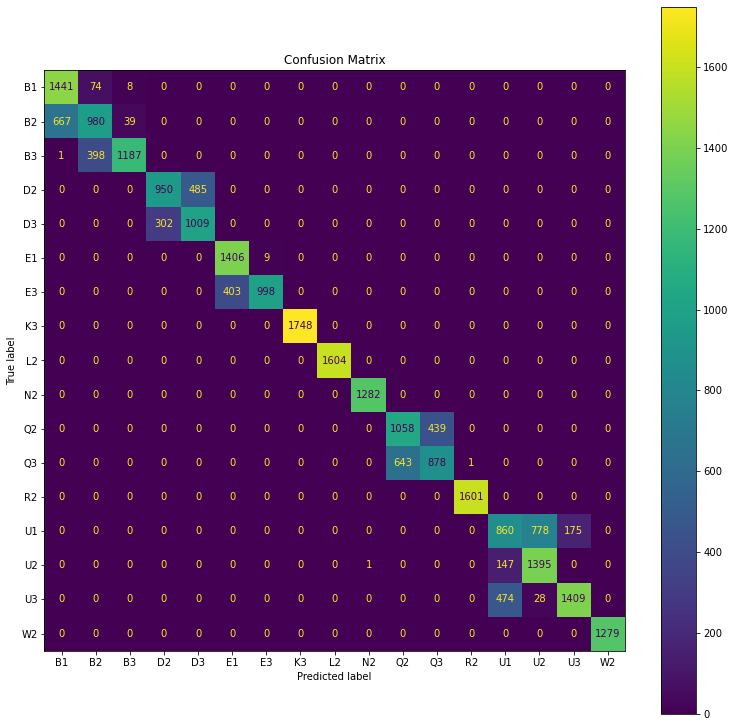

In [55]:
#Create confusion matrix
cm = confusion_matrix(y_location_test, CBC_location_test_pred2);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat_tuned.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

<a id='classification_report_results6'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .79. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .79, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 67% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .71, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 71% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 67% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .47, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 47% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

<a id='confusion_matrix_results6'></a>

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,441 crime locations were correctly predicted as being in the B1 beat.
* 81 crime locations were wrongly predicted as not being in the B1 beat.
* 68 crime locations were wrongly predicted as being in the B1 beat.
* 23,966 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 706 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 472 crime locations were wrongly predicted as being in the B2 beat.
* 24,731 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,187 crime locations were correctly predicted as being in the B3 beat.
* 399 crime locations were wrongly predicted as not being in the B3 beat.
* 47 crime locations were wrongly predicted as being in the B3 beat.
* 24,961 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 950 crime locations were correctly predicted as being in the D2 beat.
* 485 crime locations were wrongly predicted as not being in the D2 beat.
* 302 crime locations were wrongly predicted as being in the D2 beat.
* 24,420 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,009 crime locations were correctly predicted as being in the D3 beat.
* 302 crime locations were wrongly predicted as not being in the D3 beat.
* 485 crime locations were wrongly predicted as being in the D3 beat.
* 25,147 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,406 crime locations were correctly predicted as being in the E1 beat.
* 9 crime locations were wrongly predicted as not being in the E1 beat.
* 403 crime locations were wrongly predicted as being in the E1 beat.
* 24,339 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 998 crime locations were correctly predicted as being in the E3 beat.
* 403 crime locations were wrongly predicted as not being in the E3 beat.
* 9 crime locations were wrongly predicted as being in the E3 beat.
* 25,159 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 24,553 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,058 crime locations were correctly predicted as being in the Q2 beat.
* 439 crime locations were wrongly predicted as not being in the Q2 beat.
* 643 crime locations were wrongly predicted as being in the Q2 beat.
* 24,017 crime locations were correctly predicted as not being in the Q2 beat.

**Q3**

* 878 crime locations were correctly predicted as being in the Q3 beat.
* 644 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,278 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 860 crime locations were correctly predicted as being in the U1 beat.
* 953 crime locations were wrongly predicted as not being in the U1 beat.
* 621 crime locations were wrongly predicted as being in the U1 beat.
* 23,723 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,395 crime locations were correctly predicted as being in the U2 beat.
* 148 crime locations were wrongly predicted as not being in the U2 beat.
* 806 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,409 crime locations were correctly predicted as being in the U3 beat.
* 502 crime locations were wrongly predicted as not being in the U3 beat.
* 175 crime locations were wrongly predicted as being in the U3 beat.
* 22,748 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,279 crime locations were correctly predicted as being in the W2 beat.
* 0 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

<a id='interpreting_results6'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:


 **Classification Report Results**

Interestingly, we generated the exact same classification report as before. This implies that our initial CatBoost location model was the best model to begin with, and that our Grid-search just generated the initial parameters. Therefore the classification report results will be the same as the initial model's.

* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2, and W2 beats. It is also evident in our training classification report results being better than our testing results. 

* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**

Our confusion matrix on the other hand, varied slightly from our initial CatBoost location model.

* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the B2 beat  (706), the Q3 beat (878), and the U1 beat (860).


* For our instances of false negatives, the most instances belonged to the U1 beat (953) , then the B2 beat (702), then the Q3 beat (644). The least instances was a tie between the K3 beat, L2, N2 beat, R2 beat, and W2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (806) , then the Q2 beat (643), then the D3 beat (485). The least instances was a tie between the K3 beat, L2 beat, and the W2 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the Q3 beat (25,278) , then the E3 beat (25,159), then the B3 beat (24,961). The least instances belonged to the U3 beat (22,748), the W2 beat (23,335), and the U1 beat (23,723).


**From our results we can see that our CatBoost model is still overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are still relatively high. Our Grid-search model seems to best predict new crime locations as being in the B3, El, E3, and L2 beats (in regards to overall precision/recall values, and our true positive values as well as false positive/negative values). We can see that our initial CatBoost location model confusion matrix instances are slightly lower when it comes to metrics like false positives and false negatives, while higher for metrics like true negatives, when compared to our tuned model. Therefore we'll declare our initial model the "best" model, which supports the idea that CatBoost provides great results with default parameters.**

<a id='additional_analysis'></a>

# Additional Analysis # 

Since we're running two different models, we had to analyze our models separately. It'd be nice to be able to look at both type of crime and crime location together, and supplement that data with our models. Luckily, we can do this by looking at our initial dataframe. We'll look at what type of crimes occured the most in the past 3 years in the locations that our best model predicted. We won't be using any machine learning models for this, just pure data.

**Open data**

In our preprocessing notebook, we preprocessed an additional dataframe to be used for this analysis. The dataframe will only contain the Beat column and Offense column. However, an additional constant column of 1's was added to help with further manipulations.

In [56]:
supp_df = pd.read_csv("supplemental.csv")

**Display df**

In [57]:
supp_df

Beat                   Offense  Count
0       U3                   Robbery      1
1       U2               Shoplifting      1
2       Q3  Theft From Motor Vehicle      1
3       Q3         All Other Larceny      1
4       Q2  Theft From Motor Vehicle      1
...    ...                       ...    ...
81540   U1       Motor Vehicle Theft      1
81541   B3       Motor Vehicle Theft      1
81542   B2  Theft From Motor Vehicle      1
81543   L2       Motor Vehicle Theft      1
81544   B1       Motor Vehicle Theft      1

[81545 rows x 3 columns]

**Filter df by beats that our best model predicted (B3, E1, E3, and L2)**

We'll want to filter our df by only including data from the Beats that our best model predicted. Those being the B3 Beat, the E1 Beat, the E3 Beat, and the L2 Beat.

In [58]:
supp_df = supp_df.loc[(supp_df['Beat'] == 'B3') | (supp_df['Beat'] == 'E1') | (supp_df['Beat'] == 'E3') | (supp_df['Beat'] == 'L2')]

**Display filtered df**

In [59]:
supp_df

Beat                                      Offense  Count
6       B3  Theft of Motor Vehicle Parts or Accessories      1
9       B3                     Theft From Motor Vehicle      1
12      L2                                  Shoplifting      1
15      L2                     Theft From Motor Vehicle      1
17      E1                          Theft From Building      1
...    ...                                          ...    ...
81523   B3                 Burglary/Breaking & Entering      1
81526   B3                          Theft From Building      1
81530   B3                            All Other Larceny      1
81541   B3                          Motor Vehicle Theft      1
81543   L2                          Motor Vehicle Theft      1

[16859 rows x 3 columns]

**Using groupby to look at crimes occuring in each beat**

In order to look at what crimes occur in certain Beats, we'll have to use groupby().

In [60]:
supp_df = supp_df.groupby(['Beat', 'Offense']).size()

**Display new grouped df**

In [61]:
supp_df

Beat  Offense                                    
B3    Aggravated Assault                              132
      All Other Larceny                               637
      Burglary/Breaking & Entering                   1189
      Destruction/Damage/Vandalism of Property        566
      Identity Theft                                  383
      Intimidation                                    147
      Motor Vehicle Theft                             599
      Robbery                                          74
      Shoplifting                                      76
      Simple Assault                                  204
      Theft From Building                             146
      Theft From Motor Vehicle                       1016
      Theft of Motor Vehicle Parts or Accessories     704
      Trespass of Real Property                        99
E1    Aggravated Assault                              351
      All Other Larceny                               468
      Burglary/Breakin

**We see that out of the four Beats mentioned earlier, we only see three of them. That's because in our preprocessing notebook, we filtered our Offenses and Beats to only include high value counts. Therefore the E3 Beat got filtered out. Let's graph our df and see the distribution of crimes in each beat over the past 3 years**

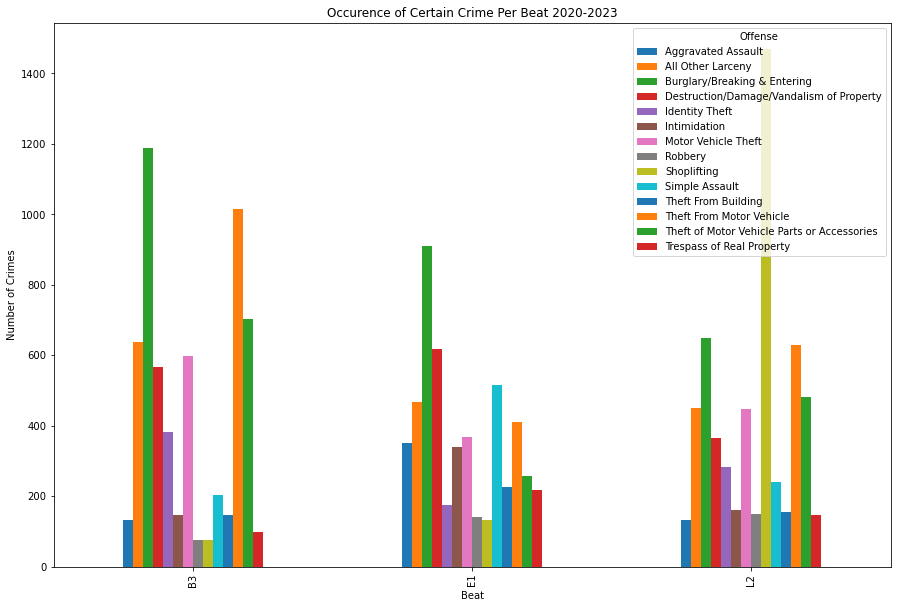

In [62]:
ax = supp_df.unstack().plot.bar(title = "Occurence of Certain Crime Per Beat 2020-2023", figsize = (15,10));
ax.set_ylabel("Number of Crimes");

From our graph we can see that:

* In the B3 Beat, we can see that the top 3 crimes committed over the past 3 years are: Burglarly/Breaking & Entering, Theft From Motor Vehicle, and Theft of Motor Vehicle Parts or Accessories


* In the E1 Beat, we can see that the top 3 crimes committed over the past 3 years are: Burglarly/Breaking & Entering, Destruction/Damage/Vandalism Of Property, and Simple Assault


* In the L2 Beat, we can see that the top 3 crimes committed over the past 3 years are: Shoplifting, Burglarly/Breaking & Entering, and Theft From Motor Vehicle

**When we combine the top classified Beats with our graph results, we can identify more crimes in addition to our model's results. Our favored model best classified Simple Assault crimes and Shoplifting crimes, which is also supported by our graph results, but now we're also aware that Burglarly/Breaking & Entering crimes and Theft From Motor Vehicle crimes are major crimes that have occured over the years. Knowing what kind of crimes are most prevalent in what areas allows us to come up with plans for preventing further crimes, allocate more resources to certain areas, etc. We'll go over these possibilities more in depth in our final conclusion.**

<a id='final_results'></a>

# Final Results #

When it came to our crime type model, our initial CatBoost model was our best model. For our crime location model, our initial CatBoost model was the best model. When it came to type of new crimes, the crimes that our model best classified were Simple Assault and Shoplifting. When it came to location of a new crime, our model best classified new crime as occuring in the B3, E1 and L2 Beat. Lastly, when we put Beat and crime type together, we saw that the top crimes that occured over the past 3 years in the B3, E1 and L2 Beat were Burglarly/Breaking & Entering and Theft From Motor Vehicle crimes. When we put all of this together we can conclude that the areas we should be focused on are the B3, E1, and L2 Beats, while the top crimes that we should be concerned about are Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle crimes. The results for our best crime type classification model can be found [here](#results_cell), while our results for our best crime location classification model can be found [here](#results_cell2). 

<a id='conclusion'></a>

# Conclusion #

The goal was to work with the city of Seattle to build two classification models that accurately classify not only types of new crimes, but also location of new crimes. Ideally, when a new crime occurs the models should be able to instantly and accurately predict what type of crime it is and where the crime is occuring. 


For our crime type models, we used both a Random Forest model and a CatBoost model. We also tuned these models further to see if we could improve performance. After comparing the various models, we found that our initial CatBoost model was the best crime type model overall. For crime location, we only used CatBoost models. We compared an initial default CatBoost model and a Grid-search tuned CatBoost model. We found that our initial CatBoost model performed the best. Lastly, we wanted to look at both crime type and crime location together. Because we're running two separate models, we were unable to do that conventionally. However, by looking at our initial dataframe and combining Beat and crime type, we could get a good look at which crimes occured most in which Beat over the past 3 years. We created a separate dataframe from our initial df, and then grouped crime type and location (in the Beats that our crime location model best classified) together, then finally graphed it. We found that Burglarly/Breaking & Entering crimes and Theft From Motor Vehicle crimes were the most prevalent crimes (from 2020-2023) in the B3, E1, and L2 Beats.

When we put all of this together we concluded that the areas we should be focused on for crime were the B3, E1, and L2 Beats, while the top crimes that we should be concerned about were Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle crimes. But what does this all mean for the city of Seattle? We'll discuss more about this in our reccomendation section.


These results are a good starting point, but there's some things that need to be worked on. Our precision, recall and F1 scores were relatively low for our crime type model, so increasing those values would be a great start. On the other hand, for our crime location model, our precision, recall and F1 scores were relatively high, but that was due to overfitting. We'd like to reduce overfitting first, then see what our classification report scores are, and adjust from there. Another thing to be worked on is runtime of our models. Running the various models in this notebook takes about an hour and a half to run. To address our overfitting and low classification report values, we could try using more data. We only used 3 years worth of data (2020-2023), to make runtime feasible and to make our results more readable, but the data ranges from 2008-2023. We also filtered out crimes and locations with value counts less than a certain amount. We could try varying what years we use for our data, and also try not filtering out our crimes/crime locations. For our runtime issue, we would recommend running our model on the GPU more, but that may require the city to invest in more expensive technology, or to rent out cloud GPUS from places like Vast.ai, Google, etc.

<a id='recommendations'></a>

## Recommendations ##

The first recommendations we have are for crime location. We saw that the top Beats that crime was classified to occur in were the B3, E1 and L2 beats. A good starting point then would be those 3 beats. Let's take a look at a partial Beat map of Seattle, and locations of police stations. 

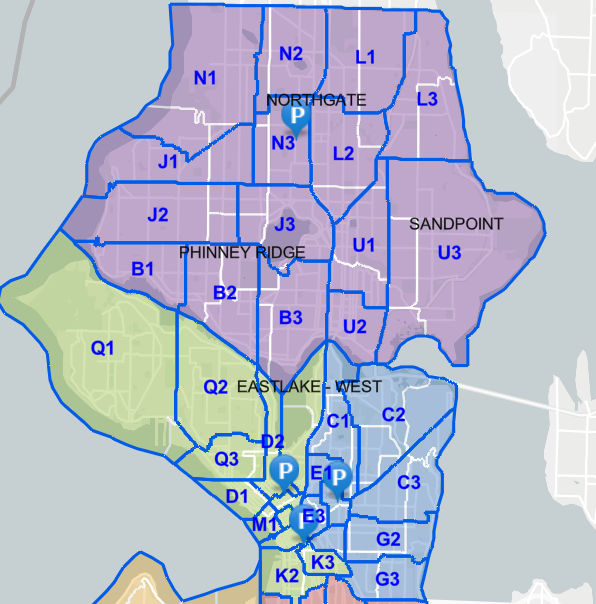

We can see that while South Seattle (where the E1 Beat is located) has several police stations (blue P markers on the map), North Seattle (where Beat B3 and L2 are located) only has one police station. Already this could lead to reduced Police presence, which could lead to reduced responsiveness to crimes. A great suggestion would be to build more (at least one) police stations closer to the B3 Beat. Later on (depending on results) more could be built, potentially around the outskirts of the Q1 and U3 Beat. Another solution would be to allocate some of South Seattle's police force to the northern area, to increase patrol ability and police responsiveness.

We saw that the top crimes in those Beats were Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle. As mentioned earlier, we could increase police patrols and build additional stations around those areas to create faster response times, and potentially deter future crimes simply by presence of police. Another suggestion would be to implement a sort of neighboorhood watch that the police would aid in patrolling the area. Not only would that increase the manpower of people monitoring the area, but may also help improve relations between the police and the public. As our model improves and we gain a clearer picture of crime types and crime locations, we can create more watch programs. When looking at our top crimes, it may also be beneficial to implement the use of security cameras around the city (if not already implemented). That way if these crimes do manage to occur, it will be easier to track down the culprit(s), and may deter future crimes similar to increasing manpower. Lastly, in regards to Theft From Motor Vehicle crimes, it would be greatly beneficial to build more secure and affordable parking garages. This would not only reduce the amount of cars being broken into, but would also create positive feedback from the public, since finding affordable, secure parking in Seattle can be difficult. 


When it comes to implementing the model, it would be beneficial to use it either in police dispatch center, or in the mobile laptops that the police carry with them. This way the notification and response can be almost instantaneous. Another great idea would be to try to implement our model with social media. Any crime or suspicious activity that gets posted online would instantly notify someone of the type and location of the crime. Lastly, it would be great if we could blend the two models together into one Machine Learning model. This may be a complex process, but not impossible. 

If this model is successfully improved and implemented, it could have a huge positive impact on the city of Seattle. 
It would decrease crime, improve police relations with the public, and even have positive side effects like increased tourism and more businesses opening up. Then once proven repeatedly successful, the model can potentially be generalized to other parts of Washington, and even other states.